In [1]:
import argparse
import tensorflow as tf
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt


from utils.config import Config
from model import ICNet, ICNet_BN

/home/nmsl/semantic_seg/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nmsl/semantic_seg/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nmsl/semantic_seg/venv/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nmsl/semantic_seg/venv/lib/python3.5/site-packages/tensorf

# Setup configurations

In [2]:
model_config = {'train': ICNet, 'trainval': ICNet, 'train_bn': ICNet_BN, 'trainval_bn': ICNet_BN, 'others': ICNet_BN}

# Choose dataset here, but remember to use `script/downlaod_weight.py` first
dataset = 'others'
filter_scale = 1
    
class InferenceConfig(Config):
    def __init__(self, dataset, is_training, filter_scale):
        Config.__init__(self, dataset, is_training, filter_scale)
    
    # You can choose different model here, see "model_config" dictionary. If you choose "others", 
    # it means that you use self-trained model, you need to change "filter_scale" to 2.
    model_type = 'others'

    # Set pre-trained weights here (You can download weight from Google Drive) 
    model_weight = './flood_snapshots/model.ckpt-60000'
    
    # Define default input size here
    INFER_SIZE = (480, 480, 3)
                  
cfg = InferenceConfig(dataset, is_training=False, filter_scale=filter_scale)
cfg.display()

Setup configurations...

Configurations:
ADE20K_DATA_DIR                ./data/ADEChallengeData2016/
ADE20K_eval_list               ./data/list/ade20k_val_list.txt
ADE20K_train_list              ./data/list/ade20k_train_list.txt
BATCH_SIZE                     16
CITYSCAPES_DATA_DIR            ./data/cityscapes_dataset/cityscape/
CITYSCAPES_eval_list           ./data/list/cityscapes_val_list.txt
CITYSCAPES_train_list          ./data/list/cityscapes_train_list.txt
FLOOD_DATA_DIR                 ./data/flood/
FLOOD_eval_list                ./data/list/flood_val_list.txt
FLOOD_train_list               ./data/list/flood_train_list.txt
IMG_MEAN                       [103.939 116.779 123.68 ]
INFER_SIZE                     (480, 480, 3)
LAMBDA1                        0.16
LAMBDA2                        0.4
LAMBDA3                        1.0
LEARNING_RATE                  0.0001
MOMENTUM                       0.9
N_WORKERS                      8
POWER                          0.9
RANDOM_SEED  

# Create graph, session, and restore weights

In [3]:
# Create graph here 
model = model_config[cfg.model_type]
net = model(cfg=cfg, mode='inference')

# Create session & restore weight!
net.create_session()
net.restore(cfg.model_weight)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).



Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./flood_snapshots/model.ckpt-60000
Restore from ./flood_snapshots/model.ckpt-60000


# Run segmentation on single image

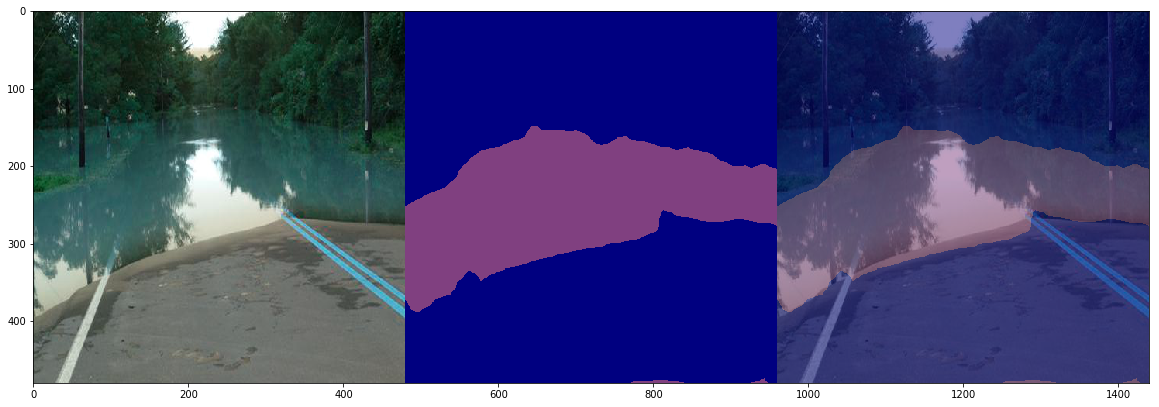

In [12]:
im1 = cv2.imread('data/flood/test/0130/img.png')

if im1.shape != cfg.INFER_SIZE:
    im1 = cv2.resize(im1, (cfg.INFER_SIZE[1], cfg.INFER_SIZE[0]))

results1 = net.predict(im1)
overlap_results1 = 0.5 * im1 + 0.5 * results1[0]
vis_im1 = np.concatenate([im1/255.0, results1[0]/255.0, overlap_results1/255.0], axis=1)

plt.figure(figsize=(20, 15))
plt.imshow(vis_im1)

In [14]:
im2 = cv2.imread('./data/input/cityscapes2.png')
results2 = net.predict(im2)

im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
overlap_results2 = 0.5 * im2 + 0.5 * resdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIcAAAGXCAYAAAApnzCnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzsvd2vNUt6H/Sr7rX3ft/zNXPO2PH4M7Yn40ksk2BhhUgICYSQYvORREgBg8SHkHxD/oDccWluuUBIthQRJETgAgkjWVgoUoQBgaLkIok/xoztmcwYZ86MZ86cr/fde6/uh4vqqn6qup7qqu5ea/Xa+/mds9+1VnV9d3XXU796nqcMEUGhUCgUCoVCoVAoFAqFQvE80Vy6AgqFQqFQKBQKhUKhUCgUistBySGFQqFQKBQKhUKhUCgUimcMJYcUCoVCoVAoFAqFQqFQKJ4xlBxSKBQKhUKhUCgUCoVCoXjGUHJIoVAoFAqFQqFQKBQKheIZQ8khhUKhUCgUCoVCoVAoFIpnjJOQQ8aYv2yM+bIx5ivGmL95ijIUCoVCoVAoFAqFQqFQKBTrYYho2wyNaQH8HoB/HcA3APx9AL9IRL+9aUEKhUKhUCgUCoVCoVAoFIrVOIXm0F8E8BUi+gMiegDwdwD8lROUo1AoFAqFQqFQKBQKhUKhWIlTkEM/DODr7Pc3hjCFQqFQKBQKhUKhUCgUCsXOcLhUwcaYXwLwSwDwxhsv/4Uv/MSPJyIJiRdZwkmZSUUUFrKtVd5OcY2NlOpcNw7yba/Mq7YbxewL6hR+yL2RyYpmy1qIqltjinqZolhVd2ZRP+fq4r7EGVNVtpT5dRnQpJ+Baff91u98eJ7qKBQKheKk+FPf/yJ94YLy+T7mQ8VyPHP5fDNcXj5/crha+bwM3/r2V79NRN8/F+8U5NAfAfhR9vtHhrAARPQrAH4FAP78z/w0/dr/9N9NMjImPfAW+Unq65Sk5spw13k8I6QxxgTx5vKW2r0kzVKfUqn2nQQBO8G+m35VttSn0zfNhuOAKvPq0vdIvN+8b0zYN65exoTpjWmCPN2n1I5GaB4RBX+zdc2UEdch+ewYM6lzqh1S+V3XVsUPKyj3cw0m7eoOyfCSZyru914Yz2gq67jiuSIigBpWr/GegcbvP/1z/9viMhQKhUKxH/ziv/ulZLg0tS4SGScbKbMJ8lfHHZrZJMbEdZ5rwBL5PB2+XLx2ssTS9IUQdw9XFjwjKxZnk6tH7ZiqjR9Ej2TIUUQKozm5tHD3VuRfT7g+m5Pjc2HS/ev7tDxedr953wrhRblEm7PD+i1ub2mfFq3pc7vvW8QP6gMA/GXGBh8Z/w76r37lP/xaSX6nIIf+PoAvGmN+ApYU+vcA/PsnKOdiWPNgli4Mt8KavM5DEAnk0ImY2JOTXTsBEXlScgnZuDc8lXZcM+x4mpLd7ppCoVAoFJdEkhgqT71RnCiFSDysXQyuy2O+EOHHikVsvrhnIp+DLEFEeJLKN4rzw5PcU7ZbJKdz2JwcIqKjMeZvAPgNAC2Av0VEv5VNg7pF+6IFfmWaRfVZoG10amxBDq3NZ6aUgu9Lsj1DH1ePqeoCCr7HZVCgqeMW8tL92yNXNmpFmUl7ngKWaPnJ2mW1u13LJJE0GcR2g0gJIoVCoXh6kGSH7QmPUtSIAi6umW3H6bRxjECmrCuLy+dr8slAIoFWlydop1RrkG2HGo2ZIQGLxMNzhYxxOUEkkmI7F3njTVtZhr0e2XBb+byu7BWr9ahcZn3hK1FXmZP4HCKiXwfw66fIey+oJXquaWF7CRJLsR2eipZNlfaT8RJg+nOS+fX3zznB70OpmaFCoVAoFOdHLdFzTbLumUzKFKfBE9MWKpPPfezh96w31PUVe1YwwOARlILQ5f14MYfUMa5Rc2iiWVOR5lzEy+59DqnmUC6F+D3HbqcW8rWaQ5dc9Kcmm6dEVF6b5lCoycXrIvuGUigUCsX1Q5YRNtSGWSUbCTEik6iSdpzKVGtrLauzmJRNst/QrExSlNnSXK06q0q5LNAWCvtGWpTH5mQTPzhXgJx8rvLfOizpvnHoGfZv+G3U8i/Pdzfk0DWjVnuo1Nn1FniuPofmHLkV53PFL7tr1iB6aj6TrhkpH0PxdTUrUygUCsX+UCqfl8VfIg6f0qzspOL5iczKREmhNt9rFjmuWINI5fL9IOFiKIqAQT6vy7fuuCXFBE9Jo4FDTcuuF0/lnj2VdjwFqCCgUCgUiuvCU5Uh1LTsWvFUnG6rfL4fnEI8f9KaQ4FvjII4l8Ye6rKHOuwJ+aPsKx3YXQDXeD+X9Z+wMyeVsWDL5hr7UqFQKBSK/SH0jjEf57LYx/S/i0rsB9feHVdY/3XyeeT8XXjul5VwhZ25Y1wlOZQbnPxkpmAxJ/pcWWm+xOuSKSN18ld8CtNcXebaXQPZB019f6zrw3mzsi3Jlk0X+Gf0OeS6wBgzoYlLfPQs8XPD0/ExKuVVep8kczFXRtPICo3xs+M+e6kdYrh0vIRs2rj2Gasdx9ycayufQyJZVvhuUYfUCoVCoZCQmxLs1DHVepFPEltdG57bbJ14ma4d5f59cnPoTNJpio3ykfOqTyr5HNpQPt9ygS+5CqqUhWtOK0vFTVmPxe0UfRTN1GnO5H8JpDxL/ArNxXHtNhFJNM2HV0i4EJs8VnbDFmv/efm8sk6LHHTzPjHJcbkEV0kO5bDVg7Ikn5L7EOdbY751Dl9EeySHFCMsqRL/vg7fPFtOZFK7icb34867owhF/n5q8lsxW3CH1GuJL4VCoVA8N2wl151GPoyn2jrHz1vK59uVsUrkKvA5JPlTyuGpSvexfO4E0RRB9JQxtx55LvL5ghxX1GV41hNOiJb09ZMjhxQKxXMEsU/DPhUKhUKhUCgUCsX5EasCLdfCU5wHuyaHNj2GvVJTZlHZmTQps7L49zl9mqjm0AY4o1mZ+zo16wm1aPb4UuWmaWs1TMJj1cd2e3VVY+xxocNnJiP+o+D7fJ3WIqmSPLRRNuWrLGPF+Jhqa7F6kWoPKRQKxXPB0mkvpY1Te9T7krIl07Vpfk4ej/yjnFUkvR6zMvneybikpCDLa8uPsg+NFykMZ9pDe0TsOoKHrQGX90NzMgJMflQGpUtmUoUdusxUKxE7sFAo66v6flyy/h7fU552c2aHiePsS/HkyCHRVvLC5FCc76UJIiWHNsAZyKG0Xx6aEC4l9sCXQkzkuLA1iPPzhFAUnsmA/yj4vsBWPV+DafyMudYlyaGQkON1GfOaq6dCoVAonhK2MXEiWuJz6FTmVSMRZAICZHm5S6BmZRtA4nS29DmUusb2aP3X2JHVDnEK/0VBfmaQ0+eYoUQ6doGFR7KyJNueYbDJcm9t4eudfTOpfJJvzfDbNTm0T+yVtKit1yXbccWEkEJxVdivMKJQKBQKhSLGXuTzknCFQrEMU1fle8GTJYfiE8KWpK/F3DJsrdbQtg6ptyvjNNpOp3lIrk2zwfdtZLYzanNcolb1qNLqySCneXRNzrklSKqrJfGL8q9VnWZlZHfW1KxMoVAoFEWgVRoty8zKZnNN5l2qNXQOpf/LmpUxnMqs7NpECK+5Hsk/oTLH1eCU8rlTo/LaQ1eM0n7aSibOFTU9VTGOgEE+rytzN+QQ9eU1z3WUX0tHlmSN6Yfw8WEGci8pQc0186Lt5togzDoSWVRap2waKf6GNs3VL5OmD2qyWUUKkHt+6tGng8VC2rropg/jJCOmmedSMx8Kj1YYX+5RESQZWCcRqjA62cHnkXyZlZG5vr4mHMNp87uMCrHpWHXlfFJ5liIow+buLmBsRiOSw0UTy4xg5idhPx7CMVtk5kcD4QaTvPc2KV0NUalQKBSKQojTnjC3ZvNy8rdJm4iEH6KoQUtMmeaSFJJC8iIstzCZKXsS/fQbwSKCdpzZrEyQZ5aJFtIaR1pfNUIu0qaYsG7jojKZoEkmGtizJMlEPh+/j3GiR6lQPo9/+jySGRSSud7HUL7I6ZH2cXxhDObk89pnRjSZNMH9qTY3DCs1V4ngQ17PZYqgYXMW6cfHAENbr9HnEKFw4eviz7yEiX33WUWF0LBIEl4I8sDJETRytTZKsPBaTfxzrPD4ovk05cmTjzQxLNn9kAhEKb6EMjKQzwubaWnwzQ4qkwPnRtrokiaaKCYvQL77VDiCmS23UL0ymNOPQcTkEHFycKMy53btIsd0c1pAQibw2w/iWMXV7ZIpFAqFYmNUkjDpC0tVL3Lyea2W7ZYblKfZ7DwN+AbSuSd1SabeUDvp1Khfhxdnm/oOoE4+j75M5fNpRucfvdIY3LIm8ea+4wK2vIFl+YybuEMNqpo5XU+tqIqHwIxcN8q0YnQ1czkYaP9vhy3M+s55Ut4+cI4xaLDXsV7rQNprOkXx1ZRMoVAoFKUo4oZ2OGc+H+xTZrlabCBab6lJdh147vK5/1aYIB17Tav2oTkkYMmJWrGJRulnjL5WJRGoMo0DAFPbPiOYMc3UqyZ+bRuWlC2aYwnY9qjAS6JWtzgfX/Ljs9RueIsT805x4sEa7Kku50SK/DHGoGmaSZ/M3jOWl+TPSU8rUygUiueDJSdqxWYxoyUOhSkj9w8VJRSUXYqSTeaysmsLX1LERkUvK0TENvLAOU5Eq9UUyxE2ZjBNik/nIjP9XVGgL9cs8PNkK8ZMupbmsSFqSa891HlLpDZbx4PtRu3JrHg+JhZ1nnicUuyaHFIonhaeJ1Gh2DmcxZhCoVAoFAqFQqF4tniS5NDcqWCKDBYw9LqyvAyk07mWnNa1hdbQ0rIVp0esQRQjuwsmnAzHr+k9VygUCsU8Qq2hMFSxORbJ9IrVGNQ44tO5Fp3WxbSGtqiTYr8YTx8r9LXEZXvpwK0F8vmuyaEtzcq6wZ33eFpZfjG8qOynYFa2SG21MlGmHcnomYHdNNfkNkvNyuK4p8Y5COE9EiOSWZkx9pVvxw0jeTISg2mm9zRFNu2xHxQKhUJxCiyRIWNiyH7p4+uLy1CzsmmS2kTbyUxbiQS1zsSBJa7MK02ccnlx87HYlGuhaReNDNGi0/psnctN2s5y3HztkmhBu8/SjkrIrhnsepYwPDsl7w0ryNt0/gAadpnHq8CuySGF4mlBd3AUO4GakikUCoVCoVAoFAqGJ00OqRmZYleoZr3zTK9kwrXGtEvNyp4mJo7vYKx6c6GmV05LTaFQKBSKOqh8rtgRtpbPJfOxNaZdq63KFpi0KU6OqXw+3GqmFTSTAUA02fN9EqeVpRYo0sKDxyWiZNo4vOv7IG3sMyPOs418uEh1DMvMXi5OIJczb04Xw5ldlZsM1ZvT1dZJKmPJQnOPBKDkj6V0EV7SD9L9bNt2Nv+SOuXquhUhID3HW44DKXxJGSXvoyyYCdd4/5hCfUS6xH6k3Ce/h7W+f/o+VVcDY3LmmWXjeY/PokKhUCiWQ36tS3MNBd/T6cPw0aQnNDsb/W+EacMFbmyqJqHW9UJlPjmXE0K4iRo4X0NBzplNl0okua8Qa7tZEbXY9LQyd8Ef/23C8GxFCs2UvAUYhfkOYpYzJ4vNpMxYqXydcnXdypQPwQM6msItKUB6ZKS14IIypDTF5oLunQOTfB5LNkVT/l9z8afpU6Gm7J7GJmUTp251z9A1OWyZYEt/QVKcrRz1XhLXXPfniHPcrz0t7HV8prFlv2gfKxQKheJ8qF3ZlsxRcZxSYmjHuOrKPz+sdgpdVsj5y5Sgw/Pk2KN8vhvNoVqsOZEs1lhIhaUYwz1rDslFUPJzLn55nerzkkjULR+QPZi7SKeJ1aTduuxUvlsToDXtfgrk6ymx1ThQKBQKheI8kEibEvk89Z2CMK5JkoqTzrfywJhah9RLptlYQ2FOPp/Jp6poIVxuhtQfmcMsNtRC2hyE5GliZUnXmWf59EMdcvlyR9RbQCpbiBzWQfFssBtyqGZxKJmRpX7PfUppJHWy/ElpBZUvSLAlOZTKN9sGdEL4kslH0iXcwcRwQvAFeeinJd+HMaGSG08lao25k8zcZ8mzVINc2SXYmiTaI+kU1Imm4dNxsJyYnfgKetqPnkKhUCg2RbVgOxs2JXRiMikll4zXpGOe81NlrSxSmc+SeZrLcUWmZemTfpdJOfVkTwo5ky8pr1ozsS1PKwsIGEYQFeVH8LvbuTQiccQImYCkYYXw8FQZc3XNnoCWK7sEhMUnpUn5JYOFMnJt26peQS6ZNfraTVsAk437PcnnuyGHlmBOeyjwOWQDbLiLh8HxkyODhk8DoM3kf214Ku24JqzRFjqHtohkG7t2jCxt9xZlPxVsNQ5SeYrEbK7rtxQGFAqFQvHkIRE9qfB+Go3J52OICzMYE1y92FBECim2xDJtIUcQUfWx4OmMclGi+m2lwVOiLZSoC6+DwuKsWvlZwu80N2YX5BAhrcEgxhc0ebImUSldVa4hFIURT5vJOyynoPIFCbbWHCrVfLIl1NaprNznhHhxP/ZDZqdBMPUqjT9fdlojpfZZmoNU9hy2KHsu31NhKRlmf4Th0jjYgmiktUKNQqFQKJ4VaqfQMP68Vs80fFyMkhRm5jWNpuXsz6zMRFYKc52d0dGpLlsqakutHimvLbWTJIgpmLZQqD2TKSOWm2iGZRH34EKTLn73Y1Ov2Jl17CBaQk6DRip7FiR8XwnRIbUwPrJtk8ZU7XMZPBhlLjnWnA69V7cPuyCHtkCJ9lAqPBVPMiubJVYuSA7NnaRU3IYzkEOrT30qwF4euNKH/6TaIpVlbHEflrZjzy/Lc2DLcXCKMaVQKBQKRQ0kAmg+PBUvbVY2L7bUkh6V+eQqIMm8UdoCiqu66Nq8pNX0EjJJNivL1et8KNYgGjbWZiih2sLT/obmCtlimbSwIWt9LV07TiFL71U+v+rTyhzKdyRK8hqYwDgToskjYdhn/tYa4e88eKYKPBfFJTWt1uSzhVnZpcp+KtB+UCgUCsVTwJbyuVsZm+g3aCpRX4t8ruY6F8CSPt9KPl9zw1dWYU3Z6pTa4rnI57vSHCrWbjGj02Qa/pvEicJHjievSeMYvIdYkyihPhbncdOkJ5SuSzt5FiHMS43gjC6bKLrkqt/36byWTImihpAUXyhbxAItl9oyTFPPk4r6XZUaU1NVRfvZCONptl5svDZNA2NMtdnaXP4pxA6UfbxaTbFFxJp0/6Qdu/T4aHIMfqGpn/vsjuk6haZ+LN3klAqe+ZiA/HXmWHwY7/G9NtEnel72dFwk24XW1zu8Z/vb7VAoFArFKVCooWPGudVa3yTk81x4tqxhbp3I9hRcT+XRCtOVJAvXQjJDm7sWyOfDZ618llc0qdWYqpW/Fqi5VIt428karj+cGZIzVRI1YmKLMhe8tErE6gAD+79QyML8k+DmakE8caUmhC7RupDKqDMfy2ktzZqo+Q/7pe/L2u3uc9bagkUOJGRj3z9E7h1jonHjn/hE0XHcNFx7wvcgz3sZdkUO1SLrY6gifE0Zp/KVolCcEzp2nzYk1dUas0eFQqFQKEpQu/ezTNNfvDK5rlOY4lqhWjtPG4PVYnF4Kt7W2A05VHti0ZxPoZK0i8pIfKfB5EwfX8U1ovbZm8vnmlHShj3ZB0+1eULCp4T8mfeldv33VaFQKBRLUag15GJHGkDT8PmylpVBia86fymuF5udFiZqFF3P85F16zX5cnlMtXliwocwV+G5d+apxPPdkENAuRZO0oxMIIn8pxReoWUkOaoGgJ4I5sSLqOfKHi/S+DpDGafGkjpt4ex7j30xh/o6L+/bPTqQi81e+W/umNphiaPqrUhEhUKhUFwLUsRQRj5PXJqGhXmSEC6atlSU4a6dXn7O9cm+5IUtsUgcuCJCQkSmCbVmUTVjc/NxXH2K34IiNkqQP7XO283tiiACxmfEidvhb1th/hzx8IpSgrzXYlfkkMNW2kNLtIocnLcQrxVEo0Nqnw9fbGXy39tCUqGIoQv/eaT8ju0BMaleYj5We5KZjg+FQqFQlC/1pMVKPrwEsUNqonQYjy9NXTubzhWKKTyJqvKXhMCP044wJdVT9QvDR+2iUoJoW2II2As5ROUaPTZ6WsMopwWU0vhJmWQ4BFpAgimZ+5y7dZudQvVMXwzXpjm05VH0W6HW3PLaSIBzaA7F2ANJJGk4AlPtIIncmiOIcmUoFAqF4ukipTGUff0bLkdM0yZKEMojmdBJmo+l6lci98xGWY28xsO1Y0HbLqlJtVHRufWYkdpX5/tZLm/L4VQ5NhcVXZtIqFNOA88rbxiy/X958RzphrswkzAxs+HT+LVO39cPkH2QQzsEFXyPw3YxFhUKhUKhUCgUiieOp0y7KBQKxSWwK3JoqemC6B8os+O9tIychpN0DLbusiuuBac44l7CHjRvYsy1YYmvnnMg9ifkwlL1TcUtLUPfZQqFQvEcsdR0ISWH58LT10rKiNPzujbCVKdTmuJqsGKsippOgjbOzkTcATmLosGkrNQS66xw7yMTaQrF2kNS3IIShHfqUuyGHJIWN6nr8SDnC5y+7338ME2YzxxJ1CRDwzI3Mxcr9bGEsI9SC7s5h8QlflPctdSCMmWSJy08t8JezMqkPj9VGYvanfCzVePD65zk0BLUOtyW+pKon80zvt8mir+0vSmzrqWQnsGmaYLw0vdCSVkKhUKheC6I5e0hVDAZm04TKfkwNBmLJfUakoifFMxna8K8y4cylM57PJ60sMvbFbl258RM71MldfQ1O9kq5YPlFK4pFokFJzCzM1hnSiT1TWAiZsb+XNSXFP+kquG16v5JSStNuLJdLBGwM9En14kSsaK0Jrw2Oa3MPQpD+9x9HJ2FSy2J5XMhWlAXqQ+neVoyyMnl6TKn6Uvu+7bP1G7IoRL4ieUMrOAliMetHN5uQdbkiJA4z7WL5T3gqToTnxtTNb6+tsaWfV6Tl/VBJhPMTxk5wlehUCgUiiWguTXXhuBFcEWBeEm55cxWQtyUgKdfPPUykgIIF8ATAkFcgV8R5tiFa8XcM+O5Pgp+nwcbdrroPCzFcIYj2BIv136jy5B+N1zmwd09OaQLmG0gHWmdileST/z9uaCGwKs9ESouY039YpQ4HN7LvVxWj3LNGCKaRM85a47DJbOspff7lIjrlNLGLDGlUygUCoUiRKzpo1gGS2UZk+/L2ZOYGCNmkCCKnjoqCEqrWVZvhrSmT0XtpEwFLkMMyVjkiFvMy32JdQelmClnzVE4MbI00prbm9nZaFJmK5XSxpx7t55KPN8NOVR6Ig4RnWUmCrTECOMYlMKB3Qw4jhSZM2ce5a7Hvkvc9zivrXCO07lq6zt38pOElN+XOSw5WrwUUvynchJVSZVDMiR/X2tO+uLh/H7XjsFTjP8cKSyZ7SoUCoVCAeTm1tSFWCg+EVgRBkyrh0eZ7gHtDiEZNBJE2Zo7rSGmETQxdTJh+CbYVA1LCK+tLuMG/OI/l39UTkAYSEVwoqGQWCgyUStAKp/NCb/KOuVik2ReJZmGpUghIrYAl0/0isPtrYnkc4Qnl4X3u3YQyv2eO0UtnxdvRyyfn6rsMuyGHNoblnS3Lq8UCoVCoVAoFIrT4BJmZQqFQvFcsAtyiJA/WSz3XZFHyuwlDg/iC2l5+lOZzoj39cQ+aObyKTXJk8qr1RoqMV07hebQNT9jc9WdmlDJ93UuPAce5xyaQ7m8SrSGru0+KxQKheKckGSHdBydUmpgvDNb22+xo9psSpvOaVnEGkQbKxTIGisL5PMF5lVSPlyjp1SrxmvwFKRxmicTLaOsCo0QXOuIm/hXSoavRmWdcrFFzShp/RF5tx+1h2Rzq1y4d8LO6kGGkvdbdLhd14QhTd2zkTcnc+Fl71K57HXYBTlUg5S/EEUZaogK6SS05+hvaI0vmRozsS1Ity3uyaXv6zl8Dll1bvmo91z4XN334qMn1Q71OaRQKBSKU4AKzW4UU8z5G/LxpFO5nqm/oVW+ZErTMPJplaneFvzapW9rgQneFHnGheIwMyVQgsuJ8KJ7uaP3U7odKZJ97oafpkFzJ7bvCqd4JuhE+SoUCoVCoVAoFE8dKp8rFArF08BVkUOn0FdtcG2dUI+1O/9x+ueoSbCVGdfWabbGHupwSuScMp8ifK9QszKFQqFQbIYTTCUGu9noPyFWyudx+qffYRPUakkt0qrag6i0hzqcEhP5vCgauyAFX1fHlWsNnQ67MCszSBM0FH13v/tMXtIx020fpYp87/QTs5MpIRKfQDQxvzI9qwP5G9zMkSkm/CIvQKft4nXh9Y+zNlE80eeQkA83J4tNVPre+Db3fT/0Uz9LIk3rko7fmNwdT0Pyjl8L6XSqkjTxAryUVPPmQDUVHdA2jb8HvD59PP7Hi2FdWR22QrWmb6ZsKS8jjBGflzM5nnsUWQTxVD9jwoyMSX5K40C8Fxks9V9USoYtIXyXtEOhUCgU14Ol5/DMXeVTThPPSxOZOMqDz9ODfQbFEc307CL+Ocrn2QpP6jQvGkk2X9P0sb8QL0JIvR5Y0RD/4a87szPnZ4XItxiDmD6YR801w0RFSmuGJUTLRvJ5XKeSqrj76CIzU7wUuKmUITP6c1rQhsatI/lzgJyLjtDciK3IqssWsfikrfK8pDEyafasfB5GToutsdmlCT7cFzN5nin6XQ4pjSxWx2Xly16ij7F2DbcLcuiSOB0vxwyAnwDmCKkxzH02My+8p9M3CoVCoVAoFArF2ZHjoygMIkcgqXyuUCgEPHtyyKH0JKLsDnt0OtApzK/mNH9OhVx5oRJF3TbMczRRK8HS8SOd+ldy8pmaGK3DqZ/9UyJ375+KKZ1CoVAorg8lzprnNWFcHpb8OM0UHWolnAs5J8lkrHaVOxnKOHkvW8lYa0gRYKFj45R507yT6+UaLYoRoiPrK8CW2kyl2A85lFQ7kwzLFmRfecpQ6mGdXfQlTK5OsYBKEUQlZmJblT0t9wgMqpHWxMxe6/uSRWVazfg5ITVG5sjKObKn9gj2eLxe28L/kvWNT/A750l+5/CNJJmPXdsYUSgUCsVG4DI7QZDhizObuT6SOUShdB4chz3ryiDKdUGVZROZmBjicrKQ19aLVBPlaYCm7wezO2dWFq5RYsjHzD9T8GEG25+wAAAgAElEQVQ+3Hszq12Vkc9BYdJcVqbO/GgJTnUUOsdlRcXR5vL8BFGhOd1M/GwJG+bFsR9ySHHFcJNig6YhRjBI8XtdWCoUVwJ9VhUKhUKhuEY4LaDQF0uOj7g2B74KxfPFaZ7VZ0MOzWla8N1+Y0zSSdisFg7TGjq1eUmR41zIdV57+hYvUy5bymtMIzkQX1PXa0NqnJSYOEp5xfmW9l/KAfklsJU53dK8lpSd0ho6y77EGTSHFAqFQqE4FXLTNDcFG+Mm7MyM8SZT6UKm+S1z9FridDfWGhJVh4RCKuvk+oYMyFBIBHFFouG6/S4X7bSPYsfJubKfKlJmX1b7p8zVRpRwmi8hcHodxg905ITv6yCNZwnLROqcf6vTItYWis6oOXnZwpXK+OfHsyGHcpDMQZILvgU+h065IDuXb5MUiePaKB11L5mjxOl1wbotobi2P/V+LMc1+hsC9J4rFAqFYn8Y/Q1F9jfDhSB0du6lKD9gy4V2jLOJAkMTPDHkwiIzM35dJCRYngbmyZM/JeBEzmpWYWV3qqi2Btfnb8ji/Dd9N+QQUY9T3rRSosYv7Gj8XbNwyi3wt16AXcopdaxhcjCwGzm9pWh9rRr2IiPyNs9NfKSoT2DHAA0TvptZu1M1qABL/f7k8spp/WxFDPHPYnIT24/RS6O03Q5L+7/k3tVqxq0ZC+cgphUKhULxtHEecqCUqInmxBJP1ZP0ocbQqDmxtXy+aXYFBQ6fXBOFgMZdo6j3Iq5t4gvHaSNFv+Pl9SUljNzYrPXn5LWvMhpSa31Eke/D8dOTTrbwfPonJ84VNtxjqXxe8jzWqvGtGQunJ6bXYhfkEBGh6zo0TROE8d8odEhdal41ZzJGkdZLzWKrdAG+penHVkTRkv7rATshRaRO07TeOTLBkkdB25xZmsunt/fYxTfIm8wtgSvfja3YebMUP4fSOkpjTjIR7CNtLR5PrJdAhkhlx0TfGofUW92nWEutpN2l9U31C78P+VP5Cvq/sEz+PdXnkjbe2jLjNqwhj65RQ0qhUCgU5XCycDB3IH7/l84jknw55CIQNZOpJjrspG6pFc+tbv4Nc9nS0etWU6VITsTBnPRxJBCFm7fGNPA0BVliKGiZJLcM8rnLa0nTREsmtikPVztOdgnx02Uwsqekkkz7yqdD1OdMEyskpkzUXfn6Js3UYM3+XDlxPrb758amjK3G4HQJN/8emKvvaJKZGshOPp9rA5dt8+WFZUclRgTp+Du+3+HvGkjvu5C0jsusxbobvgtyiGNucaY74ftblE0XuOHLgl/P3cNznfZUcsqbQnFqlJwgd6rxqe9RhUKhUMwhkOjcRkpi/ogUUZ4xdiZTEqMxKKFrw8Jy99Bfq9bWqkTAxZh58zeF4iSYk89Ppx24B/F8F+QQgdD3nWchjTEwgdLQoA9JyxzI7QVbkB9zTqAvAUPdcHvImgfSoC5prLqkcbsVji0NnNyN6KiHMYPGjLExDYAe7fo6Rv2mZjeKrVHjN6pUQ2sNQSSVsUY7TKFQKBTPB97lg4F1YjxRFyHPHFwzQST6NqrLxee1Hwwa/YNrhwkTFMnnklNvAvPvxORz2oAM85o0Xq3JF6pQbIKRzIkVGJKxfZqyPJfVh5c1F35u7IIcsu+r3lpfmsbbYY7uf9xLyKn7NXJeG2HRiUmZvGLNmVObgS3FWjMTIufArtArfEKLxxFNtj6x+ua0zLk6Sd+v2SG2qH115nooQgInGFMVJnAp7botCMySE+iucfwrFAqF4vSgYbMutCAZzSr89BGZ45wUkvuDnIsAOTN/lRNERtBYqTvdaWP5fIlJm/9ihmY6+6mSxNP6G6ZpRDPZzLU+Ntni4XTFbKM0DFU+vwRGMogTRHVmo2P8mGCyedYN0pT57IynkGrU1inGPsghhLvZ8eLo2hfywLYmcXvTHkr5hXF/KXKGL4Lje8zzOGUdU2UqFEuxhPDNafZsTSKr9pBCoVAolmHc8IsXR9to3Fwa29V9nLJ3Ip8DE5LHckSh2sNkucr8E3FTMjqFWZmZkop6UppiO5RoC0UpMpo95RpItWWFZV5SPN8HOWTSREdq8W5NlBZo9VT28iLNIYktjsitLRZ8p/Kbs2ixyO5f0zQBOeTyTBEzMTkkaUosPTEslbfkkPjaFsmnOOFKsQzxs80dN0rxpe9zjsSX1i+V1ynJWIVCoVBcP6ZOZ/0VTAmVic1ZISrlcymXnPwjykwhuTV1FhvHL1K5CfLfDEumaYOQ5ElkOQn1pmZMm3/smCiDTKVy8jkzJZuYlbHKXSdJJNqRnLUWiimZM1q0SPJ58Cv6nhigqNUmDN8h8+Zl02slqK1TjF2QQ40xuLu7m5xWBjwNrSGOrduxBzLAEUFN06BpGvR9P1mQ5k5G4kSRu9en6qdYw+mpjCvFPrCU/M1pTq6tzxZxFAqFQvH80LYHGBPLTu7bSKg8jWlkW+2nHYjno4shYx1ycM0gEPMjlHNVYIw3J5saxGwAzw2xMTa4F7k+YkixXyzT9gkJHK5BubI2RUP7MuN/F+QQjEHbtpOFe8+O0Lz2Bcwp2rAHYgiYEj+xqVhMFJVo9GyFUu0khWINtnAcvUVepWXMhSsUCoVC0TRWGyieksa545rNySxOYim1D/F8bJir0ED0uN+E0I9QEM8F4UR3mGkNBUfOX/dwUuwMa8ictMnX1g+3NOAv9yDsghwyGM2RgCmJMIk/kEY1cB71S802CEIZmTERsN6JfFOmVbk6xHktMzlJO+82pgGI7MlgLgzLhmLfEMgQCD2M7zaCIQPqe4BoOL3MlTOqqrpJygA2rm1Y0M03GMzUfN0NyE0q1IMMxjx8nB6NaW09jBm10pw63/CyoKEvenRD0eN1m0+u5TS2g4cy7SceNrH7TtzXnKlPkRaIdIFN+PwzOBSQpa9/wk5D8JWSFynikUM6pU7q+xT6jqUJbPWHXvRDJ61+nXreY0fUqTalrs2Fp0zJiMa3moE9FdCXncwlX0ZfeG8UCoVCcZ2w7/9Ruoq5BhvGHDgvmBdGuW3ML7wSx68vI6yvfN2VPcaP5bC0aUk8i5Z0g+giY+ju+GTfJTMuGQzyMmG0ZqFB4LNSH7kCMIrIk1bG8szw2Qz5jb3g5HMWHsvno5TEtNKYrOLyd/9MTNmiSmRBk7VZSqaJb+t4ABIfOADFjthhzYRK7rccxQQf7ktQJUNjJRc5Gz6FfI5CM8vwhk27PwwPNRN5Wbm6sPvF4vn7F42Z+H6lnncbZ/75luolhadMyYjCkog7wU5nM3NxnXy+C3Iobp2kZTOGr38w5omZJZPPmGdOUyi3iI5fXKtNn4RkxpipKunCco7Uw/QEQz0alryBrb8jIEZzseG3ryN5EomHj/3Zg4LJZ3jdG0660NgmAI2bDI2BW8v7+GHpYZ1cHwxxS/xbieRQFK+0Z1P3IOV7awuIpENmHJybEighSc5Tj/DHWJeJVDFECUmf1LN9LsRkUR/9XrKtolpHCoVC8dQRy84S8eEW+FvI5/Zz2ylmJJxymkJTDalAukuQTEtpGxnenIpnu1C9qR/uiaFQJjXDpmssbychEEPDxeiapXZcr9hsCaHMzeX88TNeG4SpWGnG1alMPp8Lr+rVRGSZaFgJTnKQ8cTUnjSrSkiSs8B1zTDw5jmTcC0Yk0/nFG9jsqiPflNmnEtX1tZ/J+SQRQkJshdTqhxq/SRdot0lBERNXn7hO2TRwGqf8AWx095JER1LnfFyQigON5g3W3PEUIlmxtamOXN108X36VFK6A6xJ3HniN64rJQvrhLUjgVJc2jumkKhUCgUU5SQINsTJdvDbSaWLaDK4u1YPo9JJjAaLyV3uzhs4yimYUpPLJNGQ0xIiZoXLj3X1HbyS7QBm9vmz212ShCdZM8VqNgMoTaPKXpeHcszRx2Ow3skiVxYSrNnplChjPzgCdsTh9HkWl0Z67AbcigmVHLaM4uIkowGTTJ84cs+tSCcq29puxdBUvnzWjeRWcsSlWAiNG6nwL24ffGjxo9zMMfT5cqtaXtMtNidiTFs2peh5pB0v+NxN0cQlYxNHic3Pi5Jgy55xmrTLBnXW5EYSbVikp2m2+vTdCXx47G3peAnl50mhVKlKDGkUCgUihRCLR5OrEiaOFtKLpJctnQjM85HLoOlYu2bahGtmz7FhckgQICvYpcV5rQozHSu5zK7SBIB6XKr6hORQJHMPWptpOVzXo47Nc37TXL1h9ibVVZowVrAQF4LLhyDWyC3PpVqVSvSLxpqG3VJuq75zFN2HnMpHCHEx16qDTZOPUEjpZFIobR8LhabLWMtdkMOKU6F3MAhTL3LLGHYR981nggaFqIt2O5Ej+TbuV/gQ2prpMwMlxAkutBWnBM63hQKhUKheEqg6DP+XgdupsVzCyRcQdViFzJGys5wiXy+UXUUihLs4dFZin2QQ057b0Z7ZtXJVmfQHJLMTEp8DJW0e8uX9KhNkNYyqEHjTLuIrKbQQAwZGh3gNjDoyWnKhOZlcZk1JjfOp5D7TnD9HZ+SFt4DM8kjXSfe/33fi9pDtaQS1xhaojl06gn7uWgOxWN/zqyspnz3bOW0z9Y+e1KauH2xRt8WZSsUCoXiqSM2w3JyC7HfoS+eWkjTj5jnIlOKsY58pz9Xb6l9qfBNp1DGDXnHyLTsWHevUUPkNYWIh/vvPUDzJ/pWyQom7Geu4zOV+8M6h9mY4JqPOqp9wPlPStaullTiGkOLxuCJ5alM0fKl2mdmSRu2aveUziwZdn48F0Qmit9rrtx0mbksyzSEePz4empNGfwSy352ZmVz4XvEkjpest1b5UtcvZNGJ3e+7pFZS+PV6HqWR1yvMu//DjHRQoKOXkxgOD9JKWKOf8+bD9Hk3tXUW4y/8/H+FODubREhKZC/cvQwrzmzxBr/RXPhqev+OU3EWfIuuAb/bwqFQqFYi9RCilv15Ix69oL6OkrtO0e7lxBBs3lKNjODG2l7ItZYgyBKXLtFHBFfFXP5gcLrPCExqmDo+IA6mDNvo7Anq6SWjFnZKe6PIoYjEt3v3H1GpTaZk/nd2jGX/1TBILgqVkuS2wXySzCnW0JM1ZOBIXZDDikuhWgBuyCHvu/RMO0aP5Lb1hfRG8vmNkRAmyol0GnwBJFFk4hfB7cAbl2dZuAW8k3T7J6UVCgUCoVCoVA8JayXz4mTKU6DGQgW0k6v2BQtsN1iVSB0FtVxKL90ce9IIme1oFAoNsUsOWSM+VsA/k0A7xPRzwxh7wH4HwD8OICvAvjrRPRdY5/s/xLALwD4FMB/TET/sKQic+ZYfHdbMpmIr5Voc8yZZZTGj9NJDm/5pzu9S4qX0iaSIGsW9MmyxToJ+efKblmfNzYygMEMayiucVpFAB79OX2lr/WxP/yJZ/w+szqO7Ys1h0xk3hO2jagPtHjc+InNy2KtovjPhQclD/WmnnwZTdME31P3hY+Ppdodc0jVdSlyz2Uuvou7pn1Th+TlqtGpd4uEGpNH9zSVplnS/lp/XX3U7tJ6pd5rSpoqFArF00ZsisVP93HXKZK1hhRDulRe4/UwTQxJPhdiz05JXEsgXZbLY5zzQg2DUR5Nt62mXl56dXOxkJCGuFIROanFCN85aWSYvNx7jf5KLSsw+YDfaGP7jmtmkLsWpmZlMjMyY3zbDUbtIZ4H1yAK7hKLNyqfENA0QUlWth+r4Q+pMaN1AUd8uE6tJlUxojxL3J2IeiQFpkyp+GOaNQ2Mn7up5kyISKOmlIiUnqNMnVLvqbk6lUKWkaV1Ser7nHwOpN9r6wZkiUrGfwPgL0dhfxPA3yWiLwL4u8NvAPh5AF8c/n4JwH+9qnYzmPXZ8kTMHq6iHUl1VfsR196gH/5o/DMU/mZ/pYvQLRarc31d61MqjhebkfExnApfUo5ChkSO7h0pInJN3etIrvr4CoVCoXjOyBEx4/Xrx1NphwOhZmFZLkMsrA7HnAyckpuL87bkCydgAr9DfEM5kauK5+sRj5FrETcH3YfJ35r8hm+lKaJ06zFLDhHR/w7gO1HwXwHwt4fvfxvAX2Xh/y1Z/N8APmuM+cGtKqtYAqr6kwiaXBr3bUoCTd6pNtwk/rJ13X5xHIMTL03T+L/UdSldSiuI112hWIpTj3+FQqFQKBTnREzETGVfHi7L5/Uw0ScPT/3Nyuc8ZO3qWKgrIGyyignDOE5LiK9L6qgwhSIF+dm4Viz1OfQDRPTHw/d/BuAHhu8/DODrLN43hrA/xoZImeHMnnBWy+5veF9Tp5HNxQfS7ajFqEwZfyId3gsNz/RHY8YJgufhCCOX1FEtHaVNYSQTGV806wtnVmYGdon31RC1CvHpYakFeEp7ImUC2LbtJI++79He3Np+YOQRN5XjfRCbr60dB1siR5TV1HFLciO+/1IZuTjuPsmF1FaqMn4uqwLzuBLw1qXGcQo1ztkVCoVC8Xxh5ws3p6bNHUaTrLx2kXwSz5Ybg3Fd5vIeaYU4rVzGjBmJux5Hi8MrzVRs2S5pmFcsn4+tqpM1KIwU3kxjWCzDTPbE6qZh2AoumX8iiaubu0lOVm+a8doQTgCaph2yNF6LyJuV+VaMnReaadkcYxPMSyCvqVdTxy3lvPj+h5ou3FR1Osx43EydLiiWyiJxXaUCOpikKzFS76P1WO2QmojIzL9NJzDG/BKs6Rl+6Ac/X11uzqfPOU76qsWSuuyxHSL8xJOuZ8mrUmwjm9zihSr/TvHEtACS75q4TCmd+57yzSLFicMlQuMaxsEl61hCTMVxnqO51FKTMo49kJQKhUKh2COmRMs4jYyL1L1Mu8vqsr92iJipYJF8Li5QGUviZHKW5xjMQxfCyR3GwBD5TWJXkAGCMH6kud9Q5uldrYimZmOGfWeI+yEkCPc+EC5Zx5L7H8cJSaTngKUmZTZtnmyvwdJjoL7pzMWGz/eH8D8C8KMs3o8MYRMQ0a8Q0c8R0c+9995nF1ZDsRfMjef49Zr621JlditwEsdp+MRaP/F3CSlztbgMhUKhUCgUCoViC9StNyX5XDI3uxx4HQwjf7gJmfNd4czJxLwS5mqTQhSKZ4KlmkO/BuA/AvBfDJ//Mwv/G8aYvwPgXwTwPWZ+thkkraHQrGifZmUl2g2S9sgS1DKuSzQoUjsKRPbkMgL8p4NB2nRHIoK8wmGkYROXF/Rb7e1m7Z5zDJ1CLl486eS0jGI76tpxcA4NmBKzslItnq0Ql8u1Y+L65EzPsnWqf5jq4i9AbR+O2un1GlPXpMGmUCgUivMjVOaQTB7KTFxEo4RNp59YA2hOPp9O7XNi4lZmRouanZyr+UllpaXMlB7JrnEVRu2hBRi0hIxgtuY0hChxI1LaQ8H1IZ/A+bS/NobTMBYNGfudUlo4U425qBlngPQshRpO82N2uxrF2mOhdoyJrBFj+fw0dTqH3kH1kiH6VpM+3b/LUXKU/X8P4F8B8H3GmG8A+M9hSaH/0RjznwL4GoC/PkT/ddhj7L8Ce5T9f7K+isk6zcbZ2+KldmGVMn25JLJ1YGZfblS2YKROFL0X8po12TLsKHuY4WVnqalp2vRLW3ojON9AsQ+gkdCBP4qek1VT8zbrN8iYNko/EkQBaWnSR9mn+mQP42AOlyQQJGIq7YOMpbOR5ueKWrNQUa6t75faI+sl8JKXObW+BtVphUKhUFwGfLPLLXJM9Pv8tcqjzkQsJLV20JgC+XyIOA2a5CVlI6RKbG6SM8vy5lop+bycMHMyWpyT/+7ku7heE1O3Qc7HKAeS0ygyto3BMfVmkGlBlhTKkEH7G9NTXNIETjYvTBFEk9QFBdTWSCpsgYLECW6+zbI83/gduxaz5BAR/aJw6V9LxCUA/9mSitQSJql0Waeq0WPt2eAzPCDVu/ubDjSBcHFlbVEERZ8IHd92QvQ5sOX95EIzzgqD1uf4r0WLdNsbn8592ndl+Hs6ERqgGerhdikQN33QPzXst5meXhaTT5LWUmq2SWlMnQrh8+IrkE2zd60SV7ee319a+xykU/eTkW9RrcWIcdeqNC/uODEI90M43p3JvDvdw2bciN9mF1ShUCgU+0b5dJ6Sz4NfmZSSfH4O1Mrnp6hDKJEzfasgfBUo+TUXLYupfM4IFXcl2IxL0jpCrpL0L8nn6SynS5OoDkNdDdMcCrX3w5FpYLWG0kRRTBpOa78l0vL5XKqdkJkCpGfrNDWWNlwXyOeVOUnxJX9DWe7XPzKSOsYyrHZIvQlofpGbctor7XzzcK8pQH3Qw14DZe6ErEw94vIlzZetyKEli27jyZCIxuD9MoSnNC5SzpSnFetdgtFcJVsnIZu4Lz3j3w/pDGAc0WLj9TBWS2nQ1GmGC72opjzcd6aNFIS7Gibba3gSdF0Hy3jTuFMCwJjWtsXY7zE5FH9SNC6dlkh8XfJNtGYMZoUEniYyjUshZTaXym9uTOW0ZGa1y6Ky4j4cyaHY3VrJC7XuuSThVL5FJqJzspRQJy7AEBGor39HRS6yzkKoKxQKhWIPKNm4Db+Pu94p+ZznyWkQLscModLpuQX1mO68S3NfVRGQ5YDafKYk2GQTjmnLDPoVYS1coVn5fJT9U3WMg+QFbUyShOGG1cOMt3XQzrFChF+NiGZ2Q394nimU0x0xlE4eyYC967FwQ8tpAjl1IU8MTcoc28DTguxmnb8c3ALXfidvhmSMdJuWkSJ8LJig/DTCezO9B67OYXybhnz87EaiUPw0fPr887Jp0o41hEfd87pI80a6rzP0UEyeLzqdMV77bCSf74McqoQjdpw5DpE9gpqIcDweA1Ijt0jcgxPgvZ+WVGTC54ajiSYsKc/Csr2aqEkTI+Re7MaSRNzkq8nUO0dihCZiZTWd9SE1Eycui2sY7XVcSJDGc234Oeq0IKOqcPGei4JAff3m2iT2e0XZVzYEFQqFQnEhOJnMmMYTNFYmdxs/nKRw8nm4kM6bmJwTqUXcjlDUSWx2N9iuMWx9z8mV4LJhOj6BRk4GMUkTXPKMVPFCwmn7BGEU1SXHrYHCupghvXHjNLeo3xuk8Vwbfo46LcunNFh8dBYRdRLmUsVtr9/EP9WhTVdJDgHwvlqcFlHXdZv55VDUYbrQnIsv7OBMQuaGvcunCX7ZH+mD+C5CtuxDylGshDRypPCSHbi1kN553HQxML2VXpF7FX4VCoVCcWXgmsaEvk9rESlOj1r5XMYo0ZTlYYLPQIemcuPstFD5/CmjXj7fsOyCjeMgyo5ekbshh2oX7W7iadvWaw258FR+KV8oWxMFS/OL/SZtaVZWi1hzpsSsLK7WnN+ZEnLIMvKDBg1zchdr4RhjQKbxKq2pXYoUcieGjXUo7++UCViqrNJ8gPDlFZuO7VGjKNZSyT1v5xrjqbpYM8DttHRKJoCS+EswV6f4fSITXKo5pFAoFIoQi8ylBnWMpgkdzcYaQizFJGz7eWepfB7mIdfrDBMlMzfjPZaTMCc9PSs/SvJ5tKbypE9EAkUyLCVlWqEMdyJYrKmTil/R3RMfsya4WJNRcFrZqDXE5fO9ykx5LZV4nOfyOF2dlpdR/1yehR7KX6UwzpwZWjqP05CbuyGHasAX4G6H3J4QFZ78lCUodvj07qlONadOpQilrG+agnw4nPlYEMdZLzeH0Wp18EfE48VIkYZbgps6uvxry+CkmDOZ3IMJZAlKxvAlTMuksvdU1hLNR6kMnldoSpvWqMtNPsdKvw8KhUKheJ5wZJAx3IQ/tcmYm1f2OOfsqE4DA5Gi2aZRp3J1Xp4UNru4SVcUO+XywSZqmHyePi4+W/TGYq/3GeT9JJk08ZTNZDQrs9jRuJhBmUgqkUbnaOc55fPa+Es2lMUriTi0iK+STv9ei52QQ3VHKltHwOPCm6c9HA5+QR0vkCTyYSusyVfa6V+bf+27NUUGzTsibuwEQeQ/c2iErEINB7Iv8VhjBgBRg8aMZNC4O2HG35n2xd95+0q0W0rzjcsozSflg2iv2kIcqb6r9T10rjqt1RxaQoJtHb8kr0mdpXeLag4pFAqFYoLaeaxH3zdDOvdnYTfPUnKum69K6I5lWDePcQ0HST6vz7VaPk+U7rTm59KUljV7Aqpne9JyA5H1OWUPaTGsfAPnmkjW5Qg1hnwYK3NSnxJEmkJm9Hg9vZ7NZnRmbRBrbexbUEpp50zHbD78XHVaqDsk5Dsfvyj2hl2QItwoyw2df2zthByqAyd/HAHkJprD4eDJI444bC8OqYHzajOUoEZrCIBXG3UxZ1OUdDubzUL7TGNPTzIm0CganVMPv2e0MHKnXuUIOinN3CleJWNNIpJ4+N7GSgprCKA9ErdzeWxV50Xkb4GGXHg/6ttwBUNOoVAoFDuAI1C4HOXmEHsaa4pQmGor7EQ8x94W/Z5cKbRf8jEKN8dlR70REWJ3ZUP5HCZIH5iRcfOwuXqL5gUQSalcXjHhFTiolszWhDrxE+bGU8lY5XaP5QTQ6WTBLeTz0+W9PJ95VSBOFC1pwqluyVWSQ44Q6roucErtCI0mPnsZU3II2B8ps6f61BARtSQbSfENW8g6bTLmR6gng3ZQO+JHkTufQ6P2TwOgzERnTwRhjrC6FmKoBJf0qbUHs7JzjrlzmuwpFAqF4nljnHN6r0WCwVePO8lsmqYs7JLYU31qaIicP8wUxHxZMt8XPAxmPKqeO692m5ueVCmvfbXJ14kwObEsgPM9dNYqnQxSO87RvnP2oVTWOZeE5zXZq8MuyCFC2t9GfOKOe7k5vy7H49Gncwvox8dH/9uld9dcOufAem5Bnio7qHcUzl/CS82TUmVLnyUmS5KPnVSdLAERmuKVLC5rn6U+mqT4p59cWNl9Z32ltI2BaVrANGiGe9pbRilS7+zRSLZrEeYmzPg+8t8pEtKBawtN7LGjPm3bNpk/ItIzzn+uvhyurr5P2XNTgvj5K4HLO0XMxnWt1daSUDvPMb4AACAASURBVEqGSGWXPEtr67olUSP1rWQmSUjHz+Goh0AqFArFs0TJJofTFhrD7QllY1pLCh2PHfvt5KPxepgXUx+fls5rKCz0wvBp/vx3DaamRPEiL9R8ysgUk6xlzZoJpUJM02BDmWLC+3hyh9WFbVYSWRKnMQBMM27oDtr9g4eI0O1u4aKB+wbKVtbFDe53RpufmapNtIpcJk7bzflpjDWWDB9L3Dk1r0McNvcshfJrOVFBvi7lLizsZ0qTj9fF1if8LdZi1jmypLVUWnYuf573Gvl8cdJEXpLwPLWTXFrvU7kE3QU5NId5Ncj8Qjk2karxA1Or5XBqvyFx+F40X2qQ6yFin/51wHabZP7+sv1winshERhPTQvkkmZZl/QLdE5ca70VCoVCsV/MTy150wpHpLh8xu+l/gfKw7edBtMLXfc7JIiuD/FyPO664PpsOy8sn2c1fxbmGTJ1u9YCWYPtnpkl8vlp4+8Fe6z37skh0bEqMCF84gX0nB+YON+SskvC10L2FxLGiU8Jm8tLura23vWKBSb7aeszmlI5LSBjjN2VYFpDBoA1I1uHNZpenHyMtb5KTm8TicaF9Tk1zkGAbpHn1mXvkUiq1ZBaVMaiVAqFQqF4ykgtiGOSx/plsUfaly6gMwo0vHQhTp60WY9pW9PUiUl8j6Nl5POCOCVYnjquc0gTWdmWEWBOPh++u1bLx3NXgPjXWsbAVmRCEEnhk+RzMlZddU6NbTVf/LcT5Llt2XskkqQyQl9VPvbJ61ODXZNDkilXbRpgqiU058OlpuxYI0kyBSuFtKDL5buEHMqVVZOP/AAIdaoow9orN94BnzMnI08eMfVW7v6uss+X+PRJkT6psbBkrAEhOVQ6lqr9P12QwFjyfJeWNT/uy+qzrozLk0M8jv2sr5PoI0yhUCgUzxLpOZQvfEZTG+MdAHN5k8lrkylmzi9N6pooWbI8x99LF77Sgm6a32hSJE2hsyVz+RwZ/ZsSkinCnHyeMHxJZGL/sXUbiSEMv4nVLZDPxdpKla0nhVKkz8RMjRNEsyZRcf4s1+KxVCufV0W3JZjaRJJ8Xl+fubJL+yllnsbfLXlIpHE63mkh9a1kmrof+XzX5JBDvBjr+55plTSTOKkFU+wPaO1CsDa8FjmNqVMuqs+B+ldXeCJCR8P8Q6E975oWuDFVizmtoTXgfrj2pj20JbZ+Zk5Z9ilN+1J+19YgXdcFfbQTp5AKhUKh2BvCxZjT/HYrb+6sN1wApYgiiuLMlCwsNvMaPcsW3fP5TMPqF+q50s6LmCSS44UUjL/9IKCScBHLIFpkmeYJoohZ28LMbK1cdT3Y5plZlr627K2e70TOm2d6urpugV2TQzkNGr4oj02sUmn47xJyaE57Z66suK41yGkIpfIzxsgLy1rNAlH7NbMzIVxaqjnE0xkzOLQb7nEXCQ6eMIx2mmr7POWTqhQp7SBOGC3VMFnyMqrVINuL5tAW5k9x+tIxu0Z7bqm23Rbxa/Ic815CDu109lIoFArFhcDnTUTfR6fD9rfkgNUiPO1p/uSnFCkzF54mapacMhUv6uLyQ9LLmtcJhZTI5zzuUg2kCsSk0KSZrA7Bse5wLiZGLZxQ6mD9UlljT/BE5ZcgIIjGDCfhtJHGTQ6iBpmY1QJ5rVYDqqBs6blaVnYJKZJ7t8ynyYeV5LU+fg5Ts7IV8vmJxPNdk0MpSMSQf/ka54dmSgylyKEaIqB0gb1Wu6BEW0gixMbXtI+YLKPE51JxfaXwvB9COb+hbVOTrXBSGY9JXY8U4VaSZvZY0MI4NeGXxinrdQ5iKJe2xkn9UtJvq/i1edrvSg4pFAqF4hRwc4zxoqdxWiT2F4vHUjFSJSRYauTzsvAUqVOD1EI5VUbab1IknwuQnEAvweaz99CEqcnWWBgZsguAreRz1gpTmm9BVxdpEC3n9S6EU1Zsbd4lxFAubYl8HpY1V5e68rcB15QcwxZmdiLF/qsih+KFTvIEslQ6AH105HMtOZTUGrAXiuPXIrXrP6rsjr+t5lBMEFkUnui+qr4SCbTVoxS0H6MZIVGDtj3tq3AOEqGwhVnZc8MlybA9EDlrQHBadiGV418Xnki/TP0UCoVC8ZSR2qR0PodmUkZHPofEUkHJiek44JjSV1dC2v3PxQnjFc/HO5M3AvB1GV/zUr0W/uaQ+IQynkER4KIrrRPHPy3scBveh2Ar+PE1ib3VeRfkkIElMbhpVOy/hYZrRAQ0N/a7jeg944+BttP7fiBTiHDTNj5/IkIz5N8dj0KlIh9FrD69cZ8G/A3TdGP+sUNkF6thwffDIVuGETuGazW5vPzn0bt+I/TA4IyZABzaJtCkcv3XlbLeyV0ORrrF94NFbAWLNjNM+HEeD0751GXRu+utj0e98feg69lbnLWtN1aoSOlDmD7dcGmyitvnKud8WrlwwjhOTXpraEwzGQNj+3J1YQnCOiU+SyGZKM7FX1LG0vhemy2+FzyuUEZDbZhXpiwiCk7YY7c7+37mVeDVkNrdFO1ysGcpE126/w169Ghw7HvcvniJ7pHFNwZdf4+DAQ5ti+PDa7R3L8U8JbRC+N4IMoVCoVBsi3Ehw973JhBO/IRoZXImM2Ewq4ryHA8SIYCApmHa/8S0biR3CYHoZfU/fN7uGkINk1EmpEmFTPQJAMfhRyDLx4s48hQYTChVDBUZ5mnhZGFpBp2EC6pEEu/BBRRJrIjD/ZrBG4ENeTj5mzmatl3o2hTm6qtqmIwxKVtquSSfj9+J3T8TXrBrAb/xz8M5IecHyJgfAAynHpsxYrLuaZQQhYBsdpUnEaf5FFUqWUZxbGkQJg1T8gK08SdKp5U4gi3N6PEk/yzN1FdILzW7xOcUH2t5+TwsbBTphzcDEdrDwa5rAfQDKUTUoxnef92xQ3M4iHlKkK0h18nn688APwEGvmf8c+Esjn0JDH/8e0RcjHHHhVDw565Hf2Bphh9Bfq4+KWKiFHHaefM097tnnwSgHyfa4W+pCckeMLdojcO3deObwUa7IGP7auNvdz+vYWF/mnanyyhPf7l7kOqP+/t7vHjxAl3X4aOPP0ZPwN2Ll+iJYEyDm5sb3L54gZcvX+Lu9jZ8zzFhKveH2j+FQqFQPE0MMnm4NRrCzS/8uzRFkP8H40Ke3PecfD7JJa7mpphMbTG54OPFC2Xp8zpBM+0QuukM2Eg+n3wpS7Gt6LP/MVJKXtRlGv+szHvTqtRmNh0HXXfE4XAAUY+HhwcQAe3hBs6csWkatIcDDocbHNp28o5z+eXFbeEtmXt5FmAXmkNE8Uk90bRjrDaG06LpeppsXIxMslBG34cLniGixI5R0JOjXSoNadznGL8GFJVN0bXw96iMJsH4RZxtG0bm6tJqnVUgLHnBu/txaoxdWn/sfRrL2qtYg31MulvV4nA44P7+Hk3T4EVzQNcf8cknH+FwuIFprDntY9+hoR6DZ0xbvvsUNOxK6rqPnlQoFArFqTCVdSKZxfn5hNWyCacUQtGu/yDEj5pAyZLiVJMaOYkqlqyWyOfpsqfUh0mEhuBaUeRTGODK5PNlmO+fjcsbxZyVUPn8uWKr8do0DbruCGMMDk2Dnno8PtyjadpBc4jQdZ3VpAselPWE49o27IIcAigw1eF/o0+d8fj6lpufDSqOKQfLhnpQP5xjRX1gVuZVJAUTn65jx4gbW0fjlCGH+xjTWaN+10jwcJUvQ4xzJwI3szYD8dUTAZGZmcu/ofTR5lyjwGtZufZU6oZteWx17BeKlzL5TQZEnTe9gnH3aqyPb9NgRmhorK8BQMzBUu1DJZoGMbMyY4wnKVMaag7SyXFcjbHItMzI91squ+S0shKNnEuYlfnwhFnZbP4FRQfag26sONVnM19/AqXjC7ewEbLjzyk3G+0zOnB8TPF2fOYzb+ODDz/G3c0tPn11DzIN3nnnXXz00Ue4uzuAuh4ddXh1fIBBj75pk/nkUHsCnkKhUCieBmJzMsM+U2QMN8Mat1RTdlE0zoVMprGxw93eeAbiPjZpnMp9ETEhEcjnNH6PTTLGtVm4HWt8nhRkzOVzV2c3n8fgBNFSXzynkM/5b6nUIQLGBUUirnHh4zrJ9zNiuS5dUvpEuVx8LlP7Ssh1REE7ixFv6rv81+VVopGzTPSqlc9r4+Tk83n7juDZM9F9LCL84nh5+VwyxwooQfZOKl8vjcTOi7s7vL5/QNu0eDweARjc3r3E/cM9Dm0D9ARCj8feEkTBMxLVQSxbauBK+Xwn5FDBwix6kTGeAIIRpJ9wgmHGiZTJ8eM2eYrQMIMuLZ90JEY8daviOjiCisi6WHYLTkPjQPThLg/CuKeSCicC472C9k7qc6Ydi/i+DaGuFtP46GFtf/l9GYk/Thj6MBtp87r7Oq2YzON8HEq0j/gRqKUL8ZIX2LkX9WuIpi3qmsorfvkXv0hr41fklRthod+D8fvHH32Mt994A48d4f7+AWgavP/+P8Mnn3yCd95+C5977100DcFQj8eH13jsE/nMCDNivZQcUigUiieNkCShtKwVhYdRuEAaZjyIvZPLfoHm5u4EGcUTTXiBNeDEECeFMMrnoKnGkJHmUR7uG+AWnelKn0uhqFY+h9vIZUyc3/Qcb5pPS1vfm1SNhCG5KCMHvwGdkXF8W2tEoRLC59zy+Zo0G8jniYpwisQ9PnO3OIy3wRm7Ew5gtvQgmQHw8PCA25sb9ETojh1gDD755GM8PD7g7vYWb7x8ORCihL47Bj6CjX9H5CGN0bXt36XPob7v/Z/7TURBmOPq41tG0R+Q7yReVkrhg3ryKkJxafFgSdcojBu/doO4XJNIKoNsPPfpM+zdb/LfDdn6p/4mHcU7bGPI94HVY9IQCzPEyT2YPvYJ6h9om60E1/jh+Yq+XlaUsUVeW2GPdeLPqYnCcn818ecQPxe1eRkArz79FI+Pj3j16ae4vT3g448/wW/8xv+KtjWAsSqtj/cPeLy/F597I70Llv4pFAqF4kkinsNpIFPS8/o6+TyUGZIRggzWyufSb6miUjyTaqSTc4NwEv5wtrk1Q1cIYalFfEH+J6j/OAY3yAv8tlAQttWtkG73ZbFvQa6U98s970vkc4c1PfH4+Ii+7/D4+Ii2bfDw8Iiv/P5XrIN6Y9BTj67r0B87Ow4S3T8rn+cqvuK27kZzCEA42bAnZjIZsVvLT+aK8+qZn6GGjt7vkI/Dyoy9YDd9j97/NDAwcCZOvLQWzJm/z5cwqsUi0Axq+tGEDr3bRGB3bHhbOJMUpxljiNBQN+0rrl7LZiIz/PfI0kQdlAw2Js0XxqcFBN7/0yWMuxJeM8L1Hy+b4LYhrINtA2N62zeGxSd74kOPMU8a2tE4lp+VsZWJk28jM3OciyuZlZE/lc0UaQ6FCnGU/JyUId7Xab+cy6xMNLOTzJVyp5WJhZfXzT6LzeRaifZi6rNWqyx1D+xznilfKPtz776L+8cj/vj/+wZ+9/e+go8+eYXf+53fxV/9t/5tvHjjBR4f7/H4+hXapsFn3n4Lrx4ex/RuDM5s7Yn3qbTBCoVCobhKeA0ZGsweBhmV8x6Btg04kZM+xt5mQT4uuUNVYvnc5UJWLhg/mV8i46S/6YyUDkUgnzNFnuC0YJ8+yMDKoqPiDHPlEJnOxLI914awv608WwNxluYXiHLTOY9oE3o5RoiTqmKiCCvTurrQGM8ARMbep+Cs+0S2M6d5ydecfDsXNyc7sx/VjoucXBb+zpYxez0nnxdXbDa/NRu1c+2dKTp9ORq/pWXE8fjSvgrRO2isU04+dx8U/H7jxQsc+x4ff/Qhvv0n38H9wxF/8q1v48/+1JdwuDlYbaHjEY0xuLu7xbHrWBWGt5eZe5zTVyUTzVLshhyKF9588ezCud8hj8YML6CBIGA2yobRZdT3Izk0LIac2Y6JZhBC/FI34yQCTgIN15P3wMZshvhkMBylyRaDbMHuDKnMGMUTQ/HDKy1mY5Mr1w8p1D4vwdxTk3BYhPI8TNCLcDO/z90MR4Aat4hnk028M0SGPTycEt5o5SqZgq01NVtKLGyFS2vu1KCorrMvQvbMcOFluFbWHy5Oz4SQHKkihU/LNgZoMoO2xyg4e1NKAC9ub3D/8IA//WM/ht/+7S/jN//e3wNMg1/7X34NP/rDP4S/9Jf+It555220xuDx/jXQjMe1hk73MxCbeD1jSKFQKBTLwAkiG8C2MmjUHIrJGO+qYQg3gSxIwwxKI+HE5XNXnhPunCzpSCQv64Wrp4l8PtMu94WbZ4QzO2tXRAzlcB0y1lSGmcrnCDgi49MNv8YOCWLYrzYvnyf3+7RF7f1wdHUeiYFVovViZmErXMPYcVgjQ7osWB6TuKV9Qf4zfPQkQXw+R09CzxA03uwU4XN/aFscuw6f+cxn8K1v/Qn+6Ve/ChiDL//el/GZt9/Gj/zID+Pu7tYqPhyP41rZDHmWND3nPGkFdkMOcRANHrzZYpybmBljgvcRgUbGObPL7f96AOgDR9fGjNxCOyygmuj9YAg4sonCTXbNEClc8Dd+snOTKvXMB9Lo4Aht04wTIY2DDBhP4pq+dtmLEAgHwjhry+SDQE6IrHoUh6SLUTCfw90uiTE9RovGmHIDQP1QLzup9MOODBlCIy6hnZjBbKA3hqQBswZ57Z0wTonWT6n2y3zZ9W+WrYShYm2hIE3+3ox50XQTgNgTlinSE5DBA0ey/ECTLywtsYA8ycTL9k7xB3z66Sfojke89c5n8M//hb+A3/rt38FX/uAP8E/+8T9CAwIdO9y88QL98REPj/do7l6OGZIXwdlz4wTwccKb1CP6tYF1t0KhUCiuACkiKJizA/mcyaiQp9dgRmTzK3lVlJEYMo2Vrd0c7udfsi4GAoLKL+rMOE+53dpgETl8Z/K3K9qtN5xPIU5DpIioWFYXZ8fcBmOlfD5Jzr5nxRNGovisTZzaETysbozA8/c+IZ+cEych43J5xv3GWi4nk+T26WjJN2eJfF6dZCafGvl8Lm7YbiNcK5HPs+nnIC+mswjKY8/s4+MDqO9xe/cCn/+BH8D73/oWvvPd7+L9b37TvpH6H0R7cwvqO3T9Eaa9KStMqBavx9rbvRtyKNbE6JkJWGpg9e5adIpP27Y+H56Hwfii5SeXxaekNY0lH+h49PEbIpjeoDcG6Ht0QzWbpgGaxk5WUTvMUMduUBMzAzHUADCMDDIAWqZTw5da/EbbK9ahldd8cOQThWZe4bPbIg0TfSIwAYsx0VIKfkinc4URPRlve4ddaOxvVoTXHkKPgX4bJh7y99JyfGSTY7hPKbIp045SpNLVEzRm5noIfmLe+rLD6zUkUm0Za+P3S+5Rbbv7qQp4cF3MaHyXjHkJ9yKRp2SaRtSjzfBDrXHUNYLJ5/jwgJv2Bh9+8AF+6qe+gH/nr/01/Oqv/ir+g1/8RfyZL3wBb7x5B+o7HB8e8PYbb+L1MTpj0bDvgDcr9Xu6NJKtsQnv6Ddr2k6FQqFQXD9GomWYB/imJ5BchPh5LQwcZd8hDpd1LWdjRrnW5cM2VI0xMH1v52+uIU+jyZv3SurmTKatxDVKbNb92AgaZUsfSEZ0zBrL5wAhtopyu/+pDRS7DhVyTzFLuf2jKPtQPk/Py6N8Hsn2wQJ5pMIC5Q7yu0u+NGcA4JyWu2yInVhmRLMxoSGFSIkekjhSIOKVlSnIfblcpLKdNnkp8bIlcTRXp7qyhbyK2xP3wyRmviA2JIkP4WySKfkUm4cRKO+gWbDW6bsOTdPi/vVrfO5z7+Gn/+yfwz/4h/8Af/6f+xm89+57uLltLR/Rdbi9ucWRn1SeUFfyr4XxJepD3Tty0q7Uu7gAuyCH3CTAj/fmi6+Jr5fBj46nUjgBNPxn0xEcicJNzIwhP/CNGfKlIUY/eNShgawwBr1bINF4hDqGOjdEAPX+Rnp/PGTzcIOqp348BJL6YXeFghPI7M0lttikcbdi4bpLHNCsz4aOCOy4EwmSX8NMCjF5AfYAOTVifu8Mog63i9dhQjPGAIbvYA39DsiT7hkgLpKrb+L2BM0lNIdOTSbZRCV5OnIuFy9XRHS2iCObBY0yLwaz94Vhn0GBfJwLpafQHlr0RGgN0D0+ArAE+Q9+/vN455238eqTj2Cow+PjAw7ti/lndayYf78GbsgCidi9Q0bzAKWHFAqF4gnB7+pFmxNcy4bHi7V42aQaLBIdkYBwDoH/A4Klm5/Dh01CYrNO4NsyKCKsoxk1f4DxO5+TeQw+p3keJFjAjQTQEojTsS90LN1kiznlzEujfJ4q1oT94fx0ePkhuOtOPq9dNKSxzK+KJJ/XFp6Tn+uyqtM+CuPVl1GW1zL/T7Vl8zxH+XxGoa4MAYEiR5hYOk7eBXDWkRmkyzBNY58BA/R9B4DQmAZvvfUW7u5u8fj4AEM9ur5D0xTQMezda8l0/gyMK+GgTu61nV3fT7ELcihV47zDXvIvd9sdTpkUsP5ARjMxR9eA/bE9+GGnYFg89oSeEUp2kBr7enM3peErJUsM2TvUwJtj9D3IOZ72C0frp4SGto0U1uiSzpEjhB6GDU83HZ4SqY0KjtxDWf+a5yfOud9Owyl+CskvygkGDWjoMTflEEvj7vU2E48ijX1qiJSY/Lk4uTEywxx5c0cLg9Eh/bS4QbOmd37NRpIzLm7+GZcEmn4UtMjg5cuXuLu9BVGP4/GIx4cHHNrxWSnhhpz/NsA6ged7EUlB32/JIv+iUCgUCsVVITVbxssQKaUnTxISZrCpF12Ly7KXQ6IoGTteVXJiyxU4yPahA+ywJuMaISrFacxE8vmpsUbfpr5+wYoEpfLSqLcf9wklvqmMfirsUwQrqVT+PVCeT0hkypzY8MxT7Hd4Kp/PlS2PZsboksHh5gZt2wI0nL7edWjMmH7+qSBwjSLpOYuvWQJ9Zv85wj7IIQbuVFk6YWliI8uXL5aWBlB2spRTPbVaPvA3ze36E5G1mjJ2XmiY2mrjB9c4YTiSyZc9xDc0tsOQ8WqzEdVkd0PI3kx/yhlG30O1yLWf93VSDbgwn000YoJFpwnus9fYiuYqvtb2BB/C75fAHjWHUmmXag6dWhNoWdtm0rAxYXcdxcJzWQDDuDRud8yYUUMoQj9oOFpNRJd9lL9Jfi1GcFoh9Xj54gVub2/Qdx1AhNvbW7y4vUHfPaA1Bl3Gb9ZIWkfnCQp94p5T/v1U/r4UCoVCcVmMGjjsPc/lc6TmsVg+54o+JfI5vLw81Q4iT9iMW4SsVL6GGDZvMcjiTj736fhclthmHCR8/4vvhSyd9XJ7+dZawWbu4skL3WVlzNUu9X3iumGGS/J7akG8beRzWbsll2aTomeasEY+n89jS60iKa9tzcoK6hGQMsv7z4D8c8/fAZPyaNws5gr8UWapr9O8xAshkXxzOKBtG/+uadsWh7YB9R17rtJwLWItY2Xk62X4grkQuyCH3GKLm5Xxk8nc74nfm4R2kXNkzWEJm7QPo7Ztk+ENz5asWZgxBl3fWQYOBkciNE2DdmAujDE4oAG1BtT3METoXL6eGIJXSzWwdtKts9sggPoOzUAOedWxgWDq29D5LUX/pdDmnCi7els+yh8Jn46bGbTVzzGxTzfBDE6qDQDnZ2hofwOMx5cSDYtx2yeDt6JQLZhInDRqnUpveppY5cNp1RDTWFqvPfkcku5Ft2BiaGesCON2SyTJXL+mCGvnVyxRaLL84DTBwFZ5QbvbdhBTe3THB7zx8uXgs8lOIo0hoD/ieDzi/vEBNy9eZttl0xirDjvUuXftMyYwoTPN6Bw+bpdCoVAorh/hCWMjkRIQRX3qUPbpYscuyEwkCg0kTWLel+aUONSZjZPTYMXonLoZxExDw8YHUyLqI7mA8xZukRlseFDPzLtGgogAUBNujtAQkTL2YCYr61Agny9anM6km8+N78Qb1kHD5tgQhzC2xfgDLcZ+tgTRuAKX5PNa2XLtcd1h4bXRc2uJ5XQhULJUWEocleclLZUWkY2Fqm800/7ZXo00RyiSWcMymXzOwwT/Qdlixeo0/l3R9x1uDofo6SJg8IHc9x3aQ94htYHbxOXNcC+skA+Z+BCulM93QQ4BM8REApIPFft78E0TvFIp+sQknO8/BH6AOGtPhJ6Gju/ty7IfyKKb5sYTR6Aex4G0sbv4UbHGTkwNDJrGltI7raNg12KsX6rm/C/ZT8IV79gZZphEDVLT+7SfUlizKOyBvoFzaj06nw5LnpTAApN8K3/IR9Wi6e/kAzM3Fech9dSWS+faMlItWtdKoZBLIm5QINBE8ZYWkRBiJZKrxOtVfq9gHm3TWCPU3k4wBgTyqqqEngg9dTAAXt7dQaIbueAf17txprREoOZyvrwUCoVCcV4s3Iay/0Yk0EgSRNons7NgdDpaULcwNF5YOh6iGUzL3A593/UwjUk7FnbiIZgYOfyTlqnZGmESukReo0nPXEa8IoymdMCovxDEyI6RtIwT3/v47sbjQ0pbj3PI54oEJvL58LmhfO40AYPfoub76eGJdV6Pvh/W3uQVGwDgpj2IdKNJfPfdx9ew0Xq29O2awm7IIZjxWET3FzumhrsOmiGHEtMI08IJJhRyZDiLx7YP+Pjto7Ia0ww33dIr7cGdeNYOtKt1SI3uOBIvdlQM5NLgHHswOjQdDSnCcoC5HYYFoGjAmEQYj54pvvYhmz6stmDnHJxrjPE0XGvDROwusXwDFjj6Tuw+T+LEddoYW5pXiX2e8eTG+4iH1Za9VTu2cmBt07gvkyv2/2CXgPIDOlsOTT4bgTCJx2tSa4jvAiyoUt8T0NhTFrseVmW1s2RQ0wC3Nze4aQ0MHnF3e4NP7x/EvLz2JtPgBEZyiIhsea66zPFo3kecQqFQKK4SkQmZ24wcRNnJYgyGH6BCwSVLEBmm8RHK4eGmbHjdfeHmF7zsePbh9TME6xYU9cOjiQAAIABJREFUhu2oE9AZ9PG2qHFOlIe6uENQeppsoHKNo61nP1dvX0CujFzhlQL6dBpn92S48fG+arDuFzZdpXzD79JnOu0SszIJtfcvuyYSNZpy27dxnjkZPFuz3MWKvCT5vCp7AMjLuDQ+93OF0Jz2S2INKGq0x86deZirs2A+WwpnzmrlY6Bp+EFbdnPXKYe0bTtq6Qv1TZFEYJu3vBt5ny55P+2EHLJ+O7xGqDFjJ7rvXY+OCIYMuu4BTiPAEj4+GwBkTxwbbsi4S2AXccY4oySbyPkFMf4UAz9L2b52BUTmJP4Etb7HoTmgaVv05oD20KJt7OH0zeEWd3c97l/f4+H1a3RdB+p79L09Pe147GBuGgANqOvRd7YGZjCh6v3uQQ80ZlCLxVgPR3SREe/83LvTPWzByz11hzIPZScULqaJK8XVFgZyjC9S2w64vb3F/eMDCC1gDG7vXuDVwwNePzzgrTffxPH1A9555x188vHHeOuNN/Dxx5/icHPAzeEGn376KV7c3uJ4POJwc4NXr16haRocHx9xc3ODw+GA19TZHaShX5tBf6Jt3JGcDTom9JCR2yc9hE3ly6XL3BHpSFAjKHZ4MiPYrDHeDbiLU7TAr1QJrlVDzR3pzkkZ4oOWGtBwaqBp3LM5fW69rS8/UYXdy9wz8Ngd/bhsG0egNJ405q9uY4BRoZSCdw53Ns/HhDOltemjHQD3vmHvHwCgtsf969f49nc+wJtvv4M33nwHf+5nfho3L27RHA74zne/jZu2QWuAh0cAzc3YD8agbRoYY3D/eG/J7qZB2zrtvYHQasY68Xt5PB7ttWFy744d+vikGoVCoVBcLcKF3SBRM8WOBgad37A16PujTzVdlJAnmIKZ0G0GO71VE87X/mRMx5gM3E7CP7SvtCOjvJk07PzmzDJM0wKtlcO74xFEg+uJ3s5nfU9o2mGPv2cbzwbRyT+DnDEchMPrbZcPsRc/1hsiV2Am17OifOZiiTZCCYhtmjv3TYCVa9u2xbHr4FxDuN9Hd0T3scPd3R0eHx5wc3ODh4dHNG2Dtmnw+PiIQ9taX69Ni8fjo3Ul0vVo28bK6lw2pdF8r/H1GP1EjQ2sa2HtBnwutkRayfK5i8Azjz04ctI1V7i0LskTbaVoCuRz+x1skDmflIBzQJVqi0vfxHXy8rlc147Jz42798wiKa52cKAK+P1ncnykEDLnOiGWz9EQjscjPn31Gre3d7i5vcP3/6nvR3toYZoGr159iqaxb72ufwRM6zLypJIBcHQ+icxoaRSztPyZBNx6AoN8DntQVsW93gk5BICcOcPw9DR28dGaBo1pBvLILU7s33hkfZiR1QwYLI794hAY9g1gtUuH4zD9Agi+E4EeZFrfkcHcwwcIu4EH0+BoBpILxpJQbYO2tR50Hh+OaDrng6gHUY++ty8RIqDrCF3Xo3X15efrGXgizDcf4+ci7jzF7C/JZ0W6bG5DmwHgtjE4GOB11+Hm9g6vH+7tvTGEw+GAuxcvQL3Bq09f4fH+EfTCkjp2EiH0x0c0t7dA36MFgY5H3NzegojQEgHHo/UT5QScroMBoWkMTGe8Q/HeGP/eZbzDBLWuV0SfPAt8uEhGPxMBYci6XXTz6sih2gGaJSldWcY6kXfDpTEGPQ2ae6ZB33fo3WRkKxd8BgTU+JpgbRjFVxfSDoKi07Bxf/3j45BPmKl3ao/Qofx4bG/o26yLJ5YMHJHU9R1ePz7g/vEe3/nG1/HRJ6/w2ffexcPjAx4eH2zbGoOe+sH2eiTLLOnTojEN0AA9+mGSGvdH7fPA+ondHRu/GSw0Ccf+mPWTpVAoFIorQyBnjhsFvduMcWRLEH2ce/ls5iVqR/L4+Yht0AzskxXZaeRefHQ7o1JCO8PJ9GNpVuZvYKz85mpkDGDsoS8tLBExakUNBBaN9XBas25dlrC0GquW6LdqMSshAmwrZ9fnF97HcR3UDH8gQtM2OHZHv+nYNA3awwFEwPHxEV3X4eZwY/vRbdj1PcxwgpMBWTm9bQEMB4f0/biJzTbFDe/YgSjk0lut9CzydGL4opVXWRmesNisCLkh2zVjQmb5Z4CRNcaYcSOer6WlfEz8bhm/cfmckyY2W/vZdX0y02gJkJTPeRznP7hEPueb0ceuQ9d1+N6HH+Lh8REvXr5A19sw+yriG7896w8zmMLaDnCbzKEFU9Apk2fUdx5Zv8k12v27IIfsgz7tcMM6Bcb4XWpuxiE5sRveIR4Nc7A6KQPuQXc3NCSD3Cd3mh2jJ7tD0fJhTISeevTd0f42dgBb7aUGMAaHQzvkG5U3EBWp0pafPnCdME2Lh8dHdH2PFzcHPLz6FLi/B7UN3njrTXzvo4/w4u4lvv3t7+Izb7+D7370Id548028fvUKD8cjqG3xuu+AxuDVw4M9erxpcHN3B9M0eP36Nai9tROQsVpnbnk8TFcg04PQeJKlBwKtm6jGydBqZ3tVsfNp5vK6GpMgruETmXMFzycjb5LZsO0PIoK3lor7gSVv2xs4UyquxSOZlUksIXcg5+oNAIb6SX0nOxGs7K7v0R+PgGnwztvv4Ld++3fxf/5f/w/efe9zeHh4wE/+5I/jS1/8Al7e3uJ7H32ABgerIg8Aja23+7t7eQdnsut8KHnn3cxnGveGdntzG5icEQF9Lz8VCoVCobguFB00YEa3EEH8lFzhmJ5hQe/KGM2vWVSYgQRKy+cxGyCdlukWVk0gnzs5u/cZeWevjjxqwjOEeN24X6C4rOcEYxorixDh0DbojnbDFY3Bzc0t7h/ucWhv8Mmnn+LF3R1ePdzj5uYGx+PRbkQZe7gPjMGxG+wQjEHTHmCMwfF4BA5toPXO7DxskCEvqw9RIGuZSGNkz9h37TzYsz/pZcOezkhTn7wMnJB3wVofvU8CzTozbsE6rUFOOot1jeTxQD7nLGMhMeTyIAB07AFjcHd3h/e/9W18/evfwIuXb6DrOrz77mfxuffew03b4vXD68FaZci/CTegbw4HuFEfuEYxA1k0dpDPw1kFuNAgbQF2QQ4B6RvYOBVQY4JFCIYFiHM+zRtstQb6gZthswhn5wjW/thNRMaA+gY0GEjlWOdUPV2+B6ZVYHca+sEn0TDptO1wVL2t703T4HA4oGka9E4LgWhQWSW/4HI7864NY9uvE41Q9ZjJdb8fBnOejno8dh06EDoDHLse959+gn/0T/4xfvIn/gzeevstfPYHvh9f+9rXcEM9Pn18wO3hBi9fvsDx4QE3t7foHo5A2+J1d7T2nsYSBb2xKnemIVBvNYNsnw8LZRh0ZhwfBKChuoVwn3J8CPnltYgcEnSIpT4HkBxT+fFVWbPa7Y+Cuvqsh77rus4Ll03TDN7/3Q5UKHwC4Ulw/CRE956JT0+0X9wEFJJDEqHjCGlXdsPeQTxvTmgRy4O3lU+qlsyy129ubtDD4MNXH+L169f4+NNP8PVv/BHef/99fPeD7+DHf+xH8MaLOxg0ePutt3B/PPpy27b15JA9tdGavB67oxeyjTHo27F/uPPtw+EwEvh9j77t0WVP8FAoFArFU0ByjgSCFVs8lTsCCWBmJjYDgM95fkcdQ1yb26wkkRBNCNYdReN20R035dcPQ/mN9SHqFoktUbAG8TIEnHVCWMaoc5Bo+BVBXPtQGMn97tiGWTeYrpCx8u7x8RHffP+bePez7+H27hYv3nwDH3zve2hBeOw6tE2Dm5sD+q5D07agrgeaBsdBM9rLF94fKbzWVrC+A9iGLob6SL4g0zdHEnnltaBwIQNRFM6OF054lCRYsnLYCJPN1UHeHta9xEjkQA4GPClos+lZluNzH7h/iAimIZBXhl+YhHvfY4PcbYb6EysnIJxNRDcGLDaL4+pLNPgABe4f73E8HvHw+IjvffhNfPLJJ3j1+hU++5l3cHNoYWBwe3sbnKIcv3vcu8rL4MM7smHvzYAL4eQQ0UCgXhs5ZGRyyH8fFnk99WgGuzwaFoBAuMPuFocAn06sGYpfuJnwqD67Y3AD09oJo3uc7uLHv92ikg90YvVy5BAAvxCzhMS4UG3bFt2gdmYHQYPj8Tiqr9rG+Ykpxh5IokayrxVeUo1keBuldenv+0e888476A4HvO47mLs7dLc3+OB7H+LLX/1DfPn3/wDf+N6H+MM//Cp+9md/Fl/4whfw/jf/GN/74AP80Od/EO++8QK//0+/hi9+4QvATYPm9gW+8v9+Bbd3t7g7HPDue+/BORW3zKHdSTI07FzBmpYN+l/+r+3SC2FJk4QEfyxifyxwtlc9HIL5lb1gshlJJJeQRpp0Jc0aliAWPh+dCRcQPBMx2dK2ViPPvQckAgeI3jPRd57uSKPA4ogRY4wnpoL3wDDpGLbt6CYgahrfv0fqYXryGvaOVObtc3Vw7xAXx5qGWdPKl2++iZ//+X8D/9K//K/il3/5l/ELv/AL+NKXvoTPfPZdmMb67Ho8PuJwuLH1Ht5FYT/Zyh7aA9q29eXx9nEijaftTY+m6erHn0KhUCh2i5Ld8iCOk2cSCxa+WOE+7Lx5iJ/Pw800m6z1MgZ1xLSK4PPgGHfYLbnANQDG+doGNcaAjDXjcFO2AayvokErxtW/792hNUM8N3cnBJ09aBHJvpHr5PYwzvhvR9afEB2tbyC0B/Rti9ev7/HtD76LP/nOd/Hh63t88MEH+PznfxDvvfcuPvn4Y9y/fo2333oLdHPAd7/3Pbz37rtWY6I94Lt/8p3Bf2uDly9fjovfQfomT045Us5q83tiCIChubNZI4jskBR/gXxenYJVg5NfSwStyk1aqXWUiuM3XYNF9fg8A54YMsC4Vo60dpJlmHFE8veMJQ7H3z2559IwFxDuPeKedUdMh/U2Qj36gQwehXcK6+zkfCLvz8y/X2DXRE3T4Ob2Fl/84hfxY3/6x/Gbv/l/4Itf/CK+7/s+h7sXL2HM4Iy67+xhVq7NsVLM8GZy6xL3yTmQ+F3LTdakU5Ul7IMcEhAs/obfJtQjEwmckWF0N78ZJpaQTOoZQ21J6gamAfrEg5TTGnKd3wCDPxSuOcQWsMNN/f/Ze7Nfy7L7vu+z1tp7n+mONXZ1dTeb3SSbg2QnkUIDQZxAiYBYgS0/JIplBPBTHgLof0iAIA+JgQCBkocAAeS3xDaihziIYzmKJYqULFLiLA5iN3tizVV3POMe1lp5WMNee99zblVRJFWkzq9w65yzh7XXXuPv9/1N1mslgvAV3keGTqcFt6K2JdlY08+/bNq05jyTBmLTNcn9RTGkNs5aQqiM45NjVsYyXS74V5//Q06nZ+w+fsjR8SlNkVEc7EFZcffOD1gZzfj4CW+/8zb5eMStmzeZTCbUWKzWlE3D2Bhy5ZFZLEp0GRXrg5U7BsCRm6rPuclsOrzJouiyyG+baMOzn8bgvWhjCtrFLXwHLlgCpdemlkOBNi2IoRwpJFK1IFDIFpBuPLEOZr1r6SbgKWiy+oEOU+YzaNuEBZtkMlhnIZVuCGHNkQqaVcnOzi6LZc2dO3d48OABH/v4x3nzzTcpV0uapnFBIFdLcukAnbBOpUGw++9gjcHQBcH74FBat3Vts6UtbWlLW/rZo00Ky4jBbLiuAxDR5dMDe5/ugx2B0Fv/BFBIXBax2QaOzlkOtXUIYSdskLQ7t/cVTbHmQbgNAFIIjB2K6L34iwAMXUbPy7d3qBVHUCpDB/lZutifzcpS1TXvffgDVuWKwWLOYrnCKIkaDkBrpudnNNaQLxccHR8h84zdyQ55nrkA58bQGENubYwRaSEq19uqtPx59/028efP8oLPcP0Pxeps4M+fVlgEx14ccjhMChM6MDX8XgcihfkTaJO8IXtzMMq+65S9sQ5eKuuPAwEhQ6JNgoXF1eAS/hy6bltd8DG5L10bEvlRSJf0qigK6tpwfn7ObDbjytUrHB5eQTe1M3iREu1jLLdFXp4BuC8rrAOHuu3wfBmFfyrAoVTAW4eMrbMg6McYklYi8a5jQcihKxhFAUxIpOyicf3n9F1wrLVOsLTOdE5rDYnGQWNjPKKAcAvcwLOJ8CWCiwfOXExrvTYeSv/5P01C2UaLkU3ARp4xXSxYlCt0lfH2e+9ztlxQC8sXv/YVsmLAzvScnd193r9/n1t37jIA/vyDDziezTDGcP8Hd5BFQTEaM97dg8EAIRWr1QojFVrXUWgGFy0/aJvCMYP7bpJjz/MeG4M/b9RY/DBbwfNpS1qGKIwj9/vSrFMb4spsGoFmw4nLxmw6j9f97pulVlUVz/eteNY9L34VdECXyyyMsizrPDv8ZVnWWaPC9/ApbVtOuqEE1zDAZyZctxb5T2/F0we/prMziuGI0WSHvCi5ffs2r37kI1R17bIkLBZkCsbDAaau2vJEm/XAWuvdylrA3Lnm2mhe2V13u3Xs9s2LxL5saUtb2tKWfpy0kW9bs7/3rWHjcYJQZb3m3StGL+zZIalMFxwIoNFaYMZ6BZ+xXjp1waUd3xX235anC0eD8iZaUluXxEH6DLbSCgymZd86j+w+/y/T0+fHTlJS1TV102CU5PjklFVTY7DcfXAfqRRFVVIUQ06nM3bOz8mAJ2dnLKsKay3T83OEUqgsZ38wgKyNN2RFCH7eBRmCyVaKyfUF+/W0YbxuZF3+Iihav6jn4/VF8sXaFH+8hM96zupuNIDawJ+nrpetEYajmFCpd11qAOEuCIBeCvxueHbgM8FZ3ad1T763skFoZhuNMNx3t24EVr2zbq3plxRsiWtMWtceICTS3/58WZWoLCMvCqTS7O7usX+wj9aOx67rGikhzzKs0W25QvSaoAuohTWpE6i9RxcMZRKe/1nohQCHLOvToQuc0KT9JmGFFzTT0SxVF7S3QVfQTcGsRBZdQYyxlOWCRmtkMimNsFgMaEPeE5ZC5/ctEVz6RSeQVmUZrYGEtwgI1xhjaAQoMpQHg0IQtrquqasKqzVSFWR5hov/YRA+QNsmAOjFsPRIcWLRO34J9VbxTcjmoqnRSvDg6Ij/53O/z7yuqBA8OT1D7u5w+NJNzqYzzs6OOTk/53G14tpwzNHREfmHH1AuF+xNdrjzud/nj7/+Nf79f/dvMjs7YzIcsVjMGR7s8/rBDmVVIRDkKnOLtdHO/RC3OGTSBc4TGIx0acAvvqd1mS/WtdKGxdZs6EP1Q/Xt5Uj80+/2KPklzxabAhttvH4T87ju+aBk5s+LC+BQlmUR3E3dnQJwE+efB2gbH2OnX058ByGw0tvpCRBKxjYwwX8eHGNoupZMqfVfHzBKx3HjF3IJWONiioVNQEofhk4IB+sFiyAhOq5dLT5sY1YzgIMr1zg+OyWrG+q6Zjges1iU7OzsgVSMRiMEhmVZUQyGIBVCSIR0ZvTW18mYUCeJUC5TY+jl1KxXqXgQIaU3g3VucTmi4zO9pS1taUtb+ukms4GnCK5gBq9cYg3b4PeY1lqIVtDtZBfy+7a/ptG1y2KV8AiBr8dalPD7tGc9o0VRtNZts89a4SyHtI9d6TwQWr4rKncFLvtm4Ps9f2582AcHDoX92CufdACTusJjUukXgDbx5z8aqo3BCJgtF7z9/vvURqMRLFYrRFEw3JlQVhWrcsmqLJnrhnGWuzTeZxJd1wyKgvP33+fOgwe8/tpHqMoVeZZT1xXZcMjBsKDRTniWQgbkLo47sD5jrY8JtUbRF2ijpf6GpvmR6m43gkBP7xfXi2uQyP51P6IuXleMhY51UGzjVEEY5lMAMOjy34GfNLYbQiF9ZiszhHntxP7WKifIvjb+TksQYY2JRh3uou6nI+P5fQGxs9t6tO/lsla3cZOEDxGTWhe2cLOj4WjMslwhtcFoTZbn1LWmKAYgBFmeI7DUjUapzPHfHhgKEdlskBdie7QAXHuo237huvS45WfIcijSU14oHaQpiJJaAyihYowMIdpAtc5dyw9Sb3JmPUSbajk2uUx0Mqcl6GiwCghuGAFgssKgg2Dpd1Pj3TcIz5MSvAtLsvqtaZYXYueBDqbfP77pevwgT8C5jotLW6a2lsneHmezOXcfPkAMBox29zmdz1hUJfrxExZ1xa2Xb7NoNHfv3afcnSAs1Fa7DAhCcDY95/6DBxweHrJaLtkZjmiahtfeeIOraEbjsUO+jXGZyKREGIvCAYfaGHIhQPhAwxsW6o1gyIbWkBs6eHO2hcvoL1KWTRbHSzaf56zXU0bB04/1EPD+ccD5vCdgDdCxhumXkyuvZeiVE0zdwybcN9nsu3etA4wD9S0eNcHyzFmopVY8wq8Z+GvSTGId8InuvFdKUpUVar+gGFrmq5orVw7RWlOWFYLAGGuK8YiybgCDMV1/ZOmzJ7baBdF9jwuaXjrXthqaLW1pS1va0l8dspeYH3SFtqARFCLw6U4QkiRpm61FGuGykXpe3AZUKfAoQsR9OgBD6b4dn53uW8Z686BwXRt3KAhgAXCKVhrJvut+Wh+4OrxNl4ftN8uLQz8Ef96j1LI8vcZiKQYDVlXNdD4DlZEPBqyqilo3mMWCWjuridoYptMpelA4gdyDCAWCsloxm80YjUY0dU2R5Rhj2D88ZIQhz3MXVNwr2oJs5FzknbW78kKxGy3Pi+qsf+9N5fwoYbZnKSuEGPnLpLXPvwBMtNda4eLxOG+YFqwBOsmZ+uV0LVzS790Z197eAj6uGEm7nKzvv+5xS7LC+HI8wBLqHYChHiYQ15iwTiTlSinQjUYOFCoDGsNoNMRa462prF/SDEq5gNTd6vbfa4N3w5qOEQloBM/vXfRCg0Mx6GoixIQNZZ17F7RxMML3KGBZ5TcPB0CoLO9kNYo+zCikkmB0fH4a+CnECNJak+d5fJbWmsaANgblQY400HQqtILrtKCRaS2aTMyiFIRAbV3wNYSAHuL943Al21RmCr5dtGISF873henOvb4tMr9gYC2NdiBOlmUxg1voW5k7n+Z//aUvcv2ll/jat77D9duK+XJB1WiGRc7eeESjDZOdXcrlirPzKcPBACUlxhruPXqIqRuuXDnk/Xt3UcZyv65QKuPB40fc/9pX+bt/++8AoBuntZqMR9S6IlMCYwV1VTIYDJBKYrSmXGMlsglEhMs0FuuvvyyAWN+9qi3sWRbCp9Pl13ezbaX3dEwxA9CUqe7v3qLaP95oE+d8ejydi8FSKJyrqqoTjye0XeoKFsgt+q2GIK1v33qtDxAH0klsov57h+tqf41KN0QhKPy6IenOqxTkDse01hfiAqXfl8sl49GIsiwBwXw+ByDPc5RSNFVNnimXCcHPr5TWjb3+8wKo3r++vxakll5b2tKWtrSln10KVvoRlInSVStitYKN5+V61kKtJUEK9oCQCmWThC/BIghnsUpyPNwf929jXRwPlcQetAZjcVnLpIcOfHbOIER199i27lLKqLgNSUWCzYKJJgdrtPI/Bkl+o4VJgr1dtGISF87HT9GW2fZhqiRy9xjvySBFa5kdpGihnFXFnbt3GO/s8ODREyZCUDU12lgypRjkuQOBigHLumFVlmQqi/GDpvMZ1hhGoxGn03OEhameIaVkNp8ze/CAtz7xCVcdH64jZjnzYJDWmkxlkSdr1liJBAF7LW3ieTfx85fwyJGvu6zcZyzruZ/tKtB+D/f4urR4Shzg6RUEwDbBPGiLDNZZXewz/A6uZNFTwYMrMeFSqEOQ7WSrpO3Uv/u2sR7pvAx1cr+7blhxnkaDj/77tZ49Ir1XCLLEMqrTCKH+ybFgTdR5ePK9rmvyPKPxskBdh/AXzoLfaIOUIiqyL/LPF2ModUFaOsrcbhuEdTc99+yL0gsDDq0b6lFT3vturOkI2h1hMw5KXOr4EKfDSP8QJxgqqby/XhNBI2tMfNbTmrBjbhasg7TGCreIpkJYsA6wyYRJJ0jY4KSUkGZAe95G/AlQX5CGYJ4bVSkRyWytK0L2ChfHRPqguCLLHOrvNQGD8dgzBtIBSOAma5HxpT/9Mn/+zjuY0ZDReMz333uX6WoBWY4AlFAgJVmeUwyHHAxHLBYLmkbT1A11WTEeDpkvlpR1w43DK8h8QFmWfOfP30beu8ejJ8ecnR7z85/6FNIaqrJEVyWyKMgzCXnuLD/qxrkAUvhYMRAszWIjrKHnca+6rBz3uLBiBw1Y7KCN9zyNNmH1F8n4Rbe9Mky9DqofPnsbVRgT7fgP9RZPXbtSAKdjGZgAGPEdEoYv+jz747H6YV1J6hK+m57GsL9sr7NKSn+3Qa/bzVIK544YluxOm9vkwDOsQe4mSVYU8WdZrijLOpq/x3ZQEm1cAOv4orGM9nfavpHBEUGv0jKSQuBd0VqNq2WzC8KWtrSlLW3pZ4eida3/zybHO3tj2OlS4USAkAkwZFsewYqQPUz6mHfege05eOJ2n/KgjdfOIwTa9pUYAZjycU3ihti+XysUXs7j/WVT2yctQGTTziFhtXrCrrBE150IwrkCEAayvOsa5EggleTuvXs8OT7GZhl5nnN8ckLV1ASGQ3qLHiklKssYZjl1XUflvG40eZZR1zXaGCbDEUIpmkbz5OgYMZ063n215Ma16wgsunF8uFAKKYVLtoEDj6yxCJKQIx3WchMItOnwBoXrMzBozsUteeRzAlDPUL11NWv5uXa6tdOvxUg614QvAUS4aMFyEahY8+QWKErGl/Auo90XSpCefpaz1jQvri/hIx3jSe3WdEgil154eiuXigQgDUAxvbuCxdBzkxAx0zpA0zQ0jenOIb+umAtGF+vIg/GprOCPd2scePK2w9O2exZ6McAhryG/9JLke1O3m4+Ly5H5vzQItQ8s7bUTbW54AVaCbMC6aywapZ2lj9ENddMw8tYOfeulflDYaHlkLbpx7yC1s4qRUrbBahP/RFc94Ra3xMpBIVB53tlYpbd8udgKPx66DJHedE7rLhKsZIaQwsU76VkaAGjvMqe8xRSAygenvbqzAAAgAElEQVRkmfIBuK2z+vEC/8PZKd/48+/w2ptv8o3vfY/h3g7GGPZ2DzieTanmJSuz5NqNgmqxYK8YkQlJvXR+y0ooxrt7HBwccHJ0xNnZObpuuHr1Ko9PTrnzhS/wt3/hF7l3coKuauZljW0qpIXD3X2sbsA2SA26rhBCMMgyqkZ7QLLrU7vJ4kc+3550Oc4TxkQAEaIWYP082qRxSvv0cvQ+uUcnjFUypoO1V599Cih+a2ECYDpzPmToE1aAyrvHe2NoXfv2rXbCfA2I/AULq6SOZsN50zt2Weazi9Z0ztUtkBCiG9g82exizCGZAq8ybrAIsTEuFdZijABpqaua6WzJ+XSKY0u8taIU2FoiFBh9+ebj2q399I/o9V04LqBp93gXluHZWZgtbWlLW9rSi01mg8VzSukVRrciiAyCoed/uzyG+9eVOP1mIjwoJJ1wI62vhzVoY8ikaBWRlpg5LHUxAzqWR9bYdk/1wFSWeZkhACKirYfxLh6Rt8UpLtdZFv+kaJNwF2IsrSPHtrT8kbPYgizLL1gauE97QaAXIfahV6BnQfEOzKsVD4+esH94hYdHR2SDAmstg8GQZVWhq4bG1oylwtY1A5UjvfyjpEQgGQ4yhsMhy8WS1arEaMN4PGKxWnH+4Yd84tbLTJcrrDbUWrvgvRZGg4HPYOUyvhof1DeTkjJYQPcE/k39tTF720YGfcPxzsmQbToUtiEe6XPy55dSikYlgE7k7S4+JJ5PDq5Rfrp3kb2MWv1BlNbThvJtG6vH3wjWtmuCWA/B2Vg9rwDvg5wpQLShX6UMvGzgYd11WZYm1hEduaX/PYDW4bnpOhGWrLVkPU8sXCzaqmooqzKWGsYnRiDk0/nn2LNCpEOsrVDaPgiMae+xJvTgs9ELAQ5Z1gte/YxjrQAo/dhqY4woJTvXBwAnInRWQpKdrOvOobypqatNP1ZI6mbRr084b4xxQfL8czOlEEmqZxJNhaWte5oaWgtchjJoUUrhAawXzJKo40qiZAtwZW0QXZmpqIUA4ibd1NotBn5hCQiz9iCawgnQxgcTHu/u8Xd+9e/yp1/+Ch8+esR3v/8O2WBIrReY+ZJ5YxFVxSwfMJvNyPOcldEoCwOvycizDGEtOzs7DpSQEpll5IOCIs/5xvfeZqENP//pT/P49IxcCm5evYrG0NQN1jQMCgU6Q+BAB5WMExFMoLkEWNlwYuOGf0mPx3Ee+8Mf38jIbTi+IXr9pWarMjyzCxgYq9fepxsTtUbpfX1AJczZZ13A0rned2Xr1+OC6xftdWmq9qcj9+tprXtWOOefo2mzORhBzF5o/XFJt+59oGsdOYBNuacI1Vn3pJTUSM8guC3iaabQ61zrQp0uWBTZi2vlT5JR3tKWtrSlLf14aaMwLRIh1F0ZTniFVQAjRFcxiheNAv8XjyT7OT7GBwHwETjD+p7bvgUTlEr0eCkvTK51f/ZJGWJtevt3sOZP90yDQIVaxsdcdI9/ESiKugKXfCJ0TaKkDpZb8R7r3jsIlEAbfJcENCIIm27vzwcD3nrrLe7du8/ZfM6Tk2OkyjB1ja1qauM0R5XKqKoKJSWNdYCfkhIVrJwtFEURLbyElEilGEjJw6Mjamu5ef0681WJEjAZjTFBXrPGyYDGZaYSUiLT/kiQhefnz5/rcn9P967YzBvZ803I1CUP2USx60Xnd+qe2Xm0sRfGf7i+z5+HuflMlMiwFuJ8hrYZOs3SkXFtLML6vrPrq/lMdEGpeaEOyVrjz3VsC8VF+K4DEG3oWKcYl/4a2QKVol3nvLkefrG69CWifJniEB5o6wBH/poUT7O9+55GLwQ4FDUAF46vFzayTLl7sBcsC0Indsy2YpsLYpaiNPg0rVualMqnse8KPen3dDPoC0hKuHgoSiqfWa27CRr/XkBE3uNim7xv9L1+nsn4E6K0bYUQkMmYr1zkeXTnM0J0rvUAMsZvSsbPiYie2nbDciku3SZh8jGf+OSn+MMvfYnlasVysUSUNUJJinyAVBkrU6IaTdZoFBJjaoo8R/og0oVULhbR2RlVVbG3u0ue52R5hkTw5OiMo298k5U2qCzj1Zs3uHr9GueLJbZpKKTiYLJL3dToqkJrQ5aYC7YAww+/gPVpk6URpBnO+g97PgZl09WXpbJXoo0hlAIGrQ9vt+yQQRa4OFeTcdQCuevBlgt17z2/DyYDHeAnBWLXgUOhHpczw0+ny65bt+FCAP8v3ve0Z4Y1S0iFsS5oYz4oWhfW8NynbTyucnHziaMrtG+oY3Iu3cwvs87a0pa2tKUt/bTSZUqqi8eCoE8IOt0DhYALx9uztvNI2zkXFMO2cwZLjBmKTQU8e0G2CHxCasUkRCy+C/xcqF8avybw5/7bC7TvBeup+F16ARQncxBiKIX3S5ALi/Btmbjep+0gXJl1CKaLwMqcq9eu8+Hdu85tpq6h0QgpUCpDCEljNdIYpDE4txiNkgphLVI4uUk3DavVCq01k8nAyWLKyUiLRcny4UMa44Cf/cmE0XhMWdcugYyQDHMf0FdrrLGdoMaBN/9R8ueXFrNhODy/in/9U56m5AvPEojIuJnI+3arGECDPq95Ge/5LE2YAhmtLOvvT5S4ERh6CjgUnrwRR3vGfhXpXN9c6zWFhjXIXjh2ydN8oH2JlS6cjQs3sUZue9rQ6IFt8emhLSMo3wdF14FvT6cXAxwihWJaWmc1BJAXretVRDOFi3cRNx2RZhwyCJNCLK0g31oFtQJmURRQl0ilyL1wFALDplZEwS3GWS4ptHYBcHPvLiW0oTbaZVISSSAv69JmqmC2qRSyDzSJNAhuF+n8cdKmBWGdUB8sQbKsiEJvSL8t/PuGgHPQCpDSt49N+ioGB8dlJ5O5C0xdFAV/9sF7/Ff/7X/Dk6MjhqMxb775MaazGccnJ7x0/TrDvGA6nHF9d59VPmC1WmEY8PDhA6RU2IM95O4udVnSrCoGWc5kNOHk+JRyUVHVFVdfvU2W5Xzxne/x3v17vHLjBm++epv/8h/8A4ZKIK1huVqQZQNUkSMazW7WZpGq65qmcWMkpE/v0xqv29gua49f2uPt+E8/NxkObTS53FCny4Jha7Oi9ddNGAvvLpgCCwAqGyA8aBrdMa3B6MTyqg9mXALWXDR3TQLe9YBbkczfrouYXl+eK7Q9ntRLbpgb/fqngE/ykPaY/64FqBQ8Funl7Zy5bJN2AfEMtrGUZU1ZlpRlTX/zscbSSMuz5F/tAEOJ5jRqghNLwJT53gJDW9rSlrb0s0WbVvXuct/+kEqSSi+iAzSkv1sBEJvuWF3B0O3JIQirj+WnNUjv4mJ9HNKecsIk7uxSSJesTEqUB0ewLnC1SyHtgQMc32VJ9nshEdhYn/Ae4UtInf6ToMsCUoskwIxILJqkbJWYqTdF5G/6ym8pYx/Fz5SPxyKUjHLPo9NTfu8PPsdiuSDLcw4Pr1BVFcvVip3xmEwpyrJiUgxpZEbTNFgUs/nM8ZHDAcInzDCNJpPKWf8vV+jaJfUZ7e8ipeLu8RGnsyl7kwmHe7v84l//62TSWZnVTe0UZcpley68S6KT8zTGXFTm95pwPf1FgJ4UpLuEntdw6DJey5om4VsTKMjjHu3U9Odk1+I8lL+Oz6YtrS19jRVLn0ycxwGZ6Soig7tie33SR30spoNupXz3hcf2buxe17k8AaODBGMQzvosylih6gmI3QeTehRnjHFhNBrd0OiL489alxH7WWC3NP6nTX47EE702ic9/9SiO/TCgEPraNMEcGaPIi767mI/JgWdARQHuRcewyXabyZI6WKLGIFz/KAVZI3BhjgqQriU6LY7UoUApTKyzAVFizGOoDPhOgOfsEi5o0o5BN3V1SHfLaifzoYfP10GDq2z8hBC0DhYGOtBOm0NzknGbb4pkm2xftOxfjC7jdf4BTy0dZbnlE3N2WzK0fExb7/zDjdu3mR3/4Cz6ZSmrjGNZXE+RYxG1MsVdbGEuqaczhgfHoAx7B0ccPXgkPlyiWkaXr51C2Mtg8GA+XzOZDJGLAV3vvNd8pdvg5RUUnD/+Jizs1PuPXnMjYNDdgY5y7JiUBQUqkAIhTWNB0lcjBh5manPD0Gu5A29n1qcJP0m1visbmTugGbDRnnp5mM3l7oWzBAWIQVStQCItKLDbPm4/1670bXIupR8eTrEf+rVP405tKl+mzJs9Y8/VUfQA+riGp1uhEF91d4UrzFJn0Ytj99sN/WG0YA0GG2pqopKN20MNFpmyODTAz/lJRwT2H66unUbIZjch/7bgkJb2tKWtvRXjTbxAFHH3gqgrWza4WkiL2G6AEt0gREhS5ggddSWUvrU0r5g28Ykask9PWbYShQx0PJNQnTfpFUqu0/pLW+ECHFPUqEZUhe4HzttxIaSvV20vzvHo9jbWkBdCFxNK9BiwYdLcU0ceBcv12hjKKuKxXLJ0fExk50Jg8GQVVk6HsRY6rKCPMM0Ddpb+TRVRT4cgrUMhgXj4ZCqbrDGsLu7i7WWTGXUVe0yQgs4f/wEtbsHQqAFTJdLVqsV08WCyXBIkSkarZ1yWipn3WF93CoPKv6o8btnxCLczzjgN8hXa0ZPygdepEv4c1odoO0rA9cJFF7ETEXNCH8kSs0UEonF9evXV+T68kzHOKMtJ1jwxbt6Clm4XCZ9HhLJPGj/74N87dxIM32ldUyXAFfm5rnv9KdOca619qnq3fUmQDv+mmeJcC5iJ2yO0eSXzbi2/rDs+QuZdziFQ8SaP9003s90far0uIglfxqfFj58BsuCmP66K+jkQlIoRZFl8S8T3nc61qNGAHmmXLrowQCVq6idUFKSZap9F6+Jb3ApMK1prRucqWubirttizYmz0+C+sBPerx/TYj3VFvj3kmABmpjqEyDwU8k4RDl8NtYi7aGxloq3VBpTdU00WpIG8NqteTe3Tt865vf5Gtf+Qq7OztgNMJaijxnen7OeDiiqSqUkORCMiwK9nd3KWdzRnlBrjJef+01PvXWJ1ktV1SrksV8znKxwFpL0zTs7O5S1TX66lVWiwWlVMybBoqceVXxB5//Am9//x0W5QqUQuSKxhoWVYk1GmudvzPWRBzXbUphLAU9lBfWpbdysxbtwbD2X9s2xoNnyltqCEsce+m4znx8KyUcpGIDepyAp0p4P3PPtEl/hcIDD9Zl6nMLj/W+5AHECKleu2OEdAwkc6Izfvw/B1a0AbRTV65gmWLCXw8M6o9Fa2z8M8ZgGvfnLsa5JUoRF4u0bf2a6upOvMXfIxFKeYCzx0DitYhJu29yo0qvT93ZHLNkMC5qc9teFoRtN85Y7prf6eaUNJDrUd9GKnMWd+k9FgeoP8smYVteu30b/84iebj1z7a9e7Yw0Za2tKUt/dUlG920+7xDEFTSTcZ9N9DhB4JLWARzEnYenBuSkiLy2UpKZI9Psaa17JfSJ0AJ8fgS/iWS5xc895Y8L+Fnevx5AKB+UiR6/9K6d2okWt5JW/9OHgTTnseM/IRoz0V+wbeDNiby5O44kXeenp/z6OFDHty/z6AoYucopSjLkjzLXap5rwLOlGJQFOiqIlcKJSQH+/tcu3qNpmnQTUNdVTR17frBGIpBgdYGOx7T1DWNEFTGgJLUWvPBhx9yfHJM3ThrGSGdgrHWjec5Wz42/gW+vMefB54GwljzAFmHh/SyWxif4V/83n2U9Dx4lGkTXk+k/ZnKV/4KGeEYz3+Fwltkb+MYaQGf3kgR7TMDdRSWCX8blJIWWn6yz0SG+dlpt7b9Aq/evnB3ktr+i4jOByK9L6ZsTxGCthrdEbyZIw3FxX5N39f4dSu9vsOfd+ubNt1magHKIDOnoFss9zn48+7Bi/cGWecvwo+/EJZD/Xdr9QMihLLp9ICwPo5J+CM0mhv0FkEI0B/KVmnEfnzQZ4gWO86IzJ+3lqVsJ5nVoIWglpIal4VIa81kOKJpGiptUUWO1BZt/UIrJUJIMiWp6xqwaO19Y41Aa0OFjdoMgXVJ1KwEJeMINl5bYfwCnjaaSCZSRDL7jSu6E9rGwyJe3B5L+sEvIkHwt/58zOwkXDtaC4X1gbasBWFcuwtQoTKN33KtsyBBOz9joxtypXB5lQTGGpeVQgiMzNGy4O0f3OVPvvZ1Rrt7zGYzzHTGdLGksfDJj73B8cNHaGNQXnMwm85465NvYYqcN974KC/fuoW2GpUp6sWc+WzGqizJBgVVVXJyfMxqPmfv1VdZPn6MqSqMsJydHLOzM+ELX/oThqMRV65e5fbhFYQxKAS5zamN9oNVYsgcSi8MIhPOD1oKjNEo4TasMZKqrEEIsiJHZRlVXRNcHLHWZbkTDlAxhWVVli79uVLoRsdA374DKOvGjW+lvBukpW4aBNAYG82thXApRLXfMF2fWrQVzupJScqyJPOZ/6xuvPDvXbIgMlQqsaYz1iCkRKmcsizjnEI4jZsbQy7ItDGmjbOVMGZaGzDG1VFKat10xmU69robS/s7x2kGU45HABjixh3HvYUqAERSgHbWbZmQcRIY4YOiJ8+XyQTpbE8eZLYkFj/QAtB+Q7TWovIc7d0OBT6YpreeE0nZgWW1/Wf1vudSgHABHjOlyKQkzzI3jgCMQSrlQlZb3bs7KTNOfDcXbeI+W/szEus3SqcpxVrvrmvjov282pwtbWlLW9rSi0ubBQyx/qr0a+dw4CX7wmESX9ELX+121ArzkT8HatHu6U7AE2ivgFSZwhpLng1dmnRrkSLzvL4vVji+R0gRw0MExVpmnSW7jjUNrmOeJw6xbDx/FPjdy1op5bH79DwCXJc/bwGJtvk6HD4Wi7I+BIDny9qU9QTJ39/sLYKNAyKs52FFOO7bzwpASIxQHJ9PuffgAdlgQFVV2LKiqmuMhYMrhyxncxdewntoVFXF1WvXsEpyeHjI7s4uFhcfqK61A4e0RmYKrRtWyyVNXTHY26dezLHaPb9cLimKgg/v3iXLMkajMbujEVjrLO6twmCilGzbdB8+BpPFyeg2WujnCJdxWoiY4EhrE/sY6CjwrbQ02mVHC2ExhAeoQk83XtHqjksfVN0xS8GDxIZ+lDJCULE3Y6wo57nirOAcfxY6MLVMbxWp7kjgP4VUmEbHciHwakFm9nJi4IsTha9JEBAp2tii6ZgMYy0d4elvtQapiHhO55i7XqcokQdnZKdsei21mUcO7R9wHRsmgHV1FAj/0/PxiYtba1lnO14ZEZa48KwuKc/7O5dWJ08rDxC59/fGIYDPY7y2nC5YJbCYpK2SawKI6BtH2F4DPwe9EOAQgFmzumqIvd8u6vg4QM5s0TTdgd7QavNTUGTcyAg6GenxX0Hr/2ebuPmAYZ5IZzGFpgA1GPLo7IzDvX1mZYOwcOvWLY6Ojri9u8+8rhB5xqPzM5CS+WrJZDJhfzRG6JpmVZI3hkGes1KuWzNrMcJF75eAyNqAv43VTlAVzi0nvpOPMB+sikLmgPUDNQHWZLu4xSkuRbwqmjFa2swM/r4AENgQUNpfmDXJYuEXVRBUy4q8yF39tUP7hRVYDSrPELqhUAJhDMZ4AM1vOu8+esS7H3zA5778dR48OWFnd4dVWfHu3bcZDYdcu/kSx9Mp5DmPHz/GNA17OxOeHD3mb/yNfxs7KPj85z/Pux+8x8nJCcZqDg73yYqCJ0+ecOe9d7l68ybDPKPIFMv330NkGfuTCcIazqZTdg8PWAJ/8s1v8ZWvfJ3/4td+nVdu3EDWDRiLHuXE5SEuqlD4vs6VYrVakSlFU1bIsubGlWssypLz2QwtG9RgQFWXDjiQknLhNsOiGLDIKoqiYFgUzGYLxqMRKss4O5ty9cpVlsuSpa757//hP+Q3fuM3ODg4IFtNGU0mLBZzGmvZOzigNppVVTFfzpjs7zmfbw84yUZRVRVDlTEc5VRVhdaWTOYUhcvkVq5W1HXtQCgpsXXpNtAsp9Y1VmtqaxGZSoAUQe59mRfGgQirpvHB2fwoDdZDTYP1m7IUAqGKduTKntmpCIHMk4CKQK5N57qQjUR4kLXvcqats7pSQiKtcQCRtAyyHC3ctlb6TUX7+SdQSNuCN4GhHQ6GHJ+fulhaUiKLnLKqGBQ5dV1T13UEVYuiwEbmEpq4ksNgDX8dNv402Ha6ruXCcYkNOPDPGLRp/ELStnVI/Vt6C65OJgbP+8Qlz3Y37kZKJG7JUd48WNqQYS3lLW1ch7a0pS1taUs//bQpvfI6scPi9oVoeRP4Us8cmUSRkDpj5KblvkM8oi4/2ipvsZY6yUIdtPkGkCpjXpaMBgMq7dKb7+zuslws2B0MXSBlJZmXKxCCumnI85xhnmO1wTQNylhypWg8HxBE9ijyB2sj661IhAe+ZMKf2/adk0qupY6DiAhPsR2ep33XpPwIjgV+KMQcaY8DyDQQpfSykgVda5SSrv7GtplrLT5DcoPCu+95kMMKgbWSk/mck7Mz3r/3gNliRTEoaBrNyfkReZYx3tlhWZagJIv5AmsMgyJnsVjwyu3b2Ezx4QcfcHJ2wmq5wlrLcDhEKsViseD85ITRzo7j0aSkPj1BSBktlFZVSTEa0gD3Hj3m/v2H/Fuf+Tn2JhOEdopomwcJJlG3CVB5jjBO0dp4ntRojWgMk9GYWmvKqqIRBqEytFdWCiFo6gbj3ddq6T4zpai8C5yUktWqZDwaUzcNjbF84Q//kM9+9rPu/ZqSLC+o6woDDIZDjDU0WtM0FcVg4KzMhedhjQMvM++F4lyTQArl47u6dzCe/5VCuJhDuCzSjdFuDhmTZOejtZ5DUHtzlCZRCIYxa8Hx6aZ10ROinXyBB49cn0jGYzIK1YUMYaId6ogOP+rmvWmz6hkPTglLJhUBumn81LAEsFd0FKzhTTKVsSxXUfYVyrWjUjLGAgrgmFKqM99M8j1L5mn6Lb6vvXg2jVMaAFJjTUDyYi2DZ0ITgLukPQJ/3gJSlrQ1TcAALFFBHkpOy3ne8A8vDDjkFv8uSWgthwjopXDX+sYkWhMID+ToBFAKxoBQ28IN4OA3HM8E89FWtJQClE462BC1CmjDx994gyePHnPl8Arz6ZSjoyMXxDrLWC1mEGLnSMnt27eZzWYsVitktAxRNLT6E4FDA2MSb9vdOENQvuCWJgL837ZMO6l7A+BCUDERTE2Nb7rughEFQxyyLf1enqUbVAfydYAcSVnOskjQWOPxegcoBURWG/d+VgqqukEqqKrKaQsE1FJwdHzEO+++y/HZKaPhgKauMLqhns042N+nKAoefPABo90dGq2pFwtvQZTx8PFj/tov/gL3Htx3rm5Nw3w+59q1ayAERVGweHJCVVXs7u5ycnJCWVUUWcZoMuH0/Ix8OEQ3DdlwzGw2ZXp0TGMNxXjE8nxKkSlstMTwPjthEluH7iNE/LQC6sy5rJ2tFuhcIvOC7773fd544w1neisEsihQjduA9iZD6tot9Ad7h1R1hTVwuH9IkRcIK9iZ7HDnB3cYDYZkUqG1RQqF0c4iZzFfYoXLaDUcjqgbze7uPvPlgmIwBAF17YKk7e5M3EKpjYsBoC1WWZSQGOEWUqFdMEINkElymVM3jbMgQnbNur1WRpsWHTeeYbTWId8uboDECIuwhsZYchnmoQOAhHXBm6MlDn7uJzuKTlYPBzB1Y391wCH/HsEMXWTKgUO0m10AS6wQZBD1B6EYN2fd9/P5lCzPGY0nLMqlG49NQ1NXSCEZTyZuzmnNYuGCNob57Nya23qunbO0794/b5TfcHAALrhNvm48IOVGJ9oalGjv7UZmcG2WHkvDZwVW1cWJCnVwbZMCcjZlhre0pS1taUs/A3RRYOme8d+CBBN58rA7tLxpR0CxLZdrrFMspfx5YIa7/LrfexPAQ9jAazi+4OrhIYv5nNFwRF1VLBcLJ/RJSVNXuDAAgBTs7u5SVZWztrYhYLNPbpM8r/N5gT9PGkQE0KbLh0f244J81rvZC81RHr5kOw1CYuD/RU8AD21vYv8l/SBE5x1DIGEnmLe8j9YGIX3CD6+o08KyWC45PjlhWa7IMoXRLsSCqSrUcIhSitnZGXlRYKxBewWZlJLZYs7Nl19mOpu5EAvGUNUV4/HYgTdKUS9cIOpiMGC5WqGFszTP8pxVWaKyDGsMMsupqpJyscRYi8ozGuNCTRgfcyhwO7GtgjV36JcAcEhBbQyrpnYKcKV4cnLM4eFhBDOEUi4WrTEMiswnVREMByMfJgJGw5HPSAVFXnB+fk6mMu8R0MpZ1ljqqvYymSTLnFXOYDCgqmtUloF2rn3GWIoij0YRYS45Njjwye54BGakcLJAcPPsDCZLCCgVMtmHqWsTWTtInN6+BmMgJGkO7J6wxMzc7dTvPq/Pb/aBqu7ADh414VrnhuX4c1eCTf6P/Ror1eXPy7pEKkmeF44vNsa1qY9DnBeFf6xLLBQ8Glr+PK15mFfdY3HNit/9lTKKhu04s21IkXCXS97UFt1fJgII1hbca7K2JsTlswcSr1mWLqUXBByyHXQ+bgJeuIREMIwLs0M9jemly+ys1Db+bpyRoS8Xb1pmPaaU+EVKN1lk04JV3g0RCcyXS6SFu3fv8eZHRyAFTdMwzsY8PD7CSliWJeODfY7OTrg+GCBXK+bzczJgZzCiGObMZjOX1cG/c3jPIED72vc2GoGM5pGtZBwmbrjm4uC16VrgY96kiyVrJoCblNFtL3mCNQEtdZeHQNQhuF8DWGtACnRAN62PJ2MNjQalJVjjNDciozIaZQXaQqUNjTEs64qsKCiMZD6fU9eV8xsXLu2lXi5ZKcV4NKKazTg7n7KqKx4dPQbhNvrcByQ2xlBVFUIpioHTPiwWC5bLJUopdnd2UEox9Oaxg9GI8/NzqBt2C5dtbjgZo4oC8gypMkRTEhiglA0KG2mw0ZBSYaVEDzMWViPGY7JcobKMeyfHZI93mPBrDlMAACAASURBVEwmZEIyHo04uHpItVyhpCbEk8kKl55cScXOZMzZ6Tmj0Ygsy7l6cJVhMWSQD6lUTl03DAYjCimYr5YMRmO0NQxGY5Z1BVKiLcgsQ1nJaOh8yMuqdhqJIneWMdJlfZBWkMuMEKCtCaaXFqRS3qccmqZBBUter0UzAoRUPq2p21WMsTSNQSoZQTGUW6y1j8kjRQjmLiMYafwm5DaB1Mi8M2wdupsGIEjXB39xjmjDXnswydoAQrVzRSRFpzMsnYLD8diZrmeKxemSfDxGZhn4jaZpmuhrnGVZnLlh3ve27LXUAWHSE8KZrDrvRhnjBFRV7TRK1oFF2hiQ9HQOF58RqAsUBbdHB4IGba7RISYWkcHZYkNb2tKWtvSzQ+tDn/b4Rg8sBP48ySzf40j7Zfm9pAO3tGUShKJWKHBlJgFu2+c6RZewcH4+5cqhC2ZsjCGXOfPlwnkLNIZ8OGRRLplkGaJpqMsSCRQqR2XS84oJL5x8dt+py59fvKMDj61rRTrAmr/epu23gT+PSiX/f1R3r5Ese1KRu1a0slSIvYJ1AIDxrlfGGKSQaGuQuIxv2luj1Fo7l3UrqKsabXQMG2CNwfoYQXmWo6uKsqxojGa+WPhq+ZAD3r3LZZyVKO85Udc1TV0jvUJXCpcoSC8WZDKjLEvQhkJlIFyoBulBQCElwjSxb1L+PArioc+8EtJkkhqLyPMYh3K6WiIXBUXunp9nGcORUxxL0cqhUqlo7VPkOatVSZ5nSKkYD8cuXIPMHI+mDZnKsRnUTYPKXfZtlec0Wsf+cvKXIM/cGNZaOwlQBUWl8KCJQIk2fY0JQJ8HCEKfGGMSKxQR+z4aDUTLMYGxOloWSSnA8/zBxSyNK4oIyXPs+nF6YchHJj65tHu9JJFwE0Ao5YO7HP2657iPLM9dW0hnKSjz3AFOHhyK7oBB5ugV8aws7YZVsq1zUKZaF2LGhDheCU+9iS+XvXMX3j0skhEfwcl48aK2r56VXghwSFgQ2sVJSYWSvpYhrHpGbk6BHVC/vpZ9ZUMzRZvWCLMgTAsdGQdIDas2HXkIpoyQXL92ja9+9ev83u/9Pt+4+W0+8+nPcPvVV3lwdEQ2yHnpxi0Wx8eUEo7nc/75P/otbt68yS//zX+PerXi0fExdm+fZV2RZyNX5w6yHax1BBKDtpAh0WiUbDMvGdGm6XRt6N872ZiBGL9GW4ttXBSV1q0l3crcNMhUHgdR4SeRlCFuklv0+36MYli4gW+dD67WGqMNKs8om4bgwhbAATUYsKxKcgWrqqLwdWqaBpvlnC4W7F+7yv7hAVIp7rz3ffZ29yhXC65cu0a1WnF2ekqxv8/Ozg7Xr19ntVpxdHaCtPDeBx/yf/z2b/PSrVugFKfHx9y4eZPHT54wGAwY7Uy48vorlFXF8fEx+/v7CODk9BRjDG+99RazxYK7d+9SqIzVcklm4YOHDyit4fb1G0yrmola7x+qjcbKgsZCLSRZMcA0muUo4wf37nL9xg0ePXnIfLnkqx++x//62/+Ul27dclqs5YpPfPzjfPazn+XTN15C5G7jG+8fcnx8TFnXTPIBWuagCqbzJaPRhMWi5CMf+ShTZXlyesJkPCYfDCiFYl5XqLzg6PiUYjLi//vn/4LXPvI6t197haMP7/Pxj3+cnZ0djh4/ZjQcRpezuqrRdc0gzymyDGMdiFRLiVSK2hjq2meIUIpRMWjdjoDCZxLUSdrTANTJSkTQRCnlQDdjaJrGWfVIZzKbZZkbuyENqcd5TN8aSPQCRfqFOE3dCkSLvh0xiBqVSoBQCpSk8huoMBYFZMbGuFuVnzdpPCCAcrWiNJqdImfv2lVWdc3J6QnXdvcYDYeUq5LGGAoPFA3zIi7oktbsu4nW6t21C7pZ2zqBsDNFYyza72LGWiqjKY12oJBw12pjMFJs3BtWRm84AwMdzFbbTSxcXZOm/N0iQ1va0pa29LNEIt17kuMd0CbZq6xIrHxsT6jpa7Oj8vaicjcKPaL1AAgWBJlO6+SFaSEYj8fcf/CA9997n4ePH3Pj+g129/aYLZdIJdnZ2aVeLmkELKuat7/6VXZ2Jrzx2kechflyiR0MXHwXmft6dN/avVOrkPX5dn3mJS+YB+goKq3plNG+o7Mice52HraJ26noKHURIU6ju0CplrfR3vI5fXYkpaKS2YQ4lMZZ8YRstaH9AESWUesGJXAZwPCeAMaAVKzqmuF4xHA0RAjJ+cmJi8Pa1IzGY3TTsFqtUMMhRVEwHo9pmoZFuURYOD0749vf+TY7uzsgBatlyWSyw2KxQGWKvCgYHezRaM1yuWQwHCKA5cq5n127dpWqrjk/n6KEV75ZOJvN0NayO5lQak2xgR8xTqvpY0oKpMqwxtJkkrPpOZPJhPliTtXUPDg75Svf/hY7u7sURYFuGq5eucrt27e5Ptlx4TYE5MMhzXJJrQ35UGGFBKEoq4Yscwrbg4MDSgmL1ZIiz1EqQ4uKWmuEUiyWK1Se8+7b77C/f8De/h6LsxlXr15x3g7zOXnm5AHp+9xqJxeGOKDGGMcbexcmHfhXKZ31km0hzZAqKYQJCZmXHXhBBAaFcOBXAAsxITuziK5SAZTww9TNg07zi964FO0YFy2s6uRXQSGyCFZqQVT21tbGce5CO9g4T3QHLG1nmW4atLUUSjIYj2i0YblaMh4MnHzROLBTeVk5kyoWICDK0yZFvKHzPl2sIj0nolI73KqtcUmHrI2geBvHd/2YbS4gvi2pxJokWAmG/70zYATan4deCHDIDao1sSpCKsKArPt4GTHzERdR8jR2USpEaeleVdqLfsRY70YTmlQ44TAizcItjkE0fOmlW4z3dhnt7DJbrvjKN7/B9evX2TnY57vvvcdLL73Ed995h92DfVZNwze/9W1+4a/9G+yMx2SDIVZl2DSGCL0QfcGEDmfW5sJUhaBZ3YU81NEK0RVa082609aOLrjcRPRYeQRVILK8tXgQPjW9NtF8MZbprXmCEBravtYarZuIrIeFYDQccLZakg0HSFm6IMk+qG6uHOo/2RmRFy7wd3lyzvDaNYzRDPI8Pnc4GjGZOFeoxhifsUKyKFcs7t7l9Tfe4PT0lOXJGerWLQ+SGVarFcPRiKIo3KKglFtAtEbXNa+88go/uHuXkOlBSWeS+N7dO5xNpxwcHDAYFFCXxEUu9iTkKkdIRdM4d63aZ2N7/9Fj/vWffonhZEJjXLjDP/n61ygFfPDwPoOzE5qy4vH0DDEe8pn/6NXO+H1wfMLp8TGzqubTH/8k07MzDq7uoJEIlbEsaw6u30SMRlgLjdFcufES737wAavllCvXr/HFr3yZDx48QmcFxd4+X/3G18lHQ1555RXGB3soBHVZMi9XLg6QteRAZS26qZ3PdVagshxlLdboyCZJlSGFjdYwLkqPcBZHCX4gcYCCQngjH2895IEip6gQcQNyDJIP6OzHuorluS9aCe93HVQjwf3Sj/oeo5ALF8CysS5IuvV/AW0X0gWmFIiuFmPNXJJKce36NZZ1xcNHj/i9z/8Bd+/f59/5xV/k5s2bXL9ylSzLULnLJBYoBqGOYFDQUySm9FGF2K4VJPdoY3wGkXZdVMJlsEvneNhc+5lN40pqWqb0wjaUxIiIsgAOeNN+gzPWYrW5qLXc0pa2tKUt/dTSGpsef8Jxn9EGId2j4r196vLngYyQnbOtXQNRMbwBXyFKcX7/3NnZJR8MyIsBVd1w/9FDJuMJxXDAk5MTdnZ2eHJ8TDEc0hjDw0ePuXXzJYo8dxa/UkY3q/VvkbhzBXbD8+fBZSutZuAQXRU92pMIcZfx5ySWue53m9Aj8OrOZb9VfvU3YREBJYuxOj7UKd1MvCY8M88Uq6Z2MRQb7QVOJ+Qq/7y8KJy1jDXoVUk2HmOtcfE1/XOzLCP3VjEmsTapm4b6fMrB4SGr1YpmtULu7kR5rWkaxy95ZWJQcFvjwJC9vT3Ozqfe/c/zj0pxMj1nVZUMvVsbPvZOv3WVkE556C1hgpvR6XzOD+7dJfOucCC4++ABWsDpbEqWZRitWZQlIs+48bG9KHMbIZktV6yWSyqtuX71GuWqZDgunBwnJXVjGI4niMxFrzHWMip2ODk9pWlKRuMxd+7f52w2x0qFGgx58PABKs/Y29sjHw6QCLR2skrwPZS4voxZcaWKXh/StoGLhfCJT8K42ABFBN49ZDUWyRgMAbfbLMKtbBqxE9GWG4at8QAOCX9OCiCliI4AZduEMEE2dWEMwv0B8AhmDa3C8sL7CMl4PKQ2mtl8zvsffMD5bMarL7/MzmTCeDR2SuSQSSxWqZuht61oshalJn7plwAohXXLJnMbZzGXWv65pUv0nkXnORtZ6+hO2l13o/tiAKCMvVD+ZfRCgEMO0W46R6KY5AU0a1o3r8uCnpqkk1pwSGCyUL6IG45bWCzWZ3Sy3tfKxHHs0zkG4VQa7n34A87nUw6uXWVarjAnR0znc2osJ9//PmfzGb/6q7/K2++9x42XbtJYy/2HD/nmd77Npz/5KfZ2dpBZjlmqTtR66T+d8BtfwbdD6l28gWTEzsKt7tO2AbOEENFqyJlSJgtl0EpI/1tKN6GDe07msj1I6c0/k9GebiypWZ7VOmooJCICcALBarlkb2eMUgpjvb+ydZmVcqWce9mqpMhzBqMho8EAqZRbuAUMvVYiLwqWyyXGOsRXSokutXPjMobFYoExhrp0QZTrpqFuGmem6n1Zm6Zx/stSslytGI/HsW9Oz07Z33UL89vvvcdAKV66dYvXX3+dcfA3DP+H9sgdMLRcrVgsFiyqmul0yue+9kX+7M++hc18+neVcTybc/vVV7h//z7np2fsTia8f/8+fOlP+LmXXuEzn/kM2hj+7EtfRGvN/Xv3+NNvfpPXP/oxHp6e8dL1m9g853S+wNy5izUrJnt7DIYDzqZT9q9e5cl0xt0H9/mlN9/kD774JfYPDvngwUMGewd86+23KXZ2WGjNpz/xFicnJyznc3ZHYzKfFl0HMML/rnzUMwsUQ5cRpPHofABwpHUuWp5fwhm6ebDXOGu4PHPmu1K6tKbWbzSIhDnyejl3OLjvWVp2KDBFJnlYYKTcM40NWpKW2VMhGpbAAXnCZ3cTAoMgE67OARjKRDvBQinG70/awvlsztf+7Jt867vf5Ytf+bIzVdWWa9evs7czYX9nl9df+wgffeVVqtXSzbuwWK/jevubThhbeAupsPkYjbUqMjoCXMYyqTywZr27l/dJ37R2+iCI8WfnnDeHFe057dtQ+3U2MiZbdGhLW9rSln5mKFXGBkrUGOGi9IZLyrLrv0dvgJY/t+FBwRomCp/tcyxtRBkrLNOzM8q6YjgeOav11YKyqjHA8uSYsqp46623ODo9ZbIzwWCZzec8evyY69euMygKbw2SKm/bdxWhTuFE98tmEr0m6n2LiqxE6WVprXJDwF2S37F9IAbJDtmXU/48xn9AIIRpOSG/X4dU660A6gIvD4o8CbLteXfpFMcG0I23Wsky8syFDpDKxY4K4I5SyiczsTHAsNEu05axLsaLtdZnCcMn1DCoRLkV+IoALAXACXCK3sEAlSmOT05Q0lmHHRwcRAVbv9GFcpnF6qZxCUO0oSxL3n9wl0ePHkNMZCJZVhV7+3tMpzPKVcmgyDmdTeHuXW7s7HH9xnWstTy6exdjDLPplHsPH3JweIX5asXOZAerFKuqxp6fY21DMRigsoyyKhmMxiyqivPZjI8eXuGDu3cZDoeczuYu+dHxMaooqI3h+tVrLFdLmqp2QKYHMwIAQPDyEO24VVkW+bNggiHAxwmybQawtK2s47qFlwVD8GqLS0jTHXgJF55gGxdhp6QfRPd4yrKHYwG4ckPexTh1QEsApDy45WVkN0+689Amf2VV8+DRQx49ecLd+/fdeDKW8WTCoMgZFAMO9vc53NtHN7V7eo/3XvNjzdTvTnTr65xmlAvK8PjOwTAj4esvkL34bpdVyfj5Fi2JbIqHPBu9EOCQtZZKN86CQ2uXtcsPQiWF82UNFgJaY2m8CRwEEMiR8IBi2wDBB9pWq7jghk4ICX2w3qczGQ+VklS6ASsorQUlEGrAnekps9WSlz/xCf6H//l/AiXZPzzkP/ylX+Zr3/8eVVnx3/3m/8iv//2/z2/91m+5gZAr/s/f+RfoTPHmq6+hy4rxeMK+COmv8VmQLLmPyI5wcZgMwi/4BpFlDi0PpoPRJDQkw/YzxUbMFePBGYFAZIo8dy5gTeOyT0lv9RPNU1EuEJ2AOhH4RqNRtNDJhXBBhr0LUYZ2GQBwgauDWaO1Fpln0Z1sOp1SVRWsDA8+/JDXbt1EDIfM5jMn/BuLrRuaVcl33v4OX/rCFzDA3/qVv8V3v/c9BipjPJnw8L2HlGXJYDgkz3OUUrz22ms8vHefbDBgpyiYPn7C+x9+wHA04vWf+xT37t5lZ3eXqbf8qaqK6XQKwJUrV1gsFlhrOf3BPe58/A737t2jKAoODw/RWnPn4QPqqmI0GvGxe3d57ZOfYHl+1radtWBdJi2pNWfTOY9PTnh8fESjNSdnZ/zfv/u7TCYTHjx6xNUrVzESSmN4+9330FUNUlAZS14MOF0u+V/+8T/m5Zdvu3cN7V8bXn35Zf7r3/xNPvb6Rzk9PubO+Rn/8o/+mF/5j3+Ff/S//xM+8YlP8J/82q/x7Xfe4Y/+2T/j+PSUR0dP+Px3vsP92ZwHq5J8MOD3v/Z1Pnb7Jf6vz/0+v//VL/P3/tP/jP/3X/4OTVXxn/+9X2eQudhDd3/wAzIpuXnzJjdu3GCxWjE9PaVqGl66dYtB4VzoZJahcKlQtdYoIamwkWGRViB84HkpFCpvTUcbb3VisUiVR1NVo00MtGxI1oKQWcEvsI1x7otKOtNY6V3fQtC5ACiHBbLW3lU0y8nGIyqrqZuaLLq3GUztfeqNA2FCNoeYrt7i4jcpwf/2T/4pv/OvfpfBaERpHFD1uS9+kdsvv8x86syf33z9df7NT3+GX/6l/4CyqsgQKOvcSIUQOP7YZWJ0dbZRaxNB7wB2+9+6asiUcFkXG0uBYCcvGAiJagx6sSIbZiijqZuKoSoi6A0+xplfE4ObbdDGBXVH01gPjgtEkYNSDLKMZV0RosJJVXTcD7a0pS1taUs//aT9fiZ9kF9hW+WNFF13bicEtdYKXX12AFkSCkKpTq08bKsYDbKWtUlyGudCor11R2OtF+gV59WKqmnYvXqVP/rSl0AKhsMhH/3oGzw4PkJrzeMv/jE/9/M/z1e/+lX3DCn47vffwUjJlf19TKNdBjMRYoSk8qxFInGWyUmNEyVMBFkiuJQIgr0WiKnGAaT0vD8xHkmIFxMsJAwyehA4a11vre7d/o1XzmnbWnJIY2OcmmA7EiJLZD6uI0BVlc4ipbHMzs7Y33VWLlVVecsQ6zO6aZ4cPeHuhx9igY99/GM8OToiE87Cfj4/caEljFf2Ssn+/j6z6RSpMgqlqOYLTs9OyfKcgxvXmZ6fUwwGlKWz/NFau5hCwGg0imEtVudTzq+eM51OXYzQyQhrDefzGVq7frsyPWf/2lUan5EuNr1j0RHWUJY189WSxXKJMYZlWfL2u++SFzn/P3tvFmvZlZ/3/fZaa09nuvOtYg0skk2yB7LVbbVasrvVSqwpgAApiZzEUgIjDwGCwMmbHgLnSQ8BguTRyPCaGAGUWIblvMiWrO62u1st98DuJlksVhVruvdW3XvPuffMe589rGHnYe1zik4QSAYkuR3UHyAIgpfFqnP2sNa3vu/3ZXlOJ+3QBN6RM57OaFoWkG0apFSUxvD927fp9/sYa72rqGlwtmGr3+fr3/kOu9s7lEXBoip5ePKU1994gx/d/oC9vT0+/ZnPcDGZcHLvHkVZkq9WHF9csKxrMmOQUvHk/Jzdfo97R094cn7GW595i0cPH+Cs5bNvvY0S/shzsZgjAl9O0+120cZQlb6gp9fro6TcFJbIVrxoWgq1be+1hnY/vF7bBv7Qdi2wOfcxobTdt9I8L5tZX+frA8qPx6rAt4/52/S5OSEQ6zXux/bs7R7ANWuotkSEqnVG2Y/F2/yfIRDBBkjv3WkfN4j4+8YF8P4HH/Dw8SPf6Nve0E+ePWPQ71NXFSII2Nne5qWDQ1575VWvQ/BcSAuC9f303KrRfhjrG/nj/9Pn9751z6N3LaoikhIVBAjXYLQBJQgah3UW1TbBffzTWz9LPq5JBx/7B+cp5/7abtvWlBBoZzc/GATyX/o1/izzYyEOCSmRKmR0MeLGjRtgLfP5gkG/z2IxJ007VEVBXdfs7+/TNJqiKAA2CnMQgDGtsax9kZVl6aHEYUgSKvJlhpQKpTxETYrAw3vThLKqEEJS6Zowjsl0zcHhIVm+op9EWASnwxEPnp1wePUl3rn7IXvXrnM2GnLvyRG//tJV9DuO/WtXOTs74zvf+y43X7nFe++9R+MaPvfWW2hr+ca/+BN2t7b51JtvksYJUipk4B84Skp0viQMQ4w1GGO8iBVKQqkwH3shBUGAUKF3aHysiq9pQEkJKAI8DV/IcAMVc03TumQkUkh0Y73FDbwLp6wxxhClKbU1dLpdGmA0njAYDNje3eH0+IR+r4eQAXVds5X2WK1yhJDEYUQoJVmW0+10cc5S17WHEFc1q2xJldecn55x+913UUpx48Z1SmvAOaQUZFnGw/sf8ezkhJdfeQUpBNPplMPDQ3a2t0nihJeuX6fW2otN7YRtk0HTOpuCFk63u7uLChUXowt2dnY2QpBzjiiKyLIMgFprRBrz6NEj8uWSMEkAKIoCofwLIRWCH95+j5uvvMxfe+k6eZ57G6xUflMvJEZb8rLk6ekZWZ6Ra82z01PSNGW5XNLtdAhkgDOGoGmwWrN3eMB8PidJE7qdLtlqxfb2Ho+fPSOQgr3wECUVTgU8OH3GqzdvcTQ85+GDBxTO8e79u/QO9ljoil/8d3+VH92/yw8+/IDhfIZ2liaOeHT6jE6vy2Q+R+ka1etyNpvgIsm0WPEH3/hnnE98894ffvMbvHTlCtWqYHxxwaDX4yJf8hoOQcDt27cZDkf85m/+Bqu6Js+W7O/ucnx0RC/p8PKN6xSLJYPBFqby92ExXxKHyouVzscO1yBC9zFgdZCGKNic7JiyaqOGPfKFf5nHUew/u7X4gyZJErJlRrfbJQ4jnxuvalQYkiTJRogKCBBxiLMOK+DZ8IzJKufs8gKhFPu7u+z2BmzvHzA6H7LfH3Dl8IDF5JKyKEjTdHOKdzmZoOKIpNcBKQhCRTafEcYxb3/+c5w+e0ajJEoqtLM8Ojnm9p0P+KkvfAFb1kRSUBclWZZ53pNrEFKg63pzmliVFb1+j6IoCFXIqljR6/UIgoDaGhrrqMsSox31qiBfLDFlhSkrrNbkuiQQoJSgyleEUUSgvLstwFe7CgIC6YHn2nlumBCSUClkGBBISSAFD56ecD4a8ej4iLTXZXtnhyRJqKqKV195lW6a/oW/L17Mi3kxL+bF/OVMGEVYa8nznMFgAI2jLCviOKaqSkIVeuewtb5xqvFtncCG1+cFj49tGQPPHAyCACkESngItAjExn2+5qqoUPmyi0B4Bo6S1NbS6XaptSZWEkfAMsuZLBZ0ez1OLy/p9Pss85zL2ZxP93q4pqHT75EtM54+e8Zge4vhcAgNXDk4wDWOo6cnpHHC/t4eYaBYlywEwru9na4R0hfhrN3lwZq9sj6raq0QQfAczgzthrlpI/MtYtZZ539uHZ2hoWkbrdZiHMH6AEaizZrnGWKdI4w8ZiFfFcRxTJKmLOdzoigiEL4hNWmr02nj5lIEbfV65GNh1rdsOWPRdY2pLdlyyeh8iBCCwaCPacsohPBr/sl4zHI+Z2t7GxH4JEC32yVJEpRU9Pp97wKyz8M+UkiMNZvd+9qZkqYpQvjSmbUQtD7Ek1Ju1vjW+QPy6XSKrisfAaSFkLf8pDAIOB8N2dre4kZ/gK5rbJsKWEsgzjbUxrBYZr6pzlkWyyUqVNRVTRR6kPnme7OWtNulKktUqIjCiFprkiRlulwSBAFpt+tdPAImywXbW9vMs4zJZIJpGs7Hl0TdDpU1vPbJNzkfX3J2OSIrS78nU5LpckkYhRRVhbAWEUVkZUEjBYXWPDx6QtYW6Dw8PqLf7WG0plitiKOIVV2z0woXo9GILM/57Ntve6xFXdFJU+bzGZEK2RoM0FVFHCd+HxIEmKpCrhmdjWenroWhJnjO8w2UF6U2rV/meeuXqSqapmn3oHws5eN86qCuCcMQJSW1rrHGCz5KqY1DMCBoC2K8ILzMMgpds1ytCIQv7UmjmKTTIc9yOnFMr9uhKlabSOJasFoVBUJJVBT6e1IK6rJEKMXh1SssF8uN48o1DdP5nNHFiGvXruGMRQa+/Kiu6/b36A9u7ceSTMZYojjy8HQh0Ub7+w/PFwpcgzUGZxusNuiqxhnr/7IWZ43XLESANdojWITYPF9EG3NdGxG8COx/H1J6aPkaHTFZLMjynOl8RhhF/n5UCmMtO9vbhOo5luVPmx8LcUhrzWy5QIYhq6okzzI6ScpildEI4VurlAJjWFUlUUu332RS2y83CHy8BUCGEiXlxx5Q1lfJ4x0qzmgC6aNS6wtdKh/1KqsSlyScTacsVzkiDOlt76CV4J3bt3lpOuP0YkiQpgwOD1lozZPhGYFUpJ0e127c5Hs//BFvvfUZhArJFguSbo9FvuLh0RHqjRhDQNTtIoWkWC4odU2sQpIwpBEBopGosNUNA+HbnkR7oQjRbt6EV/K1fd6uFHyM79M2FDkcNMLDyNoLTMr2hEI74iT2YlpV4QKJihOiJKVYZSxWKx4+esTDR4/Y293lCz/5k0SdDqbxYkoYRjTOUa4K+v2+vwnWDwfniFSI1QYhGvqdDqJp9HDT7wAAIABJREFUqGrn3RmVBgdJHGN1gDGWutbcfv99br/7HkkU88k33uTo7CllC6NTUUSn2+Vgf5/xdEqWZb6VqX0J6brGtS+TKIqoy7IVZLqcu6H/fsty8/Dot24iIf13r3odLi8uwJhWofWLmLC9NtM65cHjxzw6PuKnr12jdpY4jnDGkaSpBxnKiIvxhDzPUVHC8OyMs+GQOI7Js5x+r0deFJRFQWMsSkiu7B8QCkmYJJRlwWJ0gd7apXS+eWyaL9nZ3kc7zYcPP+LVN97g+NkpRxdDCmM4Hp0T/OD7NIlgcPUq3/zd3+X+gwfESYoRAVG/Ry0EK2Mw0rdPJGmH8WhCt9OhKAqOh2d0eh1qbbjz6AHzcsV8MsVqTWfZ4cnonJPLCw539nj/3j2ePn3K5x98EYCq8rD1Z4+P2BkM2NrbxWiD1DXO+fa2MA6J45jGWnpxSlEUqFAhAkHduA3DZln7xUGtaw8LryqqqqK2FkubtVeSuqo3p0Wi8a1w/n53FEVJXWviOAEa8jxv45AQJwmFEzw5PmaaZxxPJzx+dsKz0Yi9K4fsb+9wdXeXV37+l5jM58ynM4YXF+y9covZcsn88pIoitjd2/OWYW3o9gfs7B0wmo6pnePw4IAvfeUr/P7v/2Mm40sSqahdw/GzZ/Q6XQ6uXmWQdNjq9dBNQxgntAh6r/JjCaPIQ+EDiZSKKIqJwghrHVIqmgbSJEGKkCiKwQUMz0b00pRektJJEsJQYKw/dROyQYTP7aahUpuTnKKqCBqBE/4FZq2hkRJJwGyx9I1szvGNP/4W82zpI5adDlvbWyRJymI24+23Lxl0e8D2X8Zr48W8mBfzYl7MX/Bkq3yzYdPWb5RCpah0DUGAdrZtNvVRHRngD2GE2KyhvDvGPt/wSLlxHbmmQTjP3xPtf9s4RyPaSDmtw6b9uy8uUWRlSaVrAiF9vF0EnI1G9MqSZZ5BGBJ3u1TOMsszaNmR/cGA0/NzDg4OCISkripUFFHVmslszv6ewhEgw8iv/+oKjN2IWATrdfbz3tF2b8a6+appXcabOAc8x6ysWz3bf34e5nr+a61/pnENUvkNu7HW4x+UQiqF0TWV1kynUybTKZ005aWXXkKGoY992eclNkZ7lEKziZJ5d4MUshWo2gIawFh/iOas5xMppWisxTnfsjQaDhkNhyip2NvbY75c+O+k/V7DKKTb6bAqy/Zg2G1EAmetd+G0P2uNoaqqTVRs/f2uJ27dRJskQhSyylc+EgebJIUQEm0NobVMZjOm8znX+33v9FGSxjUoFfpNtZCsigJd1wipyLIlWZb7Azw0URihjcFoDS2UudfpINvP3hhDlefYOMU0DiUVpa5Ikg4uaLiYTtje22O+WDJfZWjnMHnGydkpjQqIez2O79xhPJkgVehxIlGEDbRPa7QioVIhq9zDq7XRzDMvHlnruJhOqIymLEqadg08yzPmq5xu2mE4HrNYLLg6mQJgrYetL2dzklZEdNYhrG2d6qIVafxnFSmF0QYhferE0myEibo1I1hrSZIYayzGGmzThpgCb0Sw1nojgpQbAcOtnfvaeOF3LfDV9cZ1JJVCBwGz+ZyyrpmXBdPFnGWek/a6dJKUXpqy/eprFFVJVZZeWNzextQ15WrlC3I6HRohMNYRrcWkosA2Dd1Oh5sv3+Kjjz6iKFaowO895ssF0UVIp9fz+/GWSyukIsCvm9fgbiE9CJzAIALhjR4bTpZ/9oUy2KzfaSDPciKliJTy62/hm+HWH1sg16j7xqd62vvAtPdiEzTP7ychaAgoqxIV+rTF0fExVV0xnnlXXpzEKBX6z+jwkDiM/szP/R8LcagoS7737o/4xV/8RY6PjhgNh3z27bcpreXK3j6j0Yje7i6D3R1OTk7ohoI0TQnDkKpVKtci0fqBSuA3gXV70dVVSZomHt6lDc4agqChcQGm1jRBQG0MunXfaNHw9a9/HYKAvNR84s03uHbzJmfjMWfzOVeuvcTpxYhbr75G2Ovy9W99k2vdAbP5EmM0toG79x8QRQlhrDl5doq2DmRIbR2j+ZwrezuooMEIQVUUFEXJS3v7VHVJpBRxlNDgBS/nHFELWmsasLrGWUdlDNpYpBRI5d1H63iesQ4hVcuDsV71Vt650eCBxb69SXnVPMto4i5hkhKokGxVcXJ+yj/8h7/nYyvOMZ4v+fd+5Ve8C6iq2Yq962pdl71qle00TSlXK8L2JgDopKk/UTBw9OQxn/rUJz20umm86mwtpdYcHx9zPjznU595i7/y+c/z/kd3vYizygmkJIwjLi4vyfJ80yBgWpfJ2p4rlNyIQ+fDIdvb23S7XUajkc+VBwFlWaKUot/vU9U13bX6XxQbV0Wv16MsS7TWOGspqhIpJZPFnPFyhrWO/s42y8sp/a0tysUSEUqmsxlISaffZ75YkhUlRVDS63RpjEOvCpzW2KoVPrWln3ZxUjCcnoM2XM6mHjYsJQENdjH3sbUk5ng4ZJlnLKqS2mkGaY+ysRAo/vFXv8bJ8AIjFHVVscwywihChiHz+YymaYiiiPPhiK1el0WWsZjNOLx+DR0EXF7O2NveZrpakVUlaZIwr0oWyyXn8xkvbe0zzwuaMOKr3/oWaZrS63axtcbVNefjCb3tXa7s7jIfFoT4h/N2t4uxXkiMVERZa1KpkJGkKiqvjitJVtcsFgsWiwWf6vZIOl1MIKisJex0iNrryWrjF5lRhHSCUhuSbg/jGuq6Ik07JEmCMYZSmw30sjaO3Jb88M4dTk5PKUPJ7fv3yKsS4pjxeMLx0TGffOUTnDx9xsXwnPHwgr/1X/znXE5nPHjwgH6/z1tvvUV3sEVlNIs8Z2t3l5PRkE63x97+AU4qok6H6tzQuAKxXLK4uOSVW6/yzW//CZ95401u3bwJxnLl8JBimdHYwH/fSiHCEJkkxEFAVdeESYoDOltbrFYrtNYkvbgVLyNU4N2C/U4XAX5x0/gXsDGayXTKbn+bVbHyLqQwJAgCqqqiLMsNN8itnYj4Bdz55ZjeYIAL4Hs/+AHbh/vEnQ610ZycnSGFYLXMKMoCKSTwa3+5L5AX82JezIt5MX8hM7y8xFrLa6+9xnw2I89zrhweYpyj1+mQ5zlRmhKnCYv5glD6yu/15n896xj4OoGhlNq43q01hKHfDDnraNoYStO0gkLgocSu9Ra4AB4/eQwEaGPZ2dujvzVgWaxYVqVHCOQ5Wzs7yCjk8fER/TCmLP1hlWvgcjxpN3SWxWLpozNCYF1DXpV0O4k/SAk8gydoDP1OB2NNKxRJH4FpBReplHfDNC0L0HmWqneuBK37SGziNK5tfVrzYIQQiFYI2sTGoN24C2xdgwyRyhee1Noyz5Z8+OFd/3tvGlZlzafeeANnrd8XxH79/3xTrn1zVRi2TgfRRvF941YUxzQO5rMp+/v7mz+br6x3GGuZz+dkWcb+wSEvXb3KaHxJFMfUut5wh/LVilprv19p9wZ23YgaBARKbIpgsjwnSRLCKPIHqq3rZN1mG7ftcVG7Xmna/VCAPwD2rjXfwKaNQYiAoipZ1WW71k2oV4X/LKqKQPo9J0IQxhFVVfu9H8a7hpx38zfWr4WEEGAbIhXRiIC8yMA6VmXxXAwBXFX570tJ5llGrWsq40WTWEXefYXio8ePmWc5LhBeHKtrn4CRkrIsgQYpFFmeE0chVV1TlSXdQR9LwKoq6SQJhdbUxhAqRWkN1aomK0t6SYeq1iAkj4+PN26nphXm1KogagWWMs+ReKNFEkY+4aF16/KyKCGQ0l//awW0biN/VVWxH+17YaJ104gw3FxPjXOt41wiGt92p8KobVHzLW5KKc8stW6z5sQ1aGc4v7hgvlxiRMBoPEZbA0pRrArmQrK/vcN8sWSVZazynM/91BdYFSWTyYQojjgUkiiOMc55Dlmasshz34bX6dII4R14maNqNEElqVYrtrd2OD55ysHeHluDAbiGXreLruuWweDv5UAIhFKoVriVLWg8jGO01ljnUJG//qWQm4RO1LYVe0ODv++d8w1qaZSgjfb3ppStWGu9+LoWmjdORO++y1Yrf98Cp2dnJN0OKgyxzrJYZp7VVdcYoz+G4/nT58dCHDLAP/vBD9i+doMnR094dP8j3vngQ37hr/888/KMne0t/vl3v89bb71F7hp6ofLxjdJvcByQFR483Ov1WjuqZZlnJElCt9OhWhVYo6m1Q0lBZ9DHaIOlYaU1otfxD9AoYp7n/L3f+R0ePHqIUorKWL599zbd/oBoZ5vlMuN0PIUoolG+KvzugweMVcT+/j5f/vKXee3NN/ijP/oj3vvhD9i/epWtqiQ7OWa1WvGDex8yGAy4dXiFvd1d/pP/8D/g6ktXWS2XLPIVSRhT06DrmsYYlJSEkSJAoER7Q0Wxf/E2YEJL2FrzwjDEGd+6pWtNksRe7VRrBouj0oZaa7b6Awgki/kCpRSD3ha/+7Wv8/T0jMOrV7hz/z5EIR+dnnJw6Ovif+8P/oDT0Yj/+D/6Daqm4Wu//4/5xb/2Mxzs7VHWNcn2Fo01LIsCESmyqiIIfO67rCrvFlExJ+dnfLnfpRvFjMYj6qYh6iSYVcF/9rf/NtvXboBQPDw5wgYNVkCxWvGVn/s5Ain48O5dhBAkSYKzlqooaYwhlgqVpAxuvIQIApJOFykFabfLoN/HtvWYW4MBo9GIy/NzDq++hAhDOm1cyIxGRElMEicsZjNonP9vjaGsKs6HQ771zW/xN/76zxFKH8nq72wzW+UIpfjOd79Pf2eH++++y+LxEwrjGM8zRpl3Dynh6zd7vR5J4DO1s9El4+mEq9ev0Ylirn7idY4fP0R2uwQCBAlG+NrNsJtwPB6BtQRpgl2tiLb6FI0jW0756re/weViTL/f5+nJMVmWY/IVvd0dstYVFe/uUq0KOukeQZQQpl0+fOeHoBSdvT1clmNkSNjtYqOYPMsIt7Y4vHaNsyfPIAjoHBxw/+yMbrfD1tYWThvGFxfsbe8QHT3ms52Uq1euUBcFMkn48OkzemlKN044unefuq6JoggVhTilMI2jKEv+5Pb7TCcTTk6ekiQxh3v77OzusLe3TyeOWa1WGGO5crCPtZYsy3nt5k2GQ+8MC8OQrS1vGT8+PiZNU27cuMGgPyBNU+IkZmENF43mrFoxnWYUOCoajs9PvcilDf/z//73GJ6e0k1TAtcw+l/+J6bTGXVV0u8PuP3oIW9/9rMknZRv/+AdVlXJtVsvUzcNl/M5/8f/9XuMRiN2+gPqWrM0NeGgz0dnT9GPKu4dPeZXfunfYTaZED+MiYS3UK+jsnEcA57VlSQJy6XP2kdRxGCwhdaa7X6Kroy35zaS0ek5eV3xg/ff9WB1EaCdRpuKq9evcvfBI9I2uiiEwBnTxkEVKoxQwfp0NGgtr5ZX3nwDJwL6uzuorT65c5SNJa9Kqrpmq99ncLiPa09hX8yLeTEv5sX8/2NK1/Ds7IykP2A2mzEdjzkbXfDqq69SmYwkiTl6dsrBwaFfxwkJUlAbv8lsgNrozaFUQIBrHLpNBIShd5c7Z2msjy6FcezBxTRo5wiitbPEox/evf0+k+l0U8ceXo4I4xjZHggvVwVI2XIcLZeTCYWQdDodbt58mZ29PR49esTw7My7BKyhXszRWnN2eUn81B9mpWnKT7z1GXq9HrquqWqNEtIDctfOCCGQ0hNKRCvkrEsioOV+BkH7cx8TS6xDqbZmvhWPGtdgGv/vkygG4Q9vhBDEUcydx09YLJd0ez0uxmOQgslySafr6+LvPnzAMs/57FtvY4EPP3rAazev0007frOfJDSNo9baR2zaSJFqHTG6XQ/Ms4ybUUgkFXmRewdOqHDa8JNf/CJJfwCBYDL3B5ZN4JMEL9+65eP2l5ebX7dxroUkOVQgEFFIPOgREKDCEBEEhGFI3DqbtDEkcUye56yyjG7PV8aHbVOxy/NNVL8qS2ga4tj/t8ZYsnzF8fExn371FjIQlFoTJQmlrgmE4NmzU+IkYTwcUk1naOdFtbzOUK2beo2cUK0QUOYrVmVBr98nlIrebpf5dEoQhd7xgY9ABUIgQ8W8yH18LlQ4rZFJhKahrgsenxyxqgqiOGIxn1PXGqc1UZpQt64omaZYrQlVB6RCqIjL03MvaHVSmrrGtZ+lkwpd18gkptvvk82WEASE3Q7jzGNKkiShsY7VKqeTpMjZlCZU9Lo9D2BWiovFgij03/ls7PlcUkp/PbexK2MMJ6MRZVEwXyxQStJNO6RpStrpELYAcucael1f7FPXmp2tAXmWt0KjIIk9a3Y+nxOqkMFg4PdGbelN1TjyxpIZTaFrDA2Ghnm2bN1nju+99y7ZckmkQmga8u99j7IsscZDv0ctikSFISdnZ2hj6G9t+T1/VXL77ofecRTHWOuonEXEEeNsgZsaLudT3njtdcqiQE19ac4aY7FJ38AmclZVFXVdIaUkjj03K4lDnHGtmCnIlxnaGs6GQ++WC3z0zDlDb9DjcjL1horWtbh2ICrpkxEEwXNIfSsUbe/t0QQQpykiiagb/wzRxmCsJYlj4m7Hs4TN/1en2/97fizEobquefMzb3Pv8WMePHjA6HzIVp7z9//RP+L1T7zOzevXefDkCZW1TMYTfu3nf5ayqimr2tdRtpbGKI5bdpCHrEVJiqMhXxUYo5GNr12WQlKYmqKo6PQ6VFpjdU2hNcPpnH/xzvd498MP2dnbw2hNFMdMs4wHR8dcv3kDJyRPz07Z3dnlo48eMBoOSeOUIs84PDz0F4KUxGnK1t4eKoqoraHIClarFVlRIKKI+8dHpOfnvPbDd3j12nVSGfLG9WuYsqaxjkA47/hoLZXWmjanuz6FCZBh6CvZrd1A4BrnvCsoaFiVJQBKKFSgNjWbIgiwjd20djnnuHP3Du+89y6np6ccjl7iwckx2/t7bO/v89HREUkYoUTAnfv3+O4736dc5Xz3h+9w69oVCCW3Xr5FXVWMLy8hCIiVwgVeeQ+SiKBxKBqKovaiWl1RWktW18SDHsPZjAePHvPFn/6r7F+7xr37H/HB3Q+ZzRdMzi9QvQ5lXXn1NwzpdDpMJxPPjtEagY/ZdFtOUlGWEHibojGGyhjiOGY2m20AaHW+QrTX4NoGXFWVt5bWdftOcwgEdV35lyp4K2y3Q5WvOH12Sk8lnDx5QiQjpos5qWtQYURZzynKcnM6UNc1tXNQa3JtMUYTJjFxFNFJEhbLJTQNvV7PN2Y1Fl1WSLwyb/F56aYBJbw7alkUaKvpqg4qiLgcXzLPFjhnqYqCUPqXSD4ew3xJECkSIbBBQJmvPmYHjkAp4ihiZ3cXZy3LPCesa7LMK9DRdIprWVPWCmQSY6RgkmcIQIuAII2Z5Bnfff9dbkyu8eYrr2KsZlrkqG7Klf1deltb1FWJsdazh0LFdDHn6HjIP/naV+l2uwAMZxOePHuKkpKtrW2u7O8znU4xxvD6a59A63qT6370+DF5nhPHMXu7u3xw5wOk8C66792+Ta/X4+qVK3zu858nDxzPJmNOp2NqY8ir0kfh28WmcZbM1KxwBDjKVU725DHLxZJua1Wvjxzd7S2MtVRGU1QVSb+HqytvvY9jkm6H3u42gfUgz7OjI0zj2BlsUTUNQRwhOwkmCFgVBbP5nKosSdOUvb09z/xKYqKtPtlswoqGy+mE3evXcHXNlZvXUTKkyEtiFbenhRHXbr3M/v4Bs3zJ/Yf3GF2M+NTnP8vJ+YiAhjRSvPb6G/7UQxtMVZGsG/xaK/X65fTw/ByVxsj2+liscs9lqyqc8+7FMIo8821DynsxL+bFvJgX82/6zJYL9g4OGU+nTCYT8iyn1JoP7t5ld2eXrcGAyWyGcQ1FUfDJV1/GGIsxFpmoDVxZSoVp+SQEAVKFNPiIiXN2Ux4TBALjPLcojDxbx1nr38lFxdOzZ5xfXJJ20pa/Iynqmsl8Tn8woAkEi2xJmqSM23h/KEO09u7wxpNxkaEi7qTe4dS+x7TW1EYTSMl4PkdlGTtnZ+z0+ygh2ev3ccZuiiHWBzne5eQI3HPgLv8PQWgTmWqZIdA8ZzM1rduijXt5+LT72K/fcHF5wenw3GMS8j6T+Zykk5J0Okxmc5SUiAAuxpc8OzvF6Jpn56ds97sgBNtbW1hrWa1WG2htg4fZojywVtCyW0WAthbTxohkHJGVJZPpjOvXb9Dp9xmPJ4wuLyjLiiLLEVHo10Kt6yEUgqIo2k2sj/QrpXy8DTZ/9jVfxTiHVMojJCIff7G1X2/bFgjty0t8XM5h0fU6cugNAbb9/xjjS3KM9k3BkVAsZjNkICmqkrBpEEJibLnhZYk2CmWbBqyltm6DG5HS8xeruoLGO5bWEUhrLKKFMTd4NlIDbdRIUhvvHgtFgECyWq0o64qmca07qmXhrAqoKpAC1cYTjdatQ8Q7smivpzRNaVxDXWuE9FzXgACpSi84WItzAYFSOBFQ1LW/ptrvutA1z4ZDBoMVe9vbHrdhNCIK6XVSoiTeIEKscyAFRVUxm+c8ePyIqP1+8rJgtlj4g/rYGzHK0nNBd3d2N4fxjutMpzO0rpFS0UlTRhejDVfr2WhEFEX0el2uXr1KTcOyKFi2YO3amvaWWzN3Gmpn0fhmPqNr6tmUuqoJo9ALrE1DlMTeDeUs2hpUHNHY9vuWChWFRGkCbbnScjbHNQ1pnHiou/KH9y7w+JuyqrxTXykvhoUhjZLIOKIuCzSec5T2+zRW0BsMfINcbVDCPwsDJelvb9HpdCjrmvH0kjzP2b96hXmW+/tECnZ2d71QaR3OepNIsHk+BJvnwjTLEEpuGLuVrpFK+fhf02DaaJ9z/xJZ/0+dHwtxaFUUhN0uP/j+93HW0tkaUBnDk/v3qa3l9r27bHW6NFJx795dfv2Xf566rgijhKYJ0NqiVES322OxWGBNQyDcczVc10Sd2JP6pUE3jsY6rArItUb1Us4nU+4fPeb9u/d598M7ZFXJbqioqpLGOFzjrWPT2Zw47WLqmuViibWWMl/R2+8QJinXrl3jD//wD3n9zTepypKDgwOWq4LhcMgy98ppmCTUjfMCSb7k69/6Fre3trm6u8cr//6vU1YlwjUoGpIW1tZYi24cgbOgm416uX4BfbxKep2HDkS4EYzWf4lWmVVKYV1DGASknQ5Ga+7cvctkPidKU8bzGXWb1e72+5RGU2nN9mDA6XDIH3ztq2AM09mMk4tzJvkSF0d0ophaBFw9PGRVrGi0odI1piwIgGTQp7BLurs73HnwgOl8TmVrfu4Xf4EPfvB9vve9d5isCp6dX/Lw6QknwyF1saLOC6LtPt/85re48977dPs9AKbTKbEKsVr7h3YY0kkSplq3rVINpa6Rga/BXFd5V+3GViSptwK2llVjfGteGHqLoG5/zmlN3gLO4yhCSsn79+4yPh9y9OiIYjLn+PET6qLmy1/+WbYR7O4dkNWap6MLyqqiM+j6mKPRlMsVJtOofkS1WNLrD+j2ejw9O0W2pya9XndD11fSt1TY9elLa0fsDRLGQYOUgn6vTyQdp6fPWC4WNLWBtnkj7XaZTKZQWxqlkMYxiBPm+QprvAA6uHrVW5sD3742m8/J84ydnV1MKz6OJxOE8xnhQGvv+nFmE9HrRTHLqmT25DHnT5/R6Xb40s/8NIFz6Lzg2pVDRtMpP/X5v0Kn3+XJ8TEPHj3kYrmgKAsePnrMyhr6qRf5mC/8YtQYZFUilwvmeYYuK6JzX0mZZRn3Tk54en6OMYY0STBKkVtHL/XX9nyxYFHXrJwj3duj6SWcXF5wsVzQSVMMkKSJt7W2tayXizmzYkXY62KSGCUlKk0hCmmUonaW6XLBfD4nThIaKSm0RhtHFMcEYUgjJbpp2khrwDTL2N7dY+tgn1s3bhDEEenWFltbWxydnFDOZ4zzDFmV2CikH0BdVVx7/TWSxZxkZ5vFkyd09vdo8hzZ7UAjcJWmt7tD6SwPn56wdXBAOhhwPB7x4PiYD+7eIdzqMp5MqcqKKI4hjrx70DlMVRGpEBFA1ebcw9Ym+0++9lUG21u89bnPsXvlkPP799DFikZJdFEzWy6oypKQ526nF/NiXsyLeTH/5s/ZcMTrr7/O2elpu36Nsc4xGo+xrmE0viQJI5pgyXh8yac/8SrWmpazEeCs34iHUeQxEG1DkV+3NhhnkG2kDOfa0pSGRgRo67wDvSgZz6YML8cMLy+orS8HMcaA8w1czjWUZeWZO9ZSVbXfgNeaqBMiW4TAw4cP2d3bwxpDt9Ol0po8z6laVqVQyrc4iYBa1zw5PmaUJJ5z8qlPY6xp2z0haeG3a3aSbyVqQdXt+nzDIWpjIRsGU8u5/HjNdNCu59cV5UHrqnHOcXF5SVFWSBVSlCW2cZS6JopijPPiWRLHLPOch48fgfNO7PnKA30bJQmlxAb4mIzW4Lyo4owXYVQcYZqaME25mEwoqhLrLLdee42Ls1OePTul0JpltmKymLPIc6zW2Nogk5jjo2MuhkMvHoQhZVn6w23r3UNrkaWwbsNaMs76w2rnNplD225sg3YNso7Y2JaXJKXYcG/WDoq1C0pKiRABw/ElRZYzm84wRcV8OsMay82bL5Pg9z21tSzyFcYawjjccHJM5REJIvJsyyiOiaKIxXJJoCRxrYmisOVqebfbut1sDWEPgoAoDinafx9HMTJoWC4X3mHdojqkkIgwoigWvmZO+Ia5WCrKWtM4H1mK2xKSoOVVlZVnOqVp6qHRjWVVFL6m3lp/yCfFx0Qo4ZvirOFiNiNbLAjDkJs3rvtyl9rQ73XJi4JrV18ijCJm8zmT6YS89qLIZDpFN45YKQ9DLyvqWmNaASeoK6rag6ZltqRp/MH7eL5gkWWe66oUTgh00xCFEme9O66y1vM30wVNpJivcvKWR+UA1e7JaKH1ous4AAAgAElEQVTZq6qi1BoZRbiW3yNC1ToGPVe1aONvSikIhMeYOF8AhRQQCGxDG2kNfPolTYm7HbYHA5AS1aZIZos5pipZ1TXCGJyUxPhIbH93B1VVqCShms0IOx0aXft23yagEY4oTTBNw3SxIO50UHFMtcqZzOeMLi8QSURRFF7YlBKU9O7BpsFZg2zb6daxP9niYR48fkScJBxcuULa7ZKNx5RG04gAqy1lVWGNQQBK/tkln+Bfpff+L2pUN2lu/exnmc9mfOaTn2I4PMfVhkhJZtMZvX6PMst5/ROf4Atf+AL/6S//Aovlgk7qQbpRS+WeTKd0Ox2klOSrnFW+8na3NOWimDI6H9Lr9djq9qmN9dC5JOFiNuN//N/+V6xUnE+njGZTbl67zmTioV5mmTM4OGBnZ4f5dEGapMRRyNnZOWmcsL29zfD8nL/1N38DEQT84T/9p/z0z/wMX/3a15kvZvS2tpllS9JOx18sIiCbTEj3dwmlYjtJqOYLqCt++a9+md/6r/5LAm1wVY0tcgLrPLwvki1V3RFYnxN1zmGNIVQ+Yyhg08TlnLdbroUhozUEAqm8PS1OEsqyJCu8xfHDO3f4nW98m26vx3t3PqBwlvkqR4URdV1hipIwSZDacPXggKb2L9Ubr17j7OyMOEn4pZ//ea5cvcLobMj7773Hr/3qr/KJV1+j2+3w3e98h1WeUxaaVbFie3+HH733LmeXI770b/0cX//GN6iNpaoMq0KjtaGzNSB7+gwVhVy7foOHDx+itONn/u2v0Ol0+JM//mOCNkbXlH6DG0YhY6fZOTykKkuy8Zjt3X3fKpDENE3DcrFgla946coVlssl/UMfUbK1b0CL2jz8fO5rIlUUEa+dFW2zRlYtaIqCrcEufRly/eo1JqNLFouM3/qt/5rHx0c8eHzENFtx9/59ZMd5xTmKWcznKCG4ef06i2XGdD7zQHBnufHmG8zyHHPyGCElq9owuHZA3O3ilCLt9VmVJYGDOAw5eXTE9atXufbSS0zrnPNTL5Ls7WyznMzIFwuf47YOV9fUqwJbWL74pZ/i3Qcf0dCwvbNLIIUXn8KQ4ckJdFL2Dg7Q1rDKMoRUJJ0OUdzxD2jh+Til8fGwYlWwvb1Nli3Ri8w774yhwCCbhoP+AOEaXFXzm7/+NzhvY1937t9ntspIB31fsV4aoiimKktsm3u2jSMM/PUfKompNfliQZwkdNKUzPgTsah1YYVhSJqmzGZzwrC1rltHVXlAuU79KUUnScmmU/rdHgLfjFCXFUmasLW/zyJbopKE+ZMnBFXN7vUbaGPoRjFB4Jsytra3vO2+06UsSww+mx/2unS6HQbdHsvFkoCGThRTtNfda6+8wrs//CGm1rx84yZPF9PNyZQDkvZ0ZrFY8PKtl7HG0u12eXJ0xMH+Pvkq51o/ZTGZg234ypd+jk6U8A/+z7/P3/lv/g4fPXzIxfSSMAk5G55zNj5na/eAPM/J84xAWw4PDvjc22/zE5/+DImKkCJAOohDRdU6xv6Hv/t3mS2XHF6/RqY103xJkqZoY1jMZpRZTqIUEQEHu3vc+/bf/Nf3MnkxL+bFvJgX8+c26fX3PBagLDnY2yfPMxrrkCKgLErf1FNrdnd2eOnaNT7/iVc3kGGt/WGbUoqiLFpujEDrGq01SoWEoSLXvogmiiKSKG7dF975sCpLvvujH+GEICsK8rJkq9+nKAp/yFfXxJ0uSZpQFZVnmUjhWYtS+RbTLONzb79NQMDDRw+5fv0Gjx4/pqpKHzmqfatpIH2kui4KVCdFBoJEeVYN1vCJGy/zpZ/+IljnGS5aP6+IlmtekK+tFq3j3zmHbGM56zazdbOwVHIjDLnWHbNuhVo73uv2wPLy4oL3j06IoojhxQjdNFS69s4na3HaIJRCtCyoxvro3mC7zzLzkanXXn2VXq9LvswZDod88pNvsru9QxiFPHv6DK1rjHZoo0k6CefDIdkq5+atWzw+OtrE4bT20bcwjqkXC4SU9AcDppMJwjVcf+UWYRjy9PgYnHcONS3UW0rJqvENYMYY6lVBkna8galtraqqCq01/W6Pqq6Iux0vgLSHlOvPs2rLZUTLWl0LctZaalOB0cRxShxI+r0+Rb6iqmq+9KUvM53PmUxnlLXmcjwmCBvPkpLeFCCCgK3+gKquKcoSYz33ZbC3S1lr3GLqr2XriPsdVBTRCIGKPNA6aHxD22I6o9/r0e/3KW1NtvQiSZok1EXpq9SF8J+TbfcypuHazWsMJ2MaIElSAuFdM0II8sUCQkXa6fqIZl0TBJ4lJVXY0o2B1oUn27hXsubwVjVJJ/X7QryrvRv7BuDGWN7+9Gc2sa+L8ZiybfFuAIx3tBljfLtu4EHNsnWzCCE886qqkG1stHYOrfWGi7tuEV83isvW2WKtB5S70KciQqWoi3LT/lXXNbZtJIs7Haq6RihFNZuBtaT9gUdLSEkQgLWOJEn8Oj70fCrXcsJkFBFGIXHoResANrG4frfHzvY25+dnOOvYGgxYVCXWepRLAxs2VlVVbG1v4VxDFIbM5nM6nQ5a1/SjkKoooYGXb94ilIo7tz/gK1/5WcbTKatihVCCLM9YrjKStEut65Zv5MHZVw8PuXJwgBL++hYNyNblVtc1f/yd71DWFd1+n9o5irryHCjnqMoSU9eeHUVAJ00Zn/yDd5qm+ak/7bkvf/u3f/vP/23yrzj/7X//3/12s5NuLIPLLGeV5RtKfb/na5ytNuxs77AdwAfvvc/w/NzXUB4eQtPwJ3/8be7fvcd8OiONYm7euMFiNuf+vXv88+9/m0cPP2Jvb5dXXnmFe/cf8P0fvsPp+TmnoyF/8MffJOoPyExFJSCWgrKFWTfOUmvtI0qB/4IW0ykCXwsZxx4K24+9QDUej7l77x5RHKPb2FAjBUmvi24tk7quMW27WhSGKAShgKDWJFL6ymkhSVRbHxh4CF9rhvFUd7kWixpkq1ZL/O/XaYOpS6aTiWem0FbltRV4Zm2XbIUOaBgOz7l99IyPPnqABbQMMDSgJBbPIEm6XSKp6Pd6OOOb4C6Wl6goRFvDfLmgqmu+/SffpigLJjNv69XW8M73v88Hdz7g7GzEbDHnyo2rTOZzhuMLnl2MGE3HICU2CJBRjHEN1WJON0nbZgsY9AeUjWFnawttDLPLMXp9AwQBjbGURUFdFcheD2MNuiyI0tTXVUpBVZXeRlzXxGHkW8OUj3zpWre1g9YLJe3plFkvHtrPezGdcuXWS6g49NWMCDpJSuMci8WC1z/xBu++/55n1DhHbTSVKzcgbBEEHOztMZ9NCZOEyWiEEwHdvT2u3bjB8OSYZjlDiIbVShOE7UlJ2zKWZRmrfEW2WFBXJUniH+xnlxc4YzCrHFfXNFqji5I0jOjHCeVyyf7ODo217A56rLQHb+8MtiiLgiLP/UNlsUAkCbu7u2itqcrKW4aLEtlJ0WWBbhqCtnqzt7WFoaFY5eTFClMUlP4ixdqaaNBH1x7852iYTKa8f+cO8+WSRimaKMRJgaYhWyxxTUNWFtDamvPVirwoaFpovAz96Zlv75DUoaKR0ufzk5hGSrKyBClZVRWrqsIJgYxiVJIQdBOSbpdOr0e2XNIUBXVZks9m/qWWpnR3tqkah0oTFuNL7OmMMvXirq5riqpi3gpU/a0tVkXBwZVDRKiwxiC7HbZ3dgjDiOVygXaOJEoQImBne5uzszOqsvIv18YxKlfU1oKSrPKcyjkIFSjJaDyhkQHzLCNMYsbTKYaGKLBUZcVsOkVKD+s7OTnm05/5NCenT5kuF1S64unonNJolmVJbf0icpktNwuVPFuynC+oqortrS2M0Tw9ecqHH37I8dkZ88WCvCw5OjslCJVvrjHaQ8EbSOMIXVakccz09Cf+9bxIXsyLeTEv5sX8uU7nYObXv20cqqrrFnDqxYw4ituNoiNJUhJgNByRZTngXSoAT09OGF9e+kpwqdgaDKjKkvF4zNHpCdPphLTTYXt7m8vxhNOzU5ZZ5p0wx8fIOKZ2BhOAEm17Fx7EbJ3/vQRt21dVlgies0GaxjsxirJkVay4vBx7V3brpm+Er+J2xoCUnreH//NKIRAEvo3Meue21RoZCJR4HiPbAHVh4xxZt+IG7fpc8Bwq66yhLArCtpVIrIWlthXJO4iCNlIFeZb93+y9Sayu2X7e9Vvd23zdbs45VbfqVt3GkW1QSAKByDEiwBQmmWWcgYkYIjEgzAzKgGlGSBkgESUDkBAIAxNiYeIQbOSG62v7dr636tapOs3uv+btVsvgv/YuR0riG8lSbHTWVenU3bXP3l/zfutd61nP83u42h+4u7sTl4pWcphW/yzlSwyF8HvEgTX66cvo3LKQUubl5y8JMTLN01Oj2OtXr7i+vuZ4GliWmfVuw7TMnMaBQ13XKa3JCPsyF4jLTGPdY+JL9kIl07WtRJXGiZxkPa0VkKU5LaWAqk1QOQaME/Cy1qqKMDwxb1KMT+1XKaW6J8tPQsljiYaprESqaLQ+26KtwRh5/9wfEp4uL57x9u1bYdQg0alY4lN6QCnFul+xzBPGWqZhoCiF63t2uzOGwx78Ug8IM8p8CRG3zhG8MF/9slTYuggJx3GUxx68tLblTI4Rqw2ttaRFKufJRdZUFbzdtZ3E/4OX12ZZUNZV11CqpUVSma6ce4qEKSsNg00nwk4IgRADOQZiFY9yydi2edrzPCI5rq6vmb2XVixjBAqPONlLeYwFFlLJNY4ZKSWTC2ij5b8rhdKK9OjSSQllxdnj638PSSKkRYubzlgHzmKbBtc0+MVDjFIpP8/klFDW0vQ9kYJ2lmUaKceZaGsLdxYg+7IsEh9tO0IIrNfrpxijaoTFJLiPRd676gTsuo7j6UiK6alYcIhBIodaE0IgliLuI6MZxomipTjGWMs0zWTAKOFgzfMkcdkQ2R/2vHjxgv3xwOwXAUcPJ2JOLEneR6UrxuSxudl7lnmpHKOOnBOHw4Gb6xv2pyNzharvj8cnkTplccGpIqJXjlGa9Y7fef2Lv/iLf+ePmvf/RMTKQCoS/TQDe148f85n95/gnOPy/Jz7/Z7N2RnDNPOr//evcf373+Lzzz+naVv+lZ/9WX7u5ufIOfM//W//Cw/7Bz744EN+/uf/Mutn5/z2732bf/irv8p3Xn2C1ZqvfvwNfvbPZn7rd3+PX/3H/xcJ+OinvknSmrvDgau7Gy4+/IBpnGmbVlRk0zDe33N42HOxOZON6/7A+y/el4k+RJ6fX/Ctb/0O17e3fO3rX5O6dGMZ3lyhPnKkklmmhfFwYNX12NWKlALZzzyEzLbvWVvHaVn4b/7+3+Nf/ak/w7/zl36Of+/nf05qG2vDmjHmqcHg0c6qlGIJUldttOb+cOR4PDLPCzc31xRtePbsWb1Rys0qRYH/Ka3p+hUo+OGPPgENV7fXfPyNr1NiRGlDVnB5ueK4P7DpV4z39+z3DxATfd9xu9+zO7vAWsvLz1+hjGM/jPyFv/Dn+X+/9S1++MmP+cY3vsHVm7fc39+x21wwh4X1jz7h6uGBw2kkLwu5KMZxBm3Ynm1ZfGS8u+P5N7/JYX9gGAcun10SfOAHP/yhuEpyYVoWSoi0fU/OMrGrIuAuZyyhX9W6cxiOA8vpxPpsh1aK02mg8GXMTFXgV875KUYUUyKOIycUfS+tCjpn1usNJWSOt7ekbPlieo1Gsd2e8Ru/+Vv84JNPWG23TDFVcPZC8IHxdKJvWmIIfP7pZ2wvL5mPA92LSzlFG46crt7ynnNo5Zh1ooTEPE7YUsjRi3U1i1izdh0mQZwWTncPoCDt98xoVpsNzjmeX16S603vqx9+yHa1Zv+wR2tDYyvkLGVhWlHQqxWUwjSOrFcrlFZM48QyDAynE/l0gtWK3mii93JjCYHp/p5muyVYK6dq2jDd36Dalul+T2csZ5s13/rd36WUwtn5Gav1mhgWxlkmX1NBkoXCeDyCMegi1tzh4QHddZSVgLoXv6BKZmkkzhSGgbxa0/SOcRjoK2Q8l8JqtWK9WuG95/xsxf39PafDgZISD1dXYkddFtRaWs5ev3nNMo58+FM/xe7rX2e42RODR7fNU52lNZqb62t++md/huubG5yzdLkh9j2BeiM1oULyI6fhhJ9nttsN3/ve9/j444/ouo7Je3H0JfDBc7y7RbUtMZ9JZjkGYkpM88yz58+Y7j27Vcfb23s61xGU5uXbt7zO19yeBn75H/0j9vu9gNyXgU+/eMlHX/sqD+OepnGc787YXlwwHI788OVn/M63v83zs3OeP3vGz3zzpygp8cmPhAEXlGJOkYvVBV/pO3TruN8fAGmEVLZh3bXMp5HpHZD63Xg33o134/83Q9wvsvFkXlitVuyne2GfdB3TPEtbVYx89vnnjNdvOBwOGGt5/uwZX/3oI0opfPcH32eeZ7bbLR999BHNquP19RU//vGPuTk+oJViuzvn+YvC66srPnv5kgzsLs7JSjEtC8M00m03hCAbHa01SRvCJJXWXdNJxGhe2KzXcpiaM6tOXDDjOHJ2fiZxNK0JpwG1k2hQDJGwLDjr0M4JIDtG5iSOgEZLJOe3v/07vLi44GsffsTXP5ZIDimLo58vD3Mf1+dQmTn16/Mi0ZsYI+M48kwpVnUN/vj3S/4yZmYriPnuXtZ2wzSyOz97gtUWoO8dfl6k9nyamZcZcsE5yzgvtF2H1prD4YjShjkEvvL++7x5+4b7+wfOz88ZTgPTPNE2nTif7x8Y5pnFB3FJoQghgtI0XUNMmTRN2POL6vTx9KuelBJ39/eCbSgQooggxlqKyqKcFRHyjNJk5wSDUcAvgeQ9rmtRSuG97GtirDGzaoh5bKfWNT0RlwWPOI+MMagi8HNyYRlHctHkcEIBbdvx6vVrbu/vcbXNSsDZIj4F77HGygb8QTAbcQnYdY8xddM+DKy1RmGwKlOStHzpR76SAmqcqzEWlSGHKHtcBWWeiYggqbVm1cvBMkqx3W5pqqtGKfUUJ6o5Q6CgnECYQwgC6q58ouiDsFK9B+coWlVweiGnTJwnTNOStECdUZk4jShjCPOCVZqucby5uhLQd9fhGvcktjzuPanXXfC+irLy0MI8o6yF3KAUxCSMrVRdNqkeshur5XV2rvK1BO0hDn8BOU/zhF+kuXAeBqoVCJyUMh1PR1IIbC8uaM/O8aMkLxQGUCgle4ZxGHn2/BnDOKKNxhZDdo5UP5cl5wrJT0/OpLZpuLm55exsh7XC0noUIlNOLNMoPKfSPgkxOcv73a9WhJxonWUYRQhPKA7DwKmMTD7wo88+Y1lmsoIYAw/HPbuzncRiK7C76XvCsnB/2PP26opV27Fa9Tw7v4BSuK8MuIwilkzvOinrMuZpHW6tBW2e0hYxfdke+UeNPxHOof/ib/2tX+yfX0IWYFeMmdM4kYoG21Bsw2n2JNewKM13X/4eg4O385Hf+fT7fOfN53z75Q/57HDHTZz4/HDLj+7e8p1Xn/EPfvPX+O7rz+jMlv3kUe2a+yXyy//Pb/Dq4cRQFLfDDKYh+kRvWs67DTpA8RkTwRWDK5a2GPxpJIwzF5szTCp0xlEWT6MUD0ug6VbkAq1rGU8DfpyJRVOyCDKuWdF3PVY7mjHisJQijQfHxbOUzKLhi9sb3Lrnr/z8Xyb6wOHhAVUCqwoKs0aaDcZhAKU5LoG5aPJqzT/+/e/yj779e3z/1VtOS+C0RL7x0z/D7ItAa+fIcJy42F1ytz+RlKFZbflf/8H/wbGJ9NsVxsDx7gE/jKTjQDoOuJTQPqCSJ2VPiAun8cAcND5kliWhTMPt/shp9uxPE6EYRp94c7fn4CMzmu7inLth5OQDpzlwtz9htMOalhILYfboDHmewVqa1pJV5vK9F9wfDrhVx/psyxwCqULZSin0/YqUM5vdjsUYdus1eQmYmOm1Zdv1hGnGjxOb7Y7WOjmlUJoYPXERJ5Gppz3OWmIINabUsMwzbdPQVKukpWN+mDjeHll3W6bRs4RCxvL25pZ5iShjGaeZvl9xvlXEaWTlGhyWw/U9IRT8ElhvdmK57B2n6cSUZlb3iThJ1jRpmMOCtlqskF1DZyTK835/jho8G9syjkeW00RB0XY92lrW2x0Xz58zhcDm7IxuuyNquDscuBsmLp8/J2nN9du32H7F+x98RRZO0TNNI6u2JYWZOI+okok+wjLTb9aUEFh3LTpFdq7heH3DB2fnzLd3vGg7xqtrYgGrHCYVCFFcckZqX1WRKtqYyxO08r3Vmt4aOms43d7SNw3Pdzs65xgeHth2LXme2bUdZVnQMdJnMNNCkwptyhjvUfOMS5ld49B+4f3LM9bOcLq7phCZ9g/Mpz2dMSQKrm1EiLKG1jYYHyne0xWFi4lN4yghkKaJ3WaNBVIMkKLYmymEeUYbRWMMOgcRm2LAqMLh7pZV36KtRluDdoakC6qzHJYJfzxic0bHICJa32NjYjocuNxt8cuCMYq3D3fMYSGkiCodAUt//owlGw5L5OgDN6eR28ORqMCnhNKGaV7ItiHETEiZrl+TlOY0eyKK/eJ5ezjw67/5m3z/9Ws+vb7imBO3p3ty17A7P0cpi1aOUBTH0bN+8QJlHavdjjBOhLAw3/ylf5m3k3fj3Xg33o13449p6P4NGlU39LLu9DFSUKANaIOPiaLFYX5zuMYbxRAX3u5vuTkduDrcsV8mxhw5LCMP08D1cc+PXn/O7WmP1S1LSCjrmFPmR1+84rh4AoopRNDStGuVpbMNOilIBZ1BF4VGY4t+ahrtm064nVpDTBilWGLC2EbKPIwVl3iIZCpQOhe0cbVBy2BCxvwhsWdJSTaUCg7jhGksX/v4I0qNq6uShVWZBQNBEacGKHzKRBS4hpc3N7y8uuL2OOBTIqTC+bNnxFSw2pJiIfhI1/ZMsxf8RdPwgx99gjcZ1wgb0E+zPP4lULzHlIJKGUoSB0dO+LAQkyJlSDGDtoyzF3xDCKSiCalwmheW+hht1zGHII8tZqYlSAubNk/7GF2gVIFNmtoK/WbNtCyYxuLaRkDipdTWOdn85yLFQUmLCFFiQuWCU5rGOnKMpCBtU7ZuxotS5JyqO8g8ubEeN+vWWqler83ORj+6hSxxDvjJ42xLjAlBH2mGcSSmLLGwGLHO0TXynFytHV+GiZwlmuSaVsQoa/DRE0vEzYUcpLyjKIg5orR6ilFapbHAxnaokGm0JcSF5MMTkF1pg2vbJ0Gh6Vps05IVzItn8kFq15ViHE5o2whvtQoSMQScsZQU5fCX+nrHiG0ayAlXo4ZtTaRsu444TayMlcNUBJ6tq8ipq2j3WHueq1BJ/b61a3BGWm39OGGtYdW2OG0I80xrrTRHWwsxSRFRARUTpoDJBZ0SxIjJhdZqVEqs+45Ga+FZkonLTPSLXAeAtnJorLXCaovKGVLGAiZnGmMoKZGruKOhNuXl6gYr8hpphdEKJRczKmc0hWWeaCpvVFVIeFGgrGaJkbR4dCmomihprUXnQlzEMZ+T/Oxhnkg5kkoGLBmN61bEolhSxqfE6KXAJvOY5pGEStGGnKsDzTYUpSoCB5aUGBbP569fc3s8sh8GfCmMfgZraLsO0ChlxOEVEs1KnFKubckhyjUz/uAncg79CRGH/stfbM975mUkBXECKArOaIJfUDmx6luSX1AloX3h/u09fkp88JWvsb8/MZ0859vnzIPntJ/Z3w3c3+y5vd5zuBtQBba7Hd/93vf5lV/5FdxqTdN1vL2+qs1LSZS1GpW4v7ri8PDA6bAnx0AIoih2bYuioDRcXb1lnkZO40BRBQ/4eWaaJnEp9Cu63Zbtbsth/0BeFrlgtCb6ha+89wzXOE7DwDxPhGmibVp26zV+HPnB977HfBz4M9/8JikXHo5HlpgZxokQIsMkEC/b9oyzJ5RMyPA//tIv8Y9//dd5+flL9oc9PkbOLi7p1yuG08Crqyve3txwczywffEc23W8urnlW9/9Dl883HA6DCxTwM8RrTTWOErMhMVzqK6klHI93cj0qy0lZaZRJprdesPl+bmAxq0VmFvbkJNUbj8c9vRdzzRNjKcTzsqpxzxOkqNcFlxVmksp7LabWrGp8VWsadueZVqk+tJ7CJEYIss44UMkIMKZqe1Ll+fn8v+NYRpHzi8u2Gw2aGs5vHpDTnI64tqWvusE+qwN93d3zKeBZRwhJWK1sCqlCCGDVjRNhyqFaRiJMTKMI6uaBZ6mGaUVyzzz5vrHAkczDTlKnWiIiffee5/zy3OatmHxCz4FtLOcBUPRGl8SuXXYTY+ylmFZCDGy3+9RReOnhdvbW8iFuRQRWpZAVhplDEVpXn76GdO84H1kfzjw9u01fduzOj8TJtfbKxJI61QKOGfZbDdsNxse7u+ZhxFjNf1qJXHCmNhsNmJn9YHpeMRqjc6Zm5df0DSO+x+84uzFOb7rUDmz3N6hlGbTr5hPA611zNMk8GwFfdPQOMt4OJBLwTUyOT6yC/b391xcXrLd7oSZo6VNa5wmwpwYK9fLti0311dM08hxmtDa4tYtPgTeXL0lK7jb32OAdb/CWTmJ6NoOozWNc0zHEyFG+q5nOB4YTwMrZ6VFzhjGWXLQZ7szbu/ugC+t5fM4SqNI0+DnmVef/pjD1ZUwiZaFXLP3fSfOxMPhSFw8DQ6DwRTF9eu3nO4eKCienV9yf78n+MA0LZQMzjRobUnzwnga0EXVRhBxwz27OJcTpZKAUiuDDSFUh9dp5O3VW4ZhYN13HI8n5mFAa83Z5TMuzs4pWd6DoOFsu6VtGubRSyVmlnhjSpEUPMfbOy66Dl0Sx7f/5r+cG8m78W68G+/Gu/HHOkz/OVCIMVDy48mznMrnlABhKeaUUGRUhnmYSSGz3ZwxT57oE127IvmEXyLLJG3B0zizTB5VoOlabhTk1rEAACAASURBVG5v+fTTT9GVnTKMw5elKtWdk3NmGgaWecb7pUa0ErlkXAWuKgXDMBBjeEJCJMS9G2N8cinYthHX07JUd4y4M3JKbNd9jZzIvuAxltE2DSkE7m5uiYuwlnKhRkTEzZFTJoRIygVtLSEmiS8V+O73v8/Lz7/gcNwLLLbG8VzT4H3gNAycxpHRL7SrFdo5KbW5ueEwj/jFk2ImRXEOGfXl4bPUafsnphGl4CrUNtR0Qds09F0nPCitMdZW9pGs6edlwVlLiFEq0rUmxSRCVC51/aIeL4Mnrumjg0LEESexw0eWUuWepiDNXRl5PLrGwOTx+LpJDnR9L5wZrVmOJ0qugGVrRexAoZVmmieiD3JIlwUILkKGqu1MCmPlmgg+SLX6o9uG2h6nFClGhmFPTBGtDCVL1CzlwnqzoeslfhRTIpeE0po2Vb4RhWKlEVhpja/xrGWeAYECT+MEQKw8SWKiKOF2ohSHh72IV0mif8MwSqV51+GsZXwUcaw4paQYR/ZVyzSLa0mLy+wxTtg0zROnKXj/VDQzHo4YY5jvjrTrjmStAKknebyNc8QgnJoYonw2lESTjNaEZXmChP/hQqR5kpbdpm3x4cv2Z/nsFHEKNQ5tLOM4EGsUTSmNbsSpdRoGioJ5mdBIwZCpgHZr7VMDXFh8FQYdYZFEhtOatm3RSsqHrBHBZJrktRf7lTisvPc0xpBi4vjwwDIOWCfXbMkytzkrzsRlWUSYVBJPVCDGj0mawPt+xTzL98QgTCKtDUppSkyE2rj32DLmfaDvOnHLIU66Rwh9TsJDCpXnG4KnsQ7vPTEEibz1K/quAwSsnbV8pm1tgwR53a1z5JIpNWHSWYsm44fv//HEypRSHwN/F3hfpgL+TinlbyulLoH/DvgG8Cnw10op90pk3b8N/IfACPz1Uspv/XN/SSkYMr0Re6ctkrHVCsawEOvmeJ4GUf2iQeVGGEClxZHRWZO9Js7QmhXWWpYhydemTP+i52EvteI5BHJJHPdH+r6XpqoK2MoxMo2DnDwUqdouKdcJrnCcF4w2tE37BIIL3jMYQ6ofCoMScctqjJWsoxI6GU3X0jiptFsWaUc4P9sxVVEpLAvzaEkhkULis5cv+eTlF6hSePX6cwGxxUjXNKQoE2+3WvHy9RtM17LenXN3fy8Qs75nP4589uY1v/5bv8F7z57TAn7xHPZ7fAx8eH9Lu+q5fniArmW7OqOEwjgszJNA4eKSON9tsUbRuoKzjq5vsa5WUNaMdoqRNI2MTtxQzmiG4fSUw3XO0TSO+TTTtg0319eExXP57JIUDeRM4xy6FFxtDPNak0KUD1gZCRXAF0MkF/kgK63r6UJBFcQSu+4IdVJ4rBCd5kmuYK3ZrtfYpiErsOc74jxKa1MITNMkpxnOYbURK23OYO1TRlhZyzTJ4ymh4LTGOstmvRVY9ekkKm3KXG5eyKmGdbS2g6KIscYAK4PINuJeGYYBXzxohWp6DscDxWrOLy94+3ALprB9/32ZGNueVbdmuT+J46VtaLSBxnJKEdRjxjiinKVZ9bTWYbVmGAaurq5QfY/98ANQin69lutymkm1cpSqtjeupW0dxhpanfFVgErRy+ukNMf7B7763ldoteRbw5lj1fcswHg6CTCvFA53d6hcUK6hQaFsg0IRxolxXjAqSSNIre9UQE4CQBznuS4KZpTWNFb4Nzkk8iwcoEghjhM4iQUqa2h7AfqxOOFnhciwLIzDzOXFhQgfVWxMObOcTpi2xaxW+FkEmdw4hmGQKlitWa16gdLVhdcjTDHGSPKe+5tbmfRRoCzb1Yar2xvUasV8mkgx0fUr4uxZloVutZVTv/QlwJLKu1q3DUkpYk4c5pkSAsoazrstQ8j1xCjJyUmK0j5S42ilZIzR5BKf4pOg6NtOrNuL1Jwu84JSws4KXoChstAzlZW1cDqd0NYxBY92Hf2mwzrHMRzoVj2lmD/qlvJuvBvvxrvxbvwpGSWLGOBq1FuX2sYFhBzJCJMkRtkQqqyg3gcUFkNBFUVJihzBaCdxMF/q1wpuLRXmwi4SkcYv81NMiBr1L3WN5owlliiV8PWQkgJLFIafNe0THzKnhPfyGFOSAxRFqZtOS0oZ1KOQUFuASqkbLei6lhAjMQQRl8KX7cD7w577wwFV4Hg6yIa4IgkeN+nWOfa1btq1X25WrXUsIbA/Hfni9SseVisMX4o8KSe204R1lmGu7gDXQi4En6qYkMip0LUNWhtsgaLlnq1NbVF75CHlTIyBEDSlOLRWsn6tjBhdHTfRC75iGUdyTPSrnqKlsdkYTaLIJt1qkpKq7ZQyEEQgfHT8FGliozp9HnmpOQsnJtcq+1J4iuTU3BKNa9AVoaG7lhzDk9AUkLdLG/3Ea6SyYKg8IlW5MDknSpJ1tjaaxjVPIN/Hhrm+cU+Ci9EWEZbkvdeVQaTNlzGqROVbGam2L1rR9T3DPIKCZrOW2Jt1UhQ01fW8MZJKMBqf5TOUUiZlD0ZjnKzNtVKE2qCHdejazOwaRykS7yxaCwahvq/GWIytAoMqpFJk35rlIFIrxTLN7NabKiZmcqtx1gpf1nsk1FhYpqm+nkYCWlpiWilEOaSvLC7UlyytR6h6iP8kt+mRA1Uq6DpWF0wOUVxAThie0iamhG+EoqSMj4ngI33fVwB2evo9yftaM+/EtVigGOHnhiDOrOKsiI8Uck4V9F6eGFXTONXHLzSw1jUM44hyjugD2Yr4lOvnzLqmXsDly8ho/VmNEfxKLoUlRlRWgmyxjeBboIqv8n5J9LA29FF/HplUoec8MrL4MpIaY3z6uvC3sjS0afX0mnvvUVpETGUstrFobUhpwTpLLPonnvd/EuZQBP7TUspvKaW2wG8qpf534K8Dv1xK+a+UUn8T+JvAfwb8B8BP139+Dviv65//nFFwutC2EvPRRnKb1hpRZ0siTAPFz6IY+YaVkyrGOAZ2/Y5SCvNhoiyFVSfMkBACbduRGrnAPvv8M1a7M5qzcwyKZR7Znp1hnAUMQSlCLkzTxKZdkbWhxESOYmkspZDmmejkQ6rqTUSegRKwcxIK+uOG8bGGvmlajHP0/UqAd0oxLhPGGFZ9L3WQ1qBT5v7mljQvNFrxrd//LiEInMy2jrh4lmVms1qRY2KexPX0B599Srdac35xwdX9Xd0AwhAW7HjgW9/9fTZ9R4NitVrx6tUrxnHiw/sbitV8/uYN13d3vPf8K5wOI9O0VOVfC8fo4URrLcrIDVShIOuq1qcvoVelEOaFEhOuaZjGsS4Y5FTHWE3TWJzVhGUWGJ2GzhkehqMA/lLEzxOqtISwkKInLIs4HoJHib+CksRS2vc9SWksGtpOLuzViqHmREMOnE6nJ/XeGiHhLyEQF8/52Rm3MVBqZldywYp119E6R/S+OljEihxTwpVMKtK8RQh4NJvtGZvtGufO+fGnL1mvhdWz2WwYxxGdRbQ8Ppzws5epePFPEx5KmFE6QKGQtSUZjXIWn4Fphr7Btj3r1QpdFLZoDtcP+JKZUyE3ht35GbbrsG2DrRPJOI70bYdJ4qLqu47r1284Pezx08IyLbw4O8MvCzFJC5VrGgpy411vemx9/q3WHGNkHgei97RnZ2IjDhGtFc8vL3n75g0ff+MbeO9x2pDnhbPtDgXsr69pup67ccI0jqZtMVlOHk1KRJ0p3ssNA1BGzN22aTk/P6dtGqZlZhmnp5tP07b4eWZZPEsUiB5OGvym4NF1oYnRPDzsWffdE1C5ZAE5ZiXQvFBv7Kuup7UNu35DqRlfpRQYg1OK29s7bq6upPo2BLwxNCCf5dp8t1qt6Oo12Wgj1tpcSMtC8AuNa7BKMQY5mVRFbl5925KNEcD5wwNnZ2c4Y8nGsH94IFFQTYvuNlhAlyInb0VjoJ6OWkAWzjEl5mVimQNt27Jar1FZ4Ix+8XTWMQDRe5ZpIi4L8zSy6ld0rkGhiYuIpGFZ8MvCe5cv8H5id37G2fuW4c0bPv/uq5/glvJuvBvvxrvxbvypGDlJzMrUplyNRLq0phRxfuToIUWKUqhkcFo23DkkWisw3LgESipPTt2chEOTo2zC9oc9ru0wbYdGWBxt20qDGNKAlIp8vTGOohSyPPlDdfC1YrqhVsmXL9uYUxInizYaimzM5Xtkcy3uBNmslgIhReFWOifrf61RWTiMJSaMgjfXN4JBsQZt5DE+lsyUXKoTIXO3f8C6hq7vpFijPi6fIzosvLm5pnEWg/y+4/EorUnTCFpxOJ0Ypon1aoNfAiGkp0MerRTzLA4fpZBDsBoDFF53jQTV/Uqq7ojHBiuFiHnaSZTIGI3RilyFOqXAaino0UoOSFMMKCwpR3JW5BQpWeDCUA/EKhfIWScQaxRUZ5d2TgpNqrjztKmHJ3dIqlGyrm0ZcxKuU5J2ZlA01mK1wasE5bElS9xl5fF/lXeUUDTVaWO05uHhgGsEpN00jbwOVbRcZl9BxFJwQ9NU0aqKIVnW50VpshIRIBUgRHAGbZy08iGRx2WYSaUQS6EYLfwnawUtoEWoeTxc1FlcVNZaxtqcm6qosu66CpoWV5I2hsfqLGdtvf4yVil8zsQgLFDbduIMQ0SEVd8znE7szs9JKUksLib5rAHzMGCsYwrC6DHWoksRF1wuZCVupMdWPbSW52rME+DZxUiqTheURO2S0cSUoMLjMYZcMjEnVIq1CVoOIZ2V2JiIjEXEVuR6z3Xv7awTo4ZrZP8/z0+PxyhhpI7DIGJlyiSV6nQmDjkBhbunfYZRsp9VhSdByGgjYl1KFJOfPk+uArpLEfh517ZP8cIlznJ9GIuyEm9TRZxoqogUlXN+imOWUiRGFyMxpuryd3WOkrSN1YYAle0ayTERY5C5tIp3OeU6F0dSSqyrs7/tWrrNhnA6cbg5/sTT/h8pDpVSXgOv678flVLfAb4K/FXg36/f9t8Cv4KIQ38V+LtFZqRfU0qdK6U+qD/nnzoUYEtkWaQFQdXT6g5D2zfEmDiOR7qmwTmLCQoVC+P+yMN1YvXBB1AKh9tbrHPYHMAXCLI5s7u1bOySwgcPUZTU1WoFuYKwi6h7hoQlsb++IsQgVkZXGwC6DrtZyZuYAvH4AG2HaSyrbc+0P6IAZxSnh3u5qK0VqJeWtoMYFkpYpPbQwOInwjSyv7lBF1DGwZII44RetcSN49X+wPMXL7jodhyXPXNJNG5Fv+tZDgfefvE5u2cvSKVw9bCn7Tp8DNzf33O9nFDuA/xpzxg9d9c3GKPZ7c44kfjkt39DctRtwwdf+5i713ccDydCCEzDjFZSC5qnhbwxdKYnhIklLtjaBHA63WGswRlDv1lDAR8Wbu6uMNayOzujaTuG4ciSE/16w+nugc4YaZg6DkzTSGcsndF4ownTRFoWYgiS+9RSs658JOgZqxStdfRNK5vmmDGA04Z5mTksM+fnl7LRjYmbz17LhdY6VIY3r95wOp1YloWm72mUYSGhkzhiSs6MqdC3LcVHgfv1lkwSl4pPtH3HZrOmbRyHmzuM1YzTEb8PdCvHRx9/yDwvXF1fg1a0mxZQWGdpm46+7bm73+P9wmEvDpHslEyeKXGtR/r33sPnwDBNvP/n/3X67YrTOJKt43QcWYaRZx9+yAulKakwm8RXvv51fBCo3ul0wi8LX/nqxyzTxPd+53dYfGDd9Xz09W+w+rMb5mni/tUrnNKsdzvGaWK8vcZ1HY3r6omgnGjN80ynxSmkY6YME2W1pu16nn31ff7gD/6AddcLMLLteDgesU3H2XrDputYdz1nXc+Pv/0D1M7RaI2zmePNLSll2r6DztUGhlRrUAuqSGXmcDwxG8N6tWbYHyldT7/ekJfMV776EbcP94RlYfP+e6RSmE8HlLX4mLg/nmjaBkViPhzZ7XaopuP65Re0bcdms2EZF6ZxpOs6OuO4v7pmu92ilGLKheU0QoLFyU2vVS27j3fc3NwQQmRSirwsoDW7bkWvLSUHcsm8/IMfop1jud+zvTinKMX8cKB1jsvVhtPtA+vNRhoEhwmTpaUgTQvDzQPdesWL996jSwofAr3puPrkE7r1Bu09p9PI7vyCdesI04TGsVn1LGFmmkem4UijVzQYTCwMp5O0LK7XhGmGcUG1LePdQU6FY2Bre+y6JYwzJHjv2XOOpwGlFPdvX7NZrThd3/KvffOb/Nt/5d/l6x99yC/8R+NPfAN6N96Nd+PdeDf+5A6jxC302BalaouWRQ4KJarjpaLaaHSCoGFaFuYh47ZbVBFHgtZanEcpQkpSFNI2zPME+bGZS07zXYXupiAOEznfFz7IPEqrKqWgKofGWouuLpCcE3kRZqUywmkMta5aK4Wfp2oil7iKkdu5OEZyEtdKBeqmGFjGEVWQjViUeJRyhtwYjsvCyqzobcuSxLlsjMO1jrQsHI8H2tWaXArDLPXeJmemeWKMHrXZkvxCyIlpHNFK0bYdnsLDm1fSRGYMm7MzptMksbKUCT6ilGxeS0iURkvMJEdSFneJ0grvJ0lcKI1t66YzR8ZJNs5t22KsFVdMydimwU8zViuKtqTFE2IQho5WpCLCUUj10LyKJrkyj7KKJCU17s4YdCOcKo0IPzFFlhjpup4YJOo17k9ysVkRsE7HU8V9RIx1GMSxpEqBKIJBKAVrLBUkJI4YCiUVihbhsdk0GKNZRnkNQliYU8Y6ze5sKxiIQRw/tqnCldbY1mKNNOKmlAQenBJFV8GxZAYVcOv1U1vX+v2v4FqHD0FwEF4Om1fbrbxHGaLObM7OSVlEmcfnuNmdEUPg9u1bYso01rI7O8e9kPr16XiUxrVWXGxhHOU60hLHEo1TXOtW6VpYU8BHistYLP1uy93dHY11Ty19s/doo55Yqo21tNayf3sHrcaoBp0LfpzIuWCdfXqPcpamQJXEuS4AcYmvNc4xLAugcE7cM5vtjnGexGmzXpMpRC9r5ZQL8zJLKQuZuFSxyljGvcDtm6YhhfQkpFmlmYfxKX4YSyH5CBmSkRnDKEO7axnHUdxpIC1xdf9olX4Sl/d3dyhtSPNM03WAIs6LzGuuwY+CktBKXFSqFAFah0SwM9Y5Vus1NiNN1wqG+3ts0xBTwvtA23U0Vlc+lCAsUo5SOBMWjHKSPMri5so50zTiXiIklIEwCWw650S7stBYcWJlwWT4yrSahhONc/hx4r3zcz7+2tc53235n3/pV36ief9fqK1MKfUN4N8Afh14/w8JPm+Q2BmIcPTyD/21z+vX/pniEEAMkXmcJMrgGiiKWS3VGprFIhcTWWnOtium5YDSiaaFaZbmHNcAhKrKKrJfOJ3EquoN6L7BWUfbSzX6Mk6cXV6A98zT/GQTC4sXaHCtwEw1T9saI1A2I5Ej1bQULbWW4zhhqvWVLCqmKgXdtgwxMg0Dpm3QzmH7DqsUU/LEFNi1awZtKDEy3N6LsJVhDJ5n73/I8/c+pF33fPbmSmJHi+f2Yc/zi0tyDNwdjqxXa4oSknqaM8Np5HQ6odaW+4cHVn0HBWLJwh0ZTszLzN3tjVgeLy7ICozRWKvJWZNiIJVENJbV2UY+GChS9JRqZ9MajEicxBhZqpoavERV0jwzaEOocRbrHL7+e2PE2bDME8tpwO12IgTUnGwMQdgzbSsOmJwpFqzSUK16w+FI07bkKFa9zjWcTifmFDFrsWOWUhCgDtL85sVJ82h99MHjtORxG2uJgI8RjSi81FywtbZOilkyu2GpdlMB8HWNKO/iWGsZhxOnYSKmwOXZJTf7NzJpU/OzxuCM1B/6UMjzAn292ZFZ9MKSImbd8dN/7s+xu7wgqIztR+Z5JqQToRS67QarRAjCaiKFpBSlZAa/QEqEkrFdx+75cxojpxbr9ZqmaWibhsuvfhW/eMZRrq/17pyLy0v6vufu/k7aDop8DqxxrFYbaRlTmq5bYYzj6vqWZy/ex2nDepvZH0+8eP8DTqcT69WKMC80bcvlxQWffeeHsqCpi83NeiM3ylIIVZxzWjhg1CaANIz4AmjF+eWlXANFEX1kPgx01skCxFoabZhjwHYr2qahW605nUai9zTbHW4Ypd0hRFpXOVPGiLhItROHwDLP9DX3vdmdc0CTh5kSM2w72t2Wtu1pmv6pUjeHBAYONw+EKdDW0yoWceL5acG3PW3bsiwT0UkGPtUIWeMcYfb4ehKijKLMnqAVaVnYNC1DKZiUUCkJ7K+e3mbv5fSAxEKi6xw5R3xYQBX6pmE8nTg9PPDs+XOx9y+e/f09ZRjEsl1z3pKXXoinxHw4YZRhZXuWeabUmlk/T3zzG9/kP/6FX+B3/+H/ye//9rcQ0+i78W68G+/Gu/GnfjzGfirQVGsDxhBrvKY8nn5XeHDTOkJaUKpgLMQomxlJwWSUFvdRSQnvo9zbNSgnTgrrxNGRQsD2vawtQ3hi6KSYcFpYio+/GyX19kpp0EgUrcbRSpINpa4sjsfoN4gr2VdupbYGpQ3aWTQQivBlWtMQ6iYyjJOsJQuEnOg3W1brLdZZ9qcBHwIpSqvoqpMGqmkRh3CpcZwcpUTFew+NROTF5SuxlFwKOUib2TSOolr1HUXJukRrRSkSXysUstK4rpGWrhqJUgpxKRRQyH4iE0mhxrhqVKXESKiMpccGsFTjO6YCiSUmHzBtC0UiXaU6OkRgM0+uJLQ8RjIoLQgLUyN2VAeI956YM7ppvrzGMmDk/SVVblN1RomQIhei0ZpsZfP9GGd6jK1prZGUfxF2UU4iiiFOJGtsdW0kjBExzFfESN/1jPPpKWakq7BmlCKmRMrVhWT1Uz4uKWELqcby7P33aftOInc2yGuWPRmwbYNGhCC0Qd41hLuU5OA5FWFTtauVOMC0xjXynhpj6LdbQZgESYq4tqPve6y1TPMkelWNe2plcE5KdEYUtoKvh2FitdqIG64pLItnXdfdTV1/GmPpu5799T1kEcFUjfmllMilCNi8FLTK1a1SrwUfSABKYnYCVxKnTlyEYaSQg36jlAiG1kkrtBPeVk4J07SYGgnMSVx9rvKGtJL3/dF9I7gOK6zQtmNhofgo11tja3rCYYwwpkoplBRAa5ZxJrn0hE0gFjDCU03GYa0Rp5YRzMMj28xUVhF1DhGbY0JCTtJO5xE3P6WI6QNJQ5XHzx2JRMZW1leqLWLWGLku80y/WkncLCbmaQLvSU0DulSxUcSp7Atx8SIealvjmQLFTzFwcX7Bv/UX/yJXP/4x12/e/MTT/k8sDimlNsD/APwnpZTDIzEe+YAWpVT5Z/7lf/rP+xvA3wDZ/MSQURhQBa0sISTAkLPQ/rV2+CUSQ+bZixWmLXRbje0UcxLV2TSStYsoSjEEaqWjglx6KIquXXFx+YxhnIlLpLWOFAJhWUQ4ALIPrNYrsQGWwul0ImeJn6j6ZlulcV0PWgmwq4iqbRQYo8hRAMdRyyl/GgayWtPV2FSOgclPwnPZSFSmoBjngu5kInP9CrSh6TqWmBhCJhtHNoVPvnhJCIXNpicWzRwiSsuJRYgyIe92O446PgkhwQcBfDkrZPzViouvf03iVVrx6ecveT4r5nmiZECJutz3YvNNKRBCYF5GrDHEKM+7cSKi+ZwYj0fJUYZCt+uZBo8vJ8JkaNtWALcpQ0roVvLeycsdy0/Tk8iUvBfOkFKs12uMdpRYT6eAsHiSjgynE323qqJcIrrM8ThSdMa3rXy/1tBUiFVMoKGtlYkgDVlGKGJYpcl18tJao5XYF0FqAZVST6dn0Y8sqmacc0YbRfCB3W4LKE7VmXG+23BxecYXrz5FAoiGxXisGvGTRKs0muwsjWuJKpJTAKMhBuzqGV/75jc5jCNhmdmendN2EiEKi8enwhAEjK7XHcO8iPBkLbvdOV3TcHN1xbpf8cH7H8gJgVI8u7jk9etXnO12vPfee3z2yScMpxPKKF48e44z5imCF3wgpxqBUwrlLKvtBtU2tKserTX762s++trXUMawzDOvpon+bFdv2oZBcnNgDdsPnnH47JpJDeAcH330ET5FTqcT4XiUSU974jhCFLs6IbA+v5C6SOsYnIhBx9OJclo42j05Z1rXSJuAsbRtS1oCqhdWVJ48tmm4ODtnHEfC4nl2eclqtSImaQ9UpcIcU5ZIVS7COAies90Otdvx8LAXsHyIqCyii9JaYnlVZGaGyY/YSzCuoW87UikkD+NxELVfaZZaQeu0ZRlniomsu57TNKOApu1Z8lxBnyOb7U7E43HEGYurWXFTa3tlwVTwcyTETiyyIdB1HTpDmBdyCKy7Dq00t6dBmkey3OALCpylpMQyTjK/HKQp42SOnI5HlLbYzhGXhTcvP2M6Hfjv/97fxw8j8J//i9wK3o134914N96NP6Ej1VanR++OUnLSL5stAaAqpUkpC/dx5dAGbKPQVhGzsDWVES5kBiiaRHyqVi7ZQhEOT9+v8CFK3ExrQkqyGXtEOKSEazph8kHlx8h9TyGxEI20QaGetByE7QFaK2Jl4mQlz68ET1IS8eaRbZRkzW8aWb+AJIeUrWtD60BJ7CbmIhxGpSm6cH84kBI0jSUXRaxcI61MFdgUbdviVX4SQp7auOqBuHGO7vxMXlcFD4c9qyi8SsGSiAhinYgeJUthSowCJ85ZXjNjapysFAH5FuGm2NYRfSIVL1gGa6Qavgp9ygobtdQ4XgrhCSydk2zcUdJC9uXz0pURKXE67z3OuirKZXJyLEsAVQSjoXWN6lOtW1XoMyLGydmsFoFLSTSt1D+Vkn8e403ypxyKKqXIKZAkB1QdZiJUtG37dN3knOnahr7vOB4f6hWviDGhlWAHdI01Fi1RvEf2VbWaoV3D2fk5SwjkFGm6DlPBwLk2pPksYHTVCJxcaQFqt60cSo7DgHOOzWYrkHBg1fccj0e6tmW9XrN/eKjV8QhWoj53Y8xTnA4kTYjWuLZhyih0WgAAIABJREFUZY1cH0qxDCO7szOUFj7N8RCxnVSxq6eImOyT2m3Psh8JBNCyl0w1/peXRa6RmMj1mnh8LVzXiQlA6wpcrp9PH1m07Bcfo1pGa4w25JjByjWXQsKtDF0rWJhcEqvKBc5Z2gNVqZ/nXLDa1FSBFiG3bVFtyzwvT5wyagwMJUB6mX8KRIgpoHsROJ21In4lce2UXPlTNaqqlaz3S3V2+epoNNaRShTerQ80VUQNIfwTEGtdf+/jXJSjCJWlXk/W2qdIW0lJeKooRl9f4wLUPavwtTL/H3tvsmtbtqd3/UYx61Xs8lRx4tZ1ODPttI0bdCzRQkJCboAwEqJqwhPwBLR4ACSaSIgGEgiZF7CThuV0pZuZN2+VUZ5il6uY5aho/MdecVNYcFNyosQ6Q9oKxT4nYq+115xjjvGN7/t9wTmZX2ZhDS16YVmEHaqtsF+Pux1+mfnpv/gXcg//luO3ohMppQpEGPofU0r/S/72O6XUy/znL4H3+ftfAh//xn/+On/vz42U0n+fUvpbKaW/JXTyiDE1Tb2msDWzS6As0xKZXaSqWsbR0w+OwQ0UbcHqfMXCwhRm5jgzhYmoA4/9jnd39/TLEcdCu2kIPuD2g/zStOHu9pbtZoNfPGHyLMPwNSsnu4GSdwKEnWf8OLNM8wk665zDR8nDrtZrLi8viUGYK1VZolIkLMLmUBmYVhlLXZYsw8Dx4VE2wOPIdDgyHY9iz7OAI6vtsNsdmHygXq0p6o7N+QWrszPGN+949/CAR1GvN1KPN87MbuH9zS0PDw9Cq3eBsihp6pZ5WrC2ZLM5IwQJ0dbtiqpdYY2oq0o5rAaTT3fQCWWSuBfwOD8LM6g0KCLOj7KBtVbYMj6QXCSFhEkKNMIa0hq/LCcFua4qAUAvC9E71uu1QJ2VotAGqwUMKBT2QuBcUdxCKkkrXH84kDLUW2mN0hZTFHLzOcexP0otqVaUXQYSK6jqis1mLc6mWQCGbVOLRRXExpyzu8boUy71KSaotc6TR5A8vAafPOM48vjujkhimSbub2/lJtOa437P9uKCplvLzxhH5t2BpDVxkodUUVXUeXJliai2o7i6ZHt9zf3jnrfvbjgcelJUHPuRzfacb3/neywxEhKUTUtUsDse2O33HI5HhmkUISsEpkWAwn3fM0wzu8dHIdrHRHRBWsLmRfL8IfJ4/8jN27cikBUFIYpQ+rDfs3t8ZAmebruhznDv19/8BlErqrZhCp5y1fE4jmwuzsEaNhdneBLv7u/47o9/RPP8nFQUjPOEC0HAc2UhdvUEOkTSMJKmGY00qaUQpB4zJrbrDRfbLTomkkuMDz3aQ1eUdGXN2XrDtz/+GB3kYdUWBWnxFBiWnCsvtLSPxBCILp4av8bdjn63g5jojz1+8adcvI8RU1gREIFxGLBGS+zVWjkxSYm2K1EqMewmDg97mqribLsFDaEfGR72FMYQppnx2LNZrRgORw6HA69evaJsG4EpWoFyB+fZPzyyahq6smI6Hone4xcnp1opURUlRimqsoAM61QAMXFxdo6bZ7qm4ezsjOHYs79/ICwLXVWDtbniM1FlF5ZfFqzK9bw5GhB2B/w0s7y/xY0j9+9vqJTm8PDAtql/m0fKh/FhfBgfxofx/4PhQsKHJK2ftsoQ5wRK44O0o1pb4FxkcREXHbrQlE1JIOCTl6/oSSrKOmQccWEhEigqK87kWfg3SinGYaCqKtn0+rwJ8lmsyW4g6XzOhz5OBKQn6GyI0l5mcxylbcTFI6gTYbWkLDqpzG2xSmONEX7gNEliwQuX0i+LCBcaccUo4RbN04yPEsUytqRqGsq6xh+P9NNIRGGrSqJHPuBjoB8GxnHKa3xxoRe53UtrQ1XVZGQotigxhcCmtTIoQt6/i4giApGIXolIiF6YQUYElZDb5YzWJxAxUZxEOnN0dAYWxyB8VZ1d8k8A6BQjZW6Bki85NBUXuTk5h058pwTBS8sVGeqdYUiZHwVEgULrzEkypQh5IOudJwEnBY9SUBTiHJHvZedK5i2Zk3OJk9gkfKkn1z9ExPk2HQcSAnUehyG/NDngr5omQ4cheUeYFnGeZSeVtua0DyAkKAp021C3LeM0c+wHEb6SYnGeqmo4O78QOHTitDeZlpkpt8q53JYWU8rRI0GruIxw0MbkFFuSljAvAmKKiWmcpOglO51SEgzBNM/M00TIn5vNcO/N2Zak5HX4GDFlweQ8VSMmh6qpiSSO48j51RW2q8FoXJBadpsjmholbpiURC314cQckmtLBNq6rKT0JCc3/LigIpTGUBhLXVacb7YnZEShNYSIRp+4WE/8KRFQ0skd5acJNwsORhxHMcPZ44lJpOSj/7rJLbetkR2IRZEF38kz5/hYXdeC61o8bpwxWj5/vyxUZSmunnlhvV4LqziJ2CyXtLCgSltQGCOs2vhUZhVPzjkNpyIbniw1SVhTMQQKa4WZvDjmUVz6hbXCdpIbXURkRITVSu49lZI4LKdFRMl+kIKtvscoxTJJY9lvO36btjIF/A/AH6eU/rvf+KP/DfhPgf82//N//Y3v/9dKqf8JAVHv/p94QwCERFWdc/3iObe3txitWN480D7/FlH1lGXFNE1sz1/x8P6Gx4PjeDjgnWN7doYyor6HRWyg1haYyiBFcYHb+4E4GVaXz/BL4PNff0YMkbEfKUzBNAxUthagsluoq5ppP1KWpVyQfSQZWMaZQlmwFcMwUtuS4dDz/Plz5uOIioBPxNmzadcsiBLpnYeoWI4jOiSKskArzXS3EwCuGdjUklXsZ6BKlKbiP/j7f59Pb27RZc2nf/YF24vrLKx0XP/4E4L3TD7y6Rdf4saetmlYtQ2H45G2avj8159i2pqqqbl/fM9mu+W473GTR1vD3fs7mrMtWim23YY3X37JnEb6vufs4hL1MKJKWG8qcWdET9nAMmSbrJoIx4htxX5ZKEWpFO3ZWkC348jLF8/l5lCKyS2suo6y6rh/eBDRJWrKZiNMqJRISRYF59st79+/J6lEcp77u3uc8zR1y+SlGrC2JaEppD1q8VBVJKVZn58xOcc3PvqIcRi4vCh5/9UbFBaWyMWLawyW8/UZRyPWzbEfs6gnYK8YE27xGFsSg9zDVVlze3uL947LZ8+4evaa3cMDfl4Y3++ZGsP1y2vGw5GqEnhyPw40TcPxcGAeJi4uLtkljVqJHbu/uSOWlsIo3DywahqeX16z3++Z2oZv/fCHPH/+nNvdI6vNOdM48vOf/ZqXr57z7t0tP//TX/LDH/yAZZ5ZdR13+0fJq3vHMPSs2xW3DzvOLq/pH3ecnV8yDSOffvoF87EnjAeq1So/uDRV1xGWhXeffc7m6oKqbri7u8NH4QO8ev0xr7/7AwB2+704x+oarTWHoedPf/anrDcbuu2GvVt49/4txfe+T7dZcX//QGkt0wK/ePMl1z/4NtvtlsfHR777/e/zT/7xP+bhT37N7/zNv87hcGB/OJCqlirHnBbnWBU1yUTmg9SuH28f+Pj6BWaT+OLNV2gXMAHSNDM5x7vPvqDpGuK+p9OWzbPn3Ly/pd6uST6ggV//9GdU6xXLPHN2dsHu4UEYV+MsXKXJcTtOXL58zuPjI8Za6lKggQ8PD6c5pK5rurblMcqcNrsFoxTGwGa9xpiCt1+85eVHLzkcj1Jt6wJd3bK7veXLw2eUTQMoHh/2/OQnv4sxhv3jjl8Ov6BrWpSC3e0OrRXf+uib/PqXvyJcSqTx5dU19487zi8ueHjcoUwiTAumUJyt1rhxoqsadrsdpigwLjH2Iu7++Ac/4vb2lpubG4bjkbh42ralqiom51m1K1kQxciz19+gXrW8v33PstvJYvpw5Lpr2TbVb/no+TA+jA/jw/gw/qqPNHrs2Zp21UmxhlKEw0Sxakm43CTkqZs1Yz8wzbLJjSFQ1TWop4YgCdTo33AVJBLD6EheU7YdMSR2DztSXjcbbfDOYbWVOFUQYKufpVErJTkYQsnhiWk0aCtcEi2V191qhV/kZJ8IyYu7OJDZKZlZExYnG9Ucz2LI7gPl5LAkgQuQjGzOPvmd3+GxH1DGsnvcUzVdbkoraa+eifsoJnb7A8FJq2tZWHHTGMv+8RFV2BwN6sVJlGvqlVaM/XhydlRFxfGwxyePcwt106JGB0VBWdmTe8pY+T0oZUh40pLQhUS9EtLaVVTCsQnes8rNWgA+BsqywJiScRpFdEkKU1QSawFcchhraaqKPteOEyLjPJ6qxX1u+rLakLRArwkx5woVZVPjQ5DDeedotKE/HMX/HALNqkOhacqaRZns0neyoc7RwJSSONq0Oe2xrbGZLRNouo622zBPo8B7+xlvNd26xc1SdlLXUkpSFJZlngnOSy05ClXK+tz1I8lotEYaYG1B13TM84wvCs6uLll1K4Z5oqxqvPPc3T6wXq/o+4H7u3suLy8JIVDmg1CTERnOLVRFyTDN1I204gqHybPb7UVccAumLLN7SWHKghQC/W5P1TZgLYsfiSmitWG92bA5vwRgmnOcMyceZrdwd3dHWVWUVcUcAn1/xFxcUlSlCJZa41Xg/niguzynqmXvfXFxyVdffcl0+8izly9Yllnatm1xakMLGRWStMSclFIsw8imW6Er2B8PYoCIgA/4uHC722NLS5oXSiX7j6EfsFUpYi7w+P4WU5XS7ls3zNMoop0LKJNIPjI4T7vuBOeiNTYD5qdpRKs8h2TQ85TnAR9l/a800j6uDcf9kdVaonYRiBmgPw8Dh1nWzQDTOHN9/RylNfM08XB/L6gZYBomlFKcbbY83D+QWoNKllXbMU4zTdMwThNocQlpI0Ja8J7CWObMLFU5XglwfXnFMAz0/SDGhBCzacEIo6oocwww0W222LKgH3rCPIlwNi+0RUFV/GsUh4B/G/hPgH+plPpn+Xv/DSIK/c9Kqf8S+BT4D/Of/QOkxv4XSJX9f/7/+hO0YXcc6QbH8Tjhdjvs6oKhX6jqFcMwgi5RpqA9v+K4fyRMJQTNYZdV3CDsF9M2+H7BP9mnlHxfuSD5V9UQo5JTBjRDBszapBiPPWGcaa4vqMo6w8IC1UomETcvfPHFF2Ivm2dUWYJWzOPMNI74WVqSRhTj4UhaAknnk3ufiCxMIZCsWNjItszduxtsWbKuGpSBzWrDNE1cXVzx/Jvf4dMvPuftu7cMx6PwT4pCSP1VxbNnzzAofvmLP2XO9YzKJxblUAnCQ8+UEnVVy03pAlVX8v7ujmWZ0Lak6VpMgHWzor95h9aaZR5YX26xVUNIjrou6I8T3gXm3rH0nrpNbC6lHnKaJoZ+4Pz8nKvrKx53Ox4fH8WFk8BaQ2kKNIrD7iBVgS7Q7/fYqqIsSpZxgKQIi2e/PxKnSESgxGVRYm2Za/w8y+wIPlK3DXW3IbTSHqaMJqTE1eUl+/1emDG2wBqLXxba8zV1WWKy2h68Zx5H6rrKmV6Hn2fIWd8nkBlKasR1YREmnSxy2tUK0ypcP1NYQ2FLVP2Uw050tHJStcC069kpy7B7yG1ahnqzYpomyW4bsfHK4qGgffGcQORxfyRFxdRPHI5H3DCxu31kGuXz6PuReR4JMYtauXJV2iYlc01ILLNjCmKjJkHY76G2zPcPdC+es9psuL68RKXAL/7ln3B4fOTIDr3uKOuCpuu4OD9n1/cMQ49SmmWZcfsdtiio6xpVWCbvWB4fScZgz88ZveN4d8c8z5ydnbG+vECVBVFrKCxl29CPA1EruN6gY6ItK+rzgp99dYs96+jWa8bjEdW2AggcR4Z+ggh9N/CsOZOTwCQPpmXUeO+52GxxMbCME4f9XiKeKnIzDTky2cCUmI1ACVddR10WGF3wxZ/9GqUU9XbF5dUl7gnKmW2ztixpqoqx709ND0PfS7+jha6rhb8VPD4EbEy0XcPQ96zXaw6HPW6eMUVB0ba4w8RyHMBYyuc1wzjhnZdMuY/0w8hqteI4DHLyUZaYtkApzfF4YBxmhmFkWTzOL6gQmN1M2zUUhaFdtUzzwDLNDA871NVlzm4nbt6953g8nE6nnPMcnWcuS8rzteSbF0dRVsKKmBcMiroq8X5GIW1p+i8ULv4wPowP48P4MP5Kj6phWhyFi8IImmd02eCWgLFlro42oAxF3bLME9EbcVDMZCctJDS6KIhLOFWFn6JqUVhCykoDWswOXrc4OZ2HvGb0FF2DMdLCmmLElrLZjiGw30udfPQhM4dELPHeyyl7htK6eYGQSOrJWSscEJ8SSXtxGOSI09QPaGOojBXneVnhvadtWrrtObv9TuLwy3JqjTJan7iOGri/v5MK9RzpCuTmo9HhaxE2hGmRsKWhHwZC8ChtsKUIU6UtcYOUQQTvKNsabSyJgLX6a36Tky9bQNWqk3jnFkfTNLRtyzRPsu7McRWtNUaJKLbMswh5Qdwq2spaWCIpUjM+zwvJS8uSRNfEQfTEZgmZ02OLAltUxCKzobSIO23bMs8zwftc367xBIqmOrkrVI4FRe+xVuJu0UtTE1ohpAF3Yk7FFFFGPyGIUEpRlCWqUAQXMFqhtUFa0zXGJKDIkcmAnx2TmnDTlNu0FDYLacCpnVparDTFqiORmOZFUkqLZ14WovNMg7BuZT3ucxQwZd6TRBrFNZJb3JK06fmUOUoJ0jyD1YRxRK9WlFVF2zQoEvfvbpknwQ6oqsRYga43dcPknDTXIg6qME/5fYv7xMdImCbQGl03sj4eJOJZ1zVV06CMFpSD1piiYPFO/r2tUEkwC7Yx3B4GdF1gqwo3DFAU8vl7j1v8KV7V2frEJIshELw6tfKGJE6ueZ4l4qkSg3ci8lgLHoKW/XxZSkGSVob94wMgYmfTNkSeINkhO9wEz+Ldgsm8KecWmY80lIUVZleUSJ5OWhqpnUTD5D7wmUNWEBdhb6E0ZmVx3hNDxHlhHDnnKcuSJWsPxhh0IYLmssx453HO5/itONtC8GIW0YqiLPDBye/OeWjbzNWC/thnwd2fop1LjARvMHWZWUoxO83k/lOIQ0nmUomw/UXgP79NW9k/5GT4+7+Nf+df8fcT8F/99i8Bcc8MC8vsScng+wm7Puf+/T1nz55xeDiwvrxgngNdt2V8GElJ+ERxUZLDyxk7f9vD0iNJY4BCHlxpYbEWa0pSVKQp4Gt5aGgUJiX8NMOUCLNnmYPcfEqhjCb6SNt1XD57JpPrOKKspaxKmqZlv98JZTxb2Y6LAw+2FCuksYakyQ1MmdaGoqkb5smzbtesm5bhMFJYy49+8gnf/c53sd0K7z1/+vOf493C+mzLar3hXdvIxBgjZWGpipJ+mRiDJ4WE9xP4iK0bgpP6wV2/hxDojyNuHCFFjslgtcXNwhy5vrqkblsO+wMLGqUSx/7I+fk5fX9EGzCl2BxfvrzmW9/+JvdfDXz+2efMQ+Kjv/YxP/zhD3m4v+cf/cEfsIxLbjMQK2R0gf1uL/A8kzO5JqCWAHMCk/Bhwc8OguRTpc5RbqqU7YaFtSitWbcruu0ZUcOxH4j5UjWF5ebdW7Em1g2Cu5Hoj88PFI1C50rDrjtnnicRZspSGuaqEucDGLHzVW3DRmsWt+QJM2S7r2RZWRw79jRFRQguw+1MbvmSyXo49KQlUp+1tGsRPXb3D2ijc/Y8V7jammfPnzOPM33fUxUV46Fn6kcKVeAGseyapFgmqSPXSnHs+9PJinMLygf8PDNbmfR0WTEui9Q+VhXazcSYqOsWHSSzWxUFqrQkLwLTqusoyoKyqlFFyf3ukWVZ2G63ROA4DKSU2G63tF0ndY7TQrtZs6orWZzMEzqV7MaBOlZSM58ic/QoazlOE7aqWF9fEWPk5uZG7pk5Mj4ONFUlkD0rsMhlWSSrDKfJUGsDuYLVLV5aO5xjGEfadScWT+959vwZ7+9usNpS2BJKhbYWksJoRVAZOLckgo4sKjBOjqQjYVnABwbvJeoVAsF76s1GFgM+gFFoq1HZg+7mSAgDISYKWzLNMxdXDXcPj9iywJqC7fU5czsJR6gquby64mH3yP3Dg1yvvSOtFO16zWG/k5OrwwFVJJz31GXN4iNt27I9P+f27ha3TPjFsRhDCgZj5evq4oLjYY9zCzG3iNzd3QrHyzs51Y1i9dWZsRbzKYZKmkXPJO/p2paiqTj6Ra6ZHMX8MD6MD+PD+DD+zRjKFETn5FAJTVw8uqwZ+5G661imhbJpCCFSlhXDJCICQApkkcWitCIODsLC13kKnb8CQQvygYQcplrZBGUWMdF78EjMLKRcaQ5KC5y1KEqarqMoCnzeXBpjsEXBnJvKnp5OKUSJVhl1+n+gcgFJ+vpvWmsJ2WlU2kLc5Fpzdf2S8/NzdFESY+Tu/p4YA6UVV0ZfiGD1xPwRELPPbEyIUdbb2lpiFJFqdjPEHJNxHkgszNJq5UVMaNsml7oshLzfWJZFAMBOWmVVbjhfr1rOzs8YD47dbkdwsH624erqinEc+fzzzwlO2sZsjqakEJmn+RTLSTESo0aFKIdeOgko2IudXqunCFDMLKN4Ojh9AhmXlcC0F+e+/tS1Zjge5TA7s6F0jqmJcCiklif4dVnU0hwXJL5kcxX808EtSmGKgkoJwPrUbqyyQy3KNTMzY7X9mpWFgL19jr+5vO+wtbTNFWXFPErTWQhRxJ0YsNrSrVYE56WpT9tTO5lWJrdHRTmg91JH/tTmBeRiGzn4jt7jc926Mla4ud6DsajgSZnFpXK0y2gt7M4or6csCrQxGGPBmFPDWl1XpCC/d5KjqoX5CrIPLSoxGejMIFIYZuewNp3A2SFFYWl6jzaGsmtJKdH34twnJNwkrhyTY1tP6+IU09fvNUPCUU+fRWZ+RUn9FFUp11+MdKuOfuglUqYNGBHmSBIjTErL5x4gqURQEe9FVHqKm7oTsFx+RlXlayWIkKi0yp8/hJCIyeVYosH7QNNaxnGS9kWtqesaX3jhCFlD07ZM08Q4SYsdLpJKESOfRM95nuW1x4g1Vtb/RUHd1AzDID83CABbCp7kZ7VNw6Jn4RElEa/HcSB4KeZRWsRESZVm1Ep2QoE6gdLLokAXliUGjBGxW/8Flud/obayv6zR1DV/99/997i5ueGTn/w1mrrhV3/2a54/fy7Uee84v7riqy+/5Oz8nG//3f/opK6KSi8gNa0Uu/1OoHg5N/tkXVX2DhflxMInz0//6Kd89fnn3O/viMuAVlCqklAuDA97Zo/E3boWPzvSHPn2T77L3/7bf5vXH79m97g71YXf39/z+Ref89mffUaMUVTvWaG0okgiYqQYIeTIkhc4mxoXorPEJdGYmmlc2J5d8vLlS/7Ov/V3GMeR2y+/5MXlBd9/9Yo3b97xN773PT755BMu2pI//Of/nMPtLfcPD/z13/s9vHNURUFlC5Z5wFrL48OezWYLJNr1mu9/73v84T//ZxyPR7bn5+z2B7qu5fPPP6cqK374ne/iQ+TN+xv+6b/8I4q6oipbxn5hHGZsJu1bDW3Vcrm+YGkNVhecbTtePHvJd771XXbnV/yjf/h/Mi1SRz+NMim6usa5iHMRYxLN+oxXz1/y65/9DKyh6Tqh0C8Lddew3W4YxoNU1hcF55sNhS1xuWFijInSGAbn2Q8Dtiipm5rd7oA1JWVdMA8j43FAA8d9z+P9Tja2Rck8LVycXaCUZZ498zChq4ppCUxuJKFoVx3ZdIUua1JIjIvnqmzEreLkYR7ngHOR2Y6iQtsCHzx2FGsmLqGCp9qsOb84x1iNNorL51eMw0Q4HJjGhegiZy8ueLzfSS47Kd4f39HvjrRVy9XVJcZYHpZHvE+YkKS9w0XqaJjdjNYGFQ3LcaQ/9gQvkOPyrMZbx3ZzzrPvfJ9ffP4rvvn6NcPhgB8HfvVnfybOnc2Koe9JIaCtpZ8m9tPEAhxToi5Kbm5vaYqCpijo+4GHm1u+9Z1v07Qt+/7I/tgz7w7cPtyCUnQXFwz3d6iu43x7JpC9vscAXdPw4sUL/LJwqSpu7u5499Vb6uuWoGDMfKMvbm+AvFDUAjAcg+d9f2RBIHmjD5hllgm370FBu+6orbCr5mHko49eM02S+7/8+BWb1YbHhwcO/YhGalHRiiovDm4/+4KPf/gd5rXUnz4JsyJaBvYPjwTvWa83rNcdfd9zmIX3FCPEOXKII6uzLd4nfv3LT2HxxO2KxU2AZnERWzVcv3jBs48+JtiSIJ5wVj/6CXVVcfv2HTpEPvnkd5imifubN9z8+nOWYgIXefX9H/D2zRtpsqhLtE14v3A49hwfdnB0PP/mN6iqDu88WgVprWhqlrgQhrzgtrkOFUNXVOiyhiVwHAdcDATgOGou2pp5mkFFqqqgqT/Eyj6MD+PD+DD+TRnPLq9Yr9cM/cCz62cSp358ZNV1J+hr07Yc9nvqpuHsW1cn7ecJGqzypnHO5S1kmO5pfa5HQoZKxxS5uXnPYb9nnAdSEIyAUYZoAm6anwpdMU81zyFxdn3OR68+YrMV570cGGnGcWS/37N73J02W1K0ptCIiHFya0SJE4kVJJCiJoWEVRbvA1XdsF6tef3Ra7zzDPsDq7bhYr3meDjy8uKC62fPaArDm7fvmIeBcRp58fyFtGRpg9WaEJzEXsaZqqoBaeW9uLjgzdu3WfCpmWZpktrtd1hjuTw/J8bEsR94814O0IwRsLR3AZ1/8VpBYQuasiEU4qKo64JVt+b87Jymbvn8s8/xuY7emxwFs7KJJVet26pm3a15zK3GtixzFC9gS0tdVbhcFGOMoa4qjDaE/HdcShitcCEyOycOlsIyzfPJaeSdcBMV0m42jZNsbLUc0jV1A0oTfJTInJEojRQIieMim65QxuaPLtKaQkDlQYC/yUeWkPDai6Nei8igfW54CqBUxFQlddOgtUJpaFYt3nliXPA+kEKiXhVMo1xjKin6pcfN2fFpZmtTAAAgAElEQVTfNiitmeYJHWXjbnLDsk2aEL0wm5ImLE7KXqJAjk1tiTpQVTXd+QX3+we2m42AxH3k4fFRnDtVmV0wwtdx3jN7TwAWJNLXDwOFlgbexTmmfuDs/FzEUrcwLwt+nhlGacQrmgY3DqiipK5ryqJgck54n9ayWq2IIdAqyzCOHA9HbFsQFfjMTN0PPUAGdgNJGrL7ZRE4eEzyWQdhLakM2C6qEqsNutR451jnw1atNM12TVVWTOPEnK8TnV0Y0hzmGXZ7NlfnhErEWhGfUoaHJ2H3ZAZTWWV2UJDK95Qg+cScHGVdE6Pn8X4HIZLqMnO7FCFIu1q7WtGttyRtiErcieXVNdZaYUClxPWzZ9I22B8ZHncELWLw+uKS4+EgLFxlBJKe+VvLNMMSWG23GWcSUUR8hlOHJDzfpxtcBC5NoS2qAkLM7XuRCCxO0RRWDrpJWKslsfRbjr8S4lCMke265YvPjqSwoq5WFCrx4tkVDw8PNFXNPBwgeW7fv+HbFz8Qa1rOHytriUFqz1USW1lKMPaTqM3es71CIks+0TQNTdFw//CA1YZgawrEKlgpTXiynsXAMjvKsiIsgfE4cXdzz+X5FcNxlAmngP39nv3dnjRL61YyhrprKIyhNJZ5HJlcBr2hT5bS9Wojm0cdQWuig+/94Hv8+Mc/5tPPPuP5y5e8ev6cy/Nzit//W/yD/+N/p7Wa2sBZ1/Li4hy05tn1NUtuI6rLkraqoW2o64ay3rDOGcrCFiwhsSyBsmo5P7tEKclhGl1QVw0P9wfu7+6YloDRJV2zZb0+o++PWNOgojRpuQDv396yjI43n9/THxaazvJHf/TH7PZ77m7vEGVWi0I6y6lBUZRSA64UPjpMBvBtr695ePuO4KUlIi6ORRn2uwNae7qmYbvd8uzqGc453t/c8P7tDWcvnp8WKDFEoon4EOm6jik7jPwoleBxWUiV2BvnWapC/SQPtsULaBil5KN3C2RLc6+lnasKQW5qKxbgfhjFXREi2BK82KuVMgL/S+BdQDzLmhQiTdVQlxXLNDG6ibqTprVpnKW6PBli8OJK8v5U+YiLtGXNqu6oTclutxMgcYoiTAXH4j1dXaOiRRmh+I/zTHCOs+0ZyzQy9D11XXN5eUUCvvHtb1GWJfvdjqKo6OOeaZoojCbNDuVhd38HzkFd4cMZ2+05fl6kBUxbmrKm6DSHwwHXT3IKNXvCtDAc9tTrNfOyUNc15uqabruh3x9On5tBMU8TxIhRmsd+4NW3vsXoPYfdjmq1Ytg9Mt4fsRcrUgIVAqmKpGkmac0SgaIgH+1IRE1rwrKg6oJhmvDRU1c1jw/3DMkT5pkiw/qsLRiXmeXQ0202nG224BPLNELw0FT0/cDQj6QQSN4zK4ObFmxh5eGfP/fSlvjCM44TqEiRbZ8BmJ3DFAVhmqnONix+wRY1+/e30Has12t0YTmOI7oo2Fxfykmhc1BYdFOxsRecPbtmGke2247bt7ekfkS1Lb/3u3+dm/e3LIuc5lgrYGqjDHVd0m47NpsN9/f3bM+2aODd+/esc1Wqn+eT6TLEwDzPRCd249JYdF5MKmB9uaUtLKEVCPWyLPR9///lo+PD+DA+jA/jw/hLHH6ZqcsL9ruFFEusKTEkVl0rNezG4p3kx4b+wFlzeXKSPJ2Gp7xZyzRYSAm/eFm/xEjdArmevbAWawrGcZQWIi1tskopDIoUAyFDZYMPOWLm8ItnGEaaps2RFsmjzePMPPx5OLItCoxWGCXxc2lkU5lTKqMqK9k8KhGzUoSLywuur6553O3o1ivWq46mbjAvX/Hz459SaIVVUBcFq6aWQ7GuJQRxfdgM4yVJyYmxFWVZ5qiSIURh6RhbUNct5Br2p4jMNC6MwyCAcGUobC2MyWVBKwtJhJCQoD8OBPeew37EzQFbam5ubpjnWTid2UsVE6ggTc3GyAYeFFGJ88ZaS9V2TMejuP9zg1lAMbOgVKQoy8xc7AhBoNv9saderThxgrJDKmZMhM9xtpgdYCkEMALCFjh3FCaLFp7NUztdAlIMguVI4BTSNBwlVqMydHhx2b0fxQnzBJh5+pxlqfh0PSoBBlsrLg/vmaPHFtK09sRoIkmLWohJGorJYmJutC1tgdWGaZqFGUTKMGVxcxTWopLObVPpJM7VdZ3jRMJDatsWgO3ZGcYY5mnGaIPLr0UrBV5caNM4QgxgLTHJ9RBDkH1Wkfk7OdoU3Nf/bfIBN8/YqhLsgbXotqOoKmnvzkIgkN+7uMmnxbE+O8PFyDJNmLLEzRNuXNBNmZvEIhg5rEUpWVKeIMzSeIySiKKyIm7FJA6baRpxSa4xrY00u2kje/nFSXFPVUHMrytGKAxucbjFS2QvRkKOl56A67k5DG2IJguCCGicJFv+EALaGIJfMHUlDXzWMvcDFCVVvr4W71DaUHWNiJgxCCfIWiqtqbsO7xx1VQq6xgkf7PnzF/T9cBKun+KrCmkLLCrhfI4ZdaKAY99TVpXEKkPgaYKSxEQ6NZ0ZrVEpkqKI7mVTUxhpwSa/tyfn2m8z/kqIQ4W1/Oh736WtKjbbjYCdYuB3P/kx79+/B6XZH/Z8++OPeffuHWfbEp/jHCZbDH3O6fllJEQn/JhlyRN/YJrkZlucp2066rpBRYWbJ6lGTAHnZgyiepqiImlDUdWUZSnKe9Uw9iPBRdzkJF+rItMwEX0k9pI1THhGDXNu39JK4RcBT1lt5KQiJMaxl4vSauZhYZhGjC143O34xa9+xQ9+8AM+ev6M6XBgU1fY4Ojv7/nVz/6Erz79lOm45+zqmvOzM7589/5UszgMI0VhKXzAx8T+MOCDx8eBar3mxUevubu9o10JJLcsS46HnrPtlrsvf8oXn70lJAVBYXRFYSqC7zG6xChDWYFJEBy8/fKGvhcLb9dtuLu9Z54EfGatJUWxFqfMV4ohocYF1XU0TZsJ+wFra5r1GXXbEoPHrDVVVQmjqL8RgntVS21obkI4HA5cvHwhD8mnRjEFLnjqesP+7v40GbVtyxDC1w+YKM0RRFGfD9MR7+R9lI1M1D4lUBpbldiyyPllS6HEfvi430stvJZIEl7I/Wa7kodITPjZ8RSvr4xUFc7jSGVqNIr9YS/XThQ3mdXSHtb3A5e2IMTIskxUpqSpK0pT4MeFh3c3OL9gmgpCIC5eoIYJfJD7wk8z09ATxpHu5Uv8NDH2PVYpVJLrdvXqkvu7O8q6xu0O+Gx99FmMSBZsWeEBrJFJPQoVf9U0VLaAEKi0ZUGzu7ll2FckDeumhcXx7PVHuOApqkoWk2XJ7XRDt8xysoPm4e6W6DybbsXd3Y7Xr19Tb9bsdo/M40g8BLGRlsdTdhkjIhRA+s1JL/05ZzhJz4wPEVCYCwtzxDWeoixpVyv6fsR5d2qNmL1jCRFVaExZksqCqu0AEbJVSti8GDJKsRwnOfFIgWkY8F4gnU+tZaHI8Tfv8ceAqgqwhosXz3jz6ae0q47dzSO6WIgkpnnm7c07TFXRdh1V2/CLn/6Ui4sLurMtlTZMMXCYRmI/kPoBPCQXqJqGj1+/5ld/8sc4bRiPCeYRPPTtyOajM+ZZWuuGYRAB8f2OmxgZ9geY//zcHAm8/eor1t2aw7EnjRGOA2jYHQcO6xKzLPTDQFnXNO2HtrIP48P4MD6Mf1PGuuu4urigsFbWZEY2Ic+fXefDAMW8zJxvthz7I3VliFnokXZgcWjIAZ4npUCMwm6JUeIl3gvoNYRIYcvclqVO0bGIOEA0ElNRxoKSWJYxJjdnFdLcGRIxx3gSArZOMZ1O3RPgVSDktlGpPZfWL61UjlNxgsEmLcwa5z1aG6Z54v7hgcvLSzZdh19mKmvQKbCMIw93txxyfXTddjR1zb6XmIzE/aUeXcdETDBn50hMDlOVrDYbxmGkKMtTW9PSyeHasH/PfncUfEIErUQ4SlHQDVppjCVHweF46HGLHHqWRcU4jAQfGMYxN4yReUspR34AF1BlKQdLiFiltcVWtYglMaJVfeK4LG7AZAiw0hqVHdXzvNCsskPL5EYxBSFFGiuO7CeadFEUuBh5KvqWpjT5M0mPLKcImSlsFh8RB5oxpy9lpAZeKcU0z6eWNnmfub21KpE3K9dJygVqT3/PewGgK2Be5tySlU7iiHyGAtJOKRGcxyqDLY2421xg6vuTsECUa9d5h+HrNWT0XpABzlGu10y5eVaXKgtknnLdMg4DxtpThfzT/URuStbGiF6gBTpO5hqVhcVqAzFilRYxrx9wc3a72AJspNusCTFirHB0jDEMfU8RRBBKKMZxIIVIVZYM48xms8FWpbSieU+a5fcTzXJiQKGUCHiBryvYn27A34g3JRXw4wwoYqNPkVJtDEVZZmdVyC4faSIMMQm+wRiS0V+3zJ0SRSYnh4Rhq0z+nTq513Ru/SJBMvmai5G4RLCCp2hWHcfdI0VZMA8TSgeZO4Ln2PdoayiKElNY7m8eaZqGsq5EcE6RxXuScyIM5ZIaW1i2mw0PtzdEpfE6yb4xgisc1ab+urUuzz++nxlSypy0Pz83JxLHw4GqKJkXBz4BDpTMK0tlUJmla6yl+NcMpP5LH23T8MmPfshPfvwjjNYc+56L8y2/++Mfc/zGxzgfGMeB62fPePvmDZUuT9lPle2pIgBN2RHi8N6fAGCQeOgX5nmh7/cUtqQoSrbrDbvZYQqLDoo4e2ll0lqUU2tBK/phwOaHXFVWtHXNwVqszpE2pVh3Hdff+AiCcE2WQSyHhIi1MmmYzMlRRqOtxRZyQ26eXdOsOvp5oqobfv7LX3J5dUXXNhA8Q97Q//4nP+Hy+ophmmkKw/Ora1589Jr12Zbt2QUAzjuGYy/0dRS7OXI4HqRm/XDAJ3j16iXKFmhjqeuWrmt58fwlm82Gyu/48st37I8DjTVoLN4lpmHBzxFjDV29ojQGTaJ3R5paQFoxJKZxRitL8GInjZGslAuHxWhLUpqm6bi6upJWrmlhnhaSMqSkIAlbpa5qgvOs6OiaTqDVk2THu7bj/PycZZmx8yJuLMD5gHIev5Zq+egDKUUuzwRYvPTjaaIHQT8ZremPvTiFtJaJmPxQKwvqtsUYS9IK7xzOe8pSnEEKJVbDtmN2nhQD1oo7SmmF0fZkbVQRlmnG9Z6iKWnqmuO7HdQFtqzk4eYUPs0nZ9MyO8bjQJUK0Il5lhrU5dijSktpLSqKYy75SHrKOit5KBiUnCj4gFEa5zyHx71A2lCE/Z7H3Y6PX73ii3fvSSi6rmN/OFB3DaauuHj+nN04MLkZbQyP9/dE77k+O0fHyLA/ohXYlNjdP6CMwVYlr549Z1PXjPNMt+pwMeJngbfrlHDDJOp3kljW0o+Yq0i0mvvjAVPXrJ4/Z9zvseedNCeEWd6v0ZiqIpXSiqD9k0U9u1lTQpGYnUNZ8IcRFjiaA/QRmpnUdRhbsPS3PMyzCEwxsTzseX+YSC7i6wTOMccjtDWMGT5YyeI2hEDoPUsjEMB59KQFqnV5Oh1SyqCtwB7D7OQ6qyvW6w1vjKVqWqgssZ84VgO6rLAh0G01RROxCcqmYfGBTVmijWV3OHLoe8rFU65W2KIkGcvbd+949fpjDsc+swFm0jKK+6wUe7/Wmu3ZmZzMApcvr1GlkVY4DLa0p0WjUgpbG9qm48o5xmEGk4h5EWZai/ULTdfJw/gvEmr+MD6MD+PD+DD+So/nz665vrrk+vrqxE1p6prnV1cs2w0hHxa1XcfxeMCq3CCVUsbBKGJMp4PaGJ9EoaefkBiXkE+2n+JGElGahpAZeIqQshtJqRwrF4aJc04INUphjJXoeHYLaCXsmrIsaLdriHLSHpzsD4hJ4kPIPgIlcQ2lNTpIZKfKzMXFe4y13N0/0LYtZSFOHbc4tIKX19c0XYvzgUIrVm3HarOhrCuqugFEGHDL14DcOSQp9XCeaZmJwHq9Bj1n105BURasVmuqqsLEicOhZ87OYIXE1r0LxCDvpbQlRomnZYkL1iZiCtkBE1BKxLKsjyAQFuGwCBdGYW1xgkZ7H3I0RZ9O3YqywuYClZJCNsk54gNQFiVNU4tDwoeT6CPcl0gshTWTjCGRaOv6Nz4XOJFzM4vILUsu8Mn7PQArPFhbFOIWUirDfqM02eX/gdKyifeZAaV1rlzP7/dpPyB8oEB0ss+x1rL0PViNNtL4RVRZQJJrOPiAX5yUvkRDiLI/CIuDDCY/QYBjym4nuS/IEUedsSMacUgt0/w1RHiW2vvNes2+70koqlIYWqYqpVRl1TE5h8+spWmUVEtXS428m4VFpRPS9KU12hgur1ZUVuKSZVlIFDALVgqI+R5JwDxO4jpKiaQV4zKjraVcdQItbwo5uI/SCqi0QhkDRkQdFdW/Yn1Ofs0QZ4n1LXoGl6AQJ47WmuAcYwgiMKVEGGf62UNIRCu/U58WKKy4AxNEK3NOSpHkIqGIhBjwXsQqUxoRr1ICtIhHSBsiQVxYVVVxVHJ9zUaTnGexDjUbdEwUqkJbYXY+NdCp7Cya50XaikOUtjltSFpzPPasN5tTeVSKHkKei4w6xXCrus4cKLDrVvY7RhrYtdEnYQul0FZR2JI2BpwLoOQz0oAqNDoGbFme5rffdvyVEIfqqmDpH/jizVegFN/8xjdoK8U//Sd/wPn5Obvdjs1mw7/4w19xdnZGd1GyXq2oKmkNEFJ+QUzlSQ3XWsupgRfb3ru7FT54tJZL9JPf+R3+3r//9yQPO/Ysxz1dU1Mqzc37t4xle1LwUo73DMPAr37xSzSGZXIUTUNtas7aDdebS/7j/+I/k9e0LNx88SV+WVAxsSwLXduCUlKxWZWs12u6UFI1DakpmFKkPVuxnwb+6I9/yusXL/nWRy/ZWEu5PaNQiu+9fI6yhre3N/yNv/k3mEn4pHgcel58lFit11RVTX8UgO+7d+9Qn3/F7//+7zNMEykl3r17R1mWvPjmgauLCw6Pj2xWK65ffoRfFr59veFHP/w9juPIGOFPfv5Lbm7vePG8Zrd7RKdEHI8ch5m2KOjqNdqIyrnf7+jWG7bbLUopnPe4aSIZ2Gw3tF1H0zScv/hYHoZOooDGGi7Oz6WFIQTGceT68gqtNfv9nof7kc16i18c9ze3uTkhURUlVlncMuO0olmtsEEAvXcPD2yvLlA+8vDmDWZ7LpC64CnrmrBItWgC3r97z6uPXomgiDiPvJcojSfbja1Ezw5HYdhUdU1bd6gkWeGPf/BD3DTjJsfxcU/wjqZu8dvzEyDu+NUbXn/0GtUWPPQP3N7dYbqGME+oppFK034CY1h1KwqtKcqS8+uO2HuG3ZHkAp2tSNszirqkbmuWYaKoCtZtw8pUuGyvDcazvtqitbCu5nHGLQurukEluL2/Y7OuefbiJcMw8uLV/8Xem/RIkqRpeo9supja5nssuURmVWZVNau3WUlwDgRvM8MT74MhjwR44O/hD+CRGIAkMLzxwDkQ4PSAaFZ1rZkZkbH7Ym6bbqIiwsOn5uEZldXTQ4JAdSM+IDPczW1RVVMVFXm/d3nExckJr158y/r6GlNVzCYVFxcXnBnNvm9BKypT4Pue7c0KE+H8wQOcsTz95huWRUnf9zTbLX4r3ZPGRpyxfPP8W+aLudzMaieSuSC09dPFknU/0Gy2/ODv/X1+8+tfc3p6ippO+OLP/5RPPv2U169fMZsviCmOBn8yfkwmE6gT6hCVlRK+FUmpVYohBApnhEU1GgDGKKh8NZmyfSI+SfVmRztqf2eTGfv9Xkyzm4ZZNcMVlvXqFufcOI7A6vqa4twRw0BRlFRVxW67ZTIpSeTsd3uOTk9YLJYoo9k3NfPlkZhU5jkPHn0EJL744Zc8fvgYay1ZmXPbdTx98Zy3tyteXl3x4NNP2e12PH35kh88+Qxd5MTG8oOPn/Cf/if/hF/84hd89OgTXr98zS9+8Uv++T/9p2it+fSTR5yeHlMUGYqAsaM5pxY6vWH0GRh1zc65ccwTc/Kqqhjqln4YwGraGGmGnjYKTd3EwPbtK3785ZcM0UuS2of6UB/qQ32ovxN1erwg+JbNdgsKlosFzsKrV99KOlLXkuc5b16tRH5cGrIsk4SpgymwUiSE4SNsEJmHHxZwuzqTtKnx8fOLc37845+gFQTvCX1H5iwGxX6/YzBO5gFjYplG5tarmxtpwgzSeLXGUricKi/54z//MwE0gqTkxiDpPSEEnHMjsz2irWx/lgzGOnCaISVckdENnsurS+bTKcvZjFxrTF6gleJ4OkVpxa6uefjwAQNCGGi9ZzpLZLkAKn3vcdaw2+1Rmy0PHz6UxKPR6NcYw3SxFGPatiXPMqrpnBgCy0nO6ckDsUFIcHW9Yl/XTKdWYrxJJN/TB2lyZzZHqUCMmq7rcFlOUeSAGsGNfpzPSuCHdZZyOifEyBBFaqa0piwLRB4W8V6S2pRSdF1H6wfyXCQvzb4Wg/DA2DiXxn1QyAI1JUKM1G1DMSkhJtrdDpUXco6MDJYYRhNdYD+mu8Zxew5SRGstUU6m0YA6CHtCQWklbESlhNGa+cmJhN8Mgb7tRimOI+alBImkSL/dMZ/NUU7T+Ja6aVDOksIAVkAp7wWUzLIMoyQJrqwyUh/xnUSMZ9pAXqCt+CsFP2CsJnOiMghJJJJRGfJJMTLV3q1Vs9G2omka8kyMr733TGczpmXJdruhrWt0lpE5R1VNmWiFD4P49yg5fl3TolOimk7RWrO+vaWwblTVdIROAAqvhY10u1mT52JaLQCREoZTCEyKgjbU+K7n+OFDbq5vZN6dOY4fPGCxXLDb7cjzfPT6SXfzc+ecAD4HXGIEoWKS6zYmSf8dfC9p7DGOhuECMnbLTphlXX+nGMpcju+FaR/GlDBjNW3TjkxC+aimbrCVvvu+s0zM3J2zJCy+7ykmE4pCJKB+8ORFMa75LNPZHEgcH58wn85FCuYM7RC43W7Ytw3buma6XNL3PevtlqPlEcpa0uA5ni/55KNPuLq6Yj5bsNvuuLq65osvvpC4+8VMTOatAeJoiD3cJfXdgYfjeXwgwhBl3Zy5jOgHMb/XiiElfAwMKaKNBMp0+y2nJydyjh9S3P8G9QcBDhljMcpwNFtKpyEklpMpGZrCOOxsQZEXuKWke1W2wIQMeoOJGhWUANpJj2CaIo2UUgIQFcdlQmuhoAIoVWCtwVpN8ANx8JKEpBQXDy+II03Ne5GPxZGZ9PzpV4TQkWWGLDfYXNGHjo+ffMTHZ+ckJAXrdDobvTmEpuqsG7WyErfonMW3Lc5l+ASTBFkhJ7xf77FnoINCO4sPnrb3ZBp0SBjtUH2gNJrOe5ZRERS4XpDKIkWM77BlzvTjcx6YAJXIrn5YPAQS7pMHZM4xPDrFGiN+I97z6tUbkRXFSNt7npye0TQNbdsRBtHwNrst7RinrRUMxuB9j+8H+sGL/Etb+kOHxIgRVtt13Nzc8ODxJ9zc3PC//5t/g7MZH198yhdf/mhke0U2my3ffvuC16/fsFlveHiy5Gy55OLigp/Ve9ESG82gI1/+4HMm1YTL6xXGGcqyIs9z/HrPpJyw223YLE5ZzGb85LPP+dUvfsnTZ8/44Q+f8PU3z1gupzx4eIEZDYp978lTpL26out6fviDL9jvdqzWtzx++IiL44s7I+NLW1PmGcbmXLd7Hp8/5JNHjyltTrvZcjRbkBlH4Rw///nP+V/+9f/Mf/lf/Qv+4t/9H9z8uxtK61gcLXnz8hXniyOK6ZTfrp/iTk/5wZ/+OXunGLqO7XZHPs1ZHD3AaEOZF+SrFWU1od5tcXpM70qa5zdXlJOSk5NTjmYTbq6vmM5mhBRQFvqmJZ8tMVoTdE+ea4rcYCdznn/1NUMaaIaepBJN3+J7x9HQY01OGvXGi3JCVkwY8haVJbZNK4lsMUrk4n5PipHb6xXWOSIDr56/4Wg+Z54cYd0wDxoToGs9yQfsvKI6O5eJRd8zLQq63Y7PPnvCj774guVyycIY8klF1w80XccQhZFmjaOaO5q2kcliilTVFLTE3wrSnrCTqRjvZY4bhtFAscCM53XmxXNHKRln1jcrmZBai1WGoW1YDELP9F46LFnzmOlsRt/3Ij81BtPUZFlG2wUezWZs9ju2WYHLcurtHj2bstmsKXSifHTC1dUVRhnehshiWpAdHVO/es3RxSP+75//gqANx3VPv+85np1we7XGe8/x8TFPd2s2VvOqr1m/fY52im1l+fnqNbvdnnZZ8m3ogES93zFdLthsNlhrmc/nhCGMHgF7iUnVmm7wtE0LKVFOKq7XV6h+YJ5PUEGx73tUntMmj4otxdDx9/7B36d0juIDcehDfagP9aH+zlSR5ygUZT5KhiMULsOgsFozyQqssZhCQmCctuhkIGhUElaO0AXGm4OS/x0kMCRN6UQ+pNWo8VF29CtSo6FwuEvAqmYVScs8XsCnQ+LUwGa9IqaAMWoM/ICQBhbzYxaT6o65MLnnpyILMHm/lNLocSJeONoYYgKHJA6HEAhtj54IuUUpPTISAkYh+zuaDzutGEKkSIh1RQjomLAkVAjMnSGbV0yVeMNorRnsFACzmMq6Yzb5jixvt92N2yR+NctJhfdejJJH6c0whsCMuAlRSYJXDJEwJiepEbQ5sAmM1gxB2PbT2YKmaXj27bdobVhUC45PJEUWEl3XsV5v2e12dF3HrCyYFAXTquKtvxaTZq2IKolfauao62ZcBwjDJLb92Ijq6IoJeZZjjo64vrrmdr3m+HjJ7e2aosiYzirUbEyDDSI9G2pJbzo+PqYf03dnsxlVKU0vrRX76LHWoLSlGTyzaspiNsdpw9D1Yp6tDNaIF9Ovf/MrfvJnf8Kr1y9oXr3EaU1eFuy3O6qiwGYZq26NnpQcXzygN8Jg6/oem1nycjomrllM2wqg0XcYNaZ3odg0NdZZJuWEMlgE5WEAACAASURBVHc0dT36yUSURoCkrBhTuQLWKoludzmb1S0xRbHDGO0zQtCUUbx5RPIUya3CWEe0EiXfjVHrQxKiQvDijds27UiiiOw2O8o8J8cQO0+eFKJ4Eg8rnedkowF9GgGsoe85OlpycnwsfrdKYu9DiPgQiEmNzC9Dlusx8l2+P51ld2DsARDWTh7TxtAg0i9rLWoESczY2EUpWU827R1gcmAT5uM4cccgm3uyfPT0MkaA6tH2YRgiszyn63s6I9iA7z0qy+i6FqsSdlZS1zUazT4lcmspixK/21FWM95eXpGUyE5DHyjzidjMxEhZltz2HZ1WbIOn3W9QRtFlmstmR9/3DIXFRWHbed+TFTld14lKKc/vPL689yIJU8IuG8Y0Q+symraGEMmtE3VKCChrGVKANGBj4OEjj9Ua+x8wP/8DAYcMs6m46Kcoes5pWWFOzohRoiBTAufsiKaZ0QSMu6SBgy5U4sPfHQE7kgtzN0hqWBLkLMZEahM96U4X3feSpKCtJfhWDLoMWGsIOlFNFjirgECeG6zTJJ3ohpbpfIJJib7rUNZSFsVdKoMdB3N4B57GGFGFYkgDw5CwNoMQGJqW+nZDbiwmGQYfCHHUDOaZGFeZDN+0ZC7DhoF8FBnHUeOoFCQPS2s4Wc7o1tdCr1WKZeZQSlEoQxqkYxLjQFSRYGFXViOAlshpuPjoMVopeu/JnLszx+1GP6cYEz0CoikUV1fXIluZL1FoirJEKcXgB/b7Pc+ePeP0wUOaRw272x1ZXvLll1/wyZPP5Vywlt1uhyJD4ZjPWubmknq749YJjZJhoI+im374+BEX5xdMn7+U1KuqYjaZcPLFEpc5vvr6K/QnmrIqOTk54uLsjOt/9a94/PgxX3/9lKLM+Mkf/YhnKsNvd2z9ivPzhxTzBTdXV5TTGW3bUxYVf/SjP0IpxfX1NavVCqMC2WSCwbLebAjWMD0+otSWH332Q45nUzLtOJnN6bZ7ojXMLk55/uoVdV1zfnqCDvDk409R1pFiYnp+Tq8Nqqpo6w0+DNw2e85nFdliBiQCill5wtF8wcsXgdD1DG1LStCGwNA22GbHpCxp+44KmcmUk4Jh6CgqOTcrPaPtW7YpcnF+zma7pukalrMFqiwIXUu4iby+uiYrckKI9IMnXe85OpJrNaTEzXoj/l95wbDZMj86RlvLbrdnPpuzu12xf/2W4gcZSclNpWsaYtfTaUiZpS0mFPM5ylqa3Z4qL9huN1TOMS8LKucoHj7ABwhomrZn34PNHEY5JmXC7oQBA4fOpKDvLnNsNlvR1qfIEBW1Fbp543vpXoRBBs+yFB+eFAnOoEoBdXbbLcpasAavFLosybWmtGY0MPfjgBxR05JoLIXVuEmFvs14dXXDxFku6x3LzLBuG2ZGsUTT5QarFL959ZoT71n1nvXNLWenJ5AMZVER2kCG5dHFI37761+zurnBaQcnJc9WV5jFlO1obLh88oiXzZbVZoV58Yy2a/HeU1VT9JvX1E1D5hx5cTCyVOz3e8pJyRAiA9C0jVzzRUEda1w3cJbPKIOl7gPF8YJd8NS7S+bJc103BP/OLO9DfagP9aE+1N/+KrKCBBRFKbKOQ0xyWd2BKeLzoUe5iLD2Sdwz7AVIMjd/pxi6mw8bPYI8o6lGSsCYvqRGyZjc29OY/juMYBECIClF5gq0BoiyoNbSNA5xIMudSGUGWQfYe6k9h878/UopgRWvo3hPihSHAd92o1xI4sdjklhydZB9aEMcBmHOJPF7ET8fYUQc1CyF1pRFRuiaOwCtMEakJIwsGmNEGqMSUUPvMvFLQZLlp/OZMKXGJDRtZGE83Pk5yREVYAcBaZSiyIUJZK0dPZcive9Zr9dMpjMG7+nbHmMdJyfHLJZH8p1pPZravkGhyfOBXAmjpNWjGXSMhCQM/tl8RlVVZG4rqVcuI3eO8rjAGM3qdoVaiEH4ZCKG1vUvfsF8NuN2dYt1htOzU9YYYt/Ttw3VZIrNc5q6Fj/MQawczk7OUKPCo21btEkY59Bo2q5jOvqJOqU5OTqmzMRDdZLnhM6TtCafTthstzJfmkxQEQkn0WJanFUVQSnIMgbfEVOk9Z6qyjDF6HsD5K6kyAu2GzFWjoMANUMU2xE99GOaccARQYkfTYzDKOtPOJUxhIEuJaZVRde1+LH5jrWkYSDExO7gSTT68RB7irK8k3Y2I1NKGUukJy/Ku+8xH8Nx/G6PPTYSEx8CwQ8MITAowGgG67B5Dloz9EKk6LtOADRnyYzBzqZi64RiGAJ9kDFBjNMTuu/fWwfL2l0bkWExbm9M4Eeppx8JFikJWKSdE6ncKG9TzqKNoe96Ofe0IqBQ1mGVwo0+TCmOoU8poaIlaY3VCu0yVGvY1Q3OaPa+pzCKbhjItKJAEYx4Zd1sd5Qh0IZA27Ri+5KUWDoMEYNmVs24ubkW6wyloXSs2xpVZPQxYa2hWM7YDp2k2W3WYrQdIlmWoXZavKm02NCEIOOF772cHykR4U6ia6zFJ48Okcrk2KTxIWLLgj4GfF+TE2i8Fylpes+06K+pPwhwSCmRNhyMrFwmDvHGWjGIHqltB50e+HHx9w4cYnze4bFD3R/0lXr3vMPAKc+N33l+Sok+DPhBdLpZNpqDJfB+GGmyQjFMo/lX33vCaJQbUyINw11Xo+/ec3kdqx8anHOEoGhbSfmpJhOhtTqHzQy+78gzSxz6O48vpWSQFnseRTjso9wZD/de8QGLCawbvXETvhdwbNd7udjGG2MaOxFicTUCbTrRezEN7ntP7w1ZJgyksnBonaO1Zu/lFu6cpZqUpCSmxt4PIyMpMAwDJydHZJnE/z14cMaPf/RfM4SB3gfWm80Yh6lZzKf85//ZP6EfIlpr/qf/4b/n7dUl++0bUuYIvcEPEUJGlS/4+PEPuDj9mMV0SgiRMssJh+SkLOP07IyPP/0YYwxPvviSp89foZ0mpMTttibhePb11wBcXV+xmEz45OOPWEyn7Ldb/vRP/5jPPvucp199zVdff0VKidXtivKkwu87Ij0ny2Nur674y7/4v3j+9Cn/3X/z3zKExOA7druXrJsWWs9Xv/oNJyen7G7X9L5Ha8Xl7QplHOV8iTIZ/c01z776DcuPHpC8wirF+vqaZr0WjbdzZMbS72r22y1Wa3zwhDBwNJ9jjKHdNXT7mqPlsVw7XUdVTqgmJXmWs16vaZqWdbcnNQ1Xl1ewqxlmhpOzM37y45/wV7/8BZcvXlBvtqxv14QYyfOcUucE78cO0prNditMFOfuojK1lvSyN9eXhDQw+/ghVzfX3Nxci1QpBPbbLdVygY6Jm8u3HKdIXpY8v7zk9OyEo7NTfv3iW26aPcVkwjAMnF88oqxmpKRYr/aSpJGV9HOJbDRjIkjTNqL77TrKsmBSVUxnAnx2fc8PqoowygfTIEaXMQwYxFCxLHKabAokZpMKc3TGdfDUbStU6rbFe+kiLhZzdp0nQ2OLQiaMMRLbnjfPvuLHP/wRv3xzSz7A5WrH9c2GbJJLXKUbeHzxUDzNdq+haXn2+g1D1/PNr3/Fo8ePGbxndXVJXze8ff6c2XzOD5884eTkhBf9msV0RlGWdG3L5eUlSilOFkcsqinr6+u7ca0eAmcPH5Cb0Uix65hYSbI4e/BQonXbFpc5YljQ9eJ70FJiuoGFLdC9orQCVA/blh//+Cf0V295fH5BSJCNKRsf6kN9qA/1of721yGGntG0+NCsvf94TGlk7QLEe9YWB6eRO5vH79he3Mdk3s3PD/P29J3Xj68gJTE1VlG8Yg5BLMaMTATUXYddI5Id2TZp1h4Wi4f5/6Gh9H6FEYCKSTEMMm/ORn8bAWLktdZo0uipcgd4qYOa4d7qYpy8H2x+RrwMtCgeZC0h29KHeOfXlEaK1SFZKx0gtTtGyuh/qAImSqPbWY1SIuProxw/ozXZmL5ljHkX9z0CSZOylO8WxXQ64fT0z0V6FqNEzythaBR5xmdPPpHELqX41V/+W/Z1zabfiYdQULLuiAZnchazY6aTBXmWkWLCGiP+n96DMUwmFfPlHK00y+MT1pstykhqXNt5QLO+XQFQ1zW5cyzmc/Isw3c9FxcXHB0dcbtasVqtSCSatsGWmXgYoZgUJW1d8/bVGzbrW/7jf/CPiAmJLd/2tGOYzGqUS/VtR4iyMN+3rQCKeQHKEJqG9eqGYj6FoNAKuqZm6NpR/mOEmd97/Nh8C0mM14tc1kxDL75ERVGK19IQyKwTE2kzpp0NA+3gYfCSLtd7Yq6ZTCacnZ5yeXVFvd0KMNd245rZEJSVNLlhoO26d0wUYyiKQrxNx3XpvqmJKZItptRNQ9PImjSmhO863Ohb1Oz3lEnAts1+z6SaUFQTbrYbmsGLQiBGqmqGyzJSUnRtLzIs48hzYb8Jy0cAkBCEceecxWWOLHdopRlC4Dhzd2w5SfOSxu5B6matZTDZ3TWpi4o6iWl8GGS9GWIkDYm8yOmD+K9qa0lJsIY0BPbrFafHJ1ztWmyEfdPTNB3GmdEnKDKbTsXTrN/BMLDe7YkhcHt9zWwucs+mrgnes99syPOc4+WSspywDS15lot1wzCwr2sUUFQFhcskaW4c9HyMTGZTjM5GU/EBp6WJXU2nQrIY2YwpJUIYAMWAQ4dIri0qgNPifRTDwOnpKaHeM6umxAQmc9871n1f/UGAQyTuwJq7h1J6lxbwPeDPYWB//2/f2wHgd0Gkw38HcOT+35VSkpg26v7ef74dvTkOvx/orr/vv99XavRGctoSY0+ISTSfzskAoxQuz7EavJEIxfv7cLh4/rrPSem7rXw9Akj3/z3smwVcSu98uqxFbkYCUkmCQ2Lw/ci2GpEqK2CAxpCNJ67RCoymcJZgE03bolJAk9A64ds9XSvJCb0fhEI7eMREOOCssMQi8NHjT/jpH/85i/mCX3z9FXXb0vY9q/WGqpxDMAx9YvDQ9wMqGBSRq+trlkfHZEVJluV476mbhkePP+Lrb35LCrBYHNO0nUR/G8skK4kxsdnsCP2Ab3smZYXWhp/97OesVisWC5Hj+Fbi5yd5QV7O2O7X1GnPk0+fUBQleV4wryq6XcPHn34KxnFycs5Pf/pnrK9vefXyWybTkqOjE/7+P/pHnD/6iP/xX/+vTBYL6ZbsN5gEZe6w1tC17ciqUlRlSYoDbdMwm02xBowy3F7fcnFxgdMG7z1t09C0kgqRjbHtfvD0gyfEIFGT1jGdztEul7hHZZhUU46OTuh8YDKfUtcNTdehokwOm6Zhu92y2Wzwt7d4rTk/PWVwjsvLS7TWPHz0iO1mw77ZcXx6KikZ+z1t03B2dsaDRw9Jo3xx19bsN9KxKYuCtuukI+IM5eCxRmHyksv1Gr3bY5RhaMauXtKs1ubuWrCHcydGVqvVnXfO4drquo7ZqQCYM5cxDJ4wDGhl8G3HzdU1xMj5ySlZnmGHyND2nF6cwvzduNIfKMXGUDe1eJ8Zy+DlxpcXikfVkqKaYz75jNV2j/EC1A1ti44wKXOafSO0bt+Ld5GzXK9uWT9/QfmJJsbE9nYlE46mQ89nTKsJmbV0m5b5bMZ+ux09B6De76n3e4pCIk3nc6FkP336FJNnYmxpDJOiwFmHbzu6psEqMeLPUKgY8bsa73vM1KEDKBXxjWdf7yH0xBTZ3t6yfv2aze2afhgI/P7x7kN9qA/1oT7U3656N6e+Pz+XQJjDz9/9uwAaMiVNv/OclO7fI777mnePCQg0Zjq8m5MiP5vROPlgmPvOn1XdRUQffleHjuq9+uvm5fc3TSmJu09JgC9jLMYczK4Vyhq0EgPedGe7LDt8mFfL3v2+j/jueuV+0/v97dQaCRg5bJzWHMCiGMS7KcQ0fi+H/QbGhGQF4vOoBNC4M2TWIvkRzsfohzN4urHBHYKwNlIUIGqI4n9yOPbz2YLz84fkec7V7Qo/COukbTsyl0OS7YtB0uhICkWirmuKohQSwOgFJWyjOavbFUTIixI/hHEbNM44UoJu9PcJo/pBKcXl20uatqUY5ThhjJ931mJsJsbf9CwXS6yVJnfuHEM/sFgsQIktxfn5A9q6Zbfd4DJLWZY8fPyYajbnr37zW1yei1l3L+E4zhi0loV73/eosVGeUhTrgTy7O95t0wqDe2RrHcKTDiCnsMDEPDnKRQbakGU5am5JSr4z5zLKckKICZdneO8ljGc8Z/04N+26jti2RKWoJhOi1pJSq5TYIXQdve8pJxNS3N8lfFeTCdPZFFJiGBUDfddjRq+nYRjE3kMrbJ6hlUM7S921qF7Wh9HLFaFSS9vqO/LH/TVn27R33jnGihH9EAbyNEFrQz4CvwfvsjgMNLWsZ6pygrFiDh0Hz2Q6gfzd5RGiMOi0Fj8yWafr0RA/YS3MXIF1OWqxpO09Okb8IEwvlcA5w9CPHkAhoKKwEuu2pdtscIuFrAVaYeQlH1C5eEEZrRm6QWxOxuOqEJWN935M85aGe4yR9XqNsmZM/RPpnNFi8j4MgxiWh0HGgJQIvZdtygwqilA3+hF0Ha/Vvm1pdztJlYvxHbD8N6g/DHBorPsADbyjQt7/+/8fdQB3DifsfcDl0FkYhkHc68eIuWEcOCWKXTSvd68ZKXFqpL2qQ1bie1XmBUMSDWZZFsSk8H7g+OR4lHvJYB1CEHru3c3xHSH3Hfvp++v+3w/7Cdx1Sw7H+LDfdnT5TwnpiCRJlSgKMRo7aLvjve/J5QidLyU0kaRAp0huDWU5kQtRi8O/JZG0RESGMHaGYsC6nGGkvcWhp4+iT/XeY3XBp598zscffYwuKra7Ha/evKGuB+azY/p2YLupYVD0fcdO7ammjs1uy4OLB4QY2O5q0Y5qWB4d8ex/ewYBTk7OMMaxXCzvvFhOjo7lO+5lIHp7ecV2syXGyOnZqdBLraeuO4aux01mlFnJTXeFtxknx6ds1ht2akuRFRSTitOzUxQKoywpQtN0aO346U9/ymc/+AF/7x//YxbHx/y7X/6Sl1dXTCYF33z9lKqcCIgxm7KOAynKjdctphSFYxg62raGFCgnJftrjUURlKLpe5peqK+Zk4Q/ibmXzldeFPRKYbOM5fEJKiZ0TBjjWN2scNpysjxGjWl7uZNBrKkb2q7l9vaW0HUQAtpZoZzGiM3kBu6HgazIGaK/u7ayLCPGSFvXXJyfs69rTGHI8oyr62vqvuf47JTb2xX77ZbZg3O6FLGTkuXxCavrW4ZeOjrT2QyVEjpqmlAL0p/E2M9ZK4mEiyVGG2H3dV6kcV3H69evxb+squTmcqDKWzfegOXmmRc51hj63rOYzu/mmNNqKr5XQ+Dy8pLjcnJ3HXkvY8N5OSfPC17f3lIcOfpNS9g3zKqKXb2j2zXU2z1t21BVU5rtjjCi/VYrjBq7N5mjKkucy9gOgWa/F1leGPBdx2a9ZrfbUeQ5RZ5x/eYN11pzdnpKCkGOkVLMp1NubwU8PABEcRjou5Yyy9AabIy4KJ1gMwR825NVGQ5wCVKIkubQD7jM8uzrb2jevqZvPdZm7JvvZ0l+qA/1oT7Uh/rbXN9l8bzfiP39EMj/x09V6j22kaBFdzDJuHg8mLWG8fdDCtVh/v47DVul3tuj75YbDY/T+HNC0rDKsrzr3h8YPfdwsBGIuuNa/XuOyrtn3N/PGA+N6u+yqfSBeYQAPAlpMt8pLw6qiHufoCXbXSQ1h1cnMFqJF2oCreQztbw1QxjegXUpic9RkO1NMYxMGGEdaWVZLI5YzOcom9H3Pdv9Du8jeVYShkjXeYiyuO1RZJkwuKfT6Z0ywY+WGEVRsr79BhJMyglaaYq8uGPATIryzkNp8J79vqYfzZUnI3PZBEluiiFgXI4zjibUBC1rkq7r6LsOO1+IpK2S12klrDhJddOcn5+zPD7m4ePHFGXJ66trtnWNc5bb21sy69DGCCsqRUgiqStMhrWaGA+ssyiM+kZSpBISlOL7Qdrvekz4I6LSmLJnFQHx4CnKCSqlO5+rpmnRSlMW5d1602j5TgbvGcJA27akYUwvtvbuHNAj8y/GMZUtmTtJlxnP68F7qkr8rJSVpKy6qfFtoKwmtG2D73uyaSXrPucoypK2aSU1D8jyTLY3KXzyo2xUzjOjNUpLKpce195hiCQt1+tutxMDaedQd9umUaO3khrf34w+wSFEiuyADCESLSWJZft6T2nfMWYOjLnKiUH8rm2xpSF0a2I/iGm17xn6Ad/JWt+5DN/3pBiZTCYceBEhiHeps05UCbG9wwdSiqLaaFv6vseOqoZ6t6MewTpSGhVBijzLaNuWaTXFGivnYowCcI5+STolSYwjjaBYwGQGA3JepQRJEgGNERNyv98RBjG77sc0wb9J/WGAQ/fQxPusoMMgfl8GBt8FOb6PRfR9YMl9kOTQXTg8/j5j6bDAvP9crTXlZMI//If/kD/+kz9hu90KauwcRVHwxZdfkgZhYkhMpGiGUQrze8CbqAYMBm01/RAIQyQvSo5mC/Iik5NJRXznxZG9cGS5Rel3xyehRprv99/iNPZ32EYgF8/hsfv/tr4T07c0mk2PINIkdyPFVFGMMYApykk6IDGagw9iAKdGcExF+nYvANvQ4ayhqgqm80oYF64gc+Kev9ntRzTVsc9aYhSj3Dp5/qOf/AlpUHz922dU5Zz9zmN1yWdPfkjwcL2/JaWEMyXFdEqz33N5s+Ls4jF112KM5Wa9lY4Shojj1bOXVCdn/Mmf/QMmk4q/fPWa1eWVXJQhcfnqDTFGPvvkCVev31LXNf/8n/0X+L7nZz/7GcdfHvF//uwvOTp7xIOLC5azBZvLG8qs5MWLl7x89AnffPUVT5685kdffsmLy7ckXfD69RV9W3N6csGXX/6Yf/kv/wW//ea3XL655rdfPxOjt7bl9ctv+fzTjxm8Z7vdsl1doVLio0cPOD075cWzb1mvb+i7jmoyYbvfsN9veHhyTqYtSVvIAplzHC2PuN2tmeQlm/0elSvyckKWZRyXEwbvaeqawjoWiyPKoiAOA+fnM9qm5cWLF1RlydFkQQBWwyvKUlLJdvs96uSYTz79FAWcXJzz+NNP6LqOX/3mNwzeUzjDerNhtpgzLUqePX3K1avXrG9WzOdzqkqMIifGst/vefmzn5OcYXJ6iilzfvPtM57fXHN8cU67a5m4QozzNj0nsxlnR2f0Q0M1nYISxuFmu5frM8sYCPRdhzaasiyZ5CVmMePt7S2rt2+Z5DmTQmJXN6tbzs7O+Pzzz9mMqQ7HiyXz01N03RFDEH3z3mOAru9hBLq01hACZmLRWmGbwPNnL6jKiq9/9TWp64nbjhg0ubG4QXH98q0AWH2CELi9uiYNgZOjI06Oj6n3e5xz7G43nJ2c8OSTT1hdXzN4z2a9ZnJcUWU5y4sp1sqE5cH5BZdXV6y1wfc9Xd2Q5zmL6YxdHNhtNrx6+ZKPHzzEGcPt9Q2Dyyico9vt8SiJte89RQhc/uorYuMxERyOaDTFYs6ma1H0VDbnxdPnbOqOYP7mN58P9aE+1If6UH/Y9W4+LcuyA5Pn3fz8vgzsu83LA+PnwCJK6X2g57vvPX7iQYE1AhTpPeaRJFYxvuIwF3bO8ejxYy4uLiSRE1lYW2s5PjkRKdk4J1dj9z0p8UX6vkpKZCxai0wqjayJIpcwG2HLi7wjhShNNKNHQOfdfh4Md7/32KK/s2+HfvghOOd95tUQB4jpneBufIEbF/UxJawZPY4OcjTSdwA0fXeME2GQdK8YhWGROUuWO4Zg0caOoEWk6/1oYG2wZlz4xoRPgbOzC4iK1Wo9pkgFtHJiaRChrlshOmUWm8kie9+0VNMZfhDpXtN2Y2Ndk9Ds1ltcOeHiwSOcy3iz20lCl9KolKi3e1JKLBdL6nHt8MUXXxJD4O3lJeXJCS/fvqWsZkyrSsClusEZK/Pp2Z7b1YrlcsfJyQnb/R6UZberCYNnUlacnJzyp3/2J6xuV9T7htXtelQ4DOy2a44WC2KU+WDX1qgE89mUSTVhs96IMmJMwuv7Dt93zMpKmGgKGFloRVHS9i3OWrp+ZMk7ARtK64ij56zVEqDiRsZJVWUMfmC73ZJZh3Hif9nGLXZcV/V9j5qULBZLACbTirldMAyB65sbYgxYrUldR17kZNaxvr2l3u1oG0khzDIJU3JKS2Lz20swCjdaoNxs1myahnJaMfQDTkuqYOrCOLeeEKK/W3OGGMRjaDzPI4zeOgrrLM5YVJGzb1uu93ucMQLUpkTXtFTVhKOjI7oo116ZF+STCcpLGE0YAt6LiXUIAbxnWlVyHcaIcoIfaB/ZrDc4l7G6XsEQSP1ASkpsHiLUW2Hgq5AkWa9uSDExKUomZYkfA2/6tmNSliwXC5q6vgOFXJnhjKWYZne2DdNqKr5YIxtp8KJaybOMPknzervdshhT5tqmIWojwVF9T0QM5FWI2BSpr1ckHwXwRZO0wuY5XRiAQKYt2/WGzg+k8P1Ele+rPwxw6D1Z2X0Q6D6b5/C3A7DzH1KHgfF9uubhfd+XnelxcBfNpEWlRJll4ng/naKTnNhZ5phVU8osH4fhyMFo6/f3JKSyLCPPctAOv62JyXNydETvO7IsYzqtUHFgMslpdjuRXanfD359X32fnA7eMYd+R46XIikKzVE4vUH0kH2802mb0ackqcPNSdBKQc5l8pBiJMtzBh9Eo20URZFhTUArcEYTfMeQgiDvTjMpZmR5RlnkdH4ghAE7RtRfrVbc3q7ogLeXV/Rh4OHjx2w2a3b7Pc466t0eax2319d0qeH07JSrqyvKosRlhunInPj2+XNQjpAM19drrm9WBB9YzJYo4M3ba9q9MMGapqXvPEqJOXjbdMymcz7//At++dvfcrJY4pSmzAqqyRTnHDdXV9xc37C6XVNdXWP0b3n9+jUfffY5q5tbzzb2QwAAIABJREFUMgOf//ALlosZ//bf/gVt3zFdzFht11xfX2ONwWoDY9R46TKSTbRdy+B7STDbbNjvdhhrOT87Y7PZsN/vua1XVLMpzlms1hBF63qXGpISfTdGHyrNMOwkAa2s+MGTJ+gEzX7P8ckRofe0TSdJZPuWru7wY7KXGzsFWy3otnQrAnlZcnN7K3RHrUnrNcNyznw2oyoKVIiEvme+XLLbbhm8p97vGbxHZw5CIPmBYj5juVjQG8OkLFkcH3N2fsYu23OxPGXqcpqXNyyrGRcn59jttcSrjvTevRbqqzEGrRTN6ANEPwA927bhervh7SiBK5yj6zvafc1vv33GX/36V3z2ROSB3zx/wep2xU9nxyyXS6bTKRenp1hr8W3Hi80Wi8KgUMZilRZz8fmM4mZCOV9itKXMDZm23F7fEDNLVpaU0xzlB+rbHmMts8WCzXbL8dExWeboWtGx7+o9b68ueWgt08WC5WJBIvGbt89xiwUqJda3t2w3G6bTKVVR0DXNdzT+L559y8mnH7Hb7Vi9eMnF8QmT6ZQiy6iKkkVVEYsJLkQmWX438fxi8YXI2YZI7kpwjnIxJ59WtN2Oy+ffsLpeUVYLPvvoMX9x9e8ZjD/Uh/pQH+pD/a2o92Vl76aaAnq8A4fkOf9vGP7SvD285/1/473f730G94ChcT1gjSF3GXk2Mha0GufoskC7Jz4j3fv5983TjTEC0ihJcIopUBblHVsgyxykiHMG30sz+Lv7cH//vn+/f1d6d/g53nvs3eMiV4v3XnxgR8m/idEL6h7r5+71Kcn8HCAFtD0E/AgLyVpDVPI9GC0L15jEcFxYRsI2doORmPsYZS5PJlYPTUsA9vuakCLT2UwYOn2PGRtVWhvapmZIA5NqQl3XkhJtJB6+bVs2mw2IAQV100HTkkIizwoUsNs3Y1rTwZh3lByNcfB5lnN0dML1zYoyL+4SxJzLMFrT1DVN09C0Ha5uUGrFbrdjfnRE07QYBUfHJxRFxquXrxhCICsymq6jbmq0FmYPo6eVNQaSpL3FGIiDNCP7Xjx3qokwlXzf0/oWl8t2aKUgyfz5bn5OkqStJOemj+JZ5GzG0VLWJ0MvMjBhTolf1OAHhpGxjhLwwFpLP67/7qRUztK0LWn0i6LtiEVOnmdk1orpegiiKuh6AaZ67gzXxXE6YvOCIi8IWhLo8rJkUk3ojWdaTMi0wW8biixnWlbs+hpn31m19KqXNbkSdY0/rE1DBAL94Gm6jv1eyAXWiNxs6D2rzZrL62uOliIPvN1saduG86ykKAqyLBPvXq2JQ8B3HfowXmh9p8LJ8hzbtLi8QCuNtRqjtABARmOcxWUWxvQ1rbWkifUd5ejPNWgxGu99z76ux+cUFLmwmG72G0yRQ4J29CvNsgxnrfhhpSQMIR3ZrjeUi7kokbZbpmWJMwIKZdaRO0eyDhPTHRgMcFyckPyAGlUfaI0rckyWMQw99eaWpm5wWcFyPuNV/f1j0fv1BwEOiYwp/Q5QMdyjQH2fAfXd69973V285fcwZu6zhv669zYjBU7JxhGHCEkuzL7r5YQrCvHM6Trq3Y7ppJQ31HBIZXifEnu/8ixjvVlTNz02K1BK8/btG16/fs2TT5+QgqfZbXh4cSG6ySAX+OFYHSRvv2uq964bc59NpZS660gcwLj3pXt6bNfIDUONaRPyeLj37ofXhiGAVYh9nB7pqaJTHvpRSmYdpEDwHt93dL3oTEUTrHF5gdEQg0fjyKzG2gzvDUPfc/Xqkrpt2Td7yHISgbrZcXNzhQ+J2/Ut08mM29UN89mcN69foXLDm7dvRyf4QO97lsulmILta8qjY5qm5fWbS5RO5C5ndjbjxYvnvHz6dIzz3PPsm2+ZzgTB/dlf/mw0Xgu8fPGSbt8ydAPfvn3OJKtQSRH8QNt0/Oyvfs5B6/7LX/+Grmt58skT2rpl1ew4Ws5pm5b0aiArc+qu5cXrl7RNw3w6xWSO6zdvsc5JF0Ephk6oidEPGKVYLhZCn0TiZvM8R18Hgg/0bYsrcrTRNPs9xCSDM0pArq7FeA9ZQUo9aqJYzAWw6XrPw4ePWF2J6/7Z8Sm73Y6b62t2ux15ZSnG6FLz+Wd0rURi+q7j8vISV0h3Iwa5oSQArVmv19I16Try4xOa/Z52XxMyx2RSCRDXNBAVi9mck/mCN75mOZuzmM8xSnN+csLH5484Wx6R5jsKbTheHHGRzmnG1IZsTNTrR51v5pwYqvfd3TRwzcDjs3OOS2GxkRIpRLLMsd/tiD6gQ6LQBq8jcaQ9e+8ZvOiRRfM+4LTBjOCQ0Rrf9TRtQ4iK88eP6ZXm/OIBm7oZpZuW7dsreqPJPv2IVu1RJLZdy0cffcTrt2/ofMeuObDuBrSzrHcbTuIZzijqob+7VtejrMwYw3w2IwZh8NWbmtlsJnpn74WN5wfKomA6m+G9Z7fdUU0m/NEPv2ReTSmNpTKGwgioSEwsHp6DH1A+opQlKkU+n5KXE4bUcfPxx8yNoaymaJfzoT7Uh/pQH+rvSr0PCh3m2e/m4e/muAdm0eE16nden9J3QZnvgkvf1/y8DxiNjeM7gRRjbzJJkzkEwhCksajsndmv73syZ+/eRt7p98/NQcChruvwPqCNyHL2+x273Y7lckmKgaHvmI5msfHOE/Qd0ylG8dj8rvfnu/l5vI/zIH4yh2P0/nG5f2zUvf/S6C/0HQXE4T1iFM0Y79hMdw33MIzbN3oXhUgMAyGINYYwrcTEVytIMaCMxmhJZAtRkq3qXY0fBrzvwVgSEe97mqYmjovizGW0bUOe5eKbaSUhNaY4KhIkaTVFkZjZsmTwA7vdXsAqY5hmGdvNhu3tLVleMHjP+nZzJyG6fPN2lPtFtputgCUhstlvcEYAwxgjwyDsooMn0/XNDcMwsFwsGfxA63uKIr+TBhlnyMPAZifvmWcZyhia/V4IB8ZIoMkgAEKK8W5OflhvWWMkCbeR49wPA2ZUWfhekrr0aD4cQ2QIAyoEMFbWXU4S5vq+YwiR6XRGWzci/yon9H1PUzcCxGUCDGVZhj46upNUhhjY72WOLMSLw7khJ2DbdjKnDEEIEcoz9J5k4ruAoTF1Lc9zyjxnH/27tQfihTqvpBGc8h6rNGVRUKWKwfuRKCCJemE0Qn/3+7v1fktkVlWUThLdDl4nZi4paymIxM4qsdBIIY5eTaM/kVxE8v5Kjqser5M4BPzgSRlU8zkBRVVNhVkzkk/6fU3QCrOYI0JI6MLAfD5nt9+LPNLHu+OqtKbrOyZpgkbhY7hjDLbtAShU5FlOShGtFV3nyfNsPA7CejqwE7MsI8RI3/dkznF2fELuMqzWZEpjtRh8kxLFtBLQLkjyekJh8kzWqmmgWczJlca6DKX/5pDPHwQ4dOgAvF8H4OMA6Nz3AOJ7XnNAJb+v3peO3QeEvu99DoNrBFIIDGHAe3/ntZPuPRfE/EorgzEJrQxKvQOpfm8nJcHl5SWX1ysePXzEZLrg6dOnbDYb1rc3bG/h8s0LnFLMF9NxYBvuIj0TjGZd4ffudxgRz/vH7/19fW+T7h0b7u5j90Gl7/gzpRH1vrvfRTHDioG26YVGjKS3tb6XxDmlKIocrQ2Kd2kJfdeNN9LD92XInOH1m5fisq4CZZUzC1M29Ya3V29wWU7b1tK98S0hlWidwGiubq4py5LNZjMCjYqLiwum8wVt1/H8+QvyouD4+ARX3xJjxLcev28wy2P22x1aCZVTKcXr12+pqgmg2G52qKTpW8/15Q31w1oGH5TEt9cND8bPul6tyCcT9BifenNzTVu/ZRh6vvjR51xdX/H2+prLm0tBk0Ng8JF6Lwl20Q/kk3Ic6ASAOFoumc1mhGGgbhqctRwdHdF2O3o/0Lc91mUiWewH0DKAKqVH4zyPHgYmRcVmvaatG168eEk7uu6HQSipwQfOTk6x2tDVDX3TMQwCvMznc04vztntdmKi7hyvXr3i8fEx8/mcq6srzOkpzgiT7PryksxlgKJvW7n5dmLSNjudSPJC3UIAmxK5McxMSdCG7e0tl5eXnC3POC/nFMdnzBZLlA9oH7g4PWZrR6CsKDDG0vcyKBdFAUB/iNJMiTr0WOcosgzfiydSZq10xox0sr59+kz8nqZTwpc/IfMy7gxtx+Wl0GMOhuSSUJaIBOqmpW4avnpzzYOLC5LNOTq/IKxuuHj4iM1uw+7NG9JuC+ER3XZPWWR0vsMVGcpq2qGnaYVCq7XBTQpJFFnM2G42rF6v2e/3XDx+wNXVFZv1mtPTU85OT7m+ukIlJckkIVDvduRFwdnpKdvdjocXDygeP0alRNu2zEez7s8+/ZSjScVUGyyKvu0klvb/Ye/NliRL0vu+ny9njyXXqqzq6uptpqdnQGBAEDIuIilQMhMvqReQLvQAutYlnoGU3kEXMplJRhMlwmg0GEmAlIghAIIY9Mz0Wt1VlVW5xXZ2d9fFd05EZHVVY0CTZDOw/MyqMjPixNnjuPvf/0ukMUEJ+NkH2r4DpalWK6bznA/eeY+J1kznB1ytVq9/1t3VXd3VXd3VL2GN/cF9wEfYLTtQQzGCDzvQ6NW+5psZ7jvpGewYPeO695dT2yVgNLf2237wqwbP43p8kIGT4AHjOm/Lv765U7DZbCirmulkShQnLJYLmqahqSvaGjbrFVopkiTeTphuU8XCCMT4V45797sfGRx7UrrxOJX65rnaPzP7mJlWCj+4d28htHHCPex9Jowsf7GBkI8bYX87JwNxxTbiHgR4C0EkPErt1g0y0F+vVyijQQVsbEiC9GU25QZjDH3fDcluPZ5IjktpyqrEDgEhMn5RTIpCgB/nth6gWZajO2FQu97jux6dCqiiBlYQCtbrDVEcAYqmuRr6K46yrJhNO0aXqiROaLueyUS2VVU1dkihA6j6in61wXvH0ckhZVmyKSvKajMAZmKm0bXtcH48ZggoGsdYWZoSJ8nWN9VoTZpl9K4VIKQXiZ620i+XL45c3XFyXXlPZGOaphYbgYFpH5zbJfD5sPVl6gfwRj7vSJKEvCgEMDIapTvW6xVplpEkiRhT5zlGZvupyg1GyzhvXA9OgJY4z+naFt/14EEHBKjQ4tHZ1jVluSFPC/HyyXLiQY6lXGCSZzRa7NSttSitccPEvR3GRbu0w0DnRVFijcEPrxutt6wtpRXLm8XW78kfn2DcAFoPBIDxOESGF3BKvJAEyOy53lRMigK0JS0m+LpiMpnStA3teg1tB7Mpru2w1ghj0BpRJ3gxT4/jCGU0OhL7lihNJM14XdN2HZOpSMiapibPc4pc2HKKwQ7GB7rBjyjPBeSbFBPsbIYKkpKeRDHGWA4ODsiiiFiJNNT1ourxWnysCGL14gb2WNc0JGnE4fyQWIm/U9X+/J6g6k0P6/8/63sffhj+x//hHwG3DZJfNVveR8dHsGNfjjYCR/vMoH1Z2uvMm98IJg0IZBxFMMzep2nKH/zoR/zmb/6mDNyVIssyfu/3fo+3Hj7krYcPbhnjbaVs+vWtTxSLOdZmU2OieKDIrfn3f/RHfPjhhzx6cJ/NasF8VpDYSB5O35hJ+ObMyy0mVbidnLbPoNo/F9uGLdQyyPU7AM77XWzeuM0dgKQJe02WoJlj46awA5VwXI8KYGJD8HLjd4Mkqe3ccCzCbjJRwmw2pa5r/vE//ifEWUqSJLy4uaHtO2yUECUZxWyK94GmroltRNs0Eu3oLXEUSwqDh/nBXNBtLVrxKIpk+13PW2895PziOU+fPmU6ncoX3QeWqyVvP3qbqirpnWd+MJejHMDKw2yCiUXDHEURl1dXFHlB3TYkiYAOXd+RZCnOe8qXa7TZzXlpDYvlDVESoazCRob/85//U+I0Fk+m1LBZr7n86il2mpPnOa53zA4OKKuKyUQe/NPJhJubBT/4wQ+4/uSKBw/PqOqaTbnherUiSWPQirKu6ZQ0Gi6ICLLTmr5u0NaKd9FySWwN3/3gu2yWSzTw3uPHHB0c8OXnX/JHf/iHrPs1gUCR5wSlJA1sOmE6nfLpZ59RNw3HR0c0Tc1mU3J4cki13lAuFriqJssz6sUK33b03qFcIMszAYEjSxKgamuIY+bvPqIKHp3GpNMJrur4G7/+m/zNH/414lXPLM3oqpbras3p6b0BPBUde9O0FEWOUrvvo1KKoihob65ZLpfEicRG5mlKmqZsNhtc35PnOUkUDR1KRdM03OgwNGSSFFAUhcxeGM3N1TWu64WCjUjbPu87/u0f/IjlcsP88JC/9Tf/NvPpAb/zO7/DZ5/9lJ/+uz+kiDQ+jnj//fex7z/gZnFDZCMxvdOaL774QgzFhzhMay11XeFDIIljbNvSti1JmkosplJMJxOapiHLc86fP6eqa6aTCY8ePeLLixccHBzI7EQUbxvfeZxS2Jj7R0f81Q8/QjlHpA0qBKI0Q4dA3/UExHstzjLKpsb7TvyJgsctV/Rtw3/7312/9nl3V3d1V3d1V79c9d/8149eYf3ACH7c7k7vmD0j4HHbXkENgNJ+v3Nc1+vW921gknzGaCP+OsOM+9Nnz3j48CFdK146kY148uQJ0+mU2XSyHQP4vfHFm8AhbQQYabt+6Dca6qbl/Pw5x8fHzCYTurYmSWRGv+u6b4BTO6Bmb9+3ErHdUiPIthvLjJ/e+1QIhNAP/f0d5WjLEBqXV/sA0iuTvwNYFAaoRA/nT+1tWw8epjIeCPiBlbHbV4U2liSJ6fuen/zkZ5I4Zg2bIRVJa4OxEVEiQSiul0RiYXU5+iChKON4IUmTLSAlZIBdStV0OmVTrsVbJ4kFxAkSajObzYQVHQJJmu7wMqVIoxhtpB9ojKasKuIoHkJZzHBcDhuJn023aQdz592pq5saYzRohTaKTz77BGONpGBZTde2lMsVOokkwdp7kjSl6wQ4cM4NcrmG09NT6uuKyXQypH211E2LsXINur7Hq8EUerhP3MB0UVoTD0Ca0Yrjw2PawVfrcD4nS1MWNwueP39O61tA0ngZ1CJxEhPHCdc31/S9I88yITy0HWme0rcdXVPju17GRk0jTLLgwUMUCXNOaY0FOteDMaQHM7oQJGUriQmd49HZQx6dPcQ0nsRafO+oupaiKPaSx9TWj2kcG47S0iiKcXUlx2rFLDsa+r5d1+G9MJmslsRChRIDbjWmcAs7K4oiuceVpMT5QfapBgDuxjuePn1G03SkWcrbjx6TJCmffvIp1zeXXD17TmQUwRgODw/RhxPqusZos93vm4X43RpjtySMvu8ICFtMO7nfjZUUY5QYT4vJdcR6vRZ1Qxwzm81YlOJxJHY2ZjBI96TGEmnDJMs4Oz6R8CA1fIet3bLiQInaxFo6J8w3q2XMGRpJQ/5f/8l//wchhN98/VNvV78QzKF9Fs6riVqvAhj75tMjk2Z8bbw4rwJCt7YVbkdMvqn0AOOrvc+APHRH/eL+37sj+eY/xetbn4BQ2GazGcZGW/aMHUzjtNHMpjPS2Ar6PtAOvzk7cluC963HtWfE/YYlYJCICcV11ILfBpXCXotnYrNNZNueX68GJHhs9GX6IoTBrV8PyKkCRQRKs96UIqHRmslMHoSXl5ecv3zGdD5nMpnQ9TVd16OMITaOYpLRNA2oiEhZ5HkR6BrFbD4TE7QAbSsO8k2zIUkS0jTbXr3Vao0JivvHp8zmc+zg9wSKpmv54L336Zzj+vqas7MzvPecn5+TZwVJlqK8XJO+7biurnj49ltybZUeEuskXv3w6ECSxkw0yAQ78iJHW02Uxjx79pQszYnSmKqs2Vyu6F1PNJ3S1g3Oek5PTnEEbp6ekzx+G4ViUsy5uV5yMD/i7PtnnN47oet7Pv30E5q+xwWHVpoiL3h6/ozJWYFFUVYbvFICiqxWxLMZWkli3jvvvMPi+prjw0Nc3ZDnBYtrAVS6qCOKYmwcSRR617FcLoVd5j31csll36ONoS4rrkNPtd4wKQoiG2GByWTCarHENy14qBuhZ8+mM/QAql0vl6w+/YxoNmV6dECwEZmKWF5ccXNxwQdHb5Eai+4Dp/ERfVmTJClRnlFuNlivaNYV1liyPMPE8rDVQREnOaqQhrgqK1zT0aOh9xIL6cG1DpCZtLZqKE0giSHNUoqpgDdNXYPSaBOjjXQQkiGR7fF8wrJt+Ke/8885Xyw4e/Q2xwdr8tmEeyenPDuYs372jOLkkDSyfHX+fNDla5JM4lh98NR1zfRgTtt2VOUa7wNtU5NPJ7iyEjr2ABZdX9+gUSyWC+zVNY8eP2a1XvHixQvW6zXH8wO00qIn7yTu1BrD6YMZz8/PyaKI5y/OefvsAWkcU67W0DTYAWCrm1o0+EMiSRxZKu9IrOWwmOCTFLgDh+7qru7qrv4y1NhV3LGE5KewXm4vNwI88pkxNWw3objfdxz7ht/c1jdff7XGPrXa2+749x7hffvaa46KfdDqjdsZJr/GJFRX9ttBmRpkItbonUrgNetS7Ay0/7y6bf792iXY8ofGCdr9McE4ZhmXDqDMbr9253eQjSETyFt60cgyUmIrAYCRQXjbdtvjjLWhH1g5682KJE2JQ4z3IuUSyZbI9GVsIn4ughkGfK9I0kF2FdhO3o2p0Gk6pkupIR4eijwnSVL06PeESHqyg0NcCNRVNaSfhcGHNMZGdnt83nmqrmI6nwLQqx6c3C1aqyExeui3K4UPA3ihFdoa1usV1kYYa+i6nm4AHEwS43pH0IE8LwgE6tUaM58DijhOqeuGNM2YnEwoihznPdfXVyKDGsavcRSz2qyIJwUBRdeJysJaS9c0mCSRe2mYqG6qmixLCb3sZz0AKt4MrCRjBJDzXgzalTDL+qah9F4YMF1PXfpBdhmjE5HIxXFMUzeEXsDEfgC5kiRBOYfzjrppaK+v0UlCkqWgNVaJwqAuS46yqfQbPRRpJnYYRmwfuk5UJa6V8Z6N7Pa8K8DYaEhmk30MzuNxMBAMVADvwvaGdZ2j0wFrBESysYA3rhfVhNJmYB4JGymEwDyNaZzjk08+Y9PUTGZzsrQlSmKKvGCdprTrFVGeYbVmuV6LVYZSmMigguAQfd+TDIE2bdduWXZRPMGPkfVBvD+ruhaJWtPQVDWz+ZymFW+ltm3J03QLnIWBAaaVppgmwozThvVmw3wywRpD17TQO0l8855+8FY1ztEMjLE+eIzW4l1rfslkZbCLj39d7cuYXmX/vOpVNIJF+6+NXjuvA4XeuM3hPTVqSPeX2+d/jn//R9Q23k5Hol92YnB29uABeZbhuh76jtp3BHb78NoG6I378Ep8559TIaiBqjuCQwCD0RXfZBzJFl5z7W4tJ42ZVoLAt10HDIbe1uKtIkkgy3LqpqHvOm5ublBKcXl5SdvWdH2K8wltX9P1HkuE0sPsTnCE4MAY0GFIczMsV8u9B4I8LNq2peu64fhGCnSgWq+J4hiNYrNagxND7cury+35bpp2ML+TmY3FzZKkalguV3jtub66oapq3n78NsoaoY+GQdvtHLFNCXjiRJLoYp+AEtppHKWkac7RwTFfP/+a5WLJ5uIFAMlsThplTPIZ8+kh5+fPYV2zvF7hveeHP/wNVss1GsN3vvMd/uzHf8av/JVfoSwrqqbhZ599ysHhnKwo6GvREWdpxsVyTYWnKAqWV1ecnZ0xKQqqqiIfAJbZbMYf/Om/4erykuVqxQcfvM8XV19LL2MAGkWm1oLzotVdLNmUFclkgus61vVaZoeOjijXQs19fPaAm5sbAGwqMywoBVpTty2e4XvuParvqVdr2qrheHrApz/5CfeKGb/2n32H0HaUZcnRyanI2FCoEARMGyR3yZBGplTA+Y51VZFlKcQJOoow0v7Ra0NvLA5HHcC7fgs610Fkjr0L9L1HBaHdVpsNatBVu75nXTeoKGYynWFiw/vf/Q6zf/sj6rrl3/7oD3h4/4HcC2nK2duPeOodRRpTlhtWVS1Uaa3xwTObzUiSmMPDAzyBpqlY3NyQTSbU5Zr1piDuOjbrNXVVie65acjSlHpT4puG7uyMw/kBfdvx5Wef89Z779I0DVXbcnR8RPCepuu4uL7io+9/n3cePGR5/pLTszNc09D3Du3lu5rlU6KkYblccnl5yXw+Rwcxbe+UIjZWwLK7uqu7uqu7+ktR35xgfbUvOcIR47/XMYNGcMLfmljcAUfDjP8rmMibuq23mDEhvLLcPnUGXtNd/rlqa8kwMJ7GyPrJZCoR8M5Lvz0MoSzftp394cJ4LtTI7P/5d3IXRr8bBwQFapADjcDO7cPfXROlhsQ4ILzSP1fDedvadmiNUeLVggFrIzFddjJhpRSUZSXyIN/jg8H5HucDGrM3TNoN4reY1sDG1ntMofGcjwwIGO+9QN+2aCOypG7wiJR49Wp7nP1ooD2MeZq6GSaEW4IK1JVMLM/nM9B6z8LCi+WCtmLqOyTRhWAYx6bGWKyNyNKc1XopXlSl2D6YJMVqSxwlpHHKerOGthdwJQTOzh5Iwi2Ko6MjLi4uuHfvVPwrnePq+po0S7BRjO893gkLrmxaegJRHNMMwFccx/RdJx5AbUeSJDx7+TVVWdI0LUdHh9xUy+GSyjkcZWZ4YbyHphGp2zCJ2fbieWQzQ9d2uBCYT4QlA6Ct3tqpoBS9czvoMgSU9/RNK36WScr15SVFnHD/nSNwkrSW7cmpFCKJ8oPkzlpLNDDy9wFCjEENUrQAeKXxKuDxQ7y937LeegKgB9VLAAbpZCtsnWgwX2/7gViQJGijODw6Inn6jL53PH32lGkxJQSPsZbJfMYqeGJr6LqWdrB0EduZQJIkWGsEoAN619PUNTaO6buWtmsxzg+enz0okVZG1oqXk+txk4mkQzvP4uaG2cHBVt6ZZZkcg5NxzMnpCfPJlGZTkk8mhN5t1ThaKbERcY6maSirijRJUAGRGyoM7kpeAAAgAElEQVSFUVrAsp+zfkHAoZ2h2j6AMwJGI5toBHpEQykRldGg9dyXS40/9712RlOukTmzz0567R6FnX5UD+ZP+749+9vZ//m6etM2UA7XBTbrEu8VxkZMpzORenjHZrOhSC3OB4wSN/w3nkG1a3zlXI0/vwnofBtrKgwDdEKQBmeYmgl+rzF/ZbveBZTyW2bQmIigjWVnPjhwrDRCxhj3Se0HiQZm0ylRFLFYfcrLly+5uLjg7MEZNo7QRq6dMdLwOOd49vSpSIG8Z5IWOC/G141PuLlZbg2A8yyX8+Fl21GUkGUZcWyIbIyZTDk4OCCOY9qmo61b+s5xfHhMXQ5UWaX49NPPt+hxYVKiKIGgKPIp3//orxDFltVySZLGxDYin2WUVclmvUGrQFHkrFcbQlDYOGZxsyIvUhwtB4en/MoPfsjXXz3j5PCUH3zwEYubG+q65sXLl7jK8fXnT3n59GsevP0+J2+/TZqmvP/oAx7eeySzWDbiR//uD3n87rv86q/+GovFktR+RbnakEQJv/V3/i51XRLHCUezA84XF0L1bBvKzZrpbErA8/T8GS+en/Pi/DnnFy84f/Gcdx+/w6/96q/yP/3j/5n1csnNzQ1ZnFBvNqw3ImETtE5hu4BflxzNZ0wfvw8Brl+8YL3ZcJDnrDYb5gcHNHnLbDrl6edf0niHiiOeX16i0wgVx0AA7zHOo3yLb1uqdc2f/smfcC8/4uz0lKPDY25ulhgTsS5rwlqMmEng/tlDAFarFW0rBs8nJyc8aZYkk5QszTCHU/re0XpPkiTUdY3TShqzYeamTS1qtUF5CM5Rta3cj8ZQFAU3ixuMMSRpQk9gVW346vklD956yKP79/jjf/8n3FwvOT065uMf/1jM6C8uKDdLyg00fY0+mvLW6T1OTk+5WdzQ1TX1aoX1gXw6IdOWNk44mkypbcTy6hp1s6RdrYmmE7K84OT+fZIk5d73jmnals9/9glJknB4eEiepnz+J/+ByckJs4M5fmigTRTxt//e3+N3/sn/wdPz50xNxD/7V/+CPE358P3v4MsOjKZta8qyJM5SHh0cSMIcML/3kDiJWVYVffzGR8td3dVd3dVd/ZLV2HXcZ/zI32HLCIKRETSGpOhBGqG5bXsweuns96PVFhCQ7vmO+xPexLh5hc002hjsM5v29/3b5kbHvu03D9zjXaB13TAXZojjZCv1aLuW2OqdVO0NFhXDUQ+7HbZ9arUFel71VXrzvt4+KImsV/uT4dv/dosKYMLQP99/TzMCQyM8tCMmqS3QtNsx8esxRtNcXbPZlJRlKYEtxmzHGFrLfvkQWK1WdJ14PcY2FpDNeVww1AN4oofEKwH6GNYh0h2tRX6m42TwkjS4qhJwwXmRRw1GwgrF9fXNkMSFKAkGZlIcx5yc3JN9bxqsFSZJZC1d39G1kgQdxxFt0w3jF0NTt0SRxeNI05x7p/dZLVfirXN4QjN4Z27KEt95ljcrytWKyfyQfDYXxcDskGkxE5mQ1jx79pz5wQH379+XfdFLuqbDaMu7j9+h7zuZjEtSNnUpY+I0oeta4iQBAqv1is16Iwbp5Yb1Zs3BfM79e/f5k5/8KW3TUNc1kTFi29G21G27PcfaQ2g7sjQhmR9CkJTitm2H5N5O2DCRpL+tbhb0IZAYzbqsUFaMuMcbVoWAco7gHG3b8/LFC4ooY5IXZFkmZtfa0HY9tBJrb4wArSBMmhF4yfOcRd9gYwHktIrF2mQABEPf45Wi67phPlnjrEY13bA7nr6TlD20MLLqpt725T2BpmtZrism0ymzouD8xQvqqiHPci5fvhQz+rKk6xq6Dnrfo7KEWV6QF4WMEfqevmnRAaI4JlIaZwxZHNNrTVNVqLrBNS06iYmimLyYYK2lOMnpnePm6mpgykmIz82Ll8R5TpIm23RwbTSP33uPT376M1brNbE2fPbll0TWcnx4ROgcGPFw6roOYy2zNJVxKpAWU4w1NF2PN3/Os2WvfkHAoW+yg15nID0CO13XbR8qo4wM2GoR9yVlI8DUD3KlfXBn38Po1QoDgu21FtRy3wV93Gf2m7Hbf+//e1OjYWODQqPUAFwphVfQdy1EGkUk6KEXWh3+50X9wt7Pv+i0ya6B2DYYsEOOX1mjgkFXN5zT7ecDCj1wfsd1yHq3YB97qWkhUNfin5JmGZPJBDegoJtygwe6Ruip1lq0Fi1zWVbUVQsKOjM4vjuFdz1meHAYjSQpBLBmbITC9p98BoKTbWSpAEnGWtq2JzhpSK2xpMoMbaeiKztevLigqRvmhwdc31xz8UTArPFBZ2LNrJhgUPi+xUYG5x19H1A2om4aprMpxsjsAC7w7uP3iGPLr//gV1iuV1xcXPLjH/+YKI1pm5Yin/DX/vpfZzqZUBQF682GOEkw2rJar/nu977LkydP+N6H36PrWg7mBzz5+gl91/F3/9O/zdNnT1kuFzy8f59FucAHz8N79zm/uSLLMg4ODvj0009p6pq6rIhQxNagjeZnnwrY0KUpbdPgnRPgtW5AG5SNSLOUJIpxTcvBZEqa5XjveVpV0HUoY3j+/DnJEPcYQBoaLXGm2ekxxiq6vqdZL7czD0We0zUti+trTNCUbcOyqgh2ia4DZw8e4FYrSR8zovFdrkt88FxcXFJVFUYbTJzQmB60loQCdrr6PM9pu1Zour2kedA0VHXNrHUkeU4WJ+J7ZSNUophMJlxcXAgIWRT4EMTvyBp+9h/+Aw/v3eP8+IjnXz1lcX1FliQorYjThIP792jqEpsmtFWFqxtM7zgsJtR1w83LS27qS+qyJIoiUmNQveNkfoB2npdfn4P3pGlGbC1d01GuRbc8mUx49PAhq9WK9XKJUYo0SSjSlMiYbbqGD4Fn589Zlmse52/z5WefU5cV3/ngfWrXE+qas6MjTGRxIRDHEUVWYIDNYiWpHFFMvVjS/Xzs+bu6q7u6q7v6pagdw+R1sq992RiIj6bI+0fAZgcmCVg09vXZvndbObAzZ34j3jKYKge/C48JIwjyyl5/2xEpbvdt92u0cZAk3hEskVhvrRUKMyTxDvYV3wrqvO7N/8j++Tc+p25dD/aNrMW3YccNGoG+4e8wLjPu4TCZjNqdVxkLSEy8c+LRE8cyYO97R9sJmOLdCPBplBJQpus7Mb5W4NUoY2NQY+z2yXk3jA3M7siGGysQtt1157wASQyggBNPHIbxoVXCcgKF7ySdy/WONEup6prFQsAs7z0ajTaKJBLFQPBjf8jjvbCx+r4nTmK0EmNtAhzMDzFGc3Z6StO2lGXJy4uLIYHZEUcxDx49IoljoiE5d/SPaduW45MjCRA5PsY5SWlbLBd473jn8WNWqxVNUzMtJjSdAGjTYsKmrrA2Ik1Trq+vBZzoejRi1qyU4ur6CmsN3lmc63fEiV6Y+UoLqUJAFkc6TCiL6qaTL5zWrNdrrDW7+0LLPWGMwRYZWitJB2ub4Z6IiKMI3zvqqkYFSddu+o7QaFSPnPemFbKE1njnaYYwmLKs6PpOpGXG4JQHp+hdM9wKMkaMIlEZGKPpt7YxMgZJnEx0RsbilEjrMAIMlmUpZJI4IgRhmUVacfXyBdOiYJNlrJcrmqoavK/AWEtaFGLpMoCIvo9R3pMOvkG1Ewld33XD/adRPpAnKcoHyuUGQhA5opZ0v2pQDMVxzGw6pW1bCWNSCmsN0Zgm50cLHVit1zRdyzyasbi5oe86jg4P6YMn9D2TLEMbjQ9gjCaOJJynq5vBANzQuwb35wHPe/WLAQ4NcrARgBkf9FEUDW/flpONy42gy7630D64tO/Ds29a/Sqg9Np6ZRvj02nURCp2jd/2NRVe+2/06/nmJvwgexIXI6UUXduQpPHWyFr0tgPt8VumP95oSM2bAbDXlRqQ5W8Y66kdDLabjRn/lsZAGhUG5tA4J6KHGYvAOAnUBwHDlNkzoFOGPLeUZcVqXaGUDLoPDg54fn4u8eytQwUraXBB4zrxEnJODMF2/kaDtrZrBbzQmjTNUWiOjw/pO2EX1UGc8/M0pSwrSiv66CTLxgNktViRZsOMRe/J82xgUbQ41RPFiTRgQe6pvhNN+ujEr4EsT4mjiKqv5QGoNdoKFTDJMo5OTjHG8OJFS6Qjfv3XfogPjtPj+9y//xaPHzU8uP+QoCQWNMsL7j044+LygjzNublZY03AEdDG8NH3PuL3f//3adtmO6PVtz35ED9fZDmXLy8o0owsjrBRRFEUnF9dsNmsmEwLzq8umUwmaCtmy9Oi4Ga5YPnkS/FIimNpnGqZoWBdQxahQiDWhsQYNl2H73rOz88FUOo6aBraIdJyuVhIYliWkcwKbBxRdy3333kbHyQt7cVzj3duG+noGvl9XW2o+o511xDqmoIIHVlUbAl9x7oqqWpJeTDG4LVCRZbee15cXRIyC1E3zAAMFFfnUKcnAuwlCb6Ta+ico60qgrIoFEYbQt/gw5CmGMBoS9t0PHt+zuJmIVr4eUpzvWC52vD2vfv81H7MJx//hI8++giPx1pNHCkW15eEAHlbUy9XfNW0RNZioohuU9J0LXmckKYW5Tz1akVqDJFSFPOZRMVaS9s0lJvNEFG/Yr1a8fjxY4L3nJ8/J0lS7p89AKVYL5bkR4dEUcSqLPnnv/u7TCcTvIJgDB2Bpy9eECcpHxw9pAseYwz5bIbvOsqq4q379wmNGOs5NJiIKPqLdnbv6q7u6q7u6he1Xg2JGcEhY3a2A1Lq1nK3+6E75vkoM9rve99mtIyvfUvf9RuTyNvZzN2ejODDtt8q2x3nBvdW9oZN7NQDsjI1mMvu+rrOORTfBKa+sa5X9v32azvZ3Z9bCvE6eXWf99lSt14b++l6RwIKagsgqaCH5XaAn8h1lPSjx0NHE0Warusl/RZFHMekqcioggs4FyCIHYUKCu8FzPEBNHqP1TSM4wZPUuUluAYUeZaKObFz9MNEcjQYEXeDgsMO4BBK0dSt+NUgSU2jCbNzDqdEDjYyyxjJAsi1dQOzIoosRms630ssuVIjKQsTRWR5gVaKzUb8X87u3ycQyPMJxUQzn/VbBkzf99gophhSqiIbUdctWsko0GrNyfEJT776aidRCjI5qaz48cRRRFWWxNZijR4YaxGbSpgscRJRVRVxHKO0oq4qkjimbhqa5UI8ksxg6N33Mg5ue4hkXGSUwipF6x3BeTabNcZYAdr2pFNN3aCNxtoIm4i5d+8ck/mcgEjVNuuw9cZxWg/3gaPtOzrvaJ0j9D0xRvxXjSZ4ARTHMb9SapBGykTlpqrAajBuWGbnIayKXKRU1oisc5B7ur4jjHnRSg0Je37LgBtDaVbrDU1dC9CUWFzV0LQts6LgUmuuLi85OTlB/IAVRivqupT71vX0TcPSOQHjtMYP0sDIWKzVkjDWNFilMEoRpQn91oxdApjGiPq2bZnP5xAC680aayzFcB+1dUOUpRhtaLqOz7/4nDiOBcdVGg+sNhuMtRxlUzzilRUlCcGLlG86mUAviqeAAm0kme7nrF8IcOhNXkH7v483rNYjc0RvX99nFr3KPho1zmMU++vW/YadugUo7TOX/t+qvu/xepiVUIKgh0FrCEL2rKoKa+Qm3XkAvW533wAO7TN+voUptf0sgpzLzwEo8kG+eK9wdEcGzS2p3TBTsdvmYFTtFb0Xeq4PDrTB6r3rhibLUprOiZymqSGIMZlWEVoJ5VgPsrW+Ew1tWw+O7MbgujHBQuN8R9e1dK0kSKVptkXCne/ZbDYQxBHeGEM2NCpd15GmKe3gJj+dFCSZJGltqgrX9zgnIE3bNjx+/Ji6qlmvV0ync5FKVRVWWXrXihGcZgA7Y7q+Jc0SfDB4F5hOZgOw0AiwpTWHB4dsyg1Pv37ObCam2u88fl88bupaGuS65OpiwTouOT483V7fLI2IXcpyveKLL77g5PiEjz/+GGstH334Ed6Ll83JyQlJlHB6ckqWpWR5wfGzp1xcX3FzsxgiRDOOj47498/PcWnKYrWka1vabbSp20kmDdL4dh3lek1IUtqqZn2z4KqCIk3lXhxmOE5PT3ny+edbFlcxn9N1HYv1mocPz3CuI3Ips6ZmcX1NvSnpuo5JNuXk3n10FPFycUM+n3E8mxI1gU1d0TmHU9A2cg/FSYKNIo7n8+13br1e46qKyAW6TY3Viq539E3N9FRmJKwHK5QmVGxpgoKmha7HNy3VeoM2hqChaWoxb9Savm2I4oh5Pqdv1vzad7/L//K//e988L0P+fv/+W/xz373X4iJc9tQVhvqRtF4j7GGg8mUqipZXl5RVSXFdEp5fQPBc/+7H8o5b1raumV5eU1QcO/ePfF7QjzMnHPkeY41htVqxcXFBV3X0TQtp6f3mOQ5i/Waqq6ZDI1x27aSEpckfPHVV/z13/ir1GXF0y++JElTfuXRd7i4ugItUbPBeVTX8+TJE1Tn2VQNTimCUkNn7K7u6q7u6q7+MtQOxNlnDN3+fTSn3reBgNspZLvXdsTt8W+9l+g7rncEc15b+28NgMnP66v585b3XnyBxm3Ii4M/ilTfd4NvDt++/f3++Suv7WLrFW883m0NTJqxkx12k8C3kbHd8iMgtv/+6Hu0Q+LUdqw0Ak9a7fx7QCQ5vQsyKeh6tioADEqNTCDZgKSQSfR8CAGMIjhZs1Zi9uy923p4jmM6EPNu6dPsYssjbWS9Tjpmznt00CRxhBlSqdq+l5Rp2KbWzudz+k48MeMk5XjwhlRofHDDuFLOutFmm14mwKTI6LQSyc443knTjK5rWS3XJImYah/MDwkh0A1+OW3fUZU1renIs2J7Naw1GGtp2oabmxvyLOfi4gI9gEYhiJdNnucYYynyYmufkq1WlHU1SLQ0UWTJs4xyvcZ7TzOweNz2e+V3rDg93ivigROsxXU9bV1T9Ww9fxjGcVmRs7y52d4/UZIM22iZTif44NHek/Q9dV3Tt514aUYJeVGgjKGsa6IkIUsStJNz44InKEk7k9Q4izaaNEnl2g/Aie87dDCotscqYSl51xMjSYM6jEFQGgw4EHaU94Te0bfdFnRyfT/c5hqcBOUkUYTvW+4fH/Hjj3/K4fEx33nvXT79/EuMFguXruvoFbgQUFqTmoS+72jKir7viOKYrqqBQHF8DCHQ9A7XO5qqJgBFUWzHSM3giRVFMp5tB9aZd/KZIi8kka5thbE2sOaccygjypXFcslbD87ou57VQsZp92ZH4r2lauJBOaWcZ7lYiIF33xOQc6G/BUN4tX4xevK3GpRdA7PPJBrBIe89WSZyFII8nBVq+4AGQcqssSRxtKUxbhHKWw/fgHkDlKaURqGxVuN8QGkBFZpW0FTnnTR6TYMPYWvSFYbft1H23t+ivY4zDGoYTPW90OXM4CwfxxF1VZLGKVESEUUWrcWJ3L0qK7sF/OhtLORoysYeGPSqkfebGjKFPLy3lFLY/j4+8LfXbKQR71GI928+NaR1Da0Rwcv1S9Ic/MgAcwPLJrBZr/FKkSQxN4sblusN6/UGbISNY3TicXVD1/e0fU9b9TStMHGMc1R9T+/F1Lt1nqKYwES+EHkuWk9jDalK+OD9Dwgoys2G09N7WMTFfpXEaKXp+o40iWm6hs1qSSAwmc8oq4q670jimIODQ8qyBBU4vXfCcrnk0599xtn9+xweHuCGB6DvJcrw7O2HXFxcYXSE0pbVYonzipOTQ66vr3jr4fe5vn6JUorIGOJZjLKWq6srTu7dY1NVTCORouVZzm/88NdZrla898EHg3F3Q1uvKMs1905P+df/97/hv/oH/4B/9Xv/ktVywd/5u3+Hn3z8Y46Ojvjow+/KeudHaGsx1vK3/pO/wR/+8R+zKte4puH86VO+9/2PyCY5cS7658gYkjjGaY2dag4fTkVuZyOeP/2avqppNhXT6YT0wUOC9+RxYLlYMMlSpvfukQ/StaPjQy4vr1hXGyZxRLlaEUWW50+e0LQ1Bo3rWmwIdNclYZIwO32Ltml5+OAhv/7DH6KUJFbYJOXJ11+htSbPc2YHc2YI4NT3vSRrxcLIi5KYuZcY3Pl0zv2z+1RVRVmWmADloIs2gyFlHMdMbMx1U9N2NabRNG2F8x6F4uj0GN90pElKlk6JKpEezvM5P/vxT3n84IxcR+Sn9wl9z//1+/+arMhpu4b5ySGxienalieXz9Eh8OjxY9qqYjqd4quaEAIf/9Ef0y8WkOd89MMfUtUVh4dHfPHF57z7zjtcXFwQSjEtfPToEev1mnkxoXOizy6ynDRJ+OyrJ+RFzltvvQVJzNV6RZQmHN87xXvP8eyYP/nJx8wnE7L5lGVbk86mRL7AuR7f97iux7ctvQ/cOzqmaXtc1xFHEXd1V3d1V3f1l6e+6av5qkcoA7AgIEcUjV4kbJkaW7sBwnYixRq97Y2P/eJXoZE39lMHKwOth/1QAipsxwlB+sK9G2TjPgz92FGiIuOKrTn0KHfawi6yv+PnxiQlY0ReZI3dSoUE8wrfTCTbP5ixL77dhpwVAc5+fiNutucy3Fq/fN5vCVQjawrCwDbYqR1urWk74csWGBKp3N6YxQv7p21bAiJ9qZuapm1p207MnZVBmYAf2CDOe5zz9OOk/gCcjP5HbpgsjWLZzyga1RIaq+Do8JCAomslAl2j0UrRWMMYRW6NgDld0xAIxGlC1/X03mGNIUqzIXwGiiKnaRqur6+ZjCbAYRhfDn6yk/mUsqwGJYR4E4WgyPOUqqq4d3pCXZWgwGiFScQKoaoq8qKg6zsSbSRh2EY8ODujaVoOjw53xt19K5YDecFXT7/mo+99jy+ffEnbNLzzzjtcXr4kyzJOjo9kvUkmjButefutRzw/P5dELNezXq04OTkhiiNMJICUUUo8a5VCx4p0KuCW1Zr1aiX9t7aTUJzJFEIgMjLBGVtLMiQKp2lKlmVUVSXeWsZQti1Ga9bLJb3r0Si8c+gQ8HVHiA1JMcP1julkytnZ2XBverSxLFZLGdtEEUmakiDsMe89TdcOXrKSDJcEYcKkiaGYFPSdgDUqQOc9NB41+OoaY4i1oUYAQaUVveu2oKnNM4IT79nIJuhe7ok0Srh6ecV8MiFShiifgPd8/dVXwob3PUmeYZTBOceyXKMIzOZzXCdyw0UvIOnl83N8U0MUcXL/jK7vyLKMm5sbDg4OZJzYddvI+rZtSeMY5z1hOCfWWm6WCyElzKZgDVXbYqwhKwpCCGRJxovLS9I4JkpiGtdjkwQdYvEo8uLpFZxDByiyjH6wzDB/QXLLLwY4xO0GaJ+pMzJ+bjFjBh2iUorICprsXL9nGs32ptmi3mY3k7FbX8C+4XyF4MQxnZ56MMuqqg1VXaKNomlrAkYczAcq3BhL6AYflnFbxshgMYy+RcOxxXEuN3MIOzDMOWJrCMHRd2Lq7NyOEbPbv9sNih6MnbfRlCMcPlJe1c7Qe/88v87naQtejdcGkV/5ASDaxnYO//yoH1Zjoz1czyBGZQwNbmINAU0fOqGdBo8aEiAirTBJRO89VVMTLKjE0Jdw1dZbf6m4yLDeE+qaPvgdXVEPUsLQ0/U9tAbv5SGgtSFNZZ+dE+ZI51oCgU214sPjD3j5conqO0wccX11ie8aJpOU4B1G9aA0h0cT3FVHVzUU0wTfQZrFgnp7L7/nKc71lGvxiDmcHaEIxFFMVQdQCWVdM5nEnN475uLigrpecniQoXXLJ59+zMnRMcfHx1wvak5mM15eX9P5wGK5kmhNpeiaDoJiXkx4+sWX20YO03FwOAHV8/5775JmEdNZzvHpETY2PHrnMVVVcX55QWQt333wq9xcX+O95/rmiqyThjANCdmkIA4Rrgt0PnD64CFffPEFZ3nG9WJJtSkxHgiBo4MDus7R9I6q64h6h9eOqixZf33OZDJhPimYTie8uHhJUWQ45VmVK7q6RlmLritO5/e5ePYcuh4VR1TritnpEQ5DVsz5le/9gJfn5/za93+Vd+/d4/z8nMIodFNzVGTUdY11HZPICNMoT+XBG1nqqqZtW6LI4EzK9WIhrLVyyWa9IY5jrNX4TCJQJ3HMarniuq7k+5lo0jxjOp/ho8BquZIHdpEwP5gKiN33RJF8r5Y3DU2v+dknT4AvabqOVBsOh9mELMlpzq+JpjMOJhPUo4iLr56gpwWrywvunZzimpbMRLjeQ5ISxYnEmiqJqz+aHxBrQ6hb1l8/4+3f/GvMk5RQVnQ+8OL8BVEq92eeZTDJqBRkJpDnKe+cnXJ5c4MymsXihrfffsSXn33KcrVks1rxW7/1WzxbXNNWNRZ4eHKKC4qq6bBRxHKzIc1SUhNT1fVWCnxXd3VXd3VXv/x1G6jY+QGN4AyAJDsNFfrtslqPfVW/89Bg6B8qdas/Kp8Y++cgQNKb9soPTBMvoIMP9H1L13corQamhx765OJ9E0LYAkXChhqVAQO7fZy8HY7P6Ej6qIG9vrIMsmSyVIy3RxKT3jtR4/7vnTW2r4xEn71llXr1DTWSqtlnW91a38hqCgqrR2+esR+/M+Z+neRt3N7+61ZrOT/4vbGEvGeUGDT7EOhcDxqU0XgF1ZDqKh6bEToEMQ0OHWZUHKgwgG2DVYcTU+/x2ls7jlGEOeK8sC2EaX9EWTbgxZy3qiqC64ljiwTvyCRdlsWy911PlFiCAxsZrLEQgvweWYL3dG2HNposyQCZKOx6QBm6vieODUUhCVt935ClEUo5rq4vyLOcPM+o6p48kf68D4G6EfAENTCccKRxzOpmsbsu2pFmMSjP4cEBNjIkSURWZGijmM3ndH3PuiwxWnM0v0ddywRhXVdEztJ3PRaJazcYvBc/13wyZbG4YRJFtK2kPo+3SJamYi8x/NM+EFQQs+qVTJzaOCaOYzZlSRRbggo0XYPvxZ9T9R15MaFcrcWbyGj6VgCUFkUUpcfDhrYAACAASURBVJwen1Ju1tw/vcdBUbBer4m1QvU9WWTF+9c7Yi3jRh3ZrVF3P0jajFb42FI2YosRuoauHXybtCIM/qexMbRNSz2ETQWrsAMDPuhA28gYL4otaZrI98N7tITQ0dQ9vVdcXS+BBb3zWKXIoggfAtZEuHWFSRLSOEbNDOVygYpjmrKkyHNC77DaiDepscN4XaxF6iE52CgFvaNdrjl5+IDUWFDCotpsNmgr92dkLcQRHWCVyB0PJgVlXQ/ywZr5fMbi5pqmbeiahnfffZdVLYoWDUzzAg10zqONphnS4KyW+/ovAhD9QoBDI5Cz7zcUBrnDWPvgUJHtYtXlpzB0bpkmj0j4CE6oPSbMPoL/LTSr8UG2z2qaTCY0jUQkxmmyHQwZY7bRl2IApbdgEAi4oodWZ4xvrJvm1nFtmwW1S1m7jfTvA1vf3NfxnIz0zBAC1tpvsIZed05f994tTfcroN3+cq+ue/x7qxPd+1sekALgabNVIm9nCfwwk2MG47Q0SZjmBU6mMrbbHg29RFbIdqZIUH2NjiLqut5ew6urqy0DLUkSkkSuXZombDYlF+cvBjDSEoIjjmOKQq71ZDrl4PCQdFJws1xT5BPO7j/g4z/7BGsjJoXFOcfh4SFZluHajmpTb2mfdV0JaDGT2YXIGPCOzaYmSxJevjgXnavznD97zvXl1XDeY/qmJosjZtMJbSMO+W0rGmbXtay7VmZqekfTNqSF4vDkmPff+4AnT54w+y/mzGeHVGVD23QcHhwRxxuur24ghefPn+2ukYKHjx7yln3E5fUFm7qkrWumk4nEuW9KNIjZcVFwfXVF8FPqpuGTTz5hc7Pk9N4p1loWNzcooCxLXNMQRTGrqgZtcb3jz378MQ/fesjxgZjzPf36OZHVdG1P5xx12TPJEpI8xTnH2XuPaJzn3r17TIuCKIooKwFteteTJTlpmgpABqK/bhoOU6Gr1rV4HaEUs+mUpm1JE/GLWq9WlJsNdV1zdnYfN/RIVYB0uE+0UiSF+Cb1nSPPCubTA7I84/LiEtf77T07nSSAoquX/MZv/FXiJOZ3/+W/5OOf/oTp4QFHx8c8+fJLZmnG+sULeuDh24/48ulPIEl5+eIlAcV0OuXx48cczub8ux/9iNP793lxeUlZluSTguVqJUbiz59TFDnJqYCNTdNwfHJCvVzSO4f1Ehn69ddfk85y6rpmuVzRDJGZm/WKJhK/qOXNgoODA/qu5/TePSaTCX/2pz+myDJOj48FpDWGkCaEwaDS9W5gcHlCt3tm39Vd3dVd3dUvd4ldw64vPQIVt1N4d33JaJDv74MTr05mjl3GW55BvPqafP5NtQNzdiBVPHghei9x1GPCrTDrd8vuT4yOxzju7/hzlE59s277EAHDJOi4X6/f1/1zMh6z9GdfQYu+ZT17794CoMKerOx2dzzwatd/d+7Hz+/2J4y0o2G53TsMfe3b6g5rDEkU47dAm7w/TuyPY7J9oEk8ffR2Al0pRTVE0ounkN3aPVgrk3zlerP9HIP/YRTFMhCPDWmWYuOYummJophJMeHy4lomlCMB89Io2vazu67fppX1gy+PTuIdw2IYf1pj2Gw25HkOXtQNdVUBR4DBux5rNEkSbwkKo5dRcIPnzjAOcs5hY/EgPTw4ZLlckryXkCQpXdfjnASLmK6jrmqwsF6vt4AlwHQ2ZapnVHVJ23e4vieJY5RSAgYxjo0i2c84pneO66sr2roRFpbWNENMfdd1hN6htaPpSlAybr14ecl0NiVPM5q6YbVaC2jjPD54+k4i3k1k8cEzOZjRh0BRFCRxhNZmSBMTECi2wowZb+reOVzfkw4WKiMwBJAkifRbB/lm27YSB681k0mxG/cHsAOwpJQawn78EEwlk/Z28G/yOgzWJJoklvW6Hh48OMNYwxdffsnF5SVJlpLlOYvFgiRNaTcShjSdzVisLsFasSRBEScJ8/mcNEl5/uwZ+WTCphT7iyiOaZtGjMTXa6IowhSZjIecI8tz+qbB+yDMK+dZrlbYRHxvm6bBDX5KXdvgjBHZ2mAr4p0nLwriOObi5QVxtEvkVkqLhYq/TeYIIWxB15+nzG//9m//3Av/f1X/6B/+w9/++3//v7wFDu1rl/d/isb1Noi07w00SkeU0rfeGx+0f67X0FhBBlQSDRcNrAIrMicY6KVCX3zy5AnvvvsuRS7obNd11FW1/fx6vaZpGrnJh9f2gYtx39WwX2bveK3eRUSOxnev2//xnG0NzoZz+Sow8+r52l9fGKYwxtf2E9/2t7Ev9RvBs7FeZSPtr3v7uSAPT2vEcG2UnmltZOCpFE3X0TuRDbqgJO1rH6wKYr4cRREB6NqOzWZDWzXUVYW1yRYIyoucKBbGzWw2I8syMW3TmiRJtnrfg/mMJIlEs9o7oigiimJMFAlz6OSUR++8y/zgkOvlmiKb4pwnoLh48ZLrq2vKTcni+oaub4FAHFu0CpjIgIIsiSkmGdHQyPm+I0/z/4e9N/mxZMvv+z4n5og73xxrfvPUpJq0JQ4WWwJkyaYXNLwzJBn+C/xH8A8wDMP0wvDaGwOkvCBFWIBNQ1zYkmDKFE1193uvut+rejXkeMeYh3O8+EXEvZlVr9nUwuhu5A+4lVmZN+NGnIg4cc73fAdGoyHG1Dy4fw/XtqjKkgf3Hsj1UpZiJGYMtW7AGDabNWfnZ1xfX3P/3j2quuLs/BzbkfMzGo34/d//A955913+6A//kIODA371V3+VbRyTpSlBEJImCUUm9EfLslitlxydHPPOO0+4/+gBZVFw/vo1k8kI1WiyLGUUDXn98huyOGEYDciylHSzxVEWeZIQej6H8zmz6ZSHDx+SJSmz0ZhtnNOUmuurBVlWMT84InADsrRgcblEFYYyrkiyHMe3sSwbP/RRrksUDXjw8CGvzl7z/Pk3ZEnOX/7lX/If/r2/x4MHD9ksVxRJ3oOh2hgWiwV1XfP8+XPSNJXUv73rMml12nUlx390dMTBfC4Ab5sqUZYlURT1Eap5UeC7HmEUURQlaZKQtF5IEocr8s84SdlsNowGY4bDAWEU8eFHH/Jrv/7rLFYr0jzjP/9H/5BKN9z76AOuFtc8/8v/l4d/41OUpcjWa9595x2iKMJozWK1xBjDerGg2m6pW8PB2XTK5eUV3/ve9zg+OeGrr74iThIePnpElkvqQgOEoxGj6YTxbMb51QWObTOdTMjznKosSbYxrmMzCEKaquLe0TGb5ZIyz0XXnDX88ne+w2effEK6WmOM5nA2JwpDwjAkiiLCKMT1PHzf5/d///wn9613dVd3dVd39XNRv/xLI/ZZ90DPzu++doCJvG6CSDuGDv3qPx035Y1h+M3x+lvWNPv36Va61AERliXPbVoQQWuNpSw2G1nwEKaJEblTXYlZspaAiy6Jq2l0+7rpgdqlahnDDY8hS+0i39WN47k9Pr8JDHVA27eBX7v37oNn5sbP9sG6/b/r2nx/LnVzu7t92t92P7RuA3Qsy+oXtKGT1slYvW4ZWVprtFFiCM1NepOyrJ6poBuZF3UJW7bl9OM113NF5YHCD3xcx0W1AJ7tSGiNjMN8kSJqYX/ZtizmKlvmS2EUMZ7OCIKQvCxxXV/aAEiThCyTgBKZezWAadUlslCNAte2ZX9Ue31qSUfzfQ+MjKttJYbXo9F4Bwa1Dd9dL0VREMcxaZaKPYBuiJOk9x/1fZ/vf/8HzGZTvvjiC8Iw5PT0lLKdHzqtCXddaVzXQSmLvMiJhgNm0ymjyVhUENuYIPBR2lDVFZ7rsd1sqEuR+Vd1TVWUWC145DiyYB0GAePxmLqsCHyfsqoxjSFLM6paE4UDHMuhqhqyNEfV0JTC0rNsuS5sV0gQnusxGo/ZxjGb9Zqqari8uODdd99jPBpT5DlNKZ5N4i8LWZahtWa9XguY0s7juuunrCpo54yuIynAURj27MPO79R1XdyWjFE3wuJxXJembqhKacum0Xu3kaEsK4qiwPd8PF8S5eYHc5mv5DlVXfOdX/4ltDEMD8XPZ31xwfjksFVtFMxm0zYZXfxnDYYiy9BliW77wTAISNKUx4+fMBgOWK1WlFXFeDIRr7K2LVzfwwt8gjAkSRMspQiCQDyJ2zAey1LiJ9RohtFATLVbEMmuDcdHxxwfHlLl4oEUBWE7f929BHB1+P73/+nr3/3d3/0f39rx7NXPBHOoAxq66sAg27b7jqkHGrTG6LIHIfblTbfrtsfO2+RVN+Rq+x3b3s+691btRLJpTaPjJKcoROIWRRF1y+ooW0OpDszqIru7B5ht2wKWtEyYn+QFtI/6vW0Z49tYRB1ws8/cue3r9Dag6Tagsw8U7e/b28Cmn9Se+/+vG6EpitxO9atSTSNmcsZodANa1/21UdV1T2/sOoZO5qbaY3Mcpx0YKImARICoppUIupaLH/okSYIXePihj+VY2K5EVrotCBBFkbCWgoDlRiiX0WiM54fkZYVRNrPZIZcvz0mSHGMUjx49EiCnKEi2W+azKb7rEAQh6JogCLjerBmNRsxnM2iZbFkSc35+AUYTeT6qqTk5OmQynbJaJmw3G5q6pshTbNuhrgqapsb3XYbDkDiOSdKYqqlQtmK53HB9vWIyGTObzUmTDKVshsMxeV6SxCllWeH7HtPpnCrTRGEESlhxQcvGGo2HPHr4UOi4vs3Lly/ZvNhQlDU2CmNZWJZoyZ12paXlkIussiyJQgEbzq7XBIMBk/mI84tLqOHq7BL/oU+RluhSTJRzZYnjvmNzcDjh/OKSykA0GLLebLEsm8vLS5qy4WB2QF3XIm2zHQajsGcauq7LwcFBn5AWtOyh/et2MBiw3W5J05SjIzH0zvO8Z9p1D+f9VcbxaNImgaUkSYZS8llVXRMOBwRBsHuo1w1PP/+cjz/7DNuWweSDh/f57d/+j/if/8kf8PDxQ57++CnGsXB9F8syTGYzyqpiPp9jsHjx8qWkwaUpru+Rb7Z4B3OmsxmO4/LowUNc1+X12RmH8zkff/opP/7RU4Io5NXZa46OjijrmnS9IhoORZtMa4S33VK1qzO2UqTbmCxOoGlwtMFzXdKqoi4r3n3/MevVktevXjIfDNG1+ITVZSErsqbBlIaqXSW7q7u6q7u6q1+Mup3o24FBlnWLWkL3fG3aYXsHZuwi1G9WByTBDvTofHi697ydkbM3Eu3/1zQax3VlQu95lJV4kIA8p7txcTc27qVQbYhC96wXAKQz0lY38Jvbx9EtqGLMW0bn384iMp3nkdrtfwe23WyP29vY/9keoGM6dYTqf3/7PW/ZE26mpO3G+lZ7jg2qx6V63yYMRtMfgzHiaWK0pEN13iemax9uKhqUUtStf6pGjKUlwVfG8GVVYmO3CgyFslXPBFOWJUzudryfFeJV43o+tuOK96tSBEFEuk0oyxrXhfFkIsa/jXgUhWGAbVmtv5JutyUBJmEQ9M1fVSVJLHHkru2A0QwGsmCYZwIyGK1p6krGQk2NNhrHFv9YIQSUNKYBJQz2LMvxfZ8wDKmqLvnNp24BDYlqtwmCkKYyuI4LSlhxTquw8X2PyXgMBixHsd1sKTZrAUsB082LTevxxe461a3KRu6JhiwtcDyXIPSJkwQ0pHGCPbZpKkk0c12XWknyn20p/Cggblk1rudRFDInT5IU3Qg40S2+KiVj3G6Ob1sWURhiOw5NyxTbvwIN9MbMVVXhRBFAP6fuQCbdmomjFGiN7/ltElhFVdaiImmZUK7n9qbnTqcmubrm8Oiov+9G4xEffPA+f/mD7zOejFksJYTFti1qZfDDkEZrWWhGsdmIh1OXiFwXJXYUEgQhlmUzHo+xbJs4jonCkMPDI5bLBY7rsI23DKIBjdZUeY7reViOI35c7TWqjcHyLCyFMKfKCozGMgJqVq2/0HQ+ocgzttsNoecJeGrEwFvRGs239/VfZ3T+MwEO7clsUeqWnGqPKdLVfsT9bc3yPsj0baDRfr3BnGm/t9XNv2+ahjzPmUwmvXys8wnqvtZ10T90OgbTvpay26fOR6nZ8x/qjtHqJtrtfmij947xzX2+XbcfgGYPgLrNLtpvg/51q11ut+VtWdltAKpH0dtt3JagdWCPMqZ9cAtlWWtNUZQYpah0I0ljldA9r66uxMFeSydV1JWY4xmD6uSIiNyp+4zNVpgkHWOrA+bSLCWJE4wxRFHEaDSSB1KaE/ieaFRdt2d4Bb7PcrUmGI74aDyjXK2wHJvJYMzLZ68o6xorz5nO30PXNVkS8+TJEyLfo8zF1f7ibCmpc66wkizERDlLU5q64t7pMZdn5yKDmk84PTnBcRxefP2S7XrNaDgUAzxLpGR5njOaTHBdh6quuLy6xHJslAWnx/d49fIVWZbz4P5DXr18DUYxncy4uLiURIa6YZmsOL13imfJ8Tqexal3iuPaWLZiu1gyHox45/EToCFermnygiTPee/j98jTlKurK2xl4do2q6srXM9nNBphAedXV9RFyXa7palq7h2fkFUlgzASM/E4JtnEct48AVXms4gyyzFUjCdTXr0+w/EkJSGOY8IgQjUWs9mM3/md32E2nRNv1gyHQ4ZuyGKxaFMcXMIwxPN93n//fTract1qk8MwZDgc9vfidDrFdmzqqr4xaOwGjt31/KMf/ZjxeMx4POaofajYts1iscDzfJSyqOtGqKKWxWeffYfr1ZKj42OeffMNf/jH/5R/8Nu/TRAEfP7556zWK15cX1HqhsPvfIezi/NW2nbKyy9/hFU3jAcDPv7wQ55+8QXudMLp6Snj+Qwsi8loxOXVJV988QX6/fe5d+8ez776So7TtuVhZjR5WRIYSPKMQRSxWq9ZnF+ALbRqZQzT8YTtdkuW52xWK9559BjXsjk5Pube6SlZklKmGbXrC126ZUh6voeuNWUtgz3zV/S3d3VXd3VXd/XzUz0bRe0YNH03/xamTBdxfxPk6caEO6Bpn0kjv+vGuW8CQvsMpJssHPkb8RyqCXxfTI/3xrnd17pfvNj5kcpL5BvdfnbMpi7YRe0drDBEdvu0DwndBKx+MjDUxXN3bXmzndQbgFAH9uy1zI3tdu3xZpvugKPu8/cRvTeZRMLKkbmYbhlBuwV8g2qNnJuWeaV7qYyM98UkumkDenolAfQLbwBFIUbhTcvY6gy/hSlfgZF5nmfLPKqp6jZtWBhD3ec7tiOLep6P6wc0eS7JUq7Ndr2VOVYrXzJaU5cl08kE17Fb+WFDEmctk8MGrfsJtTDCG4bDAWkcUzQNYegzHIjNwmZ1TpnnEimvkLh6LX6zvh9gtfuZpIn4oioYDEZst1vqumY0GrPdbAFJQEuSVJLctKEqc4ajYe/1ZNmKoT0UANNSFFmG7/pMJxPAUGYFupbPnh3OqKuKNE1b83dFnsoiqu/7KCBJU3TdiC+P1owGQ6qmwXNdMRMvS6qilPNmC6gSBiFNXWNo8IOAbRyL0sOIBM91XJQWxsxHH39MGISUhbSPZ7tkWSbzR1vYPbZttwvlwmoy7UK/21qGoFTPolGWhW4/q7vra9r0rfYiXiyXvWVINIjk3rVk7G/bQhzY3XeSmJzlOdFgwHqz5vMvv+T9Dz7AcRyur67FfiFLaYwhOjomTmLqumY4HLK5XqC0wfdcTg4OWFxfYwU+w+EQPwxAKQLPJ01Trq+vMfMZw9GQ1WrZzjEskeQh/ZKD+KK5risAYpLI8VsWGAh9v08xK/Kc6WRCoSQ9eDQcCqhY1WjbAa1pjEE3DbZjY7Sk+8Ffb3z+MwEOKWXhu17biXRO/tzsXfue8e1slK5uyLTewnTZ/5tvY8l0+wH04EbT0rvmB4esViviOEYbq/+89XrNMPJ6vWz3N8aYHmiw9lBvaG/6Fri5LS/b7ccOBNt/EN0Gd25rqPcppbdfVsu+ud02t8GhfRDpNuuo+9oBY992Tt7G0upBolr3z6nupjWAbgTUyfOMLMv6VR8QYzVTtoMPrVnFsTCHbBu37VAU8iDqQLmqRXa7n3Wyorzt2IuiIPACwijEznOqQlYEqqpiOj8iSVOePfuGe09eMT8+xg8D4m3CRx9+xGK5JM8ybMuloUHZDhcXF4Sei+/ajEYjTu+doJTFcDBis93guQ5VLfswHIRkSUoYBJyeHvPixTcURcEoigg8F9+xCQIfXQlq3NQVuqmpq5I0SynyTG74SpEXOdtVQJqk1Ouao8MjHMvhs08/w2hYLVYEQUBRFAJWWQ6r1RbLAj/wGUSSoFVVFaiG49NTPM/Btl1mkwn3j08pioJ3Hj3m6vKSZBuTlFtJLTAQBSF+C6yZRkvEZV0zGo8ZDYfElxecnJzw9bNnHN+7T60NeZ7jWhaeI/dFVVU0qhSp39Exk/mM1XpLkRco22EymTAajXny5B3CIKAqKizAteSBYrXXbHf+ZrMZdV1Ttayi7v66OL9gu40BQ57lPfDYJZBIsoHbo/BGm57quVwucVtWWBAEbZvmFEXZmwfajs2jew+wlcV2uyUMAu7fv8/XX3/N4vqaf/6nf0qSpZw/f4ZzcMA7n3zCn33/X2MDq82G5TfPOX3nXYIo4uPPPuX6+ppwOCRLU2g0w+GALE05u7xkOpmwWq/xfR/P98nLktFohBcEBFGEF0Yc3zuhqCoWq4WsyNk2+WpJHAR4vsfBfI4NeK2HwOHBAUopjo+PGYQRR9MZURCyWS5xLAt/MMCxbHzHo9YNtpG4zzve0F3d1V3d1S9O2bYN5m2LkeYt394en8vXDvDZbeMmm+g2+LO/rTcZMGZvuzvQqfPyyPO8T9bagRE5nmu3C7Y7QAlMLy+T8eze+LZjEqFu7bfZ7YdQwFtp2dtZTh27af8YO47Eji2k+peMu/WtbRng9vZ37KKOzSXf03+VSPZvP283ATxz46vRBr03FRNcSdq+8+kRNofdf4bjONDsxvt5WcpRtV6FHdLYB/C0581Su8V2g+nVF7Yti5mOLXHuTV3TtLYPTZMThBFlVVGv1owmU8LBQJK7ioqD+QFZLlIyS9niW2pZJEmCY9s4tjB2hsMhKIXnehRl0YJPhqos8Vy3l2MNhwM2mw113eC7Lo5ttewjB9NotGV2iVG66ZNyhQ4iHlZlLubKhdYMoghLWRwdHoGBPBPmetPUVFWNpSzyvEQpsB27BW4ETEMZBsMhdivxCgOf0WBI09RMxxPSNKEqSsqmaK9fAV3sro1bMFVrjef7eJ5HmSQMBkNW6xWD0QjdnmdbKezW3kRAP7lXomiAHwbkhZwrZVn4QYDn+0wnUzmW2kUhDJ4+IMpIcItuGoIw7IOY9i/eJEkoChmzd3M2y7J7dp/cx7Zck0ZjTBuapDV5lmPZcl66V93UNEUbFIVcf+PhCKUUZVmIV+hoxGq1Ikszvn72jKquiNcrrDBienjIq8vXWIifab5ZM5zOcFyXw6NDsjSVaPuqAm3wAvk+ThKCwCfPC2zbEfVH0+D5HrbjCEjmuAyGQ2rdULfhN8pS1HlOWRSSVhaGKKBqF6SjMAIUgzZdLgoCXMelyDKR/LXzGNuy+4RAwRB++vqZ8Bz673/vv/vd3/md/wSUbqmqpu2k918GVEudbNkqwtape5ZM9xV2AMS+b87bvt5mFvWgyg2MXvXbv7oWRDFJEqqqYbFYSDSf7zObjntgqOvcqja+TsyPA/ERaVH43UrG7qEpnkp7TJ0b3795avdpm/sPge6m6MCo7gU3acJvAGR72+5uwl4G9xZPqO53bwOhum3cBoeUZWG1KQbd8VnKahFlH6MU2zihbJHwzXpLkecCOgBpHJNkqch5PE9Q0raDaeqaRmtcN7jB4toZUMs56M5T0RoXW6YmigLqpmI4HGKMwfcDvn7+DX4Y4oUR/+x/+z/QxnB0fEJRVPhegGNL5/f67BXnry+wLMXhwZyqKigbAS6aukYpSOKENEnYrNfURUHgeXiOpCfYts023mIZw3g4wnM97h2f4jgOs8lEfGdauq8X+CxWK7558YLNZsNsPttpim3Rl242m17i5DoeRZEzGEgkZJIkRGHE8+fPCUK/p2gmSdIztMbDEa5t4VoOB/M5D47v8d3v/DJ/5z/427y+eMlmtcKxbVbXC0ajEY/uP8D3PVbLJcvLa1xXOlvXdSnygtcX5zx8+IDRcMCr589wfI/A91idnzOajlEoMWHTDdjitn//wQMOjk6JwgFeEHLv9AEff/gxf/Hnf8HTp0/ZLtbMpzMuLy8py4qDw0PcduWwKEvyouDy6or1ZoNqO2JtDK/PzymqinAQMRyNSLKMOMvI8pwky+TaahrKqmabJBRl2UbvekzGMwaDIWVRkcQp69WG7Sbm6nJBWVaEfsTh4RFROGS1XLBeLbEdh/l8zvGRJIOVTc39Rw8JBgOaKOLg5JgGw+H9Yw4Pj7i6vCRfrlC+T5rEPP3yKe+/+y4Yw+effy46fm24urgA1+HDDz7g+bPnxEnC48ePWW02JGnKNonxowgvDKi0ZjgZs7i6ZBCGnBwfs0xTLAN1WbG6vkZpQ7xeE4Yh6+WSyWjEr3z3uxz5A1aLay4vLxkPhwS+j2WE6pomMVmet1HChiRJ+OM/2vwUvf5d3dVd3dVd/azXr3x3LHM2ZfpxaAdq9C86tsnNxcbbITO3AZ7dz94ODL3J/O/kXt3v6UEgrQ1pyxAuqwqtdcsasHubgP3FXt1O4sWLw+rHy91+7YecdAPjnV9SC+S03/Et4/Md4LK3EWgnujLBfdMa4+3MqZvMoa7tRQZ3E0CSnd5J5LrPv/2C2yBdt+GOMdXhVpYSFobVSvDKqqJpDW8loKeRCG1kXFC2wIPbsoX6V6dmsNugnJbF5dhOf55cVzyHuvPU1A3KiPeO1g2e5wMi/V+tNzLBdl1+9OOvMAYGg2ErzXKwlI0C4nhLsk1QSixAdCNpUQp6xoqoFarWz0X8ZLtkUhnFewAAIABJREFUOsuyKMoSZQy+52HbNqOWQSST/7yfBzmOLQzszUYWnsMApVq5niVG22VRYFm2sDssm7qp8dpF8KoUBsl6vcZx7X5uV5VlTzgIPE9AGyUSrfFgxMnRMU8ePSZONxR5jtUmXHXx6bZtk+c5eZph2Ra+52PZFk1dEycx4/EYz3fZrtdYjo1j2+RJgh/4rdypTeC2hFU3Go2IBiNcx8N2XEbDEQfzAy7OLlgsFhSZyPfSRJhl3bzLtOe1bhqSNKUoCpkTtouLcRxTt6bSnu9TVTVlLUBbWVdU7Ryv0ZqyKqmbBpTCthwCP2iDiqQdi7wQf9A0E0NwRzxMXcejyDOKPENZFmEYMRhEZHlOYzSjyRjH8zCuSzQcoDEMRgOiQSSL73mOcmyqqmSxWDCbzgC4vrpqTdPF5wrb5mA+Z71eU1Ylk8mEopDrrCzL9tp1aIzB832yNMVzXAaDAVlrMG4aTZ5mKAxlXuC6DkWW4/sepyenDBwxH0/TBN/zZfHX0AOUVcfqN4ayqvjyi3/28+U5VFUSO77fUX4biNF1ON2Dp/s7eBP46H7fgQG3P/fbZGU78tKORWTbNldXV0ynYkZVVjV5nouZ7cFBzxDqjsVx2li9tnPpkNOyLMVIai9JrKPLdfKn7rP3waHbz57bDJ2uHGcnhbl9fPsMpZ+0ndvgTtcp7QNBt0Gn23UzzWIHYNm2LbrY7viQbRRphuXKEzDwA2jbT+MQx7Hc3L7fs1+wLdH8QtuZdKZbNpukoCzFD8p2nJbuKTdKnmUcHBxQFDmvX8e8++67Ajy1GmrHEqmUwebdd57w4vUZHvDu4ydsNhu++PJLlLL4jV/59yiCgIODA0Yj0TifnhyxuLzC9wOyLCXOUgLXYxAEhIHFgwcP+Oqrr9BaM5/P+frZjynygsPDQ3wv4HA2o8hzLi8vOZodoowh9H0mwxENhqpF0aeTCRjDcr1mu90KQ+n0lHiVEYVDJuMSyxam2nKxZDqZYbTh5OSEtHXUv3/vIbYjtE2tNavVijAMGQ+HTKZjjJYoTtd2yVvgqKkrXNvDVg7bTYzvh0xHU6qq5N7xPTzbI4szsqxgMNQcHBy1Dz1DlqV8+fRLbN8lSWPyPMXyHA4P5jx9+iMePnyIZVlcbZdsNzGv7Qsur1d8/PFHjCdz3nvvPXSlOTg44Dd+7TcIHZeqrMnTnNViyWQyAejvP8uyiKKIsizJMol77CiwWhf99WKMIQh8icXMc2y7Ay6VUD2djlGkSJKYJElkxcXzGI1GXF1dUTc1gRW0AwEBuhzXRlmK1WpFUObYts1nn33Ch598hBMGvDh7jfXn/w9awXKz4dXLlxwfHBKEIf4H7xOvN5weHXPx+ow8z3n+/DmO4zCdTtlutyilWG8SfvCDHxDHMRcXFxhjODo6kgGbbnB9n9V2w+L8jHvvvsvh4SHX19d88+IFFjAeDdluY06PjphOpyJ3Wy55dnXFeDwWtlRVYdsWVVVwdv6KYRjhu64kN6Y5RincwAVlqJu7tLK7uqu7uqtflNL74zi1gxZujBv7b3YJXB1g0/+hbI2dz80OzOhAjB3DSLHPEHqTdbP3c9UtrCrSNJUACUti7Ou6JooGhGG0J4Vq2vdbWJbTbm9ntiy2DMKEEGDE2vvIWzIzQ89Wf7PMW7+32gCW7ufdsXZtdrO9vm07N8EdmQt1v+/YTfuG4W/ZuzcYRbIfIvGin/d0QFFdNXRYk2M7smDm2Bis1uZBY9kOZengNbXIhVp5mTZt0E5rcl1UTT8/sJTE2utW/lLXtfhV1jVxWTKdzWh0QzcTs1pQxKCYTSdstqIemE6mFEXB9WKBQvHw9B61UxNFIZ7vUhWlMK6TFNtxJMa9rnAsG9dxcFCMRmNWbQBIGIas1kuaWoANx3bwgoCmlgXWQRgB4kXke56AHlqDMTJ/MZAXwmLzPI/hcEiZy2Kt70sojm1ZZFneWmLAcDjoTZRHozHKUr0cL89zXEc+KwhkXtmlddWtV5EsINsoLIqixLYFMNFNw2gwwrZsNmVNXTVozxCFA4qW+VXVFdeLayzHoqpK6rpC2RZRFLJYLBmPxyilSIus9RhKSLNc/D2DkNlshmmk3R4+eIhjWehGU1cy5/Jb78+uP1FKCRusVXfoNpGraRpMLaCZskQxIywkIQtYSoHjoFrShhinWxiLPvSpm2d6nkeapnQpeN3cWBhvgmbneY7jClPr6OiQ+eEBluOwibd8c3aGUcIW2my3DMIIx3UYzOeUecFwMCDZitxsvV63YGFAWRSgFEVRctnaoiRJAgaiQUTd1OIp5DjkRUGWxIymU6IoIkszNpsNCvA9j7IsGbY+V9fFNXmWs05TfN/v2VKWUuimIY63eK6LY1l4nif+voDtWK2s7qdPK/uZAIfoUXPVT8z2gZ/d22765QhKe/MQusnePhDSgU8dOLNDeB3KsrwBdqj2Yil7KptF3V6Anf/NaDQS4+lK2ETn55LOM58OAXqWCuyMnLvtG2PwWuS5O+4OuOqi9vSembRldoDRDTaTMTfa5zZbp6vb7Xj7PfuJafu1337d/4EbINf+5+y36+2/eeN97QAD0z68jMJocB2X2uhenpPVFUUhCHznZdSUZa9lbuqGIAiEKbPdQrsPaZpiGphOJv3+btu48rquwRjqqqKpKnT7/aMPP2rPv24Nnz20AaNcpuMxtVb80nc+5eXFOWcvXvLg0SNevHiBhWIyGfHw/kNJwGpKwsGALFm3mmiLi+sr4ixh5En61NHRkUQPDoasV1vCMMBz/RbgOeHy8lKYaoYWHa/wAp/pbMb5xYWAAkmM6zgczGZUWmi28XaLwmE8HOF7HnmWs9lucGybQRSRZzkKePTgIdt4S5pmYO3OvwBUrjzEjdBGHcfGNhZxLCsLSZISbxPW6w2vX77me9/7Hp7j8v3v/1tsx+Xo8JjF9RKVJhzMDknThLzM8FyXs8tXVFmBP/Qo4oLh0YTZfEyjK9557zFNU+N5LkMzZBPHlEVFEEas1zH37j/g8PCIKi/5O3/n7/Lk0RPGg4jRcMRkMuaqbbPuulVKsd1umc1m8pAxbUSpUvLgxsJoyNJc9Ne6QaFET7zdslnHHB8fE3ihXLOa/iFvOzaL6wWTyQTXdXn58qWkH/g+RVn0YKlt20ymUxbLJUYbBuMBlu9TGc02T3ny5DH/65/+c8qmZjKf88OnP6BKUqZToUc7ls3B4SFlJmDh/fv3eefddymyjMD3+eab54zGI64uLrFskTDG221/Tywvl4TTCWmaMpnPycuS2cGczWbDZr1mEA2oi5Imy7CAy/ML6rKkqSre+/BDoay6Lq+/ecH903scHh5SFwWRH9A0NWUubLSi1Yv7LT35ru7qru7qrn4xSrXjVqBPr7rNMocdg2YfwHhz4dDuQQwZw8r7RdbVghKmY8XY7bivU5vI7+uWOSDvEx+Rbs6Qpim+51EZQ9MIOJUkMQBhIM8mkXfsFmC77ap2328kqnXgUM+SUhi9Y8KovTa5WW+miO0DOv27zM333ZaG3R7n729fhm03GVcdW2j/83am14b9z769P937OuxOmQ70ElmSbVnikdJO0istY+WiKBAZnNoDEqWdnFbKVLQpcph2gVND4Pv9vKizAdAtuNLNS4wR75TJ/KBnrRmjxUvFAMpqfaYUx0eHbJOEeLNhPJ7sJtiBz3g0pvJLjG5wPZeqFFNmC0WSpZR1iW+7YAxRNMC2LTFazsv2GOwe4EnTpGWWyflpdIPdMtOS1ismr0rs1qdHt8BXWRSAhd8aS3eR5ZYlIEldyUR+PBr3IIfI+CQ/TgCq1t7DKDxXvIAsI4QD3/cpq6pP44o3MY+fPMa2bC4vL1CWxSAakKU5VCVhEAkI1MjcOE626LrB9myasiGIfJzQRxvNdDYRU3BbQIeiLHsD+KIoGY7GwsiqG548eYfJeILvufieeAClaSrXcXc9twuoYRBglOpBP/o5vVxzdSUswO5e81rza1OUDAYDASnb93ZG3pZlkWUZvu/3c7+6rlvJXnNj8TgIArIsAwOu76Js8QEq6orpdMLTZ89ojCYIQ64Wl+iy6sfXlpKEvKaqSVNJpZtOpzR1jWPbbDZrPN8nTRKUEqZWJ2GzLZs8TXCDNjQnDKmbhsAPKeyCoshxXU+wgKpGISbhgg00zA7muJ6LZVtsNxtGw1HPiHNtR+SatbDR6vY+cmzrrSSZbyv19o7n/9/66MMPzO/9t/81xmg6Q+ruYQE3QYbboMTt2mfMdMh0hyLug0Wd3rJjTXRO6B1LxnNa/5Omoagknayua776+hnHx8dyQSmHq6sr8jzn3XffZTqO+s6ui7Sv6/qGtGu/OuZQZyDddYr2HoBjsztmS72dFQX0wNP+7/bBmrd9vS2z01r3hlX72wBumHB37XRbynb7M77t2jJK0bVE3yLGElNby6bWmnUSExc5201CrU1PPxwMBsJy2WxYb9boRqPblZM8z/sUtDJvqOo2TcAYBtEAgMlkLKkAtcj9PNejrEpMI7ri0XDCxx981HYsLmlS4PgBl5dXXMcpWV7ghwHvv/8hL5+/IAwCJpMJliX6z/nBAb5r47oeINTJ1y9eUJYVSsu18OD+/Zb2aTGIpHPyfJfAcXFcl69+/GMePHxAnmes1ytAYTs2k/FEbnpjeP36NePpFIAXr16R5znD4ZB4FQtrpWVdgUQ3rlYrjo6OqOu6ncAbHMdlmyZ9HLlpH/RN02AhIOdwOGQbb/j666+pi4rlcknlVGRZxunpKY8fPaJs2zgIAr744guuL6/46quvCMOAoixJywXD4YB4vWG5XAIwjAbUdc0nn3xCXhb88PPP8QKf2WzG5ZUAHEEUgnI4ODjgl37pl/n0k8+gQfTiyqFOcoq8oKkqBrMBVV0LsNKmhmVZ1j8IwjDs78OiKPCcsL9WPc/rQY3tdtuDn50c0RjxMPri88+ZTCcczA9oGtHaX19fce/efZarJY5t02jNdrPFsiw83+7lpRjQRhMMBzRKEecZw/mM/+l/+QO++uY5bhCQlwn5Ysno8BBV1XjKInAcNqs1T+7d58G9e/yrf/EvcJUA1X/r136NH754zmK5JD4747u/+Zu8//77/NZv/RZ/9Md/zP/9r/+M+b1TiqoiLnKyPGfkueJpNRoxGgx4/uw5eZIwm89lFQKYzWYcnhyzXC7xPI//+Nd+i5OjYw7nc0Z+QJFl0Oj+4duzPh2boij4x//wh2+97+/qru7qru7q56v+i390SgfmdIu4Zi8oZQdMwFtlSjdqx5jZsYqEObQbL+7GpR1rYhd6Ip9tW4qm0RijqRvTSo40y9W6lc9XoCzSNKWua6bTGYHv7gAe03kN6R1T+NaOd/KQznOwb4M9AEd1/1O3ZWW3waEdaLYDx/YxpZugUAfmdOBRPxbvQaObn9Gdj91xqB5o2+3Dm+fgbbXn+roHJSlhxSjVy/bLpqYoZIG1S2j1PFdYLkVBXhQCpKndnAslJsNNbXbG1cbguTL+8gO/n4vYti0BKrrBaJl/+F7AwfwAx7FRyhZvHtshTVPSUvahk/Fv1hth2vgi6/I8jzAMsW3xYgEBiLbd4rMR2dd4NOrDS7w29MW2bZzWN2m1XDIaj3pz4O5aCXwfg4BGcbztmTKbFpzwPI8yL6nrpk1b23nT5nlOFA364wbx2CkrkR65rgtaUze1xLnT+hB5HmVZsFqt0LUmyzO0JXPP4XAoAUqtrMhxHK6vr0mTlNVquQNLmky203qRAniuh9ZaFgSbmqvra/G+CUKSVOYXjutCK2s7Pj7hsPVOspTYhOhS/KG0bvACj6adb7ttalhVV+hG5rSO6/S+RnVTY1tuf/11ahCAoix7EEnkiK1Mra65vr7GD3yiMOr7iyxLGQ5H5K3MThtD2Sar2bZ6w4rG8Ty0grKu8cKAv/jBD1ht1liOQ92U1FmOH0XQyDzdsSwxiB6OGI1GvHzxArtlNN1/8ICrzZoszyjjmNOHj5jNZzx+/JgvvvySV69fEw6HNLqhrGuqusa3RWLoez6e57JeranblPROdhcEAdFwQJ6JGuH9B48ZDgZEYYhnOzS1+B7ZjiP3WqcWshR13fBP/uC/+jNjzN98682/Vz8bzCH2EXTpsLQ2OM5thP1NJsrbttN93QcrOs8g2F1s++/d98/ZN18WMMTQRSfGcSzgQ1kSDcY3Jp9dlHb3t50fUhRFb4AqQC8R6nXZ7T7aLfXNsizsWwDZT9OO+zrvb0MKu/bZN5TWWqNutcvbttm10e127o79J50fAN2eZ9Xe5AoblKzoKNtudb0hjbLQDfzoq68FSW/bC6Auy95UTSmF47ktoi6ysGAUURYFriXHf3R0hOf7AsAZw3q1hkZTm5Ll9TX3H4i/jx+4lFWBaVpwUltEgct0PMJxPbAttAJlakxTs1xcM59O+eD991lvt2w3G0rfYzJxGY3HsgJlOWzWa965d58XL17w+ZdPqauKyWTCd77zGYPRhKoswGgOjk9YrNYkaU6tK7AlAauuNGeXF4xHI5I0xQ9DwvY1nU7ZbDZMp1O+/PxHPYKulEiayrJkOBxycHDAYrGgaRoCP8B2bKIgFDNoA9WeR5NSUFQVXl2TFyXD0YQmahjNZqyzJS++ecHnn3/J5z/8grJNUDs9vcf1xSWDQURRVpRVGzXpWiLnK0uaQmSDW52iK81yvQLg/v37zNsEsFfPzyT6QdkEkXgXReFAVmiwifyQwAvAD2kqMQAczgdcX19LRKYtIIXWIkHrANhOzrndbnEsiRL1fV8kni143IFIRVFwdnbGZDIhigT0nR/MCHwf21E02oDSKEvx6vVLmqZmMBjgeR7T2QTPc4kGEUWW47gOpmlI04zBZISxLJ4+e8Y3z54xG43ZTKYsthvuH5/w1XqDo5Q8pIpSDMw9j7qquH//vrDkliscx2GzWjGfzZmMx1QnJzz94gt81+VP/uRPOD8/x2upzmVZsl2vefLeeyTLBRRFO9DyCTyPuix7sLQqCtF2lyXz+Zyqrvn8R1/y8vUrfv1v/i3yNMHSho8//JDF1RVgsNqo2bIsxKfhru7qru7qrn5B6qa8S6m9mHd2/+9+d5Od8ua2dtvpftaFqXSWB1YLFum99+4i5tnzzNl5H8lYtmwnj03T4Ho+TTv5dF1nLzFYPlVACElr3QEr9NvuzJF7awkjgJZt7X1m+96fdom9A3p24NC3tdVOFta9d2dBsdtW995u/tSRmHbA0O583Gzzn7CPvd+TtEUHFVnKAkuhDNi2i6OEUb1YrfYm2e38bW+xWykJjFHtTliWheO7IhNSAlxEg0gSpdpjLfIctEGbhixLGY3E38d2LBpdQ6WBGozC9W3xQbRssFqIzmhoPafCIGA+n5O3/qKOY+P7gSR3KQWqneCPRmw2G64WCzFLDgKioyPxsWyPJxoMyPKcqqrRphH/Ha1BN8St50tZVdiOi+O4bXCJ2GAEQcD11XKPBAF5ngsZwfOIopAsyzBGUtiUZYmlgWWJh0wLTFq2MNmaRrcyvAbPC9CuxgsDikrUFtfXC66vrmnaBLXhcESaJMImaTRNU9FS32Q7TYNp5BSWpsJoQ14I+DUajQjbcfB2HVO37ea4Fl6rlDFGo5B9dmwHbLdn2XmhS5ZmuK6DpSwBuYwhjMIegO38pYqywFKOGGg7YuDcBc04rrRH3TTEcUzQqXSUIgxlUVi6iRZIVYptvO3j7G1bAn5s28b1hK1l2RZoTVXVuIGEGi1WazartaSE+QFZWTAaDFnlBRZyPZumuTF3GI1GwpJrF/6LPCcMQwLfpxkMWVxfY9sWX331FUmc3AiuKoqC6WxGmWXQSL/g2A6OLb5UTeuN1rSklqYRwkqjNdfLa7bxlgf371OrEmXgYD6X8Bq6vkDA8Df5nt9ePzPg0D7zpfv/2yRit9kqP6n2O96OKbTvewP0+sTuAdE1vNU+sCzLwvPsG7/L81xMqdOCq6srAM7Pz3ny6N4NsKTTAxbtZOwNxo26mTDWScz2VwD+KhZOV/+uDLD9z7lB+9vb5m0WEdz0dvrrUNUAMR1WncxO0RmNW5YlMq+6pixKGiNyvqOjI/m7puF6sRDj5KJA1zWu56JQuK0GtwOLpuMhdRPKChIwGg36+MQwCBhEgWhRmwZjpmjo4x8XV1e4jkvg+5yc3GMQSHz3YDSg1prziwuef/Ul42jOwPfwPYfrxTXr1YaiKnnw4CHPnj3HCwMC3+fDTz5mdnjE4vUZWVFycHQiqxeOw4+++oqTkxOGYYTrOuRlRTQa47seli0PkUZL5OTl1SWzwyPM9TVxHLNZb4i3MY5t8/LlSzarDaPRkEnLKMqyjLKSh2EQBESDiPVmjYNNNAilc/VE85vEOY7n9jpV3wuJkwUmjjk7v5RVBq2ZTMY4ecIgGvHim1eMRiPQDeevr7g8X+DYNodHFloLldiyFPPZRNLGLAd/ENFUFXVVMRwNKfIKx3N5/M57eL7P5fUVfjRCtYaFp/fu8eTxOxwcHOBYLlVeUhYVSiuo5D61lbD8umunAze01iyXy97ksLtWB4MBZ68vcVyHMApZLVe9OeVoNGY2mzGejPE8+Zs0TUnShMlk3GukF4sFfuC3tN+m7Sc8obq2UZxFlWGURimDssB2FBaGsirZrBZ8+fkPCcKAw4M5ZVNyMj/ghfs1jjZ4js0mz0kXC6J79/nqiy84OjxkOp3yzqPHpHHMq1ev2OqaX/2VX+Hk5BTdaC7OzpjN56xXK46PjtgWBYurK5rVkuDTT6l8v+8LV6tVnwhialnVsW0bjeHi8lK8i8qSDTbL9Qrn37h89uGHHIzGYpDOTelpXVV/JTB8V3d1V3d1Vz9P9SYbSMCY/cj1nZTspx+K7i/+7mLmlTKtrMtqwR3TGjeD1rJwrCwBWGTMbNExikyrAhBT6oa0nSDFccJ0MrwBkHRzjqap38646cg+Zre/XVBOD1B1G/srD/rfVaGxL/na9yfabbMD5vY/4+Zcam8vzH7a2rfsaX/wAgt1NhAdMNXNg7q5TsfK10bAmLKsxLy4ZWV1zHdMmzqsFIHvoV3Te6B4nodli3eM4zjC2Ol8QAnEt6hVY2Rpim0Ja2QwHOE5NhgH13P7UIz1aoHvhriOmI1Lsm9B3TSMx2PW67WkRTkO88MDgigi28ZUdUMUDcR827JYrpYMBkO8HpTQuJ6PY9vSjh0LrZbI+iCKMFnWL0R2YOV2K4m7vu/1jKK6VaZ0xAPXdckLAR9czxXDYlvmRFVZYLWkBt2CR2mZYcqSOEn7uVPg+20kusdmvcXzPTCGeJuSxJKEZSKFMeIHpRSEw6BldVnYrovRYi7ueZ6wnGybyXSGbdukWYrtei2rzjAcDplOpoRhJIlwdUOjGvHianaeuboFJrTWaHbXT54JkGK1Mk9lSWpcHCdY0QBHqd7s2xiN3/jiyen7vTS0qirKqsIP/DadS65DkacZaFl1tm3juV6PLdRaZHu9mb5gbgLW5BnX11c4jkMUhTSmYRiGbGxbrF4sRVHXVFmGOxyxvL4misQXaDqZUJUl2+2W0mhOT0/7kKMkjgnDkDzPJR26acjSFJPnOIeHNI6N1juPqc5TiVaiqZSAn0mSMhhE1E1DgSLLc6wzi6ODA0LPJ2sZbfuLtbo17v5p62cDHFLqDXCoA2Z02/OpNx5Cb6+3MVk6MMi27R7h7v6/z4jpOh+tNU7LOBEjWvm++30HJjmuxFMHbUz1YBD1lMhOpmaMYbvd3mAjdZ/ndcg1N1PK3mbvbFmWoOE/VXO+Kfn6aasD0PbZRLfPy22Poo5F1H3m7XPwbZ8hDx+DUgKC1LqmMYa8KNnGW6pei656P5OyLG/IfrZJIvvg2EwnU7IsaxFloUWqUDriPM9J4i2j0ZBhFDKbjOWhAhwezLnebNAt/bKuK1zXwfddRqMhGI2uS7wwpClqimTL8vKM+bsHRMMxyVZMqsMoYjqb0+iG6+WK+lra7tH7HxCGEVld4w+HmEZTVgWgyMuGi+sF6sghVBaXy3Mcx+FoPidO1oRRhG0JPXq12TIcTyiKirpqqOqaqqwwlsbGYjQY4Echo9GALM0oSzFXHo9HjCdjkbENQmGMhGKYDTI4khQIATaKbUHapGzjGK/0uFosxOR7vWY6naJNTVMbwnBAGEToxuB5ASDxmnlegGXjekLntZ0ATU0QDIkGNnVZkMcpk+kU0xi0sUnTitcXC64X1wTDIVVRoI3h8OCQwXBE02g2my2OUeTGoSpLTF5jKwvPdogr6fg6KVmX1NYZRw8Gg/768zwPx3LwXR/P8VpJJ9iWQ57nrFfrNkq0NY8vC8qipA6FbWRM62ulRXN9fHRM0hph+p5HWYnsrtKFxJeWhVCSFWRJjBsEnBwecL04ZFFkuI7FKIoIbIdxEOFZNk0pAFqd5b0H2eXlJR988AFXZ+diyA5cvXjB6tFjnjx8xMFsxp//+b/h/Q8+wFaKyWjMMn4laRyWxXKxoClL/DBEac3r168xdS304Pae9TyPSmvOz84kcaRpGD0M0HXD1y+e8zc++4zDkxOWV1dMhiMsy/T9qtOmjdzVXd3VXd3VL0Z921iuH8/2//w0dZNZ1AExO7+hLkXYwrKgaXaKAgGGumCUbsxpYVt7VhJa4yAr+5YlrOMuplrYDbuxfsd4KsuiH492+2iMyHZ2ErIOILN4W2t0rPWfpvbZSX/dkra5vXB74x1v7EZnAL7PQvpJn39jvL/ba/HOaT2HyrKgQc4Xij5trGk67yhhZxRlKzm3xOuxahfuHNvGWAaUjBfquqYqJeLbcx1hd7TnNQpD0qLA7M1JbMvCdmz81iLB6AbbcTFNQ12V5ElMOAtxPZ+qKLi+llTpIAzRxpBmucwtgfFsjuu6VFpLQpXpLEkUdWNIskyYbI4iiWNhXYchZVk3ZEbaAAAgAElEQVT0pIKqqrCLAs8PRK7YShZ1o1t1hIAejuvgey5VVbem5wrf8XoWk+dK3LnTgmNAn/DW+enUZU2lJe3KbmzSLEMp1bOTBCRF5GiOi9G0rCx6wAclyXMKUJaDQeM4Hq4rvlF1WQmIpQ3GUlRVQ5xkpFkqrPbWaDyKIty2zYqiwEJRI765pta9eXjZlKDEQ6hpJYK60dRGFidd5fZXWhfD7rSywu68W62dQpHn6EYYaV3qWVM3aNduj7cNuDICKkeDAWU7J7BtkSnqWqNNl3IuY32lRJFiOQ6DKGSYRWRNhW0pfNfFURa+42IraaPOD6jrs9IkYT6fk8aJtDGQbjbkkwnT8ZgoCDg7O2c+n2Mp8dzKt9ueKJJlGaZpcFwHWtwArbFsu78RBRw0EtCkRVbrjx2MNqw2a06OjkRylqb4nqTMdeqgnxQe9bb6mfAc+vijD8z/8Hv/Td9p72uboesA91K2rG+fgHzb8XRu5Z0Bte+LEVQYCpWvA3SqqmI0GmGaqkcs83IH9JxfXDIYDCjLksurZd/gnudx7+TgBgDUUV3H4/GNzrxDTfVtIKv96rSfZYxB6V06GKa+cZzfdqz7jKMdlVbd+Lr/3q7d61rAmW67bwOGboM/St00Bb8t5XtrWQrLCHW491fCIisLlG1Ta8VivSIpC6qy4sXr1zuD7s4Xqt3fg5ZVVBYF88MDkjzj4vyCsR+1Ol5Bc1erFWmacnl5ieO6zKZTBoNBH29qDyLxmKoqnJbC61gWD0+OKStJrJodHAgdEnAcl1dnW7ZJSpIkzI+OabRiuY3RBv793/zbNMbw7PkLbMdlPJ7w7oMTAP7Vv/yXLJdL7j84ZT6d8fFHH/HNN884PztjNp/1nj/ROJQVFaXYbrbYwJPHj6mLkovzc7IkIU9SPMehqkpOT0+pyFmv12RZJsbq5S49KklSTk6OKVptseM4BI6g8JVuuLi4QKPAslit1xL3HgTklWhiz8/OxDgvy9is11iWTaUbgtYr6OuvnzEej3n69CnhYADGUDc1SbnGcxwCz8cyBlPXmFpWlYpaOu1NnhFEEaDIsjW6afCDgPsPHsrD1VjYyuazDz/lcD7nYDzlYDzDazv8wqmIoog4jtluNkRRxDaOe6Po+XwuLv6uyyCKSLYFRVmyXq3J85zJZIwfBCwWC0kvcBzu3bvXM5B838fotH+Id/Grlm3RNA2r5YowCm+Y7xnXwTKG1fWCyPUYD4ecnZ3xwy+/5MGjhyziLf/7//V/klYl85NjtpeXsqq1WpGnYkydpilNVRFvtsSbDd/97ncZBSEnJye8fPmS569f8frsjH/w9/8+r16/5pNPP+Xp06eUVUValTz+4H0aS3G1XLJJYtbrJYPhkCov8B2Hg+mM1WLB4vIKYykaY3jw5DFxkuCGAYMo4kf/9ge89+HH/NZv/AZHwxHvPnzE/dNTNtcLhkEo9/CeT8B/+p/9+dvv+7u6q7u6q7v6uar/8h+f9iBOJ4m6DS7s2O/QR1q9pb5tutEtBncG1LYtCbOO41LXVT9GbRrN/8fem/1almTnfb+IPZ/xzjenqsquuavnZk8SAappQ7AhiYJlvcoG/CZRNmA/+J8gLMMG7BcBejMkSzDkN0Nuki1KlEiB7OqB1V1d1VWZVZlZOd7x3DPtMcIPK2LvfW9lFqspP1QTN7qz7r3nnL3PHmJHrPjWt74vSeKWIQSWuvEVAbBcLoliSfisVus2Fg6CgNFwcI7oo1xpmOgKtkfitJBsxx5yzf+qlWdHSYm88id+Lnn7cZCm3U8PHLLtNn0A59yn8WVjxphWksFfs6cDQ92Be0b+xbPoA0xPO0BlhRWle9vVjSujssJUqJpaknaL+bl1gUK0XYwxDIYDAJq6IRtklM7pKwmiVo81DCUpV1UVq9USrYXpHsdRy5ZQzubduNjYa9tMRkPHvgnIBpkrBQStA+aLohVozoZDrIV1IYY21248j8Eym52hdECSJGyOxVDo/v2PWK9zxpMRWZqys73NbDZjuViQZqmcJxAlEnsqlANGYDqdYpqG5WJJXZXUZeWc8xpGoxGGmjwvqJ01e9/RuSwrRqOhE/yuhFGkoxYQWC6XcueVIi+EBRWFIbVzeVssFiIa7gAUpTSNlXVvlqWcns5IkoTj42NJCOIID01OoLWUsiHyJrh1Z+PWXEVduW0UVZ23YuPjyaTtHxrN7vYOgywjS1IGSSYlcUrRaHGT9owq/3vd1IRB2GpBaR0IUFfWworJRebAO3Ot1+uWeDEaj9q1dBiEWFs5HSdhNWqlUVoE6/M8J3LAm4BuFusIGflqTRQI0LhYLDg8OmIynbAuS27fu0dlGrLhkHK1JEkS8jynrkSYuqoqSfYXBWVRsH/lCkkYMhyOmM/PRGpkseClF19kvliws7Mj0h7GUDUN061NjFKs8jVFWYoQdRxj6ppAawZpRr5es16uRLsLGE+nlFVJ4NhmJweHbG5t8/yNGwzihM3JhPFoRLFeE4dRW87px9h/9n/+/V8tzaF+62prO6Gop01Iv0yrqrLtSL40ZLVetYBQ6kRs/QWsais1mI4tJCBQwPb29jmmTCs4C+zubEidpMugt0hl07QDsaUDbLQrx5JyLrr6ZtVRc8+BTZ/y2vnv+bSf91OE7oFSF/fXftb2xQF7LCU66ql745nfqVTI05InQveLCOOAQTXAhiGlLtmYTMmLnNwt9IMgoKwEvKvKEuMoeMdHxw5N7VwkAq2JwpDNjQ3GoxGDLKMoCkbjEaPhqC39qzztMAgYZxkYi8Zi6ppQK0bDDG0NTVURhAGBsmxtToniiDSJWOc5B4cnPHj8hOeef4HTk1PyqmaxXBNGDdlgzHu3b8tJhxF7V66yf/Ua+XLFbLFgmec0KA6PjjFGHM0IAtZ5TmMMy9WS3e0d8rIAY3n77bdZL5dEOuDq/j5FkfPRvY/IpjKIbm9vC5DjMjXL5ZJBlnHjxg1OT09ZLpeMx2PmJwvCMKQuGk5PTlBBxGg6ER2bpmGxzltmdToYyIQQp4wnE5q6IS9FdDDPCyZODHp3d484iXnw6BF13TCebJIlKZFS1GWFDRts1TCdTlkXOToISEcNW3u7zGYz0jQgjiM3IUR42XJl4PDwCFs32KLGlg2Rs5gPpnErpq20ZjgaEbpMoc+4NMbQOKrv1sYezWyGxaICsctsmoYkSSQbUdfM52fODjOR+uRSM5/PqaqKvb09dCDZDb9NHEVoZ5+ptabWApoMBgOyMJLPxjGfe+EFxtMJi/WaYZJitSKfLwgtJEFAvlgyGY9JogiVZqyMZTqdkqUpxyfHTG88z97eHu+//76IL06nzE5Oeenm55idnhKFIVVdgzHs7e7y+OiwDVLSwYCyLMnXa1545RV2NrZoqoqDR48JdMhwOCQZDsmGQx4fHtAYg0oSBuMhH9y9y1k24PDJAdf29ri+d4U0FDcEHDDUD3Yu22W7bJftsv2qt/PRpAdW+mVN/7HxuTCCxIFM4tCOxd80ssCV113iESslE1a0NHwc6nVRpJ0XnB0MUgKnZyQLUS0itaarHbN0gE1riIOPz/1fH0/oflrWUFsapj5dPE9PJUSAl0+xhe2H331G1MXXn3XM+qm3Uq5xgA7EXQut0Ur0K+u6bhf6yomFe/DDWmEGsV53lSDuWHyMnjnWdRSJZbkwiOKu9M/d3ygMiT3TGZx1uyKOQ5RbmwgwYMmytBUtruqa1WrNfLFkMt2QBX5jKMsaHViiKObImaWgA4ajEaPRmLqqyJ3eqQFW6zXWOoMbpVsd1LKqGA6kzAdrOTg4oK5KtBJGf93UIpCdSj/OsgFBoNsSvbKUBPRkMnFJ3ZAkiSnWZetgnedrUAFxKg5gkTHiqu3uZOgMV+IgJE4SAVDd2rOuJdkqZVJDgjBgvlgIsz7JiIIQrRCmkzbYxpKmCVVdo7QmNIZsOCQvcsJK1kpBGLi1sEdcYbVai85QbaCxjpGj0EnQiWk7hroORPBdafmMsRbTSJ/J0iGmyKX3u7HGOJc6cX8TQEa5EjEdaEwj1vHGNAyHrjRQaYJIxpNABw4scjIxSh6WKIqItEYrRRgEbG5sECcJZVUThyE0jlFkIVBaWFVxTKgDVAiVrdpru16vSSdThsMhx8fHKNe38zxnc2PDCWPLWgRrGQ6HLFYrTCP9OHTYRF3VTLe3GKSZAxsXwqaKIsI4Iooj2c5aCAKiJOZkNqOIIlbLJePhkMlwJBVQ/plT6peKzz8z4FDgSshaCpnLIoBH5ju9no/xUVSLhz8TDQ/DqK3h80K9Dx48EOeiOOaNN95wiu2ykE5ChbKuzk+HMiUoRVHWrFZLyrJkOp22bghRFDFoHZEE4tNBQKA1eZ6fB00cIHOOGopFu7f9MWqtCVBYl5X/tHOvt5O0WKfK/4ypoAcEKXcPvO5Qu407Vv+78RkCdy7aTVh9YcC2PYPCZnzGw4JxU23LSjK0NamBDkkzzfbmFnVTU9RVGzAEQSh0RmOo3SB4//59cZ7KUmxdY6qKKi9YW1Got9ay5SaG6cYUhdSzbmxusAwEuAiUYnN7kwiNspZ6vcYYyVbU5ZpAKyINZb5Cq6koxMcx84cHoDTTzU0aY7l7/z5BlDAcTTienVE9eUJoZYE+mYzRSjIwQRjxR//hP5AmKYNBShIn4oC2ucnZesbs+BhrLKaumHxOtHukzMiyubFJGifi7JWkhEHAdGvE/t5ea5O5Wq8ZT8aEUchyGZJmKdEqIqkToWO6vhJHERubmygdosIAtCbUisPTM3QY0tiGdDggDAIyNDoMKMuKYLEQ54qqYmdnl+PjYzZ3dkjThIUTZAvjkDiMaPKCeBwySDOODw4YZEMwmjjLmMQRG9s7FKUhTSXLooOAxlg2N3dQSrGcLYiikLoW3a9mWBMgopBBEPDkyRMBD0N5XuMklhpkY8iLgsoJL1dlRRgMMNYyHkv9+WK5Jk2tCMilWatbEIaxy14ayRq5/2lX2qjDgCiOGU/GaKVdvXdENsgorKUpS8ZXrpC6UrHdbcPNmzcJk4QwzRjubvPg8JAf/eTHfOlLX0IpxYOP7vPFL36Ru3fuUisRLr925QpVUfL48SNW8zk//MGbXL1yheqB4druHvu7u2xtbvJH/+r/Yf/qVQ6Pj1gXBfPlkvv3H7CqRMOrQRwfojiibhoOjg6Jk1jGsDQhThIevfcLst09jk6O2dzeQQ0ydBLzJz96k1eu3SBoDNk3v8X+zq7L8sizFYZhq/F12S7bZbtsl+1Xv50zGfHxoFLnYkdHGZLw9tl74lnvai0lI5IYFiaJWFCLEOvu7q5oW1pZSIcalEVEe6Muzmwa0yaCU2cTLYCBlJwErRV4tyhtmrotH/OHKAwNd6z2PCTkS7s6Rv+zWfxPa9aa9jvaJOvTroztQ0NPB4f8due3b+EkOU7/QS7E589YUNj2Apw/JovIe4jIsEhBhJFiYMWuvXZaNdZatDKtZqzBYKzIAgRBQBCFUirVGBol7K/GleFkSUod1KRel6euSbOUypXyKCXCw9rdMdOzOTdNjXaAU1NXKFLHFgkoFktAkThZgNnZGSoIieKEdVHQLJdoKwv0JIldwluhdMC9jz4iDEKiKBSR4DAkyVKKqqBwYJF17PKm9iCnJU2zttQ+DEWIOcliRs5xuXYOVXGSoHVOWYn2kA4CwlDE0n2/CrQmTTNZB2vH6gpDVrkAJNYaBw4pIhTKs/DK0rlhS5JyvV6TDQaEYUBZ1+Ic5tzbTF0TxCIovV4ticIY3BqFQBKLdWMJQ+tMa4TEkGYDFFAWZVvC1Gr8OjFtpRXL5bIV2rbYtnzMugoDD+QKEyzCWkjihLwoKKua0Mo6PgyjztFOB2gdiIFVJBpDdW0dsKtQ2iX9k0QYbaYhCARkaayVCoXRiFCJLtIgs2xsbEhZahgSDTPmqxWPHj1ib28PpRTzszP29vaYzVyFQ5IwHo0wTiS7KgsePnggr80t4+GQ0WBIlmbce/89RuMRq/Va1rROm6hqGgG8wRkKaYwR+YoglDVM4AS6F0dHhMOhAFGDASqKUEHA/UcP2R5PUMYSXb/OaDBsgUWfJH9mNc9T2meirOzVV162/9v/+j+3Vm0y8H7cpasdjE332kUXLc/+uciAKWqx6/Ods6pKqrJydac92qbvdNGoE60uq7au9MnBk9YBwVPdvJjYYCBK5xd1eRQiwuytO0OvmeMAr77zV59l1NFVZYrQnyAkd/4++u2VIL8exOnVHF7UP2oH2Auv+c/WbmD2x+UnLZ/JecZBPfVlfUFVyV8p0zQY5J7OHQBXVRWBE1krioIil3uhHNK7mC8FNTbddTXW0lQ1cRxJ+ZmzdRwMxT59tVzy+PFjkjRtxcFM7dwJBgMRFQ4CwihkOpl24BxShx7oAJSiqVY0RoEOKBpFUVYUleXhkyeko22ywZDJdAOrnSPWIGFre4sqF3G51WrJ3Tt3GA6HzOdzXn/5FcaTCYPBgCRJeO/WTxiPR6yWOXs7O4Rac3p0wiBL+eCdX7BczLlx4wbXdmWgGgwGjDYHvPnmm7zwwgtYaxgNM46PjinyNcYa6RPlmiRNJWsQTVsgJM9zGmtJs4y8LAkCTVlWFI7WXZYl6/Wa1TJ3JZoV9+7dJRsMpH42z4lcXfX9+/dRSrGxsYFyTiFe50topCllWbUlXB98+AFxHLO9vU2WxNR1yWq54PnnnicbDDibz1iczRmPxoxHA6JImEXT6ZjRaMTpo8eMJxNGw6G4/YG4jpUF1lpOT2cy6TiW29Ur2xRlSVWVwiCLIoxzjYicrX1VlkRuEqzrSqw+85ymrpluTEmTlCiOOTs7ExczN16YXvDnwW7/jPjsBSD6CC4Y8C6F/8c/+6dsbm6i04Qf/PCHnC0XZMMhx7PTlhlVrnPSLOPg4IBXX3qZ//bv/wP+r3/xz3n/nXdZHh2TF0L7/drXv04wzPjDP/5jdq7sM9na4uDwwD0jUn8+mYy59fbbvPKFL2Ks5cH9+7zx+uvsXtnn/fdvuYCnYpBmvPTCTb706qt8/rXXUcZS5jmxO2cv8mes5e/8l3/29PHgsl22y3bZLtuvVBMr+z4rnBZM6Ud4/XjVtz4rHs8Koveaa42p28UiShZxnnVyvozKxao6dqLVAghJjG2k9MYvqB1j2M9NURS0x3xuXYGzq3cvebZD4LLOHTDWze3nNm5Z/p8Un5/7y20qZTvKX88eCNfD4vDlYv6rLl4/5fSAuhT5+Wv77Kzy04/3IgTlP2VNl9QuHQDXOE2Uxmm31LVp+4FSSmzDnXC5bnWlnG5QIMCAFz+OYln0V2XFYrlwaythv1sXK0VR1Eot6ECTJOn5JLdjiwAYUzmWlqI2wpqoDSyWS8I4I4xi2V4F4ogVBeIAVTcoLeu92empmIsUBTtb28LYiSKCMOD4+DFxElOVNcPBAK0U+XpNFIacHh5RliWTyYTxcEiR53LsWcSDBw/Z2JhirSWOxcWrqSt8Gt40lSQ4rSXQ6TkdW4uVa9I0jqHVtNUSnvFeORmUpmmYnc2kdC8IpRzLPRPz+RmgSNMUFXSaNH49GoVhy/7ywtxBEDAYSILYmIaqKplOpi7OzimLkjiOSeIIrQPnCidasfli0f6uXDmXP0aLVB5YR4qwwHiUUTtdH2HiB8L+CYK24sY0jXPB68aLyvWVJE1aHSxxqAu7NW8f/Oytcf1P/7uxnXO5jDmaP3vrLbIsRYUhDx4+pChLwlgqR1pwq64Jw4jVasn25hbf+sY3eftnP+X48IjSlcVhxWxHxxF37t1jMBqRZBmr1dJhCDJ+JUnMycEBW3t7WAvz+Rm7OzsMRyOOj48JghBrGpE92dhgf3ubne0dlLU0rjStf14W+Of//B/8KpWVKVBasHkHc7cDuJ8clLdUVL2BU6z9RIeoew0uZDtAHgIlqL2APZCkMXEswsXrtVcGl+3Olg0W7R4CAViquiYbDNtBOgzCdlAT8eyqA1X8bOCALnnJTXKCfrUMoTYj0Tt+EFYNxp/7UybiXusmUdXjjjr7T4Wg4HRMIN1u100jFtqB5hy4prp99oWkBRh69oT4LIzyWRXpKnCwkbKEYUDTaOpaUZRFW/4H3eTtKYGBlgxFmmVgLUVZohTEzpnJ4qw0tZZMUxwTJ0LNTLOMqqoYxCI2PBgMCJ3IXBiEbQ2zn4aFDSj0xsEgoWkUDYp6XYGpaaqKa1f2+fDeI+7dvUcURXz+i19lmGXcO3xEXixJIylTOpud8cYbn2e5WBBHIRtbG8znc05nJ2RZxqPHj9nb3WN3Z4+z2Yyjk1NnU7jJiy+9KOBFKKVnJycnnJ6eMq022N/f5/T0lJ2dHeI4YzqdcgZUdUWWJFRVLNfDNlS1aBFVVcnNF25CoFmv1hzducNoNJSJ7eRYxJHLUuxBV6vW+W1zcwPlQM71es1kMiGOIsajEbPTU06Ojti5dtXdD6nXruqasKkZTyfEaULkyuAsliRJuH//PtevX+Pa1Rs0tZH67UIoy8PRkMlkLPaZYUiURKAEGByPRiRJAo7ma40hUBqrIEtTsLQTe5JEWNuACRgM0k7sXGu0cvRkBYGSCUKHAU0dkEQR1vU5CWTKFpT0z4cytGAYvbJSrTUq0NQ+26UUZZ4ThSFJknD3o4+4duUKeVHwx//+3/Piq6/y6OAJ060t7j95xM7OLicnJxwdn7Cxvc3+1asUdcX3fu93OTs748r+PkWcsFqvWa9WvHzzJiaOeWv8U77+la9y6+4d9ra2JaPkjvnXvvFNtqabzOZnaAtvfP4Nrly/xt72Np974SY/fPNNMClJFPKF117nc8+J8PXh4ydCue0FFcYYGdsu22W7bJftsv3laL14sldB0vvFtswh+VS3CFMeYHE/22izBzABrW6lxTqGCIRh0LJPqqpu50yloCgNIAvGxovTGtO6kkKXsPAsX2ub3nF3x+EOrHvNJanPJWl7p9qdeksx+nPj824P3XXqM4ds71X5nu5b+/F5l8zuDqZ/lEr1jufPyfs/6+1nzeA+qYX1ZkEGZZBFvCv/w5+Ti8+9eQwWJ7Qrn0d5XSmJrz0bBqWcK1cnzCxsj0jKf1zplFQtdCZG/f5orEVpRRSFrhJBYWxDY4WtNB4NOZ0tmM3OCLRmZ+8KcRQxWy2o64rQ9ZkiL9jd3aVycWGapZRlQV6sCcOIxXLB/nCf4UDAn3WegxUBba8dGjhG3No5XCcmZTQatnqoQSDi20UuBAIBZSSBqKylMeLG1TQNGxsbAnRVFavZTKQXophVvm4FkrEixuyd37I0bdfOVV0xci5fcRxT5Dn5esVgPJZnJRQhZGMMjTXEaUJQC5g0GAxats98Pmc8HjMeTbBGksamNmgl+02SmCAI3T5l/el1eUP3Hb6symtURaH0DR10YK5fR3v2V+MICn4dq6CttlGOsRRqjdW67RveDa7tw45cYqxtCRN9neM2jnV/e4AlCAJmZ2eMRyPqpube3btsbm+zWC1Js4z5csFgIGye9TonzQYMR2NqY7h1+5ZImYyG1K7Esa4qtjY2sEFAmiRcvXKFk9kpw2wgz5Vbt1+7dp0szZwBjWV3Z5fRZMwwG7Ax3eDhwwdgQ0Kt2dveYWM6YZClrBZLAYZspw9srR+nP137TIBDSkEQ9EvCHDLe9Ng3HgBSnZ2i7zzKdQatFWtvjafVuU4RRDF53tkseuTdZypkEAMRl/f1rK5GEmeZqRWj4RBrhfLXTj6OmdPY80CP/GKFtheEaO3YJ34xVdfuXnlAC/pDs59Qu78/abQ/f+3kN28l2b1vXXmasRePVLXvXwSHLDjhtad81ye0Z3fDp7+jPPCnFVqHhKEFq5ifzQQZNg2moV1sWyPUTYC6bgQUQoIEnz2Q+6ZbwTsvgLe/v08nLBwwzAZSz5zE7jp0Aom+Fl4YWKCcgr7SolyvlSasFVFjiQmIk4ymlvJDi+Kj+/dIkoSfvvcu165f40tf/BJpklAkMpCm8SbW1CzmZw6MLCjyNWGUEIQRWTbgvXd/AY1hZ3ub6WRKEoRsTqccHx1hKnGVKoqCLMt4+aXPsVguWczn1E1DnCRsbG1xNjtlc3ubqqxYr1eYpmKxLNxkMWwFA8uqRAeaOEkI45jVes3CucKFQUCaZS34MR5PODs7w1oBdvxkv7u7i7WWvCiYn53J5BDFRKEMZMpC6YTdkijixo0bLUNLK8NoNGAyGnNyekIapTKBFhCGMtmGQUg8yFAWqrwgdt/tQcTa2TYWeS73OIqIwtAJHcYY41hOYeSCFLBWGDWCd2pQUvTYWEtjXG1yHLdofOOueeyYRn5Maut6ZaDqnhpHY/XZGOUCobKuWazXRElCUVX86Q9+QNXUbQnntatXqf9E2Dun9oSt6ZS6LLn5/PPc/+gj3v7pT/mr3/kO1/f2eesHbzKfz4WRlSTEkzHZaMRoPGYwHPLo8WO0Urz66qvcvn2byWTC9u4OxzPRKhqNR5iq4t79+3z3r/01zhYLfvzmm+w8/zx7V68QpwlHx8cYZBw7l1lxrL3Ldtku22W7bH85mu5n3HvN9hj8/dD1qYld96+pmhbg6SdvlQ6o60qcnlp2TmdMo3QHeLTRp3c2c9CKVhA45yQ/H7UuwPQSpD0oBgckSPlLL7GMi5XpZCwuRq0XGTafvOx6eszcXQMXa18EOy7E51JFYNv1i/+MUvop8fknt182Pm/fcbpNWgcQKIqisxq3BnExc8cqmpESG9VN01vYd2CWVsrpE5lWC2o0GgKdsHDsQCHPzvaLXmtMB9L5RLtW7n0NWhEoRWNABxBgCFxZUlWVVCjO5meEQcCT4yPG4zF7e3uEQUATCvslDMQBrCwLB0b6GE6qUMIw4mhxBNYy8DbrSpOlCevVGmsMQ3f+URgx3tykrErKosQYKwBRpikKYYSbxlDVFdY0NI6YELYQG+QAACAASURBVMeR6DEZQ+McnINAWOfeyl1OXRFG4l6ltCJOpGrBWi/aLL1mOBg6oE7kJ/xaSLuKDGWhcW61QRC0pkr+eYvjiCSOJc4MQlQYUje10/CSGD5wYKCp667E0JWN+TjRx8L+n9fptc7FTOJLT644D4DimDB+vPGVCX0wpE3Sur/7VT1GqXPxuf/MRU3dxhjKqmqdzh48eNCuc7AwHo0xzX2iMCQHsjTBNA0b0ynzszMOnjzhuRs3GA9HPHnwgMLpFOswJEikUiGOY6IoZrFcoFBsb29wcnJCkiRSDpiLaHicxNjGcDY/4+YLNynKkkcPHzCYThmORwRhKLpYdASZv2h8/pkAh6yjQJ2bLFR/QpAuYEyDsgphZXUgBjiNHqVYrYtWEFrrDuCYnxwTx4lDM6U2FGvAgUPWduyepmmI49Rt26BjL4wWtQ5mnurnkUmlFFEcdseu+ufnGDztoCvfpZ0ekNdTAghC1TJkPn6dnn0NtQ7PsY6639WF1xTWdAvYjmHlJtOws/u8WHLYz3R0r/Cxz51/9ymv955HczGgcD+1CggDUGh2d3fcwppznd00QrNrGoPWtnMqUKpFqX3tsqf8yUCbkKZJO0gopVgvlu2V6j9Mw+HQ9Q25Ho0x7QN2WuYErqwwSTLiJGUKVI3l86+/zPPLnLKqmC9WrE5n7G9M2Z9MmB8ekO7usr+5QX424/DwkPF4TF2VzGYzwjBiY2PK8zefZz6fszx7wMsvvib284sl773/AY8ffMTu7i75asWN69dIJmM2012sVrzz3m3nBlAQKCW1soGhYcnp2dKVh60wVUmajIWOWVWcnJyAQ9Jns5m4HwQBSZqwsbFB5jS1lsuc5XLJer0WW1Ln7LV05XonJyfs7u7y6quvijOaY34FrrYZpUiTxGV/ZIIfulrwqqr4zre/0/6ulebw4Anj8ZhXXnmF5eKsdRAbDVOaRiaY0Bo5J5O4OmOF1vJ468AJ6AWSyRDQ1I8RHtwQ1qCfSASw7gIRX44GtBRcX1JaVdW5Z8b3K90Tf+tPNl7Auu/Al6UpH7zzDr94912qquKv/Ppf5d/+u3/Hl77+Vf7f732P9Trn0cOHjIZD1u4Y3n/vPZIo4m/9F3+HG/tXWC+XPHr8mFvvvcfGxgZ/87d+i7ff+wW/8Vd/nXQ0Yr1cMkgS7ty9w3PXrzMcDvnev/pX5HnOSy+/LNveusW1a9f4yU9+wtlsRlVV/OZv/iZvvP461/evUM4X1FV1jnnYL8f99BXNl+2yXbbLdtk+662Lk/qv9pn5ns0iyTz5eD9+tO7zOJkDn1Tw70GRrwmC0AE6oiGCi1dlEdBbCDamteY2xrQsWAha3aJzJWg+tnaJ0vNJV9WBRj2GlMS6uv3bv6WUVBM8rX1SfK6UPhcQ90vCuu9052td+dq5Y3VVErotkfj493MB1mlvz7Pi82ckac8dZ/+nj899ojRABYrhcODWTh48EnDGWlpgwsfUDsPpLfwdY8x6Z2SXsA2Ttv/EsUh79E/Ln2sUxyhrhWjl77nrr01et1IaQRgJMwYhAOzubDGtBJAqy4oqzxmmCcMkoVytCIcDhmlKXeSsViviOHEJ2Ny5qSVMN6aURUFVzNna3CaMQuqy4vj4lMX8TASqq4rJZEyQJKRhCAoOj0/Ewcwx5IbDoaxfipK8qBz4VImteRhjjIiur9e5W6taikKciLVWBGHIJE2Fza81ZVVTlRVVXbXr0/FoTFmVLBdL8nXOYDhg27kv1721kXbsrTCQOL12Nzzy165pJJHbA1FWyyVxErO9tU1ZFm3yPo5DrHXJemtb10EBBFuiWMv80Uq5UlF7Tv6kW4/Re73XwXv9S/7sgOG+dnH/fennH38uPEh2cfwIw5CTw0OODo9oGsON55/jzt277F+9wvu3blFVNYv5gjiKqdx3HB8fEeqAV19/nclo5MollxwfHZGmKa+++ioHx0e88NxzhHFMVZVEQcjp7JTJZEwUR9x6/33qumZza4vFcsHJ8Qnj8ZhHjx9R5AWNafjczc+xu7PDeDSicYLc/Sf7nPTOU5/4p7fPBDgEfojuUHvpMKoddIyjoQHoIALr60q7EzfWimiTp5K6fRtr0Coi0FGrkF7W8lDEkUNLezWJWonNnF/AdS5efKzTyj9hKj0LJIEOtfTH3AdZPmm7T9v6Hd96SPNc6xanH//ObrjV6ukThrH23KD86bhDf84xP+WrrLVdpsaxftYODKjrruxPIX0jSdIOjW5smz1Q2gckqgUCPLOkaWrW68YBSbqnUyULXA8adAGM6g0+/SlYUxtDU1aoRoIapTVpmrJc5wTaEoeK8SgjiQPqkyXVes3rr76KVpp33nmHIIpZLhey2NbC1plOJtR1zenxGWfzMwbZgCQdUJUlq3VOWdWMp5tsbW+TZxl13TAaDZlubvLh3XsoHVLVhhs3nsc0ho2NMU8ODoiTlLoqWOcFTQOrdclyccTW1habm5utDTwgZV6uj0RpAsB6vebs7IzRaOoQet2W4l25coUnT560ApLj8Zi6ludnf3+fvCgo8gKLm7yVIoqEceM/Z4wXkhPARynFYDhgfjYDRCPHZBlZNmCQxYxHI8q6QhWKjeGAxkh9cugcL5RSTKfTjqIKLT01jDpA9pw+WG+Sedqz0lpnunHG1zT3P9eOI7r7jv7PcxkUDyRpzdWrV/nub36X5WLJcHOD1fe+B43hG1//Orc/+ICj42PGoxGPHzzgxo0bHB0dMRlPREQ7SdBI+ezp6SmvvvoqpycykXzjm9/k/sETfv9ff1/o2mhMVfP6a6/x/e9/n29/+9v87Oc/58UXX+To6Ihr1661/WE0GvGtb32LUGuOj4/JtC+TQyi8vXHtl518Lttlu2yX7bJ9tluXFulBGR0dB4ubM60FZVE6AOvEqa0HjtzbjuXfJX4FFFEETpPGM9hrp0sT9EARt40zr+mXf0AHWnx8Dv9koWzl5y0/j3GRO2N7rIW/4Axn2z2dB4lUd21xZ2iVbTUZrLJiK4/Ey0opB4aoc4vb8zDcf1xcfnGf517rHb6PjX1MZIwvE+rOx8fWnbiye191gKHEfLqNi6w1AiS4T2tXHuPBH6W1KyLpQL2nrVqsY0rYxoCt274RhiFVLUwzNMRxSBAoTF5h6orp9jZKKQ4PD4XZ7SoScGwdz5DP10Vryx6GollZOcApSVIyBw4ZI0BJmqWczs5QStMYy2QiukNpGrNcrhyDvXFizlDVDWW5Jssyp9FZUhQlAFk2aO+QdsBNXVUUxhDHiXu+FFEopXij0YjlcokZCKMoiZP2+RkOh2JO4yQ43IPkdIP6a2w+FjNHUURR5ABO1ysEIqJQXHsbY6BuSOOIVjNI63YNkKTpucSrcu95PTE5nKf35vNEhe6z1nZaQf2x4JO2v7gv2xtf/L7G4zE3P3eTsiyJ05T3qwqMMPtPTk9Yr0XXeDGfM5lMWK9XokvsNJ9ULM9Dnudsb2+T5zlxnHDt+jXmyyW3P/xAKqBQ2Maws73DBx98wI0b13lycMjm5ibr9YrxeOxKHEXj6fr162glsh6RUh2j8xPO/dO0zwQ4pIBAq1ZLxrsI4CYdEULr6JSBDlrhGuUGJ+90FgWivi4Iv2m3T5MMlMI01tVnWjCKpnGdwIgdvUWErhosTVOLCnrYsXL8Q9enwimHeBaVLBKxH+94fbeDdhA1529cx+L55Zt/WC+yfjyY9bG6y/Nb46eUi1mXtrkB49xP//ov2VoGBucn4S5745BjBVYrdO0ySVhHwwwAjdZiQWmcqF9T4wIJRVkV7po48M6BeEppqqqiyEsnziaARJIkaC3skiiMXB/ULeuwQ609ICiuarZpqOuGpsodKBlKnSqWLAkxJsCuVtS2ZhgnmKIijWLmZ2f84u2fiwNYkjAcDgm0ZrVcAuKuVtkAayxhEPPR/Qes5guSNGJnb480iUljqXvOF3N0FFAfHXLv/n22Nre4du2601my3H/42NVBx5R5Dki9eFk3bAyGbG5uMp1OaZqGxWrFYrFga2urvS9lU1M6RyoRlYvc9ZC7WRQ5R0eHWGvY2JgQhgKQnZ2dAZa6KjFNLZOwC+wUUJa5dB9rCANNQ4PSAakD/PI8Z29vh43JxD2jQjfXYT/DEUKi3GAsg3Oapi27KMsyAke97WewQseQ67PHLj4X/fpj/5z3swp9cKcPFvvmQeU+SAScA4TkEbLUdc2dO3eYbGzw/Oef58dv/4w33niD7a1tvvaNX+Nf/5t/w+/+7u+yWiwo85zN6RTbNJw8esTR0RHPXb3KZrbBK6+8wr/9gz8gjmMGgwHjrU0++PBDnhwfMRpIrXscRSzmC+7f+4gkitje2mI5n7OYz0miiPl8zm/8xm+cA8Bmp6eUqzXhcERT14wHw5aS2wfD/v8Aui/bZbtsl+2yfTZalyDrmCwtIIOAK8ZzYawrQ/MEF+P9Y2TODLzbEr1km0u2nIv3DS0LSSlJ3Plmjfs+V+7vHZLkWLskTH8+lvKQmu6gL8I/faKN7V7Eh7jWhb1/sfi8TaBcKAnrl1f59nGoowf5eHDmYiLGx+Uf/+Jf/lgvfOu51jKo2l9QRrv702dqKZSybUWDkydsQZamqTuwqA/yKCey7PVl3L/AJe+1Ay2UYxC0p9f2SeX/j8W2IKKpz2vMKCxhoLFaQVVhMERBgK0NYRBQFgVHBweEcYQOQhfzKsdgktivsQJaaR1wNp9TFaVokQ6HrhxNU5YldVmIhfpqxezsjCzLGI8nAnhay9l8SRSFZNmApq7xz0FjDGkak2WpS4KLlmZZlmRZ1t6SxpW6STwctBIgcovECW61XmERe3qtBSDzSU1jGtHnDDyLXq5f03RgkdYOdFC6LU+r65rhUMxo2vWifKQdM7TSEIp5U+1Ks8IwbAHFKJTSPNM0bX8zdLFkP558Fhjk37uYiL1YHnZxP0977+I+/d/GGE5PT0nSlN2dXR4dPGF3d5csy7h67Rof3PmQ27duU0UlTV2TpQlYw3qxYL1aMR2NSKOUra0t7nz4oQPSIuJMkrnL9Zo4il2FhQCS87MzwkAS8FVZSCWIDijKghdeeMGVAMp4muc5TVWjI3HwjqPo3LP/dFLIJ7fPBDgkKOV5J61zNLELHzd+TnHZ97aG0VpnAQfYjvljrSWIxWa5cTbgOggJQwEArDVUVd2KqtV1RTJI6VsJtoBJ03Uc32mEugbmokaSa+0isHcO55hEjWnnK0+He3p79o29COpcBIcudorzzCWP99inag496/v8z18W0DJdGuX8ROQfVg+uKRk8J45J4weUQHcsrzwv2mvm8We/gG/dLqzjpVkEJLQKrNeZUoRBROwmH9UD/EAokQp/X1y/lFdciZkfPGx7DKvVkmwwJInE+rwuVpS24srOFVbrNW/96E1MY1C2Idaa1XJOVeYQxdy6fZvxxoTJZErdRIzHY3HJe3zGYrlke2PC1tYWw+GQe3fvcvvOXbY2p6jlgsM7RxweHJNmQ07P5hwdHTMapjx6+IivfvmLJElMGCXkZUFdNwxHY159+WWWyyUnJydCPx2PxVrRlTZaa8krsaicTqeMx2NOT0+wtiEIpFZ8uZyT52tGo5EThDSUZY7WkKYx69WSpmkYDAZEoYhIlmUltqOBRiHgUF3JRKqnwoaRjI1if/8KxtSYpmK5FNHvushJU9EiyrKsnQg8mOGzOz5o7GxyVcsq6vfd/uTSnxwu0kt9nyld3XB/24v76Jdutn3f03ddPzO9Mez73/8+r732Gs89/xw//vGP+a2//bcJIillnUwmNE3D0eEhtjHURcnLL77Ev/y3/57HDx/yZHePAHjuuedcIGx4+eWXCdKEf/xP/gkGS+zrl9drjk+OOTw65Fvf+hZ379zlyv4+t2/f5vnnn+edd97hq1/9Kt/97neZzWYcHhxg6pqhE29varGazVerj41zf1Fw+7Jdtst22S7bZ6/JIra/mII+P+VilOhBIg/0dE5gFq8fgvWvuwWlc0yS+JOWHeITkd4i3S/2wyh0ZJIee+Ypi8n+WsKaZ8SzPaCrfw4+nvQuXR1I9vQ57pNmvnOgUB8c8vvyIbFnEqn+tvjKMp8i/zg4BC2TyPaSt08FeP6c1t/zhVWD+69Ldbsdt1qTraxDt36p66Zd1/imlQIbuDWbOy93zGEQui/tEoBaadF57MdZbl8+0ejQod4R4jQbafuJZxi12qM6FACpqWisYTQYSaz98IHEe1gCpaiqgqapCXTA8ckJSZoIWGN1W262LArKqiRz8WgURZzNZpzMZgIUVCWr2ZrVak0YxeRFyXq1Jo5DFvMFV/b3CEKpeKkdKSGOE7a3tqiqkjxfo5RIYhSudMh1A2qnQZSkaasDZBGGkDGGsiqoZ5W4fgUBOOKDUiL6Luwm48x9OiFnpeReGXcvattgG4NKkxbgARiORgLUmoaqMpjaYJq6c/L2kidufaW0JujF1rg4vYVAjYjNQxeDP63S5mnxul/v9l2/2977DBDok/bVZxB98MEH7OzsMJ1OefToEa++9prcr7qWZ8CKWQ/WYuqGrc0tfn7nHovFguVQjKym02n7PVtbW6gw4M0f/ggv9h1FEXVViSv0asX169eZnc4YDUecnJwwnU45PDzkypUr3Lx5kyIvRNvWGOJQmGdS/ZJRV9W58/Lg6qdtnwkr+9dfe8X+4//9f2lvgmlEfNiLRcuJiUaP1ppaZVRVTVkWru5SlNCFUSL6IX7B5dtikYsKvdZon/03UgcJtBOEXwA2TUVdV0jpTNraSLc6JBeaQqHDriO36Dki+uVLz4CWBRO6c+vqpEFrRRzF5yYAPw1r9WxFjyAIwEoJXSvWDa2Tlxf5a9ygEveE+/x2Vg5AhIEvTrT+Z0+AtvsO3fvQxx/ij12rpgssACwKq7pjMEbK+vw+Gtwi3wE6nd6Tr8vWxFHS2pYHOsTYprUv9Atw/8AbY9rzL8uSKHI6S/TALnd+3v3C36e6rlulfR1GbR27r+0NQ5nIjGnANG0dcF6UrBcBWZZyeHrCIMtY5wV5XWGAw6MjiqZmsjFFKU1V1wThFl/5ypdJkoTjk0OwhtnslKoqeO21V/jZ2z/lS1/6EpubU0zT8N777zOIR8zOZq6EC6yp2d7eZnt7B4xQdR/d/4jFYsHrr7/OQEvWbrFY8sMfvglai+NYmrJYLGiahunWJlVVMZ/PKUuxMPW2omVVETt3t+VyhVI4gGkhfTyKGAwGFHmORWio1t27shSK7HwxZ2tzi+VKdIwGWcp0OiWOI/K8pMhXgBXXtbMTkjBiMp3y0os3W4ZRvlgwGg1lsjZiaRlHMcaI3WVT16CUIOpKoWzH+kmSRLJCbjD1JW1CmXV9yrGPwl7ttQd4/Ot+YqrcZOs/2zqxuD4ltOGOEt8C41qzWq3Y3Nnm/qNH1Nbw/M2b/Oztt/ne736Px4+fUOQ5X3j9dX7v93+f3/md3+F/+kf/iK+88QV2t7a4ffs2exub/N7v/z6//du/zcOHD/mN//Q/AaX4d3/0R/zhH/8Ru1vbvPTSS/zBH/wB3/zOt3nt85/ng9u3+Td/+Id8/Ru/xvHJCelgwJODAz7/+c9z//59/rt/+A8p85xqnXNlc4vjoyO0RWrie4BQEARYpfi7f/etZ45Tl+2yXbbLdtl+ddp/819f78V7HeDTMjVaoMMZragQ03QxeJtUcYyhFhjqgTVlWXeSAaqzu+/0fVT7QyuNcfO3Qrky8rp1IHp6U/Qwi6cmbC4uELU7My9p4ROYgdcK5Xx8/kmGMdoBbJYLyVt3rv1kK3QJTvc13Wd8bApPjc89gPLnMS4+sT1lmWHV+YRw0yvFN3TriD7jw7j7q5D7Xzs3LX9/vVi4B/18EtbHWxZax682idyPz+nWHv4+nTcq8n2O1ia9TfBaC9ZI9YBS1HVDVYrD2co5yFZ1Q22E0bJar2mMWKTj1hRKZ1zZ3ycIQ9ZriVGLPKcxNTvb2zw5eML+/h5pKoLWx8fHREFMXhS9Ei4jMgmDATg3vcWZ6Gru7OwQKbmmZVny8OFDUKJZGYShY/MbkiwTPSQXm1tHWNBOQsEzicqqQiEuzmVRAhbtAQmX6PQlfKaX3CzLkizNKCtJiEZhSJImck/rhqYWNlWSpBTFmlCLTunm5ka3bnIlUH1h6sDZ03s2F3Q6n6r3TPiErB9L+p/tJ2g9UQPOP9P+9Tbh33MPbs+517/662e/b+WAyqqqyAYDzhYLDJbpxgYHBwfcunWLxXJJU9fs7uxw+/Zt/vpf/+v80R//MVd2dxlkGScnJwzTjNu3b/PNb36TxWLBC5/7HCi4e+8ed+7dY5gN2Nza5MMPP+T6jRts7+xwenLCh3fvcvXaVdbrnDCKWK6W7O7scjY/49vf/BZNXdPUNaM0Y71eSdXmhfFQu+foX/yL3/7VsbK3Dik2trtxyqG6QmWTiad0pSGl6RbquPGyqYURNJ/Pzwmkyv4tTa0YDgZYa6nKsl30FUWOsZY4iomTmDRJSaKEUglNEmgfkj676Wmt3wlbAIWuc7fUV42UtQUaZQVNtY5/a6ylckiwR867SeHZ3931Za+T45rSQsVxIoFeBFusQTu2ks+INEayAt2EYrv9K4Tuq3wWxrbXRYKG3uf7G7XH6B72frbH/bex3aTZfzhNu4Dug18i0GaMkUwDQSvg5ymZF7/T35O6qc/RdvuDDv0Bwf3HTzQyWIp6f3t8QUjo0fDehKNcpkMp0K7sUWPIkpQ4DLiys0PdNKxXS7SSWuHhIGOaRKyKgny9xmrN9d0NEUI7ORH3s+WS09NTJpMRp2dn7OzuooKA2liKqiTJMna29zg8PuG5F15gdnrKB7dvs7m5RRCEzOZnGGs4mcnkMxiNWB48oqoqFouFlNY5QG25XLagh2cv+WcuCDRpkqIDAcHSNCGOYrHNBAaDAVmaOlaQYrVaCV3UNJha6OlRFHDw5ESAE2MYZCnDQepA39IFlgFxHHJ6smSxWLJaLhlmKToNmIzHWGPa8rE0i1Fa0ZjKsQAbag1pmqG0Igx124+UgmJdtvfaP5cXnQ36E8/F/uT7vaeAXqSw+rGiDyafGwPcZz0gFbnyLmstR0dH3Lx5k1sffiAWptMpDx885OYLL/Dzt9/m5Zde4hfvvstqPufb3/gGq8WS555/ngcPHnD3o4+Iooj33nuPsiy5e/cuk+kUhQS7cRjSVBXXrlyhKgr+73/5L/mv/t7f4+DwkDRJ+OpXvsKde/fY2tri9PSU+XzOer3m5z/7GbEOGEUxk8mE+elMgFr37HiA9dKt7LJdtst22f7yND+3SbJJuCteG1BiUxdHmUYSkNaei7/bxbRVFK48/RzLx1qMkcSNgBCd/on8tAQ6IAgDwiAkCANfqyabf0JpeL+dT9x27WPseiXniQMv/Ln7hKGxpmOpnIvPn30Nu2mxixH8tek+1P3ZnKtCoN3G2Iv7OB+f99lJfdAOLB+fmp8en+sLn/D7vwhg+d9l+dABax4Y6hbg/Zj8Anuj/6pSLo7vxef02UG9g+lOtwPLWuaZ/K2xaM8oagGmzj4d5/Dmy8yiUGQPRoOBJKirCqWksiOOnDNYU1OXNVYpJpMUrbXE68Y4hk9OkggANBgOQOkWaAnCiMFgyGqdM5luUOQ5JycnEqMqLWtSxOG3aRqiOKZaLdpEahgGbq0BVSXsIa01idP2aQ1OXOmWrEkMYRgQ6KBNUkbOufdcDIpLzkvXbiUuPFgURSFRFLaJdmssVkmlTr4uRdS7rIiisNU0wtp2PR+GgcM1JTFsrXHMpVDYYdr3aTm/umfK9LHxwrW+Vmj/s23fcXH4RRbRxTj9aa1fGQSyhvelfKv1io2NDU5OT7DGkCYJ8/mcjY0NDg8O2Nrc5GgyoSpLbly7RlWWTKdT5vM5s7MzgiDg+PiYpmmYzWYCOLr+HGiNbYyIS9c17/z853z5y19muVoRBiFXruwzm0lpYp7nIj9SVxw+OSBQinhbqiZKV1FzEWz+ZaLzzwg4ZKkaQ54Xjt4Wk8QxKCWdREmZxHKVywLVVl3NYhRhKsN6vaZuGo6Pj6VTGkPjbPJQivFgE6zGNJaiKKkqb6EXYpsGx/0BFEVRYZWzsTSGpinbhV6fjXRxovGsnD567o/RMxKsFRtA0xh8/XagBSQyyOBWlyVBGMpCnW4I/6QEQP+4LlxdWRg6oMk3X2/aIrVO86kqZbEq5VUdQ8hvaqxpKb7977j4AF+k/kHvYTbnT8ZYS2M74W9D93AKY0q3g5cHAbuBQSa+uqrBepFDoVTWVd1lJLzAmbuYVVW3E/9TGWFuAvEAgWd2Ka1b6qUxhroxBDh1f2sBoWc2VUljRG/HWkugQFtDuV7RYKiNZZClhNYQBoqN6ZjKGg4PD7BYkiyjzHM+uHWL27du8bWvf4XZ7ITT01OuXt3n7p07vPDCC7x/6xbf+MY3iNOY0XgMdcRwNGF2tmA4HIqN/cYGi8Wc45NTslQorWEYUjeW5XLJbDYjz3Oee+45GmulfnW5JMsylFLMZjO0E9qO4xhM0zK4Iu8CFmgCHdE40CtJEkZO6G5+NsOaBlPXrPK8Y+aEQnHN0sS5F4hIoKUTbF6vFuR5QaA1gbZMphOCUBNFmsOjI5QSvaFQRZRlSVkKqCuMr859jKCv79Oce3b9c9kHd714uZ9AhNIbnxtw/T76wWW/9KyqqnZy8kyiPivJjwkenDw+Pub09JQoTXhw/z6B1vzJn/wJ7777LmVRcP36dX7+s5/x/i/e4xtf+zqPHzzk6t4+7x79nK3NTSaTCav5gul0yvu3bvHXvvtdrl67xk/feovZ6SlVXjCdTHjrz/6M73znO2xtb/Nnb73F4cEBX/va1/jpT3/KV//z/4y333mH8XDIz999l+l0yo9+9CPee/ddpsMRQd3w9a99zdm1XjxjkwAAIABJREFUKhrHkkqShPV63bmpXLbLdtku22X7lW+NsWjdzZPaATUSH0vsbK1tpRlMWzIkzATVNNSOjb5er9tkm2dzoBRxlLb7aepGyvlVJ/vgImBA0dSmLb/yLBafTO0nJzzg4NvTmOyepQJdfBpoTcPHF5NuA0mIuPKYTxuf9zWTLjbl/6u6v4zxiSnPyldtyU0/oesOqf3uNqHOxfi8/5ML73fXAhzudv6UHSDYxeT9vTiopY3b+kBSdz6m/Uq/nhA5DdveJ2VtezG9nANK3Gy5GFeo3n7dQVpo+9N5RpKL4Tz4pQOJR3vrCAUoayWeQbaLohBtLVo1pGGMsZbV6RILLVvt5OSEk+Njrl69Igz2PGc0HjKbnTKdbnB8csy1a9cIwoA4ScBoIlcaFsURQRg4jcyCdZ5LmVctoI+xUJYVRSEx82QyxeKY52XlEp6QOyt6rxGJW//Is+q0fLW4yxlrRPsnDIRZbw1lUSBlYYbKCcHLNZO7GoZB2zX9ffaJ+ros5XiVaEyJdqtCB4rVag1KmPkab2Qi8bknKfT7t+9RTXO+jKxP8uiz+y7G4f013LP0hvzfPi7vV8H4qpJ+TO+1Vo0RjCHPxaF6Pj9DKcX9+/c5PDqiaRom4zGHT55wfHTMtatXWc7njIZDjlZrsjQjSRKqopRKkONjXrh5k9F4zJMnjynyHFM3JEnC48ePuXHjBtkg4/GTJ6xWK65evcqTJ0+4cuUlDg4PSaKYg6ND0kRkQ46ODkmjGGUsV69eEf1bpUTLyY1xfu3xadtnBByC5bokjlMmwyFhGPLRRx+5Ti5iwsYYqtpSlg13P7rX3sDBYCAlHYGIMyXJEMBpguRESUqWZlRlzWK1bKlVynWkygFIKhBm0jrPqeoK5+QH0NZOej2TrnUDNEASJ4LgNp3grNLa6atoN2grsMJgaJoWyxb0NNCgwdQVxkJd+1pM6bjRJ9zYZ930pm7ODdieGtwKPDcXnNPCAGvP6yf5/VuXnrDtACzbFQ5QksGjo+B1pFva8/T0Uz+ZGttpSDWmEzVsrE8QdKCav+Zau4HLevqxvw/dtGUa2x6v/F9YLJ5m5+vIrbUyaJ7LVnRZIB1IbTvWZcscxVgh92edF1gHloRhSBhozuZHBNrbNTpWEZaUmCgKGKRSf1qahmWes7W5wSpfY9ZrvvyFN1CB5mx2xvu3PyCOY1aLYz766A5RGPDySzfZ29slzRLKpmFna5d33v0Fo9GIIAjY3dhltRJL+S9/+SvcvHmTD+/cZX4mTI+NF1/klVdeYWNjg6IQt4WyLBmNRrzxxhscHh9zdHTE7v4+S8dUWq3XpGnKYDAQG/aqZLVatYCHMYaiKFitVoRhSOzqng8PD1FKbOtD99wIgFMyHo2I45jHT55QFgWHBwccHR2RZRlvfPENp2W0ZHNzi1defhGtPJupkExJYwm0Igg0tqkIkpgkSfBAJQhDyTsp+OwZSFlnoM5PNr6P920v22CpT6HuZRKsy4z0y8b6LmSebeX/7rOS+pRXfwyrlbgbREnCnbt3+dGPf8yT4yOSNGU8GvHDP/lTnr9+g3/9+7/HxnSD3/qbf4vHB08A+PDOHabjMe/N57z0yiutbtCDhw/58MMPCaOIX/8rf4VBmnLrvfd45cUXefTkCf/jf/8/cOvOh7z3i1/w9ttvU/7Tkj/9wQ9YrVZ8/gtf4Pbt27z1k5/wt/7G3+DDDz/k17/xTU5OTjCVaD9Nx2Pquubs7AxrLcPxmMt22S7bZbtsfzlaY6wkwYKQJI7RWovZhEMluiw7NI1l5hxPfRJE4mDlyosit9OG2tQEYUgURsKOqMqWpeMXjY1j0aOV0wPNxRq7F3q35jBKPSU50c3vfTMJf3xKuUViL+YTpzXdAikShrq41tJq6wg7pmMt6aeH4O4onv5mK99wgfHTgjk051Gn1sH5AgAktIzeKXcXqG5M91J7JOpCdN47V/BmYtjukD6mFerj8/MMDu9A5r/w6fF5dw7dukFOQ134Dl+Gdv5q+he69ywiXG7xsk3GWKq6ASvyINolvIvVSmJzd90UEp+HBOhAHL5AGHBVXZNlKVUtjPT9vV1QiqIoOD45FbmBcs3Z2Slaa7a2Nhi6NWxjDYNsyOHhkej9aM0gHVA5S/n9/X02NjY4nc0oHcCzuSkuxGmaSqlQI/FjHMfs7u6yWq9Zr1cMhqOWqeQZ/lEUEYRCdqiqSly6fSK7btpkpQcKhNGvCMMArTu5BP99QRCwXC5F0Hq1ZLVaE0Uhu3u7omVUVqRpxtbWJgpFVTnJiUCMdJQSmRSMQYcBSnXxr+8nTVN397THgnvWs9Tvaz6OfhopoW+OcrFszP/raxJfXAv4vtgHlFv5iDBgNpvx8NEjlus1YSjj4sP7D5hOJnz4wW3SRKzql8slAKezU9I44bg8Ymt7u9UNmi8WnJ6eonXAc8/dIApDTo6P2N7cZLFc8uvf+Q7Hp6ccHR1xcHBA81bDgwcPqKqKnb1dTk5OePz4Ea++8gqnp6c8d+06+fr/Y+/NemxLrjOxL4Y9nH3GnG7eoVi3blWxiqRIgpQpQy253W61ZNpGu9F+asO/wYBh6MFPBvzid6OhZ/0Byzb0YMANSA9timqSotxoqcRSqVjDHevezLyZecY9xeCHFRE7zs6Tt4ptwKgSMsDizXPOHmPHjljrW9/6VkXSMFojd3pgngySpOnujt3RvhzgEAAhExgLLJYraKUwny/RtE1gK3hHqqoaXM4v3cuQIh8MIKREnudIEon5fO5eDIskTaG1wWq9Ripz1E0bck497VG6CH7baoABUkgcTKewttkaRMDuyEPcjCHUntZMmhAZOJglgMdPiE3Tbk2MMbeSARCio/xRWh0tVtesL6EPdzWlOx0f66I1FlSW3KOtwlV349yV0YuYQECHzG7HZFiH8FgSewvV5sK1h+UEfikz6GirxnbX7f+Oqnh297az34nl1e3or6vfIw7QihzyPkVx+96221YVuCjdzUeswASSVCBNEqqkIDhY04AIawRgCscA44rDoEP6LYBESmhFKv6FE5SzDEgTiYODCbI0w3g8gNUtat3A2gmWi0vs7R9iU26grcXFfA4DYLlYwDQ2ABFJIrBeKjx9+gTj0QhVVeHp40c4ONjHvXv3cHZ2hrOzM2w2mzBG0jTFdDrFfLmEtRQJ0C5q5EWYmbVYrzck3J7njlKrgiGYJAmapsV6vab31DFpmI8CReMKlnSfjo+Psb+3R2PWAbakhbSAdLpIdV0TAYgxwBoUQwJ+szxHW1chuBQ/Xy+sTVXp4if7xRH0eCz0Raj9uOqqFnappx5Qbp0QfkhtjJhKvimniWQtVapL0xTcLTp379zBo08f4j/8wQ/wwd/+Lf7RP/xH+D//+I+xP5shH+T46U9/iiIf4OLkNCxgs9kMT58+xZ/96EfYOzzAgwdvIk0T/PTP/w1SIWGUxo9//GOMxmNMhiNUZQljDD765UeY7e0hz3OMRiNwp0F1fn6O6XQaQLv96Qwbb4QYYsttpRLctJt2027aTfvKN2sd2wJwYrjE8tdGhzWOwetnalRVFTRPpLMJfAC3dvtZOLDG0PovuCQQwwEFgTXuUtONplJXnHEUg5xAE9ulEwGRGfiK+wiYSrDPGawlzcsQmNT6WnuQAYEx5I/5ubQhXG+f+yCtZ6b7eyIt1E4jJ/wHFxAFtuzzq1fp/+zsc9bfdgcLKO7D2Oz2YNA2xPOq5nyEiA30Rezz7tK+2FmCPe6DggG/8inuDFxQWpVnXPnUJaCz0QGAGeb6Xm8Bj9bp3yZSEvABYpcVA9LdyVIJr3NrbYamrjAYFGQbgdLELEAMHRe0Zpx8BdMYLBcLKvuuNRaLOYrBAOl4jM1mg81m4yrtIjBAsix3+qrkKxq6ka3quU3bwrj301oiAXBXjYwLDq0N2qYNgJnPYon70AOmWmsMR0MMckqritk1TVNTYRnOg8g1GGUEJAkBv0JKGN2xVuJnGxdt+f9qn8c2df9c/nMfNPK4Qhyk9cfYFRT2zEbSUOOQQmA8GmF+eYl7d+/i7OwM91+/jw8/+ACDPIeUEk+fPkEiE5R6E7RK8zzHcrnEo4cPkRcF9vb2IATHk8dPIBjp/j56/AhpRllUyknqnJ+fIx/kIQjPGAus/SynKs9N22CQ5Wh9CqAbN7tS817VvhTgEDnQKR4/foTL+RxGG4xGI2TZAEmagXFGAr1CQKYpvv7uu4GRkaYJ5VAmSfi9di+jFAKbDSGt+9O9UKWoqxJEVD3GqOoVvYTGObh5GGydYPTngUPb6VbWCSwLSXQ+Dr4lmuZfXNvNaHTdERNh64V5RWji2rQywR3rxb08DnrJC3rReSh7uA0A+XsP1LywslILkys6ZLafZrfVQoSkWwxM+MkzhqwDkPpI8NVFxesb+QgLrV4dQryLfhgLlvUnjfhzn74YH6ePUCeJdGU23VhpFKQrJwgGGDAkXDrNJEdPdOLMUkgkeYZ1uUaeZcizBErTpM5hMJsUqKoKzLYYZEOwRIDB4uGnnyAbFJBCIOEcxWCAIs9x+uIUzz/7DKenpyiKAqNiAI59TMbjIMB9eXmB0WgIa4GLiwu89tpraJxY3HK5ROPG+nK5DFW/ZEbvVFmWaJoGWSLRNBW0NkFrhjGLPM9pYbUWTVNjPp8jSSQKN2n5iRhAEGWmIcoxm00xnU6x2ZR4/OxJSGlr2gqXlxqDwQB5nmMyHhJDyBKd3Vi7E7DZHRHw0al4WPZAwh4gGjfPCgK6dzR+R+JIBo0NikDFVQ88/dfff7yvcCws69h8i/kcjx8+QqsUmqrCa/fu4ZOPPsIPf/f38G/+7M9wenKCr92/jw/e/1v8o3/4H+Nrr7+OH//5n4c5TimFJ0+f4muvv44njx7hG+9+A589e4Zvf/vbsMbgjTfewONHj/DRxx/jo0cP8d3vfQ+fPnyI49fuwRiDF8+fgzGG3/6t3wIHsD+Z4v3338fX334bb95/A3mahrQynwN9027aTbtpN+3vTxNJAlhgsaD0c2utYxYknVisMS44JrB/eOCcTebSzUVg9lNxCAJfOGdoWwXVthjkg5DOEtZwS+nKxNLWTtPIp27LYFMab7d+jn3e2Z/hC8fK71juITCKTpy3D6AIv2YDCDQV4NXB2+uujUeMJYYg0i2d7XBdakxs21hrrz21Z8fsOsY1FwrPKrLRd9tB3lenp3Vf9+zz3lXGgdq+3b37eHCkIRuYRrHvFNhX0fZCROl/1ksHiOBbEU5IwXEP0inVhucvpETTtlSaXrqKepY0ivLMCzkbJCJx5yEb+0AmLqWLQKVESmzWG6yWK6w3aypjnkgwULqRZ/NUVUW2OoAyqlJL2pa1EwInaRQqSS/AJRVcaR1LXTqgxhoLy51/yRBY/gT4KFR1BcHp+khHqxunxhi0tg3PKc9z5FmGtlWYLxdIEgmAQRuFqiIgyDNohBTRONoOgu4CiKIR4bbZPQT6TJ7r3gn/d3/7/nl3VUeP8YH+fnwLYGGoqxrzy3mQsJmMJ7g4v8Dbb76FJ48eYbNeYzKd4uyUAKPpdIrHjx+HcxpjsFguMZlOsZjPcXhwiNVyiVu3bsFai9lshvl8jouLC5zP5zi+fRuXl5cYTSaw1mK1WgEMeP2118EADLIMZ2en2N/fx9505hhcHdbg/aQv2r4U4BDAwGSKdDBCoeHoefuBzdK2LXRL7J8iGaAo6IVRqqVIhgZq3YKxFlmWY5BLcE4K9IK34EyiaWoo1YYoBlFUFVbrRZerqQzqusJytcDB/gyAG0ysQxmv1/bB1uTmRbesteToWsr7jB3kAA71gIctlDJiLXVVEq626yL2aZrShBblU8Jdkz++1jqIprHoBdgGurZBEWAbSLkOPIn39w67Bt/aP/7PsO3zGWyjvcYYWENCawDAsFvjJH7BY9BuF3PIP2P/93ULVf9zEH0zBqVjh/iS7a1D8YkSbSGERcoslFXQRkODJm5hBbRqoKSAkByqITE6Zg1006JpKwAWVbWGqS2YtTh98QL3H7yJJM2QZhkSIVEUIxwcHGBx+hJPHz/EG2+8gfl8Dq3asPjMpmPUNZUzB6iE593XXwdA6V4vXrwIYpJN04T9hOAOOCUgJuEWUnBK6+IA0UU5Ls5f0rs0GiFLJe7cvoWiKKAbArw8YCuYAIzG3/3dB7hz5w4evHEfz548weOHD12VshSwFKFLuAzg1SBPMRgQQ7BtrBPHpvHKYcM76sd1rCF0pcz6Ne/LqwTnY8Cov7B4hN6nkxljXD93jKOO0ZWE/WJEX7dtqNInhMCoKHBwcIB7t+/gxbPPsFgssL+3h2ExwA9/+EP87Cc/wbe/+128PD3F5eUlfud3fgd/+Id/SFGENMW9e/dwdHSEvdkM/9e/+lcQQuDB/fv4J//4H+P5yQn+6X/+X+CnP/8LvP/++7h17y4yp08lOYcVpBtxfHyM733ve2jrGtPhCB++9zdgjOHk5IT0plhXcVFrfVUb4KbdtJt2027aV7YxJgAGCJkiSWnNGwwGjtHudC10CyYkEpGgSLIQBKV1EdDKQIPS0JnsIvacUQEPrbtgCdlu3g6pOzausVBaoW5qFAMqfhEwA38trwKIrA2epzWW0qQsZQ/A/eSZMSHo2Qtc0p+erYLAWgJjQddw96l3X5fo2ds2Yh0Dne16XXC6b6fuCnrusnl3HSf857/0rKPo/iOrOfw/Hd9/b2Ati0C43Z7+Lt8h/r5/H1un7QFE3UEBZt19s04MG5Y0ba0rZpMkSVQtjzn/zkLAaao60BCWdEJJn4hYXMbp5jD4qtoKgAeUqIc2qzVmsxbWiacT2SDFYDBAvSmxnM9J1qGqYZwkBecceZZCadFVSDYaY1f6XGuN1WodwEtiogtQ8Ru6Lngfi7kqVU4ahTvgqyo39C6lKaTgGI+G1BfaOEa/G/OcnvfLly8xHo2wN5tiuVhgYQyyPA+VsRlnEC4tk2Q1BGRCot7e/jaGxgbDVb2geOxeCcZeM1ZfBXDGv/X/3vIx3TsVV6L233mb3O+z5Xs6PxnwVcUTFMUAk9EI6+USdV0H/+Stt9/G0ydPcOv4GOVmg6qq8ODBgyA1IYTAeDwOxXt++dFHYIxhNp3iwRtvYLVe4523v46nz57h9PQMw8kYUpA+FWcM1gHao+EIt2/fhtYKeZLi5ckpGEiCQ0QMx+ADv2p+7PfnqyaM/7/aGw/etP/j//Q/QxtDA8toPHnyFFVVYjQcYTKdYDwaB2S9rijXsnSpEP4Besd8OBrCGqJg+TSXIiPxL5+bCSDQY+EcSyEkpBMIq9abMDhiRzB2HvsDmnGHq1vrUnA6mp9nOZEQFwlyMUe1NA4Npme3zYQI1dsYwyBPru3D655jXxzb/xe/AFsLx47t/XH8eXYBRP63GNiKXz7/fKy1SBgp1PuFWINStky0MMUFTOOyhkbH4Bm6BcLy3oTQofx9tHh7MaMFwvDdURovnEbH8PdJ+zVadU6x25YWe9Jh8tU7pEwAIZALmhQSKYkqbYnaSWClQtO0LqKQoFUK4JSSZBnDfLHGfLnE0a07OL+4wGTvCLduHePo+A4+efiYgJckxa3ZOPT9+flLfPLxx7h37y7yLMFoNAazGkNHY7x1+zZOPv2IwKy2xaNHjyAcE+js/Dw8s01VhkgK5xzcdgh0/I5IKbfKwW82GwghMMwHKKsKDAjAiNY6pD7VTYPbx8c4d+e89dpdXF68xGa1xnQ6hRBUtWxYFKiqElLQGGWcoRjkyLIcgnXU63iy92Xq49+stUGcMDZC+gvKdUBif9u6rq+AT/F77FlbSinIUILUs4tSMjqMweV8DuXSz/7u44/wySefwAC4fecOmPv+5MUL5DLBZDTCz//i5/hn/9U/xx/8wR/gza9/He++8w5+/pd/idppQv3g1/8DjEcjMM7x8uQEbdviP/nt/wjf+NY3UdU1/pd/+S+RFwWUNfjWd76D//X/+N8xHI1w6+4dHB0fYzQa4dnz5/jFe+/hwf37+I3v/zq++eZbuH37GMIyFHmO6Xgc0g0vLy+RDQb4F//ifdy0m3bTbtpN++q3f/bPDwAglIo31mCxWEKpFmmSIsszqk4EF9BUGsoxGYIDaL3Ib4I0TWBtJG3AORJJZcc55yEI2reFfZEUKSVU07EaXuUUxo0+ko0Z640AZEd6eQXA6Uv2ApWemdKJGLvqWg5joAIbu9t19vkuhnp8X1eCra/Yfte5+uyJeL9YAxHo7GoO7jGTAAj17aCuNnA4Mv2/2QbPOvucbeFEXeqgZxVF/cGw9Z3fPTCgEG/vS9lHOzj7XFtfwavrI/KHEALigPNtGIfkjv3GKZXRwoY0IGuoyhZ3TDhjqKyXdn1W1S2BlsMxBecGQwyHQwyHY1zM5+48AsM8gwUF+styg4uLC0yc45+mKQCLNEmQ5zmGoxHWlxcuZZ8qWzHnP27K0vmLht4zdGOGbYmfd/YqpX5R6qYPYjLGkUqJVlGBHp9JYixlAiwXCyitMRqNgpj8cDJGVZVomwZZloM77c8kISYV6boS2po4vV6fnRKuyo0nD4L2f2PR3/3fd23fb/HvXoi5v0+sHwp0mSVxdbPYT66qKoyZlxcXuLy8gAUwGo0Baxwos4LkAlma4tnTZ3j3m9/Az372M+zt7+Pg4ADPPvsM2skx3L1zJ6SGbdZrGGPwxtdex+ERVbP+yU9/CpkkMNbi6PgW/ub995GmKYbjMYrRkLI9ViucnpxgbzrD3Tt3cLS3h9FoBGZJsiTPsjDXeTHtP/qj//arU8qeUHeJ+eXLEHVX2kJpi7pVqBsNWVO5PDDg1v5BYG0wRouF0QatalEUBUUQmMFsNgsvRVWtkEoODgvllNm1MeCSOzpfGRzcRrUYyNRdWi8f8xXNy6lYCzAmISUh101TO6IChxfA405gr5sFaZIjrRqnMs95oEB+fhfuRlR3ofDxtn7w+37aVNWVbfqLS4z6XgcW9Re27j/jMP9tnR9rfZnO3vUDsDZma3UvOQOVUqe/t5sXOgsvOXXsjpxUmmABvnXd3f3b3r/bf8eRLm0Bo7yAItGoLSyUZUBr0DLlwCoTqK5MdCwoGhMKhlNmeTZIUJZLbMoa9+59DZPVFEUxxHq9xsNHjwAmoAyBD4vFAmVVY5xRXvTpyYvwfKeTMTjnqOsK68UcZn8f2hjkgxwnJyRo3LYtiUw6ph5z1ciUUpS/bC2kE92mKnZdnq6faC8vL8M5felHj1YLB574fk2SBGenp1QZTWs8ffoUlxcXSNMUxXQI5UTOpZQk8CcIUEpcJMZaC6Vb6FbBCgWR5zujBfEYiKNwcgfDxUcz+wZb/Hecpxw/f85F0AfoC+D5fHKlFIw3NqwHpL0xylBXFVqtMByOcHx8DCklNmWJ2qXyVWUFDkC3LVTb4mh/Hz/5yU+glMKnn3yCvdkM0z2iogLA2flLHB7s4+nTZ9ifzfDgwQM0TYNPP/oY+0eH4Xncf/0+/uRP/gQP7r8BBYvvff/7eOPBAzx89Ah/8/77eOPBAyRC4P3338ff/fV7uHV0hNfu3MU33nkH52mKPM8xHlHq4q9KXb1pN+2m3bSb9uVtzNmgdbVxjHjrmD1UVUprEv7VmrRahoMCvGlCADAEb502nU8IyvM8OI1Kke6QRScr4ANA3g4JDq4xSCIW/Re1z63HISzZjr58tmc3waXCeTFdu2WQRgwHOJYRY2D2er3KrT58BeOhbz/Hrc9QbiOwrG9nx8e6zj6Pz3PdfgTOxPdl3f+u3gP1Z4+F7e1zGzP8t/c1fp+AeXXPkMVAkvXAD/OOVWB2bR3g6lX5i6Fn6QLP2vgq0Z0tahzTyTDj7nub0eIjyTQmjNNvshCJRFtS5evJZIq6yZAkKdqmcTYY+TRCCCd1oskHZVQmHqDn6wOYSiu0dQ07GJC9ncggaGyMJlFhRn6jr0YW2HlAB2x5ENTGPWVD2j9l5DAKWru+8tWs/da+lL1SVPF5uVgQuCAEkjwlphLofGlKeqvWUJEYGlsMxmrqL2Mg5FWoYZePeR0Y5L/7vHe8b7t3gWHevbNuG2+revaecdd6HZuJ+oKqqY9GQ8pqUpQxIpyMA4NjGGmNYjDAkydPgm+U5zkRT1yRnE1ZoigGWCyWGOQ59vb2oLXG5cUFBi7rAACmsyk+/vhj7M1mLlh8G7PZHi7nc5yenmE22wPnjIr6vDjBcFhgMhrj8OAApSsSlKVZqDD9RduXAhwqNyWePH6M8WQCYyy4sDg4GGBQFNDuAVIZuRrFsEDTNIGeNZlMMBwOaeJsW7Rti+VyCWuB2WxGuZVVjcw9mERKMEYPlWnSHUrSFOPxGEmagoEEg3XjyvMJBiFFADM8GNGboQAQINEhjhKcS7cw0gPxgr3eMew7nED3AgghIQTfcmg5uz6l7brWd1R964vi9l+6+CXb5WTHny0slZuPXiZCp7fBoRCp4ehoodevmaFt5axCdPdk2XXZQUEA2PcB66UFxv2ySwG/+83f//VAgTYG1Zr0eLQ2KEYjh8ATAKS0prQqY9FYBdM0NKk6UbG2aiATiTRJUJUlGkP0ayqXCIxHQ2ijML88d5U1qB+fPXuG937xPr793e+Dg453+/ZtfPh3H+DDDz/Et7/9a7j/+ms4OjrE5eUcZ2dnOD99AcYYLi7O8fzZE4ykwKbcoGlaDPI8RCB8P/k0qLZtoY2BbVukeQqldED+/XP3k5ufdLXWJDaZpIAb87DEEpMyQZqmONjfh1IKy8UCk/EYXAgU+QCjgqoOKlcet2pbXF5e4vbxUbgmyzIMswFGo1EQng6Lgj/XDoDSOHBo10ITU9v7LKRu3HhglwC9RCbOcqBt4up68QJO40NjOByGY3HOA1X5tXv38NnJCUUotMZ0OkWe53jy7Cnmmw1OT17gtTv30JYl3n79yya6AAAgAElEQVTzLfzivfdQKmKbVZsNvv/97+H//vGfhapyTdPg008/xfNnn+Hy/CUODw6AVuG9997D+fk5vvud76BWCm+/+w5+/m//Le69dg95UeBb3/wWbt25jdneHp49e4ZvvPsuzs9e4tmjR6gXSzx9+hQvnn2GH/3rf43RoMDbb7+N7//693Hnzh00dbP7hbxpN+2m3bSb9pVrz58/x2CQI80ycOesF8kAMklCWpVSLZTSSJKE0utdWlmWZUgTWh+N+75xmqC5K2ahlIbwFYGjIB6lfhlwQWXAfYSfgiy2c/acoC75+Nc7P8Ty6ewDb7P677gLlBoPrLj9PCDkPgC2q6LsQQdY0l38Vdt1Qdi+fukup+46Z7lvr3tbezt4Fm77io1EG+xwcK5pW+BW7zzX+fJUaKe7jwAOGUtpUS5Ybn2Fmo5KEsAn/9H2AaIIGOAORGmc7IM1VKiIcd6loLnsAssttLWwrpS64FTZSytNjCEhoNoW2tmyTV2DAchSKglfV6UDFKkfl8slTk7PcOv4NjHTOMdoNML5y5d4+fIlbt26hel04hjxFTZVjXK9AgBUZYnVcoGUM1fQxCCR0tnnnW/FnI6XT3kiIEYE4gEFLOnJ5PkgBHUBOobWGqGafPQ8Be8CvMa9s5nrt0SSrwJQVWsK1JIQ/WhUgDEOKTksBFJn5/flWK4w4qLvPdD1qrHtn+8ucgLQgZIAiIkYsdHidyv2TT3DxrN5ttl7FpPJBCsHmFljkecZpJJYLBdQLRXgmYzGMEphf28fpycnaEtiI6m2xZ07t/Hw0SMkSQIpJAFBl5dYLVeoypJkKLTByckJyrLE8fExtDHYPzjAs8+eYzyZQCYJjg6PMByPkA9I1Prw8AClS1fUdY3lYon1coVHDx8ilQn29/dx+85tjMfjV8ri9NuXIq3s/hsP7H//+/+DSwsbIMty53iKoA1krQmMBKXI0WKcYTgcQjt0U7jovQ3hAeaqh1lMcuF0P6g0ZJqmEFygVcRUqisq9SZcWhmTEkZrEsJzQIMQPCwcPinK50ZbS1o4tGDxwCKwFoEN5fvai3l1A9A7kUSjHQ4Ld17lQCZiFyitrgzamMVDkRuahIy10EpB8KSb/CIwyIuTNQ05c5wLpFmKpulEZeNzxYOqj6hK0VUq8s51zMLoo7kKERLvX24Ll17TXWecB+qbtRbWhGkMDGLH9wBLticOY3zFOCc65sEs/5xUu3W/vmlXuYAxHlhW3O1XNXHqnQ2AoWqp0oS1xE6zxkXAuBc7T0L/KKVIF8obKM440UrBtDTBGwgHrjC0iirAKdXCWKAoCjx8+BDFYIDbd+5ieudNnJ6eIssyXF5c4Fvf+jUopXByeoKqrDCZTvDw04fQRuOHP/zPcPr4Y6RpgtVqhYuLC6i2gdEGieAYDDJIKbFeLAFOzCHGGS4uz8KiLxybiKJ/BIrkTqV/NBphs9ngbDmHFBK3bx/DWovT07OQErpYzDGZTDGZjFFVFfI8R7lZYDyidKV7d+5gMMhhjMV4PEZTVsQ2Ugr7+/soywpKtZB+MWA+mkFAr68C5plL8JO9cVUsIj0lzkVgnHFG5XfjccdE6yI2MYjEXB67DO+v7xcoesblZgNlCRwuxlT5qygKtE2DTx8+RVEU4ILjvQ/+FpPxBEma4OL83M0bFK/zFRirqoLSCqvVGlmW4hvvfhN//Md/jN/4jd/AdDrFz376UwAkNv6d73wXm5LynU9enOCtt95CMUiw2WzAOUNZllguFxBC4PbxLRweHWBvbw/r9RKHBwewAJ5/9hz3v/k23vn6O/h3f/Xv8P/8/C9RVyWEkPjsyRMsFwsczPbw+7//+0g4Abf/zX/9cX+Kv2k37abdtJv2FWz/9L+coVUtOdauAEew17xNGQEm3ukEizQvrQ8g9rgezrnPIrFfgHQ/uAu8WWcPAQTqSCnBXNDV29/BJvZBR3/4yD6z1v3ibO4Q8HVpJP66hA8celDIOZbeLk3ShOxUY0LQEegVcImcW29z+lQk7/iS5pJwqVU2pG8BEdsqquYkRGef+O/8v7tEf33z2QfBV3D3Fv/tLhRAVC2YIVyXc6eCb9UdbwurQS+Oii2OT/Q98yLgEUAVgzzBx3IAoDW6+xwdk/rUgVKeje+AJqWj64/sc6NDKRyyuz0xiXlQSAQWk9eJDJiZ6wNrTAcEwRf9YdDG+xvE5kmSBJeXVJhlNBojH+9hvd5ASoGqrHB0RGXh15s1VKuQ5RkuL+ew1uCtt97GZnHhxKgbZzPrwNAhFj9HW9cAc2XjGUNVbcL1+gwUoJMv8fulaYq2bbFxsgi+UE1XIc2irmtkWYYsy4IsgmrrAPhMxuOgnZtlGXSrgr7mYDAIPjePOtCP5fD80DGXusFCPhfzOk/w4yDK/OgPPG665+P9dPc5LgpD/cIBlwJJtrULhKdU+cuD3JfzRfDXTl6eBQZOeBYecHLX6O+9aRoIKXB4cIQPPvhb3L17D3me4emTpwCAsipxfOsYrSKSy3q1xt7+PhLJI2mONkhWjIZDFMMB8nyAtq1RDApYAKvVCrNDSll7/uI5Pnv2GbSidMHVYoG6rlHkA/yD3/oHEM7n/d/+6L/7CqWVuYHlJ5u2JRFdrQyVvbQWSZIS4uZAjTRJYWEhuQSXNMlLF2HwCCADCUMbo9G0jQMDaFC2rUILFQAc4SsLeUCnbhBPqACglNcG2oVexmX5tkGRLtWEuf09+mu2fuOcOZaGp9CKwIigl6HLH+2DQzFIBDdJCpc/Gk/QnjETl9v2n3ehtX1wZlfro5F9UMcf02+nXJ62p5b6bWOB7pgx1T9O166/Lh2Vo+y2vlqBCtZFK66LcKBbjALQBICZ7QlHaeOOY8CYcAwzN94YLUB1XYZ+90BTPKZ9Lqp1EQBvKDFOhhcAqphgqax8qw0WqzXSLIdMMyitcfLiBQFQUmIymWCxmGOz2eDF8+cQQuA73/41cMbwy1/+EkYrCM4wv7zEarXC3Tt3oJoaq/UKMBZpSqAPFxwWxk3GDLPZXrhWn59rrSXxaceQAYCqqiClxPnpS2R5hjdefx35YICL8wuotkXTNHjy6AmS9AXeeecdnJycYLPZ4N7dW1jMF9jb28P5+Tlm0xnGkzHOz88xSDPs7e1huVi4c1Mu7dgJVPrmQRqlVMfM889KKVgDx9ZKw0JF4vc0T5Co3zYbTlsNEkCPfgMDg0FVNqEvqMIK5e1LKTGZTmHiMWQtqrKE1gZ3bh8DjATkjo6OUFUVLi4uKOVVCJT1GvPLOYphQddvDeq6hpQ0N/zyo19iMp1AG400SzHdmxH9dyXR6hYHhwc0ztIEdVvjjdfvETPJKJRlBSkkABLl/OCDD6GMwu/97u/hzt07WC6XOD07x4vnp6g2DT788GMYZaEbg1pvoGqNyWiG6XiGclPByASTyfTad/Km3bSbdtNu2lerWWshhYQV1oEpxE4IrGqLUC7c20RCiI5RzuHYABxCihCw9cf2ZcB9+gdANmTMlWFujfbWW6wL0h0HIGd9F+PAOfRABPoE6gqBCt4+h8dFXBAzSikjloYJTq7xti+LqAnRNXXXtg3MAFHKmAWlKkVIC+tvw67arl80sG/NNusovhbbIT5hOxPSyPz102V5vZ4OHAICsoLrWUK7mgd14tZPPeuu310P833V36IDt7r7ifrLWhgHGMDYLkCIDlAEAO1SFyGdiDPD1pi2hkrCBzDPHQPMhkAiVb4DrAYVd2laCCnBhYSxFuvVOvh8WZahrqlK9mq1Amcct27dAgNz+pvkH1ZVhaZpMB6PYbQi+9q6SmwMUFG1PYAYeQSaaveO0nOiysJdxV1vG5ebDYSUmE2nkFKicoFbrTUW8wWE4Dg4OMB6vUbbthiPh6jrmgK5ZYk8y5FmKcqyJNHkQU7sQEdKUEoh7aWVxcWCyN5moU/J93PV4iC2QD/lCBCAE2KJ3mUTvDXrvu9IBErp8P5LIUJfcc6IjNKNNrc9BWbHoxEAoGlbDIshlFIoq9L5pRytalBXNZI0CdevtHIZAQbnF+cO2yCQMRvk1O8Nh7YGg6IAA82fWivMpnuBDKPaxImJA1xwnJ2dw1iDt958E6PxGE1TY7MpsVqtoVqN8/MLN0YtjGlhtEWWkiarahUsp+rTX7R9KcAhxjiGOaGMbdvCtAo8zZDnOVrnRJpWoWoIhewi/RxZnoMzynuUQmI5X4SBFFJeLKGm/jPQsXlIBKyLFnjQJV58YoDoOipnB/JcRe7j3/qAUwyAxCCKTzmJqxzJZFt/KD6On8D8uQLIonfP2J7lETNrrtML+bxFqH9ez/qJU+diwIcJHqIGHcJ7NQe6/7n7l135vt+CUCC2n0dfc8g3vsOg2H3u+PpYB2JFYFaSSLStB/5EmCTRbl+Pv+/+2AisKVfSnFkLy2lCs9bCWNpHMu7ORyLS6/Ua55sVjo6OMBwOIYREXVPE4ezsDHfu3MFLJ9I+m83wox/9CHf3x6jrOoA9y+USq9UK0/E49BdFASNg0gXWfAQiNmRGoxHOzogZVJYlxuMxvv2db+Py8hIf/vKXyPMcjx49wt7eHm0/HqEoKFWUc4779+9jMh4EgeP1colnz56hqipwzvGtd7+B2tF5fZWEo6MjtOVm6z3a9e76vm3bFnVFFdB0qsMcAGwL0HUVF+g5JJmAJWVEALQ4+OiE1hba0ZGNJoM34Y5pJkiQr2kaLNfLIEqtDYnUr9drrNdrAmukxHg8wcXFOYyhagST8RQXF+dkh3A/D3EkCfX/4SHpB202G4zH45BbnGUZOOfI8xyz2Qyr1QqWsVBxQiYZmJBQuqFUgdEISZLgs+cvXLnSBGme4+zlBcqyxsuX52DWEvipFVql3eIzAGcSdd2ibW80h27aTbtpN+3vS5M+3crbJcaAWbEV1LLaBcjsNtvFuOIbQnBwwdE4hn5s98CyLTsQ6MCfELhh2zZfXwrA/XXFjoxtrWA29u1zoKuyab17GD6GbfzfxgErvk+stUEsu2/Lx36D/3eLCb9LaBMIbKwA3ABb9xy3z7XP3fWHAJnfJwKGvGPrwTMf0OzwqriIi9/N9j7HZ3t1i1lDfabX7m1AdrAH0bY7gMCFaBvYzr+w/rjub+FS+T3A57/3VXACGBgxl/xF+OwDGz0b5tlDCKeFzzCAJb1NWIu2aVC2DYphgQQJGOdQWqNVLdluo3EQac/zHI8ePsJ4kEJpAjaM1qjrBk3TIM/S0F/GWIB1oKi/XLLNu+fBGEOa5o4ZpNC2ClmW4tatW6iqCi/PzyGlxHw+x8BpeKZZGlg0jDFMZzNkKb33VVWhbRosl8ugCXZ0cEiBeQDGtOCcoSiGMKq91j6Pn72fP7Qi294639c3DxRZIKTReaCTS4dC+/HEInjIEEDI/DMyFsIFu/0xtetfL0ptLM1bbdPQfw5My9LMAUTEjMyyHFVZuvdmO4OBMUbpYozSA7M0JRJGUYR5VUqJPM9dUN3jFhycK4DzjoWWphCCY7lao2pqSv2TEpuyglIam03pQG5iVWpjqMiWkGDg0ErDyK+Y5pC1VEJeO9EtT18lBE9BqTZoiBCVi9BbpQ3q+SUsLNIkRZqmWG/WEJw0SQZF4XKYCWWMJ+YrbBvgym++xZN9DLz4zwHc4Nvb+2N7oAToieI6NDW+lv5/cetfZ7zIeNaNP153nqsRDKBjVvhj+EU+TqXZWsQ+ZwHqX+cutlEAT5xR4b/zNMNdi/p15w7fbf20vU98jM+LuuyKNsXH2fU8AOMmXwvOKYeXMUAIoG07ejRAk02eZeCMQUYaSLAWMAbMUiUQEUWz4PqEEHMLa3V4pkIISM5JBNvRGJfLJcqGoa5HKMs1rLHgLAdjFqNhgdGwwF/87Ke499o9vPngDfzlX/4lzkGaNVlGdMrLy0uKBqQpjKHzK6Uo+medVpbuxk6apuEdiEUjPVillMJhTvo3L1++xN4eIeNZluHs7CyMA0qnHCJz2gKHh4dU7nE4xNnZGS4uLrC/vw+tNc7OzlA4sevU6YVtvYfR+PdgT795gDnWSAKAyWQSnrMHkL2hKtMB0dZdtIkMLB9R7NIOtdEwjYJIMxpVxgkKVhUWi0WnzaSJXXVycoL1pkSlNJQiSq+UEoMic9R6DTDP8GPgIg3gcT7IwYWAZUDpqhHIJMGt42MkWYr1ZkNRWyGQpCk+e/4cWZa5/HNLKQKMrqMYDpFmGS7ml2h1i9Fo7ATJGxSMWGHM2NDXbduiqipKlysKrFdUzvOm3bSbdtNu2t+PplRLkXBL6V3WYsue9VIN5Iw7dj3IAVNVBcAGSYimbZ1wrgjpGs4H37lOx+2632P7fFdgNmzT+fguVapjkQTb339vbbhHG30ffv+C1xcHznYGrKLjxX8HIMgfM7Cedp/vV7LPr/nen58HW9wHUikY5Y1taxkYsy5Qtrs7Oqwo/pFtb8B2/NRH5aIdPDBk4/v2u/o+7INHDC6g1W3LmWNHoUtnMpZkTBhYJ87sB4q1QYKJo2OodBswpwHUZSAwziCZE6R2dmbdNGg1oFUK5exP5ip5pa6K39OnTzCZTLC3N8OzZ89QQoMLASkEWqVIVkC1kEJACOPcB1eBzGWsmOi5dfYvC9sxd91NQ/ZtIUn/ptxskDuNISElNotFGFeUTplCCmJSFUVBqWkJyRSUZUn6RNZgs9kgSWTwU9J0d8VgYFv7NW7ajfeQtupalpFNzawNKaeeEZQK/46752JpPICRDIhwGrAeVOKO3QhN85ZWKpSjN4ZSDpVSgTGljGfkEHlDJjIcz0fM6XRdkactQopSBCILgeFwCC63M4OEEFiuVpBSQMok+FsA+UdJmkAIiaquYGyCNM2Cf+IJAgFkB4PRBoopsv2ThKoK/wqaQ18KcAggpkeWZRiNRqSu7QRVE5Mgt/kWkOI7W2mN5WIBoNM+GU86RzGeMAW2J+e4zDqArX38Q+mzOmI2TLxfECbeoe0T5yH77WP2yi5AiEoXmuBEB0aO1eGYvvlje6eMBosKk5Tg3SPeBTb17+/zFuhdzQMI/b67bqH2jnscYdrFyNrFJtp1H7tafP74byl394eNxMRjkHAXENcBWt3ElqZJ2K6qqpCe5KNZWlMJ+X5UyYJyfKWUAaQJLzm6saa1hrbdeGmVe1aWcnv9GDkcz9A2DV48f462bXH79jGSJMXrr38Ny+US0+kEe7MZ5vNLvPXWmzDlCtPpFIwxDAYDHB7s4+LiApfn5wBovAshwHj3PERUstWza/z9fPDBBxiPxzg4OMDx8TGePn2KqqLc6uPjYxRFgTzP8d577+Ho6ChsW9c1kiTB4eEhFvOX+PDDD3F0dIRf/OIXSJIEv/mbv4npdIrFxWVg3rz55puoqgovXrzA3nh0Zdx58MiPT3+dJJKZbbED/X5N04T3wvdr91zroP8F640VqlSWuSoUXBDbTzGFsu6ipABghXSaPms8f3GGzWYDIQTOL+eoyhI2HWCz2aCuKacbq00Q3xdCBsF7mdCi0GqD05cXGA6HmI5nSNMM8+UarQFSkUAZhiQvYLmEZQbKMqjaANzCMOVSTxNAMMiMYb1ZYV2tUBRDWCaxWG3w8uU5Hjx4gMl4jE/ZIyjTgjOgrloU+RiqbZDIDInMsTdJo3z+m3bTbtpNu2lf9ebXfV9um3MOKYRbPzksZOfk2UA1gReyBeCYNRwjV5kpZuIA5HTH9ljfaezbiK+yy3bt56/NAz3hXMaE643v1X0IQFEMDomIIS+882c75sauIKcPQJH9ZoJ97tNG0OsPf/7Pu78v1CwJLfvrZ95hjjeJgBe6fsdI2bq6vn3eB4YikOvzGosYQ9HfWzqP8ZFMZHNF9xX+3gEYkVA5nUBE51JKQXsNI5BGFVWhSlxSUhd4tow0aTjnjqkhICyBCiywqaivHI4EwEIb+p3DgjkQ1CqFIs2htcZqtYIxVCKec4HpdIqmqZHnlDFTVRX29/dg2waZq+onkwTFYICqKompAu+jstCHFqRNGrrNdELp1gJnZy+RZSkGgwLDIcdyuYBSCsVwiKFjjkspcXJygmFRIM0yFIMBlKvIVRQF6roMupmnp6cQQuC1115DnueoywqGE2DhA8Hr9Qq5mzfoUXXXt1UpzA0mKSWEkF0aqHueYJ2uLmPMFZfqgulULcy/625Mu9RBwenZ+uqHxpio8p/zXzjHYJCjaVqs1hSk5YyhrGoo1cIKV5hHKQr6N20Q3+eMB8F7LqTz1y02JQVP84zY+nXTQltKVzSWgcsElnGAEbPJOHqThddGEgBn4JKhbRu0qiEgCBx102KzKbG3N0OWZrjEPGAESmkkMoUx2qVGSgyyL1b53LcvBThEqRRjeuBJEtIihBCE7kXixOQYE70LlvQ90jQNi5axNlBQ46pBnPEwKIAOUfXIHbA9qccl3uPf+oyXWF+nX50rbv0FwzMt4mPFgFQQ8XOLqjGG6HrRQhUmeMZ6wA4DZ933/fPHLf6dXtKrYAxwPcLrjxH3bcwG6t9zn1UVn8uDRf3+uxohiZ7JdpBg5z7xvexSa/fGyqsArT7YFB8rTq2CtV01LTcWPUsovi9/vDiiFB+bcw6tPPOLvpcMsI5B0rSVA2Y0REKCcVJKrBqioKqWEG44o45wJI17d+8gz1I8efIETdNgf1SEsb5YLJA4NDsGDfv96DWx+r8zxgL7p65rjMdj0tHRKuRNt22LPM/xzjvvhEoI4/EYH3/8MU5PT3H//n289ebrJKJ9ckKl7YvCRSBI3JIm2yykX+7v78M09VaFuj6oGC8+QgiIhKIlcVU2/57Fx4iBXM5F9ByJGUZRNA6tFZRV4Jq7agSJ0yhy74fWsI5J1rQE/DZNg4PDI8gkxXK5xPmmwXgyw4xzXFxeOuFojtGIqiR4QJAL7sNlyPIcBi7GxxlkmiJnDNpaMGuROqDZMqIqc04gZOJEPWnO1IBQkFohTRJoY/Di7CUEF2AyQTEooF3ueiJTGKUAy4kurHPAcswvF5hNJkizLkXvpt20m3bTbtpXu+V5HlKpuBOKttZ2KR7ernG2qfHrsCVmqmcN+bUzDhIisoeA7WBt2Ma1XTZ0v8WBt76tuYutE+3YHZtO0J3b29p9GxbEPGGsE7beOl4vEBjb5525eD2gwmwEj8R2/zX9cV2LA8/9+4nvuQNebIzx+aNEvoHd6r54u61ujWz1K/fW+z4Aa7vS7Fj3TK4czdvk/b+jYxEYFk5E2le8A3gYowI1RDbxwCAcU4hD26gYD1ioptb5e44xApCjD6pcbSzphjJBIu6cczSaxrxPz4R1FcVAz2k8HkNKgYXT1By4MvFgDHVdQ3BXyp5FN7Tdke736BFEXZU69onWCllWoCiGUJbsUe1KsEspcXBwQNXRrCU2+fPnWG82mE2n2NubwhiD9XodfB0fRLaWCkNJIR0wRUFn63WAd9jn/c8E5nAYzjsB6siH2rrzrf26lDMLwBcP9H66gQWzdGwuuiri234ZhzZd9bKsKMCFIHmOViPLcrDcEwBIODpNicjix4OIrlC4CnPWPQAuBCSIbcSdr+jnkpBOJkSo2kj3bABmwI0JRbHWG0o/pOpxCbGh4MTnDfkmSZLSvpahrmrkUcXHL9K+FOCQtUTzapWCaprwIiiH0EkpkcgEXHCkSUrkMOZLWurgCHtdoeDo+UpTYECvT/ooZn9wbs9xuyfkcO1+YGG35tAuRkx/X794xAuo/9s7tg48d9t38x2jG6LB5OBrylnkaK8pLd0HaLqFY3efvKr1oznXfR+jvECHGvvfthg1n7Pw9VlE1y2O/XvYEvhGZ2QkEQtoa9HcAQ75FoNZ3cRHAKenLgLMCccxKKOuHpOzLXBJuwWD+salkTmKI22jYSEAeMCUQB8pJdIkw8V6DemYPd1YIgNvMBigLEti5DmW0mJ+EcCX58+fA27CHGQZfCWQtm0hExE0hqq6DdfsJxvGCNU/Pj5G0zRYLBbI85zK1SoS3KuqCqvVyk2kBs+ePQtpVnt7e2E8/vjHP4a1lHb5n/7u74ZjkxjeOLCwPvvsMzDGcO/ePbRtc2XcAFfF0fvP0QN0Mf3T/xvEwd3zTbIBGWmWKK2MMXBL0azWLa5gJK4nhKswJwS0tWi0RttqME4Ce0VRwBhiNg0GAzAGlKhDP+WDAjLNUJUV1mUNCwYw4awQDsY4BBMoRhnKskJV1wBjSLMMMkkoPReANjYIhKd5jtVqg9blc6dpCsbhomYpmlZDaYu9/SkSB8Rpl++s2hYDV2pTMYbJZEL0bXcPZVliMh5dq4tw027aTbtpN+2r1zzwo12QA4wFJq4PXsb2gF9dvQ1kgKANEm8bHL/g/Xft34shg932uf+345FgKzUJdjtVacuz7gMq6Bw9FgFi3b9uc3TOqYs8uv0ZLEwAJa4tLR0DQ/78/ri/Yt9ssS9e8X3n0lLaGMB7W3lnOt5715Gj6/08+9w57L5p47IJYlaRZdtyF37fGCzaARz5gjcMpDvrECSSAID3PXwa2fb24V/mg8cO0LTk6tP9eFDUg0oMpDnDw280Dug9YVKibJsu0O78TAY4H1dCuSIvwrHz6pqYJ5wxrFar0O++kAhVBjTggjmmFIuCpCxiERHIMByOnLZODSkbyqQwVETGByw9o365JJmAQZ4jHwzCuH/8+HF4l996880AvmhNRVFIFibBarUEwDCZjLd8pe1hsg3eXvGzWBdE9yMwzC+uQpi3yblMwuegC+bO4VPQqPNkKPDjfX0KtFvApeb54D7hD5QVotD1k5QJuBBQTrspoImu35l735NUQrkKbkAXhFahPzo/UkiJpmnBjIXmzodgCNehjYGxFvkg7xhX1qfwUtAcxsJAU1EchwUIl5KYZekX9umBLwk4RPmOK6c3QghkMZjg8vISUlK56brewFqDNkkxGo0c2muRyDwocHunkxDtyrgAACAASURBVDMLWA1jOiBA2W12Th/w6TM6+sBN//f4GIGVcE3Hx4tAWEDdv6F6ku0EcGOHta7rbhFOZHBU3cEiYIEmKW00DTB3jQJXnWGgS6+KmRGMMRi7nWrzRQZTEP529xkziXYtCl6bJu5Hr5zv+zt+Nv0WFO7t9ZGJ+N7iyIlPJ4wBGcYYrO6uKe6rXfRm34o86yIW0eKttQK35FgbrcGsdBpBIlwPI+4guGUosgEtTsag3pQAKPVpMBgQC0jTM/VjjEEB1mKQp2BcYrVaoXaCzQezKbQxWBmFclPh8vwMdbkmceE0xd3bd/H06VOsFnO0bYvD2QwvXrzAcrnE8fExUseoMUoFgXiaePIAIg3aTgwv/k9KiaqqsNlsMBgM8OTJE9R1jfPlAk+ePMHXv/51etfLEnt7e1upZv78eZ5jkEssl0s8ePAAH330Edq2xde+9jW0bYvpiBaay8tLHB0dhZzgUZ4FJlA8Zjy7KBadpkqG3bP1ANcuJp//LKVEXbXhOW2P4cZFWRiausH8klJdlakxGAxcFTeDpqlhLL3Xd+99DXVd4a//+q/p/FxiuWlRtxqNtlBlHeYFkWaoNxswIaGNQVu3jv6b4PFnz3B4eIjGaDCtACmwnBMAJ4REMRmj0i3apsXFyzMU2QR1qyEMg0gZ2poWO2M3GE5myNIUZ+cvMZtNIRnD+ckJLs4vMZvN8O4738Djhw9h0wG+8e5dLC4vYY3BbDTB4cERsiTHfD6/9n28aTftpt20m/bVanVdgTFGDGROVW2TPHNFIsgp1aqFhYXRFHQgpw4QnJGuHTqRaebTsm0XSOhM2i/GLIi/2/Vb7GwGG+Wa+2NAV9GLdZozccl5687jK4p5+0D5e2IUxQfzgEEHLKCDlIKdD8ce6mCHcAMAiKEV35u3M+M++6LNO9ZwgFxss10BytBp2KBzr3fY8tcwV3w/7fzl6nZ0BJeSZyndhi61AwyZAzaCrR1dwRX/IvqcREBlOCfgBNVdHxgN6zRAQ4pf5FcwUPqSv17tM02kJB/KOeg0tv1N+5LxAozxACgwxlA4Fl5jDVSrUJUb6FYSW0QIjEdDLJZLNHUFbQyKPMd6tULdNBgNh8QcMTZk0xhXzVs4RjjjDFKLcLceyLMW4DwJNn2SSCwWCyilUTY1FosFDvb3SWenbZEPBhgWBUbDIZIkCecnEIujrmvs7e1RZV2tMZ1OsdlskKUpjKsgXBRDp4faIpVd+ljc/LiKGS3er/PPzmcCBX/OPWfmwVpGtAyldgXrOz/Ov3uVE8U3ViNJZACCSLaBth2PJ9Ba4cWLE5e2x1G3JPKsrYVx4Li1oKIuLekiW2vRag3OBTgXWCyXZP9bS4F3zklfWWtwxpFkGZTV0NqgLDdIhAvKW4AJBqPIn27aFkmWQwqBTVkizzNwMJTrNaqyQp7nODg4JJtcSBxODlFXFay1yNMMxaCA4PJX0gT9UoBDUlLOpU/rMFrTQHOgj9f/ABBQSv83Y116VjwI6Ljd7XG2G+wRvUm4zz7oO8D+/PG//hqvm7dj5gKwndoUp2PFDqn/zgtNE/PEXLmebl//Ungxb3c8u52nHdgfVbV1jQGogbnyfXw9u5oUyVa/+Zf9OrS4rkm7xQM1np0SAzHXsZC01rCmMw68ppJH8MP+CQvAgAfh+uPG72eMIazfnSPWrumnyvnfwzjbEbHw4J8UIjB+GGNo3DiNK8tprbFcLkPkQArh6IE8vNzagUPGmqC4n+ekh0PibwnyPHfiwW0A2gZFEcCaw8NDGGPw/PnzsFANhzR5p2mK2WxGi5iLbGRJgrqmKMaoKALw07YtslxuvQ9+3FYVTXppmiLPcxwdHWE+nyMbDTEcDjEajbC/v4/1eo2HDx9iPB5jsVigLEtMp1NUVYXXXnsNlxcZfvCDH+DFixd4qXVIQfOgkNYa49EIm80GjLGg9O+jGR6dj6/PP0s/1tIk2wJo4zEWA5bxM0/SJLAZ/dzknw8XAtxaV70go2cgCyp9WZakQ6SJ4LcpSyyWK1R1jXwwhLGU1+5pqj4tLxbDjrXKPBhrrcVsugfOBDabEtaANNvEBjwjppePmqVJikY0YVEy2qAqa6QZHUtpYLVcoklT3LlzG3VdoyxLDIfDUAFtMplAMIa7x7cJKGQMq+USRZaHvp1MJtfOEzftpt20m3bTvlotd5onMdDStm0AfRhjkM6W85F62K5se7C73Gdvpm3Zez0oIbbF4s/9tgsg8p9jm40xdi1a4Z1N30wU6N2ya+mCuu/99Tk70LNKYod813XFWQssMlsZOtuzXzk4aAJdcxOvCqhyLrZTcLz9G6fNRU1rX1ik842M6VL2u6vdugIATjPF3ZNFp6nUt88hOmDAp3QZx6gKmJQ7LH3vWFOEckRgme3uwfVRsO9tT6PIX7kDOLm1sD7jAo61D4R9PZhWu0q6wtv9bhutVACbtCtx7y/H22ht24ILDsm6yn7+vmXSgTVFUcBa67SISAcrjdgreZ4HGQnGGAQXge2SurQur6UkJQ9jMICQbkz5kupSShTFEHVdQaaJE8QmFnvTtphfXiKbTFDXNVqlkDubdjKZoKo2uHv3brjWg4ODoJNbVRWsY5OTPUt90deXjcFb/71/16gKsdyacxCBu8w9b+3nGDcWvC3v/Vw/7mI/wN+7MQaM+8wI5exXmgZapVA3DZTSkEkCa6mgjDEE6sb6n16IPCZS0DtM/Z+7qm+UhUDVzTgTYIJHOm3ueTJXgAjO/2gVhNMyNQZo6gZaCIxHIyitoFoSqU6zDIxzKngEYOy0oxgYmqZGIjp/7StXyt661AfqLC+qxZEkKTrCnnfmI3pY9F38uWtX0e3+YhJPeFu/9RFpbDNp+qAB/btbl+dV7JsYqNgVNdlms3iaZ4Co/UYBubZgW7mWiRRbzCQPmPjrjxdouu8daDx2f+dbX3y730f9tqXRE313XT6kv/4wscRsnusW/GgRju811qXx29Gxt/e97n6vgFagxcEbFPG+ltHi6D8naUqTmlsgfKUsfwuWMTAhusp6sLAMMIZTappxI8BSxYUsy8E5w3K5BiyDlBxl1SJNUwiRAwCJmLUN1qulA0h0+FeILFyvlJKqc1kTDAefgucpjHVd039NV30kBmAZYwH8efHiBdbrNbIsw/TwAKPRCH/1V3+F8/Nz7O/vYzab4fz8HJeXl0GMer1eY7Va4cEbr+Hx48f4xS9+gXe//vWQcjYYDKBqosIO8jykrqVpCm701gLkwYp4rPln3R9/MZAUP+P4GADQqDYYbdyBeIAFly7di5P+EOcCHBZSeuCzQd0oVFUD4fp5uVxivVrBMOloviU4T1CWZTAW8jxHWZZBe4g5C8lfl7UW+UBiNpths9mgcWVOR8ORy3fvKlJ4sE4KAsWout0KSiv3TjhRf7fIN00DmSTY39/HdDpFXdcoigLHR0c4mO1htVphOBhACoE8SUOfe8D3pt20m3bTbtpXv2mtI5YG2eeMscBu2Wp2B3zxCvv36qafv+119vmu42zZctft8yr7fOsDu7o9ed67tt46SidCfdXu9dozxnbyATv9k3DKV997v231RXSc6/q6Yzttf3edf0P2dQdEdKybV13UVX+HMRKGZpYBvNuOtIHcRwcAXfssd3zvgTw/NmOvkEXPL7C1vIxHFFD224MRSyW6Tbomztw9OVwJIICDMdR1AzDSFmqVA2dcupfRmsrZNzX8OAlMKS4CSMUZozQq6+7AUjoZQBVsLSzZckpDay8r4skSXdfk+YAEl1drtC2xy/NigDRN8eLFi1B1zNueVVVBaY0V52jaFk3TYDabYD6f4/T0FIcHB5ThYAkI8ZW8Epf14mVemN1mDe0iYfh/Y0aQ7+b4uYV/e/6WNl1xHBaB0JSSyBwoCpA2ET0Pug5i7iilwTiVjq9rKl9vnVYxAabcpdPqINzdtioEdf2z78gbgEw48jx3QtY6BM+tA5K1prEmpcRwWIAzqh6stUZTN11WEnyl4o4BxQXHIB0QcOcqlo2KAoN8gKZpkCYSnDPISCv1VdrB/falAIeMcZQqV4ZZSonUpdow0IRBuitma8LxLJdORs1sTUvd79dPhP3UozAx/4oTMHC9aPOrQJJdQER8HVvXHSqPbYNDjDMY5aivZptNJFlH540H2nVO3BcBRfrbqHabIfR54FBcds8fz3+3i6kU9wFRZDvqqdFR/9iu/5VRASHuM4j6/Up9ba6c+/MWYYoa+YnLRQ0cmswFBw8pfXQc4SYsbTtaqGfmcEdttda6Uq88VMUQAo5O2uV8U1nLDYSQjlpqXIRPwegWHHQ/4+EARU6aMFwIcBjAApIDiWBo6+0qcwA5+euqAkAaXr6UvV8sy4pYfV4EO35Gz58/R10TTdVrBH344YdI0xSLxQKMMYxGo1AJbG9vD/P5PKS9LZdLPHr0CPP5HPP5HMfHxyjLEmdnZ8ReWhNTqh0Osbe3FyZp23bv8atFpYmxZrTdOWH2GWLxONmUZaCYaz923XhmDni01oIZA6WVo6pbcJEAULBWg3ES2K6qCuAkPKdVC60tqrqCjxQpV/ZSJgnG4zGWqxWxgDgjjTU3hiwj8GcwGEAphdV6jdFwCFg4tpIKYoOkF1WDe7YUI7NLJgm0VhgMBhgUBebLBeqqwmQ6ReH6eeGqQtZ1jdPTU1xcXODo4ABaKSRchOiy1tsRz5t2027aTbtpX92mWkqnJuYEsXJFFBTyKUE+uLj1PWL73Pbs84iRc027jhn079Ous+deDZLgii/gHdUtNg4AME4RQWaBSEcHDLCGbfeT+57DhKpMligKALAbeHvFPbxqG19BNHgNn9OnxBjqfAxyqP13VwPYW74IYwhlvbHdPfGTNjaq/OyEizkj8ee+DhHzgKQ/2xccC8EGjCExDxA5AKLv13ggKTj4xiB11ca899+xX+h5GgaYCNCz8NIDbbhH43RBGQzZgYaKiqSppCIwqg2gBWDBGfkL2hjAjQ/PfqOgn6LtfKCfddfcNq3THZWe6Baew2q1glLaMdM10jTDy/NzqqTldSvTFNLdcz4YkGSFCwbXTYP5fI66rlFVFYbDIdq2DQFM1bZUiStNkOcDCMeQsVG2zFYAvfcsPbvHmu6p+Wfl+5ZF28Z7t60Kz890rxi403ylamIAmN7yhRknDVcLA85IYFsphTYQM8inU5r6nDHf5wTWZDxF3TRhPHkWGayFUhrW5pDSBV3bBmlCEhex/AqBxwLKEAgVz6VUNMZAygRJkqBqamilkGU5kjShZ+TSxZTW2GzWKMsKw4IK/gjGgxbcr6IJ+qUAh2QicbC/11sI9JbjzxiD7DFBri4rr/q8nYMcgy99BNM76FtgkWv9NDR/bQB2K+1jewKKmz9+mCRtl8qya1HcLocZMR2sQy2NdYOsG/il6kpz+3QbH+Xf1fp01l330L82zrbzRfsMjH4zO/o9Zvn0gSyfWgf4tLJov+jc8UpEL5MMz8uzSjytLmY7GWMCkh9fd/9e4nQzWsi1+94p1AsGoGMnEQHHBC2sRnViZ4mURAd1Oj6+P3xKGgBop5kluAWTDMZ2gN5qvQZAFcHyPMdms8F6vUaRj0hE2BISvl4t0TQN9mYzgDG0DWnZwAJGK1jDQ98URQHpQKiYzl2WJYQkrZzRaIRMdc+D+cVESjx69Ah5nuPBgwcYDod4//33sVqt8Nu//dsoyxI/+MEPkCQJTk9PMXAT2vHxMdq2xZ/+6Z/ik08+wXK5xOHBFF/7f9l7k19Pluw87IspM3/jHerW/N7ja3bDpElZUJtmayBkgAK89ka0BMOCFjIELw3/Aza8kr3xxoYN7WxvBFmAYW68swDCAGFQ3aQoQuqB3c0m+1W9enXn35BTDF6cOJGRee+tqkeTRHf7F0DVvfc3ZEZGRkac853vfOfjj/HRRx/hW9/6FvoYsSiKAv/2v/ULKaqx3W5TdbQy67cxBrPZLM2bHCCa/p3PhSk1lH/yPWd6rHMupfzxHGFabUqXDIADg3sasxltQgymSV1guVpjtVrhzRdvsatbrBZz3NzcYL/b4ejoCIWmDXu33UIEZjxJ6LKAj89629V4/eNXKfXLNh2umy6K0PWYzeaQQaDZ1fjs4scoZ7ME7AkEaKmxWM6x3+8BeDhLueWFlvC2w8X5F7g9PoIxBjc3N7i9vsbHL17i7OwMX7x5g/lsBhOvqzywhg7t0A7t0H6m2nxOkg5jR84jTMxdGSP0yTaYsk/e8/c0UPoQMDS1y+6zxe+1PR8Cge59FQNrAwOowk5hyD8TGwsaJwAiP0P0dAd9HQIW+ugEi8gOETHN6X3B7He16bgx4ydVP3svwDSkxqUrYJYMRUDBzAiAg2j8Pvkfw5U/7PvIWIrdS59sehJaHl8D+WPZl4fODL8zYBN/D/F6ITB8NwZqSaxYJECFg3rODxX5lJRQQkBEMWi+/2IkuE4BNgFm7wxBxq7rATiUZZFY+V3XU7XXQEFD7zz6KABdVcT058JKCEDrqdKUD0NAP/dL+V71vU0sIVUoKD8WEme/7+bmBlprnJwcw5gC5+dv0XUdPvn4Y/TW4sWLF1BSYrcnooZ1DsvFAs57/PAHP8DV9TW6tsV8XmG9XmO9XuP169cpyK2UwtmjR4lR03U3MKYg3eCs35xxkAdf7/PBueXePkOW+XPO95xBFPgQU/5i5N6SllXytxX7NnRfpZDQBoAYUr2EVCjKEkVRYrfboe8dCkNsqL7rUFUVVEzl6zJgCKBsHb4G5yw2txuURRlJHA6NrQkIjQwkAcB2Fvv6FlobKK2S4LgUCqYwMYuDQMbCFHBSIHgCgpaxL23TUFB3tcZ8Psdut4XRBipel/oSrCHgJwQcYgeT02wod7FL7BYBuqG5evxD7b1RgC/RpuBQPmnvO8+XDW7ct+lNmQzT99L38g0ojgmD2/ywAEgoJX9vAC6+/Hjc2w8gVRKYgm8PtZRrnAEQ3nuUZTly3vn4dx374fwiqzI2vQHeD/m1LCKcv5dfh1BD/vx943Pf65yilS/UIUQatvDpMwwOmXI2Apm4H1P6agKnJkNIFSRoAVosligKyjWuW5uYOHVkiwACUgmcRNCV2EUkLmmdJSTcW8zKJQBW6/eIck4xZzqCHyEk0MMYA+3EUPoy6//jx49xe3uL169fp/KWVVXh888/x5MnT1Je9dnZGY6Pj/Fbv/VbuL29hZQSR0dHSVuoKok50zQNyqin9PTpUzx//hynR8eYz+e4vrrC1dUVqqrCYrFA6LsReNq27WiODVMk5jRLPXotn2sPMQDLsojgkI85xGTUSEmVJbwcV2zRRhM9te/S2rbZ3EKbMiH9zg/04M32FqbQOC6OsN/tsNttoLTGYjmj/O4QIOCgpKLqFELBB4Pj42MIIdD1fXqGyrIkUE9KiKJIBoIyBYwh0HS325I4XnCQUsDbAKkEzo6P4Oak40QaU2Wisa7Xa0gp0HYtFssFSlNARaqrnxiGh3Zoh3Zoh/bT3TjAlqczW+sGRwpDWs27c4ne3e5LM7qPZTAN3t1vi98TvP2S/WGAIWTfDwBy6yCJOUebPJ0nhFFp+Omw8PdGDluIaWU56PGnaHfYGPn1TH4+/P1clxMpyMU2LoNE4/NNdJZCiKyMrAOT8wg5MIbupB0ltg+S1pPA2L/Jr3H6OtkiEwASiIxrZuEMuo5K6QQyIZtjLrMPFXBHwHvow/AAkLQD2YO99TAmahB5P1RFkwLVrEr9CABcJnRMAW6SokhC4vFc5EPQeAsMoIeSCjLwszrWp10s5mjbFpvNNvVNa52CrBTUDEnS4Ec/+lGyo8uqSuXttZbJn1JSxpQo0qaclRWxW5oadd1QFlBhUin7NKaZBMS0ee8HcXD6Qnr23uVbKq0gvYCXBLwxCEt+gECIIvFSSGIJSRKUd96lTI6uayGlGotbx3vfdS2kkqhmFfquQ9eR7V8UJmmeEkRBEhBCSgTIyKoXpAelNAICgT92YEpJIbEQC4gITAop0Hcd+WpdlGuJDLv5vELwMVDtHbRW8J6epbIsIQQx+E1RjFLKEij9ge0nAhy6b7L4KJzF7wNE/IJ/d97cQ+BQ3qbsofuiDzmzJD9uXg3pDktm6s2/p0/8/YfSme58T2QbsMhokUJEFD2Oixw2sJyVkoMu/1/SyrhvA2VyPEb5+d7VcnDITRaP/PtTNtMYoMmc0ex0Qonk6DNKzeJv+XEYQMhFAj+00dgiMYR4bBlFj2dJYBA9uGJ0L3LRbp53ibUixki5CAEeCkIAq9UyKu83MFpCKQMfBFQpcXFxkcqXr4+OUJgCbUeLvLM6M+oGVlbqS9y4CEyIjBkpIdW4yl5+/xgoms/nOD8/R9M0WK1WODs7Q13XuLi9wXa7xZ/8yZ8QS0trFLFU+ne+8x147/GNb3wDq9WK8nF9h4uLC2y3W7x49iyVXV8ul5AB2O/38N7j+fPnCCFgv99jHaObfA/5XuSsn/w5m6aM8T3IxeKnc0FpReKC3kMpjh5SFIr1rCgyFxBEiPODgSRiBV5d3+Lo+CT1gaI+EsvlEk5rGFNASgHbdwQgBaKdC0RRvIAISMVIiaNIQts2sF2HoigRgofRGn3caGRkNpVFic1+C2tZYJL6HzyVJ1ZKoYigoFIkcFcWBZpmj7quUVUVXrx4BniPtm2xWi2gJUWFIAO4SsehHdqhHdqh/Wy0aeBqGsRMdl+M1P9pgrd5ewjwue84089NAYbxsR7o10P2+QPnHDFXxh1nZCjZ5yMQI0Nm+NWclcLObwjhwbSyh9p9gFl+r0bXwyDDe8Z4yuLKQSAGgoC7bKYERk3vY346Gfsaq0N54eHhUyl7Os5ABkh+1jt7POl/lH3IU64YgMul0Jl9orQepQvmwAAb+iEMQF+63fF3mv7UZ9KVYQBFQEjyFQolUNf1KJNBKhV1ggRVTsvGnQXPnSBxbB/fY9t8YJxF8e8IThABbQh4hkB6kPv9Hta2KIoS8/kc1vbYty1M1+Hm9jY91+w3XpyfI4SAly9foihLsv0DFYzqug6r5TJ9vigKiIBk765WS4T4d84qz+elSNczriIu+Lngsed74v0IKMyblAJBUGEYL8b2uRBiYPYxqCYlYC1pOcVxqpsWVVWlvrlIZCiKAj5epxDE8HIxzWxM2gC88JGkQYAOiYfTeVQUh5aShKbp+RexSnuJru8I6IlAVkRbgZhCqGRMPZQCWiiooGBtj74nGZXVagmEAOscysJEzVserC9nm78XHBJCVAB+C0AZP//PQgj/pRDiKwD+CYBHAL4J4O+FEDohRAngfwHwKwAuAPydEMIfvfMkIcB1PdGppIQ2BQpthgWPUVNOJ3IPR6fVAxsTV/oaTjk8ONPXQhhqdk3Bj/s2pTTBxf0L+kNU0Okxcsf7XqAlilXxBpwvmi5YmkNCjPpR13VKr8oFhHMnOG8PAW/5hjMFg3Lw5j7gDMB4M8rAlHReIXEbF6fp2Oi4aCO75mFujHo5/CZFrPLVJUDCGJNAE76mpEVk+weNEl64psZQzgDK32cwit/jSnt1Owg883mNMQlMkoqqSCXqo+/pmn2AS3EJhxAkbm+uoTTp0VxdXeG73/4uPnv1Cuc3W/zCL/winj17ivWaKoDdbK9TlS3WnuE0KO89pJIoZDG6Fq68wH2EGATNhRwYWcwuYabPek3ixd///vfxxRdf4PHjx/iXv/d7eHt+jl/7tV/D17/+dRJedA5f/epX8aMf/QiPzs7w5vPP8d3vfhc3Nzf4d/7SL+Ls7AzPnj7F5vYWJycnkFLi89ev8fqzVzg5OcF8NktV0RaLBZotsWxSRYkM8JreV6VUEpHL7zHf23xzzJ9/L2IUVSkINYCKLKbvo36ADw7OW7RtG7WDFAk3B2C2WKJtWzjv0PUWTawIBwAnx0eUR2w0EDw2m02qPIf5LBksw1wPcL3F569eYTabEXgmqcxos6/heov1coWmadDsSej6yYun2O/3aJoGs6qEFBUgBLqecpRnswqb2xuEEDCfzVHNKiyXC0hJVeHaroEEcHS8Rlc3MBVrEXgCKL9ETvOhHdqhHdqh/WQ371xiB5EeooIqkiwvkFKl+M+HnZCHcCM/+c5D4A+/Ft7z2XsDuA/06cHgLQa7le1PLqs9clj5b8EO3SDMzB/3LEgdnUZufdzfOaWMHbLpeHB7V/D2oYD3HVHlvL/jgYgH40DZ2D8htnMYfRRgHVAg/ceB68nn8hvATIi8GitX4Mo/T+CHTAGsZP1M/a/cJ8heT7cLSIwfyXMi/s2l6nvnY5qRSBXRJMj/FBl4IYDIlIvi0QjwrDUFSgVr2yaySko0TY2L87fYbDbYNx0enZ2RPEOsANY2DWVTyIEdwsLDIRAjRAmV+ptjkFISsADENDdHoBAJUnNGgEtMn7KsYO0OV1eX2O12WCzmePP559jt9/jk44/xLAZcQwg4PTnB9c0N5vM5ttstLl69QtO2ePrkDPP5HMvlEl3bpqD3drPBZrPBrJoldjoFguew0UYe+W7hrj4o3zfnx/rC6R6D50QGqkYAJUTGTR6QF0IM2TIul5LxiaUFIaGkQAiAMUXUCfJwnjR8GHeYVWXyMRAC2uhbUv/jkzuxz73w2G42SVNVCMq6sH2P4D10UcS/KcC+WC2TP2Uyv9c5C2N0EvoGAow20Ean42qtYZ2FAFBVJVxvIfWg7E6MqQ8HiD6EOdQC+FshhK0QwgD4v4UQ/yeA/wLAfxdC+CdCiP8JwD8A8D/Gn1chhK8JIf4ugP8GwN/5kM4468DLuJRUKhDx73xR9f5+YAOYCLklGBhpQvAKdXdDCUj722jhHANCVMqQkL208XDfHhj3h6MgIYsk0ITXESxI38u657LFCGFSpjt7SPINpCiKKCIo0sMYeJe6p8P3bbDT96cgmcwe7rRxx0WNUHmuD2HQpAAAIABJREFUMkYPbtO38IG0eBBooTXaoCiL1CUhhv4FiPTQMeWSx0CKfApnwsJRkJkqQbVYr9dJTR9CpE2JGUtcyp43db4xUnAFKomhtCdttrvdPgmu5VpBJBIXNwpkwJ8chLT5HNQHDykVBCSsJYFhom/GMfUePS9SgqqXVVUFpQ26vse/+OY3sd/vsD5aI5g5nPO4vd3CeypDW5YVhOgojzg+U0oq9F0P17cJAFJKQ0dFfBECnCOtHxECdKHTNfrQobcEanCUgDf6V6/+CM55lEWB05NTPH3yFN/4q38N+/0O19fX+M63v42yLPHRRx/h+3/4h/jd3/1dPHv+HCYKL88XC5ycnqJuGkoxdQ6vXr2i8po3Nzh79AgvX7zAIm5Y1tqk4RQHFwCoyoKlNCvniOmSg3pkwA3PHN8XrVQS3+MqeemZUQPbiKsMhLhW8BzQWlMkyFrYziUAiZ8F11tAALOygvNxPnuP290OV2+/wGKxwHK1xKwsU4UKCGJL8RxKOlla42R9DKU1jtZr9H2P6+trnD57hqurK2JYOQd4j1lV4dmTJyhWM9RNjX29h2xENARpvZFaQhcSy9WShBKNgZIKR0dH2O12qJsa9W6HWVXi7OwMcJQK6mN+t3M25tof2qEd2qEd2s9CS8lRfkj1IUfZpU/k7V2sHynEg++9my2U2eeT16dB1hDZAtkFvNs+f885GfQQiFVKU1rS+JusZcOBtcGKFJnNOsZk2KYS8XhT4Otd7SFbffr7yPnOxyr+x2PFVYCtd3E/d6m/UioorTL7fDRKIz8LAZREESYVnLPMigAaoBCFfktNxU1CSz4aiweHEOBE9AsZpINIhxIMRom8mhp1pu/6ZHfJDAyiuYsUWeb0vzQ3RxdH7CEVGLSIKWiBwJc8gMhuVQgiBYidd3j16jX6vqOUf2kQfEDbdgiBAslKa8A5qMigAihYTpVkqTCJinqTMvpRIlAaP1USDFF0mVgiIURAKAZh2R/zPmCzuab+K4XZbIbFYomXLz9C33domgYX5+dQSmG9XuPy8hKff/45BR0VafCYokA1m6Hn9DdPQUznHJq2xXw2x3q1SoF4YsirO6QDrvpFBXXukdUISGCQjNXOGJwVEUzNiwslTzEMa1VCKDP/U4Jsce99KkqjErg4ZK9QRgXdXxvoftX7HQpDfipnIgRPYuCUkSKSJhRjBVVZQUpJdrL3lFWxXKJumuQ7IVC1suViAVVoYgLZHtZihLAKSVIhRUkpizwnyrKkIL3t0fsAozXm8zngA7RWSfCe5sufoSB1oJVmG/808V8A8LcA/Mfx9f8ZwH8FAof+w/g7APwzAP+9EEKEd6/8hAoH3nwCQpCDEJUYkEN6b4wQT8IIw5/ZOFD+5fDhPALPizkvRsAgLjfutRg2nUlkQEB88KKeQARtqF/ew8WH1/ddVD6PW0sYgBKZNGDIwZWgUofBR0FkIYi9gGF9I3BjeIBC8HETixchMPqdKxuMqJzZYpmnTw3/hgdfKh3PKVKlK2Zw2JaEkHvb03WlaJSCEnEBidfKiz4AONfnGBkQK275EBBgsz764cLj/eQNmoGMIqL1HYMa8SGWkjYyIUUaI1rcA3wgBx09hvsCgb5v4TyxQog5FFFrRdQ/mkIhoeCedzQXu+f9IEomPAlQCwchA4JwGAhZEiZuzHQPEatTeVxdX8G2HV48e46vffVr6EPA7WaDvu/Rd3soRVGPsqJH3fYdICXlHBcSne0QlIY0AspI2GjgGK1pjHuHprbQnYRiYUONuHB62N5StEUKXFxeoLceT589wdnZYwI5qhmeffQC290O//Jf/T4++/w1pJQ4efIYsjA4enSKsirx6PQUOoIqRkq01sIDaOoa52/PUZYlzh6d4vGjM9i+RxMX1y4K+s0K2nTBa4gQgJCUhkUTJN5vGsDCFGnhJUMkUjuZWRcXVMFRMTYCmInkHYE7bHgJkaJZIZb+1Ybyi3tLNNzbzRar4zUAgaurK1gfqHS8kghKYl/X6Poeu/2e2GZxc2SbTiqFAIH5YgEpJXa7PYqiIKAmAp2r1QpH6zXlfUfWYNu2aNsWj87O0LkOJ+sjGKkSvdm6nnLkIWEbDy89OtsjGKAoBG6ub9DsawghMCtLKKHQNW0E8wWUovznrndwD4jyH9qhHdqhHdpPYUt2N5Ab22H6kUnA8T77/KHtIe3N9xx9DD7waw/vM4PY8NjP/9DGX+FUIPZLQqC9fcq6T58XAGJFZQ6KIoJCIvYriHG/BdvfIXk+CVgCkOkW8fWPgbBpmwa9p2ATAUAiAj4y2fIMJCAMwXdmLaTUpcwHyxyHCJalG5NAMPqZS2VkNyTa56nfnnRiGCwImb8mYn9FOueQkhQC29mAw9g+d95CBCrpLuQgJE1pSSGbU1wtjvs2BLiTvImIfgAC+VMIGPAMkQLH8WuRmR9QNzW8c1gtVzg9PYULkXHiHLzr4QWNiY4MDw5eCyEARWCUFAFCAUoKeLAAtiQ3yHvY3kO6wTcVEkP/2Y4VAnW9h/cBi+UC8/kCRVnAaI3leoWu6/Dmize43W7IzluQ/k05m0FpjflsRrqU3qcqagFUyXC/p6rJ8/kMi9kc3jtYK+C9A8UmA4yS2fOd+978q0jAIsD6VsO9DiCZDQYwPd8j9lHjuFPOT562xoeRROwSNF/SGGoF5wP6vkfbdigrKlhU1w35gEpReqQQVI7eOXR9f0eWJQQWJRcwBWU9dV0PrRQBNSAAqSiKlEpo+z7JUVhrMZvP4bwjQEkwUYDmnVIKEqQLGkSg9EsJKCXQNi1sbyEECboLIeAsA10RNA3EBHwfDJO3D9IcElTH8JsAvgbgfwDwfQDXIQR2X38M4GX8/SWAP6EBC1YIcQNKPTt/50lkBryk8+ZMkGFD8PnrcSVNEf1MrDj/yQtbej1+f9AWysGOqejVMAH9ZHfLN6v3UT65P/z7xcVVdvz4AMDFycTlHUM6dsFOuQ8wQgMgZoG1HgjE4PHwcMEBgjRNfELOI00yskKUGlcY45+z2Swh4X0GoHAVtcSEyAEjYVLKURPLbCME7Pd1ZFMQE6OMKOo8bU6ckhKvqTCR/khaOs7ZSLccV4HgJgUg8s2WQUQACAZK0KIdpEiAUFEUmC8WuN3t4L3HcrnEbreDLmM5ey9GAFgedeHUPNbjWcyPR5EDH6vENbt6mHPZ+Koo3ltVs4ikk/bLbr+DCzT/VcFRL4+ZGY5ve5uODwE0+xZFYXC0XOGvfeMbUFJBGw30e6wXBZyT6K1D09dwwaOoZrDBYXmywPnlFf7ohz/Ek+fPIEuNfbtDfVlDCoXFYoFZNcdMVpDSI8iASkhoqVAoBQWB2XIFU2popbGt96ibPbqux6/+u7+Kf/F738R3v/0d/Cv7B/jlX/4lLJdLfPN3fgfnFxf49GtfxfroCOV8jqZv8Xt/8PswSmPX1DDX17Bdh5OjI5RK4/XVNa6urvBXv/EN/PzPfYrdbkdpWpFySZo3q3Q/dpvNSGQciABqzPGFkIlOrLWOjCKXQENEMK93bRpzKlFPi6t3DjIeWwpxpzIXUYGJbbSva4QQ0LmA3W5HFS7is7jbbTCrFri4vYHSGrJVsMGjWC6wOj7Bfr/Hvu2xOqZUuqsovP3kyRNUZYXb21vs2xZPnjzB6vgYy9kcu1ip7ujoCMoYvHn7FkVRAFLChYCzJ0/gvUfbdZAAnp89Q/lRib7r4WNe/Pe+9z00+wY9LKSLbLiFQTWbo97ssF6sUBqD+XxOWkk1lTdumi6m8grM50uUZQHaHg7t0A7t0A7tp76NAqH327hh9L8Yv55Fv6f2dzKgGSUJ42MMtilGTjvusc/zw93390M40QjSymzMfd3c81mfOYaJxx9ZvXSgEBADaVEnxjNAFFOQojdDLCcku5W9DJHbsaNrCUkWglnv/Dunt0xlFwAgCBXT3cOgixioypWI2oVSCNLcEQIGJgJcQ9WrEDAUnvDkD7A9mmzwKRCF/DaF0Q0QUNn1E0jlPDnBpjBodyTwWxQFuq4n34fBtnC/k8v+CaeTVaZK4zMAfAG+f6Aic8ywyPUpQ/Do+h4ccZcqAmMIMKoayARRAJkBCduTjENVlPjo5cvUN/gepVEImgAW6/oYzDTwwaOYFdjXNa6vr7BYLiGUROt62LqHgIQpDKUTCdKGhCApFSkEVPTxTFFCatK06WwPG1n+L56/xKvPX+Hi/AJf+C/w+MljFEWB15+9wr7e4/j0FGVZQhkD6y0+/+INlJTobY+2IV+zqkooIdHWDZqmxsuXL3FyfIyu66O/5pIPV5YFsZ2kQNdGweZshiS2lwiQERxm0JK0eUhUm8FK0tskgI7nI+K99j4Q1BRTOrUaM5UA0mVivxYIcB7o+i72gdhobddC6wJ121Bg2BEDSxUFympGQXfnUVY0R+qmRlM3WCwWkDEQ2ztLVZSrCoWh7I4+FovRkqrBEeBI83++WKTnWQBYzZdQa5XmlPceFxcXlHrWk48qhIAsFLQx6LsOZRSfJqIBVUUDQIUD4vUbUxD77wPbB4FDgfijf0UIcQzgfwfwix98hgeaEOIfAviHAPD47OzezzwkdMbpQ1MAKB53hCpPF9np+5xqNk2X+rNsw7kGIAEYKKU54KIV0uZDLCF/p19CyEhrFXAY9JE8Yv6vD0BcsHMQiI459AkYqnbxP06zGtMlw2jB5L7xvz6qvTvv4WJaVAgBs8qka5NKJZG0qqKKSs5aQqA90d2sIzEu5wjI4bL1Qg33XkrOded7m6Dh1K/pTxqOENHzOo0vUQs9uraDEQPgRSlWlL5jjBkBhvm9GrOnskjXZA7lY816OJTWRulOTd1AGx21lWhOhiAgXB3TBX1CgjkSEIKHdSZGdIC2a1C3AUoPqXcMhEgAs6pC03VQSqOI1duuLi7R+j6VT10uVgggo6iXFqXSmBUlZtUcIogowuahbYcgPEQpYvoToFQLIYFPXr6EkQLWObx48hQhBPz7f/Nv4s2bN/iD73wbl1dXMDHPFj5gs7uF6zq8fPwEcjaD8x7f+ta3ICVVxrq4vITzHvPZDKenp2jbFkdHR+naeLGfzWYpVTC/HwPQ2aUNRSmVKK8uiwTSnCSWWMqjx1DJzcTc6jR3IggKID0fLLbtnIOPFRGUUpgvFqjKGb77g++jbXogBJRFgevrW9jgURYl3r59i9lshvV6Baqc0EFrjUePHmG73aLrWuz3ddJ3qsoSXwTg+fPnqKoqiYJ/+umnsTQ9cB4FBZfLJV69eoVZSaJ3ASHpGeWAmZQSJycnMBEIWi6XWFSkhVbG54LZiznARmPiRoLvh3Zoh3Zoh/az2e7YOZPf7gBAAHl/IQyAzBQEmb6foq9h/PefZYvn5HPwdXEqUgJcQKSTgSUy7P93fJA4BnmJBgaRmMEAvFvjk487DSzf99o0YJv3yXkbWTBctZZtlkGXhTR1iMvBANTIN4gMBvqdbH1PqBcgc/bUh1G1RvZyxiShAh2D7irLFbjsuOw38XXzZ+8Dx+7z50aEgcnrIcQUwAhksB6MVFy0ZvAZbejpswiDLm42Twmwo2M7Z2FtZPUwEAIRZUoQ9WIchKB0oRACMbvDkA1RFMRq6XsLJzzp8yoNrQ1EYFs3QHqH4MhvMrFyLgNmR6s1lKAA+GpB4sU/93OfYLvd4YuLc9R1DRl9HwSq+uudw2qxgAgUaH39+jWEEKkirg+kf0PZDC7KWCDzdahaGxErpgzEwe9E6qfMbHmfCBlCIKVxjbNZ6Bjk62bPTcYOS1kdSU/UJ9KFlAScaK1xcXVFZAsAWik0TQsfmUy7/Q5GG5RlkfospcRsPosZDBZ9b5O+k1akGbRcLlPhH2NonNhO3u/3YBB0s9lQ9oR3CHasx8SFlYQQqTI16xgVmjJwtFRD1cjYfx9YVD2O5cOKPHfal6pWFkK4FkL8cwB/HcCxEEIHYg99BOCz+LHPAHwM4MdCCA3gCCRMPT3WPwbwjwHga1/96get+H8O28Jkov7FtRCoZCAEi/yxLs1UJBtxwwKsiwwhqQgf8wBAJQ2FEJGhMJR65/OMF0p67yERaS6xnU9KIUitHUByWvNS5ru6JuV1paIQGVGc5osF8sWAN5aubQdmkg8pArHdbmm/TaypmOblxiAfL/7U77uV0oCYwhUI5fc+xCoAFKHYbDeoqhLWabRdE3MxwwBkyaEkOTvDDCQkhFcI2K67d0N6qBJciDnBnGpnbY86skwSYOkDnKdozL7eD8LVhUn0Q1o0iHYIUPqSVHRt2kgC6eI/5R1YaUsKgf1+h7Is8ZWvfAXbzQafX12Q8JlUcIG0jfq+g7c9VrMVyqqEnBWwbY+6adC0LXa3G0hFi9NqOQdFyBxuLi/wyUcf4dnjsxT9urm5wbOXn+CTjz7C1c0Nzi8vsdvX2G+3WC+XaOo9ttstVsslVvM56rrG5oZK1K/Xa9R1TeU0AaxWq7QJEG2zQ9dRVa+TCBhNN34uMekTo5DmSF72Ps2ZbOMZUhyHOZeLVPN94LnhvU/zhSuxQXnMY54xVR4TFEnoHMpYCaxtW9gwroxorcVut0MIAVVVYTabYbfbYbPZwjkHrTVub29RG4PKFInVxwLsXFa0qqqkVUTiiAUWiwUAArxYrL4oCnz88cfpOCygXhQFiqKAMTSnTVbSGBEwzseP5/KhHdqhHdqh/f+r/bnY538Ox/ywE8eKvmIQwYWIFWSTrTkw/gEk55cd8YEWxKlRxJIgcGEMavDvSMe6WygHGOz2XPKBbRP+7DTA28XiG0LIKF5MDqQpOAiN2Fmy1dnO9c4l8AMhpGIuzJ1JaWY+3AH5HgJn0til/4CQmFNkv3VdmwJ/1tlkv03tbLZrpkAZv+cnFbD55zRgnvoGZqGwXeeS7mQCLMMwXn0sYiNi8JvLoRPyIxLjRSqWqwiD9ivb/DGljcPcfU8B3OPjE3Rdi21dQ+nIbAnkG/gYjC90QWwvrSiDpLOwzqJv28gIUyjjPUYIaOo9jtZrLBdzJgOibVos1yRF0LRNlDawiY1iLUk3lEWBwhjYngS0OZjY91EXCYD3BYCQgBgOHFrrqPiJzDl6dC8cz7FEWqCxze31IfDPX+M5kNvnA9MthOEeJr8zcPVlBofoWTQmAoDOAkFASQnnhiwRG5lD+dz13qPuaoQIpBpt0Hc92q6LlYSpKIyVlgCaCPKwD8mgjtY6FcbhZ5j9bPYx2P87OjpKawL7lymLRZGGLI0vP68RnOP5CBK/x+R5fFf7kGpljwH0ERiaAfgPQCLT/xzA3wZVLPv7AP6P+JXfjH//dnz//wof4DHc95GHUegxg2XKaHnX8ac/7zvnn9bBed+583MASPmTAABvEYQAZYhlrIf45PBizZsU0yuj8huQhG9DFFceL87TseSJNgU3cgQ3/+7ADvBJTZ03IWsdtKaS51SKe7zx8aTlY9b7Oj0ovNVIJUfnJrYRXZMP7sF7nD+wI0c/3ygAuAj4VFWF7X6HZ8+eAVLi/PwcptDQWiR0lo8nhEibw3QcBUebECmNYpiHfIxpX3Wk/PE/KYfFQBuVKLQCgFKA0Dqp0RcRBKCx70cLoFIyRbyEiACcc1DeQ3gJHwJut1uUsxm2t1sUsxlePH2K+ugIxWoJLwXq/Z5Q8xCgtEbdtZDKwLQFirZAcB5OBqCQ6NoWrnewW4d9vU1i0EerFbY3V4ALEILAkkIAP/jeH+LFixf4y7/8y9jXNc4vL7HZ7+ABaCGxa/e4vLhAoRSOVmv8+q//Ol69eoWLiws8fvwYUkpsNhv88Ic/xNHREQBaIJtM1I1BTb43DCDxTxYInFZMyH+fPg/5a8AYUAWGyEgOGPLr9AwQ8+z8/JxSuiRVG3AOKKRIkUQZ02Q/+ugj7HYk3M2RGdZVWiwWsQypRVVV0FrjmNPKdgT4HR0d4ebmBpvNBsfHxzg5OQEwRCeWy2WM7ljUdZ2MPWIrrdO1cDUzBt+wpM3MaT2qxMdgEgt687pwaId2aId2aD8b7V228r2f5wSpMNYFiQd76CTxu+/5XGZ3fdn24Lem9jlAWj+jfscATsg/ngc+gRCGSP+dHDY+nrj71tSH4deGrw62Sm635zbpyGeIIMUAcpDDLiNgMAA37FSTo81Da6NNxYwDdsbZSRYAVfPiIO29Q/oAKDQChzI7PgJNWmt0fYflcgkIEfVsuDS7uONbTKUE7puT077kbK38PQbO0i2MQAJ9R8Rqvx4BPopRk4+ilEqFQohR5ZJ/FoChslZCwwIcS0TEwkZt10Ebg65tqArxcgFrS6iiIL+w77FvahgECEli1UJIKEtVvuED6RepqDdjPbzv0NuOqmsBKIsCXVtHaVYWYwauLi6xWq3w9PET9LbHvq7R9n0khQn0tke9r6EWMgaWP6XKa/sai8UcQgi0bYerq2tUUbNHSpVEp0Og9KbhHtHYChF1egKN5WB35/eA3svuXnxvDAyFMDwb07nAzyYdx6dzAFRmft/to/3OrC0PxIrfIjvOer1G35HeqYCA0pT61biGgNaeytizjVzFtLK+7ynFsKpSoJiDvgCSD8OAETOP2B/WWie5F/48v0+i8RJe+VSpWURA20etW8FBXefujNG7mngfECKE+MsgwWkFgrv/aQjhvxZC/DwIGDoF8LsA/pMQQiuEqAD8rwC+DuASwN8NIfzgXef46le/Gv7bf/SP7jv3vZ8PGeo+7T+j3vw+t3wRed8133fcD2kPfSd3HHPH06XUKFqAecFjpy1FIBJFNUTtIAlrPZwNSbhtvphHQSwP55qEmupsEc83kdyxnZamv48dwTS4vDJXYsqUVYqw+BCSOjort1O6GaXCeO+xWg65wFxNQCkVUVYS2+q6LuVJEyt2DALx93NxwPy+SVkAIcqT8bVHhzuEgMVqmfRT3p6fw3d1QmK5n1rrEcjATnkqRc+bUwTMOOXLOZdU9RkcE0Ki7VhI20FIQCmNsizgvUuU1bqpwQr/WnHalE1ziIGHpmlS6pu1PX0+ovlCCLhsEw4C6J1FgMD55SWur6+x3+9RzWcQiyVkzEM931yj7XvKsVZkDIhAAMd6ucTx0REWiyWeqxVE8GjqGt2+Qd+16Jo9jlcr3Fyeo9AGzjrI4PHo9ARWlTg6Osa2bXB0fISqmuFmu0HXdVSCfbHAq88+w/nbc/gQ8PjxaTJuFosFimKgcTI7Zb1eJ7bOer2GiWORG0w83zmdj+8lz+Xpc0FA28AUY9bRGNCT6SefyxiT+pUqunkPbSpYa/H6zeeo6xrWA0VV4t98+3tw1qH3FqaoiGkUPHb7Jn3/8vISve2h1ZCm1kdw0DtiHj199gzNNmoNxe/d3t5iuVzi+PgYIhpXtHm3OD4+RlPv47WzcUhspuVyibIqYbTB5eVloheXZQEVqNJGaUysfleiNEUaQ8XPb6S9/sbf/r33rpWHdmiHdmiH9pPf/qPfePwlv8ERbNwBXvJU7Pyd8MDr97YQ3v+ZB753XxsKtCDZsQCi7Tj+uhDIbE4xfp9eQWKrJ1FlRC0QRF0am0ClJPSMu4APnfOuL3JfQPS+YC83KrKRswpC1teQbHYOhBYFl+VGYlLnNg/bYvx78OO+Tf2u+/ouovM9kEHE0NcQYMoi6afs93sEN2iecj/lxLe5EwDEMK9cZhvm+kz5mFlHjAuqdEwAhtYqA+8C+nhuDuoNYFxIQNsQOOP3CXig4DOlPvEM5pFyMVVtX9cp6KmNBkyRSAT7riFAIDLc+flSSqIsClRlBVMUWAli8JBGjYV3Fs72qMoSTb0nAMQHiBAwm1XwUqMqK3TOoqxKaG3Qdm1kqRsUhcHmdpOCjIvFLN1nY4oIoLEWFQWu2c+SknwuHqvhigcwckwiGBhXw/MVGXohB5PCiFzAn2OfmZ6lOP+VRN9bAAFDRbcAKcm/2uy2UdMVUFrh7fllLBJFAulKKQQEdL2lQK4glrz3HjICiD74SHjwCMFDK43FcgnbdaiqKs2Ltm1RFAWqinxgZg5x0JezQQZUgArlFAWxxJSUqOs66YVppSDgoJWGUkRu0LHPfByaq0M2xP/2T/+zb4YQ/j28p31ItbLfBwE909d/AOAb97zeAPiN9x33y7Tp4ujDXcrlFNi473sfcuw/75afz7qeFujJgs4LUeQhgOlyvIiGIOB8XPDiA6EL2gBo46EHUSCMjjsFgvgB401mEOe9u8lUVTVakPmBTg+8j/navAgLoOtIlE0KAak15HwWFxTJg5H6IkKAjWLWwXsEpvMFygO+r93H7kjsnfgg+Hh8JUl1vmlaLBZz3NzcwFqLx48fY1ZVuK23I+ZSyucsijQOueMfwqD1BADKGDBZNYl3x4WE9GuiGKH3cFYAMqRoSB7tGTZ7BxFRZOd6OO9pUSkLGFPAGBW1Z1oorbCYLzCfz4eUQhHnVdxYlNH44uICz54+xdnZGd5+8QXavsebm1t01sJ5B68F+uARpEiCbFpLWNfB7W6xsy3M7RWK449RlQa6NDheLtDs99jdCph5hUfqMaqiQFc3OH/7BXb7PYpFge1mg4uba2xvb/Ho8WM8ff4cTVOndKePXn6E9WqNtmnQ9g1ms1laRHM0fT6fZwupTbm3wbnRGObzgoE1Bi+G1LzhnubrxvR54fvPSD/3ZQpUMgDFFQjaljbY5XKJsiyx3zfY9x0W8zlFmILHan2MEOfMmzdvI8hicLQ+Sho+1lrMqgql95RfLoDtdovXn71CEa+JDafNZpPATX6WaV74+LqFMUUaX9JeclCawB1TGByfHGO1XtHfxsA2G9LhiuNkrYUIxDjisehjBYeHNBQO7dAO7dAO7We/5fvvHSZQDux8iO39F2yfIwRisYA09ESi+rAzO7AOosWJwZVDjLpE2yEk6AMyCeR6wGffzGzYKbCSwJfsX26j5j85xTsPduVg03j86XeqhBWkLUMyAAAgAElEQVS1htiOCgFK3mUxCWBUFp0DwMiu8V0t7xMw6DnxMUS0la21KIxB25D0xGK+oIqrPQXM8yApB3PTMSdaoHmvcrtEsG0c7y0DSYrHPOowMOAQQhY8Z58EiALHgy4rBWgVuHQ720Zso9L4cifov3QfFQkVLxdkx+92OzjnsG3bBGwFCbgQEAQoDSoCKt47+K5F5x1UW0NVR9BaQmqJqpjB9j36VkAajbmYp6rA+92OWC2FIj3LpkHXtpjN51iuVrAxbY4DsGVZwsUULA6SMyDHtjJVafPJZqd7pYCRdm7+TPP4ChB7KCcADIARg0MDcwjxteFYuVj74EsNnx0C9QTeWhfT84oCWmn0vUXvHQpj4EOARkBZVgigPm23+8S+q8oKIZaG997DxOdPluQFdl2H7WYTy80PzypLsuTPMj939LqPxYVMZKqRNq3ItHurqkJRRn9DSnjbUZZN5mMCSH1ifVSZPSsf0r6U5tBfdHuIAjWsc3dBoHeBQ/zA8s/7PgM8zFj607bc2cz76Fn3RIwR8IH2xiwp+ttF0IEmN2JJch3FnlV6oKj5lK6SPyxMYePNJE8X43/cX3Z0GSzhNn74Avq2veOQCyHQNjVmVQVdUBRAawUBgabZ8geHMckiFyQUbaMeUYDzcjSO+f3hRX/qlIrILlOgcuNCEnrag5Ddtm3Sw3p6eoqu3pISfd/Tw1cUozQzbmNAIAPRIgAEAYhIMWU0mcdJS2KI0MdUov4pZcB0x1KW6T4UpSHaqqb5agqDsiiJxTQr0bYt6Q1Jifl8jtlshv2uSWOUqNFiEBReHx/BaIN5VeHy+ho3vcPm7Vtc3V6jWC4QtICpStRtC10VULpAgMW2bwBbQ0Cg7BRmRYl5VeHl4zPsbIvL7Qbbdo+Xp2eolnNU8xml6xmDuqbqc+vVCsoYzKoKN9fXODk5wWazwc31DY5PjvHo0SN4a/HqzSscHR1huVymaAWDSKznM0QbYinIKDCdP2cA0ibF83xgW9nR3MmB0ykzjs81BVa52TyaFPvT9z0uLq5pYz0+olSu/R6ts3jy+HGiZRtT4OL6Gn3fY1HNcHN7i8vdBb7yla+gWiyw2Wyw22yxXq4ARB0gYyAh8HrzGjamfrGAt4yRhe985ztp/q5WKwghsFgssJhXUIrSw46OjqgMprMkzN51GfNSJI2r9ZyAJBHCADz5PuoRGUDKlP52AIcO7dAO7dB+9ttDgdXklrOdNHrv/teBMYAQHvgM8CFQxJdrfLwRaJUDINEeH9gJw7e4tiwgYkn36MoGpOCciPZ9ACDCkGJ0HzA0AA2xZPfE5sjHJ2fO3Lfv8hi6e1K9hYj+hNZRryQybgBY2w3HAF9PtI9SP3wGgo3t8oeCtqPXM2iN7FQeZwKvrLNAT2DQbDaD64cCIjkoNL3uqW2W7heDQQAQWSwkJE1gRQiAFCoBZ4lXFUEfnh0q01kc+hDvR8x+EFJCGw1nScia/SejdWSwxCsXw08pJLRSpPEpFYzWpPHpA7rdDnXbQBUFIAGpNXrrICMQFeDReQt0pP2jnIRRdIzVYo7eO9Rdi871WM3m0IWBNibKdihYS/YwFyQxWqNpGsyqCm3XoWkoDWo+myF4j82ONFuLokiVvxhEYuY9vcbPtI/6VYPfxC1pMMV5nv9NNjeDQfx8DOLSAyhLs3S472F0DnqmhjnIFdDqPQXAy6pE5zsKxAaPxWKennmlFPZNA+8cCq3RtC36vsbx8TG0KdF1HeqoyQQMOkACFMD1MfVLCJGyOvq+pyrGcf6WJaXikT2tSb9XSlRlCWsdafJGYfa0JoF85t57lCZmuITBF/HOwStFKYUhZu+4sTzL+9pPDDiUgxJ5m4I9IVAJurzdWXjuWaTquk7HyH/mQm75ezkYkoM2bduOkOq86Rypy4CtPE0s/1mVUXyKN5qAofJYIB0ZYt5I9NYS+gcNj4BysUDXO3hPAle7pgWCQ981UMJBSwEIPwZgsk2Hf3JfuL+c2zjduJj+NmW55Mealrk/OTlJx2KxXFpUI0AXQgRQ6AGQWqVBCFE8WnoSl54CAnzuvJrYKDIBDybRKEG0TQFgPivQ9y2MVrB9i/PzN/jrf+Nv4OnZCd6+fYtXr15BSonViipG7fd7ourFe2utTfmeSlHO6YDgcx8QK2L1g7ifd9htqPw8GQ7EApFqULMncWASbhMxR7wo6HpY2K2NYt680MyqWRK7owpVMm2i1lrs6hrOOaxWK8yLEt2+xra7wX5fo91scbJawfc9CmOg13N0zqGHw/L0BPtmj7fXV5BaoCiLWE1N4E82NwjWQWvg1jUI1qPzDZ4uzvA73/3XaHY7nKzXmFczvHn1Cs/PXuLNF2/grEsVsIqiQPAe1WwGrRT+n9/+bQTvcfzoEYpS4+3btwkQWq1WKSLBgEQO3HVdl1gtPN48D3nesraTtTYxYnj+5wg+jy8v8jlQxKljzELiNlRAIO0jroRWFQV8CGh2exSmwOnpKf71t7+NR4+fotAakBKXV1fY73YwWuOvfP3rqJsGu90OX7x5g+vra2it8fLlS1xeXlIZ+/0ey+USSin0fY+joyM8evQIXdcR0HZzg6qqUlUEfj54Trx58znKqkLT1ImB6ZzFbDZH17fwrcfx0TGss+jaDkqrgW4exauFEJAQiVqbM4oO7dAO7dAO7WenPQQC3ff+OFofmxhStfhvYAzy2MhynbKKki5nGDOOZCYqzIx6AVDFp3SasT/BlaGmAEJKE5v0S6eyz4N9PrifY9CDJQVEEPACUIWJKSaU9tNZB4CCngIBUlDQMm8582fqY0zt3al9nvsbuT2cj8P02Jzawt8ZsgZCArMYCApR64Z9cRG1ckQQEP5+5jWADCzAqN8ic+CFAFhE10RxZSVJUHq/3+Kjjz/Gcs5FOTbJ0eY+s98x9U0GkHFIYeI7yEG8oYJWQNfaTKw62pASKVCcSxMw44g/7+O5rXMIloSIIQTpccaT0/iOfaje9vA+oCwLGKXgeovOtQRUtB1mRYEQfQ1ZGnLyEVDMKvS2x65pokSFIiAKArddE4WRgTZQkN0Fi6WZ49XFW0p1KklCYLfZYDlfYbfbJeZPUcRUsRAIRBICn202CCGgms+hlMRut0/XX5ZFIieQzTxIL/DzxWLjpP3DcxExhUxEvaehojNXrKPP8D1TcI4yY1hDi8L/dCxOaRPiLlOM09GsdclH0EoRa7/roaTCbDbD2/NzzBcLAlWizc9z7Nnz5yTt0HXY7XZomib5ilw4p+/7NF+cc0lbiP3fJop5M+sqfz6899htt1BaD0LoAEIgX9E5CxuoSA3b84noEgAV5yfhjaRTFWK1akzWiA9pPxng0ASwAe4u7FPGxrs+l3+ev9NNKktNgZ3cCcyPOT3OXYYPRueYAkPsfObnTRsKl9CGSAi9j5uOY3V+bdKmBUELQGst4Dy6qA8TIFFoomWGEAZQOgpr3QfecN85rWyajsMP6XCLHmZkUboOVUIQcigBnkdD4gXQgu1J7Aw+IHiXhLZt14HRYBEElJAIMgBap35ON8X7fgcQ6bIc3QmQMSbgHI0wC/N659HWDV68eAFjDLquw8XFRQIIOBWJ04Tya+otV4+TsRSlj7RLWhT63sYyjxohIC68hDY7pqMCuL29TbRTE1HgoihQzVjcjWip1J+hYlYIBIBJDOlMIQgQwVCkxRoRNOm6DkprlKZAeVxiPpvhqrUoiwr7Zo83t9cIzkMXGjNtSPup72GDhbUeAXTfTLVEsBYOHjdNg0JrqKoCZiWK9Qq7vkUrgI9fPEe5XMB4g5ezCm3dkLBeXWM2m+PTn/+E0hUBbDYbWGuxWq3w/MVTeO/Rtm0Ca9iA40VYa42qqkbstvze5HOlLMsk7swARh6ZY/B2+jpTZrlxKhswMJDyKBKfVykFYwyWixK73Q5v3r7FyckJVqsVXXusRKaMgXcex8fHOD05wWp9nFhHi9kM+/0+rR2r5RKbzQZ932Oz3aKPjDdODVssFlgul8ngy/vHres6FCXNsd72+Pzz1/RUCkqZ44395OQEwVJkrSxLaJWLn6sEDimlSAj8HSzMQzu0Qzu0Q/vpbVMw4qHPpN+z16ffGtmQGeDjnBtApIkNDhBIJPm9yfGYjZR489lx4ofSOe4wS4QYaQ4x01oAkVVCV5QYNMhs/uRHpG9DSEGaMH6I1gMipWqx8yqyP3IgaBpAnvof+XV/sC080eaZHicbjNF4RZ0IOhfYkY+fDHGMxJCRcV+fpj7ScCYx3J9Mf4c/p7VJx3TRLmSHOw/S5fbaVG/WRfVw/hxLVrBtR+LSSCLEHAyc6im1bQspVRTGHkAirVVi5ytBmQk+MjV4TnKlYB57Zppx5S4hJKQgzSLneggpoaSCqhSMNqgd6d70tseuJS1ZqSRMBMNYnoAAFLqeQheAJ0CvsZaEirUGjIYqC3TOwgngaLWELgxkUFgZTfpE3qO3FsYYHB8dUVAcQBt927IosFwt6dzOwtqh5DxAAI1zQ3EfkbJi6A6HMPiFfPuJya5iitYYYOSAL31u/Hr+vNCc0cnXFCONo5i2iEGcXQgJWZTouw7b/Z5kG8oCve3Rdz2CoVTQEMEYer8iEDBWHKNq20QOKIuCxsi59JNtaudcynrgoHLOjsx9caXJj3beYbvdpPfzQjAsb0FjokBTjux1ljIRINais3akP/tl2k8GODRhg3D7UGdjCgLdx27JxcpyRgCDRrmTyVH5nPXC58kZA/nCHULAZnP/zWRhteFyeTPgxZhAoYhxE3AU0VVe9Jxz6F0ApELfO+yaLR1HSgijYIoCCA7CO4jQQyJO4qIcTcLpRjN1IPMxHVgvfgRwTdNuGGUFEGlvIT28QBiEpdnBDD08A1WBFPGlkAipLD2SdlEIIbJoZLof922KU6FsEXgDjmwsQREdRoFXq1XSSrm8vMQnH73E6ekphKDy69fX1wlF7/s+ocLGGHKYtca+5jQ/RODJobdUvU2IHn3PaXID+j2g6wraROBO+HR9tBGR6J4PPs3ZnG4oQBUEGF1nllAIAYWpiCasJZRWIzHnzpIoG0ARmqpcQ1uJ47VF3dW4vL3F25tb1K5HebxEURg8Oj3Dze42LoSkrRQMsdfggNumhut72H2N7//xj/Arv/SXMD9ew3U9ivUKLx6fwd22EAJYzZeQAPqmwe3NLY5OTggosxa/8qvfgDE6Gok+jcVms0n3AaCN2lqbnvPZbHZn0UyRvHjdDPAxUq+USiBPDoIysMNzPo988L3n+cX9yanO3I+83GxZEv12v9+jblqcHB9TCqVztGgHYs9tdztcX92gihtKYQyqOD673Q6FMVhF7aIf//jHCCFgtVqhjCAnRyvm8zmcI4ZW0zSo6zptUOfn50koMV/7eAyXiyWMKdK181gopUcbWAiBntkIWopsDTy0Qzu0Qzu0n502Za986TYFgbL9gl8fARhSJk0aF5lAXNyDf0/6NyBbkc9zJ6CZnb/jiqZ5kDaEkf0KZFDPmO40+j+BRcmu9ZTRIADvAnpOzRICUIKYToGAAwEXwSc/YkBxn+/7eXdIx8HaPBg2zQq4H0QaAzejAHiYCDbHY4gMNGJnlAdi6t+wrZ77HqN+BYDvVALcRAzeChELtZCmS13XOFqvMZvNIARlbzBrI5cJYLuFfa++94Ac7mfwXAo+AM7DR3CIAQtu1E8J1qcBM6nC3WB6CvpH1g7/7eL9ECBWkY0peWRLUfU1KZk5gjh/MsaVlNClhvQCVelhXY+6bdE1LWzwUFUBpSTmszmargVXBZNKAlLGlDmgtZb0OHuLy5sbvHj8BKYq4Z2HKkusFnP4luZjYQrqr7Vo2xZlZLwE7/HixUsCS7wHRIhjoQB0EThjX8RmQB1gjAaJjwtozWx9nnN03Qywkq9DwE2eTpnP06Fc/fA6p4mRP0T+2DgjyEeblyZrApBAaYLs7/fWYRa1dX3wCCxQHgK6vkfTtGluKSmhqyr5BiKy6rXWuL29RQgUWFURsGLflJl/xpjkfzK4ut/vY98GW5v9FiEEgYZKjeYdgOg7R/ZR8FSNjp9ZpYaqkV9y/f6JAIf4QrhNF6t3bUpTqlSOKHMqEHCXUsnH55vFN5kf/BwEYsdPSontdjsCWXhhTtfCi4WUo3/3Na3i5A4UFfG0vKAoCrQdbaLWe9RtH6ljAkVJbBYbehTVArooMJsXkN7DuwCpNQoByBAAJZO4Xj4+AGIK0v2bUX5N/HsuzJxfFzGg7BAJ4XsAwHFJTM90wjhmcrjnowU2M0Lyey7khxkn43vNX6ZNKAgiINoYsDBKAkKhtx0ury7w5s2bVNLbGIOLiwtIKXF0dJQ23pwuSAtIQHA+LXJMWcxTnxhQDCGg2dUjMI4qHAQYbQBBiwIvdM4JdG2bHHlnTUo9k1JASZ2uM8SyGj549G0HaA2o4f7ws6AjXVFKCS0pH3VelnDeQEqg1BqlMui9w/52BzMvocuSshODgISCEQZ13dCGGYDKGEhIyFnASi3wb37wfVTG4PTkBG83t2jeNnixpLSn12++gI4oe6k0zi8vsN+SKN6nn34KKQvUdY262aXxYzYMA3KbzSYBdTx/vPeoYxUAfm6nz/EUIM0F83JRak4bzNlKXNI9T1nLNydeH/j4+XOjtaYqEZFhc7xeo+0punBzcwPngZNHp6h9jVefvcZ6vU4bwHw+R9/3uLm+puhN22KxWODTTz9F31NJzV/6pV/C27dv0TQNmqZJDLQf/vCHEELg9PQ0CUcXRYHNZpdKYx4fHyeAp+uiqJ2UKQU3GZzl3TFkQ4if9fuikod2aId2aIf2091yOw14P3CRtzufCSExczjNC5gwfoDkzChOBYsBRrYNc5uaK35xwCN6nwMwlPeBAabsOw/tW3yKwCyZ2FMuaQ5Ex58ZK0EAOrJUvIPSBenQmOigeRKWVQIEtEQA7L5x5BSvhwLmU3s9VSe657pC8MivgA9JNv7A5uDfc9sZIQasMQnKRnZ/EO9nleV9HwCr4XXumUAaEgIHJTEo6rrGdrtNgVkpZarCyoVycjsuBe1BgBBhWBHEY8kAZp2wPQdKLxr7nUTxUkIBYrDZiYFCQAhnQ0if+XpCJL1XIYAQ50oA4KyDkgGBgSeIOM80pBwY7zynjVZQUahZR7vdu4C+7aAM6c2KACDEfkChj0FgAQBSgdWWSmHw9uoSWinMqgq7roXdW6wKAoE2ux0kAB3HZ1/v0XdUHZeq3ypY59DbPqWOsc1NQtwSbdvBORtBvgF4s86OshvuPsf5SpDb2EigDzAmfXDAnckTUjJLSIzmsUhZJCJ+Js7geH6t6LpECKTz4wgPaJoWIQDVnES9N5ttkvMAKBPEOYe2aRI5wBiD4+PjFLB//Pgx9vt98iv4Ob26ugIHZtk/ZCkStsk5GM3BXa7sna8NzjmAxe7Hi2laB4eXvpx9/t5S9n8RjUvZT5k4eRuh5Fn1qjuo9z1o+RQUmgJR+Xf496ZpkrPIqS2ck5kzaPLGebD5cfkG5tfDv2vRR9KbpIcoxhTatkXXe0AqOC/QdQ2MKXF0dIqT01P03uN2t4cpS7iomL6aF6i3G9h6B+1bqOi8t24MXN33+7RvDAzl7Kf7QLh0rMCq9KSmzkdmBz4HKWjho9KOpPbuMiqgSAYAC5iFEOBgRrTRYXHwI02VUSpRpEOKYYVAABkkXd8jCJKsdoi0wbLC48eP8cknn0AIgR/84Af44z/+Y0rFiZRA51yqIkDXWiZAkXVsGIVmNJg3YCEkVNBxF/Qp2iIVI8MSSou06AKAd55oo/EfI9ZCSJjCpM2IkWUBARHGiHtKufJERy0jk4jTtnQ5x/XNDc6vrnC536ODx77rcGM7bOsa2/0eojSoygpS0aJbSwKumqZBoSRECHDeYbVcwQgyRpqmhlES69UadtNgvVzi8fEx5kWFRVni+vUbHK1WEDG1blaVMIY2mrIg8GI2m6GJGjxNQ2U8T09PRxUSeP60dZ1ypfOxL8tyNH75XOb5xREpvq/8fOei7Ty37ltrttvtnedeCAEjowhhnLt12+HV69eYLVaoqgr7psG3v/M9GK0hlMJuT9XbvHOjY/KzxOfianjOOVxeX+MrX/lKAnicozL3z549wzpG225ubhKrsSjIgG5bTrMFuq7H0dEayyVVqFBKYbFYxLFUODta0ibuPebzOQF3GPScptD3f/oPfohDO7RDO7RD++lvXMr+QwK25JSL/IVx1Jpt7fxLE1Aof2/0d/Y5ay0CInM3sqZDCIP9GR3svHGZ9Py4DDyNriZ+Rgp+fSiL7SGi8xsAIeEDgQRKaZQl2SwuBLQ97aMeJHpcGEVFM2wHGRxEHCXrMzv6A5y3/B7ktspD/lLsPRjEEHIYQ3bg2XFme0AgJMfShyGYKSBiVgDZeAy6BAxs67yP7PDmf6eA2jRgnvlgzjlK1wIdn8tzLxYLHB0dASDn+ubmZiRQHUJIjHK6FpUqfSXbOdpXU1sOQkCGDKhgtyFmLVCaTi6GPL7O3O4TEEmIOrfBAST21QCGDU587lOy7ym1QdO02Dc16r6HQ0DvHFrv0PUWXd8DWkIrDSGJkdWLIZtACbprPgSURRFttXhsQcx231qURYFFVcEoDaMVms2ONHHZV82Ey5WiTAatmf3SxYDqmMkPMDEgwEW7MomzxzHLZTJ4Hg5zl+aaMVyJ22dzlQvJ0Fyk74j0nWxKxTmRnozh+4JAMBeB2945bDZbmAh49dbi/PySrkcKdL2NvtRYioKepSGQzL6C9x510+Dk5GREKlBKpQrGxhg0TZOOp9SgL8tzhrSLShRFCe/Jdy4Kk8ZyXhUJ6DTGQElaA50nCZXpqvKbv/mf/9mUsv+LaqM8z8lCAnxYlAIYohy59k8IISF+U/CIP8siw+wINk2TjjnkmOrRcaYU1jErZPjdZYvR6Jph4xbh4OPC5JDpAylFFarKArP5ErNqDqkV+m1HAIfSsN7CWYv1qoKPYAsclcSjA6k71zy9/vvGedrX/DP5uAJUMm86HgDw/7L3ZkuSJNeZ5qeLLb7FHhlZO6oKLIIgKcQMh+wZ6WbLtMxNi4zMA/AZ+RpEj8iQFC4NEAQEBFCVVbnG6pu5Lao6F7qYumcCDfZVERJakhUR7m7maqpqauf85z//0UXxziiN35zHzSA+mHz0hYCAvhsA/E3rYC8H1ToyDDGLm/jfh2HAhXmVCHa7Hbe3t5Rlyeeff87Tp09ZrVa8fv06pQm1bZtYFVF/JoIIh2mLjpHaGKmyHvyyKKlRyj+oYyUyDw2O9Ez/mkyMLGtCep5wOGdS1QMhRAKlpJTU5b5QstYaIaUXOrMKnTFcyqLADoZSKiZVRdn2YA2dMGgnKYSiQNE2Hbs2PLCFpC8lu6bxY1EFlpSQvHzxkveurphOpwilaJuGpuuxzrK1hu0woAvLRAgmixk9liL0Z7PZIuWOoizpCpVKPsZ1lUeMIjMrB2fn8/neGsvXzrt+z0HJKDIf59lX1tN7qaX52s7vZSEE0+k0GSUw6pdhoA85v1prauHXxpdffsnFxQVFVSWRuqqq+PKXv6QoS46Pj6mqKhk/MToW08ac8+Lj6/Wajz/+OBlGk8mEi4sL6rrmm2++oaoqPv/8c2azGc+ePeNf/uVfKAr/OQ/+yCCg3XBz09G2O4ZhYDqd4qvn+fV8tpi+df24cX0/1id7bI/tsT223832LlDof9o+h6Qtk84FScA3J63k546sjxg8zIsfeNDDs++V1iMLKQdb4vdl/Y/hzqgbwsE1xIINvo9i72cEWqTw2jO6KCl0gZAC25mQHi9Txdqq0oG94sDZMUXrsJ/ZNf1bxjVvh8fEtJ3D7/GpUBCd5fgzVvDKYbxkP6dTj3yf3wY0jNeU+hBAw1/3d5yTCLYMw5BS5E9PT5nP5ynlPtpxERCBUX9GQCoDnuzDnOUd1lQkWzjndVuEHOfYX5ND4AOz43VmfQ/+hggJPiJLXZJKJSaQVpm1lDGN+q4b0yl957xdZx1KCAql6QYLzgtSS2eRwms/mt4wDBHQEljlx2voe9DKgwVCsF6tmc/nvhiLkJih96w3HL3zla+kcmgERVVg8N8N0Hc9gxhCRTYRMiRsWldeN8gHDEdR6vFavQzDuM7GltvnIERcR6P/7IGS0e+UAaTyzK0M+BTRJs9vZZEYPvG1BPA59sBDLbxw9f39A9PpFKXVCLJpxcPdXSolr0NFN+dGqZnoiwFJ3/T4+Dit6aIomE6nKfVMa83Z2RlFUbBcLrm+vkZKl1hDUoqASwxstyZlNPjvGMHISbUvWxNvzbiW/m18obF9K8ChQ3ZNigL8mnSsw/YuZlB02mPL2QR5ykh8veu6NKFDEOSKSG7ujKbKBrytOXTILjgEhw6bViKg8eDj716uTBc1RSn8DewEuqh8xF7X9F1gFYR+aVdANeqrIAWVrigEoXT7ux8+uY5SPu45OJGzhaJ2TRyzvBV6dNL9mJA21JEKDHEjELmmiQWc37CHYaTLOZ+i6/+JX88Oe1cURQgBg/HF4h2JwikDmhvXRqSXOudLdPe9ry72/vvvc3x8zHvvvcf19fUIggXQIAKJvQlIrfIspX4w9INJY+V9aIHDRzdMG+iPvrwAQuDTw6TZo+2m+8GOdO7IlIlz0vfj2ot0RSEEbbNfVjIyQLQcq3fFc+qioGt21Epztjhi2w7QtUwKx+1qjRaSRT3Dbtb03YBAIZXA2B7XGegtqlbUReXn0hhubm4YhiOOTk9odi0vr294cnbOcrfj7uaGRVVzeXLGZ++9x0QXPmJiHS5oEQgpmc98xbwoSB0ZKnFzzTWC4rXEamaHUZy4j+SaZnH+bfZgiOsiB4VjFCBu1u8yuiIFNJ+b/B7q+54+RLeKouD4+JirJ+/hpGC93TKdTpOO0ne/+102m01KJZe460AAACAASURBVGsaXzLzgw8+4MWLF3Rdx//+H/4Dy+WS9XrN06dP+dWzZ+m9uq5pmobtdsvt7S2bzYY3b97gnK+UUVUV9/evqeua+XyODFGx6XTKxcVFAp5iCt947R78tAGsi9c2ilM/tsf22B7bY/tdbIfBwMPf/0ctgjWQMYF+TcAl2dLZszraQzbTe4kMIRHsyMgKcZnNGsGgyFxybmTE5Gwm69wI1mTNdy+Unk+RRoGUGqlEek/KIkTsNcZ49goy6JgSNVLCOAq8dojwTBzDuxlDOZs+H+vISPh1dnu67r3rkG+9NwJzecDVxQ8Fe1lmEVWRxjYGcZNJL/bPHfuZv/ZWYN5aH/p0fmgP/bcIpkgxpvvHuV8sFsmG2W63ez7Anp/nhAcSAkhhrANrwlglpAARRIrd4JlSnl0VgvRC4oLkA2meokyGiIiGn6fsem1kozmHDOmEPijNCFgJAWXpQZ5wbmNtOqeUEtMPaCmZVBW9sXRmoACarkMiqHTJru981WRC1WRnwXhRdIlPmxJCQmFptltsXVGF4PZ62zCbTGiHgV1zR6k0s3rC6WKOlr6YjXDgtGeKCSEoS19gx8tojClkUqo9fd0EqoX34t85e8e5cW1keClS6uz4seqcrzbsPzcycWR2/ryJ7LvJ1knoX0gfM85RSC8EXlU1s9kCBHRBZ3QIOkpnZ2d0vU+z2+18cZ26rlkcHbFerTDG8OGHH6aKxfP5nPuHB9brddI+7fuevu9TFbTNZpOuRSnFbrcJVatHGZfo90TgaUzPc2nvk2Hvi/C6C77Uu5hDv237VoBDhM3/cJPcS2Xae0ulG9WjoqS/o1BddIgiOLFrmkAPC6LTYcPsB6+XU1aVp8Rl+agRRIp6Hu/SFso3aaU0+WLOHcbcyY+btRa+r4MTKGGxTiGdYNf1VHWFAfqhYz6bcTqfoWen3N/f4azl8+9+xtHxMd3QM1jDs6+/9KXui4JKO5QdPOMEGRhFvmS8Z5w46nqSxiuq+DvnvLB1GG6tNUprpBBeMwWyawr5ycDA4DdXGIWk09T6B7RXeffHVeU0beLxPSUldjD5syg9HEzcx/2L6cZ4F6MoLhNrPbIusgejTyPzUarBjULf0SGOlZ9+9rOf8fnnn/Ppp5/S9z2vXr3i4eGBs7MzptMp26bBDAP0IgFLMd806uI45+mQcVNSSqGVTkLTzjo648FIJRWDDb/rkS6J9Wk9SimU8CyxofPV0KqqTOveGuujBM7R95sQPfHjNJtO0UpSlRVFWTCdTH0amDGYrqVfd5jCR7zeu7hETSp6C6d3d6x3Ldtdy5Pe0Gf3wfnMl5RsmobODDhj6fqOpxdXdKZnu9vy5tUbFkdzLuuKXnpx7LP5FbbruV09MJOKo+mMQgiEc/TNDqU1i8Wcu7tb2tYzcU5OjpnNpsznC2azGevNZm9e49zHtKv8NeccfddRFGUSofZpU5qqrhLby1qLkpKyLJnNZkS6tAwP/LgZxz0qgj6RsbMJ1cfivb3dbun7nvlkjjGG+7s73rx+Td8NtNZgjU9nLMuS3/v8cx+xEYLttqGua2azGbtmx+2dL1/fNA0ffvghQgj+4R/+gfPzC4pC89//6b/z8Wef8gd/8AeJCeWreez43ve+hxBeXL1tW4qi4OOPP2axqJKg93K5BGIVvTKt/1evX7HZbJnNZnz00UfU0uf2D12XWHKmH9J9KLMxf2yP7bE9tsf2u9NyoCJve/v93lsZQz04KAkcylK4YtQefCl7Eey7HEjIAy5FYEF7NgkJRIoB3f3+ZCo70TaUctT6CTZqzl7KWe4AUsTPxN99AZXBWLRWWMBYQ1mUTMoSWdSJTXB6cupteOurSS2XD/47lEJL59P/neeGR0ZRbltH8d6UgRD6mxzDmCYv94tgjPMy2ueWUW4hvZc+TPpsfE8p7+A74fZtoWzuAt9/b94PMxTeAqKCD0RmK+xlM4TuSCF8Op5zPuXHuRTMNSEAeXp6yunpKdZa1us1bdsymUx8FalhCEU//Hn92rCJcdJ1XktGKZkAifieHXxBHc8qMcGPkFjnAYLIKPIXFAPSniXjrNd9taHymV/3Iag7mHDOjig6HNn7MgvmFkURmEjWizt3Bqd8efL5dIrUGuOg3jV0g6EfBmbGYZxN98Gk8JIdfd9jXKic53rm0znGec2g7WZLWZVMtcYIr3tUlyXOWJpuR7EWVEWJCpNihwEhvSxF0zSJiePTnYpAoCjp+m4/0B3GMq9058fckwisMYlZlaRBpEwaRtGXFsKhlKAsiwRMxmkYU9X8uPr7yITXYRhacqZN2xqsNZS6xAZsYLvZYIzFOEvQdEYpxdnZaWCW+cC61pqiLBn6gWbnKycPfc/R0REIwcuXL5lOpkglef3qFcenp1xeXu4Bun0/cHFxAYwFdpRSHB8fU5Yq2fFt8Lnj2ojrf71Z03e9zzKYTNAx2B3lTqTECpvutcN98Ldt3w5wCBLilf5OIlLZBYVfLUDYXK0YBVHBL7YhUMF2u53PR8ZvTGVZovEVl2KaSnT2ctHZIdxUkZSVCzDHjOqYcpG65uzeRpcc1LgoD5ghADtrCYRPXLiuAYmuiqCaDnU148n7H1HP5tRSs92sKasJ1ewYqhldv/bAT28wfQ/OsGkHhqCTJItQsjGAIfEhutk0EKl6bkzDyzVaRg0XhbEmPZAPS4JqMeq55NOogpCY8xOK1D53Nxezjpv/EGmkaf4zxpMNgFswHvZAoWzNGGOIW5B2HggSxuBcqBYRqJ8Wr7OSA5KJAWItL1+88LotV1d88MEHyZFer9dBE6fEKIWQhDXjH6pR3Mz3PVIpvYhdWZZIPQr4Cek74nDsuhZjPKLsSUV+bLQsw3l9rru1FmMDWm/zinHhgS8cVT1BhFKK1jlPB5WC9WbLZDKhDEAJwbHXhReg7rqBSTXx6WVInkiBvH2g3W4pwijv+p5us0HYkHvsJLOyBuHBjmazxThH13YgoO8N1jpspRhwdK5AOMtgBu43K3o7UEuNENCutxRag1a8f3kehO0MRVHhHDSNB2d3TUNRlpSByReBTW8kjQ8JnysPg7UIO+AkHlxznpq73my88F6cr5BLzUAqVxnXdwSQ45qN1eviOl4sFvvrFVJqYcx1f2ga7u8faIeBk+MzZkcLrp4+RamC5y9fsus6Hh78Gnv16hVd1zGdTnny5AlVVfH3f//3tG3Lxx9/zN3dHa9eLYOmUM12u01pZtPZlNl0lnSonHMexAvMIil9nvlsNuPDDz+k6zru7+95/fo1Qgi22y031ze+ApoufMXDyldQE1nVODvkD3uX9oVDbbLH9tge22N7bP9+26FtDtHePrDPQ0twi8vezQCCaF9GNkg8xjNtPIgT7aho7yXJh2EIAeARpsgZ44nIEl/Lvz8HtwLgklgM4Zix/14PaOSKgPMwC1LLsfAFBbPFEbos0ULS9x1Ka3RZgSoxpvMpR8Z6djSObrBYM6To/h5jKjiRXecpJgkYykCS+PtYnVeSZCR4m+klxeiDvAvMIbyegzvx8zY69/k4pUMSZSg/6d5356sj9xmkI2UE5J2KvoIPZo8+VdSDxDnWq1XSbVksFsmR7rou2eA2+CImjHm8Ll8Ny7OsRn2fIAUgSf5aPk6D8QFdawyIMS1Jht+9Dx5ACTfqW47DHcZCeNAvVgBz4bqsEHQBeFB7696npEVd2UIVaK1QCGZigmhaX/QnnH8wFtP1iCROLQJhwfs8MWsgZo3YWExHCyygieXerWcjOYsOpdFNEEpGChahIq5nj/sAeKzMPPQ+9UwpmZhnkbE3rq+QSSLADs778jEFE4d0LggzR+DNrwmZ1pb3t9OyEzbDAATWjpo9QvjKd5FFFJu1Ya8I521DNbLBWup6QlmVzOZzpFCs1msGM7BrW2TXYYPubFEUzGYztFK8ePkSE9LImt2OdtMmBn5kC3Vdl6WMjcHtmInibXYSc+jo6CiRUzabTfI9mm0TAto+OC218imuyFGYPjPDIzBks/vvt2nfCnBICImWxehYOD9pVSjDnjbNiCYPu/SaGTytLb4XnWKc8w7kdBJoV6Mj6Yxh8/DgBzYTUI55h7osMcJ3JH7/OJkkxoDXRImieIaiLNMClEqgsmpp4wPAV7VyzrEpSmZS8kQ4rHA00tJUCj1AWQjEqqPVc+T5J/y361f8P0eGbrNk2zu+HhbI3ZRd41jomuZmSf9wzaQsWFpNYzRClYjddYoy+EiD7/sulLEuiwKpFdI5hralH0yiRNqux5hdcor9OTxV0zGK1VkkwoaqWFnZ6yGMV2QTlVWJUprBhjQqBJYA+rBfuSwH0nwsBVyIkOSMrJhC5UuF+soR1hhEPQmbVQ8Giojsh3VkzMh+Al/m1Bnj58xaXr14gZaSTz/9lA/ffx/T9/z0pz/l+PgYKSW77RapSwotUKpgGAS4gb7rqScTCu03cggAUt8gigm68jRFg0Vo7RlT4BXnlWbo+yBSKJBy8Bun9cJtQll0KVGFxto+PkkBDyj5dV6ihcJagxkMrbW4waPhQ9PSX99SViV1FRgqxQ7QyFKzblZsuw1VVXN5esLUTjniiIflA207cFTDhaj48s6nPgmlGJTwbLVJjRASJQQNHtS5u32gKEqwDdYadpsVx/M50/MFr5Yr7MMaEXKnjyYLhB345fNfoVDU9SQAdpWn9jqDdIJSaSqpkMbAMOBCbnVxdILDP1DjeDqgOpr5e1SBmkaqsMAtWzozYAcPmmgpMc6y27VeC0pKdFkQb3rnfKnPQ8qnUoqqqtIGH38CDM5hpeTqgw8op1OOTk4x1vL1Ny94df2Gb775hj/64z9BS0nT93z+e59TFAWbzYYXL154g+fOg0T/5f/6L6xWqwTYrtc+f/zr58958exL3nvvPc7Oz/jJT/6Z6XRKrKpRliVt27Ldbtn8cM1HHz5NoJG1Nhnh07pmu9mwWa95//IJ52dnlFWFC6llUXRda51S/WJfCJGOqBP12B7bY3tsj+13o8mQXrLvWIggJgujnex/N3ZITJSoEzSyU2z6nJIKHZgTe2k51tINnvmeM79jCrNUKmV5vcVAcWOlIw8ujIBUnnrlU4f2g7nxZ7RXe6UohGCGDyoOwtEribR4zcjWMMgSMT3h2XbNF5XzbGwDS1shhoJhcJRS0zctdrdFK0XrJIPz1XLFsH3L7nUIXz1JhMwI5Z1sa4Y9tpUzPvgWg5F750jAnMO4MTgtMx0Yl1+7A6VVYMlk6Sl+qiEwnBLwRgTMMgBIvJ3ytmfPRwfVWtBeNyVmE0T7PQbUD1lHJpMdwDk26zVSCE5PTzlaLLCBURQ1YYe+R0iFCrpQ3l/wAI/WYzGXeG5ne4T0vlDSAM1YahLhAQxriBriQvjUNVwAiaRD4sWonTMBHB0BNxmAPInAyeC/xrFyPuBmt03Sty2KgkEO/tuVpBta+o0HH2d1TeEKKiqvFWkslYZBKB6a3gfzhcRKEFKhC41B4AT0eGCxaVp/Tzjvjw601GVJMa3YtC3rtvNjLqDSFcIN3K/ufapa0plVI0PFebtZCYGwDhgCm8qiq3p/3YXULlUV/h4VIAodyBLgWhNYPB40iWyyqD8kRAj4xzO6kVVnrQL68DmJUlFCIsrK+An0iiaC2dGRJ4zUE6xzLFcrNtsNy+WKJ1dXXp7FGs7OTpFK0Xcdq/UaMww0jQeJPv30O7Rdh1KKcyFSIaPlasXDw4r5YsFkMuHN9Zs9iQqlFCaUtP/qq46jo3myzyPuIPC6vn0gsCymMyaTCUr7eyaBRGFNm8FgouxDuF/+Z4K33wpwCJxHYTPWhRCS5fI+sUOcHSljuhgv2FlLLlAT6amR2aPCTRkfQDESsUe1ihGG8FMIASqCGhBILR7R7k3GGHKJjuhP5UVc/SYaNoXgaEZWw5g/CbKaMBWO6dDR2wGrDGWt6Vct7W7HVJRcPnmP5bZjUBWr1TUP9w8MtqRzin5nME4wdZJu1yKMAaMYrMW4AiULtNAJHIopYs6FDTFcM/HapUQXxd4Ciui9r8DlEWG/j7t0o40shViDIT6o98Ed6zwrI9cH8ikp/vO9CXOZPegdhNKMEfmXI1gnxJj/OQyosKHWZbm3AeTRHxnYJirbtIUQuBjJCZ/b7XasViuaxqf6PH36lH/9+c/ZbDZjyfSAbINEB4qqf6D7qEKMDggBzjr/YI8gZshtlsi07iJNOCJWOaDo8Ai6p8LGvhPWZzQYHLu29RRlj7AGthuoovQRga6jN6HSwTBQlMVYxaG3mN6zZNrthlJLLk6P2Szv2bYN0g5MS83l2Sm7rmXTNKiqwilfAW6+mHO9fKDb7ShLD0AVVcmqX/u1IiW7vgUp2HY7+q7DDQYlBPPFEdPJlGI+5X615LwsqIqK1XaLM4YiUG6LwrNZetMzqWumeoItS3Zdj4uUSmmRKKTwNG6Lw4lYUc8viJPjY9qgMxZTTI013kCKOgYqq8LhLJvNhrqukw5Z/NyejlNYg845No2vQLBaraiqivfe/4Cvv/6ap++9x0mgn//0pz/l+vra00KlZ+40TcOnn35K13W8fv2aV29epYhU3FuGYWCz3SSdtIeHB+q65oMPPkg6Rn3fc3t7i9aay8tLXr9+xXbzAHgB7+l0yt3tLc45Pv3kE5xzFFpzdnLCxcUFXdvy+vVrNts1R0dHFEpxc3PDZDJhPp2lvUFmOdC5Jttje2yP7bE9tn/fzVevgigwKwJY0La7FFzLgSPPrHAjayDYJh7gsOl47zCTnD3/KqP991ZHRjjHesOR6BPEg53d19AZMxBIz+iDiwuMBPnWe0JpCgGFNT4QKqwvINIZzDBQCMVstqDtDVZounbLbtdincI4gRm8Lk3hfAlzEcbCOod1MjjWPtUtspdHzRCbx/4Ss+dQW0UI7yzHoicy2aQjYJcHtg/4P8m/Su/HQjEi/5T/LdmVZAcQdHLYZ/snXytjiMUiOzpzjveYRRAqbiXvLK0VQiBahndianxM9ZnP59zd3qZ0/+gfxOOlHMubx3/Rv/D2OQnEBIf1S57EInIjADcOf2anhzHy3yOA0YfK52vIGOn5GMd5HYx37OM/qaJI9chMYvBpmEoKppOKvt3hhgHhLIWSTCd1KjkvlPdTjDGUVcm2bTEhjSkylVrrJRykEAzWwCDoTQhyBvZcWVbookSWBbu2ZaIkWmpfGMl54WqpRm1PG0CdQhc4ZRmMSewhv8Zk8HlCBbyUAeSnu66rwBa0GWPIhfUd/XtB2l7wbCMvFSFGPUzpmUTOxXUgKUuvOdX1ocJY26K0Zr44Yrlchqq9Xn7l5vqG7Xbrryv4wUPfc3J6mqpXb7brDND0d5i1lrLvU7XpdrdDa83RYhF0jDyJoQlyN9PZjM1mTX/jU8miznHTNOAcJycnAQiS3u+ZTjFmYLPZ0PUdVVWhhKQZGnShKYsy+bNCCJxSaCKO8tu1bwU4ZIxluVmnXDtjDH3fc35+nqHQcbIlbRdEYwXIsghUVL+qTurz5GRHpoixlr4dc5rTzZndtDb8nQAnxuh6pKtJIZNzGGmdkSKWi1Hv5dGGBTVe6yiq9+r2htI67rsOyYDVCnM05/zsCZvVlvvdhs8XE168/IbPv/tdfvL//QMv71e8/8UfU00nvLm/Z16VtOs7HAOzoyO0GyitotQVqAIxlKPD5lxarJGylspRC4EoyxQ18R8fmVM5WyJuAP738YYAt1dlIJUGD+fqu44eMH2XzpWDZbPZLI15zkDIxYMPU9pialh0yPuu29OZ0bGiUt5nPKsjNj+fI2AV9WnevHmDUoqrqyuurq74kx/8gH/9139ltVoFeu/IIgORhHtN2OATCCglSksGOwqix0U3uGHvevbFvkeWlLOhHGe2AeeRj9R3PYqJ5/N46Lw7a+m7zpe3FD4SUB8fJ/bLaj1Wgbi8esrRySl3d3csl0umE1+CUeDLZu76jvVyyf3DHbqq0AL6XYM1BoNlPpvjnGMxmzMMPdv1lkk15eLknLbf0W4b3txcUxQFVVlyPL/gxeqO4a7n8uQUpQVm13PTrLg4OUEJrx8lrMXZgb7rmE1Pg3AgYCXWGZwIgm1hNB0m3AOOJtBnnTHIyOCS+wbiEATK4z1bqiLd00KMOdLb7XYPlY/vzxcnaK158eIFq9WK5WqdGDix9HxZlpydnaU0tYuLC54/f85f/dVf8Z3vfIfLy0sEgh/96EcIITg5OeHy8pKu6/jFv/6C49NTrq6uUuUOgNvbWy4uLpKYujGGu7s7/uRPfkDfbXl4eEjpcBFMv7q64vj4mK7reParL9mGh9ZqteLyyUVah5HW3rY+6mStTcZtkaWdPbbH9tge22P799/aUGbZuZH5YaxlOvG6lbgQDE12X7DdBIhQESs+V2s92bP74j9jbAKGPLNA7tnnOcvFQfK994ASRNIRzCPpuV3+LoAoD4bmfdo0W5SDnTE+wUoKXFUymczo257d0HFaaVbrJadnZ7z55iXrXcvi/ApdFGx2O0qtGLoGsBRVhXQW5QRK6iCGrFIg0+Nn3m7z8g4uaLWIFOhKQBspHg7ECqlhFNL1CXwFp2ifsweIJNYRBDa9wRhwQR/mcJy8IO7oF8WWF/s4TGmL450CbcEp9kF1QRQH9t/lUp/H4+Nn9oEna21KtZnP58xmM66ePuXu7i7ZUn6RRDiJZDsnfSeXsZukyIrnjN8dC+yMYFWenjSy5YgAX1rbY5XoqIUjBEibrbFx0ZGYc9n4RZHiKMWh6zr5tHl13Ol8TlXXPp2pbSkKlTSPjPCAVNe27NqdD+QBduhx1mFxlIWXryhDALnverQqmNZTn+XQ92ybLbL1/lRdTlm3O6w1TOuJl72wlu3QMa3rxP7xkWsPMpXFxGtYxeEKgXMpA0Dm4nj6MR2C74OzCKlHUCmDLK2xSb/VBeAkX/d+DF0I3o7+UJyLsqyRUnKzWtF2XdI5jX5WHP/JZMJgfDGW6XTKarXin3/8Y05OTpjOZoDwsgz4KtbT2SzZ3HVdM5t77dEu4ABD0zCdTnnYbgNpwtE3DU+vnmJMn6onl2UZUhkF89mMqq4xxrC8v/fAnxC0bcdsNg17R/AJHZigEZXE9kXQWc7Yk/+j9i0Bhwzr9Yr5Yk49mSZE8/r6eo+mGG88PyEjVS/+DrDdbtNDIHfsJvWMcfEFFoe1IzUtrJvocAt9ULo5tIhIRiArHhNv2F/XxofgWJKuDzdoYQYUFiUkcjBgwQrFloE36yWz+Rzb7Hhzv8aKgsXpBY31+deUBQ8Pt2hdUNUC0UPlFEYLBjtQ13ViNsSxjsBNDiDEPg59v+fkxn5HdtAhoJMDaHsU0mzs8vmIYxjHLdd9iuc6dLTJvisH1+L7VVUlZ3u329F1HUrpMf8y60+8nvh9qc9uFEWP1caMMTw8PFCWJZPJhKdPn2Kt5dmzZ9ze3npUnvHhOLyD4ZQ3KUiVEPLvjqi2Z6i8XRo072tkq+Tflf8ry2Iv9S6f97jxxfPEMYv58/kcxzxuYwxPnz71Yu3hu2XnHwbHRwsetht2Xcd8seAXv/wlZxcXFG1L07Uo5yiEpO+9UF6nPeq+3eyolOZhtcIRoySGrrM0fcuNLnE2ABCVpq5Khs4L3Z2eHqNiucggGBjFxa2MbCrnhQPxYt2IsEGGcdYItps1nlwlKHXhWXHhPk7zFT4vhMQKkuBhPp5xPeeC0PEcxgouLi746KOP+OEPf8i//uKX/OVf/iW9cbx584af/exn/PNPfsrTp0/54osvuF+vePnyJYvFgj//8z/nX/7lX1itVnzyySdpvq211HVNVVVst1u++uor3n//fU5OThBC8Hd/93fpmLZt+cEPfoBzjufPn4coxJDKZy4WCz4KukM//9nP+OSTT3jvvff44osvfCRCKW+E4MUNq1A1Ybfbsds2qboZzu3dk4/tsT22x/bYfjfart0hhaSsSkqlkw2RV4rKQZe8qMkhwBCDkYd2WKHLQBhxKb3sXUBOBDNiWkp8be/98He0Nw/tz3e1HNxIgcjwU1qLDIxdYQMjSkh6LNuu9fZiP7DddTihqCZTemdDVoOk3TUhQCgQBjQCK/GaLloniQP//YG5YkdH2Tu6IWXejDadGL3qwELyo+5tIJHej8HL/P1xvPxr/jG+Lzz+m+z9PVAugSBu719sEbDL0+6LIkEI2c/YXw6unRS4h1wraAxSRfaQcy4V8UBIpIxB+xwEFG+tqzgWHqI60K4KfzkcFpHW6H5/8/GS2VjmcyFQSibZDjcemKRQEmsrOPPGGFzwSXVgrxD9z2HAOse8qrxYe/CHhSEAjCVt78vVl1XJ3d09k+kUOfiiNhKfQREJA0b6tLu+H1BShiJEo1aNMQODHdjKUcJD6KDxZLxUyKSuEgARj7MECRLi+JLyS1ygaIkIWgb4p898aRVS16TY96kC34+Q2YfWhdcNBfytHu8N4UFPN95Xvn8t0+mUo+Njnn31FXd3d/zRH/0x1jk2my03Nze8ub5mPp9zfn7OrutYr9dUZckHH3zA9fU1bddxcny8B4pqrdEho+Dh4SFV1xPA8xcv6NqW45MTzDDw9OlTHD67oB+8jEj0taqq4jiQOG5vbjg+OWER+qKUDtfl9dessSjlfbphGBj6gSKmlIGXfnjHmv9N7VsBDhVlwdXTKyItdDCGbUjnyR2O3DmOf48bpb/wfOPInXRjfVUoj0J7psRIBuRgMxA4OX6fQKSKX0Mo5zwMA7tmh1RjWe0hiF/HGz505K2HXGLKTKcIY1G9RBuLcg7bOdYPK7YoivMztgiuzs64eXPHzXLD0fkTqsmM22aLdYZ+aLm5ecMT5dOObFDlH6x37gsRK3J5BNyEsnwRMIoCbALh0VE75jrmQELe78Of7wKF8jnLozZAEuHLhb6BVOnh0PGO4sA5syeBeGJkceQgBPentAAAIABJREFU1uEDKvY36qfk35H3Mwe6nPNivg8PDyil+L3f+z0+/fRTnPMVyjbNbq+sIIwlCfN1epjruWfMHIxHzHc+6PresXH95cyh+J6x/d5nc/At/2wETiFobQWAKH62bds0nk3ToLVmMplQ1zWbr18xAFVZsGlAC0FRFjx9cslkOgHn6PuWxfERdV1z3SwZrKHv+rEcLYLVZhV0bBSqKtND8xevnnM8nyOl5Nnta7TwWkMniyOWbYPqOmzfMSnKBJQst+sEKiulqMI66LodAi/p5J9CYZx0sXeb+rGItGz/L+UGB1Q+Hz8YwbRonBwCrg7F119/zRdffMFf/MVf8MtffclXX33FpvFidR999BEyVAaJ1RDrumaxWDCdTgF48+YNv/jFLyiKwucZK8Vms+E0VEHYNE0SsK4nE66urjg/P+fm5oaT01Pu7+/RWnN8fMwvf/lLlLRcXl6ilGK5XPL5Z58xn8/Z7XY8e/aM6+trSuXn+vT0lMViwWa7Tim6Pr1UMp1Ox3swA74P77nH9tge22N7bP9+22Kx8L8Ezy7aT5FFGtuhHfgu+zxnRud2lnW+tPkI/oyMj/0mYpbP3nflYFO0YaKtHt//dcGLX2efl6FylDQD0oWS3sbR7Tp6BHIyoUcwm0xoNju2bUc1maF0QTP0OHyF4G2zZSZGhk4MeJrBoLQlZzWMQdKYCuOCTxKLx/jXxmvPxyADU8iJVyM48a7x9Ofz8hl+6N+t/xmDjrltLaXcs8/zeT0c4/h5/97bNq5zUTbBg2F7vcxs+nxd5cVBzs7OOD09TX3t+mFvfPz4+gIvIBNraRx/Eb/MBxPjK2IEi4RzedbbO8fTj2VeIW4EpZzLAEoxrnd/XhEAxVxKJdir8b6JQGfwNaWUDMEm00XBXGu65QaLSwBF1Omaz6YUhQ7BPONTxbRmO7RJcDuycBzQ9d3oBwbmlwPuNivqkEmybDZe+FpK6rKiNYMvAmQNhYypa5o2nkvIJLUCnmXoQeQ41iGou5dB8TZYnPuluX2eWHjEvSamoMkMGIr2uWS5XHJ+fs7Hn3zC/f09Dw8P9MOAUprj46OU6hnXvtaaMpARADbbLXd3d8ismmIfbPHZdErf96yDgLUuCuazGXYySfjGbuc1feuq4v7uDiEcs9kMIQRt23J2ekpZlgzDwPLhge12ixKSotDU9YSqChXiRFh3Ib20KLxfgZR7a+vfYp1/K8Choe958+Y10+nUO3daM5lUtLs2lbSL6PPItOCtjSqyN3IQIQ6SEmWEcXFEgbPRORyGwaf9hFzLNggx52Ws4wLx+aGe+aOcDg8js59Lm+18ZhjSBg8jgt2EXEYzWCpjmQpJ2Ul22rCbVHz0ve9zt7Ns2hbul/TlCWcff8FQTGgebpnWJc3yDcv7G470DtEN2K5hUIpmsGx3O+yu3kvRipGRqqoAEL42o4fJjETIfaHnKOR3SL3NWy70d8hEOpwjIQSbzSalqERR21jOL38oxfmOwMW7ohJxznMwySvED8lhzY2QeP686oNzXiy7D6ypWEIwzvtut+Ply5dorfnss8/4/ve/z9XVFX/93/5fXy7SmD22UQ5MxrUVDaB8jJzzpTqLg3VjrQBsHhzbu94IIkSQL1/zXf820w4Yq2tk4EWM4sR17tyYKnl8fEzbtrRty3q9TumTQgj+8Pd/n67ruL674+joiHboub67Q52c8vz1KwyOqVRMpeLu9RuuPvow6OO0WF2gF4qirDg5OccJi3WGzgwI4e+1+34DpUNjue/WuK6nQHHXtzy/vmZaV1RSc3V2wbGDuoapUD5aZ0KJXOtTyCQgHEgtvFCeEGgpKWZzD0Y7TzsdulgdrUhzr5QKekyBTeVGoC/uRxEYLIoirak4xscn51RVxZdffsn19TXGOi4vLzm1XqR8vV6nKEFRFEyPFjx//pybmxv6vmexWPD973+f+XzOL37xC7quS0Ad+DTMP/r+933Uoe+5urri//6v/5X1ep10jl6+eMFgDCfHx/zZn/4pN7evAbi7u+Of/umfuL254bPPPuP09JTb21u22y3/51/85wQKNk1D3/eJJdQ0DZPJhOlsynrtQaOYupnvA4/tsT22x/bY/v23zWadORwyOKLapy4IuWerCZGDEm/bg4ep1+k41EgrwAc5c/vcWjsWlHGWwQ5vBb8OGe/eQZehT6PoMePXxJO/87oTy8k6z4JGoIxgkJZBFxxdXLIbHP1gYNdiVc3k+ByrCvq2odCKvt3S7rZUckAYizMDVgp663zJ9UG/M61NxWBd4Fh4TCimy0RQyANoEczxx791dUStqPANGfDiyJkv/rOklKXc/8nBjnz+flPweBze/RS08TUXUtvG9Cz/Mwb1x9e0Vsm2zlnz4O3YaIvEoNlsNuOrZ19jrRft9rZJZI547DEeb6NkbRy3bI04l6UrRR8uAAxeoOKwxf5GWzAGhv3cGeP2CARxRPMxTKMX1nxkBDm8PpZUyqcYBQZQ13WjXi/w5OIcYwzbZueLpVj/u6xhtVljgUIICiFpNlvmx0d0va9w7CTI0lc5q2tfeCiy++N872wHytvWO9PhjEUhaMzAarul0AolJPPJlArQGgpkSOOzPtctLLrEHZO+uhrxGjN5gjxbJCeGpH9yvEci0Jfr2npAUCHlyEoDR1VP0UrxcH/PdrvFOpjNpthg53ddR6E9fiCVpKgqr0O73WKspawqLi8vKcuSu7s7L9OSBe2LsuTJ5SVtqB49m8/5ve9+11dGDzpH69UK6xx1VfH+++/TNF4aoglB36ZpOD09pZ5Mki3+nU8+QUqfkdH3A9b4ojE46IeeQhcUhaYLRafS2hLvcCh/Q/tWgENKa45PT/YqExjnUGWRLk5myCUu3qwQSYDxlprNj8IxIm0uPncXrDUJ5GnbFmcdutBpw8lTQ/q+DQDJKCYdRdWiDySy/3CCZudBhUMAo6p81bVI34vAhcVgrU8zqpWmVhWz+gijBfPTC5bWsnWgN2vKruf48n1OLp4yWL9ZFgqulw9IYTF2YHAD0kHfd4BDKkFd1Qw6Mkv2EdgIZkS0W2RoRA665GBSDqiMm+v44MgZPTlDJ39ARGBDa53SVw6rHOXjpwPwEh35PNUQ9oGPyIiRUu0ZDHnq32GUKE8HytMF47njOe/v77m5uUmMiouLC+7u7hLrY4yKvJ3HnhZsQMYJFGpcrJzm58dvfv7BLxjHJJ8va+2eBlTOYFFa7F1Lnq6Xz088Z+xzTI2K81qWI1gWdbYiWFTXaz8mXYue1IGe6hDWUBUah6CzA33Xsl2vKJcrhr73YtTOYWVg4WAZrBdtQwt0VVJUFYuLM6QQdLuWej5D9APtdst9s+G0nlIJgSsL9KSmVwLbdRSqBuMYhPX3QGeRwGwy8VRb5/8p4YG3rjNjZMeCQKIk9N2QomxSmr05LeqxemIelYzrP74eAcPV2kcHLi8vAViu1vz4xz9mMlvw5MkTPv74Y4yFV69esd1umdg5n332Ge+99x5/8zd/4/Ohb2740Y9+xEcffUTTNAzDwHQ6ZbPZJKPo008/ZTqdMp1M+PGPf8zLly+5urpCCMHZ2RldqK5QVhXn5+dorXn//fc5PT2l2W6pqorvf+97vHz5ktVqlYDAuMbmC5/GqwNIH5lz6d7JwNDDiOFje2yP7bE9tn+/rQ7aQod2kwi6Jt5By1IYcoZKjhYJQVHqdEx0wSM44QL4Y20QsA1OniMEtaIt4xzW+ICrFCI52Skglts48f8ZqHAIoPhy3/v6RwSfwjlvr2nhBXhLXdFIKCdTWufoAdl1KGOopgvq6RzrPPtGCdi2O++fOBuqgO0zvb2ephs762J6DfvsEaJzF/sdbTqHMSJVxo1D7TJgbbQ/8zNHAC0CRJm9HZ7xMSifM8/f1aJvRnZt+fn2gI8MtBt9ich4isHc8dxxXeQ2f37uvG+73c7bUZMJVVWFFPgm+THeXs4BrHhNB3wKkVaNt1fduKp91awI2tmDQ7yfKYTLAmXROQ+sdCnSOk7/svFKzDk/cAh/Qg8OWYsN6z3PqIjVvAbjhdK17tI9IqUO6VcOnE89UgiMsxjjbXTVtljjAVefMumAYUwHcw4kvqq10lTTCQLhv6ssEcZ6+37omegCFfonC40Vgt74ojM4n2omAGv8z6hdKgJgGRRqMWYEjoiAoZCjNlkcqzAe4Kvtxb0kAnJxruM25H0iDxi23RKtdZKpabuO16/fUJQls9mM4+NjrIPN2hd+0ZXzvt98zjfPnyOEYNs0vH79mqPjY/ogF1MUBX3XJX/z5PTUF9PRmjevX7Ner5nN5wi8VEUEolTIzoh6oJPJxH+vUlx++CHr9ZqubYkV4qLOWFn5/VlGIMixl8UURyIfq9+mfSvAISEFZVWNThbjxcR/0UEfhoFS+7J4/j0ZQA1/VASGAHa7hq7vGfohbcDGevpcd8AU2AMHrMFZX1VhGDyKGlNWdrtdYiMNg0Hr0VmUxdvD6SA5kn4T9CXucQ5lHYO1dNbQO7ACtC5Zr1ec/v45v3xYUtQngME0DfOzp8yOz7lfPeCcwQ49q4cb7LBDFCCFRBYKugGpJPOqpB/6vfSh6MQWRZGcWDDp9bJQext8TJOKfx9uzvH1+DOnfB4yhxK75yASkTO98nPmqVCHD5s8OnR4jnexy+JnYjrWYfrZbrfbe2jnYFeMpBhjWC6XnuUxnfL06VOvVh+qWAF7oMphjnuhD6m2ngZpTB8opiHNTsSKcvuRmnxc27ZN3xGNjKIocP2oT5Sj7IeU4Bzgi2yryJgyxrBarVBKcXJyQhQuj8yidXjveD4HrSi1pr6quKsf0GXBpmm4vrnhZHGEvLjkfrWi0AXa+YdSKTzLprOGwYb8Z6kw1tL1PbLWXrdASpyBzlk6HJWUGClYbrds2h3z2YJq8OUyO9tQKIkUoIVkUpYUjIaiFJKohyecwNjB6wwplQwGUID10R1nRmA6rLd+u03rdlxnLpV4j6Ba27YebLb7aVg23P/GCW5ublitVpxfPGE+n7Ner3n++hV/93d/x5MnT/je975HXdfpXp1MvJBnURTMZrPEIOr7Pp0rX4vr9ZrNZsOvfvUrFouFL3v/9dcgDJPJhMViwdXVFUPfs1qt+PLLL1FKMZ/P07qP112WXtQ+PWDwkd2qqrzBnYG0j+yhx/bYHttj+91pkcXinMugBUbmQ3Rcgz2mZGS9BCc6ig6Hv6N/kgdk9+y1GKxzI2vD7tktNvXFCu80SumL0AzDgArIiLXWx5EjIKHeZnpE4GnEsKIz75DOX5NxDuPACa/t03Ut9fmU+7ZF6hpw2GGgnMwp6ym7dudBHmvpdg3ODqAyu9IEn0erpH3qh1EkME0q/17Sogl9HYWWfe/HNKkR9DowzxnZQnuwUwbK5McGIMK9nSZ2GPiJ9ughcJR/Nre9Y9svupL3VyT7ytse42fy7IDDfkU7O7L+I/t9Pp/T912oYhXteYUxMWC6P1BKvn19kY0SvtDbfslv2LvqvfEcBpPWKgiUCpXmbEDtMhBIhL5HZz79DPMenf4h+nHO0bUtQvoCSVEgHucQwV8RQlAHG9pIi57PKXatL8U+9Gy3DfVkgpjCru1QUiKdwGJRgcFPADStswgXmD/W6wxJpcJahQGHwaGDNmfb9/TD4LNCQr+MGwJz3wNAOhSKSXNJNh4upN8l356UGpXAunCPp7UJ9P2YHhhFzGGUL/HzoDAmMA2dr3Yd7eoIATpgu21o247pdEZZlj7Autnw4vlzlrMZFxcXQZrG+7M6gFxKSoqyTKl+xlqa7ZZOKbq+pw8ar10onHR/f09ZVb7s/XIJ2FTYZTbzFYG7tuXh/h4RArb791gQe7cu7a8urEF9kPET98jftn0rwKHDFp2QPBIdnY6IzOWMj7E5doG9Y62labYBALEURfVWepXWeu8BFRdUoQuUOtStCcBGUDGPTJE4+EqpNPDjJuavptluUVol55+AZEr8omybFisUu7bjfrmmnM4pp3OGzYpZVTEsG3bLFbPP/pDeCLrBUlcas1uzXT0wLQsK5VlDAunLcSuB0pJd0xEXUAQJIkDinf4ugVYR9IqObhrVDPE//D0HUSKKnz9McuZK/GwU7t7TysnSv/IxtNbSZSyNvF9xjUTgJgc7EjsrfG9kdMQUuUPQiKy/qUpA6FeMorRty93dHc45FosFp6enfPDBB0jpqzpNp1OaptmLZuz121NUIDOQoj3g14NH9/P1lo9lDpDl1NocqMiBwFwLKR/XfA5jlCi/j5xzbDYbJpPJXqW4yPTq2gFnw3pRQVtJSaqyYDqbcvtwz9C1TKuSaX3O9uW1F9cbPCBT6sKzTYBClVjneFgvkTuFkIripGauNWVds33wlQSEkOiqpDWGrtmhgPvNionxoJxpd0zKgtlsSlVXxDKxJjxsB9MjnEALDxipZCi6BBD7yiAxYuaNCJ+213sQL+0B4xrK5yhfU0VRoPFsq6+++sqnZs3mfPDBB3z19fM0zrGi2GQy4ZNPPmG1WnF7e8vLly+Zz+dcXl7yve99j2fPnqUHxsnJCU+fPuXk5IRfffkrfvLPP/F9CA/Ss/OzQKOViYq6DQyhFy+/ZrFYcH5+zmQyYRI0jn7+4gVaa87Pz7m/v0+MMYCbmxuqqqIqinSfSsRba+ZRc+ixPbbH9th+t1sChjIHFymR1uKE1xOJbAivoTIe2yf2jqMf+lBxyKHk29IF0b6OwFC0p6VUSMGYnuOP8O8JkdLPcptJvMVqHW2wGMCJweVkexGkBQaDwweDd3SookQVJbZvKZTGuh22bSlPLzEWjHVoLbFDR9/tKJRCSYsIQIGUAhcqdQ2hnLbweU4pQC0i4GZMgnRkYAr4NLF4LSaBO/5a91NnEncq4U7jOMa/4+fjeORgS+535f5YHqg0NmfQ7AMsh0Fc4phGdlZw5r3dbfcyPnLQKLev8r7kQc4oAQGEIjI1w+AzSdq2C2K9PZE1Fc8dx8c7Qnnf41oM45fW2d4VZmM7vjpe7z5QkQOBIj9IiCTKHAEiF8AeB4m9FDvU9T1FVpmPcL+oIFMyrpcAuwgPyBRlQbPbYY2h0IpCT+jXW3/fWF8USUmZ4EclFQ5ouxYxCBASVWtKKVFa07etF6YWIgCaDtN7HaFdVuzGmoEigHbRFybcq545FO4NPBiWZ7Got/zqcA/ZmI0T7oHkM8kMDI1z7JlicRilVMTcjIeHBz8eZcnR0YKH5SoOtBfdx1HogpPjY7q2pWka1us1ZVkyDUDRw3LpQcnS66Dq+Zy6rrm/v+f6zZuwX/qzTqYTYjZSPwy+mnpgCK3WS6qqSsVvosbRbUibnE4mibUfx7bZNiit0FIFduIhr420hsRvYAAetm8HOOTAGYcO+X1xg4kl4J1zyUnr+4Hr1/fp9YiuxpH3A2cT4JHO1XknKQk1hZxRgUQ4H+3IxYXTgtvbCyxaV0GsF4qiCk6iF4FG6vAws+lAIQUiOMDOgu0HhqHHObCyp7UOKOiQ9LICUfLRF3/IvSw5mp/R71puv3zGrNkwq0+5WTcYYylpWV1/g20emB3N6Bv/OsKha4WTDucGyjJWKxtLV0rpU5eKovTl8qwlinUZ06cxy9lUkQ0RF2V0jiPIFNH6eEw+lvGmTs6kNUyn0+Roxs1+t9slwCdnIJRZWtkhC+ldInk5KJWDXfnDLk8LApiEVLf8uuIai2k26/Wa7XbLdrulrmv+j//4nzg/P2c6nfKP//iP3N7eJuZF1FCKazCixQLJ/jPhIB0nIen7gI49MHbiufOHZGT4wAgOxcp48XpyAfA4J/EzeX45wGazYbvdUpZlYoUIISgVODfQbB58yp8UiN7frxdnx5yfLfjg6oJfPXtG17Z8/OQJfd9ze3+Pk34e7q/vqWYTqqJEqIqdqAMu5vjFz37paZ2zBUeLOZNqRhKzs5b6qKBUivuu4c1mydD3fHR8QTMY1pueuRu4OD5GDh1dM1Driirc59JB2zTYQqfoTVGWaUwmkwnWGHadCUB0yfzohKoq2WzXaS62221i3sWUy6gBFef77v6O1WrF9fW1T9OqlhhjOD4+5kc/+hHr9Zr/+J/+M+CrFdytlvzhH/4hp6en/PznP+cnP/kJf/u3fxuMmzYBQ8Mw0DQNm82Gjz74kP/lT36QWI2vXr3i8uwCIQRPL5/wZ3/6v7Frd7Q7X1XlO59+RNu2bDYbfvKTnzCpa+bzOZ9++mnSFlo/LBOT7Pnz51w+uQCgiKm9zlGocT0468U/40PrsT22x/bYHtvvRotR6cO04ch2iM9EL9tg2fa7cKDL4AnffLqDC7hFpsNp9lnqEIJleKc5OlOjTRSZFtnJg7bIEPREo46iwwVnVKa/cZE5IxAipKNASGvzxzthGZwDFAaBFYoexdH5E3ZCUZUT7DCwvH+g7HsKPaHpfAUpZQe67RLXtxRVgQkBJgRILfEME4tSGhO/D5fZfUFbJj1z/fuR5RRZQ/F5HAvNOJeXlnfB7vW6RFEr1du3EXAZBzExadxYuAXGjIBc2zJfB3Gc42fzlgfRcvs8B68iSygCRfG4fOUUBxqhuW0c7ZCu6+j73jvaWvPhRx8zmUwpioJXr17SNE1iXsQxieBO9GNwoxPv2wj+xL/9NYzaTeMYjhkL47lHHS5rRyDtMHh+yIYal/QYiJd5kDiw7GPAO7JCPHsFcJah86XrXbjPjDVMJzWTScliPuX+4cHbo4Gh0ux2vvKXc3TbHaoo/P0oYBA6orHc3dx5EKQoqaqSQmV+u3NoWfpqZ6bH9C3WGI7rKYN1dL2hpGRaVQhrMYNFS4XGB88FYPoBl7H84vwCXtfXWgYTtLmkoqxqtFJ0QU4l4gWeIWZD2mgMYNo0382upWvbVOFctS3WOqqq5vXr13Rdx8cffwJ4cGzXtlw+ecKkrrm9veXN9TX98+cgfIpdBIas9Wl2Xd9zvDji6dOnSOF9sfVmzXQyRSCYT2e8/77XBDaD3/tOTo8TkeHNmzcUQZf39OQEE4gx3a4N63XwpISZL16jiggUBj/PLyivXRVs9ANA4ze2bwU45BwM1vpFEW6GYRhodk1YcF6gqe08QDF0FhGc3FjCL0YGIvWOEMEgIKd9P/gc6VDycTAGN/iKC1JHYCgITXcdzo3VAvzilGkDiQ8U/8Dy+ZE2COR5faNMvd/6qIA1/sFpjFfRd9bhZMd22zCdn9GZHjObszg9Q9QTut5SaM3y7pb1csnxpMYJPUY7mjXrhxumhcQNO19JISLo1qfFWGHBqJTmlDNtRu0dgXPj4qkrtQcKxWNyXZ64qcXfi7CJ5ILSOYgRW56aFLV8ojN9mFKWb5jxvLGPhw+Z+Nn9DXYEd+LmEhlnEfzJH2Sxb3mkI7In8shHDpTtdjum0ynz+ZzT01M2m03qb56alza2X0Nrzo0CmUIU47UdPnDzB+O7GFex73HeDhlF+TnyNZE/lPYiQ9l35Bu1cI6h7/29p3w63NB5AHY6mXBxesp2u2W5HeiBrVYYwCnBtKjQsgAhqYXk/OiEwTm6vuPp2RO00pRFSSULjBlomy2btmNSV5RF6SnkoVJF3/fcbZdUZUXftsw2E+azCa4fUEgGa9lZ0FKghcYpxTAYlPaC07twL2ilsdsGRKCHVhUq0HlNs9sTnI5aWXF80wNajCl8H3/8Md988w03Nze0bcvDcoUxhvc++MjnM1vLX//1X3N8fMzFhQd0Xr58yevXr7m8vGSxWHBzc8Pt7S0XFxdcX1/z85//nNlsloycn/70p8xmM87OzpDCM4WePXvGYrFAKZUEpKWU/PCHP+R//bMfJCA3MoNWqxU3b96kSMXxfOEfaAFcHEzvRfRCudiiKKiKkvV6vXcvRpHux/bYHttje2y/Gy1G9wksoPgM7Ic+2edRvsBaizVjyofK7Y3AFIhttDcC4zzZ69EpdqPTG4GpYI8kgAk3HpcxEXKP3ldg8o6nD/hmZbU9QuTtLOtSVWIPDnn7tCgnGGexhaScTBBaY0Lf2l1D17bUhQZkwjPs0NHtGgolwA4ppR0y9rZw4MRYnl6QxtNgkh2Iy5neYg8Uylk18fUItMT3o26qlCIBQOGyM1YLic2T2/zv0qo8tBUPmdNvg0D78x2ZH+FsRNFwX6nMvzayPQh925doiHbpYcU851wKdg7DkFJ06npC1y3DtYwgTs6ukvuoUOh0GKzAxshBIhdAukN/e/xMHI8McEpznwE9uY3/jiBxQpdy+xwS0yimWcnoB8GYgmVtuhcEPo1KSl9Zaxo0bdreYoFeej0lhKCQGikim04xrWqfYmkN88ksBfCVUCE42GMHQxGlBZxP/4pz0fQtWnkR+1J3lIXGWV+h0DrH4Hz2qUSCHPeDqKWECKXsQ/A790WstfQuBvQDaKQ0QkRgMoq2e1JEBFGPj49ZLZdsm4bBGHZth7WOxdERddAX/eqrr6hqr1+FEEmuYTadUlYVzXZL0zSo6ZTtdsvt7S1lBNWA6+6asiiTLMTQDywflpRViRQyCUgLIfjq2Ve89/7TFMCPzKC263yVsvB6VVbM5/M9P9xgMCHtTCqJlv8/e2+6Y0mS3fn9bPHtbrHlWllbV3ezi8sM2SIoSBAESnoDfuXT8AVGLzF6BlKQvhAQoOEsElQzGFY3q2smq7oyK5eIzIi4my+2zAczc7d7M7unvwjoboQBgYi4i7u5ubnZOf/zP/+jQoZONq8SuPibtt8OcIiAKA5DO+aIJv2T5HC0XY8xQTw5Rfpz7ZjUdMrJY0IcEwiSJpT3Hm9t2Ai8ixWJQn6jcwLjLKUO6vZ+jC6E33ma0USLjOlP+324Hh8E1yatHocxdsqvTmi6Cz+F0lgrMFJSX9ynF4q+N5SFor2+Yeh75g/vI5SGSL8z7Zb97VsWpUa7gUIrXAQUBtPj/IDFIobDBTpBi+TiAAAgAElEQVQBRWnxH7KHLWf6pA0gATkp7zItuEkDyntPXdejc5jGIoExObMlTWaczRhaE0U0Bx7Scbz3kAmFH4rLHaZvHQMeOZU1LVL5/UotpIwdVkBILQFK6ZjpWNZavvvuOz744ANWq4AOd13H1dUVq9XqAKxJEZdjt1mEk+NdEOFLm0/aFt93P9JPSivL0/ggjxodbuKTGOO0cafrO04FTJ9731hBiOI4PM5aumHAO4HwkqqqGfoOvEOXBRdnpyznM4bvr5DexRxjAkNwtQrVvyQgJIUKemDCwsPlRSy76JHGYTpDt9mz3+3YFRvquqasKuqqQkiBLkve7tfMvaXd7+jtwO1+FzYiqRnsgLaeUmuaskEXCmUFuggbWd9HjSjpKHRcP+Ka4Lyn61qMscybiWFUFMU4N5Ig+fG8Tal5T548CZtwP7DZbHjx4sVYsv7//lf/mouLCx48eEC9mKOUoq7rkMZVVZyenrJcLtlsNgfPaAJ8Ehg3j6J6p/6Utm05PT1Fa83z58/Zbrcopdhut/z85z8f+7pcLgP4ZQw3NzcjGLRfnTAMA2dnZ5ydnXH15vLA6LLWMjCM+f2SrLrbnebQXbtrd+2u/d60Ua/TmpEdlOyJKSBix31FZna3lKkGUWg+ZwaNTmtoB/aHDSnejokxIURwXkMaWjCUfHLawwHwKQ0r2XGZLTTKSkRHO4EBPrFwkn3op/QefNTItAInBLqZYQlpUUoKTBuYEcViHkpgRSDBmYGh21MqifTR3o3iz9bZCFA5cIzpMMAIFAVGbvgsBGgiMX3SDzFlKe29Uia5CxUDvuF8wS4/riqWQKM0eon54gODI7MDc9syb6NfkYFXuR2Ug0PHjJhUYS2xbyaph6Njk/yu96fD5Hqo6fjpWLe3tyyXS6oqONPWGna7fWR6T6yfpAt07DangK0T0//p98EcC0eK2E3wFXPWVXptHJNpAEcgZ/Rj0jni9acKezlwCimo/O5YhbFNaZ0B6PTRd1Va45LQu1LM6hpbFLjNDhP7kmy5uqoC8JQC1TKBUDCvZvEZ8QjnccZh+8B2GVQ/lq/XOmY3KEU79BTeY8yA9Y7ODGMam3UO6YO+WKGKwGrzSe9TjBpRXniEnHRUiWMZ1iVPoSf/USk5go05oWAaLx/0f4qC1XKJjXZtqiIcJDRKfvndd8yaGfP5HF0WiIg5aBWqqidfJGSFJHDXBw0iEcE4JSnKIF1R+8AUqut6lCO57W8RUjD0QT809bUsyzHdr4tZNc45hmrAOUtdN9R1w36/G1mFCeS2BFF/KcTYr5Cu9zumOWSN5frNbRD+jSwKpUJpNi0D8lvqCEAUGmvjIi/CYpqzWsqoH+LjtpE7vd57uj4qs5sh5rgGtC1Q0kKOpbUWovJ5vuAJIWjbdlwku66bNkDBCGjlLJWwcBeMi7MPZesQAuE7HlzcR+kFOyPoKCk//pTnl1cIVXBiFZunz1nNFtz77BNe7XqE38Ow5+b5t6xfPefeo3u4oafbe7yXoCReE4AiFza2BN5MjmwQpe26LqikK0VZlcyaGUO/GwV2c8ZQui4dHwiY8pCTjlECjNL1H4NIIy1ZMFaMS+fyfqKyOudGEWjvPSamqxxHJYQIVNIEFB5GN/INZxJwns/n741uJBG+vLR7AA76EbiazWYHEZX/8B/+A5eXl3zyySf8+Mc/5v79+/ybf/NvRkd+BDbbNoBq6jC1KwFvxxtbopKKjA6ZA2npOo/nZuhncfBaaokBlR/Pez8ypibAc2Jb5a/naXhloah0gRAlvo3jLATr22sWyyVahUodXgrqquSHTx6zH3q0EOH5Q7Lre7ySGCsYnKXrDQ5JU1YM+y2OVHlEQz3nvD7BesOLq9cYawJiP3RUVUVRKNAOVVqKakFnDP/6Z18gnOd8ecbJfMGTh48RRYETlvX1Wx4vz0MpXmsZ+p5+6OnajtOzM1wUw1wsFtRVhdI6MhSnjTjX16mqappHUo5pZml+d12HtZaLiwt+8pOf8PrqLTc3N9y/f5+//uu/5vb2lrquWe93vH79mi+//JK///u/Zz6fc3Z2xmw247PPPqOu61EgfDYLdOl7F/f42Zdfst/vefToEY8ePeLrr7/m+fPnLBYLPv7445D3fHXF6ekpZVmOm2Vd18EI8J4mGlDz+Rzpg87Qzc0Ni8WC5XIZ5i2BZTQMA6YfmM/nYS0QU77/saFy1+7aXbtrd+13t3XtVJAj2edSBCdNxiCoknoKyvnJkR9tjcSwTTYGE6CTnJdk44TfoaLQO2xlIXDeoVBTSluy5WLwMH3WGjMyikT6P55TSTmyNwJDwo1sixTkBMt8NkfKksGBRaFOTlnv9kEM2Ev66zVVUTI7O2E7WIQfwA206xv67ZrZYoa3FmsIQEigR8S+B4BMa40g1FwepRsKjY0BZSHFyPZ1dgCmYhFhfHN9m4lxkAdkk/xFGNNkg6Y0s1yGA/ByZN6UWcp9HqzM7R+XOd/HwcecdX4ceJ3AID8KOJdlMb6WrilnEOVB0jEVLPYtSYakPr56FarAnp6ecHFxznw+49mzZ1HzdJJkSMCmzOaYiI70Mas+zTcfAZukbZP6HD52WJ0tvB8JBlIhsuwWCECQjkWKxiuPAGXSnCIBhvH9VNoe70dwSQBOSpRMWTMKRLTvEfRdS1lWMaUwBWoVZ8slxlmkiHYtocKYFyLyFzzGBpZPoSrsMMRUTQFCgi5odIXHsYlFW4wbMM6glEYpAdIjlEPpEusc312+RHhPUzZUZclqvkAoRY+jbzsWVROEtj0x68ZijKVu6sAExAe5C6XjXE7DmQLaE3wWKvkJEisuVfYz0dczNhSgapoZFxf32O33tG3HbDbnn/2zfzba8f0wsN3tuHz9mqdPn1IWBXXUBjo7Oxt9Yx/Tv6RSzJoZl5evMYNhsViwWCx4+ybITZRlycnJSayytx+rQqc1MPnGaU0qy5IyCl8Hwew2vFZNhJiEbyQNJaFDtbpQtGeSu/lN2m8FOIQnimgFMSytNVVZsdlu8C68Z2MesTMe5ITK2piulTaTia4YFOIZ/wsoJF4gpEMWChuRdhW1gsJGoShUSZINGhF6EVKVlIwiYBGpK7RCx5zLqhYktqtO0RMpQp6kB+9DeUBgjAw0VYWzEq0UO6/Yes8gNauyRnUO9h2Le+d4rTGtQWLRgNlvKKQP2dACpNR4JF4rvA79EMJTiBLngJg6plWB0CVd22OtQ+syUAGlZhjMO6CFtTZqLE2Rl7yyV65tkzaiHM3PwaFxg8heT2ORNqMERr2vclgO8qX/c2Aofy/P5U0GRn5dx8whnaiM2eeTYPk4TTNQxXvPfD4PVaaePx/Tgj7//HO++OKLkVWRM47yvv26qMqxQXXMeMqBnOPj5J9Nx3LuUMT9+DqOgTI4BD/yMbDWIr1CECIRSQ/K+pD6GQCnEEUQcS5VZUFRah7fv8eua2m7geHNDUqX9N6A8xgXjLSyqPlwdYEjADR702KkRyqBlSC0Ym9buqFj27cYZ7G9QdeS3hmKukZI2Joe5eFyc01nelShWdQ1dVHjlKAfIptLSbyQOC8YrOOXz55RVRXLxZKyqkFK2j6kVTWny3fmTlrE8zFP971uFgzDwMnJCW/evOHp06e8fv2a3jiurq5CxbvHT0bw0lrL48eP+fjjj3n16hWXl5es12tubm749ttvefz4MQ8ePKAsS7bbLev1ml9+8w0S2KzXfO8cn3z8MY8ePKAoSy4vL6mrih//6Ed8+MEHfPfsGc0ybEBlWbJcLvHOBfCy7zk7O2OxWLC+vhmZRi9evEAXiqqqQlW6yGqyafxkWLNzNttdu2t37a7dtd+P5mzU6WGqDKZVSlsgpmNFxo30MJYLZwQkkp2R2zkiqUpHdkIoEx6cOiUFqby5jFpBJBtcZD5OypoYA8GHoskygj+BOTFdkxQhBWy0z3yowOlTl4SIrH5FquA1IBkAJySV0gjjYTCUswakxBmHwCMBN/QRB/LhmFGA10dwKPkJKukdpUCcUAgZAuYuaiglvUVn3XiNKXMh2M0WpSa2SgCY3tW2mYJbUzEOF1Pu4vCGm3Fkc6axzIOUx0Gg3EY/fv04QD8dbzpnSm8LYMy7zCGZBeZyu//YFsv7WhSxylQsFgOCe/fu8eLFy0gw+NWg1bFd/b6WriEHgMJvl30nB7cicJX+i39779HZnE3AUP47dmT8e6zYxSGzX3gfCq/EMQ1B3tADYwKoY62DBNpJiY4sm+VsxmANxjjsviVVEDYepAdPqNy9WswCp8/D4AxOeISMaXZShgrEzjBYE54pC1KHSsVKaRCSwdkghRJteCklpdZopfGRLTTOGcKP857b2zVKK6qyiscSGBt8xqIu35k73ufpimkYA5mj1hrrHHVVsd/vub6+ZrfbYp1nt9uHinfLZcQngj+yXCw4OTkZ9Vj7rqNrW25ubljG4KpSiqHv6fqe25trBND3Heu15/TkhMV8jlSK3W6HVpqL83NWy4Hb2zVFpUf/s4qBW2MMzlqaug7VkNsOISTDEFhOUgVJjISdENeCBLonn1vEIP5v2n47wCEhkEqDiA+VEFjvKauaUTjNhjQT7xw+Ui1TCb9URjPwhfIc5xFODHmWsSRz7vT2fU9RVlhjwmKtgw4KLtJmYzm9BJqkhcn7oNujdUDzEOC0GpHlFK0IN0fhfB+0S7K8XmE7TN9jjUBUc1Qz423bIsqaQhWY61vmQnK6OsEWCtEFCe1SK5wZWDYVSoS0uGI2wzmBlZKOPcJOtMm8IlvQStFASNErS01ZBnCr6zpQh6BOEng7OTkZAZuUmpbG+RjNP2bxhH5kD2xGuczBitTHnIGUa7nk50vHS5GN8HqqODWtpymKMjqymXheammjHecNHDCm0v+5IB8wgkOXl5fc3NxgjOEHP/gBz58/58WLF+P1jec8iqjluk3TozBdp83G6Tgyk9Ip08afWgLY8khcupb8/3TMHNjIK1PkGky5fpKUEukG8I7Sl6iyDGMXwTJjDX23x1rLarWiLCrMvkcXmrOTJXPTsO8Mw+BAKHaiAz+AlngEpaqY6wofUz6FdxjhQAm8lgyrJcVQ0JoS38qg1WUsnRuwncdLRaEU5bxBC0G72WP3a7rvWubNnLOTUy4uLti1QUOoFCVKa6S1FFWF9R6pNNZ71pstSqtxk06C6fm8DOM16Yzl93AYBtq25dGjR9R1jbHfUVUV9SzkJBtjuLq6oqlrlNaIQlOVJWVV8fDhw7Fk/RDLzSdBuZH94xzCee5dXIz3yxgzMnqGPuR2pwoLHzx+zO3+doy4rdfrcUPprB3Bvd1ux3K5pK5rXr56Na19KTdfSmRRHDwPKR3uVxlSd+2u3bW7dtd+95qIQdWJGREUEVQu6eAn/ZPRvvIZaHRkc4UDiYk9IWJQJYv4J7tFKh3TzMPe4xDRlkp29mR7hmNNrBUp1ViZVEetmZRVkM4rhMQTZCZSCp0QgLOBRewE6AKhC/bGgNJIoXBdRyEEdVXhYvqcILD1vbNUhUKIyH6KAWInBBYz2oLBZp3ssaRvCh4pgx5PSv8K+y0kAMI5PwbG67oa+54C5XGgp+thksd4d59O7JZDWzO/b3k/j6UI3gewwKG0R3gpTzvLU9VycM+TKxmEYx/aVu8L0h3b0mVZ0Ee9lrYNmQOnp2es1+uol5hs2kNh7rz/78zb91xjYg6lMvZhXia9nkOyxhi0jmc7CATnYx6fp9yPSmmY3vuxdD1CBMHh0KFgr8c+KNRY4c5FsMw5h3UBPKyipqYzAZyp64rCFQEccgG1HawloDthXJXUFFKBlzgRnlWHJ9IJqaoSZSXKKTABEHLOYXzSIgskDVXoUaPUGYe9DXIlTVXTzGYMZiIqSCkRPqTCBV2lIPfQ98NBVbMQnExzXDLpzjICoGneeR/8K2MCo0drjfO3IR2uCN91zrHf7SctTR9AcaUUYj6nLAqGCNx0fR/mY3yGndaU3iM8zJrZKDrvnKMog7anszZUPzcWMxiWywXd0I2+W9d1AdyWIfVuiBjFMAxUVSgStN1uSSSU/HlREThNa5IQAqH1uN7+Ju23AhwKUQFJVYd0K+cc+6jI7U10YosCHbljSscy9s7ijQE0RbxopcNGYq0NZTN9oP/t9i1LrcLC6T1trPajlEJqNaZGaVOw3+04W87Hvgmmh1bHcnUp9ck5Sz+Eh3kQYpyEWqusfObklDtnw82SEq0lm5tbFs09dD3n4ed/wC/cwLJZ0e56dt+/5sOzh/z4sx9hH57w4ueA8FR1QddueLyaM2zW1LrE2AEvyrBxKhEnoqftW5qmCVXJEsAWQYG+H9jttnSdGkWUhegPFsZAw9O8fPlyZBwkICeJ2u52uwOkM30/T8lK/zvn8NYwm80QQoxObV3XNE0z5n3mkYo0nfM0twSCFIXG+6i1NEyiiGkhTN/pum4U3E39zyNZCWVP152AMWvtKARmjUFHgbuiKHj16tXoEH/zzTf80R/9EQB/+Zd/yd/93d9xdXU1MpCEEBQ6pDyaYcBF8CtVNQMOQAfvfTSUDp+T9NN13RG1OBe/y7WJhkibTdX3DvWajjWn8vt+vPGPoJ1zdH2gWjbzIE5nCc8oLkQsBheqKRhrmaFwwiOFpilK5tWcWTWnN47L6xvW2z0ITd8Z+n5A7W18HluQHi8MrTN0vodlQdvu2ZuOoi4oZaCz7mTP27dv+O6b75lVDX/y48/xxtAsFmgkw3bPdmjZvX7J19885SdNEHxeLpfoQsfNseH+gwc4F4Sx39xch9ebmrqqeflqegZWy+WYWx2MsckwcSnFtQ7Px3q9RkrJZ599hlKKbrBIpajrin0bKmt45/h///0XFEXJbDYLn+s6bm/XESAyXL15w6tXr/nqq3/i9OyMTz/5hDLmYHdtx8XFBV9//TVaa+bzOW0bqo3d3t6y3W65uLjAKUczm1FVFevbW6wxVHXNvbMznj59GtIujaUsCu7dv89iPmc2b/B49pstm+2G+XxOVYR1YLPZQHwmw3jcCVLftbt21+7a70tzPtgHWqnROU2BAR8DQ1KpkbWvZHTWvYulk2XyLafUpFS5KbIshsFQSkkSizYxKJnYDWOQy0mGYaCJqRS5DZeCVykYF2w8h7WRDR0+hfd55bXE9ji2N4Md03cdpVZIXbK4d8Ebb0PAa7AMmy2resH52Tl+XrO5CpwcrSTW9CyqEtd3ocS0s3ihQlLeiKd5jA1Ocfo/tRTAGYYeaw8r0iYQI2EDUko2m+0hUyRWUNZaMwxDfE+P1w9J5DkVb5kCiCktJgUGk7+QZB/yAHvejgOSAewKIEluc4f7lIrXpMCwGVlSuTMvYppWDiTlweRjezaXhNhut6Pe0s3NNffv3wfgk08+5Re/+Irdbo/3kyyIFJNcQzpubtcds5+cP7bPp/llTEqnO3w94ShE8sBBsDYeJL2PD7qepM8nv4zpGOk4Y3/iT5LHSNo3HpAqABxCCJyXEVjsKRCRLScppKKsCgpdBAZN29H1A5WQMYPHIYd0j01gCYoA/hhvoQq+9OAMUiuU0Hg8g7C07Z7bmw2F0jy4uAfOocsyiFL3A4MzDLstb26uuafnlFVJVVbICI4mu9b7UHlt37Xj61prNtstUkysm3Bf45rix1EbBeqVjoHR6KeenZ0hogbSYiHRWjEYN8rBfP/yBaoOaWQipqO5ro8AkWO337Pd7rh6czVKQKjkO5kg5fLm7ZvAkipCgHe9Xgd5l6Fn1szwMmId0f73zqGiePj1q1cUZQnOoaRiNp9RllH7FI/pB/qhpyzKsA7AKErt4tr4XtH1X9F+K8Ch4BSDsz3DYMYFUOsqkhI8OIN1UzoWiEA9lSpUAYsCV6ZPwtWe2WxG1/Xs1muUKthv1/T9gIkOsRKETcY7CiVRskDE11xC8QlCuVoENpMPTz7AWOUMEYSnSmkhPpCDdSFfU4bUFSPAABYfIi5KYdYDzaLC1gP3PrygOb1PdSVYmprZsGV7+5TPfvAI1Xi+e9NyrrcIYdhcvsJawWbv8EbQ2QHp1ngkUmrQGiUqqmpOr4aRQFVE5DAgnR193zGYAYfGOjPShdOim8AUIcRY7i9fgBO4k15PqTGpHUYNJlHnqpqND3AOPKQNCSYRMaVUoOTCGClJD3pAd8HaASGCdtTIPAoWTcgnjQChdY5uGCa6ZtL+0Zq+71Bxc4o7URBL8x4nYhUMH2ibxjoQdgRLiqLg9evXvHjxgo8++gilFJ9//jlXV1d8+eWX4zUtFnO2m80omr7fB3G89OAqFQBFby3WOfp+Am7yMUxjm1rqR4iylXFsAsKudYFSBV03jBtsitCEfOBpk81ZVYm5lYy5BGJVVUXfbsJnvId9QNYRAjsMVFUdRYpFpLEKehUYb0ol2nPL0BuqesaD8xWLecOrV68RdqDS4CqBqksqCqSzaAaEMbhesb7ZwgCLeokmCLc752jqhlLA2ckKJSSX371hMD2r01O0FlSrJW4Y2O73bHrHz2+es3RL7hf3+OjsCdKBpae2PaYfYHB8cBKEsZ0xuF1HVZ+iYpW99bpDSRMZ2oJ6VuOsY7lccrO+YT6b8+L5c84vLoKmUdfTNDO6oQ1jX2gQihoBxgWgrdRsbt6wuXnD2dkZFydLnjy8T900XF5ehlKYmw0fPLxH0zQ0dcOrq9cUumC+mnN2doqUku12S1EXqFJy/959iqKg7Vpurm8oSh0qj/U9n378MfP5nGEYuL254fT0lKIoGPowV9o+pEaur29C1Y+iZLVYxUhyWB+qqsa5AOYl/Ym7dtfu2l27a78fTYrkq1qsySsA6SlpJovMp5hWkmJw3gfmv/c4kVgtYf+wJmj+CSkxfTcyYSC4ckVk7kohEEqOryWbbrSLmJgYiXaSqh0hRHCyhI9ZCjKkU0FM+YpC1xAEsKUMaWJd0O1w2jFbNRT1DLUTVE5T2C1Dd83Z2QKp4XpvaGSPwNHvtjgvQtDYCYxzCB90boQIx5ZCoXWBlY6EFyXbM5TqTmx/O+q7BEaAiJcXgJcAmKQga66PIyOpxMZ7l8rd5wCU4JDdEv7WsZBMrvWU2+8wpTKlTI/0mZyxlI4b+pAVA4rOKoJ4H3zGiAkMi9CdXFvIjOmB6Xwh7cmO913E77k4BwKj26OUYLvd0TQbVqsTpAzpZbvdnsvL1yTQoKxDGpqMNowZhuCrpTFNgdLY/8nXma41+d4yY3JMqZUOISb9G5LuUQQaEsMjAD6BDSJgZBWJCFIIItCZ98cFzSSlNdb08TmM8328ZxatNEiBcBEEA6wMjD0ho1/kTBBc1wXzpqIsNNvtDuctWoLXCoFCExg9DgvO4a2ka3twUOoKySQmXWiNAuqqQgrB7naPc5YqCjOrqsI7yzAYeuu57NZUvmQmLSfNCuHBYdHe4qwD61lWzQhm+sFQ6jojA5gxdRRAF4EUUFYVXddSFCWb9ZpmNguaRsaiiwJnIxtehrHTcUGTMf2u7/b0XdAHmlUlq/kMXRTsotZS3/csF7MApuqC7X6LlEHTt4lEgn4YkDqIb89nM2TMIujaFqnk6MudnpxQxmynruuCiLVSI2Booo/Wte0IiFZlNV6zkhKhNKkaefL7ftP2WwEOgce7wNwZhgFnXagkNF6HHBce7zxt2x9ECKbvhcU8odd92zMMPWYwsSqPw9mg9K11KJXd1JNzDuFB1HUZch4zcEhEJzmU8wvlAQPrSI+02UJbhJIUpcZ0gS6HE/RtixMCWWq8DQuBMYaVCCLQ+wrUomTXG5b6AWq/xa5v6W6fM1s9YNfv+P7twB81HcYOvF1fomVJbyxKlvS+pxImkXHxJvRLiZqi8GMamI4i20mM23lHUepwbc6jtKIsp8mZUra89yP1LmfX5NTOxNxJLd9UUkspXlVVjsdPYFOekpML36XXJqHCCdVPxw/C4hAW27D4GjeM94wIAI0Cztmmk6pSGWPxilhRS8SFXoY0wxRVImxmQxQsFkJEcTvYbrf88pe/ZLFYjNWnTk9PefnyZUjfiUJjJgKNHhiMQUWBMUU0ZrI5dqxNlCJj+Wvv0nrFwdikzweKcn5fiIDQsRCkO9jI82jQyEaKi5Jn0iMaBR59oGx774nrK/uYwtU0CqnCxleUGikc86amrkreXr3CKIPWJa0fwiYmJP0w4ESk2CIp0OF++gLXOfy+Y+h6dK0pjWZezXDe892r7zEEViFasjxbYb1nLzx+3tCLPW9p6Tdv0OuGRTVjNZvRuwGco9SKSml60+J6i/QOoWYoCoSwrHdbvDd4Geb9MhoAdTNnMA4RIxk3Nzd89NFHnD54GCIYVrC5uQHrMG0/MsWkc/zkRz/k+++/59WrV2xuryl0QbvbUhQF9+/doyiDbtTF+QVd33H99hpVaS4vL2m7PVdvLavVCb3p+f7Fs1gCFJ58+ISHZw+DmF9MMd3t97T7PUXUjTo9PWU+n7PdbmPpznm4p3jMZkehC5qmoa7rEVwaBkNZSoRUaJ1E1u+YQ3ftrt21u/b70yZbzzmLdz5G88O7iR0fMCPPYA4DSyM7wrnR8fbej4LLzjlUDMB5PxUv0UoeFewIjrDUCuf8VG0s88pHgCj2K1Xn8UKgpAcZqnT13sUgc7DDfAKfYj9wjkoEEehBgywVg3VUco4YBlzfYbo1RTVnsAOb1nJfW5y37PsdUgS9FikU1lu0iA4+PlR3lQqBRkozZjNIKfGOMUXdez+yJoIZmyqMReZDBG+8z+UVZHbP8vSoI22amGbGqJUzMXO0DrbqsQ04jukRYJSYQWmeENMPA6M/9wHEOFfwNgJCjADGZPOL6bPxxzkPMujSChIQE+9vYuYwAVQBiGEEcIah5+bmlrIsaWL1qbqu2W43dF1Pqp7mvB8Vmaxz0Z6N4F0aSzjq65ROlvqeLjmN85RyljHHDtIiE28H2CkAACAASURBVBuI8RyE6YpLczqdc7zuo/S0+PUDFnsO4nlARbIP009K4SpEEQJ/QhDCuwHU0Uqx32+RIrDRjHcjkJnkWOJVogivS6/w1mOHkJoptUQ5SakCy+V2uyEkw4XS9WUdqqMNwuOLAsvAHoPt98iuoNQFVVFgoxhwEt22xuBtVCUSMvQgAjDGGxCBZVTFe6SLEus8pQy+Rfv2LSerFfV8HmaQC8LdeI8zlqRPJLzn3vk5682a7XZL37UoqTDDgOy7ke3vvWfWzDDWBBkKLdntdhgzsGsdVVVjnWWzWQfhfgGr1ZLFYo4udAQ1QwqZMQG3SJINrijohwGtFUVRjs+S64dw/3Qgc4xkAeeC7nJM5TtOP/uvtd8KcMj7mD8oBFoXoCGVmE6OaqLoJcQ2FzAenVshRrZL13VcXl2GiHdZ0nUDdV1RplL3CVGVEkWWskOgnSVEFpE73kzoLjG/OgNHHAJhPIMw2CGkT3kcu66lKKsoGuXZDQPGGGbLJUJrFicXdJ3j7fY1i4sHbK6vGd5c0RpJ50qMlWgBQlf0bQsIqrKkUhZpCTpEPrjPQmr6HqwztP0e60PqW0qTSvpDVVWNdDxrLcZPArM5oDOlaRWjI5vGPQeGcnqfOB4zcTghj8Wgc2ZM/pPuMXICR/Kf9Fp6KFMlufGY4eThc7EfydjIv59XKkj9C+9H4Cq7hoRUm7gA5+Ox2Wx4+vTpmB7nveejjz7iF7/4xagbI6U8SFdzkf6ZrjXfkFPVq2MKbbov6fw5W0PIid4dmFbh/jVNM37vkPo7vZbS/oQQNE0zgoqpAob3fqzQdwxKeRhp52nzUhEMdG2HxWJMSSklRVnRzGs2m00YR2CxWMYULYHpDDaKWl+vr0NkT3gG65ifLOiGgc1+h5cSqQROWPZdj/WewQ1YPLN5gyrVCCx22z0Gh+kHjLOcLE/o+55u3/PtN99ytjpFPHiIKizzckYxr7nebNhu1kivmFU1u00oOVk3FZ4AvFRlydC1dPs9Wiu2tzcUQmD2ex4+esQXX3zBbLFgvlyx2e2Z1XO8UnTGAIblcoUHNvsd87MFn3z6KR88ecLV1RXPnj3jm2++4fLykp/+9Kc8fvyY8/Nzur5nvd5wc3s7zo3NZsPVVcf19S1lWbBZb2i7lq/+6SsePnjIRx9/FKoplCUPHz7kwYMH/MM//ANt1/Hg/n1+9KMfjeBuoQvK+Lw755ifno7PzHa7HedO13VTOXv5fj2vu3bX7tpdu2u/uy0vDiKlIvh/4j2VqPyB45wLF3vvA0CT2ZBJjiBJGuTBx3Q+hBgrycLkNB/blON3jv7P96PAighlnr1LtrtgsMHukkIi1KSpWZQVSElZzTDG0/Y7ytk8BHv3O4wTWK9wXgRAQSpsH3RPtFIoIUZHXI3MHIm1gU1irMFjOdQPchH40aMtmyqKJcAkXPrEpg9gmhodwFwbKIxBMsuSbXw4UsdDmY9Zfn8PxjK7x9OhEkA0jvYYZIUpFTEBSu+AIUyC1IyQQ0z1y/oYzp2BU8KPB0rfTd8J4yFG+/b6+hqtC1La2moVioU4Z0fbNtk3UgQWVzr5cSBbjQrnh4yp0A9Hgl+kFDgXKmrl/mTwJQKQpYtYYS4yqSaG1cQcGtP5hKCIYsoHjC7vx8Dt+9qoXxR9o5EQEYWqnQtzViqNLgLD3EUAqiyrKAwvxgrhzlraPvijXnis8xR1ibSO3gwBcJXgrWMwgQHnvMUBRaEjGBv9myEUa0qVguuqHiuU3dzc0FQ1Yj5HSkehQoGbtu8D69CH8Rj6cP90ofCEeRnWFoMZTEwTbVEInBmYLxa8fPGCoiwpqoq+NxS6CAVqnMPiKMvgg/VmoKhDEHW5XLHf77i9XXNzc81ut+PRo8cslwuapsFEaZSu6wKgFxlFZm9p22Av912PsYarqzcs5nNWJydj5s5iPmc+n/Pdd9+NGqLn5+cjY0hKFVhBcS4WtYpsuyCHkeaONYERJeK6IIXE29/cPv+tAIdyAChtFsmBztNpkiN0rG2TPwzJGRZCjGi6UorlsjoQkc1zauFQbC2xkXK2xJRDOx0jz6F1ztG2JqQmeRGpraFfJ7M5N9sNwxCc76osqeqKrTGst/Df/8//Hc9vOnaXG9Tbb3n74mte/uIf0bbnqtXcuh1OLhB9z9X33/P61fcsSkUhBEoLFIpSyrDcCsl+CHmi+AFjQ7m75LiVZRCy2u/3B9W70ji2bTv+ncY8LeopjzUfY+AdwC0fs/SZ/B7lOjfpc+nYafHNU9L6yE7J50I6XvpO0iGCuCD4Q3bR+xbM1D8XmWE5ZfZg0Y0tzb90nvl8TlkGBDel5zx79oyvv/6av/qrv+IXv/gFZ2dn/OhHP+KLL77AuVCCPI1fWVXj3+nYaQOSkc2Uz8v8GpqmGd/LQb8AyGQidvF+JOGyiUkkR42YvJJZGtuEPjvnxrLpab7X8/kI8OX9S89SEnCbnj8dqZF79vstqRRrWTXowiJ1xaMHF3R9ADD3XXj29+0e4ztCSU6BxdNag3Aeu+8p6gqtSpywnD48RQjB4C1919G6AVVoyrrGYBBaRlBlzeurS77vwzpycnLComlYb3f8x//0Nb7racqS1WzBp4+fUJYFSgoGOaAHj0ahioIyRqVKpamLikoVrJYr+q5jMZ+xWW+pVnP+x7/8n/jbv/1b/vf/4/+kKApuNxv++T//56Fa2OKEz+YzZrMZTVNhTB/Ky9c1WmuePHnCX/zFX9B1Ha9fv8YYw8uXL8fqgWms/+zP/ozZfI4ZBna7HXVd8+rVK1arADwlfbV/++/+HY8fPODVq1csl0v+7M/+jKquGYaBly9ejCmSq5MTvHOs1yFKsqqb8blMAGtRFCwWiwOwMLCJJvbgXbtrd+2u3bXf7XYgihvth1wr5Ti4l7PL4dD2y7+T23h5YZHj8+THSr9z4OnXMVvS72DHusAECMjC2Ke6KGijfmjqv9aK3jm6Hj769EPWnWHY9Yj9De3mLZs3r5HesjOSzge9T2Etu82a3XZNqRL7QiBxo/YIQjDEYC3e4nwEpqIocvi7wJhhBHNykeypImhi5SQ7NjB1wpgdAioT4JaDS+LgMzlYlIOBafxy2zAxu9L4psIpYoqnj8ebACtPqqAm5SQNEponsWvyNt0/+859zQGv/DgBaAv/lWURr11EDVLL7e2aN2/e8od/+Dlv3ryhrhvOz895+TIUkEm6St77MdvgeB5NfsvElJquO7QAQIX3ctBPyENmdQC3YOiHQCoSk8C6kAEYlUodsoaYiAmpzwnI8hCrYx8Gv9M9C+Mvj54/OYKVgxnGeaKUDsw1qVnMG6yNgE28HmNMSCkjsrvwGBeYPW6woZiLVHjhqec1jOQOg4ljobTG4RBSRFClY7vbsbYOrTRVVVMWmq4f2L99C8ailaIqSk6XywjqCqxwSOuRBCZ7InwoKdFSoWWQxLDGBKHyrkdXJR9/+ilfffUVv/j6a5RUdH3Pw4cPo7ZoxdlZ0PQpCj1mHGkdxnC5XPHkyQcYY9nttpEgsB1lbdJYP3r0KKSnRoJGEpKuqmrMvhj6nmfPn7NM7P2y5NGjRyN5Y7vZBKkbKQNpwHv6rqMfBqpUGCA+UlJKlFSU8xJrbCSridGf+03bbwU4BNMCnyZzEFE7dNbz99+3CaS/h2EIorGr1Qjy6Pigp8U1AU+p5Sk8uROd+nb8+30RcpdSUK2LqS9h0bDWUEiJ1AU2VkDwzlE2C/bGc9PB2+1AM58j+g3729e0+w3LxYybTrAxBrmUmL5lt76l2+2YNRIrPFLaIP4VGS6OQKnrI6BTV1VYPGK0Jr/uxCbKF440Dnn6Uu4YJucwjUNOBz02GNIxj8fvfaBbPp7HbJjcOMnve7qGXCAv3f+U9pXf3wR05cdKLQFgicVzfJ+PwaXj+ThRfMPnr6+vUUpxcXEBwA9/+EOePftuHJs8Ze9XsS3yMT3uQ/69vIqe85MBkTaAdE3HY3cMOuXHTE5+fg/TPQkEoXfFB9MYpuctAZKF1jF6YrHWY2y4R7oocCZs8GVZIitJqWXQBMBTVTowjiwYF6IRr19cMRiL7Ydg3wmBGyx2sGEj82GDMMNA13a8vXqLV3B2/5xCFyznS4RQ7Hdreme52WzGDVqUBbe3N9xs11y+vaaaN6zmc7wNLJkPm3OKao6Nm5k3nt1+x+32ltnQUBUl3b5lVtbYbuDZ90GD6k9/+t/w6IMndG3Lv/3//h/+48++pGkaTk7O8EqwWCwoyoJus2GxWIzgdwLlkph1en611rQxVe/eYs7t7e2o/dXUNauTE2ZNw+3tLW3bcv/ePT768ENOViu+ffoNNzfXvLm64vTkhA8++IB50/DJxx+PldFsBBt9BLIT0JfueZpTwzAcgOVJqP2u3bW7dtfu2u9Hy22iERDI7MjcFso/8z77PH036Rfmjmt+jDyw+L5j/Cp2RHrvfTbV+FJ0slON2pTWJqTCx3Qz5y1KlxgHrYV979BFibA9Q7fFmJ6qLOiMoHcOUQqcNQxdhxkGCi1wApSIVVeFiLwaxpSPwDDSYzWyYEtNgE0AOmzsbj6WYpRRgGS/TSlNiTkuRBoLgPweJTAmySeQfZ93bMLj8T+2I/NbEc45/Z/0pXImkI2FcQ7vTfjMofN6aL9Pfc6/69/5bHp9wgAjKDiORao8K5nNAqP+7Oyc9fr2Hf/v182zwzE97E8AjsIrASCTgcHElDmRdIUkEi9jBT1xeCgfX/Lpun1g4PkjAC+QyWRkBL2bZZFs9eQr5f6tin6D8oEB5bzHWTemOXrC8ypU0vm1eIKUgCNq6/oghbHb7wOjyVqSO+xdXpU5XKezFmcM7X6PF9DMG5SUlEUFM4kZOqx3USw6XqCSdF1LO3Sh2nCpx8Io1hhWRYPSakzXSzhCN3Q4V6CkwhpDoTTOOrabDSerFY8ePWaxXGGN4dmL57y6fD3qaSKjr6Yktu8j0SIIuwfbPPheZ2dn4/ObfG0pe2ZlGbR4Y4aE1pqqrimKgq7rAjNoNkOvVlRVxc31DV3Xso9B3uVySVkU6JOT0f73mc+lM1KNCEmrozaXs25kDQGxet3vnObQ4eKTHM6c0ZCcH0glKuUBgJF+UvpTAjHSscbKB2IqE2etpa7r8fzp/WPGSKK9/qo2Dr4KyviJUeg9eBdKRJdlSak0Tnj2u11wpMsah+f7t3verHs+/PAC++ob+u0bVqsZP/zJn3D/sz/icj8wyAJ38xo7tAhrcb1hEA6hPGboMDJQEh2StjcYF6imWpcHfey6blycEjh0DGzkwE36SSDbMeCTgzjHC+WvWlh/XfrJMTAVznlENc5a3/ejoZLSYJwLelF5yxdIOKx8kJgy+VzK50p+jPz8CUBJjIvEmFkul/zTP/0TJycnzGYzNpsNH330Efv9jpubmyB6dzSOeR9z0Ce1nKmTFvk0VlU1seIGc8hoS+OS2F3vAq12PE96Rqbcc/1eAOtXVavI38vHsIjzqywT489hbLwWYRBG4LVCSxmE350EpQJVdOhph4G26xl6i9l3WO+Z1zVFXQMSqRTXt9eUTUiVLHVBOZS0Q8v3z74HGYh8zWJOUWhWixVdvx+RdxGjMRiLamqGtqMzAy+uL1l34Vndt3vOH80we8vrmzeczpfMmxq8pKxLvHXstlvatqWQkrbr6LzhP/3np/zgBz/go08+Zbfdsjw/5c2bt2y3GzbbDf/pP38dKgAKz9f/+HPOzs44OTnh/v37XFxccHJyckC9B+LGFcTcVaEpY+oswC+//Za+7/npT3/K0Pf88ttv+eW331KWJZ9//jnddkchJa/Ma778j//Iy+9fcH5+jkAwm89YLBZs1xt22y1VrLgwZIJ3iR3kfaBpz2O1ujRf83Xzrt21u3bX7trvdjve69P+fsAeycCiPBCV21ApsJA+dxxYhAnYyatkpe/mQcZDcOL9YNDx+yPLJH40YCY+CA8rFTX21JhWhtIx5Xtg31tWqwa/vcEOe6qq4PziAbOz++yMxQmFb7d4F5jN3jqcCECPcwYX8RuPCMyL2J/Jtk2+jcF7FccxhHuTcHS6RJExf/LxC7qS4uB4h8LI41UDaTwC4ygcd2I7/NfGMw/s5iK3xya/93YEvAJDJTKIYsn67JMH/ZvAKeIY+vj5HNDKx2TS9Al/h2BkOIYjVUITIpRbv7q6oqrqaLf3nJysMGagbdvRv0z9+NW+ikTKwFTK57iPIEsC55TS8bfHusPUseTIH7DtYopQkGaa2EbO2pE5lO5TAh3z9uvYIcfBeCFEFI5PgWRFAOkY75V3Ikg4xCCq8yFDxUtJZS3GuZDl4B1uCBpEhdYxiyFITLRdi9JqZLUoofDOsL7djL5yEUGYqqywNmQPWBMZVQDOI7TGGxt0e9odXSpEZQzNosDh2bZ76rKkjOdXWoHzQX/YGKQIVaItjrfX15yenrE6PWXoB8qmDkHSvqcfQgXkUBQJ3r6+pK4b6qjJOZs1VFWNlCl1MPltodKZEGVgR2Vkh9ubG+ybNzx6/BhrQ8rczc0NSinu3buHHQaUEGyd4/Wr12zWG5qmQQBFGez8vgtaylpr6rrGxmIwQsaMjyjqbq2lKKciT1LIsSLfb9J+K8ChtPDnJR1zzZNjCulisRj/zhcpmNLF1utQAjo5uOn4SRMHgjOcAKjckc5ZNjCBGTn6CodOcmBLzPDChWpodgDvGMxAqRTdbhvoc0KzXC4pioLnvePxZ39Mq+9x8kAyb0q+evrvadSOix98xumHn/H0jcVJmM093e1bXNsyrzR9u0ZLR9lUIbeRkJ+KUBhAKIXUis1mM47n+wCgfAO31mIjY8tEQay00afS8+lac2MgP87x5p9/JrUqKscnJ/N4Yc03f2vtWAI+fSZvOTU5v5ddBia+L+p0nC7WNM07gFFyyNN9PzZQEriW+pnmWtM0vHjxgqurK6SU/Pmf/zmXl5d8/vnnvHz5kq+++mr8XgI0j5H9oBM0O0hjSw55Ak4TTTBtaM45ZvOTA1Cvj2Uakx5TAk9TSmHXTY5/Ymwlgyz9TteeQFatUyWFsEmErSxE1vq+x1vLYC1DqhoYy0qWZRkF0RQSS+cseI+1nnY/VcsrtaYoAp1VsWTfd2x3ikJI/vQP/5Dtfs8wWDa7fRC/NI52vUU7gascuqo4refshOZP/uAP6Y3lZnvLm+ev2XVtqGx2WiMJovdK6RC1mGn6bs9qtUArwZvba97228B8UpJ//P4pp6sTtJC0WNRWMnQdP/joY5Z1g217Hp6fs11vOL9/H9G3tG3LN0+fUhSasqz4waef8id//Cfsdlu6vuXs4hzwXF/f8Pj8PrPZjNVqBQSR81evXjEMAz/72c9o2xZjDOfn5yEdbrHg66f/mb7vgxD6+QXL5ZK2bfnf/uW/RBcFjx49Yrfb8fr1a7766iuasqJpGh4+fMhqtWK73fLmzZvx2Eopzs7ORibier1m0TTjvNBaH2i95WtHWIfu2l27a3ftrv2+tGQD5g5snmae228hCHQYkMztr2QTpqj5AYPhKLiQByOPg7e/Kq3sV7GPAphVRG0VG2n+kfUtA9PYR8CkKkukUqytZ3n2ACNn1HNBqRVX1y8pxEBzeka9OuN67/ACitJjuhZvDIWWWNMhRUhNSmkmEXrBQbCfZCpo4tE6VEqehiqAHAkEGVOmbALecr9IRL+HbAxChNqNkjliBGgScBSOM50vNa0mIfHx3RFge5d9Lg9Ebo9tbUkqhpKAB++DSPDEVOKoHZ8jatQcAUZTmfJ0zRM4lQAlaxMD3md+oGaz2bDb7RFC8MEHj9ntdty7d4/NZhM1iCam3LH/l8YgpI6Fe5H6FZ4Jh0oV8byPlZdTCliNlxMAZK3F4abMBSVHR19KibEGRaj854Q4kL/Inw1i/6wLxXlEPhAp3SgFGH1kB6WqgTqBV2qaKzIw/PGhSpg3bgSSlJQoGWx/QYWxhl4KlBA8vH8/sM+dD8VkAq0I0/VIX+KVR2pBrUsGIXlwcQ/rPN3QsV9vGawJFZZrjYgV90YArQgC1FVVIqVg37Xs7RD1dwSvN9fUVR0qJeOQffDRzlYnlBFUWjRNqBw8nyNs8HFvrq+RKvg+Z6enPLj/gGHosdZQR2ZZ27Ysm9kYmAXo+yFqcNqxmnDw2wJoVJYlb6/fjsWXmmZGWVUYY/j3X3yBVIrFYsEwDOy2W95cXaGVpig083nIIBiGnv1+n5EzBHXdjPe363rKQo/zJbE8vQ8ApIhguPMuPnO/efstAYcmNlCeRpMqQaUoxfFGcZxyk5x+aye2TqJvzWYz9vs9XdeNTvDxRpSOXZblATgkpTzoS9okjTEHDnSAVcOipFVQe3dWYM1AAP+D6F1COgdR8/DjH/BiqJktZtzcfo+wLacnC07OTxFVw6vXG05OZghn2W/WDN2eQomgMF9rqqqia0OEQwFCFwgHAoUqNVIGtlBK88kduDTRE8iRizXntEqt9UHZ+eO0pZxVdczoyjf0/F7mi+0xkg2MfZFShjzWca68G8VKi3eaQ1rrUafouCUAMge6EtiSs5Xy60ugzXFELGn9JOZO2AT8wXx9+vQpf/qnf8p8PqeqQnW2L7/8EmPMqNmSriOdO51f62E0wMqsCl9iKqVxzA2llI6Z3kt9et/Yve8epWcj70/SmOn7sFDN5otxF+4jAw8CtdRE40UqOVYmyZlq01wI+bMyLuxmGIIgnVRUizlCOIQHrQRNVaJkyDPe7oPg2m17S1NUzOtQFeQ+99BlwTB0dG1HWVVoBE09wwtBMw9pVrebDUVVcrvdYIch6ER990tKKVmdnnB6skTFinfOh2ohyFCJ7Wq7pnOWpmowzoP1CO95ef2G6vET9kNH0cz4+rtvOD8/p5kv8dYhEew3O960l7x69YKPPv4wVAlTiu06CEifroIGUALE07xKzLCyLLm5ueHt27es1+sRqPn444959uwZ2+0WpRQfffxRFODv2O12DMPA+cUF5+fnrNdrNje3rNdrvPd88sknPHjwIJTRjIxCIQTrzYb9fo+ILLgim0s5+FvHMqRpjej7/iBt867dtbt21+7a73ZLIM2xrZbbfcegAbyfSZ5sjrSXJHu9KIoxIJnskPexqnObLLcZj/uS9zt9P/wR/A0ZGRiewO6fAJQsXR7N/OSUjdOUZUHbbRDOUNcldVOD1mxve+qqQHiP6TusMSgZ0uCFloEtYbJovZRBPxk5VnwzJmVCiAgkpY+qWDksAFpJ2Dm+y8QOCkyF9P9kv04Ayrv3KV39pEGUBii31Y9txzzwm/53B3blMdITwKOAX0ySFda9n92SmFSHQJeP7JkEkgUgKIBOMnttSjEL4FCshKeSrIFLd3wch+vrax49ekhRTLqsl5eXOOdGP/DgarLzTHpQyQeZgLmQbjQBVyMzzGU2sE/l5OMYH4+dALyPwt0isIYiQJNYb6OvEf0wZwxFUY630xo73n/vEwNr0jRKDDQ4TuX0I6OIOJYe8EKgVQki9EsKYmqTREtLbyx4jWs7CqkROsyPGbNYhj1W4VIaSZQoEaF6cdd1dH2PVEH7x0dfZ33boYSgqkNlYyemfqfqah7Y9T3G+5A25n281Z5Nu+dkucQ4i8Tz9vaGpmnQZRmKTwGmH9ibHdvthpOTVfCDRAj+KqWoq4pHjx6FlEjvx3kVbN8QXG/bjrbdx+p3wbc5OTnhdr0OGQqy5eRkFXzmWGHdRjCpaZqQydB1dF2P93B6esI86rsGRmGYR33fB20oEVhwMptLUsgxvWwsDkVIXbT8DmoOee9GFkkuypunzhxvPmkjSRtGDh6l1IeU8pAiHZvNZoxWNE0TylRm54UJLEiOf85geR+IkWsVDSaIzFlr0YJYEtMHcEgXKFWglGQwlq43rD78hMX5fcyLqMOy3VIqSde2lM0MWTXUswqtJQx7tutr3NCBKJASdNwoi6IIOY1CooqSIHEfhICb+SQODO+KC+alQr2fJlSuM5KAj3xzT2OQwIPjqML7Nvb3pQHmOec54yUBcFJKhrY7OFY+wfNjJfbOMSCVGzapb8fASH4fcyMoocTH157mhDFmHKccRApIccPr16959uwZT54EcWOA2WzG7e3tgfHyvpZYQvn8T/c7n4sJKPDe03b24FlIz0jq4zFwlD9vx9d4DESln7IoRmE5lZ0njFvM72ZKi7NmODDswjWUONchRTDUjI+gmPdhAyFoB0kBVVFQKE2hCxaLFbtti+0GdvseqRVigPvnZzhgu5X4do8bLOC4vb6mrGtWZ6fURc1qsUIVGvviW6zQ9Cje7l6z3W14c3nJD3/0Q/qui6XZCeUqrcWYgaqqeL2+RaxvOZ0tOVuumM8arvdbzvuW6+0GIwR//6/+LxaLJf/L//CXWGuDppBWbM1At9+xfvuW1ckJq/MzOtOzub4BBPcuHvL27Vu+++47fv7zn2OMYbVacXFxwR//8R9zfn7Ohx9+SNu249z46GTFkydPuL6+DrnI1nJ9fc3nP/k8gG4ZOHh9fc3F6Rk3NzdsNptAR41ssgQklWXJH/z4x+N6WBYFm9vbAxZhmhcJWNZavxMtvmt37a7dtbv2u99y2zcHaY7tqbzlQa78MymYmOyKdJyUspz2mBSkSvvQMTPo+PjHTnv++shuDaWfQgUqOaXuOBcLkggVUjOcx1tDtTqhbOa4TUizsUOPinuqKgqEKtBFAB6wA33f4p0BERgYklAhSCkZqz6JIHcQvOxgf8sSIYbRVsrHMY1DYgEFQCSAJDnTQ4ikCZWAngkkmYKxE4MoHHtKJ/MxnSuBRrmNm9/j/P4fgEMZgDKBIWTHDsdPeizhXFNfpDxkD03vJfAqB34m3STnfFYxLH0upZiJCKo5lErpaI7E4AlM6ILdbsvt7ZrVaolSU7GiVPTj19kzhxWEw9gHIGxirrh60QAAIABJREFUSIXrk0Cq2OYRagJdiHiVUopRkDpz9l163iJIlEYl3RvnJxBnesbkCMZJIXDk/k8O1iad2SkLJPkBUiqCEPgEAPo4ibxzuMhKEQK0VCjpsVJSlhXDYHDWMQw2gHrWMW8aPND3IlRHi0Bd17YoramaGi01VVmFKlybG5yQSATtbkc/9Ox3O87OzyMJQBzMfeccSit2XQd01EVJE/V2W9PTWBNE54Gn330TWPwffYKLvlEQSbfYwdHtW6q6ompKrLNjhfDZbM5+33J7e8vVVQAQq6qiaWY8eHCfpmlGneM0N6q6YrlahUJPcQzbtuXevXsQbek0Udo2ZDV0XXuwFiolGYZJAuTi4pw8ha2PgV0f15gwL4Kgt8ePaynTI/cbNfU3f/M3v/mn/39q/+Jf/K9/8+d//t8eaNEk2ur7nOHT09MRHEqidsnJ8d6PD3ZKgagyUeZA+QoOf07DStHvhCYnpzlVTcs3nASUJOco9bPtAkXQO0e332L6DucMy9Xiv7D3Lj+2Jdl53y8e+3FemfeReR9dr25Wd0tNkKAakiFZJk3IgClPbY8N2B4YMOSBNRE88EB/h/8GQw8Y9sQDwQIEELZoWbKa7GaL7K6uqlt1X3kz87z2KyI8iFix42QV2bQnrhYygIu8efKcfWJHxI5Y61vf+haHY0RFJx+o6paqavngr/57TGrBwIpud8Om8lz9/P9itT7jo+//Fm86xUGtccOR9x6v+Pxf/bPosKpAZU3cBBIlte87lDKRvZHQbD95rGIuV184g2VVIQGJvPe0TZWdv7ZtMytG9GhKJx8igCGHfJmSJE5jWfUqAzHp9xLck7Q1AS1kLiNK6k6MhRKEkVSuMtIU0fiZplwaG8MwnBgaSiXBseIQkGvKmN0FNqSfMm6yhoC8jtbrdU7rEnF0Y3Quc9/3faqWEDWvSsq2MEaGYTx5sEt6t9CyS9Aujs+pESVAggCk5U8Za/m8gExfl3Mt42Ctxdg4jof9nrPzc5q6zvTou4ZiCCGnKgprL4Qotlyy8WQ8K2tjiVcnqaY2gk0BUJraNjkS0nVHdIh075v9DdMwZYDkdrvluD/ixikK4AFt01CbimmccG6iqWqaynC22bBerhmGnu6wx08TOkQNnrquUQTGYeTh5VOCNSzWa7qxp1k03O4PUWQQz6HvaVYL/sd/8A/47OUXfOf5t/jWt2KJS6Xg/PyMY3fks08/49NPP+Xm5h1/+Xvfp60bamPQtma1WrHZbLgtytQfj0d++tOf8vnnn9P3PY8fP2af9I0O+wNtHaswiLZUfzxSVRY3TpGR5aIIfmUt++02VmnbbNjvdhEIM7F8pveeMf1OCBz2e968eZMZXmVKLkSWWsk4krXyj/7hm/832/99u2/37b7dt29o++ijr6biC3unZBpLa9v2K0G+8vNlVVl5z13ph/IzJeijVEyRL1Pd7zrxpZ1UglmTCwkQCkxTPBdD8DRNzTimQFmIaebaWM6ef0hQFY6aaehpdOB4/SVV3XD++CmHSTFSE9zE2bJi+/LT5LAKKzoJxCYhXBLDITrZEHzApHQruRdxBr0/ZUIJqGKtvDfZYkZsVc88BCo7/uKbiCMtAEgEVubUp5PgbgHASSsLTZRBzdm218xpXvM1RWx7ZiuVgJNGqpnFe1TJqebkXkRsV0CjOcgsAKGkrcXrzaCTQgSD5+8kBb4bIIpjizh66UNO05RlSWQOpIkd5JynXNfC7IiyHK7o3wxkFBgXBE4zVIyGMP8MBIKwecrAbsnwST9DAhnkPc45xmGkaRtsBlmFwVQChOTrlVIh4n+fzpdK4tUe4hKO60kpCCrPleBPbhqTjrSmGzt8Yt0QAn0/MA2RJR+ZLkRxdhXXZAQ3og5p09TUVR39sTECSyqoWV+YWDFvsVqBVlR1HdPxKsswjDLUjM5h6oo//KM/4na348Fmw9lmQ1PXKKBtWsZpZHt7G4u59EcuHj2O/dKxClpV1TFbp+8zADdNI2/fXrHdbnEuVqSOuEFkB1ljCYnVI6who3UcDz8D71obxqHHWEvbNAzDiJsiEFbXSXrEuawbNI4jx8MhrsFU2bAEf7yLFehkvxFk8cc//l+++Pt//+//D/ySpspN/f+v9t5774e/83f+2/RQTdmBLdHQkpFye3t7AgiUJdq+Lod5uVzy9u1bVqvVSXWr8jPlAy5OWcmwkA1BAKd84BQ0WBfqyDhQMA078PF92+2Wy+fvc7Pb8+52x7c+/A5PLp5y852/gqJFs2T36nP87Qu2v/gDfvg3/gbN5Xf47Naw9QuWYaAa3vLy9/9xAstMpPn5uAEFHwXeAlHJfpoiQu4BEsBQRmgy2yg5nnJALxYL3HjMh1TTNCebY7nJSpqZADUyjjBXEJPxKl8PIeCn8WQTK9OO7oJFwzBwLGh6pUBhuLMZ9okCaK2NmjcJACujHiULplwLbV3ne5E+SLpZ+Yz8WWvybsRnu92yWCyo6zqDbL/+6z/IJcCdc3zyySf8/u//Pufn5yeAm6w/oS2WRpn8LuCapATKGE5ujgDIXMu9W2s5Ho957sUQKQ2wr3vu7j5bQSsqG1lwV1dXGeRRWs97k1L5QG+soW4axnGMG7HWLBctKpWztFpnFH2aJroxgkjWVDSLJUbLGtJsdx0KjVdw2B3Z7nZ0x463x9sEvkb6q6lrMJauH6nbhpvdFhc84zCxXK9ZbmKlAecc19dXUUSurlA6sFjGnN5PPvsE70MqL99waw3jMFBZw3js2KxWDF3PYb9j3bQcdzs2qzX/4g/+gKqq+E//+u/ynW9/G5WMgLZpGPuB9WrF29dv+Nmf/owvXnzO5cUFjx8/gnaJpJF973vf4+LiIoPfL1++5E/+5E/45JNPePXqFcvlkqdPn3JxccHFxQXL5ZIvv/ySH/3oRzx6/JgqidVdXFxQJ3B8sVjQpDUwjCMXFxdYY9judux3u2wgvX79OoOay+Uys8PkuRTAGGK0Y45OxnX7n/9nP/6le/59u2/37b7dt29++1t/y/6ZtgB8le3S9/2JTVQGdsv3loDQ4XCgTjZYCS7IZ+4GnEpGUMl8LlniZX+VUgRiyXgFeDdEFhExNX65OYvlsvuBzfkDVss1/YNngEVRMexvCf2W4eYLnr3/Pnb1gNte0wdLFRzGHdl99uMMUEQn2GcwiuQAxxSddH8AWUMopbulylYC3EyZda1jOW0nvgcZGIr3ly6OMApsuqZoy1DMx1wV7TSoGt1oAQtk/O6ytmTOILHnC7mA2Y+CMlgY9X+mBAhFgMG5Of1N3i9gzgz+xD5ZY4p7ESZQyCyZef3FcZjH45QxJb/3/UBV2ewvGGO5vLzIATbvPTc3N3z22WfZ17kLQJYsrvLa5bqUlEAZQ+8Ln0FHp14YbFprxmnEaIMPETTJ1aYEIE1gSLSv48+T54SY+iU6PMfjMftnZT9BPg9WAu8+AjIoFXWIiCidVvNz7L1nSkwjrTS2qpBKcDHlacprfRymLDVwGPsEvsZnThsDWjNNkfHTDUPSYPJUdU1Vz2Bj10VtKG0MSoX0nXB9e5P9GmstvY7EA601fowl693kGIeB2lqmYaCuar784gVaG379/Y948OABKohmsMVNjrquOO4PvHt3zW57y3K5jFXtrJAgLI8fP4q2sYkZG/v9jqurd9zcXLPf76mqitVqnT67zJlLr1+/YrFYZl92uVxirMFog60sVusIVPsIMmkVJW2GYUgi14r9/nBCnMnEBhX9N2tsShlMQHyQ/S8QfOAf/cP/5g9CCH+NX9K+EWll0qaUhyeb0GazOWFvyD9xcCXdqYxICCAhoBGQmRZt254wgcSpLZ1oIG8OctDIZ8pohAAJ5evb/SFt7oGp3xPcSMDTLla8vrrCVA3tcoO2LfVyA9USNyoWyrMfj+yu39GsH/LwyYfcUmMqxdIpNlZz/eYdIJuwyZMt4EpVJbQ5BPA+I8l3S6aXpc1Fc0hS6O6+p2SPlIfB3YO+TMmTeSivJS1vLonlUDJxSjCuZMLUdY0rNv+vA/FKUKfsbwniyUFXRkPk97uRJ7n+LzNwynzk8r0S/Sq1eqZp4uXLl3z00UfsdjuMMTx//jwzjOSfsNFKIK40cMoxv7sOvfe0i82JASef+zqjK87NnF5WAm7ysxTlzlHClAqmlM3MESm/fnd+QgDnFc7BMEyRnu0cQ9/RLmL5ymDNCZuPECv+ORzTMOCMw+gI5lijmEZHILBctlSVZlgt8FvFbrejn0bc5LF1hTaWMHmaumKsG0bvUEGzbFqGQwRDrNaEyXPsjnDQtIsGP3m0sTw6jxTWvuu5eXvDlYkgol0vsXWNBxyBZrWKJTR7y84NfPSXvosxlnrVECpNd+wjgj8ppqmnmhre//BDLi8v+d/+yT+JbL/B8f63n+X97Sc/+QlffvklFxcXWYD/vffe4zIJ/mkd9YDKFMXvfvwxl5eXfP755zx7+pTdfs+b16/RxtDUdYxI1HWiwi447vcRnDOG8/PzzB7suo7tdotSirqq+OCDD/KzOo5zRY/NZnOyh/55KZL37b7dt/t23351W2kvhRBy4ELsDbErygq4pY5JmTJWvr8M8Mq/0n4vAQyYqweX1y2DW9K/8lpKqVyZFALejeCjHWGrmsPxiNI2lqvXNsozmIrgoFKB0U8xBaZuWazO6YkpaFVQNFrRHY4IHWS2GSM7KISANgolOFFiT0g6kfRpBodm4MPaFudk3IGk4XManJy1ekSgOTa5rszPPF4xLYvk2Mv7T0WX5UwvX5P5knmBMlHpLgAxVxmT0u4RPAGtTHFPMzhWBmJnW1UYL+U3zalpc6WymE4mXThNa5TxIAdE4785G2G/33N+fp6LuKzX6xOtz5IlF+eI4rtPv0PuVwAtYVRZ23zFj4jMdgESydpD4uD75M8Fkq5sGqwIMOn8N5WAnCBjHHTSHAqxYlcoAML0XYSoQqICSU8nMoncNMWUybi4TtMeQ14tqYKaVF2LFc2y0HVlMUbhnCX0Mctk8p7gQwR6tCb4CPxVxiSdIEVlLG6MYIhWiuADzk8wTtjKRJ0grVk0CyJzx9EfOo466h/pOmowJagz+gJaEybNEBznjx/FuawsaMWYKq0F7/B+wnjD2fk5y9WKT342xMwAFzh7sCYEmKaRN2/e0rY7lstlllQ4O9uwWi0zo6xpZs3jEAKPHj1ktVpye7tlvV4xDCOHwx6log0utri1MeVxGsbEGFO0bXNCVhmGnsjU0pyfnWeg0TtPN3UEH6ibet5Dlf7Ks/nL2jcCHLrLSimd2JKZAvFB2Ww2WWNFQJ8QYgrSXbZEST8dhiHm/hEBIImOlyCDHGhlNam7TvPd6MfMSrEEPHiHUiGlmSo2mw1fvL3mfHXOum4JtsK2S7yuUcbThh41bDncvuPi2++j28fsbg5oXdH6gYX2fHET2Q3GarSJT78POpc5zH2LJwyeGd0u76GscNU0DU1STxcnb9HYDGyUc1POkYARAtzdRabLsS/Fq78uD10O/pLdUx581loWxQZefofMafk5WS+moMGW3yNrrLxeueGX41Xey9fdX6nnUlKjp2nKaLGsP2str1694unTp3ktnZ2d8dFHH/HixYvscC8Wi/xd43iq81QaSV8HTN2NnAmoGUJML5N0QgFiIkBoT+ZJgAdBpkumnNDA0acRuaZpaNs2p42V6ySEQDdESvU0OQIq6dc4nFdYA1NVYaoao2ZNJaHjjsOIsrFin1IT2liUAx3ANoaqXrFcBVRjaJuK46GjH0fGlKevcOgQowLKa/zkmYaR2+1NFnou06WGbiRMULeWJ5dPmaYxpng5WGiPrQx+8rihpz8eGcY+VhezilDBvj9w8fSCEBx/8uIztm7AoGhsw3LRUqE5XL0FFSs2/OXf+E1MMLhh4Mc//jGXl5dcXl7y6NEj+r7nyy+/ZJomfu3Xfo22jRUQJGXz/Pycd2/fgvd86733ePToEW/fvuXp5SXOOS5D4KMPPmAYI1X2Zz//OX61om0aFm3Lzc0N3nvOz89jemOIh/3F41j1bEqMtK7raNv2ZF+QNVWmIN59vu/bfbtv9+2+/Wq3u2COtLvBJnlNGKhiA4itLmfF1wXc5O9lypnYIOV7pD/lOVO+DpzYeXdt9RRBjZKtKloITV2zPXa0izZq2GiDthVBGdABGyZwPWN/ZPngDGUXDP0YnbrgsCow9kekpHW+P0FCTvoRsqBwyEDSDG5EwEYEu20SpJ59oMrOwEZskrIU/y+MGgGJhL0S+zDnNM3AhYdUFeruXH517L4aNNVaY4t0spmhM/sb8n3yHd5HsGz+HpmzTJDJ14t/EyHuGfiZuxmK/6uT1wQEi9+h8zhJYNwYsfUjYLTf71mtVvnem6bh/Pyc7Xab/Ryxf0BAyVLrSOb/q8CUAHPZzyEQXMgpWtM0oU107k2YMwhMAc5BlChSSmWtIS0+LjFgG1JqUZ5HRbbj3ZQAVQUqRECKAJOTyna+uC8BK8Frg9IRqLmbRuqcR2l5lmImAAls0lZhQhWJBam8u6RvOpkX4rOotUaFyGzxztEPHW6ys18lgt6TJ2gwVrNaRimEvu/Bg1VJ/Nwn3dIpZG1MNGBgnEaW6yUheK62t/TBxT9pS2UtBsXueAQUVhsunjyNaW8uViRbLlesVksWC8M0OXa7Hd57Hj58mIs+ibZW2zYcD0cIkeiyWCw4Hg+slqu4vpfw4PwM5+I9XF9fE+oKaxdU1tL1kZXfNtH2JoHNy+UiFjdKaXq5MJaNIBAevEqyLUmA3OuYind3D//z2jcireyDDz4Mf/fv/r2vlEguU45Wq1VOCbq+vj5x6CVdZrvdZqdKDhZJNVIq5ioLKLJer9ntdlm/qOu6vOnJ90palVIqpwbd3t4WaP8pgwVrcdNAcBPGBIyKSx9jWD54xu1xoBsV7//aD1ht1vxk+TErOjav/ogvf/rHfPniNb/zn/yXHO2CL67e8PjhmrZ/hd5v+aN/8QfUvEZyiXHxUDEmVkAr8zcrq0EcNVudRE/uggvCarHWxgWufV7kZfUhGc8SzBnHMQNs5esCUohO0d1/i+aUPiwb5jAMJ+ioADdV02YAo0yhAnIfYGZ8TdNEs1icgBqyqct7Ssd2sVjQHQ4n7Ie7OkkCOkq/7zKdSu0juW/pi6wdETX+3d/9XRaLBa9eveLBgwf85Cc/4fXr11xfX9O2bXEoz2ssp26pOfJWsq6kv1fvtnkDB7I20XK5zNcWdlK8ts9jehf8lOuUxpbWsXqXc47D4cCTJ0/QRrPf7WfGU9r4JWqxPYyx/CKepq7xIdBUhrE/orRJmjctTVOnkq7RGHDeR6F1oYOnqEjT1IBm6Loo9KgUdtHinWcYHV3f8fbdLf00cH27wwOv31xhq5p+GjkcDlTnCw77A8M48vDhw0RB9by9vqKuI2jUH/q892w2Gzoz4N3EzW6HqeLhqowi4GiWLf3UcXV9xcXFBfvjnsWgqa3l9uqGzXLFqlny9Owxq8US6zWVtpgJlAtUdc160+aKZLJu9/s919fX+flcLpecn59T11Gf6OH5Of/6Rz/i3/z0p3jv+a3f+i2maWKxWLBcLnn8+HFeC9baGH8Lc1S173v2+31ev5JeKuCiVDEsBfrlWZB9QtaLPFP/9X/1yf+XY+C+3bf7dt/u2zes/e2/vTwJtEorwYSs/5Hs7LvAglTEFM1FsTfuMv/FFpXgregX3Q0ySsBNPptTS74mpQ2Ss651lmLQJaCiFFW7pp8ck1OcPbygamreVo+omGj2r9m9fctue+DDH/yQSVu2xwPLRY2d9qhx4PUXLzAc5vtOJqrSMb1eHDlFZAchY6fFj4l9yR/3s9SCjFXbLtBKpBRO/aPokM7aPkpFx33WHFIn3xHtRn/ne5PA8B1Argz2lWwtmVudUmuiTeFO1oj0ATjJurApKBmCaAPpk/dEX3DWnZzGEaVKYHEGowRAknS+CDJJgRlhVs3+idx37ktKK/M+gj8fffQRVVWx3+9p25Y3b95wOBzouu4EHCrBqJnAUAJnAtZ5JJXw2MX1Kboxk5syWBXtMxVZ6AnQE3ZOnofiW4U5VHKqVELAQiI4rFYrlFZReycij/nd3kc0rh9T8DT5kwGwWqU0wNjXurYn/h8wi1Sne1ZASOsHFG6acr90ZRMDKOk5dT2Td3R9ZOYcDke0Nkw+ymSYtmIcRpx3tO0iAnk+cOiOGBP74sa4J1R1TVPXTNoRvKcbBrRJfoiKo2gqi/MTx+4Y9U6ngcrF9Lv+2FNXFbWpWDVL6qpCh6Tj4wEfx6VubK5IJut2GCKTPvqRbcrGaVPWS0XbtLx6/Yqrt1eEEHj27GlacxE0Wy4X2afXeS4LMsfkGMZhTptVGltFoMh5h3epeFeqzCepiKJBJPsPpKJBwfM//09/91cnrSyE0/Lo5cGSKx4V7BQBfMSZEdBHHJiSMSEb2nK5nNH3qsrO1ddp2SilWK1WJ9TYMr3sbpqWbIbH4wE3jRAmmtrg0n30vceuJ97d7Gg3D7h48ow3794xLWJ0obt9A9OeRWPQ9Tm748gYKkBRhZ7D7h3ajfSuR5GQZBfHorYWrQxj3+Mlxc3HzXpyDjfNh0sJksjvkg4kr8FMHZb7BVLOo83MjnKe7oI/MqYzA+SUvSOix5JCKPN7l6GU6cqFcLF8RuZfqnDdZXSJ8VBGkErgr4xSCVPm7neXNOjyOiXLqDzEpdV1ncuFSzpe3/c5CvTpp5/y8OHDfJ2Li4u8nvb7fT4oo2jeTMeW75AIhqxF6au8LulsZf60rHkZF7lOyfKStS5jIuugrCoSx0kTUOgk3DiOI9vdnuVyKWGSOFY6Ss1VtcFWFdPQM05x3KcRaisHNnT9mABZj60W6XVDXay1EAKeSCOdpp5x7GcR7XGMGkW1wpgFo/P0yaA4DgNNbaibloaWyljejjt6N8UIhjUMCTB89Ogy58I/fnSW5tlgtMUdtiyXLWqxBBu43t0yTZ521UJwNE3NcrXEWNBWs3nwkH4Y2L8b0X5k7A+s3AbfKRrdsGpqdGUYxkg7PRwOWGt59OhRBsL7vufhw4d0XceLFy8YhoEf/OAHWGvZ7Xbsbm/5nd/+bZ4+ecLLly9ZrVbc3t7S9z3H4xFjTL7eixcvOD87i/RkrfP+J8+iPNvH4zFXS5C1IOt9GIZMk91sNvnv8ryXaaT37b7dt/t23361WwkK3bWxShBGbCgBfOTcFtCntFPuMrNLbcdSF7O0KcvvrO7YBfL93vuTzIHSdpumFFgMHmtmVo/zAV17jt2AbVqWqzWHrsNbQMHUH8CPWKtQpmGYPD4m+KBxjMMRFXxMfZGAXiRjYIKOGokuRvFRUIWSaRsKe3K+z3hvseLwzH4RllFk38Q0oFKvUzOLTs9AkyqAMAGGYpBnHpvs4Ks5C6EUJL7LGCpBt4DYviHZTiEDOSKGLSCNfF10rku9IGHczPdX+g4R/Ar5Gqcsp8jeEebUzDI6BUKEbBUD31FQWAS6nZvyfd/e3uZsFIjVheWex5yaOH82pNS4OBch35tgMdLXWOI+2kpGx7RE4+Ja1SYFdOWzxPQrQgy1hjSAIf2u0kAE76O+ULrTWInPEEjAkY5i5VI4aIaWBEiK6YtSZl7G3SswIu6tSALbye8yNo10Wq8CDKU1IDpLzk/pXjUhgRjKKLSKpeaNcyhUFIo2UcvHEMWfD25gSvpEaIVLgOFiscrzUi+aDAwqpfFj1JFqqwo0dEOf0kYtELWNqrpC6eib1G0EqofjARUM3o1UwREmsMpSmThHPj0HklWxWCwQbay2nVgsWqZpyoLUFxeX2VYe+p6PPvyQ9WrFbrenqupEXpmYphGtVb7edrulbZrMAqvquMf54DMIpI1OBXVOZVQUs38bXEwZrJsaw1wFTxuNCvP8/7L2DQGHQj5QZLEFP4vMoebKOMBJiXUgRxskoi4RCdnMxNEqU0jixLb5MLmbAiRVpISVAWRgomSPlOAGCAhi4mINkfkwjBPXtzf0fc/ZRYtdLPHvbkFZtOrpbt5RuZEHmzUjNWMAbRoIYFxHv7/GEPBp8470MB8PHcDI4RkCOoAyGuUCRgWOif1jTDxoSkBEBLEEFDgcDixbe3LYlqCHzFXJqLmbhlVu6PBVwEbGSmiaJRhTAkhyLRVPjPy6GBgCdHnvTxhDWkdBX18YHKVmTpzDuS+y9so+lhGZ8p7v9vHrDtG7zJ6qqk4q79V1zc9+9jOur69z+pDoDo3jmEElMaqkyfeXB6JESsrXl8tlBv7KMZJonhwSwhZaLhcnAFEJEslxK8+M91H9XqXx01pnYHYYRlar041HNu6qMhhT0Yc+KuiPI14HFDV1pfAB3DAwjQrvHQslwm+nQvFxTHVmtAR83ujD6HAqIuVaaxZtZP8YbWmGnuOxY7FY4oKiqSq+fHWN0opF3dK2bWQ5LWAYJ7pjRwiwefoAQmC3O9D3N5ytNMu6xfjAftyze3dNNw08sZccjj31okETcH5E68Db446+69m7kcZAwNMTuL56y3QYaUzNX/v132K1OqM7HpnGPXVdZ4BG1mYIITK00lh877vf43Z7y83NLX/4h3/IT3/6Uz748EM+/vhjnj9/nnWI3rx5w81N3HfapuHhgwdcXV1RVVXWXwNYJJadrF2JYsk6evnyZd4727bNz0cp+K6NwRSMtft23+7bfbtvv/qttG2FmUAZjFOnWpQzU2W248Qu+zotInntrm6dBPdKW0s+IwGuMpU5BxNDOLFJ5bXU1ajlUoJK3tMlh60xFl1VhK4HFZ3uqevQwcWiJRhcAKWSI+8n3NDFc1+p7HoHFWIgFxJLSYmfHb/fC3tHgrcK7zVal8FUCS7qDExUNrKqvY/sGEkZm9vM5hCARIYhav+QQJJTdvr82a/alCfj9zX2/LwW5jGNesOiRrSaAAAgAElEQVQ6AwqljW+tIRDFp0Ni+URoQSfmEcxcmHDHFi9ZQ2W/yfctIJfcu1w/ikErrJ2ZPVqb1I9ZYuLdu3eZeS1FZcTOFxmLMpB6uubmPglgFfs1M+yEASK2qth5iqS96nVmmlWVzQARAtKlq8lrmXEiY4yAcTMw65ynqr4KDAhooJXGhaih6b2LaxaDMTElTpgpIXis0gVDJYGF6Xpaxfc6P1eRE3/eh3lerDU568Ukf9DaigCMo2a371CKlFoZWUdUsSrZlBhD9aoFQqrqNdHUUa9Ih8DgRoZjx+Qdq80SNzmMNTGdNDiUguMYfeMxxKregYAj0B2P+NFhleFbl8+o64ZpnPB+SHuVZRynvDZDiNkF8mw8fvSIfujpup7Xr1/z9u0V5+fnPHr0kPV6k3WIDocDfd8xTY62sSzaluPxiDbRNzcu2tKVreh9fwLyZPBdK/a7fd47ZawigSTtJczC5sJY+4u0bwQ4BCGXnBdhJoVit99R2QjsDP0QwQRgsVzmB1NKOq9Wq5xSJuk/wzDktIiu67LDLBRXAYeExipMGXm9BK3koBKnWIATcaC01lQGnI3iXGHqcOPIOMUN1wdNszlnQjEcDlycn/GvnaXVGre7YhlG2vYB3aDofIU3DYPboX1Pv78FH1gsFnmS3eRRIY5VpQy6aRnHAe0D60UbKX3eYyELrEWHL1Y6EzpiCcpFtHw8YdaUB3ipLVIe4vGAmsUES6Hp8n3R0YUgERx1Ws1smqYodJzmz00ThICtmxOns2Q6jeOYN+9xHLPI9vXtbQae3OSYmLJIdQQKK7w3mbpapmKVRs5dg6MEh0pWW2kciUZLGQGr6xpjdB7X4/HI1dUV3/3ud3Ma0Hq9zrpZdV3HjULPGj4hRQqUjoeoUqaYG4X3isAM/JTROgGphPURCBEcWSzys6KScaNNLLeYmSNinHkPHg5DBC7apmG73aZrngpjk64TDwuDDTGSYbQhVNBUhv1uiw81i0bFEpUhHiZ143MUrTRUfHBUJrJTliuTAYrdfsdqsSIEh3cQSMCSNbRKYZqas66nbhsOXU93PfD8o/fpuiN9N/Di9Uu6Y09dNZxtzqmbltrWDGOcp/4YmWvToSO0C7r9nmZhWVQ1i0WDGwe2/S1n1Zq6rakag11Y9iMobVk9OGO52eC7id3hAM4BUVj7s08+42x1xqJZ8OjhOcMw0g99rJAB3NzecnNzzbNnz3j48AG3t7d88eUL2rbl6bMnPHn0kFevXzH2HT/945/wi08+Yb1Z88EHUfD66bNn7HY7Dl3Ho8sLKlsxThFo3263GYwSgKgU+/feM05jXiOZ8l9VUUwwzY3Mna2qRCm+b/ftvt23+/ZvQ5PzXGw1sQmHYYgMCKUY/cwCL1lAwuaXM6Zk3t9NLxNAqWRBl6x3sWVKW/wuu/su+7tko2ulCTrqnOCjfex8AkRQmLrFo3DjyLJpeOU1Vin8cKQKDlu1TE4xBUPQFhcGVJiYxh4CVNZGFkViwKgQA91GKZSxOO9QAWobS1uHENCVsOaFoRv1e4SNUd5DBMRcAQwlehLCnphZPbO+UMnyEQAjMm3EUZfmpPKLpIYVtu7d8ZTftUoMcn0KMsU+xWBfBIdiipkEqbu+x5gIc4j/oPV8v9GmPU1bku8QTCaOlQR5Z3bSPOcacDgnwtixb103pbUcrxkZQGJDz1kix+ORR48enTDvywJEsyZovG7EgIThM2s5xblJY4/BO4dTDuULME2byApxsbqUpERZeZacy2siB29LwFOpqDcbYBynyJgxlr4fcE4KBM1MNUjM/pAAtJReqZUGHYWkx2EgEIvARMZdACzGxL6poGZWU/IpBGjSldiHMS2qthWigxVQWR/JAsoammnCWMs4TUydY31+FkGtybE97JnGqMHV1A3GWow2CSgamaZUEGmcwDqmYcRWmsrEyt7BOXrX0+gaYw3aamqlGVwKXrcNVV0TJs8wjmmBRbba7c0tTRXlZVYpMDo5h7WzbEffd6zX66y7ut1tsdayXq9YLRbsD3ucm3j79i031zfUTc3Z2Tmr1TL7fOM0sVgtc8bG5Cb6IWIZRhuqJA8zjVMeY/FtbTWndca9UicAP5EdvAMXEhD6F2cOfTM0hz78KPy9/+6/53A4JCfD8ub1G9brNbe3t1RVxeXlJYfjEa0UX37+Ih8EokUkh01ZxazUiRFhXXnwq6pis9nw7t27E2Fm51zeBOTAkXKAwqAQJoiU3xRGhm4XLHqoBoN/eM4bf+D18YoP3rvk8jjw3tNfY/X0e/yvwxm7xRn/8dkvePnyDf/s//i/OUyav/Trf4V6/YzHF0959eo164Xm9tP/k7ef/ZgFO9aLx3HzSsi5VlLeL5YsrOqKuqq5vb1lsVzS9x1WmRM2VUxviilJAj6I2vowDCwXdXYQm6bh5uYmU+m+LiIDka4rgIZQ7+SaZdRJ+uFDSA/19JVoUUyFiwLGUkJba5Ovd319fcJuKNlcpaHQTUMUeyMhp0iqVh1BFIkU6JiCddzf5Psqo1JioMhmLEChAITCzhFApkzNgRlUc87Rdces+yPg5G//9m/z5MkTvI+lM9+8ecMvfvELbm5uGH1Eu6213N7Ekop11bDb7VguNki50/LwGqY9dR01hfpuoOs7VDC07SKyhmxDBCYiUr8/XufnBIjl3seRswcPMpDl4yBmOuOD1SYj3wIuSJQigmCzTlFEsB0oEoi7ztEFMWhEN0pSHK1RLBaR0XZ2dob3URunshVN2xSGihy+imMvh/9pM2ndX19fs93uOB4P3N7e4syG9XqNqSpG7wgKrm6ueXN7zXE44hVcPn8GCoa0L0xuy5jEtNv1giqtSVNVfPHqJYcu7hOr9ZqmaVk9ugBgt7/FWBNzhw2s1kuOQ08/dKA9/TBwPOz54fGci8cXPDg/5/LyaWRIHWM6pw4aaypqYxiGiXdX77i6uqJrFc+fPOGjDz/k/ffe49Of/4yf/+mf8uMf/SHdcc+vf//7fOfDD0Ep/vW//Fc8/M6HtG3Lg4cPuby4wI/xGazS/Os0b9M0YVV8jo8p5zkAXWI0lUCqrHGfwMv/4r6U/X27b/ftvv1b0X7vP1pitEls3WgDydnf9z1GG5arZXKWYXe7zZ8Vmw/I9pE4tyXwUKaxl0yj4/FYCL36fN6UzCOxAUvGttj5pS6jshY7gXGasGg4hJH9eOT8bMVydJytH1KtHvGnrmGoGv5yc8N+d+AXL14xesXF5TNMvWaxXLHfH6itor/9guPtGywDtV3kwBsZqNDZdpLUob7v50Cl0idj4lLwUmzku0HIqoqghIAsfd8l4KgiAxSc2ucl4FL+X/4G5NdK4KcEg/K10hkvn4k/58CqMNSF9S1pZrPfkFINU6U4yPBWnrsQJA+NpJ1imMYus3JKNvlp5sJp8FZ0mKQf8f2RLTRNY+67SmBOFvZllm748MMPWa1iKlPXdRwOh8zGdkWaWN/12fcUO1vpU/DHGIPzQ9Q3Cj4GracJ0NknMzr5Hs6jtWGYuhgwL+7ZeUfTtlF4OTH8UfEzPnjaqsG5Ka//mMlSPn8iQB7XiqQ7RhC3Tn+TuZp1o6yNIJ/Wkc2CUtlmj+vWJFZYAiiZ2XKjO+WoSZN1H7MPhpwhFHQdfWttor+r4Nh1HPouVv5VsFyvI2vR+8RMGuL/Q6xWLGtSac1uv2ecRnwIyUex1IuYLjiMPSppeCkNdV0xOodzE6gozzKNA8/GNmq3Ng2r1TqC21MS2Q9JfkJFTavjseN4PDJZ2KxWnJ+fc3Z2xu31O67fvePNq9dM08jl48c8OD8H4NXLlywexKrBbWKuxXS8mfGjEm1MgFljDGOhBTZNY5ojAYrLCohxXv7xr1Ipe+ccr1+/BhIV8TgzMMQZ//LLL9lut6zWq+xgC9tFgI8SwJk3rlkDRzaT0pktIxUSyRC9jfIad5kzkfI3i/DVdc2U+o+Frt/jGai1YbfdcbE4Y3H+mD5ARWBVG25utlxf31BZQ4Xm/Q8+QLcXDEOgXTRUVezbomlYVbC92eZ7q6oKZeZy8F3XYXQEEpq2pa4qCIExMa5kwyxTQiTFSA5jAXfk7+UBIWBHybLJERk909zKag0l6CPgXXwAy1xn8piW6V9ZSyeEuJmmvuTUQ2bGTvl90re6YM8pBcHPotchzLRmraLeiqDvZb/L+5JDs4xEZaNDnVbHKDWvyjQtqeIBs/DemzdveP/99/nkk0/YbDacn59zfn4eIxdDjw9RZEw2Opmnvp/F8eSAi+uwyXOS2XDTnPomUbdxCHTdMVbaSuM/jmNWt9/v93NUJl1PGHZd12Wg1RURv1L/qTQwCLH0ZD6ImenBpXEo9xdZfjZFZ+aIpLHmJM0x0l81pA09+JCB08wuM4ZK65xyeji0aGOgeRDBl2FgDI6JOapltMY7x/W7a7Qx1E1NWzeE2lM3FT4Etsc9x8OBfhhYrFas11Gj7NAdsEazaGtefPEZ682GqopRBGvP2R/3kUo6DugAVdVE8crGcdgOfPnuDW9ubrCLlkXd0vkRupHHm5ji1o0DwXuWyxZjLtmFni8++5w//em/YbVY8Nf/nb/KD3/4Q3773/2bvPj8c/7gf/99/uWPfsT5gwf8B7/3H/KjX/yc7XbLF198wR9OjvPzc9577z3ee/48CkqnKG8IgdF7Dn3HerPJz6+scVnnpfFvjcEkwOy+3bf7dt/u269+E7YxJBspmW5lKvJut2PoB6q6OrHBy5R0OK0o9mf9LCUETljTYZY7KO3Hu9comd8ngJG8RycnCodRMSthWTXYZoEjFjaqjI7Bta7HaIUnBqqUXeIcKS1GpWCWoTY1QzckZzjpe0jqkNJMasoisTYxHzApHc97lDGRKRQCwcW0HOdcZF8nu9MYk0GO+FNsI5XBjlOWzanG0MxymcetBFpKoOiufV6Of2kPR9uNr/wNhKlUsptmRo856UcCKkIKJktVJQWegFI+2edfnW+5p2hPzsLaJB0iKas+A2aRzSSvl6lfZXENub/D4cDZ2RnX19cnVXm99+DmasVSdl7maXITOmlLCUhCSpOSNZLn04csQJ3BLsgFbPL8OBfHg1jFNxT3lP0yZU4KOwm7TCnR743oggAFIbGN5jGT+aYYs3AyLgJqqmQn55QyHauozWsm+i4hgYXCZBHwVMbNKEPbNjnQrrQCE7N3vHO4qMCUgT6VgvsZiLQGayyBQGujXzVMY/bDbFVR1xVKK8ZpjHo+1rDd3Ub71ehsx44p1cwnlp9OOlAYy9g7dscDh65DV5bKWKbgYfIs6pjiNvk5HVDrJUNwbG+3vLu6orIV77/3nGfPnvPh+x+w3W558flnvHz1iqZt+c7HH/P65pp+GNjuduA9TdNydrZhs96k6mMencbShcA4TdRNnf0peZ5knZdrOvrmf3Fm/zcCHAohsN1uWSwWGXkV9k5d1zRNw9XVFfv9nqqqeHgWkTYBekpGhxwqX5eHXKY8Sf5omdIkwEmZTiXfUx5q8uCVItbGGCZPTDA20B+3hAqWtWE8jhxrS2hWbIcB7UeaqSN4w+5wZBgmrF1AUGx3e169vsL7kdp4Pv/0F5juChZQVcvcj3Ec6YchospK5UpB3nvGYYAUeTDaZN0SYWDALPpXgmOlyDHM6WgyXnL/8lk5fCM1c2afyJjJ+6Xlw6c0NJg3qRKQy4eRn9PVBBy6K6gs7y+BqmmQKhiJuuqKw6uYT4iRne7Y5X6Xh1zTzGBL+Jp+l8DiXaPm7r01zfLkGgIOvXr1Klc001rz7W9/G4BffP5ZVOzXLgNbBKmCJhUMQGub+jBRNSYBcIqqqqmqieCHuNmdWAaSMrn4yhjGw20W6B6HAaVnzS6K+Y8CdSZrE8laK9cVRAbPqVERwR2K50nGLWsKZTBPKjVEGmUZ9QoqoNGYyjAFoeSSwxRxX7dsmoZ2uWSxXKKtZaTl6t07pjDRNC3DfgfA2WZFXRuOQ8e73Q5QUWRaG7SNEZO4hhRTcDjn2R52mNqyXi9ZrpYMY6xocNjvaOqK7uDxLqbNfvnyczbnZ4zjEJlQtsKPI9ga1gZvLL33vD3sWLoJDTR1jTOBMHr6oUN7aJqKxbLlTG1otebNmzcc9wf++Mc/Zr1e8/TJUxZty9/8nX+f6+sbhuGIaRt+8P3vc7vdcvX2is8//ZT9bsenv/gFTaL9t23LF198EcXx2pazszP6lOpYplMqyNpFIYRcFe+0msd9u2/37b7dt1/l5pyLTOPKRm2SxJj2IdnT1sQiBuOANppFE/U6S/DhLhBR2hzSShtObIcZaLiruTi38trl9cvXMqiVwaGeoKEyCjc5RqPB1vTOoYLD+okQFMM44pxH6yjm2w8j+8OREByDCmxvblDTESrQppr7m9gWAgxIWekcZEn2j1I6sz+EgQFkMWGVXveZJTPbli6lp8d0KLErxQnUOVBbBnFPxuPOGH7d2Jbt7lyd/nMn8xffE9OI5lLvM6DjXWkjS2pSAlJSulPqWWZezf2cHeCY3nNXW4mT60o6lQBJPgtFy2dC8udORdEBDodDruYq/tKDBw+AmPLvnQhHz1kS0ZaVPLcYvNVeE5RHW5UDsEprjPG44DKQUoz27EcksChxeUCTg8aouZhPttGylpLKAKWiLDITxy73E5IfmcZbpKWDJ+Ty54WurHM4Y9BpDYbiUyExWvIaSX+LbLhZo6m8VaU1tW2wVUU1RskCj+XYHfH4mB43RmmHJslzjG6iS4WKKl+hG43SpGyTtMaI8z6MA8pEKZGqqnDeMU0xMGyMZhqjnxmLvNxStw3euciE0ib+TRuoNUFrXAhRr8hH0NIYQ9CB4AIuabIaa6gqS6PAKsXhcGAcR96+eZOKYa2prOWDDz9KvvuEtoaLx49zMZntzS3jMHBzcxNTy6qov7TdbRn6mFHQNA2TcwUpIxE0IDG5LCFEwfXoP//FM8W+EZa80To/cLK5NE2TgQznHM+fP+fy8jJR70wGcSSfWVgN4pyKMy/q8sLyKR9+AXXkWsI6KUtu3j2g5O9yzbKM+tApjBloLJhxz1JX2PYBzi54pzb8yR7q1ZrzyXH96hf8/O1P+fGP/5h9qPjd3/sdvnjzhqk5Ry8sl5uH+P6GlzgenZ3zcKX58s1N3qQibW8Ga0R3p+/7k6pqBri5uTnZPIRVIkLOwzBkQI4wZTbW4XCgaZo8vjBTOU8Bs6+ybmTeMoMjAXla6xPQqTyUJLVPqIVyX4IQl5ENmQ85bAUtF8BimAYqa3PanexFh8MBjaVu6gxsaa2xqTrdXbZQCRSWwONdym2Ziy/3dhf0KhlnAsTt93v+6T/9p/zwhz9EqVhV7/LykrqueXd7w+vXr3O6Vt/37PpdTO06f4RUmRqGSHfVWrM5W1DVFZWt0UaxaBdUtkpjFL9PNpCz801O5czPYhqvqqDrTgXQOgwD2s3P1zRNMW9YRXaZUFkFSNJaczweT8ZKDuxczS6EkzldFiCx9EfWhbAGZTzl78OxO4leCVA8dD1ea0zTYBUs6obq0SP2E/ipYxgMVIZxsqjB8+DsEUHB5BWvXr9idzgSgmfa9wzhwP425g/bxmLrCqXg0dlDrnfvcCHQti11vaLrOr77ax8TQuCzzz9Fq4AbB1bLJX6c8NMEVhHcwGG/ox8G2uUF7WJBmBx/+PZztPMsqpqLs4c8cQOVNhg8rbF4pfBhYv/qlkVV8e3n34qaZNZy6A4ch57d8cDtfo8LUa9sj2LabllUNd/9znf4K7/5m3n/PR6PmRH28ccfMwwDu90uz105D1IZchgG1ut1XvuyB923+3bf7tt9+7ejNXWDNclVSLaesQaXtD6CD6w3a5Z+mR3fkjlcMrrvslPEvi7tp9J+LxkqpU1WFpApP1fabJLOD9GucZNCaYfVoN1IpTTatgRd0amaqwFMXdP6QLe/4fpwxZs3bxnQfPvjj9geDnjToKxm1bSEqWePZ9G0tLVid4iZDlrpmdWhyKljgRBLlydAQcCKru+jLV/YncYYQrIhxQ8xxkDw2bYZR4+1MW2oqsTuPmW3SyttU2kyF/L6SQrenc/LGMqclv5STI0q2fPk+RBNoXmuos3tvEsBQ51TjwIkFr+O4sFqZj7pqj4Bu4Tlcqq7VIJWM2NG7m/+v7DtZwZN+dkyZX4YBj755BOePXuWfb7lcokxhmPfcdgfsh06uQk3RFZS2y6SppXHuYFRRT+0aaqYXpi0uqyt0AmA8D4FgFO/m7aJRT8Km0ppFYOhKVhKILN18vOUn5sI8OgUAB/HKQOSc7Av5HRQGUcZkyjULfDO/IxVVRWlIZxjioMZwdwEsCidikrJMwtRA7e4j5zJMjmU8kmfNLLPV4sFo4fgJ5zTYBTOa5yL9nVQ4EPUGx5EGHqYcIwM/RgBKhsrewEsmgXdcMRD8p9jptGjhw8JwO3tTZx/H2VpgvOp6psiBMc4DImBtIz6Pj7w+rBFhYDVhmXTMvnIQlQErNIEPA7PuOuxRvNgs8ljM04jk5sYxpF+HAgBbGUZUPi+pzKGxYOHPHvyNI6Viown8XEfPXyUyS2RCSXrWXw0j/cuk2vkeRHtr79o+0aAQ7LgpEKPgDxAzkdcLBaztgunpctL+qlscuJ8l1GKUndIQJZYVm5OVSnzoE+peTPYIZtnXaRQyKbaMaEttA2oJAC9GzXt5XscTcty/YCHwx63Hbh9d0ulLc+ffcDz9z7i5y9fYdslu5tbPBN9t2caepzWDHt3J33rtHqDsHvKsbDW0h27k/uVTUHSxOSgMcbQti277XWxyc9OuMyTjLcc+nFc5jKQ8p4cXSoiPnMa1Cl18+5rpUFQ/l1rnSmd5feVgI20XJVNQBxSNbd0eM9gWaIepyhYmfsuhkYJeJX3I+8vgSABTGS8yn7J+rkrbm6M4Z//83/Ob/zGb/Dxxx9zdXVF0zS8//77OOfYbrf5M96cVpK4C5T1w0BV1cU61aniBYBKh+9Mty6ZHiEEXPAn6957n9Mw5XvKCKD8lPuW9Vcy0Mp1U6YOlsBambLZVJbAKbgowFRd1ynqVNKKc9wivq7Tv/T/gOfQHfIa0kbzYNkScNxe33CzvaUxmnq5ZOh7lDFYW/P4wUPWq00EW73n3V5YdzXWWKbJMwwdTdOwWqy43l5z9eYNl8+e8OTiAm+iftejs3PqpmHyI8uqZnvYxaPWR8PJaE1lDZ0N9NOR7tBx3i6oMOz7Cbe9otaa1lpqNO2ywunIwPvOhx/y6eef88WLF7jJ8a2PPmSRtKm6MBASvXz0jk8++4yPHz9GK40fJ26ur/P4vX71iuVyyWq14na7ZZomVus1z7/1La7T+6ZpykyhcRy5vr4+KVtcPn/37b7dt/t23371m0+pDFMSui1BnhwgqmIgaHITd/2PP8uWu2tX3rW9BNwpU9K+zj4sbYTybyWTXalYEnryscKptUACJwavsKszJm2p6pbWjfje0Xc9Wmk263PWm3Ou93u0rRi6noBnmoaY6qMUbiiChSltKDNhiACRpLzHP4UTVr/SOmvLKKUYi6rCiuggWmsZ+o7MIUkO/ex0n9pjd/2jcqz/rPEuW2mfl6/dndf4euyLiB+LTSZAw/xej/fz3CuVtGkSPJRtOoTNIhWrA7M+0JwmVt7b6VqL2jgqX0P6UmaT8JX1U45RCUi+ePGCJ0+e8OjRo6yDdXZ2RvCBfuhTIN4QFJGdIeNS9IsQNVVrLU56kozQOqUzRj0hxddLcxACXvSbCh0no83MlA8hM3fKtDC5bxm7yAoyJ+8TUC2EGUyT/88aNiFrwYbEeFNhZsRlAkb8YOxWts9lDaWX0r9AYJzG+H4VWfltZQl4+q6nH3qsVhhdRWZO0qFatgvqOqae+RDoxuTH61gFzfvI5LHWUlU1Xd9xPBxYrVeslkuCNkzjxKJpMTYyISttMksJ8dGUImjFpAOTn5jGidZaNIpx8uyHI0YprNYYFLaqicS3wIPzc263t7EKtfdszs+xVYXRlhBcGowI8N3c3vJwsYipeN7Td13eSyRrqq4r+iH6wFVds95sEnli1sgNiZXYdV3xfPxyZuDd9o0Ah3xyRCWVpEwpA7L4rYi4KR0yOwHIrAJxvIU5oLXOm6/8lOoJsskIy+YuSi6vywNVplqVjIXy+/COkYExwKo1GGXwQbO73vP8N99jrBpcu2Tl9pyriX2AJ5dP+Nb3f4DSFm0bDkNHs6jRJjBOHW1dURsFbmKTtD9CCDmNTO67ZDGVKVDee9q2zawdYYqU1SFKUK0En8rf/yxAonTQy81UxqzU3imd/VMWSchjLv2QdEFZ8HKQCQBxlyKbHX8960tlEEvFXMuI3DcQZs2k2AkyU0l0buTeMkvrTn/L+xBgrjxUSkNG/sk6k7GIqWaRmfXq1UtevXrF97///Xxfz58/Z7vdMo4jh8MhotdmZh3J98tYhRBOIndCVRVQ1NqKup5wLoAKdF2PNrPhVW4e5ZxVaY0LU2+9PjuZ+9LIKMHVEnSV9SIHsIyzvEeeZaUUQQmV2qeqDVGnyIcoDheIEZS6qmZDy86sQHkt+JDF48t0ylgJLLBZLvBuZHfY0bYNAbi63cZjzI+0Vc2iaRmn+Jz1YxK1I7Bsl0zeoYHbm1sePD5nWTW4cSJME0PX07uOoe9Zti22qnh3taVXHm2irgHJYGiblqZu2FuIFTwselETHEy+o1eBq+MttTY0OoJDjW5RIdCPA86nlMYmUoh9CNxudyhrWK83uLR++2nk7evX1EmA31QViiQC7z1fvnzJMI5cXl6yXC6ZponbVPVvGAb6vme9XmcRctE6kzks5/O+3bf7dt/u269+m9yEVbHaFiGx7v0MvkwifpsY/RT2I8xBITiVGygDCuXP0uG/qy9UBpG+ziaV95fOdQY+go/x/AC1jQHDgGLoBjZPNjhjCbai8g4kI2EAACAASURBVCOt8tGOX63YPL6IAIO2jG7CViLwO2GNxmgFwdPUTWZzTNMU7ZeUcqSNPrHZYr472WeRtPso+p1sa4okH6WyhISkzcxakzNLJ7YSHPiqfS7tLqhSjvvdv5VzVAbz7tp84+gj4HPiT81MnwygFcDMDIakNLFU2ZbiGtPk0DoWIfFSTS0x4BMOkfojuMzMeIlpd/LaDHgISBGKNCu5p9LGN8aw3+/Z7/c8fvw492mz3sQq2t5lvc44LnrW3lEqVugVvYMwV02T7406Oj6lmZkTgWipOqeSDTxPCrO9byOAIM9EXTd5fGTMZX2UoE8Ip8G8U79GRLxnez3PpXw+BWRD4RvlAKECowS0SpqjJ/Z5HAuj41jlZ0PrVPE20FSxwlmsdhaFro+9I+BRLrKMpGCQcx7nR5yP/kFlq5R6B33X0y4bKhMZWsFHMXAXYjW0mGGi6Y4DjkAis+VxttZigmFMQWfQKGsSa2tiAo5Tj1GxuqGtDDYBYs5H4EophTIm+zL9MICOBBOf1u/kPcfDIaXqzlW8fZqX3X6Hu/WsVsvMnIxZTOTMECkIZJLmWcQ9hJzgvzLnf177RoBDhPAVgKZkAHnvORwOeWMpo9Xx4zPII38r2QxKqewcnqJpnLBtvu5QEidXNsG7JTfL1KjgwavA5EeqqsEExeDBjaBWDxjRbCfPajhQ9TvcNNGuz3n+rfe53u3QtmE8HlisWqap57C/paksRvlMzRSARMan7LcsJgErRJ9HxnGaJna7mJZ0dnb2FSRxmqIuirU2p+mVYEsZSTiN4pyKOJfvk36Vc1EaDSWoMI5j/m4BAiOAYjO4crpsTtk75fdvzs5O6JhazVXdQhrD2L/EItKn1y3BIQGj/ryD9e5Ylml48v5xHIGYHy7rKmoHTTx9mkqOHw6sVqvsiJ+fn7Pf77m+vo7PSD1XNpiZZPrEUMoid4DRJSCjMaYihBEfPH3foc08R1prlJnXkPRfxkqA1VLDSvoS721mosnn7rKC5LW6jqyaqYiQyXsCiRlGBC50AopiuuCImka0iNeFWC6zNqcpTfNBWYBOIebuO+8ZjnvapuZsvWQaH2GMZXc4sGxiOdtx8oTJYSsNWhPQnK3OuNnecjjsOCggeEY3cjjuWa5a2rpmsVhw7I+8uvqCbvIEpbi4fIxVKhmAKdKiNHiPnxx1ekZfHrc8aM9Ytg37w5Hx2KMnz/lyyXW3w6KwKKq2Yt1MaGNoRoU3mgcXj1luInCzOxxxwbOoV9R1w5DGeNEYupu4jsZhQKfnTKl4SEka2fF4nOniSrFZr+m6jtvb21zJ0DmXU4FljqVyBbzkvt23+3bf7tuvfvM+pUGhCGp28JSebbvISE5R8CJwVF7jrh1V2lli24ltIa20rb6O5SH/L23yuwFK+az45z44tLZRMyVAcEAqY9/7QOVG9BSDwLZu2GzO6IYhVk4aR6ra4v3EOPYYo9EFiyM7yArSXwiUAEhiETHb7LoIsA3DgA8hBTFPbcpob83SB2VRmBkMme1Nldg88nv5U9rXzcXXBUJlju6mCM5jHAVwyxb9ghn4mb9PUTdN7mvsZbSNxnESeo90MI3d6XXnNSK+xul7Cve+AIvmNgeX5+vE/s9VnWb/hLnkeCrCIVIPTdswjANd1yVR6QRYlYFzqVqmZO3OlXWlxD2k58lrvIpB0UiEIMuHKKWipu2d92Zg1ZUZFDJvUtG4BGfjOpl1mL66BoxRTNPM2ivfA3NhGbmXEEKs+CXgbt4bYvqbUSqDSOXa0sagvcclxEps9DCNWGNo6gq/WKC1ZhhHKmPz9wbvE2tKEVA0VUM39IzjwJjm1nnHOA1UtcWaWBJ+dCP745YpzddytUAXz6cStDGBbwLc7qeB1jZU1jKMI350KB9BrG4a0DE/BW01talRWmFdvO92GasbG2MYEgPTmgpjbF7rldFMfZfBdFX4tcYYGKJIeUwDFPadyusx6n6OKR0wkkJk7uKc2q88B39e+0aAQwIMbDabHOXfbDa8ePECYwyHw4HNZkPbtrEM9TDSdVFAWDasqqoye0YWXpky9f+w9yY9tiVZdt5nzWlu4917ES8iMiL7KhZECQKIkkhCoGYFQSP9AwkQ/wB/Vk004UwzaqYJCVJgoVhUpZhZlZEZzXvP/bnf5nTWaGC27dj1SKGqBpKiEm6Ax/Nw93vvOXbsHNt77bXWlvcVZlIIgePxyNXV1QX9VAAHcYkX1ka90dQsHPHZGIYBo65RXcNkRrx2dEpzPnr+m//2T/j3S8fQwOP797w+f8vTr/6C3f6Od49HuqtXjO8e8VrRdC2t1Zw+vOX9b3/Jp43Bek/O70oFv+6U9lzOIZKPaZoYz0N5oMtcbTYbdrvdd0yUk9nwCgiIrlHa2teb9CVQswJnMjfOOYYhtW5fNdKXLC0BGoDs1bJ2PpLrKJIoMenquo7tdls+o+4AJmASpO5V4zSxZKZXSHFLQqPDulFpnR4Y03IuoNTvAtvWv1835ZqxJr+31nI4HC4kfCBgUaLdCjPK2lVLPmRD7H/1r/43vvjiC/b7Pf/lF5/zh3/4h7x584Z5nnl6eqKxae3qbgWf5nw/TNPEbrdlGh9ossGw7laD9xgjh8Mj3ge6rqXbtOzzOigtJLNxtbRRVUoxZlaVMNDmYSr3VeoAdi73gsiOZP3UUkjx6hIjtRjjhaxTPG+M1Wy32+8ASPvdjvOUNujGWtoMUoQQcCrSdW0B5ZI3fDoPyKbOGTx++vDI7astikQP/ezjO6Iy7LcbgvcY3eBC5PHxhF6SMaX1getux/X2Gu8XhmVkXiaGeWA8njg/npjnEd0Y3rz5iP5Vyzg6Nv2Gr99/zVkn0+zXr15xGI50MXI8H3k4vef25oaYN8nheOSwLLTGQvSMfsZPkd5adn3PaV64v/9tAm+t4fPxih//8EcM48Q377/m7uaG6901Oka01ZyPp9R9pW0JblnvR8Dk+3oJHhMjH338MZ9+9hlRKaZxZFxSZ4dpHMu13mw2TNPE09NT2cRk7Uk3j5fxMl7Gy3gZvx9DigFt1xJD8s3p2o7D4ZA6AC1L8iWyNsn+8z4r8XYdN9VF1+cyMQGGhK09z3NpCCJD3k/iwrow9ZwtJP6HIF42HViN0y6ZAyvFMgd++OOf8Y23OAPj+cx2OTF9eEfb9pynGdNtcOcpSYaswWjFPJ45Hz6w1xodfcEyvPc475KnjEhxwmVC5rPkwzt/EWcJw6BtGtqmWRkHcJF/pMQ+sQC8j0iX1QQIiJxLmCmUuanBOSnU2ZqhUAF4NTgClCLz8+K5zG9qne4wZi04CZglr6kLmFJ8KutBhcTSMDqfg4AiOXcJS44lTTm39XrL+lCkU0kAVPo8Tw0Aaa2Z54li1lytmbS+Qv6dzaBK6pK1ZEPsX/3qV1xfX9O2LZ9cX/P61euSS03TlFhCMaKUlQWLz3PtvKNtGpwbMVpjmwZrVOUnlSRqMSQmvG1MWQfBe5z3Cc1UENzaKt671IDGZgaMX3wqQmZvIWnwIiSBhL2l9bOCQypLtsj3qqVpxMg4zV+xjdCrh+/iljXnaloWPxN8WkNGG2IGv4KKF/mQQJkhx/62siCZxol+0wABqzVXu56Ipm1sBt0MIUamaUmMqwg6Rjrb0DUdIaZ70AfP4hfcvLCMczo/o9ntttiNwblAYxuO52N6RhlFv9kwLTOGZGQ9zufV5zTGnE8mfyGIhOgJPmK1prWGxQeG4ZDPX3PtWm6ub5Lf63AsKgEB05Z5TrF4ZjXV96POOWRioUW2uy37qz0RhXeO2SUJYiq4C5kmSe/k2RuC5GLp3vy7NIz5XoBDQqMUCUOMkePxSAiB3W7HZrMpCeJ2uyU0rmwgT09PZcMwxrDZbC6oqTIZ4zhyd3fHMAxJKlOBAPLQktfKxiSg0z5XzuXBWct4RO6jteY8nPFh4Bwe+NHtD3l//4Sye1TTo0xD02j8qHn7my/ZWvjmeORHP/0Zf/2br/DdHmUb4nzEoDg+3jOfDwwxSVNsUMQM1MgciZG01qmVqCTa0kWobVusNgWQqZk2y5IAhe12W343jiN3t1dM01QAKDGnlgUroJy8T9/33N+/LywlAY6UUgUoqEGo5/4kcj41GCTgiVyfcRyZ59RiUDYV2bzqzx3Hsfz/8ZiYWVKZkddudzu8i8zTRCRVcZqmIZCCDfk7mZMS8IRwYVJeP+hEaijrQhLk0+lECKGqOsy0bYdIKGWIjLJpUxD21Vdf8cknb/j1r3/N9fU1n3/+OXd3dzjn+Pabt7x+/ZpxyO79XcfhcERrzevXr3l8fARiAU1kU5dr9urVqzKfhLR+Ya0aRLWCYdM0lWssG0ztlwQp6Gqahpubm4tq0jiO5d4Tc3l5yMo6kg1L7t27u7sExo7nBO5ojQvJ6K7rOpq+x49jqjQA53FM60VrlE4eAN6nY2yyPxlUQYRRWDT7fTYLdA50RJsm0cKt5Wq7wwdgnNl0HcbkKsE842PEAtY0ED3WKJrG8urult9+8xts7pjQmJbtpuEHb655//49myatm7B4To8HbGNYvMOgmc8T35y/wRhF+/qGm6sdbdPw7tu3BCJdBuQCkfenJ9qm5TCduOquUX3Dh+PI8s1v6HJAuWgY/MIyTeA9vW6xWjOeZlrT4HVAhUC/3fDLX/2Km+sbPnrzMUt1T/W7Hbv9vlzL+3fvmKbpgg23ydWcpINuLxiYL+NlvIyX8TJ+P4Z02ZqmKbGHWLuINrZJEo4qnosViFADRBKP12yUulC42WxKsa14l7CyROS1cNmhSQp1dR5Qxyfy8/S9Y4kDN/0N52FC6Ra0zR1sU5X/dHii0XCaZ25u73h8OhJsm0xs/IxCMY8DfplwMRfBIuA92misshApsaJSCj+nhDWGmP4mx2VaQCGS1FykYwIoCAgW8xz1fYf3Duc8xmis1dQJ/nNGvLWWYVj9FmU+62vxXE5WM/9X8GdlntRqArl2sv8nCdfKXPFePndVDiSAZv4djC9N0zaEwNq1Ta4nq+wwScl0Zibp4nOUuo2FAuisoIcoP5JcSeKYZZkLWWCN6yWHWQvuwrbXxhBC5HA4st/veHx6pOs6rq+uue/vCSFwOp7Zbje47H9jrGXKDXi2my3jNOZ7KrOu+r54BKlcuJf5JMYSw8bqPij3jHflOvrgi73AKllLxsTGaLquz/OWfld7qRpjizePMK5KO3el0TrNZ99vCMGzuCR9FEAz3a8WYy0x275EYHEObXQ+v8ReSuBbAk5kjtN6y2woFG1rM2sngIoobVAkBk/btPn4PTbnYN4HFu+JUaFVUomQj1lrzeZ1z+F0SMeRf9/YhmbXMZwHrEkm09EH5nFCm8S20ij84jkuxwS+bDq6vsGYnvPplJQZWRIagfOSwMHZLbRdMq4fZ4c/HZIfkTYEBS6bRRMCVqVngPO50ZZKukjbWD58+EDX9Wx3W4KP5Z6yTYtuW2wGjYbzOcsu5f4Gm7sqW2vy81A68f3t4/PvBzhUPbylk9M4jvR9z9XVFV3X8f79e2JMdMuQW7TJpiCASO1NI4mtPHhEYlKj1fKALjSu/Lc1ECHgSP0wEwaCdO6RjW2ePaZPLeSmoDhOgburHQ+HM/bK4vA0RnN4/MBtbzgdJj765FP+6vGJ7ce7hDYHzzJMDIcPqGUE7XPiZhgOB3a73QUSL6CEADByXmLgrVt1sUHW+m/5ufxOPIvkZ5L4OecKgwhYN6wKJKg3dJHb7Xa7YjIOa/Wi3pBkQa+by0pblfeV19bXVz5brkvNZpKqCCR2hFaKwJJuZEGoYyygZOS7ht51RUE2DvmMWnJWry/52m635e/qYxqHCWNWEMpam13/E4KtlaFtWoZh5Hg4AfDtt9/SdR13d3ccj8fS0a1QkMPavaL+ijF1IRAfJzmO/X5fztX5hfG8Amr1fNdsOmHklUpcNf+1FBBWxpesJZlDuZ/kPqvXZH19Y4xc39wUAMvatOnYTOUE0DZtHrMEktbiZ4ex6UHb0tG0TX7IZ9M3UgCWKjIWN5+TDDRGQlQobTBac7PfM86O6AKTmtFEDGBIfkc+r5vU3lJj2o7buxvev3+HbZIuWnmFcgqDZhln3rz6iGEaOZ6eGE4DTd/gY6Q1DVfbPY+HJxbnaI4DtBuavaUBnFI0xiTKa2NYpuRHNp0iNvpEa1eWb99/xe3umldXN/jjI/f+Ax/fviI6j7GpY+E8O1AGryLTMOAV/Kdf/YpPPvmEm1d3HE+nNVAjMa2azOS7vr7mfE5dOd6/f1/Yh3JtRecs9/XLeBkv42W8jN+PEULyLvQZ/JD93FpL13aplf15WL3/vPpO7F37V9YFRPl/iR/r2K1mvNeF3DpWlNin9hqqY7G6AY33AW2zn0qE2UU225ZxXtCdJmRPlnkc6a1inj3b/Z4P00RjGqSpSVhm3DyivAOV97yoWOaJtmlL/lXOSxs8mTGfmRmNTQx7ZQw+BDHCSa8JIUnOvQdri+eQxHAxy6S0Nhf5SwI/KP9mSKFcx9puQwo7tYyvjs+fg3f1z+T1l3u9uri+AlCsnlHCwrn0pimvgWzGnc2j5QxyvJVAJzmG9HnibZR+Hspn1MwipS7lcd7HXMSVPGTNX1KCncyiC8sKYW0ZFKoUp+cpxben0wlrLP2mz/HqWiC9aL6SWT7yb4QkwfIelVkj5FhKK8UUQjJQX1ZALV3RxBjSSuPJgJ1Z7xGvfJZniQ/TmlOBgHyXyg9rV3AuzaP4OtW2TyvI13X9hTIAuU/D6htEJPv/RKJOZuwynyYznERul14UUTG9VhtN8EtZ5zFkb1Ol6NsWl20zvPLFl0sDLgODcpNolXx++k3PMJzRuknrLAIhAVHeeXab5K85L1Niv0VNiMkzqW1apnnCO4+ZHZjEGjIkdYJRSfaIUQQPtjG4JaLJ1xbN6Xygbzs2bU+YR1SEbb/J93CSonkfIHc5FN+xhw8f2O32aW0t88XaEWWKUjqrZ1IudD6n7sJNY8u1Tc/exBgr8/23GN8LcEiR2AU3NzdorYts4ebmppgDN01T2ierEItEpe/7C7rjsiyF7QCrdKnrOt6+fVuSWOkAJUmreBsJiFTr9eRnkgTLz/b7PbvdrmyUjZ2JvWLfb/nqfuEP//M/5vWn/5A//+tHdsbjhgPXNhL2PYfTAx//5A+Imy2bZk+gYx4n+hB4evcl8XDPhomP7l4x9RuOx5m+cWWzrCVQMcYitZIEe57nJOtqkzxOHsLCbpGETtgwAnYIM0jeT5L02lhaNiNhk4hkSX4uv6slRcImEa1uDSaI+biAHSLXkoCgadrvVJxq6rBcQ2F+ee+5zhJFK1UkH9FK4+YFArT5841OvjWynmCtkogUSo51GAbati3nK5WQmj0h5wNcyCSttfT9Fu9CqVBoJZTP1Ia+Mw3TtBB85P7+A+OYOmH9+te/5h/8g3/Azc0NP/3Jz/i3//bfAisjJ5nHee7v7+m7LcauQdc0TczzvLLiSEDq7d01y7Lw+OFQwLiu63DZXG/O11XWRA3euAwIyX13Pp/LOhBA8PXr1wU4EgaV+H6JZBMozKXdbsfDw0NmrmzKHMrcG5Motsf8HkolSuaSQag2apq2pe86huXMfB4LSFfAxiia5mTOHUJIgM/kIAdafb9lt91ws9/yV3/9G8ZxIDpP32iUyrRckjEeKqKV5eHrd7za3SUvIzfS0OAHz9cPv8FNE59/8gPmZeZeNXw4POCWQAgLGM3r69fcXt8lUDc63v7mW96dz9y+eYNRATeeCY3l1eef4pXm8Xxmyu0zT95hW49uNjzieDx+S7fArmn58u1vaJXlk/0tt7s9V5s9Ls48HpOn0G7e8ebzH7DZbnkaztx99DrdUz5y/3DP09NTYfC11hZQ+vb2toDjwpqU61N3tXsZL+NlvIyX8fd/JMmFpuuTxMu7FNP0XZ8SwCXmhC4XWSMX+3cNMkisWeTfOZ6UOEGSWCnu1gXDGkSqO9/WjPg6LpTGCfIeRnuiVbS24TAEXr/5AZv9x7x9HGlVJLiJTkNsLfMysLt9lQyqdUvEJrZCjEznJ+I0YPFsNxvcYplnjzUZwBJ2RMwSKHKhVaViS8zJ+eIWrKk6+KrkSxgl8cvSo8SgUIUBDyvjfi12B4ypgZBs0uvDRaH1eXG2vjYSc9eseAEdakmgXLO6kJiuD4hgSFprey9StZSwCiDTtS0hVp21sqdV8Nn0XKQ1KhkZL84XoKIAAFkKldYJWdZm8vnKuaoCoqU58YgpbzJuDoV1kWLCBM6pDOj4EPBzKrBao/HOE0NkGFIuY43l8emR169f03c9t7d3fP31V2lerE0MqLwm5mHGmgatVbGHcjlfsk1DdA5Ibd37TYf3gSmmvETp1L4+xJDus5DVC9l0ODFi0toSWVdiT8l19TlGa3FuYbvdJLBU68Kgci5bMHQrLCDMpbZtUiwcI7ZJZs9Qec0qnVkzs1yakgsCmLh6CC/zgl/cdyw8CtHA19LGSAwLKJ2lcw1NY+nahsfHp3TMIWJNgonkeJbMtFFKMx7PbJpN9ht1aAzRBY4fDgTnuN5f4a1nUAY1DQQfUTG1st92G/ouYQE6Bk6HE+dlod/tUESCW1BGs+mT3GtcFrzSRGOZY0CbgDINI4FxPmEDNNrwdHrCKM2u7emblq5pCdEz5ny28Y7d1RVN0zAtC31W+KgQGcah5H3GJBZW07QolexZxJ845ZYBWMrf/r1jDqFW498aHBD5k2wognJ3tskvuzTSgtWoTqoJkshI8i4PsrrbjoA+spF1XXeBrMrmJWCSPFCfsyt8F3k8PYJvsNs7bj79MWFzxayfuPYTO2baZWIAxgBXr1+j2h4VLT5qgoOGxOBpo0PhccuEC5GgNPvtNhlazXOp1MvNK+cpLKpamiXzUTM8ZFOtdcXCOpLva7bU881IRpqTS98dOTbZ4Fet9Orbc3n5v9uetGZH1VWmwgh6FiDUm5zKmywVq6msE+eA1WA7hIDLa62uqtQVrgKK5Gtfvydcdvqqq1sCxAl7p7FdWd/eO2qqbS1lEwDwz/7sz/hn/+yflfPe7Xa4xfPxxx/zV7/6NW3bst/vef/+HoDNZsM4THSqyxtDqoZALIBWjDGBGpUkSD4zddxThSkmZtOBNQD4XdIhmadpmmjbtsgVnxsY1mwhqejJ/MrcNU3D0+MjNvvheO+JIdDlcxUGi3euIOhaKa6u9uleUJHgPPPksNas97zp5FGDGNVBophG5ZnzORMN/UbT9x23N1ccTPJc8t4Tok3U3JCqHMGnlpF42HQdk3cQIo1u8X7ganuFmz2nwylJGrtNMhoMjtNwZphGlmlGNxarLXfbLcye3m4IPndvNGlDPHw4oK3mZrtnnBemYeA0nNlsrjABglIQPYS0Ec/LRGjg/nxk8Q5HwKJxUTHHyM4aPvr0k0SlXRbuHx5oMkW2ppBbqZRl+ar4X9UecXWg+HepTLyMl/EyXsbL+H6PJM1f46MQUoKqlCL4kIx2lbCwI1ab77xHHWPCd1nktRSsjodE/vLcv7FmrUj8UrNZnseE6f1hXEaIBt30dPsbom3xakJFR4PHBMcCuAjtZosyFnJXsxgSQ0F5jyGgCATvCBGiSl5BOhfqlE4lfpX9LUMMENK/JrfaRlf7pVIXsXIKU6quWVEajKy+QytbClI3XgFjLmPT2ii6jt3qXKb+/fP47jmDqP69JPDC5lnnvzoXJWeUGdwq5wHVe6QzIpvzqgsm1Rpz1l5Dq6ly+hxhv8h7Xh5/7Tskx2yMziyhBDwldkUWsIVkXZBYc8n/JdOQMgAY+fbbb/nRj35U1n6SxAW22x2PHx5XT85hAFIHLec8qMRCUqzMJZMVDAKwpXsgdy+jypvimhPpqJOnD0mSJfnDd+tzwqjyGOOLXDGxp9bOd0nmlV6/MsjqztAqkzfGBLhZUySntk3nWtQo+Xx0Bgm7ri3vH0NkCSJBzBJArS6Pt3oWoBLLKvoIUWObJJfq+45pXnEBE9e8TcXMm/MRAikXCAFi6iLuQqBtWoIPzFO2kDGW2PWEmIEV7/K9nJ5/fduAD1idZGiiSlBaMY0zSiv6pk2An3PJQLtpUYFsxp18tRSJVdVoGJbsiUuSsQUUPkYardnu9ym3CiF5Ghc25jo3OhtTS44s/lfz7Om6tjDp1vX/9405lC/o6ZSkNJIwClrtvS/GwwJg1AlnTUOtHyaywOV7AaCMMaVVc9u2hckgG5TIyGqAQo7xeDwWQ2tJcEuCr9MD2/iO3d1n6N1HfP10JLYWN3xgw8Ly9I5hngkhcntzC02DnzU+5IUfI3EaaaNHERiHgclrnG7LTSBMmVp+JaCNsHBEZjeczmWe681XEjytL1ts9p0t51R7+BSaZQXk1YCUjBpcqimqMr/1BlijxnWCWV/Lmpr5vHpUg3R1YLBuSuvmUo4pRqQpZMh0XuccptPfWWtyfUU6s9J6v9uJS0C6+rjlmOQcavNqOSaRbNUbmMz34+Mjv/jFL/jss894//49fd+z2+344osv+Ou/+pLD4cD19TXGmGSGV/2bgE6yVjuWz0ggTnrop9b27cU9U19vmQ9dgYrOOZpnWnUBmoYhIdqn04ntdlu8mur7VeZF5lK649X+QCaDanNmHimt8SFwHoak+47xovMBStH1HcM4oH2qnkgsMs0TtrE0oSnVFaUV3sfcJcQQrUKFBEKfz0cCAa0019c7tFE0Z8O8LMyHCedjMTb3kKpRxqLQaXOyLY1uGcPE3fUd8zAznRIAbbqG6901s5tTMKeTNjqiCEtgCiP7zY6r3TVPUwaPYoSgWUZH0AHbdYyPR+K2pYngcaVTjHKBcVgYJ8v1bkfTbRjPC/N4ZDHQ2Zab3TV+hsk5tk1DiDNLDLz/5hsaa+nalr5pUzAUkxGiSMimaSpML6VUeYbWbMKXNomPbQAAIABJREFU8TJexst4Gb8/Q+nkM+TmFGcXiYjO4FCMWG0J6lIqJHF3DdjAZbGu/n5NblUpbP4/FQHrWLF+bV04/S5LJrf+Doq2v0I1W47TDEYTlpGGgJ/OOJ8kNX3fg0kyufR5Ch0hOoeJAZWLey4ogkoxsQAFRpuSvEFmSMWAiuoiDq69JwXRUGTWRQgo59ZEGcCsOU7t4QOBGE06Rr0CIL8rrq4LsfWQ2PX5dar/vi7Arn8TKR2sCrhB9fXdDsb1KMcR40XqWh+jMnIMAa1X9YYck8l+QPmVF8woyLKdci4pbgthnSetkzlyLWcjhLVYVsXnMk/TOHF/f8/V/ip511hL07RcX1/z+PjElA3VtdI47wjq2TVTSSZGvt4JDEsm4ynnMQUcijGWrmUlz40ZbNCJtSPrzGQWl6xZAZqWJXlVzfOSJYUeY9ZiuPeKRFJbAQhjbI7XZf5AaZPZb5XBeYwsbknPiiDG6DIUxloWN6KyYboQWLx3RDQ6rk1/UHW3N0266Xxmw8xJWtcouq5BKVhylzQ/JaA2Hbcu8xYzC0yhMDqDQ9Gx6Tb4xeMXl/7GGLqmw4ckB0ut4tIcxhDxs6NtWtq2Y3JLMr2OQFQEl0BybQ1unKExWXoW0rkAhIhbAs5puqZB2wa3eLyb8RqsTp8fMhjWGA3ZyuJ8OmFyDmWL2f2ax8lcrs+T9Rm6gvp/t8Lt9wIcIibJ0cPDA13Xsdls+Pzzzws1ShIQAUJEbiOyJ2EHdF1XNga5iSTZXZaF7XZbjK77vud0OrHZbOi6rnQkqxlHktTWG5L8XNgkwo4xxhD0yKurW5a4Y//xH/Ft2PLr4czuzWv009f0fuL+l3/J2Qeu3nyKvbrirBXnOeLDwsYYhvf3vP3VL7k1B65bxeQXltgwa8Px+KHohOuHszCepNtXDYhIdb8GyQSoqP1wBIA5HA7lfOW9BAipGSbCGIBLQESukUgB5ec1kABcGBwrpYpxoWwG0vVM3r9moMCquYwxFnBvGIb1WuRzEkCttH8H5IEZYyT4tTojjDVhST0HvURvLPNeb7Tn8zlLx/ry+TJ2ux1t2/L4cMyMLsuyOOZ5oe82DG5knmaCTyi6tckvZ7fb8a//9b/mJz/5CZ999hl//Md/DFFxdXVF8PCLX/yCr7/+ms1mQ9M0qWNY0xUtbwhpXQlzSECZaU73zNXVVQG9RH4ZSOf16tWrAiDatkUpVWjHXWXMLQwpAXlkDurrLWtVOpTJvXM+n9ntdmidDNUFhGi7Lvl+eZ+6bIXAME0MWZ7X5TlenMMtC0sGMgW4FTmcGLaHELDGlqCsbVuMTcfiYwSVZKh93/Phwwc+fLjncHjk9vaO7a5lu0vnP//VN0yjmI8nWrT3AdtbDoczShta02JjS6cWDu+f2DZbur7j63ffcjh9y/bmitvXNzS7jm2/4/F8SNWLOHN6OrPdbIg6sDE9r968xnnP0/HA4zlJ867vNnSPI3YIdH3L1SvLTKqCGKWZzzMxRL68f0vb9kQX0FGzY+bTTz5FL2kj+jCP7IiYtsEozU//4OcElyoeYZpx88zT6cQ8z7x584b9fs9msymBe9/3PD4+FpZim9fIy3gZL+NlvIzfnyEx3DiMGJvMXK+ur3L8lCVGOnXfke45Ep/VBbba/gG4iDNDSE0nxLNQCrSlK9Iz38y6WFm/p8SddUxa/kYFNl2Pjw3t7jWn2PDkFprdBjUdscEzfHjPEiLtbo9uWxYFi0+AWKMVbhg4f3ig1zOdUbjoCRi8UsxzMqQVkAhS8i/MK0M+/7iCAiKvIq5MGWELxBASOFX9fp4nUvy6MmJqZs06nxGl1qLvJQOHUmCVz3sO3BR2Sp5jiXtl1DFuDdqlzmGKtRtYYm0AuQX3Cl7J58j1DjGmNuLpTctxCjCSjimgtbRPX2NskVGthWA5rvS9FMJTTpcMrWW0bVaRDPPKQMuyPGsblsUVOVmJaXPHrt/+9rfc3t5ytb/isx98BlHRdck0+f7+nuPxiG2Sx07y7LTVHK9eSdEYdP5ZiMm4vO0y6BUrKV+e79IcJ3i0MVkClzvIVcbcyXPIFJBH5mBlnAkLKwFBAhbJnLVtyoXGcS4+NiYz8kMMGGVy7uSLPM9YS6N0bmvvi7m6ALfC9q+9XLVy2XOq8shBjLVX1cs4joyjY55H+n5D0xqaNoGiPhxxLs9Bfn0IqWvvPCVpldYKHQ1GWaZz8hKz1nI8n5jmE03f0W86TGtpbMOYJXc+CqhmQUGjLJvdlhAC0zwz5b/rtMVODu2S/1q30XhiAYu9TbLJp+GMcTbJKaOiwbPf71HBExSM3tGQGGsaxd2ru8xWCkTnCd4nLyTvS36ZQKIEBKa5mjAm+XglFtrfLT7/XoBDNdPC5kRDwBugeLloldDWeUm6Rklo6wddAhRi2RxkU6r9YeQ9JeEV8EiSSpGPiWZRQA95kCWpS9ISyzForbFNqqD4YNDNnqOD7vYVtoH9AP7xAT0NdDd77j77gjFEUIHZRwgWrQ1P9+8I04TqPU2j8KxmUiIDqgGYGgirTbqF6rnf7soGXZ83cPGgkLnybio/L8bFmWEllQ4BxMT4ehyHcpPLQ7/eWOpjleT8eQWoZg/V1Y5ayvS82lFXMuRv5fVLbsleNK96fU1NrasrXPIezvn1YVwFGLLmlFKFXVMHOCtlddXMChgCq9dOMgxMG8A0ps3e+4BSnhg1IaSgaDoN/OAHP+B4PLLkB+s4JIDkxz/+cWnz+tVXXxfPruE0o5XKD0ZZH3KedRBwqSmX72OWQwujKP/xhR69Bn6KKR1rQCHAjKyJ7XZbXlsHI3Jfy4Yg/x6OTzRNw6bqkta2Ldvtthhdp6rcCj4552jyupJzkoBAjk2ufwgBtKH4Nar1Huq7jmEa8SFtQGKGbYzi5uqa0Q6cM1AVA8SoaNoWowzGps/X0dDZnqenxPZqTIPykWWceYpP7PY7lDV4HxjPyc+paRua/Q3OzRwPhyyFS5/d2oZemaRHPg5slWXX9XRdx+PDfaKuGoMxCts2RAV3bz7Gh5DALBc54fn2fKBbUjWrbxpCpr7HGDiOAyZ3bIjeAwqbA3PvA6fTqXRAPGXQSK6jMQZrDPbFc+hlvIyX8TJ+r0YIYU2Mc3ts8Q4BciK9xkh10fE5c6VmB8n//y7Wd12old9LjPBcPlbHW+V4q+8L0GGS72RAo3TLHMD0G7SGdoEwDijnMH3LZn+NyzofHwNEjYqKaTin/VEFtAZNSr6ST454BVWsmkgxktWZwSDziYK2a1HV8Yq/UD03iYwjwJhPn6vT5yYQYJ2bGBM7ZGV02wvTaRm/CyyqWTjy+fW1qGO356wiCaYuP+ZS4iQAVowUNlQpohYw7XL8LhZTur5r560EgtTvp6r4O735GpfU0rSYjzGdb81Qk89MeeBl7uG9x2BYZsfV1VWJdYUhpLXm9uYGawwKOByPqTjZGZZl9U6KMeWQBZ5R1QxI3lR9bqgmNzGKVqmcAEMi/xQAMbWrj+UcRMaVYuSY80rJlVWeV5knYYOvoJ9SmmWeCgDhgydkXytpjCTXs+QdrModRVrjXiW2z8X1zWs/ap0lfCtbS+VraI3F4fIzx+UugxqtSeb42qWisXfpPKJK4JnSKe9SoNBYbZmmITcF0hCSHcU0TrRtAxlgTYbgiYmk244QMhahVflsozVW2GGzoyFJ1KyxjMOQ7ieVurbFfG9tdttUXHaeGGAhclpmrPcYa1OBX0F6TERm5xJwWgBFcnMAaT40l5x9noX4Ies7Mbm0Nhf34980vh/gUP63bVu6nICEGGmz58g0TTjvaGyDIi2QtLBdSQ6tsUXvC6nr5POHWAjJWBoouktZ1LX3SxQUPy/q4H3xsDEmocrzMhez4+A9yzLj4kCvehpl+OijT/g/jwfC9Q5nHFdXG778y3fEaaC117x584Yv3QABJt8RlsjONjzcP9A3ht5oWhxD2lVYosUvq7+HPPykah9iYkeEGIhLxFpT2DI1gCbsjcfHxwsDaJmj2kdJvpckXphZ9c/rjmc1W0YerDWYlRa1KiBdfX3EXFneN11D0ZGvwFPNRqkDAPlbOV9yW8dV8merc10rTprEJnFhWYOeZcb7WACURNUTMGOiaRqaZsMwnIkx0HV90tQ6n6VJ5yKrgrTpJEDNlo5fcv5pM3neZSzPaZOqYNM08fbdO/7yL/+Sn/z4p+neaDWvP/qIH/3oR/ziF/8J7z1v3rxhON6TwKb00FZGlSArtaCMGJsqOiF4luXS32nJm5tukrO/tZYleIZxxGjNfr/HTUtZC7IxyjXWWpdzl/eVc5D7bMoePiJLkntfAKOu71MVwRh0jJAB2GmeUfl6uGz0J3M5TzO77ZbgfdpQc1Bon7Pp8rpUWmSJGlSqEi2Lo99uiEbh3IKPDjcv+GCBhv1ui9GaxTseHyeatqPvexSavu1pNxuCj7hAkmfuxhKYtk3LfnfF2Y08vH9gd3OF7ZtExyei0ByHE+M04BfHbtcwnsckibOa282O+3HGPZ1plkDvFZwmPoR33N7e0ljDvMzMc0A3LZ988imHwwlnGlSEZfG8Hwfuzmkz8rPnW/WOzlg6a6Dr0TFiUCjvsVqz227p2gatTQoCQuDp6ZEYScfVrJLEKc/7Czj0Ml7Gy3gZvz8jFomJKQlIjIlBEGKAzKzRKoEfdWGsxFlqBUaAi/it/v+68Fkzxp9L076TPOcvlQtjkqxHiQUUBBwWi0Gx3e55P0/EriXoQNc1PN2fiX7B6I7dbsdTWCCCC8lbpdGGYRiwWmGVwhBwpFzBk82zo85SH1X+lUReDINjqGwSRHYXY5IH5U6s4nNYx9W6MHPSSEyZVAxPigZTGDuQJe/+d/sByvvWgFudK9Um1kBVML/0da3BoZw2FTaKfFy9Duo47KIoq2rFg8pgiSqgQIipm5a10gENBFFKnkqZKe+lAYlYFaTvpYtY+ptVVpXmUeNcuCAC1DFjHdLU1yPq3InOpZj//f17bm/uMpig2Gy33NzccH//QLSR3W7HMg+gLiVxqLyOhZCg0/kLM08OoAb0lFlVFT6ucrW2bQkuZLZW6riXAMX1msm5J9AoAR9JYiY2GIlcsHrWyn0pMiYr+rJ0aCp7BfvUPUzYhJDB5MYUhYF4EZHvWy2gZv6ZrC9ZQ2l+YonpbWNBrzJNfCqog6Ftc2fqEJimGV0kqQkfMNZmYBKsaYmNuyhwtm3HEhzDeaTtW7Q15Z4FxeyW5K8bAlo3uCX7oWlFbxsG5wnTgg4RGxUsjjGeS8dzH3zKK7Vhv98zTTMhA5PBBwa3sFkCTYToA6eTwqoEPmFT4ySNghhSV2bbVKBwOo+kwBHgyOTib8zPAS7W8t80vhfgkCwK6WIVY2SZZ6xJ1C4xphVmjEHod6FUMopDvQuIS/vlDZ7YBdKFbFmWC7Cj7v41TRObrkPlTWmKEZX/potJCxpI2ldjSJ4jyrDME1Z7bj76CN3vGD4cUIunxaOXCX88oIOj31+hNjumx4QqNkRME+n0wng68GrXY7UnEIkqaZttDKXrVV0tMSa123M+m8sFVX7WtA3jeShgkoA8cv4CpEh1xTnHpl+ZVeIZI98LC0bov/Iel5rw7zK3anZOHQRY2xQz64RqSitFWRZrUPKcIVR72DxnsgigZzMoojJKvbJJEsUyaX7XdVJTob13CE4mdNZcSEJM3JJ7UW7DqUwio0QKxVKOX+Y4+ku/KLmWdTVGVRvHfrcr7Ln7+3v+3b/7d3z0+uP083FAK7i7u2W/37EsC+M4YBqDWxwxrZ78INOZ+eNQaqZVCWQdziOKVTpZX69lWQgiJ8wdHMhz7KqNrT5+YbYJ8CXX5Xn1UEDF7XZb5tdayzCkNozXr+8YhoFlnhNjDRiniWPuYCg+V23bogUtz4bd3phkVq1Tl4uy9mKmLEugGZeLa+BiAnj77RVdaLDaEIJjcQuLT1Ita9vC5GlsWiuNNfiQKKRNY3EEfPS0TUPT3HA6nVjcQtf36NayPHoeH59o+pbtfsNuu2OcR5zznLK0ddtvabuO4XwmjgPbrmez67m+2uMXxzJP+MVxOB5Q+0iDwc8zLkSWJWAjTMPAcD7j0di2JRCTr1Gc0d5wHI48DQdutzv22x1dm7qSpcpQYgWZkDZFVzqeKI7HM7vdluura0IIDOczi0sVnOdMvpfxMl7Gy3gZf79HHYclJksqiKbEyJSipDBjJLFNrIhLabkwkFYQYX1/iQPq7yWuk3hPio6NMUWG5fO+rkkJjQBEiS0g76+TebSKqfOPbVjGCRVCMpf2jjDPqJgKSjQNbkyFO0OyH7HK4+aZTWvR2QhY/qtJLACZg8LCqdrNp8yZkrNoo3GLW0GtEFiEdZWLLRI7STzVWGFCJ4Ph9LtQGo+kmEYY/4HVsHllmYj8DPhODCfXowblnsd6z9eFyMdkrGz65GGzMlnE72eNS0uMKOfofS7YCWtk9TLSWt4z/E7WU/pezjEDVOtRFdAseTFdso2EVVPLFZ8XoevzjjHStk1RsQzDwNdff812s6Ntm9Jdrd8ksoMPHucWtEk+XfLZMa5d2mJMregNyWfILbmQjZCKKjDJh+LLIwDACqTVQF3BTREPIzHijlHn31+qKUI2W26aHnBlPSyZRdNtNixuSaQJY1BYnHfM00Tfdzn/yr6wWYLnl0DbNIS8zmM+MDm35+sqMZ6yNJHkxRS8xzYtJmbQRjryBV/OT5g8WidgKjFr0toxRhcbEW002vQs84wPGVswGj+mPNtYQ9M2tE2TGEFhLdo3tsFYi1sWIo7GWJo2+XUKuBZ9YJonVAsGTZT72Ue0Abcs+fWJ2RRRKT+MHhWTpHZaZvqmoW1abO5KhlKEOWYm4nq9hNklflJdm0ggLis+0rPSX9ynf9NQzxf+/x/jk08+jf/T//jP2W53oJIjf9f3fPnll9zd3SU5yTRhsyRscXNZ9LX3jM9UMrmxE8KZcGjvQmk5LxuN6Joleb+9veXh4YFlWbg2BqzBG8sH57ODuKVZItoHdITRzxzniSVGlDW8ahe6/Rf80X/93/O//Pm3/PC/+If0zcKnesL+7/8rnXN883Sk+e/+B+51Q6O/YNcqTn/1b/hkrwiH9/zqz/8PVEwGYEZpOr0Q5iOt8jzMqvh+zPPMNncvExPi5yCJ956rfQIYlFIcj8diYiwgGVx6Bnk3lTb2hyxvadv2omORsHx0ZpIsy3LRkl4SSXHbT6DUgvjpOLcUXbjIhuR6CZtpNSS0eO9KxWocR4Die/LcGFqOU1D0AmA1DaH2kjKaZZYWjxaULVKZxHyZmZe5agupi/5WNhKPTje2m4nApt+wLFNpOdo2q3TLWss8JvRcmC9p/nbECKfTqXQkkw0K5bm5vWGZF66ur/j222+JMfJP/+k/5ec//1nqfuAd//E//keeng788pe/5Ldff8sPv/iC3/72K7bbLQ8PD3z22WflOj89PQGKvk9sJ1krMm5ubgB4eHhYASsoAFsyztMleBO5obDUxMRcwNdxHAtgJF3bpKPZNE2pmpKBonEcs4TMluMKMdJn+dy8LGw3G1CKaRzp+h63LByOR1RMXkVN5RMG0kElbUACAHddRwxTNuRukC4VEIku03WjQuSc8zyzzDOu1XRtz2az4TgMvPv2ng8fHtjtrzgdx6TZbhuCy61fiWhrk+wypirj+4d3tJuOcV4YpiP3j4+0bcP13S23N3cpqPOO8zQwTSOLn1FGYTYNbWvxKjL7BaUixljiOCWgbzjT7zeczmc2uw3zPHGeJ5aQNvSAou872tYASd/PEtBRgVdsVMftdk8TNK+7axqlcZPDKEWrGzbbntvbG1SINDYFL9Nw4vWrO9y8YK1hngaurq75n//5f/p/Z6N4GS/jZbyMl/H/6fgn/2Qu7ZLJoI61lqenpySbznKSVcLtBYPInX5Skh6rvVjiVNHTxGeJuXxJsS/GSN/3xWO00xq0IirNGFIpzCiN9qSiUAQXPXPuJoZWbEzAtte8/vwP+PO3J27efIzVnr3y6C9/gQmB0zSjf/5HDEpj1DWNUSwffsuuVcT5zIe336BiSsA1CqM80c8YFRk9WJtMcoUpkdgoLhc+V4m/+M20bcsyz5Bj+nmain+jDFXNX0ram5wDSDvrtUFMujamSMtS8xxfZEQp71lZGdIxSl67SvjEpDh9Zp1XSDFXQIOV5bV6E2ltvmO9kNaGHCdFsp5MplOreQGzktm5eKUmc2DvPeQipLSAr4GrIltCwMkELsTcrS0dT2a3hFA8WOQzvcRtVcFZlCaSlwjDPZ1PoOt7gve0XZcLuZEvvviCu7u75D8VA+/evWOaZj58eOBwPHF9fc3hcKRpGsZhYH91Va5zrTawuShey8l68Vcdx8S+oSjyUl4SVwmZ5LkrM2xlGCU/JVMVq01mYKmLAnnTtGXNpZ+tayN1OxNPqSRta2xq/OKdw1ib/DQzIcEYUzpuCUpR4w8C7CT2nMtglsgnSVc2rEwekXNKrhtMYgjZxjIvjvNpYBwH2rZjnrPKyKRid5KXJraecy4B3kTOwxnTWJz3ODczTElC1/U9fb8pjKUlz48PPvlW2wy6qeQXhspMQZfW2+IWbJtyINukXGnxSR6XSArpvpV28zFTnFRM4F+DTY1iomJru9TZzAc0YJTBNpa+71AZCANwbmG76XMOq/DO0XYd//Jf/ot/E2P8r/6m5/73gzkEGebMWtr8wBFvmhBCmnDRzqrVfV7M6kQ6tLi1exmsbCSiu3iAAiWRNcZwPB4BCoA0jBMmWlDJBwnv8M5hI4SYPIe8cwSfWmqrAKbt+fSHP4LGst92XPWWeTwQrePsEwjycD6xe3xCX93i9cBpcTw8PTE/DiyP7zgNM+PxiIYkFTERHSdCY9C6KZujADhiomzsKvUax7FsqEarAniFELi5uSkm1cLgEObUfr/n6XEuYIGYBT9/0NTVHWEQyZcg6sZYQlg3g/Tg0RnAixefL9ekmCJX8jQBGgSoEGYZUK77d5eSKj5SxfuI1awwhIAvumxTwCNZa0Il1SrpPmXTWhbKPBijOR2HZL5mxBneM08TzrkirRLgZBgGDGvHs1VC5gqltpbGzfOCjxPqSRXzdTFk+w//4T/w85//PMuqLLvdFcvi+MlPfsKvv/yKtu1LoNb3fTJcy+tbgNT0QI/FQ0p+J8batT+QVHXk+IZxKkFcbUy92+3K5iNzrVTqalUDYkJnlqByzgwh+TznPY3WaGsJ2XC6sABzGURV4FGi0qbAQdaOXHvZ3OVzZc2lClxVycqbKorSYYQMGBmj0X3H4ueyxrqmZX+1z3OQK6va0JiGJTh8iMV7wJgGrSKd1dj2Ez48PWJMAp9ks4wxMk8zwzDgvePm1S1cX+P8jA+OwSW20OxmvPJ0bUerLaMaORye0Jn2/f7DPTfxln7bo7yjbSwRGOeJaU7g2vk8pvNShoeHR4KP/PjNF9w/PhLGmasvtrgAzi+01mK0IZrIEtOGudEpeG26lqhgs93mioqlbbu/xcP+ZbyMl/EyXsbfh1GSOfEQqdjfNevkwlZA2i2TOu8kQCgl6j7Hb5aVjeTjyjKW2KLu7CRFQfm9cz5Ja0yWWgm4RE44MzulAFJRo41lf3MDWtM2htYmj82ok0el94FhmWnHCdX1BOVYfGqG4SeHH88sS2IPKVISZjWo6Ig5iU0WDmvsI6xz20gb8kgIImcBpRaGcSxASNf3xaQ65rxHvBWbtmWaBhK7PoF1SgkTaAV9UqxIibNDPjeRX4Fh9ZyMOckXJktitQizJgRfmAm/y0MqRlW9r3QUJl8rzwpd1Ospy6EyMFQzgIwRKaAAAOmYkiyR1Hu3KlgKLSZCZh2pAkhOs8udvChgls/5xSqtymx4t6C4NNmW9ZZFbmXtyzyE6GGasNZU7+N4+/Ydd3evEH+btu0K+eDx6UhtSi1kBQFQBEiV+N2HgBfbj5wLaQFclULlcxdWkVEqs5bWuUtTlJuoiNxLxwzgrblLCOu9nRg3BvEdEikpxGJErbQm+rB6B8XMpEtSiuLLa4xJygO5N8nSwLA2mSpF9xhR3heAY11qa3yuyprKzxitsMowx6qBkDHJz0slKyP5DKMMXoULC4TEhgSjFfv9nnEa0cJaUisDzbtszREC3aYH1SUsIAaW4PL9mhQ/NgNhTjmmaS6Yxnkc6GOPbSwqaoxKn53AzkCTDdDJMtRxHIkB2t01wzQSnae7bggx3V8pf0gd3UK+X61aO5lHSKSaGNHt2tDpbzO+F+CQMYbdblcSd2F/7Pf75Omh1EVS7b0rG4ewaLROHYdqimrttyMggKDC85wSMQFG5HMLo8g5fH6ALyYhfdFHbATlfLopY8jt5TSmbbCbHd31HYMPvP7oFdfblnf3Z07+wPnpiV4pZqW5Nh3YnvsPBzoTuNnvMMPMeTpzPh3x+Xy0SnIXgwer6Dd9eThLMi3nLTpPaUEvDzm3rIa/Mr9PT09cZbRa/k4kV7Amy7L5C/Ol7lAg4Iu8RkA4AVwkma+7otVDHrB1ZUjeV9hg8zwXKZ181VRXOcZ1XVxWE+S9aw18DUzJ+nHO0fXm4sYRMKbruvJ5tQZcHmRWrbRnOd9aPifXKMZIrAyhZZ69dzT9pmwsQg1WSrHp9mUNj+NY5Frn85lhGEqXvc8++zQzoAz/6B/9I37zm99we3vLMAxsNhvevn1bzvejjz4qm+PDwwNt23I+n0uVRNZJfYyhuvfq85K5qBlrwMX8aq2ZpqncozLfwjyS95mmqTDQdvskN9NVxUmeE3I/13TfpmnYXd9cmCTLM0QAZrmvL+nUl5RkrQxBhbIpeBdZDfk0Jppyfa1p6PsGa244PB0zhRaMUjgN0XncAlZM4VBYbWi3V/zmq6/o+pZXt6+4utpzHM6M5wEdDKfTCR8W9tdgoy8HAAAgAElEQVR7TNNAzFUencz/YogJLIsGouLh/iFVtfI96BbP6XREN8m74PrqBh8j7tFzOp949fEd8zFtzF3fMASPNZpznBMQ5Rc+TEfcvMAS2O12TOOM6jRhVDzeP3Czv2K73XB3fcM3377l6uqKvuvYdRuGcQXQXsbLeBkv42X8/R71Hip7vhRe6kKh7P9ikpxpMhWjZZX5lERQwBulLuI6iXtW1sNle/IEOOVEM0tMYkjgQTJ4zvKozI5RxqCbBtP1uBjZbjd0jeE8LCxhZpmmZEOAQmmD0blArCJ926KcZ/ELyzKvIITKXcGImBixjcQzpiTTUqhM7b3XFvRrnpKYBYVhlWOhtuuSVK6ANpmRAPl9IyLnWqVjZo1lMvgSMmtmjX/WOA5iAWjS0CWRTv4yMTOcMqs6itQqsYRSnLcy92sZVixSJom31u5cMUu/RBYnxyKvWbt4qfy6kHwyY0RX4I3WmbmfAZLnfjbJ5+nZ+UquoYRjJMBEIbOUIdertn8QSZ5SKnvOrnlXYn2YXAhdsLbHuYX9fp9BMM1nn37K0+GQVA/Lgm0azqdTuheAbS60Ga2Tz2cmP5DvP6eSDGm9ShTgBSWwSS2xWwufbSuASyp2y1rw3lX50GXzILkuqUlP7k7cpvxAjNZlKOkWl3EcMczWRhf/YLk+8gwxWR4qncrk7S6L/rF8nshFgXS/Vz62iuTrE2eRV2q06pmnbCCtyiMp30/ZwycdLlopTNPydDhgrWHTb2i7lnlZcItjiSqpTaJPwJMxBfDVShe8IIRAvqsZhrGct3EmMamWOQHbMdJ1PQEI48iyzGy2PX5OnlxYw5KBuoU0/zEERpeeQYRI07QJ5LSK6GbGYaBvO5rG0nc9p9OZtmuxxtJaW3y2/jbjewEOCZUN1kUh0iAxr12WpbSblk2o1iFDShLrG1lu2mVZUKQkVTpGjePIdrvl6ekJa23pqATw/v17Xu+ucTGwzA5vI1GD1TCfzpgQMUrR9S1GN5iuoel7bj//I8zHn/AXX71jd/0DOLzliy7y+OVX6F3L0cEXf/Cfsbv7lImWsR1gmfn8zRumD47pvoerHd2rW9omXWA/D0Q3YpRnzCZhAgqcz2fatk1oZ8WCkuQ+0SxTq3dBnKdpKmbU8lqZK2GQPGdfwMoiAkH4TQFDuq4r7dTlekFirQzDUDZ1qabINZa28QJ2CWtGwIOu64rMStbGc6CmZhIJ8wjWbmny85qmXAMZSiWpXkHk8xzBpQlfzZiSz9tut9kTZ237WbdeFTBLqdR+fhpzxy+bgIRlSQbRqOQtNc0jnGJZx8aY0iXqeDyy3++5vb3lw4cP/Omf/il/8id/wj/+x/+Yr776ip/+9Kf8xV/8BT//+c85HA68e/eOZVnYbDZYa7m6uuLt27d8/fXXaK35+OOPs7F2U45bNia5Ns/XhQQYbduWa1K3qj2fzwUsFEbQsiwcDge01rx586bc223bFnBWrrExhs1mQ9s1ZR0IUChr5nQ6EWMsfmEC4gmAJmDpxx9/TAihSCqfU5vH8TKoSZTXXMkom6Yvm6S1GkvaCLzPMkoXcD5wc3uDNoZ5WljcggoRqzTnacC5VGFx0TFNmi70/PSHP2LxyV/gPCtutg1X/RXjOLLfbAnAcBwJ4ZxMD63mNJ1TdSyADhqvIprAbn/DF3e3fPvuLeM08rOf/wHn4cxmu+VwOnH/4THRYOeF/f6K0+KYiLgY+PD0gaM70zUtX58/8NGrV+zsNf/Xu68I40zbtNxuPXYOzF7Rjmfun95xYuGaPd8+PvD49pFPP0pr6dNXHzEM49/2of8yXsbLeBkv43s+6qKKDInxBOiQAqLE35ATeKUSU0ip7AWiL6Q/IbN7FGpNFlkbxgj7WuJESP4um6YjCLihI1GBVuCXBR1FRm7QyqBskqr0Vx+ht3veHc803RVMJ64NTKcDqjXMAa4//ZS23+MwOOPAL1ztdvgx4AcLbYPZ9NlLKPkYERyKgIsipzKlcFrbMoiMK3WrXYETa0xhX3jnihm1vFbmShgkad4gRleAnZpFROW3lIyGLU1jc4HcZVaQSOAWkqGvKpIWudQiIYpx9f0UMCTlALZ0ukrXW4ptK2NFAAZYGTfpHMJFPFazhFSWGqaRrCgKIGcMzq9G0qECRkp+kl8psbjKTCiV16DSunhmCSDSdS3OCSiSwCIvvkQZ6HDewZxMlEVGN02u2GFIl+1xHPn3//7P+NnPfsbnn3/O8Xjg9vaOd+/ecffqFdM8cz6f8SEUG4Q2g0TH4xGlFNvdLhEPtC6AUJMZIJAYRQKClflQq7yuJkkIAJfyuXX+fWarJHmiYrfb5eu+5BwmeW61bZPnxWJtg7F6lYEqnQ20c96+zBCTWb1Wq3eT5OKSR+1yrjEvS+UQRVnfzvmLuF0pjVZJMVBsLmICopTKflQZUwnR5+ZNCYDu+i75HrlQ5k2jkm9SXgPJ3Fpho+Xu5gafX4tf6BtDtLmRTdMQaVhmR4xLyhW0YvFLvk9BxQRbByJtblpzOp9x3nH36lXJe6dlYRgnxEC/bTvmEPD5teM0MocFow3HZWS72dBozf35QHTp+dA3Ee0jPiiMWximMwuBjpbTODKeR/bbtJb2my1Lpar6m8b3BBxKEy/ymRo8qBNXSZqdTwmo/E4YD8IsqB9CpbOWW6UskvD3uVW26EwlGU2LOIMHWtF2LQFPnB22MQkcKqhswHuNWhZeffIFznaMSnFjAmE4c9NrTm7CbnsWr7n7/Ic43RLHwKZrmZYz03ji9PTEMg001iZvHJ1uTOccwTlcmHGqvWBDyUNgGIYykzUIY4xhnsbCwJG5rTsR1BK8pmkY3VTAnHUTWDtIrIjyOv+1b00N5EjiLu8ngYO8d/0Qq4EnkSBtNhvati2SKFiDkpr18/yYntOTZT3U2vjao8layzzM5VzkYSrgpPy9SJRq+rRSiT5Zb+Zaa47HI3azdsZLnQouzbPlyzmXmCUZ6Cqm2tGVLnHycJWvw+HAX/zf7L1JrG/bdt71m8Uq/sWuTnHre1/hIn62Saz34EURHYsWMgiiBEQEDZCQ0kVCCJTea0CDBgEkJJClNBAdI+iAkJJGgtzAwm7gWMlLbCfPr77VqXbxr1YxCxpjjrXWPveady0S8Iv2lI7OObtY/7XmmmvNMb7xfd/4gz/g/fffnxhOb7zxBh9+9CnvvfceL1++nICdi4sLXr58Sdd10tmqrA9lFtV1TdM0UxCjc6DXp/dlye4Kr71kFJBdbk76tSXrTK+taRr2+/0ENunnNk1DKOCLAo/Lz79H9zVmOubZZjutneVa/Ty2k7KhltcEBmtKdRJlx1mk24VUEm0a8c6SMfT9SMiBnCJV5dis15CPxRieacPXoCXHPJn2xWKmH1KidrWg/jlTuYpsJaDeHXcM/YCxjrZp2B9PKP3bWU/tWpqqJkfpElE1jfhkDSPOVTTtin4M3Ly4JRmoagEIr/sjzjucd3RDX6oTiVPoGRDt9WAC1dqTvWGfOnxM5OMt66aludyC9+z6I1fbK7K948XtDXmMbJrNn4i2+jAexsN4GA/jT/fQvfZ19u2Sfa2xk7W2VPNLDOgcLqViTCvduZb7riZ7alT9Ojtd4zWN4fTfKmMxZm7rndUfsrAwADIJkvhzrLbnJOsIQGMyOYy03jCmiK08MRlWZxfSQSiINCTGkRjECygGyUfUUDclbUufMDkWyZPmHgLQ5EyRiQjbZwnCqA+I+AzGiTlhNebifqxpnSOMsRx7BmJmCY5K1RbgXOnKKoBQXMR1c4yuzBKJoWdGtbY215+Vz6AwkhJVZSaGv46ZhTSzUJRto+cEZhHLzQwiubf3YzaNpcYQcVrgLWCjAUYt9i4ZNTmL4XE5D5kX8TVSkEuY7HNeI+BanlhFCkBojCkyQjsxdWLW3E/AtyWLXpQpPS9evODi4rzkQVIE3e32nJ+fS7ORAuw0bcvpeJwaJtninTSGgC8Al1vE0LL2S9yq11muWc9zuW50HnTdaNMg/ZqywZZMMefUg9Xd+1znvIAvOYqRsysF8yInM5hJIZGVfZaTxKq6nkvOpmeAWRqHl8uZmE1qvJxLZ/s8M5JURlnAI5PT9CyEnIAEWQBOAdZGeTdlwN4npGhn8lg8ypTZ6KwTlESBzjLH/Tjc8/gaSkdrsjz3znq8FeZPytKwRsE4ax3OV7iU6PpOWEXOUjc1XRilwyEFBLWGRCakQHnDEE3CVeK5NuQg7MKxo/Ie39ZgLX0YWdUtGMOx6yAlKl9P75YvMv5UgEPG2HuypGUlQhPzZSKoLzV94eimtUygNVlX2diy+qCoftd1kzxqKStrmkY6TpHJzuCdgWjoxpHzymOSGFJHefsJYBEC0bf84JPnXJ9OPHoUCMcdd3d7+ttrOgJsr6gurwijJY+R1dZTxYa17Tgi/kCu8lNnML0OeSbyRNuLMbJarcp5hklOc/8FPMt7lowWZcq8brS2RI6XifiSMbOUf+nLR4+j7K7lvXm9zf2SsbOk174ebCz9bsSDZfaJWh5HEfslkAVKqZ2PtUStly/NpQRpCdboellK2ZaAmn5WKAZ/Jt+Xxi03Ch1L2vVy6ObsS6eoVFqGpyL70XWtTBxd6++99x4ffvghf/tv/23+8l/+y5xOJ9566y26PnB7e8uXvvQlvv/979N13WT+DLNsT9eMrn399zLg0/NdAnxztcXc+7nls6jPmX5d2X598WPSeV++nJVppetA1/7rc7mUoi2liZvVepr7pReVnsuSObT8W17kDmvmLoCGshF6d+86G/VIKiZzbVOTG4tJkaatJzpxtLKBrdqWWD5bNhYgG/a7HRgxqz5rtuCkHar1lmRnbbQQZS0Oz7pdM4YBRtH4m2QwSZ7rfoicbc4hiT9a3bYMQWj/680WjKFuKmlhXzzV1GOsahpCDMTQcxxPpFPE+4xra3JKnFJHHkcOu56ztOXNsycMRI63e0IyfPCVL3N3u+OTH37IR89f8OaTNz//Jf8wHsbDeBgP46du6L68lA1psW25P05xI2WP1X32td+bABVrJz8dFnGfFpA0LlvGAcvCXgJhDBXPoZgiTZFrmExJJov0JBmS9dzsj5xCYGUSaezp+4HQnwgkqFfYtiUlKfhVtUjJK+MYEYmacZYYpDuSXgdofK6xX6SqfPHdLPnBnApP+bwyG5yZGS0GJkAAmK4dY6in+DFPoI3eFz0H/RyNRee4NRGCfE9BmVS6PMmPJlKaJVZznKuSMAV+zJSU50zpNpyma5uBpjkOp3jc3Jdx5elYCt7IMZegxizT+bx4cyllWwJqCjyIr4zEcwqc3fuZqTDIvTxkORSIsdbiF2uclLD3ug2rekDOUUyn7/jud7/L1772i5O8LMSE7TouigJgKvgu2FDWFBuVRRFT/63yM3Q+mHOI6bkrPBw59VlOJb9mCzg5g3NTx94QJzBPwc3yWwXUsDjHxBrKKZNdLpjInHspULQEh2pf6UQXw+aSLxTAbckcUv6bgpLSscxOefAMDs3qD4PBOwEXY5K58M6RnYcs5ttqvZLMXOSewMBkCADZMPQ9FJZS42u0AY+x4kELAuAWvhsGS+XFt4kka9hkOZbKO+uqkf8bYTHGpGSVurz71JNs2QCpxjoxNc8pMqaRIWRsMcDOOUuBOkbGHKhzzbZZE0mM/UDKcHF5Sd/37G937A5HtuvNZ9b4Hzf+VIBD1koCmRYv2iUzZgnehBBoV8308tINBJg6Zi3ZQ7rZGGZD374XGt1+v2ez2XA6ne650AuVU4EfMcgSA60wGaN5JxtFSKUtnq/I9ZpXhxe0Z1vOti1taBh/9BHd3Q13PvLonS+RmprxBETD8fYWmzqi6znsrjnu7qhix8X5Jc56QkrFA8VDcByGOM0JzJv263KwJXIsXalmCY4abuscD8MwIf/KetG5W1KElywjU15eyvRIKd03fzaz/88S1APmjX0B2OjPSKeqetHxjAnE0Adm2iz5LKtl2WVgGdAouPF5VEsQmnLdrO9do36+VsT095brKiVhLlnmdaad45bnOpum27LZ5ellrfMhoE2m66K8cKyZZF8KdOra9t5zdXXFzc0N3/72t/m1X/u1yYPoyZMndF3HV7/6Vfq+53vf+x53d3ecn5/TlI4K+nlvvvkm+/1+kl4q0KYbr86BVvD063GxkU2Ayh+DSOu9yDnf6zSnNFx9pnUN67kswaglKKzHWvpjDcPAzc3NveBxtVp9TlXrPkgEGYOwg4ydA9yUIzksTAFjJOcRU1niEElhJGVD5WuqqmboB6qmom0qcl4V1lOkroVhlU2hkptMAi7Ozuj7nn7oOR2PtG0rc50sOQSGGHHZ4m0lQd0wsq5XjM7hjOPUHwljwACnoRO/oaoq7yZL1w0MUboZnm3PwcqzfX39SszqJHJis1rRtA0xJ3b7W8Yw0p06tquaMY9CmTcwMFIZcHHgpjtSG0s3dsS94WJ9ifGO977yJa6f3fD8D38fePK5a+FhPIyH8TAexk/X0ALLMpmGOcl/vVjjSzdLUiIt9ls1oZ3irxjB2pLwzoa+Gl8MwzAx/ZeMVGEKGchpYnKkkqCrvMVaZN/NkK14muAqTuMRX9fUtccnT7rbEfqO3mZWZ5dk74gdkGDsOkwOJBsYho5x6LEp0DatFPKy+Eiawk4aovoA3U9eY5zlYGXm5ANYdKV6jfGu3ixDiaP1umdg5fUW9XkR/8+twO+zWmY2hsSrci4zOAPKIJkLugowxCIzU/bNMjaS+Za4H/hMup+nuFdi+Znpf5+9NBdXl2BaCMKG1nsNAjgCc/cruLcWVeIjxb5Z6hZinORXOh9iti1xtwIdE1BRzs0WIEZY/hRGuHT5krmb/YfE2mBF13U8e/aMn/u5n2McA20r9iUhBK6uroghcH1zM9mdeCcMFM13tpvNVLyfOwXPrCYFxJTNpoBRXjL37MzA+rwh60Ga0yw7zWnOMRdgA1DAzqSA5eIdkOT/1lpMNsQs86mSqa7rpvjbGkPl/dRUxmhRXe/4vZOdga6yGBEGvTxnMzEggisd1JK8F6x1+HIt1jm8t2Qkl0lRzM8nzME5vNx+2kZ8fGIMsz2IscIoKvfCZIM1wlhMMVG5SiRqMRLCSIoJCITSsMpZV4AkAeFijlPLeQr78dSdsOqClKHyHldAoH4QRU8YA3WlgJF0OouIEb/JkS6MOAwhBdJgaKsRrOX88oLu0PHs5YvPXwifM/5UgEOaOM5JtyxIBW40aQXxvglxnJK8GOPksaNsoyW743g8AjD0I5eXlyL38Z4nT55wOp3ugVB6vGEYONuc4ciQRvphoHLiOxKj0LiMqdmcnxNOPe35OY+ePuEf/OBTXnYjb79zzv7FR5yngW5/zWXruXY1T7/6M1yPGWLGxEzlRs7WDbtPfsDp7gaXA08fPSKMkSH0DH0gjj2+MljkAVPj7tvb2+lFrT4rmkDfS97J7Ha7KeHWn1+ysxSA+DwGzjIRX4JD+tAoyAPcA/OAe2yl1ytMS0aYsreWDDFjBBxZrVbc3t5Oa+W+yfgMGOl9U/Bku91O16wAUc6ZzWYzrTX9Wt/3WBcmoCxn8UBScEcNGdUjR6WMsQ8TMp5SEpZOARrruibFYfr8/X7Per3CuozzRR5nEsZm+v4kSHTKHE8H8XBqV/fWp3b8knaZ8OLFC9555x2++tWv8jf/5t/kz//5P0/XdXz67CVf+9rX+MEPfsDXv/51rq+vJ/bQ1dXV1C7++fPnU3exJdC6NKNeMvKWlahhnAHZJXtN14X+f+kHpcdS4OZ4PE7rTkEjXYv7w070tG3LZrNhv9+j7KolK02ZYbpWFECLMXJ3dzfdd2Nm0/qqknaScSgeUy5MrEVrLauVtKvMBEKUqmMYhBXnG2UgenI/0J9EI+7LJuqqmseXFxxPHfv9jj6Ac0bMEDKAzEdVVTS+JjStVCJTYjh2bLZb7u46Ut/TVBXtRgz2hygsx6Zp2Z5vubktNNYBqAznZ2eigU4Cdj375FPeePMpKcLQB7r+RLtaMQ6Jy7OWYRQz/v3Y027WZBKXqw2n/oglMPSJ3d0NzloeXV7gzlu263NyTHx0/SlnzVY2O5f49h/9IafdiXfefJuvvPelcp27fyL7wsN4GA/jYTyM/3/Hku27/DO3t55NTquqIuU0y0VSmuQ+eQF8KBti9ihMtG077dOaRMthZiaMxq1NLZ5DYcHYsFa8Q0yWhNc3DSlEfNOwWq95drPnFCLbs4bhuKPJkTB0tN7SGcP66opODD+kJbRJNJVn2N8S+g6TE5sSH8Qkbb1zjFgHpiTXdV1hraPreqwd0OYWEgst2TEzaNYPw9y2XcGOLKwia8V3RhkjaQGcyO/nyUdGE11jmJge1i5Bo+KlM3V6ttPX1HdIgSMFFlRulpKyYvT7knxXlafr+un+p8IqcW4py5qZNRoPi29lnBJ8BbrquirrTfMPkeUZI3M9mfumGQRwCxmWysu8tYxRWDC6XkMIhJJnSK6izCkzAZHGamc2Zc9k6WRmtLvwiPcO7ytCGFGGjcSyiWGQ9Xw8Hjk7O+Pq6op//I+/w3vvvct+Hzgcjjx5+pTbmxvefvttTl23ID2shNgQI4fjkaE0ENLnJSVpgKRD14rLeeoAaApTRdeW97Odg7DF5q7dTSPza4rUTFk6VeWLpYsAXjNoJKyjYRSvIestdVWXhiilg5nm5SkKWIQV4Nc5yXFyJqc0ETSUNTgpPaz4QaVyDcbOOatJ4tEk74JUwJo8MYKsU9sUYffFcWTIg7B1csZYx7ptGcfAMPSEJKH5DEYJ69D6CmcdKRU1QRa/r7qu6ftAjgFvpX08QEzFksZ7kYZlMcwnAtbQNLW8KzKA4bDfs9luhMkfZX595Ukx09bSeCaMI0OSLtqZTFtVpaNeIoZMH6Wj2qptMI0vzKTM7nSgVvmYzTy7fsnYj5xtz7g6v/gir/tpfFbn8scMY4wzxvxdY8z/Vv7/FWPM7xhjvmOM+R+NMXX5elP+/53y/S9/oRNZMAQUxNAHUmUQy+R9yWLoFwZuOQsYcn19PbFRNHnU5Nd7z/X19cQsWK1WU9IMSIenF8+JMUy/N1Fmy8MZUsLYimM/0KxWfOXnfoHv/ehDHj96Qu0cTy/OuHn+jL47UDcNb7/3PvV6y7NX16yLMVQcjqxqx0c//gHEQNtUpDTSDz1hDIXGKg+otY5Hjx5N1RX1YKrrmrOzsynxttZO16xyns1mw3q9Zr1eY62d5EkqT9tutxPTZr/fT5Rh3fgVBGqaZmIhnZ+fTxv4UoqlCfbZ2dk9DygFE/RFuJQUKfjyuqxL26yrdG1pkK0brsrZljJCa+0ErOz3+3v0Tb3PS4aTGiwvjclV2qfXo9e6ZLcpeKbrLKXEer2ewC5l/uixhiFM3j46Usp0p54QJDho23a6V1VVsdmIj8v19fU9Zk9d19ze3k7X953vfIfLy0veeecdPv30U9544w1yzvz8z//8BDBpZ7Jl97ftdivyoqpiu93e8zfS50+BFz2O/rvv+9kHrIBy83Wle8ba+nx3Xcdut5vAt6ZpJpP1vu959eoVbdtOBudt295j9el56++nlO51WZs75s2A4PJreq+rqkY157qe9L6Wr8h7yViq2rNaN8QUGMaeoS9VEAtNJYaHx+OR0HeQM+2q4fz8HGsM67addNnOWrrTiaHriGHEGUPtK9q6YdW09KWlbV1VohG2jouzcy7PLqhcjcdSe6k2NFXNul1RuYqhD4QuQMr03ciTq8dcXl4R+pFVXXM6drx49oKqamAIbKsVF6st/V5YQPvrO+IwMB4HcojYnKmtY13LJnM8Hvn400/49OVzbFXRjT3PXjzjFAfOH1/y6O2ndHnkj378A/7hd//wi7zuH8bDeBgP42H8FIzXZWMa+ywLfcsinWacy8RKZWQZGPqersRnKjHR+EBjha7r7hV/l7FXVVUcjocpWU4pqRJm2sdFUuTEq8Z7Lh8/4eZux2q1xhnDpq3pjgdiGHDOsz2/wFU1h9NJEv2UyHHEO8Pu7gZSEuZBFn8gYaRI4Udjk9VqNRU3hXHuik1FPSXeck0CDmlcUpc4UWV6McbJn6kqsc5SHSFxmDL85zhUQAth9Whc9Xl2AFXlyznNhb9p3pKyX2YJnMTqn5V1pRSL4bVK4ObOZ8ZoTicyOzlPM8muRI4m16PFWo07Z3BDgDSNN5fWIDGEIj0SFope6wQi8rpELk6xrLVSkLPFVDzGMIFmzvl7LLWctVOXJPdawNT7K15FdupKpcws5wQg1OvTuPbs7EzAgc2GDDx+/FgAiVLoXDbG0Xi1rmtc+bdbkB9MOUFbmGcZpu58wgSKaOfo120tZD5nY219loXFP5Q51/mwOOeJMXA6nSQGrzzOuim+V9qPnrdzburQ5wowpEbeLNaRMHxmk+llnrFUI8wctM++m5yz+MKmiSmUtSFMJl8IEuNYmPA54yuxjjGGyRCcMnchhOl9ZZGY3TtHVXIc6VDuIGecsTR1Q9u0MpeY0r1c5kaPHUMiBTHCjiGyXq1Lh/GId2L8fTwcsdZDTNTW01Q1cZAcYeh6AUbHWMz7RYpaOWEjjePI/rBnfzyImikGDscDIUWaVcvqbEPIkVd3tzy/fvmF3/t/EubQfwD8PnBe/v+fA/9lzvk3jDH/HfDvA/9t+fs65/yzxpi/Un7u3/p/OrAuytPpND0QwzCw3+/vyVnathVJythPi1kNg9XfZrPZsFqtJjkVyOLrTv2UtMcYp25fV1dXAGWxzA+o/kzqDSGPJC8PwouXL1h5kWKk1Tmb7SXULRFLu97y7rvvkl0gvHzFcNzTnTp6B83mnP2px1jH8XSkH3vajSPHkRQGCD2ZUXxDvCUGGApLxlnZiMb+OD18+rAvk3PdVIHJVymXFuf3AC5jJhmPmtU4RVgAACAASURBVD3r9V5eXk6AW13X04al87u8XzBLtJasH93I9eeX1NF5A4jTZq+Aj1aFdIPUa1xK15QJplIk/dy6ru+xzxSE0TVyfX09gRnOCdC23BBfXd+wXq9pmobtdjtdy+Fw4MWLFxM4pgHAMAwYJyDPEtkPOd3zKVqy0pbyO12X4yhtFpWqa22arn8Joi3BN50bna/dbsf3vvc9cs58/Rvf5Hd+53f4S3/pL3E8Hvnggw/48MMPefXqFTc3NxNApCDJZrOZJGX6LOlnKBilAdtSZqWb2Ol0mgIj7QzmvWe1Wk3XqX8r2KNgo24sSxBRj9uU1pe3t7f0fX9P0rfcoPX41swsoZTSRMfVeV4yEpcBzgxCS2Vt2WZ2ej8hwU218MIKUaqL2hbUlSrpMPZ4X+Od4/xyy/F4YH93S9O0rFctfd9R1XXRj4PTtZMzOE+uG3mekwSIcRwZuo5aDQlDoq1abBaQuKlrxihtLV0x2wxj5Lg7kMYo0rLNGeM4QMqsfU3X9TRNy7tP3iTEBEPgfL3FG0uII5W3pBCovGdVrzgEpJKTJfKpmprNheEf/9F3+JWv/Vnwmf1hz3Ds8K7mYTyMh/EwHsY/G0P37yVbV+MD3U9135fEO6KCp1iKTNolqKprvBaNvKdG4sOQ4xR36Gdph2KYLRQmdnuShC9HYQvlEp8cT0e8Lft01VDVreyrGHxVc35+TjaJdDoRx0Hk2RZ83TCMEYwtMVrA10W6liKkAAjVwFojVX+VERmxGIhpVjSgvoVO4/VQQBGNmyN9X4yY9ZpA/JLKvAGTLD4V1krbtoXNocVQYfyof5CMmS00S7Tk58Rb6L4Hz5LFlLMCRHkR76fF9+R42hxDrtEjMp/IOM7WDQJOGIzRGE/BRZEeSmwrIEbXnco1iTmyxNlM13A6dRK7F7BM/WeGkhPknHHeU3k/MVEwDjGZVl+lmY2lzCjx4JmldjKPCoyZBeAzg6EKWi1BtCX4Ns+dGDwPQ8/19Q05w9vvvMuPP/yQr33ta4zjyMXFBbu7O06nE92idb3mDRorxhinZ2kCXYvMTGVycz6TCyvLFHaTdHwbxwFlglWVn+6r3lPptDfnanJNCh6JZ5Ue1ztPymKoHMPc3EWKpka6+anhd5F7KgikeUteFPp17ecFsDwzyuYVnMp7BGZmi3obuWKgjpFufsvviWRQfMkUFFOf0KHr0I5+IWgH9OK3VZ4aOb4FJ++4lFNhRsp9cdZijXRx885jkGdaOhGKB5M1VtrWx8TYj+RYVASl0E3OVNYRghAyztYbuTdRDL0t8q6T908qwJVnSIXNV5hJzjtoDC+vX/HWkzfBivVGHMO9gvhPGl8IHDLGvAf8K8B/BvyHRlbhvwT82+VH/nvgWwg49K+XfwP8z8B/Y4wx+fWMazFiTFPSr4no8XicWBuahCq4o2wAYEpEjTF0Xcd+v5/ad+sxTqcTla8nYGK1WvHo0SOGYeBwOExeNyBgyTAMtG4tkrYciTay399iyVy0K7aXV8QAhzFzHEf+4Pf+gN//wXP+3L/878HYEV6+JOyvOe4PHLqBXFX8c1/+OT45DFydX9LfDTRnDU3acbx5SUWg9o6KSBpHwhAYkyFRrt9ACKcpmbfW8uLFi0kTejgcWK/X0wtFQZH9fs+qbT7DolBAQSU0IHI9YwxDL/dBAajl5q9/lGEF3Kv26IOsSb4m3kvW0NLwWEEt3QD1BbukKisTrGma6YW13W6noOHZs2f3qioasNzc3HB2dja94FUiptf87Nmz6ToePXo0gWKHw2HqEKbX1HVSFViv1xNLLedMMmWDzPHePOi8jSMTG06uGbruhNBn63LsUwGIWJiyZ8ZxmKiuCqDo/V2ycrz3PH78mBAC3//+9/nRjz/mL/7Fv8jf+Tt/h2984xucTid+9Vd/ld1ux2/91m/xySefsNvt+NKXvjTNjc6rPItxAhrnKpKdQMJlRaNtW3Y7kRCt1+vpfLuuo21bbm9vp7WogKOy2dQfbFlpUBmhMp/0ei8uLqbrv729vQck6fy2dTMFPSml6R1wc3MzgVD6vbZtCZ0YQIu+epw8obZna9lkDTivG24BYyeDPUhxJCXR4UsF0YoZ9SGw3W6pqwrfrqi8YRhOeO+oG8ejS2lZP0ZAqdrW4KoKY4XeXlUVY6FNx5ywOXFxtgUMx1PHxXpDXzfsdjsGPKeuIyahva6c55QTaUh4U2GiEZM63wCZ1HX0+yOrq5qVb8gGLr/0M9wddjBmfHasqgbjBPBtTcPp5gXb7ZbLyyuGY0e2mXrd8Eu/8st8/4c/wBlhM7kzx2hmicHDeBgP42E8jJ/usbR1eF3WPZvZzjEDy3jCWnxVTX4twzBMFXU9xhgCzt6PbbS4tGSF67nEGPG2MNuzGMwOQ4cBGu+p2xU5wRAzY4y8+OQFL26PvPmzvwIxkPsjaegYh4ExRLJzvHn5iP0QWTUtoY+4xuPywNgdsUgi5hBJTIpF0oKh8hXGQEpjib0lTjoej6h/zzCMhWkijA4FRVR6/zqLIqckVhYLWX5TAJFYOjUrUBGj+smY6W9h6si9UwBnBi7mQqbKxpZF0lnydl/NoZ8p1zozhIRx0xeAaFYCaH6mBUPgXhwuMvmaGWgRgMJ7YQaJN6Z8rhb7U86M5f47P3c+DsXLqqqq6d8FwqKYCN2bBwUxxPJKgS65NgHv5mJ3CNqkZc5NjckzS44ZQJklektWjmW1Wk85yd3djl/4hV/ge9/9Lm+/8w7jfs+Xv/xl+mHgRz/8Ifv9nn4YuLy4mGSZyoKCIissOVnOsh6N9+K9NN0jAXC99/S95FZzp2Y3sfy7rp/WYkpZANEyr1KAnudMCtgCKh32B8kXi11C0zZTS/u+6+c4PJa/c8I7Tx613Xue3gFd12FTwhaASHPUFNLEaEpJmDcRQ93YSQZm7LzmcwFVc85kyrxlJSjM6zYN/aQ0EPmYIcYRlcytWvFBTcW0Ste80fUAxSR6AYblTFvLWh5DoK08wTmGfiBiSWEg5zTJHQOZHLPMWTLUriJZaYmWQyAOI9XKUVkvHkgXV/TDINh0NlTWg5Hf98YRumPJx1bEMZBNxlWON956g5vbGyxFUdNY0me4V3/8+KLMof8K+I+Bs/L/x8BNzln7Wf8YeLf8+13gR8iNCsaY2/Lzf6wTkjxYMxCkAA7MTvXykhVK5fEkviu6KS2TW92wluwEfVmnlNjtdmy3W87PzyfzW31Yluyl5y+eM6YR21Rsr7bSdQjD1aPHxJjpQ6Q3GVM3vP/Vn+f9r3yV5D27V7eckzi+uCbFDE1DsB5jKyoLYBnTSNXW2EPicNhRWUNdOVwy5GFgGHoiHuNqfNNgciSmGXjRDWMp71n6u+icLb1U5rmeUWFNzhUUsdYy9EfW6zWr1Wqq3rzuG7SkPepnfd7xl0M3pCUgoPdLAQj9Xf26/q0byvK69byXMiOVJwETO0bP+fz8HGMM2+12YkkpaLNerxnGdK8NugZBL1++nF5YNzc3k1zs7OyM40lYWpZ075p0Lem6ndkqk81d2Uhn4+sYU6G1KpJ/X+q0BOn0WVAgR58b3XTX6zVPnz7lt3/7t/kLf+EvsNvtePr0Ke+99x6ffvopFxcXE4NI76+CM3pMpSUrGLY0J18anOvzejqdWK/F1FsBXP29pSeBMoN0TpWFppJPndslGKWgn64VvUefJzFUVpUeW89Tf0fnUWmvcUxY7xYVsxJVmUTOSm3VUEP7E+Tyci4dEmIuG6kYE8ZiRjdEuTdvvfXm1HWvbRtOpyMmR3KOkIsHmKV0DRuLjZ/QhZ2rSKmdZIfWQBhHwjBgUmYMgxj6JcghY2vZbBpbYTF0x44UgjB+Kk9jWtxlzfnFJR+/+ATrPSOROCRsMagkliAnGKJJNLamwuOSYTh1eC9U527oqDYNaUzcHG8mQ/SH8TAexsN4GP9sjInFUPZk3V9hBh8mNkDOjKEUD3W/zln7UWPgXqynbAKNGTTeULb4kkG+lLsfD0cxvfWOuq2nlGe1WpOydJKNBozzXFxtOb+6IlvLcOpoyIzHEzkB3pOMBePEfwQx03XeYQYBI5wxOFfMrSffm/I7XiQm2sZoychRMChG9WjMizlbgg1GEn5KzLdgh5gCEIwl/olR7Qo80lJeAQo5d2NmgEDvyyI8X8QzS9NfJlBjCQiU33gNWAFh48yysxgzzilDCWaZ0hwXy7U6UpJ4V+NOOWdX4vbSDChr4U/OXeLSIkFcrDkD0hK+rKmu66QLlLXUTcM4Br2Ccj5mkj5JHDhf9/0xx+czU1/8h5ybiCuLeVWmis51niR28qxU07xrnLvebPjxj3/M+++9Rz8MbNZrzs/P2R8OtCW+HseRoUgMVZal5uvOe6xz9ySbekIqLZwBwUQIY5HkUdZMLvenKn9DjBRJn5qMW5SFlpJ6VDnqphZ/HwzZyXM/xEH+n+c1nlRiWFhDs3F8nsDQyWOrLEIFeWwBVlMUJtL8bOVpzmdej36l5E0A6mVV1nbKM4gq7yoxlq6KtUYYR1LJSUIY5VxIaDcyYSPN+UFGLGbkPeaFLYY8wykmUmECpaDdxiEnsM7gjMUbSwTCGCYzcWUC2dbRNC274x5jBdDJcWYGSToi7MUUM8448XbKwjhUOWuIAVd5csp0YzfZpnzR8RPBIWPMvwo8yzn/X8aYX/3CR/7Jx/2rwF8FuLy8mjxRlK56cXHB9fX1PU8YNUFeJonLBWOMmRJJZSrow72UVqnsZHIiL8waTTabpuHs7TP6MOJqz/pqyzD2WBL9GLh5tcPVLW7dELLj8Vvv8dZ7X+H3b27YOMsbzYZ/8Ow52ERwNXa9pusClfX0feA0nDAVnHl4dTqSw0hmFJrd4rpSTHKzTZaFUOZAE+tVMTDr+/6ejEZN/RQgg7lNvCbKZ2dnxUCvpu977u7u7pkR688qcLCU4yy9ffRFq8GB/i4wyaJeB4v0Z5egkoIkr99PYAJ+FMhTmdGyoqXMHWXkLGmeOl/OOV6+fIkxcyewnLPIrRrxY1K/H305v/XWW1P16uOPP55AtJwzm3ORJFrSBK5UfpaRVdX84tMqxFJLqyyv5Vws6ZlL360l40qvVcFRBQdVevmbv/mb/PIv/zJ//+//fbz3tG3L6XTi3Xff5dvf/jab0gVB14neG70unUf1+dKATNdAVcvmpd5VwL1W9Aq2Lu+BSsqWa0t9nMZxnDyijDGTMaWytYZBDJSXwakeU8+/qZupEqlzsvSWWq67GCN1JR5HIQXWzewVoAChsTOwpFTo2hqylc2udp5kEjEbRkbCWNqdekeKgTAOjN6yWa/YbjdAAXGNZ7NqCFV5lpPBkEhkxtATwoBBurgYYzEOnDF0pSJjKum4OAyDVEdSkkpCMeYjQWWcmGoCQz9M7CSDpR/lmWzqhlW7JaRA14/EEWIxjgx3J1KUrhzOWs5WG2x2pC7QnTpWrSXXnuPpgKscvq2gMQxDxyHsf/LL/2E8jIfxMB7GT8XQ2EtjOSlySEyhscjMRpmlI5JgLaAIM7O4U86EEtMoCLKM6Zeg0MSsWRQHt2e1dA1ylqqtiSmIKXRKdKce6zymaknZsNqesz2/4kXXURnDxtc8Oxwl4TMOU1WEkHDGEmKShjcOagunINYMlI60igzIuSy9X/S8xQRZYoGqXNPMmAFQidnymtRwWjs3NSXnkSSvdMG9V3BVAEhNpbUT2fw1BUT0XOfE2mCMFhyXbc11KEi0+LSprfkMfun3Z+AnTnKyOWZlmi+RcM2FZgWzFIiw1nA6HQFTfG7EMFnkVtW9uN0akSput1vxh0qJ3X7POAwEIyyUuinxJvrZJdYtyI+dmCdyLcsCrI5l7jPNjoIYRqR6udgLyN/qwyXXJwBnmNax957vf//7vPHGGzz79NMpTwvjyNn5Of7ZM6qSE0wmzQvAECOd96YCuT43JU/IgHUea7WjtDLf46JI6haxuZyznMe8Pqxl8nES0+SRGOVJ1lw5p2JKH4N45CpglEWP5ex8r71zxAKCpiR5bVpck85rKn+cc8QQSSSqAmBJThz1FElpBiwh4wxkI+CJM5ZsMwlbgBr5tRmkikRrqCtPXVeA+AFZY6m8J9lZYlg4TYiZdyxgkZlsFowxJLWjsIuOiwqEGQGX5P0hwFexRJpli+WiQhKzb+e8qJ1yIsQ0Mf4UwNWufdYYmqqWeQ/Szcx7g3ViWWKcwXoLTromDmnu3vyTxhdhDv2LwL9mjPk1oEU8h/5r4NIY4wt76D3gw/LzHwLvAz82xnjgAviMC1LO+deBXwd47733s1YN+r7ncDjw5MmTiVWgCbL65KjkR1+4y9b1mmjq95XuumrFT0YNf5cyIGCSrKlc5mp1ybETWVnXd/R9B0Qa23A4dTw+v8Kvzri+O3LoIp++uOE0Vry9bmjCQO568rriFCNPnzyl68VYrx9H+nDCBkdVOcLQ0XdHUjzhCTROzKhyhKEYgDknD5WCGUtj7dd9VRQEUynQuDCf1peTMYamaSaWiTGGw+EgkqvSYWu/398z+L1PLb3PItJ5nipBC3Boyd7QjUF9apYGxp/HENKxlDgBE2ChtFz9nKUvjwINIC991fMu1t90DeM4Yt38Al+e6263uyeBUqNtNZfLOU/Moaqq8M5O3kfTZjRdX/gMoLY0IVxW4e5Xa/Jn5kXBG10PIBvZGAK/+7u/y3a75Wd/9me5vr6eArmnT59ObKrr6+tJSrf0i4K5da1+vsr+9Bx8JZuXdm/T4PB0Ok2eQnqdCvaqX5MeQ+dzSUvXymC7aiYNtsoo1Zxb147eJ/176WHkvedwOEzg5/xSTROoWLftxFhS5pV+PhisU331vA6NKW0mDZjKQRbaZwgBZ1R/L50SQghQVfRjhzGZyjucW5HGyMXFBeMYGIeevhuJIdAPYoRHStLfwRhyjqQx0venUnlItM4z0EOpkLXGC5CU5X2RglTE+q6TqmZMNHWLsZYQxUDycOpYbY607Ypj3+FixlUVBMMYRo77A+Mg52Vy5smbb+Bri/FgcZClktmuV9zublm1Gx4/esTd7pZjd/ycLeRhPIyH8TAexk/j0DhK47xxHKcK9JLZr0UhlfykAqbMHjfC/hg1pl8weTURVT/BJVsa5hhQ9/dV1UpTl5wK41Y8gZzxjGNg1aywVUPXj4whczh2jNGyrTwuRQiBXDnGnNis1wIOOTGEDSlgksU5Qyps3pwDloQ3Fm8dIUNMafIsIufi/6Mg2VxYmudQAIW50CqFJDWfzoXpQEmmp+6xxjAOg3QuKsbKUpjTIujMNlfgR1kVwghJJbHXmNgs7t3M9FEPHmHczGBCOaVJ+jVl2ov1sYxPFdjTGE88kubcYGYgye/r2pmZ9YrfCHghbJY0gyMKkBhDX2LzrGqJphFGt/fUtUjplTkk96RIIAuAs2RIvc7O19xF1+PreYniGooZ5sKqgpkVlvOyi5zc+48//pi6rnn06BGnThgdYwhsSlHaAKdizZBynllB5TiuAFx6J8PEZpGTkthVu7yJpxJkxvGzRVuRk0W0A5uCfznPZACdG30mvXGEsbD9i4zSOulcpqxBo3JFM68PWxhQyVrGQmZwhYqlkjLNDVzJbVNKRbo5qzDAYGxGOuzduyNzfO4EgLHAkNJiDcg1p5TAWUIKeCNzaitDTpm2bYSVV+LlnBIh5okFaeSiZD2kWN4PRS5nxeCckj95U7qxZfEoywV0DUGee1LGVfq+FHnlGAd8XYtPVAzSOdHaAhAVP9XSoc3kzHq7KabkOgMCovnK0/U9VSMy3X7oZ1bnFxg/ERzKOf814K/JujO/CvxHOed/xxjzPwH/BvAbwL8L/C/lV/7X8v//s3z/f8+f5e3dG4o073Y7cs607Yqbmxvatp0SR+3QpUnkfr+f2ATagalpat56660p0b64uJgkMjfXt+Q8G1ZLa/H1xC4YhoG6rmmahuPhwG1/QyIRrAEn0iNfOVbVCt9syNQc+sTP/+Kf452f+XnwFdvTQNWd+N7v/S5vXlzxR7evWL37Dm/9mV8i9pbxOLDyjnbt6e3AaX/g+fPntAX5zjGQEIO3GkH7QoRMxJJZte3EmrFW2qMrMKKeQaLlbSbA4f5DxTQ3r169AgSVV5YF3NcZL1kv+sJXsEBBAf3eEqAp6+aeiaAeW4GXpcQHZrNDXSoKYii4oJJCDUpknUirc/3/8nyX0jpgur9t25JSmkymtVubsRKcnE4nbm9vS8esNRcX59M6ubi4mDaKvu85dV15QYTpsyrvFnM4G3C/Dmgsx3IzqhdVg74fJvBo2TEs58zd3R2r1Yq6rqfuX3odP/PVn+Hv/b2/xwcffMDTp0/5zne+w9e//nVijPzKr/wKH330kQBLKRf2FRgjG4Oez83NDZeXl6WCc7+lvejpZxaaMWJIrR0C67qezk+vRVlKS/nabrebjrM08VaW0fF4nO67Sh/VqFqZSwpctfXsEaX3QtfS6614h2FgN+447A8TMxEjwV0mgUmYNG+g07o0gRTLRud0k7XU3lN5O52nBFGGHEeO+ztOxWCxbVv6mNmUNRhDS9wk+m7gdNjjay8AuLXSqj6LkC3HyGa1ImaD857HF484NEdOpxOPNo8Yx5HGVYScCDnShxFSoq3XDMPIdrUmGcPt7S1P33qXw+HAcUzsTkdc5bk99nzlq1+V+9T3HG/vUAPElBLPP/yhAKGbyOV6i2s9fRy4vbuluWi46275dP8pF48v2Vyc8zAexsN4GA/jn41xOp6wzk7FWfEr6ab4blnokgQKumEgjCPWzR2YnHdst9vJR6Ut0jHnPd2pm45RVdXkX6hxqO75yujuYidCb2OgsBysM3hbYX0FOMaQefz0Tc6uHoN11CHiwsjNJx+zaVdcdyeq8zO2T94gBUMcI5W1+MoSTGQcRo6HA14z/5TIDozxOAw4pnbaBkpHIy3y5QWbPxd2gilsel9AhTShC8pKSiXxP5W4JoRAiFEkMCxjRQV2lK2SSrKsjJ0leyVP56FSoTzJhmDiLZgZJJoLlPITAtDMkiqJ/ZnABSke54X6IBeARv6/BIOEbRMwRVrnHNP91YKnmkx7X5VcQOKrMQT6svZ8VdE2DbmqSDHStC2uyJViCIzFP4jio+Rcwi06cwnhZgE4vB7v6dkuCqdLlpx6+Mh1SCyocyts/qrEqf3Exsc4rq4eTfYO682GV69e8fbbb5NT4q233mK3203AUhyHSX61OKHJ19NYgy0MGgVZJJebgS9jwPuKrjtNgJeen6ybRIwUAE4YVjFC32tusCzEitm0X83NnSjPwDAOk1G1NYvuhYBfMsZMsXUol5PSbMaeocjUeoZhRLvVqUxMKDcJFqbh87wkcppBWJXWOWuLWXUuXkTTBzMOPYFhMsmPWaRm3mdyErlYDJFxGLClsx1GOw4qkJapvScV+dy6XTGEkTAGVvVKFEAmkhCpXSggky+kjdpXZAN917PenjEOI2PMDGHEWGH7X15diQ1GDIxdL/K88t493N3SNDW5qmirGuMtMUe6vsc3jj707IcD7aqlLrYrX2T8SbqVvT7+E+A3jDH/KfB3gb9Rvv43gP/BGPMd4BXwV37SgXJOhQkhdMHt2Zbnz59PjAEFGi4uzum6HkyezGi1s5R2mVLJhYIDh8MBECPiu7u7KVkfhmGWuSALVDtc3d7c4LG4unQIskL77PuR2+d3tKst0VhSnXn85CnOV7y4vcNULTlmxmNHWxlOp56fefttfNOQ+shwOtGenVHVNQOJ/W7H8Xjgct1SJyi242LSVa2om4baeELqySlIstwPxXHdlgXKBHgoyKWAwul0oqmr6UWmLzwFk7z33N3dTUyjEALkMLUSV4bO67RhBYqW7JIl+KEbS9M007GX7JhlJ6slY0NNp4Fpk1mCRxo86EtJgUN9mU8vH2aJ4dLY2jnH3d3dJFNbbkjDGHFONJla8TCGwoZZUdcNXXe6R4utm4acMhZfwMmGuvKTZNGYGQn/PBaQbK6RruumeVpWm9Sz53UJXyossiUzSq9zHEdu727x3vPd736PEAIffPABm/WGV9ev+KVf+iWaRphEv/Vb/wfGQFXVnJ1Ja86c5YWuJtxayVP2mbWGrhcJ2WazmXyL6rq+18p1HEeurq6mY4QQ2O/3tE17r8OenrNWDb33fPjhhzx69GgKXtRHagm06frQTVvBJF1janhnFutxCWil8uyYsmmQwdeOY9djrARpoQA0GtW4oiVPKeEyJCd6X2MM3gm9dhxDocV6juOeyjd4L5vKMA6YDF1/wmCxxtE2Fc5YyAkTZT5CCIRxlM4cVU0uFaRsxANhc3ZGPXr2Y2BVNYxBgvCVqxnTKN0h6ppV28g7L0sFETI//ugjNtsNvq5JJvPo0RXdOHLsTqQIcRwxztO4ilzJM365PWccAzevrrloHnO+WtG6FX44cDccGONAu6ox3vDq9tVPet0/jIfxMB7Gw/gpGSFKkqOJsPoVLvdTa+0U72EgxUhedJbSLlMqucg5Y7xnGEdqmPwNl4n3VFxkjt+cc/RdJ4mYEyZCNuIBEkKm6/f4qha+iMus1hvpENz3GOuly9gY8BbGEHi03YqXS8jEccQXv5dIZihF07byuAzEudhknMc5jzOWlKXF9TiOIoXJmaoyE5tHAQ9hwUS0w5jaDOScJ5YVQVq0V8UeQYvBE0CRlV3l7xVsNUkVsCNjjHgRqXTLFEqF/ixIjDIXaBVgYgINYAajJD5T5r0p1yDHASYJjgALaRHfJr2DqOmzCg3nQpp8zRg7dSCWWFRMia21xCTynKqqJpaQQe6hxMjiFZP1Yo3BeZXvpFJ49OX8IiYltJOZ+gnpWAJDS2XKMr+wVhhW1ioQcd+TSZ8VPYZeZ4qRvu+w1nJ9fUNKSTxAq0rY/W+8gfOeMAZ++KMfiv+Oc2JI/ilqiAAAIABJREFUborAqcTB2nnNOpEXqa9OKGbOda25kjLuqgLwSRzbth71hVJGvS9zpF8DpvspOYjnbnc3xfqAdMearlP8DGxZHzqXqszRdX6PRSY/KKyn1++BEQdOsgBwY5C8agnY6TBW5X1FYmnBZFknZpE75SLtGtMg96l0/1KgK4QwMZ+8kxb15IzJiWFQb1LxgnLWkb1XN7Gp2OyMZUgiiUspYazBG0fKUa7HVFReisHK84PMXSn0W+fIZFarlpAiYwjkJPcea/EYshUWX1s3pJjoQkfrV6yqimQqbBzo40jMwgzDwqk/8UXHnwgcyjn/JvCb5d/fBb75OT/TAf/mn+S43nusgyH0tE1Lyomq9hyPp8kzZRgGjgcxAD51BwyWs+0Zm+2WMGq3A4R1U4tRWXfqsNYxDIFxGCcplTEGX0t3oGxgTJH1dsv1zTV+qKg3a5KtGMPAtmmI3R5nLHf7HZdvvcfzuyODM5xdPia3Gw5D5HZ35MmjwMvrH/IyvWDE0mwNV9s1uY+8Gj3Jr+lHQzX0XKQAdz/gjDu8baWltKs5HU+0q3XRVA44n6gcJGOIBs4utoU5sps0uX3fsdmuSSljnXTAMsZQ1dU9cEIZRafTvEAOB2FPbLdbkeFU4lsTo8jg6lra/SmYpPKs1Wo1zaUyP/QFooCSAinDMNB1HdvtdgLuFIyDz2p9lSVizNw2VdlGemz1FlpunApeKRCw9MxR02r9vvee8/PzyQAxhJEQxxKEaNvKyPE0kFKkrisySXSc1mAstGomHZAKSZbOcXr8GEZiynhfgzG0jedwEDBFTZ1DiNR1MzGGdrtdoXcysaI0mFrKv5RBE0Lg/Px8+t7jJ1fc3d0Vpkvi5fVL/vl/4Rv42nM47nn0+DFP33zC8XhktW75+KNnvP/++7x6dVPkTomLi/PCYJX2o8MQEaNsmf+6qVBPrxDCBMwoQLb0qRI2VIWxUNWeRCzrdYN1hnEY5cVlfNnkLY8fP0bZWW2Rfy3XjIJXKjXLOdMPPVjD0JUqpYHDYc8bb7xJ13c0viEjVVDnLCMjppg31+uanDLZGUypUmCt8PWSbjgJZ+vyQrZgHdkYQs6i6bXScaFBDOSMgd0u4YhUzRpvHSZJ8JByghyJWSpZrnKsNivC8ch63RJDxNjS3WUcGPuepl3ReE8gEo4nTExsm4Y2NVxs1uxPBzGeS9AfDzSrinzX88bmHBPguDtybht23uFyRW0aWgaGm44mV5xeHairmspXDH3HGGWuN+s1m7dkszz1J07jwHB9JHvLo/MzOCbqYCFmUhdZxdm37GE8jIfxMB7GT/fYbNZkMjEE6TpELp4WI7WtJw8SNQAOpWV2U9elFXeafDaskXbQ6h9pShV+6QuqMhXJ8CBmaenddR3WWVxdkY0jpEjtHSkMWERi1G7POfaj+Im0a/AVY0z0/ch6lTh1t5zykYTB14a2rsgxc0qWbCtCBBsDbU7Q31LTY42XpNa64q1YIfliYegYES9FoG5rKMwR7eY0jqnE4lKM0qKYVUlNShOAhjFSlCpjHAZSYZSnJPGC2EkIACHxcaKuqyn2tlZal8tczsyPnBXsUdBFZGQSR6YpBp0lVaoCUHm9ehVJBzY5ti0spqWkzmDMLAUykyJKgCKtty0LzQLezOwQIQY0xCjAW0qJRLG2sGITnJGuvsouyUircsklEEkPQhzSrlzjIEwc8Z6JBWBxYMCXNR1jmkydVfqk8awy4IGJFaX+TG4BiHjvJsaW5F0C1K3W7cTAw2SO3Yl33n0H6yzDOLBar9ls1qXxjWe3O3Bxfs7p1NG0LSlmmrYpAJ/KwhJZDZxTwnmV8s3NWZS9p9c1s8PK3BRAR0DWcE+5Ya0gLeoLtV7p+yBO1ibTmvHS6CWUDoRVXQngItQksSoo92ccBzabbflZmTs5T0PMCePkPrnKKZ44MY8ENDLC3MsCklgjMbkggnb2O7NGmEfW4MQxCGOg70Vy6JyTzmGZWd5GhmQw3mCcxZuKVO5JLnLMlBIxRVIQGZzko5k0ih1D7Rw+e5qqYigm1yFJQxnvDbkPbOoGk+S6m8kiwuJweDyxC/jsCKcBV6SqMQRCVp/bmmorxtljHIVleBrJ1rBqGhgzLhlImRwy/jNSvD9+uG9961tf+If/aY2//tf/i299/RvfoGlqvHcMw8jd3V0xcpWX6W6343TqC3LIBBqllKaKgzEindAqRl0Ls2Poh2nj0SR6jFEQQ+Ql3RZmEdaKIZi1kqANA3UYcUmSwh+9uqE+v6K6uOT9P/NnsVWL9Q3bzSXPvvt32b36CGMGsom051c8ffdLRL+l81uSqUhhZDUeacPAJ//otzFpZLNqJ21n3bZkJIGMMdCdjqQUJ6AjRgEo2rbh7OyMVfndw+HA3d0d4zhw9eiqyKNuuDi/eE07PHe70hffZrOZ2sMbkyeja90oNDE/Ho/T15WhtGT+qJxnCeaoXE1lY13XTZvCsiqhINSS4ZGzMMTUx0aBJv366XSaJIf6wlWASWnP+vlVVU1G08vPDSGw2Wzo+h7dlNq2oWnq8hIum1tWGqG2vkyTK/1SrjT7DTkxyivVGGH7+Ak4mj2zmCofptB0tdWitonX65616nbqfqVsKgUBP/70U7kHSe7Bfr/j+fPnPH78iA8++ICPP/6YJ0+esF6veOPNN/j9f/iP6LqeR48e8/z5i7Ip1YxjKOfhy2fN1YfNdj2xsmKUziLq/6TzoM+kVH1mcGcJ4u12OzCwXq85Hg+M44Cv/AQIwewvpixCNSFX7wM1q16t11OXs6Zp5PlvGupGqpWuMKB8QfnPzs+wTnS+Xddx6k4MYeTy6lICtBDo+qFs/NKlwcw7VNEcy7rIqHmd/Fu2mITzTfGhqlBDx5zBT0EXYIrWOCdWbU1dN7Srlm2Rvza1eDXFMNPrc5QNv6kbTvsj/alj26wl8AbeefMtTBKwqq1rCIm+63DG8uLujv7U47IAY846zjdnxBDpTx3H/YFHj55wdnZGionbmzvOWw9WNPuVrwjjyOlw5PblHZvVmsZU5NEwHHpyH7n+B+/909gmHsbDeBgP42H8fzy+/JU54VXG+tD3RbJvphg8jHFKzpcFw6VfZd/3U+FO2p/ne7GgFgm1axZI1d8XZhGlYJgKcJRixKWILcny7anDNStc23L++E2M9RjrqeuWw/XHDKcdxkj13jctm/NLsq0JtpYEOyWqNOJTZP/yx5gscdvMkqgmppIwOEpBUYGOLACF9566qfHld4dxYOh7UoxzI5lOEv5JGrNgUmhcaY2hLkVa773I1ypNyO835VEGts7p67GuMWqwnNG266o+UH/FufnIDNQogKBSGpg772puokx7/ZmUpOCq8V6M4uWoTKYQ4oKdUmKLqpqkcHpdmhuEwqqe1o53hVmmvIv7bB+V6WWN28ucTt6oZmaMy+/M4I6yWpTto/GnHlvm1TIMmnMwyeoUjJPPKSwVOzNr9oeD3IMivRqGnsPxwHq15uLygv1+x3q9mQqfz5+/LL6Yaw7HIylGaaUexSPLGksobHVbnrtqAvnEw0bBW5UUStweyvkqY2xWNOTy9X7oMZhJrZEWPqHK2tG8TAHdFBfF+gL6jqVTWlMa2TjvCkNJ7uMMDhafJqBp6pKf58nDM6ZI266md04o+ZM8N3PHvilGl1mf5l5Ao5mpZq2fABdlz7GUW5Z3is6L+IY6vD6PlVyDMO3yxHDMaW5OE4aROAZqX6kjEmfbLSaLd5F30kxGQbNj3xNH6XDmrMUaS1M1pAK4hWFgtVrT1JKbdn1P6+307rBOjOHHYaQ/9ZJ/IA1q4hggZLrnv/vxt771rV//vHf9cvy/kZX9Ext64ULVGxn6MPnaxDAzBgyuvBjMTDFdUFFVbqMvSJAbrTKi/X4/vZiBiZHgy+KH2Z1+d9izXa8Zh4GLVryOLJYxjmwvrnjZRS6vHpOoGIZAiiPPP/4QHzrOa4tJhu35Jdl4jK9wyTN0PWHoOeyuScc93elEXdfs93u50UVHqi+gZTvuqqq4uLiQRPY0y8Cm5Lj4zyhLZrvdTg/10kdINxn1K9L5Oh7FSLbys/n0fVTfTfdBz1WNvVUfrC8MfVkoU6mu68kDZtkRbelrpA+o3relVG3pl/T6hrf0NdJj5VJpUZmSMmy6rpuOE6O0s9frWrKg9Hxel3ItJV7GGLrTMH196dO0NGlenqt+hgKVitBrJ5ClkZ+uRZ07ZWwpM2fp4bOUC+o8qxfPer3m7u6Ov/W3/ha/+Iu/yDe/+c3S3a7n/Pycb37zm/ze7/3etPaurq5ISQKC142+tfuAVAnH6d/67CozSwOMphFwZH/YfeYejYvq2HLe9Zh6D/QZXa4LvQ/KXMo5T51TlAas86d+WipbnKtr8/0dowQxJpmJsearim3bTueVSiBoSxezJaV16SO1pCR7O3d30c3bWT9f72JDTilh3f3uEXVVYY2nqgMhiO/AOI5kk7BIFbauG6ZOFDFRuZrVquV0asilumKMkY5mxhKGEWvE4NJZMXWsvScHCbAr68gxko1oy9u6xliIw1Ba/FaABCRjCNRVXTbqxP/N3ps03XJc12Iru2pO93W3Ay860gRJkBQp0TLlCIfCVmgkjd7UE/8W/oDngX6IB5QH9gsN7IEcIb+gbVBkyMAjAJIACFzc5mtOW1XZebBzZ+a5kGk44jkMMk4qrvDx+05TlZVVuffaa63dNS2887/vUX8ap3Eap3Eaf0CD5DMi7c0uM33ISDnmGAHJc6MYHMsv+P3VtgMcD3BMxQVH3lt5P5eKui0BzFSJmKYRTbIGaDVLNwiUaLoOexfR9T0iFLit+H67gQwOrSLmSdN2gCDpuYxUkY/ewY4HRDtl2dc0TVluQsUlkjhRIpt+VhKtapMkvCTI3nvqIGR0jhtyrKSok1IdI9ZzIUMgeUkCfgBAyWI+zXIokZJjBvA4duOiIb335S5jAloreM/ADzFrGMgAmDFd+xGx+ocBGZajUeLNoFORqNVdiktnMAabSnxdCrXlewOs9Znhwo1CKP47zg9o7nC09ohU4MsxxCTdE2RmLWRqLpJAJFTfQabFoRR5fQAbGReJWOm+RjkJmT8zM6dYSRAgU593RAFMWU75/vvv4/79+3j8+DEZrHsqjD5+/BhPnjzJa6/vOjCmRRKu4gfEAAl5CDG7pRi7F0sMBgqJqc+5goBAFCx/qyRbzNhJP+cW9aIYVXMbeSRGmJAC3lFHM8TUsj0deAgBHj6/hs2VtSqdyF/O//i9k50gEpjY6ALa0nUpc17H4bx2y//mdchsNwb1kkQQoizvylcoYUWEMaX4WGgJpUI+Rh8CsZTSfNZ5ICIXWDWc1YjMhENiVELQ8yD9Vwp6TikpgRBI0CCOn586sb4C5xhSwifwzIeQFFURMkbyg3pJivf7xlcCHOKbh7uV2cmj7iwlpSTpTNLv8fOraAhjZrO0bZt1ujVgxAgnP+y5igFQ14FsnJWkU8M4YDWfYZpGiNkCITpI3eLsYobHr72OZ+//FlIbWAuMw4T9fodhfYN5oyFMA9PNsbq4hyAa3K53GLSCsxOMjDAiYm8PWC6XmM1muL29PaqgsJkv6zo5Ee+6Lie6PD/8e36QMTOHgYVhTx2kGOR4mYHB/j8MNrBkh+eVN3lm7DBgxQBEpgG/BO7UzB/2x6klXi9XihjYsNZmsIQ/lxkydYcrAJm1wptHLS+bzWZHnczYvJh/x/PK64GPUVRPEQYimC1VBzJ8zCy/q4OfOgDiNeW9x5C6e/G14PnkDlx8TnXnLp6vGnxiuV+pcJRrdXFxQZr8BIA9evgQd3d3EAB+8Ytf4Ltvvw2lNS4vLwEA3/v+d3G3vsU4jri9uYH35HWjtYBzEyZLxt86MaGsnRAGl9cbUAKRYRiyAXgN7BQPJ5HfE0LI8kU2C+d1m9vJi9L6lueS/Y8K5VUezQ/PL/+83+/z32IkHyxrLXa7XZ63eq29ePECbdtilphITCWepgmtPl7jfIz1OPp7pOqiDw5SaAitIKSidrURkKK8PoJ9tfiJyIEzEIXGYjHHNNok5xsQI4FFfdNBaolxGhGsQzvrMB5os5cQ8JE2vLbpESUwb3pEAFoZ2pSth50ctJBQuqXuL4OFMBFGKqh+Dh+31AktBjSdIgqt0ui1QWNIqotI6ySGiNM4jdM4jdP44xi0n1GyTeBQPDLILYVAlvSX9/FeyHtwHZPxnswxUx3vQSCzRUIsni0cVzjv0DYG3jsI0yAiQEiNtjdYrs6wu76DkArUmIyKWW48wCiShEtt0PYzRCgMo4WTBEApQfuyDQ5t0+a4JoLMZCGAaSCGs0lsAB884CjOy12EErNGQBTLBUHHPooxtatWqfV0Yl+kGE5JCa+oa5XRJGnj2I8L6ZkJAZFjIWa+05Rzc4yQwSCWdPE1i4k5xP44zhVWdwGCkH9moISScJn+xgwbTrJLoS9GmaRpEUKwpCzmIjFddzZE9jmeYzYRFb2Y9aKq88grLwM5vO6K/w+KZC+BQ6jyjQwKpTUVYoSzUwKXdJ5fWm8W3BmLzrF07qqtLJh9JSVyTFmDZ4BA13cEQgZiNXXzReqEDXz+9HPcv38PQlIDEwB48OA+xnHIxe2QPILovD18VbzN95Qr+QDfe0rJL+SNPG8hcic4QKKWxulkglyK8lLIAhwloCiGAg6p5OEjQa3keT0wo0Yk8C7EACVUVouQ1QL5FwUfYCebASGWZwohyBZCE1miUU0+Z+89tGRmWh2DHsfnxywzBq0dBFKxOHV2Y/xTVK8PPiC+9FlExpJZMRNizJ0TYyRmkJCJ8R8CtCHT+nwkifmklUYUQKMMqZkEyfOiIAaWhICQBCwG5yFkhBISUhtETKRSATEYhSQzbmI6JW/XKnf/suOrAQ6lJPxwOKTEUGYJEBn6i2RsR0wAKVVmzdSeMwwK8Y1RugUUpNlaS07tLZnqsfEyM2yEIOlT33VojcGNnbA7DJisRb+Y4f7DV/CNb72Nj24P2Gy2mJwEokSMAq0Ceq0ABywf3MP55SPsVQs7eNhoISXQaQ0tPPywRdu2uSMbV0xY68lGwHyefHy19IoTdDYC5Nexl0++aSrqH/vCDKnTFi9qbul92G+y2WBXMScYQOGEn6VsMcZ8rRjQ4L9bazPjhYGiGhyqE2v2rjlyuK86WL0MEOWqUkX3rCVvzLCpgauXmUUMsrC3TR3IMJDRNM2RTIpZJ/93NxkHNzyn/Lsa/KmZMXyMPEc1eMSyPF63/Jl8DevqVA6yKqCtZtXNZzOEGPH+++/j/PwcZ2dneOXRI0hh8MMf/gDvv/8rDMMed+s7nJ2dZW28c9RanjX23juEILL0jYGcpmlwe3v7heqX9z4xYo5bzzNrarfbYRxHtG2bQR5mDdavr69fjX4zq47XHrPF+DN4LRZ6MwVZm80mV33q76oBr8PhcLRujTRHr+H7kK8nj7yOPMnFnHWQMgCBZFwIVeULyIG298msLgIRhUmlFIG4WlE3BaYse++hdAMlVTaq10phu9sjgDo6xOghodC2GgEB96/uU5BgNDbbDbw9wFmPvu0wWQs7ORgJYhqBKj5BBvgYETytsbbrsOAqnCDfLGcdOm0AidM4jdM4jdP4IxlsCmytS7IhilelEAgphKM9USS/vOO4BCjxWV31rv/+cnzEXc6MNuTrUXnJ8D6vpIIPHlOK+0xjMJ8vcXF1H3eDS3tikSkpARgpgQC07Qxdv4CVCt5FYjIIQGsJOQZMbirSJYFcgc/+LFImRhOdJ8tpfKA9XCRQQKTuTvXrdJe6vEXqUiyZxZJiHaU1VDKmVoqKSSFQFyVrudlJkfTwvCklj/If8uNBKnwWmVbJH5j1nSTyoSgFaqYPgMyQZ88hKUMGYgioACghJuNp+i9fV/oslsJRTqJQZGb8XRyfp+uQPJWcY3PyWiKUOmfl3MCnc2CD7X89PhcimQ+jajGf5Hp0nnRu/FqZAQcJMrA+bixD94PP7DSav3J+9LpQgLYE0NFxE2gUY0RjDCKoi3TXdWjbjuRHUHj48CGur1/AOYtxHNC2XZ5PYg+xTQHPLxexBcjnCSlWH1KeIKr7r/J7FSUu5TjeejJZV0lSmkkMkuPX6n2VHJDBIiFFZruExGSBBOCRm8EQMMrdxCIggHEiAJXfz0ANg64hUFwdETMgGzNLq6wjkZhU9Si128LaF4ILtgIQJfau/8uMKYrPGYSitWtMAehCCImpRgCYFBKTm8hLWQjqwpaOM8YAAeoQFxEx62eJACMxThNCcAiepYEBzjtIwUwjWq9RxCRzLV67sQK3svJFqnwuX2Z8JcChmhVA6GRpkVmDHjohhc4Xz5Hae4gr/LVsBygbTtu22aulSQnZYrHAerPJHZcOhwPGccT5vXNAAvP5AkMA9hNwGDx+/L0/Q7O4Qre6wovbDZaLc3RNCxGBh4seAhLbzYAHr74Fs3yEYeswO1/g7voF2mgRwwG/effnePLbD9DLAX3fI6aqewjUYv3q6gohkLkxM3o4cWZJzc3NTWY/NE2Dtm2x3++x3+8ze2pIPiO8qVlrc9tzBm94s2Dwqes6XF9fQ0qZZWPs+9O2bTawZokbHzc/UGq5EIMYnJyz6TVft5plxKAdM3HqJL1eCzXYV8urGBxhgIivMx8P/1y/drlcIsZILdUrzyKe59oMuZZS8Q2mElhQA3YcBPG/Wvq1Wq3ya2u2S105q8EONl8GgL7vM0DE7K6a2cXvv76mblHn5+fQWuPu7g4xRjx7/hwXFxd455138Bd/8Rd488038dOf/hR/9mf/Gb797W/jgw8+wA9+8EO8++67WK/XWYI4n8+x2+7yGlgulzgciPXGDCyWyz148AB3d3c56MtAV+TuevRfBi+5M0Xf9xkkqhlEvGZ5vpmhxKANb2BcjeRuZTp1AWBAU2vqQscgDwODfA32+31m1F1eXh5dSwB5LdYmmvyal5lOdbCrdAt4jwgH5yc4b7P+WkuTg08Ooph1xWsoJP2zlpLa2CsFoahKMU4j7DShVXM8e/EcrWmgtMJuvYWQEka3MCpifzhAG4WmabHebvH1117LIPxwt4b1VMUa0jno4CFVgHAe4zRhu15j9coZ+nmLYTzgdrOHEBIQMnerixEwusGwH78AlJ3GaZzGaZzGH+7gfZYadWiIil2QQY8QqNqNCBnFUWxTew8VBkzIsRzvd7mjUaD29gDyXseehwRQOXRtBwigMQ1cBKwHnIt4/OARVNNDtz32w4i2IdYzIrBI7eSnyWG+uoJsFnBTgOkajIcDFDxidLh9/jm2d9fQwsFoStrrFuuzfkYx81S65tZxpRQSh+GQ2Q/ss5JZ8VplHxUhku+pEPCBvJwyMzrLaUiuwokfM82L1yR3elW5/XfbdkUGF7lTGrFbeNC14YSxmF4Tm6jIoQhICKkwyA1bitweKElxKZoSsFKsIxiQooTWWvosPh7usCaEzq9t2wYxAtYOuZMrAy4037UZckgMpgJqCaGANI+MFDDQxv+EEJlZ1LYk0Y8RYDkbs6HKv5TIx2I6DSB1j2OP0QDnGByrJXDIzYC48D4MI2IEdvs9+r7DkydP8Pjxqzg/7/Duu+/hlVe+hnv3rnBzc42HDx/h+fPnqehbDIlt8qKlfIv8Qtu2yQwsNiafz+cYhhEso6JzVMS6q2PaRHBgoNdog8lO8DhmEAkpiEUkynNCKplBG2bLcf5nrc1+PCSd89RxUEoYwSBwetbIAkZxDiBVYlQl4OMIgIJMUroAYn4hnSN7ZdHaKaAhSbzo+hEbLqT/SqXycTMTTySAmB5YCehM94ZM9zCDpUopOO/JD02abF9ipMY0TgkEVpAyGXArynfGacLF2Vl+BrphhKeOOHDpPpExEsMwRDjvMY0j2mVLjCRvMUw2AXbFK4p8lFT2pvqy4ysBDiEtgIwiCpEfgM6WDUWKkDaLQ35Q1olxzYrZ7/eZGZJ1w2lw8j2bzXLiyQyUcSQTp3HYA4lNo0SHKYxwkGhmS/zmk9/hdr3Dq5ePsVosYYcRu/UdmmDhHSHDullis7cYncDTZ9e4Xd/gohXo1YhGRlwse4SkTa6lOCGE3F6eaYBssLter/N58k1kjMmgGp8P+wfN53PstzscDocj750QAq6uro7kUABXB8qx8KYNFH8mTsw5ES+64cLK4ECAmVvMIGGUv0an+WcGdvjmquVkLIGrGVUMuPB7gONKCnsb8abF64vfx4wmlhbWDJ4adNhut0fHyHPDD8iXz4n/zt/D7+FzrSVnNZBUy9FeZloxDbfQhAuizaAGzzsDJTwvZIxIoOizZ89wdn6OZ8+e4Tvf+Q66rsP773+A733vu3jrrbew3+/RdV02+ubvqDdSnuMQQu4YxmAcS7ZqNhE91Au4UwNj9fHXwVU9Ty97G/F1ra8HXy82LmfGV70W+VnBa4mfCzULCQCePn2anyOLxSKvX2ppS2uEz4NBo5oZVq8DoTWkKoAhBxvWWkAjV1gzBTi1eo0MMsUI71l2RkZ9Skq0LbGFRqWxaJe4SzJUCGCz2+ZWmGQiPUEJlc0sVYxQkbbVxhhoTc+X59fXWMzn6Noeu2GPmNbkrG0hhCKZoXfYbfeIoABouaAuGmQC3sP7XRUcnsZpnMZpnMYf+mDAIGdlInXUEiJX7QFiwFJiZPP+XCfWdXzChbo61uPB8Y8xJieehSHjknLAAoH8QiU0fHQIEFCmxe16g2G0WPUrtE0L7xzsOEBFjxBIoiJVg8kGuADs9gcM4wGdEjDSQYlIXcwSi0HL4msZYzyyrRCSJCFKUyxJfihJXpdYD0oqsLGvgChNUhoDO1k49gWtAJZ+NoNMoEYUAgpI8ZGqjqWwXyjGjUkCBUhpM4uE4jU2Z6YEmbtZcXwUQoQxEsV/hTqMicTo4ZivsGgE2OyZ4l+T3SEPAAAgAElEQVR6nZSc+BLwwLI2anNfgJvS2av4xbCPT4xsjC3hsxE1y9g4ThRVPFeOsawVkRP3ENkDpqwl9hzi9zCAVpgVMc9vnafQ74skj+YkEsgSGRwTeQ5FAgJEUrLVfkZCcK6gYZ3FbrdPnX93iPEetNa4vr7B/fv3cXl5lYvqzllYy0XywoDhz+PfUV5Bx2UtdZ8LwWewhHKeihkTUhv6kJQRSWYmlYRwRdrFTCFEkAE9UlOVENAqKvxm3x6eW1nydeoaRvcEM16QfKR89JAxPRfEFxUau92OQE2ls7+q92SEr9O50z0EsGk6r4cv/CyJDQao/J4Yyb8HstzvfE0LKCUqhn9if1Wfr9h3Sko0iogaucNhIq8ImdhQQkKmZ4YAIGLM5HulFM2FVtgfDmgMxfXWWbi0Jo1WACSUAkJUBEiDTqRpWlhHXeO0MrBh+oLI7veNrwY4BOREkFF28tYYIYU6Sh45SWRGCj+oAWRWALNHzs/PM4uIwQp+73a3w9nZ2ZEXjfce2+0WDx8+xDBtqJvAosVhmND0c1gb0cyW+PAXv8RoPc7PzmGUwm48wNsJwlsgGmjVoluc4/PnW6jZGeQUoSXQdxpttFjNOyzkFYahyzIwTq7v3buXQZha68nmu3yDNU2TJWkAGQ/ze7qug1IKy+UST598nueFk9natJsBHr7RXmbhMGMEQGZXEeI9ZBBvsVjkLhTL5TLP8ziOWTvLCTozfWpwiEE8BiT4uzhprsEgZvVwQFHfwFyl4sEP9Fo+BCBXqBhIm8/n1C41sUk4UGGKbS1tYwYTAJyfXWYWD4A8h7UPUy2v06pI2uoqWqGoFuS8lk1yAMXBFXtGATg6NmvpocGGw23bwmgNnSojUpDR2SeffIKfv/MO/uLHP8b/8D/+A7797W/hW996C++99x5effVx3qid99hsNyT5MpqqI6F0otvtdnj06BH2+z2stbi5uTmSm1H1p4V15Fd1SJ5LzLaazWZHTDIG5JgV9a9d//oe5s/hNc9t7ZlNx2t8miZ0XZfN/7z3uLm5yb5U/B5emzVjkZ9N/F28fnjTqgHtes0B1Bo1pLarhmmhzieDTwkVPJxN5ylLq1AhJVW7QgBkBFVCfKLNkg+BzK1jPRnnO/IEWsznCCIFJyo9K4xB3/W4i7cIk0OwDtEHGKlgdIf5co5hf4CIAofdHt5ZzFbF4P5mu8V8PoNWJnWyGxEibbLbuy3mizn6sx5tWv+ncRqncRqn8ccyKClmY15OuH1K4HlPZ1+eOkYr/jjHQEYIIcevteSb453JTujaYjNA8Q/t0fP5As5TPNw2GtaRvDqECGUa3Fw/hU+fL4Ugv7zgoSKxXKRU0E2H7X6CNB2EJ58hoyUUBNpGoxE9nNNJqk3Ju1YaYpaKPdbljlMQxLLgeJFjTg2dE2RjDDEqUvcoIQXapsVuuy3FyFTsUinWQyQTZf48ZioUFk7IjBGa15IvMFvE2iHFm2S23LZNFcd6GMPxcjyKqVnyAiDLt+pCGjNsAAGluDU6chxOn8HAEMDAD8XoaVVVAAqBP6X4Sn5DInfPjYgJdJL5uOrYqzaMdo7+3nU9FdqqBiURQHAuA0MixcQEpBRvJWYjFUPpWMWkpRjOQBXPGcVwKucQ9bGF4BNQRd/JUi0pGHghCdR6vcbnT57g1ceP8av3P8DV1RWuri7x4sULrFbLfP4hBIzTBK0qc+/IAFvENFksFm1iongMA3ueCrBhNQNGEbSmqe07WSJwnhgSk4zZNM45QDIkQoweERNYlNZWNpdO1gpa69zWvi6Ai0iFX40kEwWZWA/TUPL+BMTU+RLPP62sNKeh2HXQmpN5jWbMr/qZ1mwp6MdAxVsfAkQyYw8+5vtOiGQDkcA35FhXogaIlJQQec0EMs4P5M3UNE36PAAV08hogzEOiD7Qv5SvKUXz5iytWZdYRUabfE8epglNY9L1UYkFRWMayM9Vd5RfFSfn/+fxlWhl/3d/93c/+S//q7/KTIngY67+t02bQQhEkbpz7fPF2m63OeHjiQaQfWeYJcKSFUJm99CNyawQ7mxljEE/m2Gz2WA+b7HZbLAfJ1zdfx3vf/wE/+a//m/w3/27/xnL+w/x1tvfhx0OmHZruMMWfr+FXP8aN+sBr7z5LUzdA0xqho9f3EAajfOlwUw4dHGH5+//Ap2M0Ol7vffZgJofeMvlEufn5zDGoOs6zGYzSClxfn6eJWRN0+QW9MyUYkBMKYXD4YDzszO0LbXDZtaFUir7w/R9n4GHw+GQTP58Zhdxks2MC2ZrNE2D5XKJi4sLxBgzawMorCN+LYN+/P21ROxlcIdHvmmSISAzTGpzaAaqAOQ5ZCCNPXeYycIAFL/27u4uIbrJ10jrLJkLIeT3AsDZ2Vk+rsPhgMvLS3Rdh+12l49vuVxmxlff99nHiMGhs7Mzwptj6TzBIFvf93m9O+ew2+2yH9XL8joGUZhVxuuHQc5Z32OxWGSa7Prujq5z12HW99htt4iJnfbmG2/gja9/Az/9+5/i+3/yfVxcXqBtW7z22mv48NcfYr1e4/LyAofDHqvVKjGE9mhSG0UGSXhumUXU9z3m8zkOhwOdS0dALq9jrTU2mw2897i9vcWuAmpZVsiBCK8p7qQ2DEOWjQFFispUTF7f3nssl8vsn8XXgYEovkZ8/LyemqbBbDY72oBY4te1BZBlwJU/p1ScSpcVRNLuU0tXCnbIdH2CkgrGULtbJRWiD4Di73Touw6maSEE4BOLxzuLGDxiqtBpraGDhGkNgAjrHLTS6NLa99ZCG4NpnHB7fYPLqyvsNnfUBlUonC2WaJSCigKzfobVfIFZ38Nog04bTIcR65tb7MMEZx322z2U1Li6uKLKjenw4vkzzPo59rsDvAtomw4f/+/lfjmN0ziN0ziNP9zx9tuzxPb14E6mUgjyxqnACERm+Bb5PRdzOK6t4zXe2zmm43iGpBalcQwltCRrowLPhKYhnz3nPPr5Ga7XW3znT/4U//LBb9DOF7i6/wDeWQQ7IrgJ0U4Q4w2G0WN5fgWv5wjSYH0YIJRE1yoYBOhosb9+Ci0AqUneEiIlYyb5wghBwE7XdZBK5txBCopxWEKmtELbtNU5yQRYEXvCOouu7agBiDHUlQjEaBhTgUwzKxyUGFJCSHFk9mXNzJvK8kAptC11Lo2x+HcChXVUM0ZYLgUcexMVphEnyEifgfweV4GELO8i4EGhyM8itCbvI+eKioANrlWS1tD3h5TTucS6oYIZFYxLUZsZMF3XglE4jr+pEG2hEpjRVI2KtDHwlfepDwFt16X4vPIiSuuajrt0bLZ2gk6WADV7HSgd03hOCeiKmbFjjM55iNal27bRZHBupwlI7LTz83OcX1zgvffexcMHD/N5nZ2d4ebmJhXfOzjrcq5rnYVSOjFnCLRg7ybypIowRqcin6NYVBNLJ6sypMI4jQTSDAMRBNqO/LQCdQ9kwFcqLlgadD1JGZVU2UxeKplBovyeBMQ0bVOsOiT5dfnUedcYQ58Rkbskc16bVSGJdRQjdeKia2Iye4heSwbQIrPLmK2GvGZixd5XmsCV3IkusYCYRRgTYGs0tbEXQDb0jiGAPJ6K0kRGai+P9DpiPSWfrAQme+8xHAb0sx52ovUgQc8YlZhFRhu0pqHvlQQke+cwDgNs9NnEW0qJWdcnxqLG4bCH0Q3slIBppbH+7J/+kFrZh+yDYa2FkqUrET+o6jGfzzOCyfIRoCCL3Mqd0fX6ocg3gOna/LkMIEkpYVL77flsjsMwYbsecLPeoF+s8KsPfoOzq3s4u7yiB/7eQnoLu1vj9tkTnLsA3XSYLS9wsAG+U4Akt3shB0gxIU4D/DRB6ha2MuSr5UY1lZHZMPww5QcUb76MXte+ODXjgYExngP+rPPz8zyffGMwG6Nm1tSMiJdlfNkLKn0ms2Zqhk5tOlibMfP3cXBRI/H8d/49gyG1lIdlTTwfnMTzzzxffH4MIDLT5vz8PD+E9vv90bkxU4cBBZal1XPBDDY+Zka5Gezia8egl5QS1pXuejWdlT1v+AHPf2cJH88lf0593er1w4wdbQzYbFAk+u3+sEdjmvxg3W63+NnPfob//L/4S/zVX/0V3nvvPbz99tuYz+cYxxHf+ta38N577+WHMT/E6o1TCJHBGgZoeD2Q1KjNc8hzzRs7g4kMxDATjaVjNVuHZXIMSPFn8nfUbK76WcAm5wAyk632nWIAmbvkMYOQ55SPgxlcu2HAbDY7mg/u7FdLy3JgJR1kLGbYdJ1ok/HBYRj4fkmsKaXhQHPMXc4OA3mHna0ujuY9glloGsIDoWlgncNhGoHUtYC8B1ognYPRGm3yUICSUFLCJuZS1xArqEOHJrGchoHkhWdXBFJ756C0Qt/2kJCYdTNcXt5H17XYbraJ7lzYf6dxGqdxGqfxhz2KbyN3qqLquKximHpwsYVjNx51rFL769WFlRx/aVWxcwHPUrXUfrsxDVzjMY0OwzjBNC1eXN+i62doeyqk+kjsWz+NGPZbdCFCKg3T9HA+ImhJ0rgQAOEg4AHvEL2HkJpAmMp3J0tJqrgrJ4FCIqpYpDACWW6DkN4TyDw3S+iSfMpltg4yk4TjlvQykoRrDSEKs4aZNzRelvEhAygMWBTD5IotUZklF+kZjsAdZkpwVzL+Pv49M2mYHcS/Z9CIWTg8b8TIMWC/nhgJMJK5u5XIRTgp1VGzIGYZKcX5D3cO8yjSodLCPcSY5fjM/OATfpntzaAbM7N49jn211odAQss4eO5rPOlcuXqdSLS9Sjm1XwcXEBn2eA0Tfj000/x6uuv4+tvfh3PXzzH/Xv3YRoD7zyurq7w/MVzYoswABNDtS6RgDiXcgaR798QJLSm8/GegBuhyTid2X8cZ8/NnFhFzhGjKJCvUGbr+OLfFFFYYyLQ5yl9nMOzaXXNMASSdNUVY3fukiZUMh0PFYMwzSkfb7EfcQk3KLLHYoJfgE2+xiESq//ofo78mprAQPcPA32o1rHlpj1tX+6LxBsCIgFDMSCGBCz6kqdwPgOg5KZSgWlkQgiEdLY6gacBOjML+fjavgOb0RNeYJJawaDvCdifxokAypewlN83vhK9ZVjOxe3SeYPgxJ8r9wxCMPuAqw91EsrJ/Hw+PwJSOOnjttkMLPF7GLjghFKkKr9pDHbDgD/90Z/jg19/hG9/70/Qz5cYhgGtAnR0mPZr7NcvMAXg8v5DLC/vQ7QdbIxYnZ3BGIXgRhgJTMMeCBFK6iOD5bp6wiDNy2yoGkzhn7ktN5tPbbfbowT85coNP7w48WVJkFIKZ2dneY5rlg4n9nzj83vZ4Bo43jDrYIHfy59b+7Twdea/5YdMvvmKRIjngz2WWNZUmz8zkAAUDyFmXjG7htdHzabiG5SPgwE5ZpIw+MBrcxgGbLdbsASJz6VNwGINMvD6Y1lgCCGfQy2n43XIa5Xfx+uB558lanzf1BI2rTUZHU4TECJJy0xDdMTJUStFpSAhMBwGfPLxJ/j444/xne98ByEE/Mu//J/42te+hvV6jcePX8V8PiezbiG+cE353Ot/DEryfBljMJ/PMyOIO4AxKMPG5swams1maNs2v74Gb/m9fCx8vnwszAqsj4vZdfXvChW4gK41oMSvqdcaA9Fs8l4DhmwwWAIXUW2GAYghbywAVSn6lh7mzk64u73FbrshVlCkrhtAkrWNI6ZxxDhOACqJo0zVvEBdFpQSMEahazUkIiY7wugkJ2tbLOYznK1WQCSqdWNaaEltdxEFpFBU9bUObiT6PEnXqErZCI1GKHRNBwmB/XYHN1nYacKj+w+xWpzh4vwSRjdw0wkcOo3TOI3T+GMZ4zjkPTkzSCS1TOY4jeMmIUXeM0uyonP8xvEd78s1YAQgx8AMLIWc0Mac8OcOYkoRw8g5PHrla7i5vcPVg4cwhmIqLQCJAG9H2HEPH4F+PkfTzwCtEUDsaiUFYvCQAvAuGbiK0vkLSAWf1IpbK/r+GJKsJrFjlFZZlsMtrIMPmBJT2AeKQesEPMc58dgXRyYJlLUWwXsIKdGlPId9fSimYdlZaeFOhskE5k0TMaxjknaVn2nwe7OkverUxIAGxf21VyZ9VqwkQgzIEAOoyJqOY8QS09F30bFSrMwFXm5moqG1ycfGa6R0SCs5Yom3Yi4wMuusznt0Wi8FZEjgFoidzdeb5GvMVlP52FmKVdYtM7hVnn+yDuAmOhz/FxAxhkCeNkkmpRMYxMwamWwInHNYr9dY361x7949xBjx7NkzLJdLjOOI5WqFxpBZO3v31Ne0VmTwv7pYTvemQpOUIjEdq7OU82lFbezbrs3yTmNMtnyJocr3UN4rULyJasCM87z6uDjvrH/HLe3z+2XxLmLwKwZ6nVQys4qYcU85K7PLQi5WFiCVmXAM3B3nxczionuXir92Kl3QI2idEZjl4J2Hd/7oc+ijuMjP8jABrclXyHsHJem+M0qhSUVuJIafkrryW+IucAmIc8cNjGKklvYK5MMkANhpyiD0YrZILMeenhn+y4NDXwnmEFISn9G0VEkHkBlFl5eXYKP9Fy9e5NcfDoecxK1Wq/x6Tpp5kxGC/GU4Cb2+u80gTNt16PueLnhatDc3O/gAvPrGNxCbB/jm93+Izw4RQZiE5AFht8Hh+gnUcINXFgrbscXr3/0Bzh69jtutgT2MMH2DcZrQyBFuv8PT3/0WRrXwFhmoApDBgRhjbqvON1DNiqhBJN6AhRCZgcGA2e3tLYwxWCwWGWQKIWQw5+zsLCfKPO/r9Rp9V9p1D8OQHyi1kSCbdtfm0MykqJlBNcBRH2vf95imKcv6+HMA5NfyQ997j/1+n2V3ua14An0Y3GLwh9/LwBBfV26Xzp+72+0y8NL3PYZkFMbnWQc9PP/MEGKQaT5b5ofYbrfLIIa1FvP5PF9PBu7ahs6x9n/iAIpfV2v162vO88jrZbfb5ffXIMrF2RlRZg3JJvu+x/5ArDg7Ttl0ujUGXdPgH/7h3+Gf//kd/O3f/i3+8R//Ef/+3zv8+Mc/xq9+9T5+9KM/xeeff45f/vKXGMcDhIiwdszgFF8HfujzealECeduZKvVKl/v+XyOvu+x2WxgjMnd1Eimtz3q5sbXo/7ZVZs4gzUs61qtVpmFxcyxFy9e5DmvWUGLxQLTNGG325U5qboZ8r3HDDUAOFutwF3RmL7MbK/6XuIHd3AeProUzAZ4R1v4Yk5d8lzvcHN9B28d9tsdhmS0L4RA380zID6f9URdBRBB1T6JCIgIa4k913USupkhiojRWgARk3WwdgAibUyxkgUgktlgqxuAjzfG7EKpdYPL80u0poUXAfvdATEC23GP/X6H5eoMT373Kb73wx9gv9/h/OICqmlwd3f3H2FDOI3TOI3TOI2vwijJCAELzG4BkPfIvu8RUz3kcDjkPbAwIqh4xvFrHbNw8s9xnDEGh2EgsAUkX2vb1DwleR8NB4sQgdXZBaDmuHzwCBv7BNy4QQoguhH2sIV0BywaiclpPLj/EN3iDMOk4K2DNArwHko4BGux29xRUcQXoApAlrxwAscAjw8eIrDW6hhEYrYRm1GzDIYLjEpSPMeGyTFGjKnA1rUtyV0ANjlJNgjUIl1KbhJTwDUGMUi2xcXXBuyJQ/4qhVlC8QpQDKbpf1PnLZ+KfQzEMGhU2tcTOBQSi5vAHAaApFToe+4+R3EH5yEEQBHAZQx3siMGNX+utROEoG5qxmg47yv2BheQi8EzrSUCmxhkMqbN3kKTteQ3lMAZ0zQI3tNaUYo8gNK1Zl8e+kwGNJDnVIiyfoFi1M3eTLSW6TpyQxE+vq7rspxomiYIY+Aml+NFZt5rSfKjDz58H59//gRvvfUWPvroI/zud5/g8ePHuH5xjVdeeYTtbounT5/CO4IQ2D8JYGkVg2ulvT0ZfXt4T8wuLtRO0wTTGPK/mUZqpz6M4G59UwIdmCHEHcUYxKmvDSJIFubovwIiN6wRIrW3DxH7w76acwl2xWFfVjtZWJHmJHl/ySiBWAA1Pt8uqQj4mUTt5YmJU4zWmRVG7KSI0pkvBEAgZNuMoAOGAwFDdprglMhG20Y3UOz/m9ZwcgPL/5+uv0sAuYBU9AzwCciEj/CB5LhSisRISndoJFhISeq4l+/cxJCTUqLveiryipi7kk2ecISmbbHdbHD/4UNYO6HrO0ilMIzDl3ji0/hKgEMCpXLAqCb7xrDcw1oLZ8ORgS0nizXAUFf1azBgGIbMogFwxAwRUmK73ZLEIwEKk5sglIRpGszv3cd6uwWkxjCNUK1GqySsPWDY3iIOGxgRIbsZ2uU5Rh/gIOBjQBgOCGFCq4FxvcVus8Fl02IayVWcQYgakOBkmwGWWgrDm2550Irs9VJ/Bm/AUkpsNpsMIvB5M9jASTGDIIfDIYM4QGFT1Cwc/n6eawazgOPOTSz54WvKSfbFxUVB719iHNVIf1214ePlTloMlHBntpoimh+8af6YkcaVGg5UaikWfy+zdvi76/VVG1XXKDiA3K6wHnw9eL759bXMrza0roFMZhvVTCsGQfk8+Vzr68T3h5DyaD0wOMZeRiGEzDJ79uwpfvOb3+AHP/gB/umf/gnf//730TQGDx48gFIKH330EcZxyKy9UkUsc8rroQb3GNTh7+O/M1Or73vc3d0Rwr1YYJvMGfnaAMhsJP4OBs+YvcbBJn8/f0fRdetqIy/PlxcvXmSAbblcZpCnfi/fR3z92aOqlv/V884bZb02uHUkBYoegML+sIdWtHHN5j1sYtvoRpcKSnBArLqkgNtnBsiqewpA7SklNLQUmPUNtJEYpgnCAuNwQEzUWZWeE/XaUUrBM6iVfs/nwuCXnSYYKdO5RNjBojEGXdNhs17j2fNnWKxWaJPk7jRO4zRO4zT+OMaxXCbFq95DgTuZ+bQPFnuDl2U2vNdwbMV7Oe+TNWjEzCMuNAkhsrSbPH6o7bVIybiZzQhUEZJABE0sGB8c3DQAboJChNAGuungAtf/yVQ7Rg8tAe8mTOOIXiU7hPR/YB+aSO+RgUyo2YPEhyQLC2lPTqyiSBkepJJZRsNKI2ZeCEHNQ3jf5/NGYmfpxHgRUiJMU5IysdAsIOTPKSwcZvEwKENFsfpa0s9as/EynceU4pC+7zIjKVaMo1oihZKuHrFoXLJOYA8hliTm5YMieWOAihlpLHOjWJ9zIJmYIAAnxTWLvQAzEkWmlvKk6sittRnQrN8bgTLfgiWMDiGwRUCsisMKxsh0DjFJ4Wppms4gmrXcsax8DseewfsiZ6TJp9xCa/KfqlQuiMBuv8Pt7S0ePnyITz75JMfl8/kcQgqKoZOFBOeCLBfkeYmRADMpdQXuyQTA6byO2XQaIB+hYRyykfI00DolH56SHwKAiCIDn7zmCf8glpGPHjro/B11XlNfT77HDvsDpgSwtU1LTCbEo/cyQMsdAl1i1Wgt4Rz7R/H9cdwZu/bS4nXJfkG1jNE0ZLEAlHOivD2APEXL4mbwmgVZghBfsLG5FIAxCjIIOO9BKlaXwSAoYpalhUOfIgS4x2BZS9ypzECnZ5WqclHvQupQpjGNI3b7HZq2Tb5mX96S+isBDgFFilQnXEw95QqEswX0AQpzgZM5Tt6AY3rqy9IbTnzY98Qn4MJ7jzYBBzbsIaTGftjj6w8fITYddNsR7c15WGER3QC4EcHu4YPD4uHrUG2PnfUIQiAKwLkRMUxQ8Dhs7zCOe6huhf00Ippyzi+DKDWTikGDmpXDDAo+n3EcMwjCoFfTNJlZwd/D7A5mP/BGzBKg9d11nit+SAAFuGDTbAY0CqXzuAr0sn8QBwD1Rv8yaMKfw4ufAa36+vJrvPf5vF4+1lpyyEAjHwt75NReR9M05QT5ZZCJpUy18bD3PsvNaknVbDbL7+Pf16AZzxGDUTxqP6Ma0GEwiN9T/+P1wd/F811Lo3ieeLBHT9/3GIYBd3d3WFyc48WLF3j33Xfx13/913jttdfwi1/8Ag8ePMjntVwuE8tLYj6fwU67o+vFVQe+bjXl8eXOagzaAcR+YjCS70XeLGpglD+zllnyta2DzJfXGoAMZtUG6LWs1BiT5WxMR667zvGaNcZg3G/ze2o2Wf2vXjveeyDWNE6uGI0IyudKmdYKIQFtWf4WHOrNS+hUlQkBQsvc3SxtSwjRQ0CmQFKkwNdjfzjAg7qqaOg8f/Va99xNL7EAg/ewobATDSRmpgWEgJ0stoqqrl3TYrfdYbPZIQoJqc3Jc+g0TuM0TuOPbPA+RPWBkAspdcISPCWYtY9IBjtQ+5+UGO/lgiDHDtroo3iA4qIACEP7pRWAkLDO4nyxAJSGZEZPCPCIQHBA8IjBIsSAZn4GoQ1sID4PnYoDoodAhJ0GeG/JD3Ry2XSDi7iIReIulcwSGk5aQ7XXF4lSKua6xKqPyKAXF2Q9xxJIDApRGmywV46SEmgajMMhgw40X0T2pTmUiYkDxOjy9YqpqBNjSTAZPAAKi4glUBxL0nWrTXxrMKjEPOX6+uo11A2NPv/Yi4dBoHJtPRjG4TVSexcxUMfHko4650GAgDFkmM7AGJMC6iKeNCYn2flv/GkV+ElgQInPWU5G11XluSRWjsrv4X8EwpQ28TxfQMzmx5FznSoPUJIa45hEehjGEU3XYX/Y4/nz5/j6N76O1dkKTz9/mjvzeu/RNi0200QMtcbAe/vS9ar9XItvE59DnVd677OMa7LUiISLwDmuT2y4GMlDC3yeDIYmw/UYqRuZlDJPJ0vgOHdgMCvnSkkuyvkmNW4xySi6+MkyYBuI7gOpJLydwL5NUvK9WNY+gWVl7ZTrgvxamgOXgTN+JvG9zM8Butdjebss642kcGnNS6TvTyCmkBAq3YOBmsjwfEqQB5pM4BCvyFx8riR4wfnMTlQ0AYAgWaMSIluIUPz2g8EAACAASURBVKMim8Bm9f/Kc+grAw4BlW8HykbBwABQFk3XNVm2slgsclWfZSv1BsRVjdls9gVPmpyoA9kAziS2S9u28EFgHCcsz84woMubirUWYRqgxwM0AgAPuAPO7z+ClxpjBF04JYAYIODg3CF1CnJwLmKyATDlBi4P7ZiRS37ovvxwrRk1/DCtAQEAWb7z9G6dPWsYja6BA75Ja0YVfzezADj5L1TTAjTxA6UGcvhYdrtdZnRxgq21zj4tDEwBhZ7M31cYFOUz2bSYwcKaWVOzePjnpmnycfP8ceByOBwyC8QYg8N2mzfr2lS7Bhn4weScy6wolrLVLBq+NvU1zWu7+h2ADFTycdeVtVqyxaARdes74Orq6ujzeA3U8jzu2FZX4JhZxHPB8/Tpp5/iww8/xHe/+1388pe/PAK4VqsVPvvsM4zjAK3VkY9Pfcx8nfn8+RpuNuu8/na7XQboGBhisJHX3m63A7N1GMzg42dGYe0nxuwkAgmpYwb7PvFc83VhqSWz0HKwJ4+19nwOfHxCFJNIXk91dZR/ZkCF5qcOlkpwVgN+NTA8jcgbLR0Ltd4V6WHPr1MVEKVS5SpEn4Ln5H9lGvguQO8V6Ne02WRviOp5wveTSOA5BJkt8nrX1kEJel+jNfqGvIVcdIhGo+/m0NpgHEfshy9PWz2N0ziN0ziNr/agfQtgxgRnj7zf8RBSQEaZjG59LqJxoWSapqOiVh3j1T5FACWYWTqCErexwS39lyrwbdvBQedEO3gyfpXOQiIiIADBopsvEIWES+cjJLEdiIFjYccx7bOA95E7VCOdOaJIQAMzhWT5G8p2mt9TAJcERoSSiJrGQBuN3ThS1zdJcjjvPSwXW0OAq2J9oDDz2XeIvoeT/zoHiCluKkbLDOTQcUWEMOWYiWRH3ISFc6R/pckGkFhFiXtVfSYV0mhGyHunMGsAkdcRg01c8ObEmc8PAJzjHIjYOONEMjOOyehzi6QMMOlzZCqaF1sKkb5QSplBmZgORiTUIK3oozXPa9wYTpMLoEDgFsdSfH1iYrA7zGYaNZhFa6B0rhLM2nYu+3chxdK+utYxXcfNZoObmxvcv38fT58+PQK42rbFZruB8w7SFVsNilsZPEQGrPL5J9BkShIyRAKEpEst630qVCNWoJ3AZKfM1qnBIAECQaFQwCFQJ7JGVkSANE+5YJ4YQACy1FJIQcBUApKE5yskju5FBmsERBXvl45h9bNKVBJKmp+Sh+VCrEjXqIrLCyOHPi7DNvwsFCwJY+YQx/wC8qX5RsI3lFQIOkJagVAeqZm9X6GgEACtCSGOgHdEmnsZAgQKiKxV8mqLIcX0BlIqeO9g3Zcv3n5lwCGuoAsBINJD4+bmBlKoDEAs5itivRy26LoOXdtm1k/uqOBIZtH3PV68eIHGGDx48BDruzsgktnUzfU1+uUCm80Gy9USUmk0TUv61rbDOI54/dUrfPibT/DNb7wN6wL+w4fv47cf/hqP/pNvQRmBw87j448+hjk8w6Xx6IzF4vIKH332BFad4TY4WDfCaItGRTz//FOs767R6gbPn90ieqDrCwjACSW3pOck33kPrYvvDbODFosFQqAub8x6YoYLg0u3t7dYLpe5Extv1sxQ4ISaE9VxHNF36XsTQMKSsRpwYxkae75wcs/MIjZNjjFmY/AavGD5H/sfsVxtqui19bi+vsZ8Psd8PsdutzvqiMVdyPgceGy35GlTM1PGYYBpDDE2GJ0V5EW1XC4AANro7IXUtg2M0RkAEgJo2wb7wx7OWcx6YtSwVKvrOlxfXx89tBmQEUJgGMbMXuOqWs1oizFmdhLPkUiaaucc5os5+tkMs/mMqjShVPAYSK1NoZfLJZ48eYLLy8vM2Lm5uUHf92iaBvP5HC+2GywWCxwOA/6Pd97BOE34y7/8S/z3f//3+Ju/+Ru8/vrr+PnPf05so8MB77//PoRQWCyW2O932fSZrmGP7XYD7nohJXsnxQyUtG2TgKEBy+WiAiWpHXuMSOBbk/Xm3E6WWm/adM4yeV9Re0dmyQlBG5KLEbNZj2EgD6GuayEEGXrf3d1lcE9KmddqBnUiUX+7vkPTGELeQZuo9+SvMJ/PMQwD1ps1+q7PmnsgYr/fZVCt0MBxBHQSaOmShK4YELZNC9N3SYrns2bdJxCbAoaA6CiIiHpC2/YQAZicBaSGNg0gIhZmDiElDocBw+QwTSNcoM4qztOabFpiBLV9T4Dufo8gIlWwTPIU2wzwkVplni/P8cqjr+H53TV244jbcYfzy3Nc391BC2C+XP3H2xRO4zRO4zRO4//nQUkmS1EQqf33cDigtConrw7ZSFg3JY8QYsTWjVdiCAhALg4pKTGfLzAmLwyV2NqmIbNdiqFKB1mVWBVnqxlubte4vH8PPkS8uLnG7c0tXr24glACbgpY360h3Q69jNAyoOl73G228LLFEANCcJAyQElgv91gHA9QUmG/GxAjoA0lrUoqCF11lZIqt/AOkkyEjwqbiIV9bKnYyPIXbXQGl4ZhQJtYzJzM83nGGKHBjAxKDqn9evGqZEkQF5AApM/QIDmWy/EXdw7j1t78e2OadF250YdKbCSfGmEUuRrjTjVACFChtUndTq2dwB3SqM19kTgFNo0FsaepE1lhpvjEyCJGtMh5t7U2kwQoj5ggBAFfNaMcIKmcdclzRlM8zFKtXJhOgJBOcrKQEu9aYVIKuqh+R5IzgA3BizQuhADTNNDGwBiP0vmNO7iJI/VHjJF8YbZb9MlfRwAYDofM4G6MwZ4bKFmHJ0+ewHuP119/A//hvffwzbe+ibOzMzz5/Am00XDW4fqalB91syUCCQkkmKYRMRYbDaUKyBdBcyKlhHUOTdscgZLpUUC/U7TupaBcikBT8uAi6SUBt+xLlL1bBUnQAkJaizaz5gWonf0wDiQji8VgPKKyG0kMLG00VJBZ9kUkBZfiVrqvxmnMbecLEWHK+RkBQKjunQIqhqxKQFagKFVL/wJCFAlIIv+qzKAKyVJCeihlIJC8hlJ3OYiIRpn0THFwngy1Qyx2Mhl8T6BQiDF5Z8UELiYj+Ykwj+A9urbDcrHEfjxgcg6Dt+j6DodhhATQNO2Xfup/JcChGAE71XKYAKU0hmHEYt7n5P8wHBC8R0BA33dQysBytyApIJWECwHOWSTGJ0zbwAWP9YFYLMHT5hQjMOtnOF+dYbPdYjjsoJSG8xZt0+J34wx29hAP3/wmRj/g0+fPcPXGNxBMB4U9VnrAnV9Dx4D92iM2c0yyhwPgo4Lb7+DcAfNFA2VHxGGC3e7QCIkpHrCYLYkZohRcqtojRjSmQdu12G23cM5juVxgHCdM43TEbqiZEADITLrvywaWHkStoYcqg04sofnss88yQFAzH5wbj+Q3DFYwE6PuPMEPn6ZpsFwuMU1TBqK4RThLdYDSkY1Nol/Wl3PiXLMq+Nj4pq09ZOqNofab8t5DKoPJ0oYopIJ1ZOQ1WY842rx57/YHWOugJw9tDBAklNQQUIhBQMkGbaMghUZjengHzLo5+m6Wjw+ghwczXmo2TX0OPDcsoWIWDD/Ia8ZSjBHz2RxSimwEZ0dLD51EHUxkUCgp82bETCH+Xq7U8e+Wy+UR22rRdFg/vyaz5cOAX//qV1j0PT5/8gR3t7c4v7jAq6+9hvlygSefPcHrb76JX/7iX6D1DqvVitgi+x2apsX+sMu0cgEyv2vaBu7gIYRC1zeQggLLCAHvI0hqrTGbLTBOI90LQkHrFtq02O92AGhT8c5DmwaNofmSysC5AGMIAKHghrvETZgmh/2BjB8XCwI5p8liu91hmiyEALq2y/eNgIDQEloZBJDhXgxEGRcQWZNvTJMARoXGtLBpnTlLXUWCB5znlrBlrmlzTrK6VDmjuZKISqCfz6CUgcqSuZgqADFTTxFiZhdpKSGFRgypAhoFFKhzgYvUfaVvW0gBSDkheItpnACl0LDmWwBaKRx2O/qetMlLKRGFRAAZcZqmhUibUgwRs36G5dk5/OefwQNY6hYCGjp8eU3zaZzGaZzGaXy1R4xA8Inlw1V5KRGcR9OoI/Y5mShH6GQGy5Ip3rNCrGwIAEhNhZ+x8tXk2rvRBl3bYkxeOyTdok5KG28QzByL80v46LDZ7zA7u0BUGgIWrXQY4ggZI+wYAGXghUmxv0SwEyWSjYL0DnAefpqgiOePxjQpsRUEavCeLVUx5w0BbdvAJclYZvxCZJYQg0hudNCGEuDgQ2Yt6YYNjC1kYutrpbBJTPYmxW8UnyAX2YQAlIoZrGAmRs1kYYkTxdZkOlw8NEsnrprtHmOA1qZiGjHTosTghK1w5zrkvwOV9AbMlqH1Qq22WREQssSFWBKFMeYDm1PTd03WIfgAKWNit/B30c9SKAgl0/EZhEDrRmtqHMQMjBipe69Iv+N1hgQMSQC28hel3MJl1rpPLdsZDGVgTbAML5DUB4oYYkRyACJEBk/Y44pzPQ8CQwWIMRIBNG1bvJGEQKM0xv2BzJatw82LazSams2Mw4Cu67FanaFpGmy3W5ydn+Pp02eQ0iajaZfzQWsn8qeUEhKli1hIDB915KOaDJsD+502GTARkJBSQyoNO03wCcijYmtaV57mKoQIqQQxVmLM64SAtpDmXKJpNM2J95gmC6+oAYvWOt83QMrzhURkk3Vm2gDFG0gWdrySKv3eQ4qQrj2x33iN8gMq55Pp4VTsSug7tCEGDndpDBHZND7DpZnXQKwhgeRTVDEQS0c3ir1J6kidir31gJBZESAErQ07EfjEDCU+94gIHyOxnXxRzRht0LQd4m6DAKCVCoCEjDXF8fePr0Qr+xgjhsMEO3kynbYebdNhMV9gsVhUnam2ePr8c0QBeAAueAQRIbWCSMaqUQA2BGz3e5i2Qdv3uL69wSQChFEYnEU7IxPYs/kZjNKI1kFLgegdDps7eDvgZ58b4JXvQV08wG8/+y1+d/sCD976NrZRYL+7gd59gjf7EV+bLzFsGoz2MUR7gfMHr2GxOkcngdZarGJAsxuhdgOmm1sIO0CZEd0yQEsFow0l++lm7NoWWirstjtsNxs0piE2lHWZ6cDAAoMuDMRwksuvk1JivV7nG4VZQNyW21qL3W6HzWaD7XaL/X6fN5mu6zLA5L3HdrvF4XDAOI5Yr9e5O1ff95BS4vz8HMaY3C2KzY8ZWMrMLu9zO3MhqMsaG4sze4aZR9xdjr9jt9vltcAyM2Z8cGWBKZXz+RLWeijdQKkG0+SgdQNjSC7oA2BdwDharFbnuLvdYdg7jIOHFA1ikHATIGBgdA87BXTtHHaKmM/OYDR1XKt9re7u7jLIxRIwBoRqA+Va8sY3Os9RLTmSABAiFAQarSFihLcO0XlICChBMp9WG9KZ+pDn3Hvq8sat4bnLFs8xs80W2uDefIFps4X2HjdPn+Gdn/1vuDg/x+3tLUIIuPfgPuarFaKSePzG6/De4unTzwERsVyRKZ7zFkPSw3ddi/liBmUUYvQYRwfrItp2hhAlttsBMUpYFyGkhtINnAfG0WGzHQChIZWBlAb7wWIYLbwHhDRQqkHTzhCiQNvOYF1AiBL7YaSHqjaAkPAhYrPdYZocJkv/rPMIEVC6gRQSdnLY7fb03+0ewzAmkAUABKbRYhym1JI1ou9m0MoAUWA4jIgRWC5W0MrA2YDhMGEcJqouSI1a+y6EgNFNvse46kdrxyP4iNliCdMR/XayFt7HXI0QkBCRdMoIEUqQUaWWHbwFnAVEIGgILhLjNQQ0SmLe91jNeyy6Bq2WMBJYznvMWgMtgE4raBHRNQ0Wsxnm7Qx900FFiTB5bN0E2Tdolwu0qauclhrSR6xMj5Vq8fV7X8Ojbom5/eLz/TRO4zRO4zT+MId3IQEg5CsUfIBWpaELFzmsnbDb7xBTYTYXNVKHpACKz32qgNP7qDOZFxFQAi54aENF3K7pSF7mA3UfiwFuHBG8w6dbCSwfQHRz3G5usR4OmF9dYYoCdhog7Rrn2mHZtHCTggsrCNWhm6/QtB20AJT3aGOEsh7COvjDAAQHKR10Qy2oJReIQAwBrXVK1iaK/6SiBNEX+TlLchh0UQmIMdpQ0ToWFgQXX5kdwHIW7xyC95isxZRifSqYhgxgcPLNMnprHZzzKTegjqVamxz7KyWzhyPJtUj6RDE++33GLCkXolg/cE7BLHC2JyDlg04xrIVM4FmJdY/lhywHa0yTQDIFKVRiG6nEEqcaWAjkm9i2HYZhSg2JIgQUEEXqXq0gpUbwkYp6PqIxHZQkLxsGZkIIGMYxy7lYwpfZQoq7WhGTpkjekOeIgDaaA+9DARFSgRYArYMQszWKkjL7RiEQI1uke8NaC5WsKNhfUyZ5IQOtjZSYmQZ+nCBjxLDb4cmnn6Lvupz/zOYzmLZFFAKr8zPE4LHbbQFENG2TgRvnXAJcFExjsjelcwE+IIGCVASNkXIkpOJ6CIBzAePk0u8IkLMuwHmfMDaVwKHU0Vsb+BARYwKHBEvRUmOeyR55NfmQ7JwldSn0PlDsnf5LLLTj5xJ7ecVI3ydTJzxnHRDJzJpYXuRt5V0y3U6eSwxWCUHAr7XEZKoZZNk2o2kJaxDUvZABYFrR6aEXY5J7JcmX0AiBMEhEWQq8oNcqSbLFttFotIKWAkoArTEwSkECqQhMQFJjTDailpFyvil4CK2gW+qgNk0TFbRjRCsNWqFxPltioVs0X95yCOonP/nJl3/1/0fj3/7b//YnP/rRn6Pv+4zaTtOEb37zm/j4449hrc1gxWq5gkuslSmZcAGJfdD3WJ2dZYYJX9j1eo0IYLlYQEDAaI39fk8ofghoWoPNfg8pFZbLFax3uME5/vxPvwf4Ef/TP/4veOtP/lP0iyvs725xZRye/Oqfca/TuN07xHaF7/74L7BrOwyDxf5wgLMefdfACI/eRLz7zv8KIwOuLi8QfcThMEAkmFEplaVaQgjsdjucn59jPp/j+fPnZCTcddklniRPbd5cdrsdHjx4kFk9zPCZpgkmoczL5TKbULPZF3cjYsCFpF0DLi8v0XVdlt9wFYHb1tc+LAA9yG5vbxFjzGySu7u7bGbMBuIMivAx8mfUwBEzlvq+zxI0BpyYYsgG03xsfK4sYyOTMwJAmKHEmtlhGLBcLrHb7TBNE1arFUIImM+XR8AKo88h+Pw5JGejdp00NyYfz/379zNox/REvg58XbquyT5CLDGy1uL58+d5DXM79za1MuXPYfYUS5KEELlbR12NWy6XuT38bDaDSqZktccMv7ZpGkRHTC6pFEZr0fU9Qoz47OlTSCnxxhtv4DAMWJ2d5fbvnWlxfn6O3/72t/De45VXXslrpOu6DChaSyyd5eo8+UwJ8gpIoEmoUPfDcMA0jskYfZY2D6LUasVmeNy+lQBGbUjypY1GY3QGvACBpiHz7cViQZ+fQBn2F1ul39cBndYau90uU0iZEl+6r9CD/3AgIKn2wUrCZ2itMZ/PE907Hs05g0V1Zxe6MVKHPU8bYekoJrN5Olcyaj05AHhnU4BJPgZ87EIV3J8BJikl+tkiv2afWJcQAm1HHUrIWL2HNg3+L/berMey7DoT+/Z0pjvFkBmZWcVSsVRFmWRTQ2sADBkwbPiBf0vv+gf+A3q3DAN6sNow3ZYJG1bbIkW0RLGGrGJlZmRE3PFMe/LD2mufc7NpiEK/FIXYhURWxnDvuWdc61vfEJESM9LEa+7ddjwd82sjTTDqusZyvcZ/+Pf/gifQ43pcj+txPa5v7Prgg5AHXDx09N7j6uoK+/0e81AIkmqQLw+b27I/idEGZVXSs0yRnwpL6QGkAR811NkiIJK/0GgtOHY7xIAeFd57/hQIHp+9fInrZy9gigZ26NGogOPdazRaorcBUCWevv8+Rm3gnIdNEfBGKygRoVXE3auvoEREU9dAjOS7wwQOKXNimACxfKq6JtlP10HOarTUKUIrTWxnT3Hci8WCTKyFONuHMtVnZaoF50bWOtWKKtUmJO1yuU/qe462Zw8fCY6CBybbEnrek2yvLKsMIHnvUZZFAolosQk1A0E8bKb3IH4Eg3ps/kughpgxlnzaHnpd/qxIcjuZAKB5+Ao35OQhVWbgqSxLYtQUU3/EDB72teHXYeYKn1NsYuy8R7NYQElKs0NMshwpIZXK7B1iU00m00rpZN3R5s9BdgAhA3k5GERMDCGWDWaAgQ8QiBnUDwNZnBgDwftmVp9zbaeUAgKx8IQkxr3WGhHAsT1BCBrKu2RPwPHvWmnq37Y7hBiwWq7oWkPqi0PM6XnjOKIsq+QzJfI+lXLGrgKrPtzMi5YAMqXpHGAJHp+/zhETLpxJDF1m7NA5pLLMiZUiBCpplEWRqTjzfcmSMD7HmO3GzDoAcEmFwSDbnCsjE8CSZXKzfR5jYnC94zVE15JIvp7k1yUEwP6exASbGHS5HwAxi3zaBqUIkGKJ57Qmn2VtkhzVOwK40sqJcmxDMwM4+X1iUuKEEHLSW3p5AAT0FmWJVy//3dd/9md/9t/jn1nfCFkZ+Q3pzGbhZn4cx+yLs9/v0TQNJSe9eZ0fHnXyyiD6mTlL7eKbhnMO/eiwWa/zBS3SiRcjMAwWbdvj4mKD5XqN7WGP73z4HSybFdYXJYq6wdObZwh1if7BQzsHdzwhXGq01qK82GDx9BqfbQ/wUAhQkEKiLg3E2CMGDympcUfgWHiKIgSA7XZ7xqThi5ZveHQBlzBlkdFufoAwqHQ6nfLNc24SWFVV8mahfcNIeZNip7PJbWI4AMAxUVqFEOg69myp8kNtThvlG2MIITN8AGTmEDOXeDt5csFN79zIl7ftXSBj7sHEDy4Gh9jriP1tqGEfsFxtzs4DlmzxNrDcihteZg7zQ0wIin90nnTei0WDV69eoWkaLBYLrNcr+DAZhzP7iZv/+c2HH65KTvuLtyGEgKurqzP2EBsf8ySB93V+kIaQk9H45+aTKDYtY2bTXOs8Z58ZYzD0A46nE0Y3olksKKnKe5RFgdvbW/zN3/wN/uv/9r+BVAq7/R5XV1fYpu29ubnB/f09ttttNpx88uRJltix+fMwOBRGQyDADgOcG1FXNWRhkkFgRD8OdBMVQFWu0PcdonfQRQHraYqSNcfBI3gHxIAYHIKzUIYKJymIHotEx+yTxvzy8oKiHS2zuQSMUoDWydeJTadLFAVHvlMUCG8jIrJOmUEgIQS22+1UHGJmqugnKWiMZHrIgCAHm4QQMsANibNCjGMnM62cnkhnkkWZH0ZIYDcV5VoUZw83ZrTJgDRBZFO7dE55DyVFKsxGWDcllmgzTQPZ8wueWI5SStgEBjrnoOajncf1uB7X43pcv9GL6wmur7gGmYNCXGMWRYHxRPJyADDCICBAgrw28qSfWRqpwXOJ9ZzEZrmhiQDVJNahqqrcXF9dXKMwJcpKQWmDxWKJqDVc10OGgDCOiLWEDQGqqlAsGmz7AREyCbTp+S88y12SH0cGQCSKVHP2fQ+f5B/M7PYJZOD/F0pBpsFXSNI6IQQNtoQko19Bn0tIcbZvPScRJQYJv4+c1eQsRQKQPDCpGSfPnpCPAzfpwLnki4aoU2AIASE6M5c4OZV8gbhOlbnmmHyVEvqVFkvP2Byb3lckJodKQ1kBIRRCmMCcoijhZ8a/IQSEBLBQLSIzw8YYQ6EaYqqPqD6f6tmioCE49QoFyrIgn6f0mlJKBCnp9WMK9RCT5Iy3m/ef9yE18zEFxkwMq5yIzbK4xIZBAjd4kM57ic2EAfLE5ZrQe7Ih4G3ibeG+SqWexo/k5ZPPvVSXte0JL798iQ+//W0ISR6cdV2jr2sICCwWi+xJG5JZedPQ4NWO5J1VNAVFnydGVHDEkDLaQKhpCOlSDQ4gSSnpvFNS0bUe4wRwxVQzR2K1xeAhFLHPuAdi0Ng5C0Sgrokl6AOzuQAlJCDjbBg69Y1sfYIoyPeHiRZaI6a+yRQFRLp+ue/i4wxQiIvI5wASgJMSvWY+RNOJPf17/nHF7DUB7tPo7sWswOl7Uyob5i8tBRQUREz3h8Dvlc4p9iDS5FnGXklSEgtKpvtDDpwKBFB74SFmYKCYXbv/3PpGgEOM9B6Px8xqAYBPP/0UTdOgKArsdrs8uVgsFmfskbnh3X6/z1HwDEosl0t0u4fcDDGzwQeHr776CkVTY7XaoG4aWB8QhcTHH/02NTxBoFysoMsCFgEFHPxhD+0Duq7H0Q54fn0JWxi44LBcrdEs1hgHB+k67O4OqNChLBQWdY2h3SUGzWQMxQ9cAFkfyp+PfXu4GeRtB9jHhBK3Hh4eUJblGSNnDiAxYMGvwUwYBlAYQNCJVaWUygbQ3vvcCAPvRl1OjScj18wgYWlV1kEmQIYeQOfx45weNQef+KExp/cRSKTyZ+Cfm38+a8d8HvFrzSdfwzAkI2CZgbfDgZgQbH4WE61RSuRzZbQDFrKB0imedETevzzp4OP1q5DpeQrbMAzTxCH9rbXGZrPJ5sohsW/4d3h/zcE//jqDQPzZ5mypoihwOp3y+TWPiCW5Hl13V9c1ttstrPe4ef4Mu8MBX375JX7+85/j+fPnqIoCm80G19fXeHh4wPX1dfIcosmKMQZ93+eEkmEYUFUVnB1RlQVCoCkaRS06aFPCJqaMEoBQkmiVEkAM9Cc4eDsSKl6QZ5EABdHK9HcMnsCWGCBEhFY0ZfHewiVzzLoq07kroJVE33WZJkzgiIMXyIw1OocigqQbekjn12KxyOclHwem1vM5ejgc4Bz5GcyZPlJMgGqcnRNZT62miM13/7x7LuVJmZ7eg+8LfHzzfSWdN1JKaAmUpQEnf7BZISfJlEWF/X4Pm4z86maJ0Q4ZyDwlaaLWGt2pRRDpAZUAXDrvu3/mjv+4HtfjelyP6zdh8XNlLoMHgIeHhzM2OdcxpjCQLiUtPAjuNwAAIABJREFUaXVW3/KAklk0SisUsYBLEhmawZA0J8aAw/4AZTRJwUySqQiBq4tLMreOArooIJWCR4RCQBzIa8hZh9E7LJsKXlHQRFGUMEUJ7wJEcBi6ERo2gUEazg5gWREv2i56Xx8oAcgnZsKcAY1IEdchBvK9SM9Gow36rgf0lMJGKpSYG76Ym92Yvf+CZyANGUCQiVUlpcgG0CFEGCNzD8oG0FN9LaEUJzTToIv6BD62BOYQQMA+QdPrUX9LHjxnrIizujQNq5K3CTAd84ltIfJ7Uj1EvilITGmO6nbeE1Mr1TS6qjD4MQOJaVeDGCPTPvfe07lHZi/Zg0VpjeB9ZuIL3tezRcdvMiemz2oywMaAWVWVeZAdQ4AXIqWVz+qs2WunQ51BAv5sXL+pVLv7RHbgOlMkZggNkum6002TVQyLJXl07vd73N/fU2q3ogChpm7Qdz3qpobzUzqxkioPsGk/O2hohMDbRPIulnAqoZIsLH1NJqBNpM8bYwKCpn5wvl9pr3GiWBqwiggpCfQjwMKnYXUyWk/sHQaf2IuJvX20MVBSwotplzMDUQiBwkx+WXwcVGL9MZg7jNwfMtOHX0tCzcgJ/0ntnT9bSh7GBDCer5ivByFkDj9icI3vkzENnDNDMe1brSQEDHj4K4WATYCpTICuT//WpiBGV+rnxgSMSSnhUogNyRtVvuf+uusbAw5xc88SJwB4+fIlPvjgg4x4MoOoqqvMVmEWBrOOmKLKzfJyuURd1ziOPZRW8KPLjbP3HoOzWJg1rp4+wantsX/Y45PvfAeXmw3seMTd/Q715gJCSUTnoMYOx7e3qIXE9njAGBXK6ws8+AFVWWWGjJYOEdSgHts9ZKRmdhwttDJQkpBullCxHOfdCO55nDffGIDpQc10wqIosnyLASZ+kHBq17xRZY8eTovKQE9CqxnwYRCDb2YEvti8fXO50xz8AMgEm2UoXddBCEpTY6CCb+gx0ShYBjVnW0gp8fDwkN+X2VZs4MySsr7v0TTU2CtNTKo5WmyMIVQ9FSHvmlqzNGeaDEwxncyeKssyv//xeATHZTL44r3Her3OsrE5MAUAdhwyODAHGFhGNPeKUkoh2In5BuBMojb/fHP5Gu+TOSNsftwZaBSC0jKM5CQKKkT6xF5iidbHH3+Mr375S1xeXuLF8+fY7XZYrVZZYsbMsM1mg7Is8ebNG1xcXJxJ5JQkmmufYs4XiwUOh/2MpuszWMdf42QLn5I1eJ/wts/p2UopOC44Es3TJ7N0Zrz1fZ8ZZE3T4O42yTVn4DLvZzr3zkEYMnc3OZltt9vl62K+TSI92MZxhFTF2T1OIJ6xvLj4mZ8n86/NWUT8jOLjyOePn5nQWWth0vaB2UtuYl3FGKG0Sew3enT74LImnqY1MckyPYqyRFNXaLsTeSIkSnHTNPDekydVKp5KTSkOPAF7XI/rcT2ux/Wbvya2xiS/BmgQu16vzwZ/wzBkA1l65pEBs48UbOA8PWM5/rooChhtMHqXajGHEKbBoAseRpU0uLUOQz8k24MSwY/ouh66rMjkIwQIbzG2J2gI9MksV9cV+kByG/IMkogpij0Ej9EOEJGYveRToyCEysxrlnfF2RASAMD1BuYNbZJ7p9QmrXSuwbTS+XsyJYwxS8Y6l5tIzAavzCQSMkVWCwUpA9gg2vskd0cEHaaY/YMArjO4Tgm5pweQewOKnbcQgoycrZ0StcjTiH6Bhj/z5hmpjuwQI5llG8MD5Gmwy6xiOkdI+jZyHZS2VEkJk+pXbuL5nAuRvIcgQP5Pef8Ty8KP5P+itEKRAng4YZgBvNFaxBBynRnjJJnKTBI/RaBPdZ1MwNa7dR6lxmLeS/CgFyDz63Q8uU6VUiLwdqX35xh7htwy0JjOJ8X9QqSELufJFJolWleXVzgcDiTpXy4p5KacBvXMDKvKKvdFXBNz0A3ZFwiMY0jHucCYehXuzygBT5x9jc9P7sPn/j0MqtE9g5j5LL2CIK+cHF6TPiu/ljEG3akluaZSWeaVbRjSsUecmFoxBMjEKlJSkr+UmNhcMu1TgYlMwNcSXxMCEYFZYJjqagZwuEbm6yzSSU+fZwbGznuHyKyxODG+5Ow9QpxYSmwdYYyBKabvS75O0n6VSkGm1zLJ6w2CgDuW/bHlRRR0r9XZSBu/9vpGgENSSqxWqyx1Msbg9vYWv//7v4/tdovPP/8c3/rWt/Dq1Svsdju8+Nb7AJCbYGNMBnuur69zA7bdbvONxJgSItL/a6WwXCyw3Kxx9eQGp65D7wK8kIi6xOL6OR5e3+H5t57hpz//R3zn3/xbRKHw9ec/x/rNK5y++Ee8WCu8GgSuvv3bEE+v8Q8Pb/FUXOBwOGC8e0CtJQo4bOoCL1++RnAjvBNYNgtUFUXNEV0R2dyZT1oGVfhhy8ARsz7432wizSDSvMFlGdbQ9ZnNwv5CWmvc3d1lYI3ZJTFGLBryk/He43Q6ZaYEAxrMLgJmN9UQsiTq6uoKALLcix8KHFVPDLAKgELfWgjpkhxmwND3UDpFl6fjSokNdXp/gapaIIYIa0NKcqIbV10vU2qUQ/QSQk8UQL5QGCzbbDZ4+/YttNZ4+vQpXr16haqqkzxMnPkCkedTgcvLiyxZZArtHAg7HA6IMWK5XObjwA8TZjmZ2RSN92v2hkrv+fDwAIAYLGXyZ+L9zrRtAJmtw9/z3mfGHAFX03my3W5xdXWFGGM+1/jno3PkyyME7h8eMuun73scDgf85O/+DkVZojud8O1vfxs/+MEP8Mv+a/zxH/8xfvazn+EXv/gFNptNNrzm7WOK6+XlJbqOpoV93+Pi4gLL5RJff/0Km81FLiImPXnEfr/P9wEGS/nfpCXXKTGMAMyyquDcZHrO4IxzLp+PfLx8oqjzTbRIU0fWz4+jzUAL+2MBE3jatm0ukjkZjl/73cUgd/5elJlhppWZUcGn4mF+zsQgJvac4EnmeZHSdV02aKfJGYFDo58etgwUhRAQknSTPMY69D39TFNX2O2P2O8PuLi8onuG9+j7DmU6p8qqQpXOyzdv3uDy6gqntgWZGro80fiGPFYe1+N6XI/rcf1nrrkpMTc3bdvi2bNn6Pse2+0W6/WaEpSGAcv1CkAaikXyFwoh5JRLH4gtO/n1AUpqIDLDlTwDi6pE3SxgnYMLEYE6IxTNEv2xw3K9wJv7e1zfvAAgcNjeozwdYXf3WJYCRw/UF5fAosFd16IRVXpGdTBSQCGgMgq7/Ymk6oGMkrUuYJ2j9FoALnnExBizkbAxBhAixcvTUMRnFgT5uozjCBsoeno+YAUAqSUMTB7EhhCgjUHB+7frCKxiOUmSYBmj0/OeGPImeZScs3fYioCO36QW8Knn0FnuRcdUQusqgQk9pCSjamcDIEIC+lxO2pIJbJKK/l9Jg0lKZhLDh1K7iB0loXWRQKuAGJP0LRLzgoeWQhAzqyrL7DPaLBa5npVCAho5Hj3GSD+nFOqqyibgYvrgkxRvGJJ3UTENujGpe3i/Ua0W835lcItjw/u+wzDQ59RKJWCAQAA2u0ayruB9H0OADwEOBIIxcMXnTd/3dFwS8wPpd0bnKFSkKBBDQJd6qmkAOeDNm9dQSsNai4uLC9zc3ODgDnjvvfdw+/aWFCVVmZUiXK96R9Kxqq7grM89S1VVOfmsLKt07pAHEUumiDBAjHMGS/nfznk6L1LSn1Iqpe96iDD1i7knqtkuhA5ETGnM7AnFrB8xG5wiUqKuUgpKnLO1rLUEAqVrUzDRIL3FnDfDfeykIUtJyiGAPWfpOprbOtD9iYDWcxCR/ubXS9szC1pi5hpL13L/KAARp/MIeeBv4Rz7/Wr0w4hhGHOvSseMjuk8TZyJJHVd0/mU9nnwLpto/zrrG1PFx3SRcFN2OBzw4Ycf5oabQY/1ep3RNd7pHIHO6V18wvqMsNKUgKiLSVuYkPf94YDDqcVKFSgWS5TKYHts0VQRn376Kd7c3uP97xvyUBER2nUoooeWBqpe4vq9D+GVQhscggholktUFaBsj3Z7D9EfsX14i6tCJ9mLRIwBdnAw9UQvBCaGyTAMWZ7DnkrZpHjGVODFFzZPb/izt22LqiBfHkqTsLkhXa/XACZfGkaapQg5oj6EkJlYDGT9qiZ4zk46nU5Z3savD0ysFzZfiwCsdzCSmD6QEkVVoSgpSYqYF3TzJSNfMugTUsIHR3WEFPA2oChLKK3QPnQwRYGqqTOwxswa78nEuK7rXOSc6ccxAT3z6RCxS4p8U+77Pn8+Y3Q+NozWcopDZrGkG5q1Fotmha7rMnuF2Sz8QKuqCtfX11Nq3Ex6OAcPcwEyY5wwGML7ei5zYoBpzv7iY1MVBYaUvLFYrfLX+WYYY8Qnn3wC7xzevHqNfzQFnj17gRACnj17hh/+8Ie4vb3FT37yE3Rdh4uLC4zjiLZtsVqtaD9ph3EkFo9zDvf3dzBGp300Mywk+D0DWzQZc3ka4JxDYQwKYzBqMgt3joqWuq7y/uTIVGJSkcmzKUwCe4Bh6LBYNEDSPFNRo9PDf0QIJH2cs5OkJMrp6XTK28cTU75RM5uNgZLVepHPA6UUBCZwcH4dZZlonB5GNC2aUbdnPgXTQ0rma34uLev7HlHOWElxRgMPk9xQKYWqMvCeijnN4GVwGEYP71wC4uheq6VE13UZjLfjCBECfKRCq6xKSmTB6Vff5B/X43pcj+tx/UatOeuYa6dhGLDZbAAg198AcqhHbuARoaBmdRY1gGA5UK5HZowDkB+JFDLVJhZFraCKAlpI9KOFaSIetlucTh3WTyWln4kIGSwUAqTQkLpAs7pAFAI2kg+QKQpoDcjgYPsOcCP6rkWtSHZCqUPUoCotMnDA+0GC0tYY1NHG5OZfK/2fSEWQft8FRx6CiYFAA04LrVR+Hvs0hBVpPwLMZJpHjkdwRD3tU6755p6c58eP/XOspTpMaw5bmWoPrXk4NfPHiQEqMbwgSJ6lNCdJ+anxjsmYGWnAF5n9QnWFSQ2+TeCGTn48zlNsODNjrHMwbIshySyagRIgyfAivb5gIFGxWbiA8ALW2WSSTOBCiCTPk7N6mDxlJj8Y/hljSqoXQ8w1Dp2fASFQjVjXzSw1Lg0G+U+cjLWZtcSSsrkNBrPb+XcEn2NcF876EJ1Y8WxZgXT+iUQliRG4urpCCAGn4xH3UmGxXFLfvFji408+Rntq8ebNG7jk28X9SFEWqbYN8H4iGHRdm/ofviYT8wcBLK+jenkyB5diAhqVVPByMgmPIWRWWK5/E2DKoLFSCVgT5G/Efl8M4nEvRfU6gTMCKgNB/IdlVWwYLpWaGYUHOGbcO4eyNJnxQ1LEidE1r89DDJBBQii+D6STO07H/lysJUBsPpG9s4QQiOnzOkf965SMDEQR870jBJIrCimhNXIfkMHLJP9j0obiHkVQKpycKXlEjJQSianH+XXXNyLKnpucOX2xaRp8/fXXaNsWNzc3KJLfyc3NDYBpks/x6n3f43Q6oeu6LANi2UhVVdBZXpO0eUmKxMyDtrcYRo+yWeLD3/4ENzc3+PSzz7E7tBg9EJzDt99/gSI6NIWCFgrFYoOLm2cYIDHECF0SQNCdWhyPBxz3D/BuxPbuFlVhEL3HOPbJJGzA4XCgSctyic1mg9VqlVk8w0BpSMz44EaUAZv5hQbQyaPUlHrGiWFsVi1TYzcMQwZ8Mm0OE5pbFBS33XVd3o4xaTQzE2G2eF8yy+P+/j5LmxhIAYhZI4TIBcX8RsqsEKLQigz08TFl0JAb8L7vMfRDfp8YSV/edT20Mbi+vgYwpSGw9I5lbewzVNd1fsgzIDaOA7quRde1GMcBFxcbCAHsdtu8zyjBrMsUVUbc2euHH7hzCjYfHwYseXustbi+voaUEsfjkaYlTYPlcnl2jDLNOoEPDEQwMMA3Dpbe1XWdj21VVWfXCbO8OK2N5YzL5RLeOZw6Ysccj+TD9NOf/hRfv3qF4/GIv/7rv0bTNADoofTBBx9gs9lkKZm1FtvtFm3bwlqLV69e0c1LCCyaGuMw4M3r16irEn3Xwo5j1i1DAIXRKIxBVRYoCwMpBEyKj7TjgDJ9XSsFn6Yn7GkkRUTwFnYcIEVEYRRi8Oj7FqfjAc4O2aOoLDQEPPruBOcGCAQgesTg4J1F8BYxWCA6xED/5uuBzzs+xmz6x98rigJVVaFt27wf5tcZFw9zVhgXD3PAL2uTZ0wh/h7/u6qqDLyyHIwlgeeyNPqjpQDiBCY3zQLLJTE2l02D1WoJ7wOGvoWztB+B9GBRKjOnqqqC0ZpM/2JKmwjnXg2P63E9rsf1uH6zV07MTIvrdZaNLxaLNGiosuyehxnOOkrecQ6jHWGdhXWWGN9STVIvSQbIPDjMAQeJeWAdmQErU2BzeYXFYoHtdktx2IE8SS5WKygEGGa0FBWqxQIOAg7EdKFakeq8caCwmL47EQskBnjviKnkHIZxhE/P8zKZYXO9xTL2uq6TX83s9f15EwwgS6DYoNp5h37oCTRJwzhnLbxzlKiF1HC+M9iZalWXmPk+D4HeHTrxr9NAUeUBKTeVVMfQcR2GEUJQmlna3MRqEJlZTa8tMtBHx5Tq0JC2waca1af+hEGSEAKcpca1SYPmkEAalc4vAfKUYVDEJLBCSIngfUpydXCWziHvqe6GAIZkWcCmwS4NtrjG0lpnrx8Gm7gO48/L8icGQJECPuqaVBw8NJ0z+FkyxPs+y/0DGwATq4UlToHZ3Qm84OvLWQuX9il5nIZstxBnvRn3QIDIg/c3t29wPB4xjiM+/fTTrBqp6xqb9QZlVWYpmU/py9bS0PR4PKbto9rbe0dECK3ofEyDc05QYfBHz7wuVfJ44uOmE8sqM4S8h9Z0fGNisAgASnEtalOP6SDSe7FBtnPnX0fyKYoJtKOvsfRNnZ13fIz5eubvcYDQRILwfCgyWDdJxGJOd6NjjPy6DC7infqc/qZ9yvc2mcBOPjfjTK4ZZyiTTAzAEAJJLY1BURgyDzcGZVGkFGWbBtjTPZn7ScH37AywkmQyRvIw+nXXNyLK/s///M//7A/+4A9zY7zf73NzvFwuM2DCF2hZJdPUGZuGAQb2QjkciFr38PBAIEVdoz+ecDqdMPQ9Li8v4HxAs1ihaBpYUeJ2d8Ty6gZBN/j551/CCYnv/t6/RVGW8Mc9sHuN/T/9P3j+5AL7dsDH/9V/h65a4W07YogRL+prjNZCSwEdBpSw+Nl/+DEuaoVGjrB9DzuOkKaBqWp42+WHzeFwwOFwyAyeuibq2O3tbWZT9cOQo9qbpsHFxQU1aQlYy1TMxEoBKNaPtagMVoyJKTKntPZ9Txry1TL7AzVNk6V+4zjmJCxuPtnjZrPZIISAqqqyp5C1Fs+fP88AA3+uvu8hpIK1DtfXVwnIGlGnz3F3f4+qrLJcLiSXfqYyt20LbQz6roP3AaO19J7HE54/f4btdptBMaUU1us17u/vMY4jbm5uppuvn9K7gPSgUGQ4zGw0Ywz2+z2EEHn7AboQuTjh8zSEkFlec/8cay2apsH19TV2u4d8g+cmO8aIt2/f5gcYf817Ym6wLxWbHLM8b7FY5CkAA2gsnQOQQaQ5e2i73eLi4uIsktZ5jxAjFsslXr95gzGQzOzu7o6uOSmx2+0A0A3n9373d/G//fv/HZvNBu+//z5ub2+zfGwYBpxOJzx//hzr9ToDn945hOjRtR2Ukliv1zDJI6tPYO5iuczTAmM0HlKCH8d+dl2HxWKB/X4Ppaeb7NX1FcqyxDiSgftisaD3TIBXPwzQ2pBHQXpoXF9fEwNIKZhk6MZMGqarGmNgEy2VAMgAa12+33BhQdHvk1Egpw3e3Nxgu3uYWEAhQEBObJ/ZBIYfOMqosyIjxglg5OKO4mt1lohy4cBgMcfqDpYA0Pv7e2LWJXZgCAFlUUBLAccRfTHCOU9xsQKwzmO9WtG5NgxoqinZ8DIxw/iccs5hvV6jKSuUBe3j//N/ncVoPq7H9bge1+P6jV0vXkxMYpZ289CP63KuXbz3UDqZpgZPrHAgG6IWRYHgA8ZhxGq9Qtd3uZF3dsxDr7qqECIFtyhj4IVC21sU9QKQBvfbPYIQePLsORk6jwMwHDHcv8ayqTBYj6sPPoLTJVrn4QCsTJOYOICMHgoet6++QqUljKB6K3gPIQ2UNog++eJIiXEYMCSWPTMhpJRoT6dcMxDjoYCSKlsp6GSTAEypssYY8tABGRAXRTFJthKLmoc7Ig39mI1clkWyT5iGqizvcc5n0CeEiZlB8vaYB0jjSI0l90pAYiYFlnfR7zV1TV5K3tPnTf6b1Fg7wgwSO4MbU7apcM4RIyeQPYQdLZarZRrs9pk9U5ZlHubnsI80OAbOWVtCkuyPfYSUJGm/SP8Os58tigJDGv5zjWOMoaQyPfnn8PY1dY1h6DMIxvs4RqDr2szcEEk2RDVahB1HqNRTcQ0/B4BCJKmYT/X43IqDwTH2GBr6nkAcpfL2sRFzURQ4tS18JJlZ17UZnBkG6vWklHj27BlefvESVVlhvV7j1J6yfMw7j9HSEJhDiliyxqCpFJRYy3WksxbOWqohU28hlcyBOaxW4KHoMAwToywE1E1NCVveAYgkFy0KxOQ367zPYBPLs5idJaWAlAocVZ9tFyQxE3ManZwZfDPoJiZ/JGaBMU6A1CewrJUlmew3NXlwspwT+XMzsYsYPBPAyKQTvga5Zo+I+TrIjLh0jStN15PSxHzjc48AZDLt5nOXQK309RCyesWnIS//LveEDOyyz5aZgaO//Px//s2Jso8xZm8dPoDe+2x2y80QH4j5TXYulRnHMUuxAGIV8U58/fYtmqpCYaY4RyklXt++weriGm+3LUyzQu8C3m53uL074MPvfA9VXeO0O+JquYQ7vUJZCHR2QCgNrCwhVAmBHtrRDUlAwDsL4STe7h8Qxh7LiwISFk1dYXQevbUwhcFqtcpskLmvCoM8RVHkRKgYI+qSYtQZZGGPD57sNE2Tk7NkuvGKOCVqzSUtQwKa+AKaS5UYYOCb/ZwWyTcUbjalJJNwBlR4e9brNT7//HOs1+sMhDx58oQa9pG2YxgthCC52N39A6qqwuXlFUniug7f/va3sd1u0SwWxHSxfCFQegUf474fiIWkNOp6ASkFxnHIDCp+APBDlh+0LAdjI+zT8ZQlePxzy8USEJPBOYNJ4zhmiRrfSJjdpLXGfr8HMDF/eGrDEwc+b+f+Rqwb5aY7ugnA4j9sRM4AHANGnLLFBQGDHXM5GjOXGNzIN8u0PUVV5mtjtVqR1lsIrFYrnE4ErIYQ8P1/87v48Y9/DOccLi8vs0zue9/7Hj777DOUZZlNi9++fYvKlHkfIrGbYC3evrmF83RMtWQtNHkXjcMIUdG/RTrPrLUw2uT4dikloo+AJN8uNmbn64E14VJyDO+U/uaSQeG7kzYlRGYZ6kSHDt7DRYpuZ1CV34eLZL7n8H4lg/QmX1f89WEYcHFxAWcnI2o+TvM/JLObkvsKU2Zwkh/IMUZ4Z/PX+T34XiilzIDl/BwA6METnQO0SPcaDe8BpQ2Kgmi344yt55zD0PewybusqipiDaXCruv7iR79uB7X43pcj+tfxeLnEbNluQ5i2f6cIS0EGVALUAPHAAKHj5CsiH7WWUeNkJQ4ti1MmnbzOFwIgePphLKq0fYWypRwIaLtB5y6ARdXT8lAuR9RFwWCPUIrsiuISsILDUgNwEEGkdkpIQSIINAOPaJ3KCoFAQJASHpCHjNFGgRxPSUTIGFjhIjEkq2bJieXGWVgCoOYQBaXPD4ICElelkonE2BKahOpwVTsSwLqRb1zOYr7TKoUJ1YDe/iIJN9iwIIVEvS3T0qBmAEg7ge2213uF4RArtmcJ4aE81Pz3XZ9klXVBIo48rghn0tKomX5GtWe6Rg7qh0m7yGT+gkCw5iBpWYMI5b9hMRaMoYY5ONoswQvhIAA5HpaSAkxY05570nyl5ggnDTH/U1WT9AJnryk3Iwhx4E0Et5PKc/UG4ksh+Lr47xuI9CI2UNaa2hjMujDjfs8QYuBg8DoQwIFpFKAp8Q6Alrp2BcF1aJS0P9bO+ZUs6c3N/jyqy8JGKwrBEF9xpOnT7DdbuGUS0AZDam11ICYfHtCqifbU5sYfjJ/L4aAwVp458nXNQSI9LlCYqgJISYpVQCEoCAm7qEYTJEiZpPlqTedjOJjlJjcgpDuCUjR7QIyMoBGV41WevIySu+DdDwN+wslts+7NiwieWB572GSpxcfWyFF8gTi8wKJtSTy1ik5EQ0mdc0kq8vvPTs/hRDQhvzJfCRTdWZcRroYECWDVGQzIaSCUjEPhemcm1QlJG9VuQdy6TNY5/7F9fk3QlZGMYk+m9rOwYq5ARc34nVdZ4bAvPHipogPOD/Q+GbAD6dy1hDvdjuESDHZH3/yXfzOf/F9/NZHn+D13RusLlYoqgrRWpQhor2/h1IBre3QCYEeBtZJwAqUUHh7+xa7hy0O2x2itzju90AYIREQ7Yiq1FivVlg0JCNj6VTbtjm1aRgGrNfrzFBgiddcKsKTBd5PDPxwk3k8HvPP835kJgwDGdxIs3kvQIAAgw8AmUqzHOmMSpqYR6fTCcfjMSfCsZSJm1WeTPD0gkEN3gY+JkKIDDzUdZ1R7czmSMeRvafY7Jp9k7LXjlIwZjof5o0to85MfWaaJd+UePLDEjmmHgo5vRbrbTNKraZoSAZm+G/eh/PYeAZl+JwGSEJ5dXWF5XKZp3BMEeTXy9vyDkjH1wQn1bG0jdf8ZsznPm8Lf89UJVRhIBJNdO5dY62l2EfnMHQd7m5v8eXLl/jwww/hnMOPf/xjXF9fZ6Ppm5sbbDYb3N3d4c2bN2iaho6xs0AI0FLBaAKCRIwYhx4iJk26AGJiSwXnoJVEaQyUoL/LBCDVb+fkAAAgAElEQVR17QnH/QHt8Yi+JbnY6XBEoRVEDAjOwtsRpdFYr5aoyyL9roCEgCSOJaJ3iN5BxACJCBEDonew44DgLKJ3RGF1JFOzQ38m82JjaWYoMVjN5wWfR0xBZjBJa52BNqYC8/Xyq++NIjMmGbBkcHPyWApn5xf/8d5nCWAGgUXMUjEfApC8leg8pWKoKkyKM42zSeT0AAohQEuJId1jfPIfeldy+rge1+N6XI/rN3sxGMT11FwaPZdH55rH6OzxRx46FNscQbWhSBP6EEP+fe8pulpICS2nNKph6Mm3SClcXj3B9ZOn2Fxc4dSeUFRFioH3UDHCdh2EjLDBwQoBBwoxgRfQEGhPLfqux9j3iDFgHAYgepKseA+tqZYuTIGyrHKNxc96Tosqy5LeF2mAmp7JLD3haPUYOKqe6nIpyIOJn+X8fa5zsz8JzoeRXB8UJQ+IaD9TLWDhHHtmhrP+wNoxD8y1NsmXiBvwic0f4xRtP44kWRKC4twpqQtTnLo2yZuQaw3yKeJhNtcIUopci3JdQAbFKTocCTRkhlRqnLUmW4F5X4cMnCTPzeQjI+UkQ5wzjBhwYR8cNjees0K4SZdn/6bPyubL9H2Fuq7zQJzZJfz3fFtYNhXjOVuEB40sbeMlE0BE10LM8rM4+57SisAXycElImEMIQFy6by0Du2pxX6/w8XmAiEEfPnVl2jqJg+QF4sFyqpE27UkHUsMthgI0JIcjJKkR947iBlZIBMxQgCbTXM/o9PvOTtiHAbYcST530i2JEqmu0AIJDNTEmVZ0CA2gU+0V5P3UmDJWJx9nX43JlkZ/5z3ySw9AT8RVNsyA817n+WRDMJRPySz1xH3RlKSfxn3uLR///8BFT5TuC/L4GaS0k7yUpzLz5LnGg/nBZKXFghMAxJzKH2NASyZhteZ6zS7986JMpyeyOchyz7/JesbwRxi5DCEkCPXeerNTTQDANwo8Q2QPVTmwBA3QpPJLKHbvLTSmUVSVhWkMjClxLP33sflzXMcRg8LC0jawY2pMO7vcbh7jatC4r4dMRqJkwWkAkzQuCgb7F7voIUEwojlQsLbActFAwSfdc5SAG1n4TyyNIQ/L4MNu90ue/3wxcdR4AxozPcHnyA8veGmUUqJ0hRn4AS/zxwo4u8TxdDmprbrujMmETCZX7MbPydU8fFg+h4APH36FJ9//nm+MXGaRb3YZDkUgxsAcqPNni2nU5uZVE2zQNM0Gazi3+GLi0Ek3sZ5U8tG3Cz9UUqdGWwTU83CeZuM8igxQCmNYejIOC8BahEBSIj3pNvWWQs+j5Pn/cz7jPcrbyP/TYleXdaDA8mQcJbkxSkL/IdBBwYl+LV4O3jNzxc+P5hqydfVnO7KD0ulFBaLBYqigLV2AuKsxY9+9CP88Ic/xOFwwHa7xXe/+128evUKUkp89NFH2O12uL+/x0cffYSqqiAk0p+YQYcQgbqmIqssDMaxz7pgIKKsKiwWNYahg1ICIVBkq5BAiA4QEVIJUPpFQNOszu4FVVmiSrRopPsBLYWyLOBnUapcXPA+4j98fjDgydcI7+s5Y2eepmaMyaw7fg2arEznJh9n+t5kyjjdE6cCRQiBIX2uTEdOx7Ewk/fR/HrmwtIYg5Ylps4hFhrAdBximoJGGp1ASoHCGFg7QisJoxX63k3MQpCvgHQOp+MRKt1jfaJSnxvzPa7H9bge1+P6TV5c5/BQhJ81XEMA5/J8bqiCDFnGPweGvKDvazmxpDkBlt+PWSQkAVKQSmC5WqFaLDH6AA8yTg4hwEgNP3QY2iNqJdBZDy8FbACEB1SUUMpgOA2QEED0KAqBwMa3MeaGToBk1SHQsDFy45qa9RAChr7PJsECyNJzrqOmYSKxHETy6eFR/HzQPR8UYvY+U3z1BBgQ85rYGWwwHSODGbSm96b354QqYhaxATj97GLRYLvdJdVCkfoqB1OU4DQ0pSYfwThnf2md2CCJ0W2KJN8hsIp/h48rR8LzNs6b2uD92TkmpMxJccyeoTQ5n5hfyd5BkEqD6yZ6z8h0oKkvShI2P6u9WNamZsNeSqji7fV5W6uqgrUumSGT/EhrBYSJ8cOs+Ow/JTmEBFmOJdLPYjZEE0Igpu3MIEx4J2E2EDuMf56AKZkTe70PExDnAz7/4nN88vEnGEYaID558gTH4xFCCFxeXGLoBwqPqcgnlNk7EFPqnQDI61NKaCUTUDixYAjE0/DOUi0pRe6LyNQc+bUQYzL7dmdgpNY6n+Pzz6+UyuyleX3OvSj/mZ/zDMBM52o8Y+yw/45Pw3zydGIfpUTqCdO5+S6QQtfg/Gu80yZw6GxbErtISYnI1/XstTjxT0kFC07sDkRBAqf54R3iFJMLJHwQkEFAaAXnJrAeScYmQiAvsxl4L9P5+OuubwQ4xI0WS6aEEDgcDjmxKEsh0oVyarvc9LMPTlmWmSLJ0hGOmh7HEc+fv8Du4Y4OnKCYaB8jLi4vcb/b4+q3vgtdN9gde/wv/8f/hY++9zGs8FAh4NKU+PJnv0DY3UG8p9AFAXVzA1teopQFbiqDhQb+b3+PuqGm/pdf/QL3b77CSo0IwmJdG0JTRURRXODUDxgiXbD39/d5W9kThRlSTdPkE9WFibnDD9X9fo/9fp/ZQ1prNE2TGTvjbKLPLBfW+e52Ozx79gwxRjw8PODt27coiwkNnhtRM9NmrqVm/yI++Y7HYwb0hmHA69evs9Rtu92i73s8ffoU/ejAjS9v22K5xG63S1LAClVV4XDYY7Vao24a7A97DMOAy4tLokOeTvj5z3+OFy9eAABMil+cA4P39/eZySOEOAO72NMpBIqrv7hcY50iWN++vc2RjmzeHELIxovMwtJqAtgYnGSAk2/WzLri3+ECiycKx+MxG1HP6dt1XeeYxq7r8nkwZ3bxZ5iDSnN20Bws5e2YU2qdczje3VHSh5SoiiJ/Rr6B8/Hn5DFnHf7+7/8eX3/9Nb773e/i+voaf/VXf4U/+qM/wmq1wg9+8AN8//vfx2effYYf/ehH9ACIHs7ZM220MYYmjOnvYejzez48PFDihJJoO4pK5324Xq/yeT6X+fX9AGMm+VmXJFAMqjFQQ4WNQV3XZwwvLk64QOGH2FwWxtckA6dzAJDvO+zX1bYtinKSJwKAd1OyopL0u+SBRgXc+npzdp+LYQKHlGIGGrL803tPZoDvLL7OmZXI0tDT6YTCTHp2o3XyNAiAUKlojJBKQymNukpBAf6E0U3m7360OMUBZVGgqus8nVHpnvS4HtfjelyP61/H4nolh4akAS0/F+fMghjJYyXGCBUU/MyDQysNH8hYGJFSiWRSDSyXKwx9mxps8vMIiKiqGt0woN48gdQGw+jw2Ze/xOXTSwQRIGJErTT2bx8Qhw5iJeAiIBYLeFVDC4WFljAS+Dp0BDrEiMP+Ad3pgFISE8HoZHoMQCmyf5AYIUD1l/M+g0R100Cn56cxJvdvYcbc4WZv8BQAo5VGlDHXPpMkZJrohxAomSx5vQx9j8VyCWiNLj3LtSJwQM7SSLlu4sZxboJL/RQgZUzHzGRW0Ol0zDYNPFBeLBo4Tyx5PqYA1dd9P8BaN6v9BxRFCZ2GYs471FWd6q0R9/cnrFbkySlTPyGSBE5KCvLI/i6g2G9mV+gkJWP1RFWVuaZu2zbXXsTY8On8LDKjJQM9zk1skrS/nLXkTQNKTENkJj011wQaxHyecx1NMiE+hjozjlyypwAfz3Q+cH1lZwNzOWNJMaNFgGSEUApeiGxITr2ugw8+M0akLDDFyk9D/zIlj4UQcHt7i+PhiCdPnqCpG/zTz/8JL957gbIocXNzg6dPn2K73eLzLz5PjCdiIc0JB0rJKZI+gUMxWZQMfUcMJknpcGyrzL3lBOJMIAvXpNyfMUA6t77g9+ZrZA7ScI85H6oykCNn55A2hqSfiRwhE2OIDM09nWNCJNBUnr9mkmTS6yYW0TjCuwAhBcq6OnvvfKDFXO3BqeMRIUj8ivI8sdkEvPPZGFwoATvaBCSKPDDOrDaR6HaIBJYLCaPJJzcGm4FPgJIWxxmIG0GAo8Rc8vbPr28EOMSsjNPplFkN6/U6s18YCOGTiBOW+ERjWc3ci4jTmDJlc4bQ0+9SBCJ5wfT43Q9+C81yjeMY4YXEk+fXKOoCJhToXr+GGAasqgqncQdfLFFeXEAUDWADiqBgeouhH7FMYMj96QQRI7SW0FKgLAyiH2AjYLSBskB0EytHa43FYoHVaoX3338/ewrx5+AHADCZ1M7pZKfTKfs28eecy5D4QcTMh8VikSPH+cKrqgrBj3kfARPY8O5kaI7yXl1d5eMzp8KyITE/eDgdrBvSiVsQ+BeFgpAa2pQo6yYbcxeFwbFtsdlcQCoDpSN8jPA+QhcVytoigJp6U0iMdkRZlUAUUGqSbXFqHU895vIYvsEwg4ub6MVigbIsc9Ib38j4ocvNNzOm+D0YWGMmCvsaERo+PWz5NRis4UQ1BqL6vkdlJn+iOcjFvzNnkGRmU5wiD+c3T942Lkx4O5dNnYET5xzcDEg8HA70ubTBfrvD6XhEUZa4vLrG3/7t32K32+FP//RP8dFHH+Grr77Cd77znfzQfvbsGS4uLvDmzRssqiKff7z4nGUwKvsEpcKGz6G5JxMXpyyDZCCIjrM+k1vyufmrpgBzphT/HL8v739+f36NEAIgyCCcWV7zAoWTypjxZ63Fm9tDBr3JPFpkUEpA5s/DBfd8W6fpQ5qKyYnJNH1/Sk/IX+PJjtH5fJgXi+eMp2m6JmbnyuRbwH5ExXT/nT2si2S66OPEZKM1Mdce1+N6XI/rcf3mLq4VGCQSQuRhJD9H500bJSwlFkFgWY2GF5RIqqSCT5KYIKhRmkt5SPbE03UKgrhZb2CKkpKDIdAsGxogRQV7OgLOo9Qao+8RVAFTVRDKACESc8h5MoE2lHTa2REiMWWp8ZZw0cGnBliS2U9mcEgpURiDoiyxXq2SpxA1nAwIcE08Z+Pz9H+0I6RPgyae3wtq2jw96OnZqhQUCIxhaT97hegkoRMiZhaOlOKdGodiviNHvUuRvTFjYhlRH8UhFEWuhY2hOsu6tF+UhhASEckjRqkEBI0ZTBmtTexwCRnJFDpGGjBpExDBrAUBH5JvlYi5aZZK0esqlaVVWR6TGmOS2dE2iCRxKwoCtawd4b1Ide8kqZdJ9RET24XfA2Ly+pnH3AspEf2UWsWvEQJJHpXixL6Qa3v2yYzAJFdL7+8ZEGK2jWBz45jZQtz0iwQIMssoSpm3s1AqM6VCIKkUAlIdPEBKlST+Sb6lFOq6wdevvkY/9Pjggw9wcXmBw/6Aq+sryIH8rxbLRVJnnFBolZku6aggJolhUdA5k32C5GStQEDZNIxmY+ipvlQzds45W5738a9a7wIYv0q+OrG9JmAaoN7AJakng0MhxpxUxoy/4D1OdkSMITGwJGJMA9PEzpp7gWKygUorEr8qXbvE+OGzgX8u/Uz+lckTSyY5W0TMn433K12/SV6Wr+3pXCG2mgAbYk9DclJkpFtLlqqGdJ0plcDSX3N9I8AhgJrWw+FAwIfRWC4oNSujZ5hOGm7IuCmLMcIHj6EfsFqt8gElE+MRdVWj7xMzRyTgQ3hIVQGqQFlGPH32HCEC+8MRWhdYXmwglET0AdvXbyC9xaIyuHUWcl3DrFewQkGMDjJEoB9QlSXKosCqNngVA9brJdZFgBp38G5E13U49Scc7IjOBqxqdyZDqqoqR2B3XZen/gCBHCKee9GEEFCWFcqywO3tbWaLzGPMpyYyTkARkCPdOWJeCIH1ek2x3YmZMfe84fQwIUSW7zB9mBO9GDRi4GOz2aQbqc/N4+l0go9p26sKKjX+QogkJaJEKgIwyvw+bDQ+DDSJWSyXuC5LOOcxjhZlSfGPdGPz+abFDatMCRJt256dR2VZUtpanCIQOQq+rutMy8Xs5ser6zoAyGlyzArhY0P7C/k4AFPhwPtobu7NaHnetzpmp30GkkxhUJVVBqbmMiJmdvD7cHHG1Fjej9zgyxix4EInsdBCIKO/OXW8KkrYRAlVktLGfud3fgfWWrx8+RJ/8Ad/gB//+MdoW0pQ4HPqk08+ScbcMVOv50h/ppnOaLS8rfwA5muCZXkAMruKgS6+PpgZNmdqcVHEenuRpgZM2w4h3XQZ5CuKrFXnSQnff9j7i+WQc6CRmUOc2BBjRFGWCN5js9lQMe0xJZv5if0VK6I3zx98+c4ouOCZzqP51JEK6In2yr8qpcj7rdIaEAJluhYI6Em09sRGGoYByhgIoSBEmJ1Lk9G89x4hpUgoOQGgbPTI+/sRHHpcj+txPa5/HYsbsLmfJ9cl8wYvNz5CwoNqQ+ddSuwJ8M6jKAtSmqQJt/ceRpuU8jN/JkcIoQGpoDUxyyOAYRwhpUJRlaBiPqI/niAisX/aECBKA1UW8EIAngYfcD57vhSGPA/LskCpIoQfQGEVDtZZDIFMmQtzLkNixgz7DNHUP0mclIKIIstplFSIKkJFes9TewJZG9HnZYkKy5CQBjsx7WujNXxRkC9SqlXKsgTFdk8NJYMmHG9O4ImHEB4x6vxsn0AjlX+vqkoQfhGy98o4WkRIeC9yD0DHVWT5GdU3ITX/Pg+TtDbJa4XrdZ2GUQFKxfw6ZKI92RcASMN6kQFIOo8INCmrKm07/b4x5KFEYBYN+pEMr+fTMpd6J06T42afpWRUOOWTN23HvOaSUIq9klhy5vJnjpLAHBlClu+oZIzcJr+XuSRRSjl7n1zQISKxwZlJM7ueirLIA0SuK2P+/cQUU2SkHkOATCqa6+trBB+w2+/w/PlzfPXlVwQ0SkFhLxC4urqajLkFX+dTvUnvOw2Z01ZlfyruE3l4qxTX8ByIIzPgNJcNAjg7HvN7DJCYNZgGpBAJZIsxS6OY3TO//7D3l01kCk76C4E8d/g8YAN5pRVioOtAKfpMOdksoSxaa0DPgZt81YJ33BziYpCN9k+EkvTT4vy3IITI+01rCQaj+PPzPheCjjcxMJngkkglaVtoP6ZjlSWXCQBlQJHPe6Xw665vBDhE6K/Har2m5qnr8MUXX2CxXBAymqbYDBBwjD1ADxmtNYw2GEAGx9ykXl5e4uWXLzEOI4I44fnNNaJ3aNsD+r5HvTQI0WOx2mC5WuPr+yMOpxP+5I//GLFpcfvmLXDUePjqczwVR5hFQL1aoHzxHNWTZ+jGCGkd6qZG7Rw+/vhjdKc9hu6En/7k73BpHO7jEca3aITDcrGGUhUWRYObzRWE30NrjcvLy8x+evXqddZ1L5ZLGG3Qdi28o5SguTkgNWTnRs18UmX5y6nN4Au9LqGJv/jFL/D06VM0DcUG1nWN+/t7LBqSnAVPpnpN05wlwGlFMaVUIBQQApnJUZYldrsdfAjYrDfYbC6ywXbfD9gf9nj65Cn2raVo9uMRdVUhgszxHh4eIKXEarVKHkUHvP/++9huH9D3AwpjUNcVpBAweorV7LoWWsk0tSCt5X7oMvOKmUur1QpN04Bli+ztZIzBxeUad3d3ieK8xP39fU5d42IohpBBEmctyrKAMQW6tkV7OkFImSPSQ2qWjSnQtmRAXFcm0y6ZaTL3iWIWF4NWbrTZoHsuHatKirP3wWdZE9Nfy7JEP/TQisDG0Vp0bYv1ej2TGEbY0UIqidevX9M0Q0oMQ58ZTL/85S/RNASQ7bc7XF5eQilKf/t3f/3XuH7yBJvNBn/xF3+Bv/zLv8Sf/Mmf4PWrV/jDP/qjdLwprev6+hr/0//4P0AIgdVymW7CxIyqqwpSSBxPJ+z2+5RCBjx//jxf45y2xV5TLCubU7FjjDgcjlg0DapE/by7u8fpdEoTH5mTw7wPOB4PKDRPyZKHAkSWqfINeJx5BtnRQpsqyz8/+ugjMPvp5tkztMlk+uLiIr9G17dJkrdGjAHHocPbuzt88MEHeLh7wH6/Tw9MCTuO0LXJhV9VVVCSgFmlFZaLVQZjeGojhEDwNtNJBQSkIgp113a4uCRjQlMU6Ic+sc+mz6mVQlkBIQrc399htbnEcqlBZpK0H4dhgBQiXTfAm9u3GNP9yceA/X6PfhxyUdf3Pb4hj5XH9bge1+N6XP+Za7/fY7VaoUgemc5a7Ha7XxmgofUUY89LSklsoQQYcZNa1VUeBEZI8ueMAdYOlGRWSMQgYYoSRVHi0I0YxhHvv/ceorFoTy0wSnSHHRYYoYoIXRio5RK6WcJ5QPgAbQxMIG9HZwd4a/HmzRvUKqCLI2S0MAgoihJCahTKYLGqIQLVuTXbW2iN4/FIcfepH2G2cQyBmExiYm0jEngwN2qOyRPHaEN+I8zGAoEYDEw8PDygSYxjHwKM1pR2a1TyGpq8J6kGTKoCIeEcDw0p6GNiUpN8P8SIqqyy6XZZkh/MMA5YNAsM1mMYqJ40SZZCTPkxfe4SRUE152q1Rt93yWdoYkYxc4f3j8zDqzSkTv6SIQ3HQwj5/BIgELAfBnjnIJVCVZXouhYhxBTl3p0x4id5UqqNQMeD97G1luRESU3CQIMS6fvjCK0pUh3gQfrkbUN1FwFwHLEePB0XlgFyTcqpWTEGSEEpZTxc00plOaVO6XjWWlK+ZIkhSduEEDgeT+ChJg2JdR7AGqOhtcHQ99lf03mPTz/9lOw8qhI/+buf4B/+4z/gvfffw/F4JHlZOt7GGDR1g3/8h/8ICKAsigy0Oecyi2Yc53UxBQ2RcsFDa4MYA5yz8N7l/mZi0BCg4v2YVQAADVpZ2cNDaAZghmGceUH5DISR9M3nQWn2+QGSb5XO8s+Ly0sgUg2/SGnXdhxpYJq8wmzykCqKEkDEOFIg1mazQdd2uTeMMSWxmWkQq7WmfiXJ5wozeZHyZxaJGZiVPED2KXKJcWdjCkNyLgG90+eUUmQgju1Wss8s+8cmgJ72H3A6tfBpnwWkPtN7+EDsxn+J7cM3o4on2BKjs2ikQL1oUC8WaPsefd9jvV5TMplSKMoSQ7DwkemcEVFEhPSfjx5lTRKzL15+gaIssFqt8PrNDoUxuH37GkWhoXSFw8nhGCT+8L/8fRxHg7LaQPoDnjQlPusauNFiU5xQXn8Nv3+LndUQ8nu4aX4PS/EePju9RSwd2kvgi+E1wr3ARRnRHX+J3zJHLEyE63rcPHsPJxvQLDe4uL7C7rBDjCcMjqiNo3XohwHy1EJIiX4YoJTGbn/AixcvMo1TCIm27RDTDVJAIoaA4+EEZz3KghglfTdAQKI9dblhq+s6Gc0FjNbh6voJtZNSIUSLh+2O0soGCzsS06cuC+z2eyipMoD18LADoZwGwUfc3d+hKGtIKdDUDbreJZZQjd3+gNVqia++eg3rLJqmwd39jrxgNMmyEA3GYcDFegl5uclSo0JL1GWBLz77Bfp+wPPnz7DZbAhAEoJ04kqi7zosmgoxeoz9gBPI+6ipFjCaTK3X6/WZyTelcHW4vLyCVCBKprVoFgvsdgSEPDw8YLlcAoEaYCUknlxfY73epMa/w2JVo+86SASUpoDQCkYv6WGoNJROdD/RQCqJoW2z9KhI/j5zvy2lVC6W+EFyaE/QWuN4IklXVZZ42O9QNjWkkOiGHs1igeVmjeAD9oc9qqqGDx4uBBRVCR8pnrVsamz3+6yNX6/XkOOAqiYPKSWA6B3GcYAxGofDAQDw9PkNjocjIiIGN+LZzTMyH45AU9VAiPjJ//t36Pse3/ve92C0QaEN1ssVvug/x0ff/z5evnyJUz/i6mIBhIB2OML1FstyAQMFefkEbU/MHCGAqirJb6BrAUSsVstsKE5AZcQw9IlKLDEODrv9EX1PMr6qJDCjbTsECBz2bWITjvjyy6/QLFdw3mPoe1xcXuDt27c4HI548eIF+q6DKQxubm4gBBWHwzDkaNtxHHHqqXB8/fYOuiSGTtvTNXxKaYEysQFvH/Zk8GcMVFkBSiMajSF4XCyXsM4CRuL66hKn02kCWgYyZF8UC7hAMsIJFAfqpsJ+d4KEJLBPSixXS3gf0NQG2/tbogILDxU9pCb2qxYKRpVJhz0CENhsFlgsDbTy2B0OmZFYFALOCShFk9XVqsAwJnbb0MNoIHh6zeAomfFxPa7H9bge17+OJZLMxQcPIyiu3dgiT+p5oEQMCw0fqRaPIc4YMvRfQIAy1FjvdjsorVAWJY6nHkpJtIcjNUlSYxwDxujx4lsfYPQSWpcQcUBjFLbWIHiPUlmo+oA4tOi9hBBP0ZhnKMQKW9sCOsDWwM6fEDug0oAbD9ioEYWMCM5hsVhhDBGmoBCLYRwQ44jUXVC8/f/H3ps0WZJdZ2LfHXx+U8SLyMzKyioUAVSB4gA2KEKmbql7I5O0oMm00A9o61/S2MrUC2600d+QZKLJuGhqpkSRAEE1myCBQg05Z0S80ac7aXHuue4BthkBkygVYXHNwmrIjDe4X3c/5zvf4BxEtK2w0ZbCDiOWy0WyqeABUwhsjHvfi1Kp6EFoyJPIeArfoCFhlgAO5zyqmDKKKK3r+oGCNKyHdySTyrSivkEIlOw/2RMThP0JaVBOjWOWZTDWQ0kVgaIReZHjeDwRAJVlaLsY2hKZHoCEsw5lkUOUJYwZSYYjyQNnv7uDtRaLxSICOFS/IbJmrDHIM40AYo4ZhAg65ZBSY4zAyNATEMSSH+vIhsIIaoCdd8gyGnJVVYmu60kVEAetUgjUVYWiKJN/URYlcwKBEvCkhCpzAl7kzBNHEDBho6UAG2rneRYHcj75GREoQqCFlAJDHJSNZoRSGlordMMAnRFIZpxFluWpdiSPXAJUfAjUIwRi1ulMox+GBKIVRQHhbGJwkc+2jzI3mYby9aJJ/+68w6JpIpMtMl9CwJvXb2CtxfX1VSQIKBR5jr212Fxf43DYY7QOVUnHNNgR3jrkOqM49aqGsSayBRGBNOfTIrcAACAASURBVDIgZ3Y5Dy6Zpc/MQmKzAcMwwlraW1plgAaMIf/ZcTAJ5DkcDtSrBp/UA5zovVgsYS2pOZqmAUBAiY3SPwb2THzvc9tCKh4E0zXMaYGsZmjjNaOkgtQaEBJQEi4ElHlOsj4lUFclxtFEmV+AdQYyKOqFI6PPzwCrLNMYekMm/AwoFzmCD3Ttdm1kHkUwU0YoRMgpMCaC7GWRIcsVpPSEB0RGolLkby4k3RfyQsE5JABWSkAFes3gYzLjz7m+EuCQlBKQQHAh+QYFBDz74AO8e/s2mqGRma2L0/N/U4SzVDL5FgFEG2PZ1uPHT3DY7XA+nSAXNZr1FdrdgLJe4N3tAU+9xN3uDl98/gW+9ck30O5HwAPB99B6gCqAECSkaiBCjrE1yCWgc4Xednh7vkN9ztEEgWA6fPDkCheLAm4cMYwOsqrgg8Cp7eCcielj81hQneiLjL4eDgfs9/sEmBz2h0gtBNbrVZIThYAU2c7H01qLrusSg4ijtLuuwzCOuNpu6Vh5jtMjNDzT9FBL0enWwYuA4/GIxYIehMRqiBQ4R4kSRJ3tsFwuybsoIqJt20EqjUwI9P2IzWYNH298Q9+D4xhtlG91bQtrDbbbK9IyA7jYrMHmvXmeJ+T69nhMbBmlFLKFRhU9l8qc4ietG7FarSJ9jz4zTa58ii598uQJuri/AKAsy8SYyqLWXjifpg5SCAz9AG8d2q7DOAwUROGIvUQSHQ/pJGnso7nyzyaM6TiJYm8YZqWwcXXbtkSrVQpjNFIryugdlGdUoPjJlJAeMBmMNWjbFlJKXFxepvcpCgKKiLrtUzJcURTQejIgZ0SfpWZZlmG/3xM4NAx4770Pk0SRWS4hBLx+/RofPPsASqnEvPrmN7+J+uoSWV7gf/sf/keYweBys4YIwHq5Rp7lcM4CUqDrewQAh8MeQshYcJRpOkbAWg+t7yfAKaWSYTcnebAEjRM93r59k9L+Li4uoIsSzvlY+HlsNhdYry/w+PFjnM8nMq2uK4zDCEgJIen9dZZhtV5j6HsIIdAsFnEaMkVl6iyH9h5FVaGuKgwDsbyk1vDO4eWrV1Ba03RD0kOgbuo0aWN/KZ5QsYEfAEDENIKYmEF6dUpgo+mSgfcBWtEkQ6mYjhGnk8fDMU3ozl0HG1xMTVQYhx4jECNwB4xjEQ3miY3mrENdl4AAhqGjyVKgSYeP7/GwHtbDelgP65dnZVnGaiAykxYE9qzWK7TnFjI+mwFAZ7NAhcieYbaMkGS66mdSE5ZtLRYLDNGuoMgz5GWNc++gsxxtN2AZqD447A+42l7CdC76+VhI6QANhCAgZAYBBWcclACkErDeoB07ZEbBQyB4g/WiRpkrBEcSsiLTCEFgNDYyIjSsnaRM3OQKIaGjR8swDOj7IXqzRFNmS70HM1oIgEBkgky+nTToscgyHWsWFWsuA+cc6roiiVeY5DpCSEg9eSBBCPIsEgJjHDiGKPURgpOvAkRGtcRoLIq8SGwEEVnEQkgoKWCtS1IzrVXyzeHYdGYdU91Xp7Spqizp9UeTLBJcHDKSb2PsbXKZaiWtOFDE3TMxBgAvJfkSSapxWBnBiy0FyFOF6g/4kBrw5PnDTH9rE7BC58JCBAXvRdqXLLVjUE+pyZCYU9AoFUpCa5l6Lq7TyNLCxZosprQJAW+YRcNeTDJKGKnPLaMH5RiZSz661DDDavLDnAzI+Xuy1Iz9TwEyeV8u1sn7iVkuCAHn0wmr1RpSiMS8ury8RFYTsPjlZ5/DW4+qLOIepj7PBw8tprARCpYRqaec+9JyDctyLvauZMNuIcjziBPcvCObkzYOztMxiYniHEdflhXKsoosIJKW6kyTj1iUAJK3lUQRh7WAIJsI9gKL1yKZbIckTbTWzWRoHscYEFRWVOuy3Gzq1VmayUnhIV3bEEj3DLpG6X1znae+K4SQ/KqkYN8i+vVxjPY3SsGMI3yg/ppNwZ0jANANFk5rYhAJnaRwzCC01pIPFlgOF37h+vyrAQ4JAWtoY3Rdl7yE8thASyFwjh4rUkqcu3NqDJmmZq3FOEwG1HzhcAO8XFU4n09Yrlf00JAK1js0ZYFm2dCBDwFt3+Ld3Q5h9CglMJ46mJPFplwgOInLJ1tUmwW6TOJi/QhaWDhzRBEoJcyFFtYLZNUC9aKGgMPN21toJXE4nnE6H5GXGmUZow4F7l1gzFgJwSf/En6IstfJNG2Yosl5QrFYLFIjzTTHIjaDLEsBpoQ4H2mlRZFjHA3gZtHdCCjKAnmWJ48bAhNyDMOYLv48NrOUXkAslJQMYG184IQUew++WQgB5whg6OPDjSiYxNbR0SuljggxM0cYuBjHMQFcVVmiKAqaqMzABPZO4ePLiQcQ9JpFUdDxjsfx4uICAHnDsH9Q0zSQATi3LfpINXTOEQLtHHwI9M/o+O88mQzy8Smi94tANDbMuZEnAO/6+hpt2+J8PqcpHDO+8ggoMcVTxJsySye9tei8v2f6PUTwlCc3cy+o5WKRXptYKByPqO6ZMRdFgaZp0Pc9DocD7QnroKK+nW+47OFU1wRu/PjHP8ZiscBnn32GzWZDoI33ePKYmF/OGCAElFWFvCjQdx2h7DpDVZaUSpHJBIjwdc6TFD63fE7ZW6g9D/fo2wxecXIc74MQAi4uLpCVVXyQEbvo8uICOsuwWDTIMo0s03FKYOEdXaen0xF5XqAuS/IHALBaLlFXVfQgGJP3VFWVGGIBoLUCLHkKjONInllNg81mQ3v4dEJd19jv9+mzMt3b+5DkokopouVHKRwVpTSxyas6XmM9Xctx4pLMyTEZGhJ4LqL3FD0wtcrQ910sDNm/aYBSGYoo/yMElKbDZUky09H6dMx9AB6IQw/rYT2sh/XLs7TWCRQy1iD4WAtEX0chiKnho4/daGNtGP8ciPUmy52i9Mo6mxrgvNAwIwWKCBAQ4oNBrjWyIoMPHgH07Gu7HsEFaAG40cCNHqXOgSBQLWroMoeVAlXRQAoP7wYoDoAIBj4ISJ3TgA0e7tzRwM8YeDNARQ8QjohnAID6k8hYiV4fzjE7QkQwh4CAySxXgh6KBC4ww4rreDq+Kvqz3Df2Ju8Sn6REnKIVgOgjQo0j17o8kFWaUuKCEDFmneQqE1AjCaCb+cYEhMlfM4IjEEjydWbTcCQ99yUQQJbTcDlF0UfggmpkA50Fkl9Fg2sGXtIxiswGIYiNZABkgodbOvmG+uCTbQDXhOQlSo23MQY2+mJynePDdLyCCzPQkr2bxOR7isngV0TPHWMowY2CgUw8VwQOshSIjX9JMUTHjkG34D2MCYnMoHVGiX3eQ0AQOBImOWGR5+m156lpP2vGzENkViLwNSYhkjwR+JtJg3e3t8jzHLv9Pg1eQwhYLBYoyoKuc1ANqLSCNZFwoNhziwC55OUTzyExhqbgEwb7uO8yxs2kf+SPFEKAsTamsMnEaanKElIzGEPfoSorSCWjRysn8fl0jQAMrGhktU5ASJEXyWjdRxsOpRSyoFMqH+9F7nvJMytLPq1mJElc3w/QmoGwkEBi6qknzys+/vMAJPKtBcww0PWZQFwiwiBM/sA+BMBNwDTCzLMp3o+ssQiW5IlKTx6zfL9K2ICfzLvp1vTzA0Qi/AJ/+e9qPXnvafhP/tP/DNfX1zifz/eM78ZxxHa7TSAPANzt7yZzXT8lCx2PxwQKLRYLik3ve4pMRAYRBlxuVjiez0B9gaun38Djj34Vzz7+Nl4eRvzpn/0A7z97H3/2gz/BNz/6FVyvShzffIru+Z+gzhSO5wFXv/EfoHn0MV7sBtycTjjt38GPZwTbY6ULZPYEe/cKWfsFtosahc4glEbvFQ7nU0SKafJeVcskFeGLar/fE5MgeuOwYXEIAV3XJUZE27YJpOj7PqVysQM9gGSUyzeAEEKKod/tdgkYGccxgQXrRZM2Fr+OUio1ml3XoSxLnE6nlAqnMjoPTdPg5uYGQghsNhscDgdcX1/j5uYGALBeryNlkBr6u7s7kLs+sXxevXoFrTUuLy9xe3ubboLMFNrv9xBCkIG09zgej+k48fcfxxGn0wkX60vaRzIkjS1Ax/XVq1e4ur5MrJm7u7tE+7y6usJhv0fTNDgej0RHBVBoYs/w5+XrZm7EbYNPyXIuni+A4hW7rkOupnQyPrcMerD2du4btdlssN/v00ObjYH3+/2UehWPBzOPTNSy8nkDkJhAcwNnBtr4Rju/oXCzz/tMSvLsOUVE3QeF1Wp1L2EQIC2yEALf+c538N3vfhd932O/3+PFYQczDPjJX/4IP/30U+ze3eBb3/gGcqVxOBxQFAXaoYeNIBOEu3dN8w39Z9lx/NDUWkNJAmX43sHm48vl8h5YSkXcCOMDdrsdVqtVAmnmJtMMzDJrDwAZtsfzyg/WeWrcOI5pbw7DABNZdvx5eR/yd2Imk3OOroFo7metTUAhe4XxXjER7AshoKoqNHWdrmU+j6vVCrvdLn1uAt90BI+blLZW1zWEov24XK8TGMdUaX5YahVN2wHsd8Qky6PvVTeOJEWNdF3vPf7L/3zym3hYD+thPayH9fd3/aN/36PvetRNDTOaGOgy1T51VadGCAC6obsXC82s5nEYEyiU5zmauqEa1RpIKCBYVGVBXn9ZiXp5iWZzhdXlY5wGh5evX2G1WuH165e43GxQFxrjeQdzeIlMCYyjQ/3oV5A1Wxx7G59NLYIzCN6ikArKj/DdCdIcUOcUey2khA0SwziSHEggDqU4ZXVq3oehT0wCITgRlXxajLGJ5cP+niEwm0IlT55xJGk4N6xkdBziYIYa7L7vofVU8zFYUOZZAtzYE1GKielv4kB0HMm3hSKu6TxkeYau7QBB7PhhII+htmsBkJflMAwx2Uii6/rI3qGBHNd/VVXF2pYaYmYK9f0AIYhxQsPqIakSVIxF56FqVVZxH5GBM4NlWZaRLURTxbpPo+87KEUAVl3XGPohMrVGYl4A0HHALIWAjiwVAIldxR4sVDshgmET8GGNhYoAIPvaMAjEDG0GwNhimI5hHwfcnBoVErud2Wbk30jBPMxKo49G53FKDybQAUCqV+8nsE2hLVxzzhO6ufYNQSQ1xRj9sACkwfx7T57g6fvvU63X9zgONPi/e3dD/q5th6uLC6jYqyilYZxNPqqc2MY9B9fi3IvTdxPpn/TnChwkJUAG7sYY8jmK4AzR2UQC9fqePFAZpAmRecR9IbHTiLUHIDLQAGtNvI7o73CvRgPXMl7TFs6H2bmgIS7V7iPYM4uZQVmmyXw8flYGCtkLifcKsegJINY6Q55l6PseKu4hIejc0OA/plGDvMkI08hIrhv7dsTI+7wsZliHT6BSiIlxRUHevUM/xCQ0GjBTOptPViUhBPwf//M//z9DCL/zt933vxLMId5AnK4DIE3PeXEz42L6z+l0gjEG5/OZ/HGqCuv1Gre3t1itVmT2ZMjn5vLyEmH0ePXyc5zbFnXToJMK2yePsd5e4TQM+P6f/yt04wghNX71134N+59+imasgb5FlRdEae0GjG/eYaOvceg8qrKG8ivU+RqrpoDqB7jzDc5oYT01ayrTePPmHbbvfYhsGDH0I7QS6cLj5o+b/9Vqhbalm3UIgW6UUTJDetUpPnt+7PiCYXCCkUam/rHTPUtWACTmFadjCSGwWCwSAMVoN/nm0Ofsui69JjfILk4gTqcTsWziw61pGrRtmz4/Aw0MPrABGVMP+bMcj8cEGPENj5kgFxcXuLi4mDScMf5dazLmZuZZmiwopAuSbxRllJ4xU2O1WuE8S2ObT2+4wOGJAv/33EyNUWcfUf6u60i7Ojs/DLAASAwdPgbH4zExhgAkkIKBg2EY7oEcxhisVqtE4eRYWb4Jstk1y62UUslAkq8tRvybprl34+D3b9s2nQ/eT0RFVdhcXCWgIsuyBEx0XYcPP/ww7Wf2B3pSl/jJT36CXQRFsjzH7d0dVs2CtOlSUuKdJK3tqT3OjBYneRgj50yd5uMxjiNWyyadJ97j/LkZaGKKrrEWVUHsK374JBPweHznjMR5+hzL7tgjil9/DlzxsUH8M6b8MoByPp/x5MkTWGtxOp1wfX2d5Jr8Oszu4j3HZuAMRPIe3e1295LuGDxk1l6aWkTm1Lt379I5G4YBITIX58btYsYiAwBnetw6SnLL8xzeeZxPJxRlBS0lQkZMOAR2mGj/Hz8THtbDelgP62H9/7+UnOozfiYk9klcxprIzPH3AjM4+CLTGYqyuMfkJR8Zqt2DCzid9qmmMEKiWjQoqxqjs3j15i2sc4CQuLq+Rr+7Q+YywBpkLDm3Fu7copQNBkvNmQgFMlWiyBWkdfBjCwMDH1O7yIqiRbVYk5rAkqGtnIEEnIjFNULy/Qs0EKJak+RKUjIzKAAghi41ytTYUt0+1ZmTnIz+P7N86BhPNSAxeJDY9cDc/DY21d4newYe9slAoBPXrGRHQI1vnuXpeCNMQAPXOax4IYAC6bOwJ2Vq9iPDiGvrqirT52XGEzPmrSWpHNdngkhaMTmK2NgsPSOmBnlajcaA1Iki1amc2kQECzpnHFPP/QHi96EzQKCOtYb+Hu6nk01puFOtBwgMw5gYQ3Te52yeED2Aigj2EIhXFFyjsQxxSpIlkIgAJQ4J4TRtvrbmtezE/JhMnplQMIEmk0SwrGpSQnjy9xGxvzLWEnvfe/JtDYHY8pnG3d0d+nEgJopS6PoeRUbJggSKUq8qAIxmSD3bPGHLx/PHNf2cQVbkWbI2kPF3ET93CMSq50Q3732UHRqQjxMxzhi84f0EAFpP4Cfvc+r/+DoUCeDlexcbfvPemNQ0DF4aLBaLVOvXdYMQfMQk+HXYU4lZhZJUBp6/E71TquGlIhKQDxj6IbH26BoQACQCYo+syPzeOge4eK91PtXzkOLefvA2wPvuXn9qxhFKZ5DCI8ifP6Fsvr4a4BCQGDLzaHeWrAzDQGyQiwtiyRTEgOApOjd4LB3hxpEbeK01/DjS/9caj548wZe3PYpmiXY0+NFPfohTN6IoKwQl8P6zZ7j7sz/BYdgBZo/MW7T9CFU1+PDrn6DcPkHWSiyXa/SHd8ikQ5UL4HTE2Z0wKAWdl8gLjWa5RP/lC0BI+AD0/Yg8F2iqHO1gEojDG5SbedY38sOHGUIsSeJNzRch3zBYsgIgGVGzJww3p5zIxR5EHA3Okhdginnn1+bGlN+TJX/cdAshcD6fsVqtAFDTWlUVjsdjYlww2yiPzTY/XBj4ubq6wt3dXQJNAKQHMUea8/fO8xxXV1fY7Xb3AAzEvZT2VrxB0WdF0uiO45j8dPhGwDdYbuiNMVAM/kgXdcH0nU+nU/RjEWnPYUbflVEXzeAQN/AA0DRNAgAYyJozwCYvqZAAvLm+lx8GfOw4yWyMbvx91O7PgRK+FrgwA6Ybeh+N3+eASCo6gDTBmPtX8Z7l65Y/1zAM+PTTT9F1Hb773e8CANr4+TYXGzzebtF3Hf78+z8gcEZrBAGMw0CgXaBJDwEuI7TOkpxM6wZ918N5H4FJHU3uSF/bRwAUoKLNjCPJNJuGzL/jREIrhTqCO0VR4HQ6pYkdf1/eR8zqYdCFV9d1OJ/PEEKgaZrE2uIbuLUWdZR48nFOwGF8+M8BHT6mrL3WWid2F593/mxcMDBza7VapULIWIv2fMZqvQYQE1CYBRTZduv1GlVVkVQ0ylcBUNKgc9heX+Pu7o7O2WaDrh1xin5fy9Um3UfyKAHQSgDQs6LtARx6WA/rYT2sX4bFTaAUsXmT1JyZwSQmELNBeCjlg0+Jt0qo6fkaJRIieqg44SC9RIhDDyEppffQWeiMEpxuXr/BaB2UzgAJLJsVutcvMdge8ANUiGazOsf6YgtdLyCNQJEXsEMLKQIyBWAcMfoRTsgYGEJJaPZwpEYRiPIpgVwrmJm3C+ul6ZnNDTnisGZiCFEtTEwgbhRZus0pRMx0oMET9y305wwETUlo1HAyEGCdgwaZhKvo+RNAps0+gTpiYjk4R81nAJxxyVah73tKeB4H+n8R6JJKQqcakzxYCPhxlCTdc2qugFKI0ieAI81ZUseDSbajYEAMmBjtwAT2sKzIRaNgHopaKxNrWoBM0bkHcM5PYFEEIWSY5Ps6Jp+xFAeRyROCh4CMLC8x7e/YROc5DwPp7zKjJwRigAmhQJLDEBlRRQLkpMxAwc4TQMjpctxnTbYHAPvXMJjFsiVgkhlxrT2XaM7rc7pGca934JpTKRWHrgTGOGuxu7uDNQZP338fAElCGdhbVDWsNXgTU7OVlAjRFJw9phAm65EEQsb9NplS6xmwSXvSOpcYXal3idYZWfTLCiAmXJZnkLKBUno2iGe4IqR9FIKOsrEQvZAQry0DYwgMzPMM1g4J2GGwLYsSz5C+Dw2hGcyl/SDiHlBpCDy3NhEiQEoC+IivwYQCRLUDeeLGqDJ4WJjRoIi+Tj4EyDAl+Q3jiLIoCByKx5Kvl37oEXxA1dTouz6dM2McxrGP/UxJnkTOQcV+jraN/Fvu8n9zfSXAIfY4YSkRo5QXFxcYx5GYP3GS/umnn2K1IdZE0zRYrVZpAzLbgVkHzKAwxuD27RtcXKzRmxFvb+5w9eGvYnn9BH/wP30fq/c+wLe/+9toFhXKTOLPv/+/41kW8ObtC7TtDj1aLLfX+LV/+9+FfvIeTjaDKDSMdejOA/I6gz07iKHFzavnePPlZ1iJI7oDSUiunzzBy9dvYI1D01RwticjY4t7jTpLp+ihYLDdbrFcLiGlTAwi/rssH2NG0HK5TMjo3F+H5XjctB4OB+x2O3z00UeJxcDgGj3oHUxk0TAY5L1HWRQo6xouBIzx/5m2xe3tLZbLFYwxWC6X2O12CTR49+5dioWXUuL6+hpffvklmsUisXYYyAgh4O7uLjXb+/2eLuAsw3q9Tp48i8UCAJJZ9+PHj9NN6HAgw+4y+g8JIaA0od4E5CBd2EIGfPzxx/De48c//jEut1soRUbKeZalz9xFaV0mVYxSXyXmBT/A+SYJRU341dUVgphkkW3XYbFY4LDbQWudwDu+aTKIljyZQIXD27dv4RwlmZ3P5LPFRtkMyLFMiWV1JkY3riM4wKDF3MsGIHDjdDrh2bNnMerTxr02AWchAHlexEJB4fr6Ik4V6D1YVsWsEwD4oz/6I3zrW9/Cfr/H7/7u72K/32NTF3j24Qfofv3XcToc0J7OKHSGu5sbdB0llF1uKKlrd3sLWWeoF7Sfm6aBNQaH4xFhGNNUCVLBugCdF6iaBYIXUM4hj8VPNwyoFgsC5qoKp7ZNTKFPPvkEf/Kn38fjx4/TRJQBQgZBhRDY7XZJwieEwHa7xTAMyV/pcDgkySOfj2EYolFlDxcBHADp/AzDgK9//ev47LPPYK3FdrvF559/jo8++gh3d3fpvcuyTOeZH0QA7jGKhBB4/PhxSnLwIaDIc9TROH7OoDtFIOuDDz5IMtLFYgFIAqDL2X2zruvEXlwulzDmDqtiDWsMXr74Es1ihcvLS5hhgHUEXuVaIgQJrSdg9mE9rIf1sB7W3+9ljIHSinzoQH5DQlMUPQ9PEL03dnc78i7xHlmeYVEsyC9oxnaQSkIKSsHy3sN5h649oyoLWO9w7nrU6yvkzQI/+fwVisUKj5++hyzX0ErgzavnWMmAc3uCMT0sDIqqxvXTZ5CLJUYvIZSE8wHGOJSZJGNgZ9CdDjgfdijECDOQhKReLHA6nZN8JHiSujmPe426cxSIQc28R11XyHOqM/t+TMM/bo7nyUZcRwEkJ2IgYO5Lwr1P3/fYbDZxAM4pWBPwMsYmmodo/H46PusdN8DM9C/IS6bIi5mdgEr1Ztd1EEKgbmocDgfkeZ78VawNCdwxpo8gRB7ldQSOFEUZa8jJ+oPNuheLJjFsqLayCUgSQkBIwFmHTGewmFg5EMB2S33f7e0dqrpKwzUlVfrMvaGULtpPNvmOsheTEJOsDJIkV3VdI0RQyDkHY0m2P0SZP4N3dL5EGkJOnkxUu5/PLUKgJDNjxtSvUM0mUr8xjkOSFXpP4KCUVKdOUrPJy4YBpXEcU3/rnI/EgAk4A3wCIgCJuqbUaGM9+cAqFZPePGzsDb98/hxX2y36YcDHn3yCoe9RZgqr9QqPHj3COAzEOpEKfdumRMKqrGDMiL7rIDJi/9OgktK8hmEEuA+iTU7Ah1LQkYEkZ0CHtZQmJ4SAyjKMhqwJtFLYbrd4+eoVmmaRGGsMEJJ5NIGTfd/PJHxAVdVwbmL6cyo0x8ITmGthrYsqhOnzsOxRCPKd3e938J6u8f1+T0PSrk/vLQTvr4khRXsGiVEkBNA0i8kKAjSYzvIc3gd4uAhQBoyjgRDAOp5v7qERAWgtMyipEERIfR4A5EUO53sUmq7x4/GAPC/iQHsClpUkkFr+AiyiXxxO+jta7BHCCCRLit6+fYubmxu0bZukZJvNJmkqGQDiSTqjwHzzYdbRarWCyjTqpkFe1nCQ+MGf/wWa9QpPnj7DaA1ub2/x5fPnqKsKoT9Bjj02dYXt1SNUqwvkzQoyq6CKAllZ4N2bN3j54gXGjgCJYHr05yO8N2R6WxSAEDiczggQkJrSEvq+h4qfre971HWNq6srXF6SD85ms0kU3tPplH74+7D3EF8EzLRhwIJj27nhZUYRGxYXRZHAl8VikYCDxWKB0VDSVdu2GGLsu/ceY5yKSEnabJ6SMKtBKZX8Wbi5ZFCLzY2llLHZNCkmHUACSICJtVLXNZqGHiyHw+Gemz3LjVjaw2yrtm3vSfUYCJnLuDjtjAGpEEL6bGzwxiBcWZa4uLjAZrNJe66qKmy3Wzx+/Dh9DvbDYTbJ/JwAdHNjphY3+sxM4iQwBoH4M/B/83fhiYBzLgFlXBjwn/PxYF239x7L5RIXFxeJecS/U5YlLi8v0TQN8ryI361GRnHKjQAAIABJREFUnhf3rsHNZhP9d4hVdnd3h7Zt0XUddrsddrtdmg4xgGLjQ/r3f//3URTRr8YSO2a92aBpGvzGt38TRdQS7/b79BAkzbuOBVeP4+mEtu8To826yaiaHlwu7TdmFDGDsKqqZLQYQkBe5Mlvi+8d7CPVdR0Oh0PyLZtTs9frNbbbbZr6vH79GlrrtGeZJbdarVDFSFkACbRmbyt+wD1//nxGSybGHHtFrdfrpLFm02oGiBks6uPxmMsem6ZBHT9PkWU4Ho/oui6Bz2P8+13Xpb05vy/sdjssFosk2V0sFlgsFjidToD3yKRAWZEEsyzylIbhQ5T+Rsqw+so8UR7Ww3pYD+th/b+xlFRJdsQ1mHMO7blF13YTK93HNFtNTCPrYqowN2Ic1SzJzNhZlxJnhZLIshxKZ/AQeP3mLfKiwGK5IgCp63A4HJHpDLAjhLMoM426bqCLCiorIJSG1PTTns84HY9wJvq8OAtrRoTg02eEAIbREFggKVSawkNEaiKzLENd1+nZPg96GMcx/SD+jjGTx9BcosXG0uRTY1M9QJ4gk2Ex+ewMqadh4CDPc7hYz7P5MgNBLBWaWzCwTEfGhKjRjMizPDWXrEzQSiOP0vAiL+AcARq8hCCDYoANs0NkkJOfEA8ImVFEUhuKgheC01dFZFaT1I4/I4DEBuK6ixnbIQYs5VEKR0lfPoFwZG1RJVWBigBZXVUU5x4ZVELKeNwoNGR+Tuj7iTTo5ZqMmUlKyXguPPI8iwCPT//NnjN0XRC4w+bVLHVij5gsy9PfYTlYUeQoyyrVm/w7XF/Se5IRNPca82uQLREIQLLoOuorTOwx2CogeJJR1VUVZVsKf/3Xf01pyEWZPMLKskSe5Xj0+BGU1ghRWcDhKCS1lGD/pXEcKRHOsTRrMqqmnwnM8DNGUQB5sQZQfD3CFBrU930EwdjHihh0FDA1JCXDZEdDvQtL0k6nc6zdaZ+QKiKLfW4GNppnKSR7W1HdHnA8HkBUH5F6UReHoEXB/QWBgkREmHAH9ioiCxMkhlmeZ3TfAgFR4zjA2inYh/++YemYEPDOJQCdVUNFORE+GCNBCFBCQGcqJU8nk2tM7DK+ln/e9ZVgDjGtsCzLhAhrrfH27dt042U0jf1rWD7DzCD2TuGmkm98fLNcLlcoqhpSaRyGAWuV46dfvMDv/OP/EHmzxGlwGIcecAbn4x4bWCzLHLrQeOMtrq/fg8hqWGgMg4HOSxz2e4wj3RhPxxNefPpj2LFHkZERVlGU8MHjsLvFcvMEAiKaqynkWY5h2CeJ0RBTsHi6wFIjlqGwvwqjoXwDA5DkYfzvd3d3Sf7Dx25uGMjMB2tt8nliFov3PmlG2YPlZyVnNno58YXFjSpvYPbX0VrjfD4n8+QuMmjudrt0g5/TXJM8CxNFks87P6ABJC+ppiFzXUb0y7JMKV5KElg0mj49TBkoY+CQpyj8mRmU4YdyURRABByCdSla/WflQ+n3on7ZWkq+473HkyFmd/G5Zmkk71MACaTiGz4zuvg64Ycjg2Cs6WX2DoMH89dnYIjBMvagYrPkSR7nE/Xy4vICfdcnSmfXtTBmBAQwjvQQr6oqnRtmdG02m/T9/viP/xiXl5d49mu/irHv0UQjQxvp0dePH1FS12IBHwI26zV2APJMR1qoSZMkrRQyrZO8aeh7tG2L954+xfl8TjfZm3fvYOyUINJ3Pbzzia2VZRlevngZEwEJLFkulzgej8nriuWGfHz495jdxeAMH38G3PjcsZE738D5HPHD/927d3j69Gm65haLBYEzdZ2KNi6c+MHKvz/3uOq6jh4i8WFSlGXyIBJSwsSHN8eBVnWN8/GQJnfOueSThVnBz1I1ZjAGF2CtQVlX6ZgIBDguigBAKghYmFlR+bAe1sN6WA/r7/diabPWmtKL4jT/3J4nW4DgU20SENIgxXuSl2V5huADEM2eRQQIIAA4oMg1MQCkxGAtCqGwOxzx9MNvQOUFRksACryHGXuU8Ci0Is+g4LFoFhAqgwf590ilEwjjvMM4jDjubuGdhVIsFSGT46HvUJQLzP1o6FnYQ0qutR04UQxAkhpZa2KTyrWYTQMbfoazPCzLEJtfA46vZxkZTfipBuShLx33PD3vRYrJRqqJmAnPkjOAmu0UHS4JoGNmF4MLXF+b0UQTbkqMzvMcXd8nhoFSk9UAe/zQd1KpZqTPMPlD+uglledZlMURoMDehlJSYp0xBs5beOcTQOSY2S+mQTF/Zu897SFMDT0CeUsh1vHkZXVfPkS/5ydpj/fwASBMwqf0vKKY2CksFWQz3zmQRPuA2FDM6KI/Y59SmUAUAnvIeJykYQLWTlI1AqDmrCH2drKzXkin1+afqipT33FvGC4A50Iy5vbeQ80Y7GVZwjoHqRRevHhBQ83rKzhrkcfz46OUsFk0lNSV5wgIKMsCfc97n9hMIVhi90TAdxxN6lVZTWLM1N+wVQxi3ZiIHVkGBfIjOh5PETgleRinY4/jAK2zaIKt0vHh65HZXTYOjefHbEpllskQfm6HQalnJP/kIBtmjhGTro92KJPHFr8v9UxzCWlIn30eba+1ij3a5BE2B0HJVDymk0fmVSDYmnpLKSiteDRJGeOdB3yAF47Attkx8SEm8MXNKQD4COL9PEt973vf+7n/8t/V+i/+xb/43jc//lZqZsvY5CyXS1hrcXNzAynJJf/6+hqn8ylJorgZ4+aY/T9CCFiv11itVoT0QcD4gC9evcU3fu03cBQ1rj/8BF//1d/Cu0OHly9fQsOjP96gvXmB/NWPgeBx6nu86ize/+Tb6HUDW15gf+pQ5AWkHXC1XmO7XsL0HT798/8FuXTIpYc3LaQCusFgdbHFy1c3qJsGRZ6hPx1h+hGPnj7FkydP8Omnn8I5l/x2eEoBUGIYsxfYu4flSokxUNe4vb1NYMLPGgzz32MALc9zXFxcgPWszGLpOgKuhJLIcgJjRmMQACxXSxxPx0gVpHNhncVqtSY39TzH48ePY+TflJ7G0paqqrDb7Si5bAbcsfyMPwunj+33+wRMsUl2XdepYRVCJA+j8/mMuq5RlmWS3I0D7aPFokmytLadUtzqmo6v9xR3fnF5mYobBnWGYYCOD/AQkePb29skf5ubxRVFgWwm9+ILXymFAJJx2QhS8Tng92Avn7n2mG/86/X63lSBgM4lgCnloK7rxDJjUItlY0IIvHz5MgFgr1+/hrUWFxcXOB6PePf2BuNg0Hc9hn5E1/awxuJ0bGENmRAf9ke8fv0aUmp89LWPkBc0rZgzlfhhfHFxkW7aQgg8f/4c3/+zH+C3v/Md3O12icFjrcPF5SU++OgjWGvxgx/8AB9//E1UdYW74xHW0hStH0Z0XQ8I8gdwPsS0uxxv3t3ganuFdze3OBwPGM0IlWkcT0c0iwWZHALI8hyn85mQekUFZVGU6RrjY8+g4xiZcSwfPJ1OCRitqgoXFxfpextjUFVVYm9xeplSCm0EdlerVQIF+X7kvU+SNYAeVF3bYr/fJ+N91pmfz+dYvBRpesmS0dHaZF7HOuXFcpk8lUZjkBcFeZ/1PZydALciapuFECirKsnNslhI8P7yLFHTGgIBHgJS8GyFDPmkZPNH4A//oPu7fmQ8rIf1sB7Ww/r/YD19amGdpQh7TxKgvu+RFwRctF2b6qGmaVKi2WjGxDhiQ9U8y+m1EFCUBcqijICDgAsBh1OLy+tHGEWGer3FxdVjtIOhpCwE2KGF6U5Qp1sAZHFwsh6r7WNYmcPrEsMYQRDvUBcl6rKAtxZ3b76AEgFKBARnICRgrEdZ1jieusjSULDjAG8dmuUSyyUNbkLwaZiYZTmyjGocY8Y02KZB5zQUJIYNMXW6rkvDT2Is+AQ0TX8vB/ubcF3AXkYEUJk0IGLWuvMeQSDVAwFkcKv1ZA4efIDSCs2igZIqejTSANUHDyUVndOhj+cS8fOLyKpuwR5KnD7GdQ4xhChenOsoktJRjc+x7uydiQgcMhMjz/M0cGWpzJwdxClwnBCsZj4wBOIwAEN9Ud916PqeWMwzn8ZJZkZ7jT1emMViTQSpohk1DXQnT1D2nyFQgIeCIbLIBDh5jBhFRQIQ5n0CHQ8CtVg2Rn3MESqy5VkRUJYVxnFA23ZwzsMaS0NVY6NUja4pGs6POJ9PkEJis9lAaR19e/JkPB0CcUjKqoKKAJ8AcDwc8Or1Kzx97z10fZ8YPMET83692cB7j9evXmG73VJ/NwzwIUBJGT+TI0PwCLRQv6Ip/Kmu0XYdhnGA8w5SkfKEB5iI52mMsjwRWW4ERtMeICCSGFjcU5KpuYLWKtbrBIxmmY7DbpnAPY6yp77KpfNOwK6MKWchEjqKtKf6fkjXuZQSNjLt+Trl16R9G6AU+8zKKBll4JTM+0X8Z54XiVXnvINSOvZENiXLCYDOY7zedabpHupsMqQPISTwyXs6HyLBSTNQKP5wff7ZT/7g5fe+973/6m+77381RAAzNHzeLL18+RLH4xFCUKw3x/UxSFLXNdbrdZL8XF1dpRsLsyPY0+bVqzcQKkdQGu9/+Cv44b/6S3zx4iXe7XY4tx2UkCi0hIZDkym4YOBVgMgzPHr/Q9TrLVS+wP5wRN+POOz3gPcQgpA8FzwyLeDMAO8MqooYMUHSQ0/nGSAUiryAgLjHRNBa4+nTp9hut3j06FFqLlmKwoj73OSL2TL8/+abmpvUYRiSpIhvTn3f43w+J2kQ6UaziYnTd4kqyGwCgACVtuvSDe50PmG326HtWlxfX1PE5DBgt9slk2s202Y/qDnN8Xg8JhkPR2Qul8tkoM2TKn5w8PdhyROzgJhlBvADDff+nZHh+dSEwRbaeiExddivam4APGcYMTjDrKxpoiPSMeKHJsu6+MbMSDonzs0T4tgrid+Piw2WSbK8aS5LmzON+M/mJsZdPFd8PUkpcTwe03fg4za57wtIOT1AmTlTZCQ5WyxWkS2GBL6yBIupoAxk8rFgNtfdzQ3+8i/+NR5tr5K309WjR6jqGtvra1xcXiLLC3z+5Zfw8XbA/lc8DWD6NIEyHnmUwY1RKsj76nJ7STK2MFFG67omYKWu4cMUFcqMPH4gc7Hy9OlTiomPnmaPHz9O1xEz4tgkm6WKXAT0fU8S1vi+/D4s3+TreL4/ASQAmDT2lLi43W4BAO/evUPbtmm/N02D5XKJTXxwz32J+EHQtm1iHrKUjAHk+Z7kwpNZWlx0zq8pSXL9BGpmiiahAE0neF8H76EfdGUP62E9rIf1S7OSNEEgSSOEFDgdTxjGASLGeqsYVV4UBUKUHhVlkSRciW3OKVyWI9odTqczhFQIQmK5vsDrt+9wOJKkfIwmsUoKSATkksCBIAKEkmiWa2RFDaFy9AM1isMwxDSkQEEUCFASCM4iBAcdmz4IijiXSgKQ0EpDgBkGQxr6UG1KNTLVfNQA8rOXE5TYX4fZMhOYoyPThtnlJANiSREweXwawwwIgxCQgJcsy8kLKcrJENkEAAEq/GdSSIxmTEPfuqmpqbYUemIssUOcc+RjEsKMcWHjIGtMMh4GMYqCQLG5ATHXkCTBc6n+YLkc1ZUTcMKLWVUk5QtJBieAJI+j34l+MPFYSsXHdEobY/YJIkNaySnQhaCc6T05sXiqg5CSo4gNY1OPFQJJz9grid+Pa2eqle8nEk+s7/tR7j9r2GzjuWLwgZQuA11t8X2llAh+Mp4m4ISMtVU89kpqaKWQ5wU4dc5ZSvVlKwEeNpuoAuBjIeJr9F2Hd2/foalqVHEAXzcNdJahamqUVQWpNPaHA+LhiseM/Mecp6AXBGIQ+UBgZKYJvGQmkfeUXlwWZTruMvYaWkXPLEyJyczIYykg1+vL5RJaEzONLEsWqKoy1a60L8lgnOtj9tthywtOiuP3IYBTw3tOA56OOYDYY9Pn5sRFJhhwbc6sojzPkOeTj+99XyLyPqJ6m6SO1prUs4Wo3AmYJcCFAO9ImiuFTPdPgNLPRNyX3jMwdz9x23lHgHyY2Ik/z/pKVPKso2Xw4ubmhrxIojfI5eUllstlanZYpsFskcVikU4wgxcApe8wja2oGnSDw2g9nr9+i6pZol6s8MP/6y9wPnfYLBdYNxXe215i9+YlhJZAphAyje3j91GvttB5jaG3gAfsOEApgUxLeHgIJaEQAG+A4BPlSymF0+mM7dU1IdSO5EVNXWO32yWj6fV6jfV6jTzPcTwe00OJ/YBM9AJieRQ3lyGExD5h+dL8YgTwN/xUhCBjN5aocST9pLV1lBoQgZTEZImNLktdzudzktCwzwsb2TZNkwCs4/GIFy9eJJYFgMSOEEIknxX+qaoK6/X6XkM9l9bwDz8ApknNlE7GaUyn0ylFey+XywlFBRLIxkwOPq58DFlyxw9O51zyH5obDzMQxL8//+GLG5gS+Th6nh8c83/yQyt5xUTfJ34NBsYApCaej2MV9cQsReT3a5omHY/r62tst9vEsFoul2nvLRZNBKUyPH36NDLHRmw2Gzx79j6apsHpdML5fE6fi/2kmL3EYMQ9H6KLS/zxH/0Rnjx6hPVyCesoQWO5XiMAePrsGZ59+AE+f/4cPUfDRoAtz4l1puOenp8/HeNP8yzDZrMhXydFgGJ7Pqc9kWUZlsslFosFpZrFc8YAHQNpABmdCyEScMtgJ0sm53p9fhDNgdlx9gC+vLxM9yHnyPdgDqhtNhuwLxff1xjkY8BmDgQy4DpnJzHQ45xD33XoI2Os6zq4WBB0XYdxGBIVlV+Lv9ccHJoDo3w9aU0TmhA8lNbItaIJRQgAfAJF+SH3sB7Ww3pYD+uXYw3DEFkVLg4JWwRPNgJSEIu8yAv4QAyHEAKCv5+0KjDJlhnQ6Id+GkpkGYwNcD7geD4jywtkeYHXb96RmiDPUWYZFnWF/nyiaYWSCEqiXqyQFRWkyuCsp8bVWUhJnh8hsnkoacknf7wQiGUzjobiqkENFj/nuU4gBnGJsiSf03EcwD4zSulYk3F6MsuZprh1a12UBsnUoM3rwp/1U2F5G0nZ2Ndz8i/ygWRSAiTPEpjk7cmbx3mY0WBkw2Ypk/8iAORZTrJwKTCMA9Ulzifwj9gu1Myyzwr/ZJlGWfLgWsF7MlUOse/hH/ZbmRg3AMtueLA2jmOK9i7ynNEXOnJRjjVnBzFYIiO7hEEdOi4h9RBsXTC3iuDzwgls7DnDgAQPRjl6npPMGACa5ESTvI7NoidpmUjnVUUgi8GeLNMJGJp6K5mYaKRoaFBVdarF8qJAWRQo4rCY98JyuYzMMVKLrFYrZLH/Hc0EICqtI9Oe2Es2+hHNfYiqssKL519i0TQo49AbAilRa7laYbVeYX84EEM9AoqsjMiijw//XrzS0nlTUqVhNwOKxozwESyUSiIv8jRkTT1olFwaY1MtT3YOSMAtDYVNGkZLqRIoqdR9YJYBWK6BuRcdhh5s3DwMY+opy7IE29Nw4hz3ngx+0jVHO5uZZhM7iSPtaa/R5zTp9UhySx5lzpIpedr73sPG+p8BHsySHtOKICJfa0Ky+XRIP9776F00qYl+nvWV8BxCmGLYq6pKfh7vv/9+oiqycSo3WOylwiAKbyZ6OToAzEDx3uO9Dz7Ely9fo1lscHc44x/+e/8ERi/wh//rn+LfWj9ClWew/QnbpsCLn/413ntUwjiHzgPbZg0vNEbj0TRLerB4C9U7SOHhvAXgKS4zSGgVvWi8Q1YUCK1FWdZ49/YtRJljXdcYzqeELCql0lSfTbe5KeQmkKVWLC+ZI8DzRDJGRvmH2TrMeGFj3dPplIAKbjrJryRL9ED+HCzXYyYTa5rLskSmNW5ubtL7XV1dpUabpU43Nzfo+z4xMsZoKs5pT+xtxDcFAElCNv/+DH6x1xLfSPizzpk1TVWmGxiDVCw5BCaWzziOSabFr+NnrI45CGWMwfX1NQDg9evXKeJ8fk7mE5V0c4yvU0TZD4NADABtNptUOHHqF+9hBp74hnaPKhv/ndlI7HHDBnL8PfmmPDdWZmCLH6b8mgQqEqW06zq0bYvVahXpoWQ+OWc1MXjJTBoGjlhGVdc1NosFPvv8c3z5xRfYXF6iyPNkmD6cDtheXeHy0RXWry6gswza6HuG2nyevScTwCzLU+HG53az2UAAibXWtu1k8G0MkOifE4DIwAgwMc1ub29RVRVub2/T/uVi8f3330/3IjYCZPozM8z4YcJ7VQhKPWPpIf9/KWUC2/b7PZbLJdoI2HE6nXOUBMOsSQZwd7td+m4AEnDKALvf72PSgUA+A64uLy9x2u/SdTEMA1ScBHrg3p6d+1OpGQAVPCVQZFrCekBLBS//zfGqD+thPayH9bD+nq9ApsHOEuPGWQcBgeVqSTIfgWQ8LaVMEhKlFHw04/XBp2aQiUjz581ytcbhdEael+gGg2cffA1e5vjply9xXTbIlIK3I6pc4bi7xaKhut4GoM4KBCHhLMmzCPjxkDYyhwI17yqO2LmR9YGkICYYaJ2hbc8QWqHIMjgzgiPmhZCRZe/jQGliW0/McRETvBABEwY4piYasLGe1dDaQimd6l6WyVDilIxDJhFfK6TaUCmV2DYugiKU/ETsC5YEScXMEomu7aC0glY6DWX5s43jiK4lZvFyuaTz66gO4eExfYbJYFjKSYrPzAiS000AFrUnzGAIEeTJUu2VxWFy8LS3pJDI8hw2eqfS93KRiZbf24fMQGJGhhCSWEPOoY7ekqfzGZnWkdESoMAAz2RkzICBFBJCC+g0eBXxfFCPRSABgTzUoySxS6r/hVDpM/GH5X9nNhJ73BCQMaVUc39TFGU6/2yGzoAcXzZUZ5GZs7EW3hgKSMoyGEupw4nVBEDH3kMrBRltBhJY5hwy71HGEKPDYU+ys9iL5HkOO1INXzU1ilOV+pvkzVrkCZwMkbUl43d0ztH1LyPQgijfi2zzPMsTkAkB+icIXOJehOtJBhcpjEkn1QvX2lIqrFZLiJhIRr6yEkrdZ5gJwXYJMp63ye+WgN7pms7zLBJWBhRFDmMiYJdn0XCcPJBIWjgZ0NMgmaWIiIDx5F8VwpDYTEqrtA+rqsLY9wTphEAEjQQwEstOCEHgNwNrUkJG4+ngib0lhISS5KslhUQQxLKcaF8/3/pKeA793u/93ve+89u/AyklttttigvnZCtmRaQ4bu8SE+Dt27epMZ1LtZRSKVHqfD7DqgbNxRX+yX/0H+Pr3/pNfHHX409+8K/x7/zDf4zHj59gpSVuX3wKcd7h8MWP8P5Hj3EaLcTiAs9+4x8BxRqtUajqBZQAMuFhuj2CNei6E16/fYNF9wplJlFkAsfjDlJrFGUNC4k3N3fouwF1VQJjh649QxZFjAwP+Ku/+qtk8MvUVTZbZjnLfr8HR6HzxfezfjTcUDLDR0qZGFZz7au1lmIuZ6bVRVGgWS6QxebdxQfPMXqu5JHV8/bdO5RVRV46w4C+7fDll1/izZs3yRD7zZs3CejTWmO73eLi4gIAmY4xC4hNpNl/ZRgGtG2bwBBrLVarVToGfd/jeDymGy2zc9irin9HCvrei2WTJGBsyialBERI4MLFxUU6VnMZ2jiOKKMeNdezSUcEKtnkGCBWkJzJ1TjqkcGZuq4TCMoSKNbPHo/HxAZZr9dpKsBABD9Q54AhgxF8IxvHMUWTMn2bgdPdbodhGPD48ePEpuNj3p37OFGgG/loDGycZNHvK4zDgHEwyHRGks44OamqCnd3dzjHmPTr62u8ffsWZVkm8A8ATNvi/Sfv4b/+b/5b9EOPj7/5MfKyxOF0IgmYFPiX//IP8U//2T8DhMDnn38BISXKsgJp10lWJiBTBPtnn3+OoR9RlCUgBF6/eY28KHCObJ/33nsPAUT5vN3tYK3F4XRCXhRYbzYIjqSObKbN+3+e7rbZbBLwenl5ma4bBj/5XJ5OJwDA8XjEarVC3/fYbrf48vlzNE2TJJzM1OJrbg5qbjYbhCiJ5eKQzzezvnh/zllMu/MJQlESolBEBx6dRVlV2B32yMsCzWKBwYy4ubvDODOur6oKOoJDARMYymmE/H7wk/G8cxTTSd5fI7TOkGUaeZYhzwk0/IP/bkoifFgP62E9rIf193d98klJjAAhkkRbKRVjlAko0jO5kQ8Um57nOc7tGUqTvw35jcS6Qkg0iyZJoLzMkVU1vvaNb+Di6jEOncXL1+/w7NmHNECUAt3xDjADhsMNVpsFRuch8hKrRx8AqoTxEjrLiVQEwNsB8B7WjDi1Z+T2BK0EtATGsSdZTUYm1ueuI49FzalmBkLpyOYBbm9v4nAmpKhzYsq6NCRi2wP2JGGAgeVkzFRhFhEzG5hhRSbImNW0NtW4IXhorZKvJbMTvPcYDNXvKvq0UF3D8n4Haw0OhwMFdyiJvosWABHo4x5hsiAgpg/Lp6jOoUaYh1BiZu7M+4HqWYthGFONwN5K7DEERMlQNPpldjvHfAMM4oR4HFyS3glBTClmYnjvoCPIwkO35LfqffJO5D9PzXVsykOYwBkatIVUZ7OfkvcBwzAmMITTqdiQezI+RmIIMejAQ2xE83UeZFIfhsQ+I+N0h8WiiXU3W1D0kYkX9070/PIuMkEcefS4CKIpqe75XmXRZsLE4WhT1zhHGxPyZR1IVhmNo3/0ox/BWYfL7SWU1hjGkQgMQuCnP/0p/sE/+A4ggP3+AAgyvObv5glFTf3Obr9PPpgAeSkppTFag6HvsVgsEQSx5rqhR/AeQ0zOK6oSwdP1pRTH2BOoSr6bZVR2VKkH5kH9XFXjos8Z1+uUiljCOYuqqnE4HkiqaSZQrSjyZF3B54j7VIQQr1kZ2Wp0num6sAl0ZPBPKYnejBASJJmU5APlvIeO3k0qDvWt9+j6Hi4OsKWUyLROMsqACRyyERTm92N5Hu97Bky9cwm0UjImsmmFn/xURS8iAAAgAElEQVT1f/9zeQ59JZhD7CdSliVOp1O8UMgIzjmH7XabTFnZsHgux+CbGLNmVqsliqJMyOt6vYbLKzTLNW5ud9gPwP5o8Zvf/i3UzQLt6Yw698iFwNsXX2DTlBi8Q2st1sslsqLE2ToESPTdgK49olTkr1HkGiGM6IYzlkC8YU0Xfj8MOJ07hJDFuG6P0Yy4uLjA6ygx4RszU1m11gkZ5Jh1vgnPta1M851rLZnpw8yA0+lErIoZag4gSZBYXuM9xdrzubDOoYiI89xbZble43g6JZPf4/GIQmVJssIPyMViASklHj16ROc4ylhCCKibBsfjMRUTzOZpmuYec4ZlNnxjncvJmGLJJtpz1tH89yeQY4rBDCFA6Szd8JVSiV2itUYWvYfGKMnx3kMLel8GFDabzT2KojGG/KXiDUrG92dWlhACIkyxjjqeLwaT5t5CwKSj5mPAQNP8e/C55wf43CCZ35uLjtVqhSFKixh4vL6+xttXt0SlVRpZTp/JZ2Rq3XeU9sEyOAY02rZNx40ZXUVR3PO0YVmelBKLvMDtzQ3KvMBf/ehHePbhh/j13/o2zl0HlWUQ0UjRIaBeLNA0i0T/PZ/PGOLNPcsyHI5nVHUDY1w0KieT5s+/+BzrKNPyIWAdwSk2Dy+rCll8kDCDaJpKTEUc+2HxXubijFlmCUCJ+4r9l5idBSCdQwa5+fjUUUrK7C1mD/EaxxF1XSf219yXiosfBoFZ3ucdFUhlvN/xuU8FZ9y3Ukq05zPK2R7L8xwu0DiBGZZ8/hhwNsZAxWKH7jk27Tvv3AxEkhAiTi8e1sN6WA/rYf1SLG6u2CsxROlV3/dkXFtXMKNJPkMiynHGcYQ1lEzGdYtWGqogFgs/d8uihFfk09F1PQYH9KOngJM8hxkNMkVxze1xjzLTcMHDcE2sNYz3CBCwxsGaAVpSYhNN8x2sMyjA6VTzBt5FFoCaGdMSIHGOMi96lhITwNoB3sskRcpiBDwzD6Yaey71moCgCXwgWcoYG3CSMHEiGTWc84Ev1xgsg/LBQwsNIQUZS0eQg6OupVLwo8EwDtCCjjcEiPUlRGJ+c/3hA3kWIQBZnmEYxllNRHV1nmeR6TT5QrI/C8W1O7CcbPJBpAafapf7knPqM2xilzHzJADpdUnCNZlcT+x8ljmSLFEKQQmtxkDFZt6HMPkNOYcgoldVCBCYksSco5QvEZBkSQz+cH3P9c9csYEorRcJsJq+B/vdUFiHhPdIx4nOrU1SJjZFJhkhmXb3PUkd21OXQDEZ91CQMQ0wsnB4oM37xMQQIUkfmpLLlLrnaSNjryOEQK41uraFVqQCWa3XuH7ymEBAKSGYaYYpDCbEunGM5vMAHbthNNCZBcszyaRZY3/Yo4gyrRCQmGm97YEIsMhALCNmEDE7iwfgQiD2dCMIlLIJyGSWGUfc2yijor079SqIewtABDXp+GeZSv03s7cIuM3B3uisvqF+UwKYAKIpmY7OMxEPSB4mRZbud5r7z1kfL6SE8B5mHKGFgIxqBqUU4pGYCCCevk9iEDkfTaglsa+Ch4j3nLlptuQEmV+gPP9KeA6xPIVTfVjqwTdDgGQ8nE7GF8PhcEBR5GjbFsMwRPZJjcvtVQRECHUkZoDF1fUVyqLCuethncOzr32Ec9fibrfD7vYO0nu8/vI5tBB4t7/F7WEHXeTwQuFw7DCMIw77I968fIXdzS3MOMAFh67v8fnz53DWou9auhHFz32328FYi7wokcUH6jAM6NoWy8UyxbOzee3pdKILfJykZcZQmhRLsPI8TwwEftiw9wkfMwYMDofDPc8eZgzwe5OGmpLfGFSaew8xQME3H2vMPQoxs7kePXqEDz74AFdXV7i8vMTV1RV5vCiVJgLMjsnzPDWxPI2qqirJk1jqlvSWsTln4GlOR+aEDP6+/MDiz8/Hm78T//+flYuxPnku6WP5VdqH8f34mPD7zR/iE/3Wp6aeP7+LzTvTPPn4rtdrrJZLlGWJPka0MwDDxyvPc2il7j0I+FgxCLrZbNLDno+nMQZNU6ebMf9O0zSULBYnfjpeVzKaneU5TQXZ1JrT1RiMBehGzR5RZVliH+VMzP5K0iutsb+9w/Zig9PxiB/+8Ido+x6L5RLt0CMIgevHj/Hpp5/iYnuJr33ta1ivV5OmOcsAgQiW2ETbvLi4gBBIUiwGKJlVxSy69XqdwBJOcZseOBM7i49t13WpEL64uLjnPTWOYwIsGSziVDP22cqyDKfTKaUDAkgSMN6DfAzZE42ZaNZa7HY7PLq+xpMnTyCEwOvXr9N1ykxKYwyOh0NicLE+ms8LM+lCCEmitlqt0pSPPz+DPSxZ6/ueZGNxn3ddB8Cn4nQu7Zx7dXlPBav9BaIyH9bDelgP62F9tZeUEkpP4AnXtsz4AIDT+QQzGig5yZ6GYYDSKtZXFv3Qk8ltVUeZiUiDvuA96qaG1hlGQ83larPBaMz/3d6XxlqWnVet78zDnd5Q79XQ1YOHODh2nFidwThCUQxJgDiORISMIggQCSEFCCgSxEEiEfADQkgACSKhJCSgKCEyQUQBEmzHEUbCbbCD4zjutt3t7nZVV9Ub73TmYfPj298+p9pj2901dO/VatV7991337nn7rPP/tZea30oyhJlUYCUwna9gUOEvCpQVHyvUnBQ1a1ZZ2XbLcq8AIcP871qtV7zfWu0ZgPAu/U9Z7OM7TBt0wwhvxjayzNRpkOu+14XrJ1pAy8h1aJAkDWcZPfxY9KuvNdqXMnNUVp55CHUymDHEdUJq3l7NWrRrjhfaUwY9V1vnkNE8NxhE2o+m5u1tmxCkXQaBRNHsrEn+ThE0K4MT6+ZPZM/KBYnJlikffjzLFuOqy02/H6lsJV1Q9u2JixXHhP1g2S2SKvwvu+NlY501orkMukDMeSSUvwZceSL0g1KBuu7vDciVrpxJkuvVV3yt/l4oyhEGIRGgCD1lBBk4mJwyNFFOYzSyx2ToDrPk8fTkFU1ZIe25nd8P0AcR0Y5Mg7iNpuFmtiSmthEbtBgaZS1ved5rFRxXbTdkLXqEIdbV0WJJI5Q1xVuHd3SNWuIpuNw6yRNcb5cIopjLBZzRFGoxyuN7FND7ei6ovxnUjnwAxP2Dq2q6lUPz+eNTXl/bdOaa0zUaRwGTubcStc+IXHH2VNS2wnpJ8fneS58P9BKIFdniQXGribvYajdeO6TGk8iLWSNnKaJzjoGttvMXKdDq/vO1BVy/sefS6c3/aEUmrqGEgWe54EcB0o2avXxSM4T1w6sBFJQTOiyqcyMwcHa6dw23uXxLxf3hK3sp3/6n//km77hzZrBJdRNg9V6zRedDtRyNXFQVhW3VHY8dMqB6ydwnACTOEEahQhUjbbYYn93DtcPUDcK26LCZ5sZ/tT3/jn0wQSHVx/BE089jR4KaejD6UpcCBs8+6mPoFw9i5S2uN4n2LQuXv26b0A8OYDjxwiiCXrHgRt6cDwXe6mHuK/QLI+wfe6z8OtzFEWOk9MzxMkUeV5jkk4RegHauoRHCtlmiSAKUHcdVts1dvd2sdmsWaKnFHb3dlhp4gDny3OWvXacNl4W0krTN2oUsY/duHEDs9kM0+kUy+VSd5iawPU4vCzLt6zy0WTaNs8g/kppx5jnGQdA1zXKokDgBzg+OsaTn/40VM9tMfMsx62bt+A6LgLfx5XLlzGdzrDY2UGm7WBKKcS6e9l6vWbfpp6YeqWwWq3gOA5Wq5Wxna3Xa6N6ElWUFMJJkhjSRiZoIQ7kJj+01uRdiqrkLKGizI3tsKpKY+GSFptCAsjN3nM55LjSiqFY5+u0Le8ueL6Pqq6xWq9MwPh8MUfdcQBeFMccCqYJsSAMEcYRWm3ZaiQvyXHQtC2atsXhxYu8ANKqMSE2lCIEQYi8KBGGEfKiRBTF8IPQyF09P0CW59jd2YPvByhqVrjVTYMoTqAU72KdL1cIghDr9Qp1XWN/fx9nZ2ccBBf6qOoCSnUoygxlXaLvO7Zjti3SNMFmw1lY8/kceZHfpuAKw9AQt5J1tNlsjJXx+PQYURKj1901sk2GfLvFlcOLSP0QjlK4cnARVVbi5NYRLjxwGelshlb1WC2XuHr5MqqixPLkFFevPADP87C/vw9FQJSyVNYlgPTYauoalQ5kns/nmKQpVtpa1jQNmrpGHMW4cOECwjDE0dER5vO5IR7HOU8ydiTfTCbYNE2RpimIyOQiCbkn6qTVaoU4ilj9pDsc7MznuHnjBlsLdbi80iThWtslu74342SbZej6HpPp1EjDfX1tXzg4wHK5RBxHKLIcZ6dn8FwP280WvucjTRKcnZ6iLEqQlm2HYcQ5C12H6WyKPC/QNB3CKOJFdaG75inebavKEr4XAJCdK+6WQQ4hSWMdVu3AcYC2rdF1FX7vvc0dvX9YWFhYWLw0uHKVi37VK1af9B3KqjKFl6hEPM/lVsuOAyIXShHI8UHkIvADBJ4LFx36tkYShyDXRddzO/pVH+LVr3s9lBtgMt/B6fkSCuDmB6pF6vVYnd5AW64QoMZaBah7B7t7F+GHKcj14HoBFHEgM7kOksCBp1r0ZYZ6s4bbc6euPC9YkdT0CPyQC62uhUNAXZVwPRed6lHVOgO1rnT7b2XsK7IB5ej1Yq9JKFGNyHN4je5iu93ojblArxHYwkIOIdRrC7bV8NqhFuuWglF4NA3bbkSx67ou8izH+dmZVht5aOoG2TYziuHZdIowDBHFkbYXwSi8zKaltMgmJlaqqtTvr4K0ix9vsMoav9OKH36tUdvuUWi0SBWkS5j8btt2emOzYQLLddBpC1Crz510gJOw67GiuW1avVnrGQIG+rOX96UI6JVCqImMvlfcpY4kwBecxaSziTpN0ImFsuu5iJ9MJjrEuTMbz1x3kMmN4o3YlkkfTQBKeHPdNIijRBMz/Htd38HzfH16+FwP1n1utiSuCNd1+PxBhxrrc1nr9aPUg7JZ2+jAa0eTSDKmXMfRNi/wWNOZVFmewws8KJKuaQ3ausZsMoHveHAATCcTdHWLIsuQzNhN0yuFqiwxm05ZGKHzScWmCAK8wOexDABQ2kLXo9PWvSjk+qrS+Z+Sy+N5PtI0gee5yLIcURRqUux2klG6kjE5NmRp+X6g28Vzl72xu8jUiFUFz/eMEMPzPMRRiO12a5RHMESyQlXXTHwbkoXPVa8UgiBkN0HdwPW4LmInTGU26aVRUF3Xpn4uitzYD8fCh05xjm2jz5PUJaLi49xjpZtEuUatSVotRsQKQFeTv0JYKdXi6ad+9/5pZd/3PdquM148gJUPTdsadYv4YTnjI0OWFyDysNlUgArgkI/5ZIaJ7yJyFPLlKcqyQE8uWuXgpHRQUoLrp2us8hqXLl/C/s4UTl8AXQbPKXF+8iw8KuFQibwP4Sd7iCYLqK5D4BDKfIOibUBhACfw0TcVqvU5tjeuYQcNFHoEYYS2A8Jwgr53cLB/COp7hK7CNPHh+4QgjrHY38d6vTY3Ec9jJnBnZwdt12Iymegg4Jilo65j8nZWq5VpRy/KDmFMZXdDJpm6rrHZcgaIIUR8TouXjgRJEiGKQ+RFjpPjE1RFhdl0hiIrsFousTPfwaWLl/DgAw9ib2cXF/b3MZ/NWM7a9VpdIGywQtMOuzhpmiKIIs36s69ULHCTycRYpsaqG7ObpC9MyfiRi0hIIZEubzYbQ5aJNUZkhONcprECSixS4qFXXQfVdXCJb9aO48ABjIWnB998sjxHr9ga53ge4BA6pdADaNoWW61iK6sKecFqMz8MEMURyHOxLQuAiMPl9NiXm1OvmX45d+S4CMIYWVagrGpUdQuQgyRJ4fuh2VHJ8wpZXuDGzSOcnq1QlA1W6y3aTsHzQ9Q1TyCuF5jzJ+facRRcjwB0qJsKjqsnXBeYTqdmXADDIoW9u6yUEXWQ5HyJWkckmn3fQ3mEqueFSas7jyxvHeHxj34M8yjBPEzwwMFFPPr134jTG8fYu3QR4TTFQ69+FVzPZaWP3gWYpSkcAIHvIy8KhHGMTZZBaUbf1aosmSiXZ2fYrNfwPA9JFGE6maDWpKUQkDIuxN4oOxFEhOPjY+2Xdkc2vSF4XLKA5CY9m82g9MROAJI4ZjIbLPM16kd9nJcODzkksm2RZRmKskRRltjofKTFzg4uXLiA2YwJ2ChJ0Had2fGcpCmyzRZREGJ3Zwee6+Lw4ACeXhSEQYg0juE5nB3UtC0UEbq+h+N6LMXve6xXa7QtL0rKvMB2swUUkMYp2o5JUO4a0euOIb3e6XLgugpAC1INVG+JIQsLC4uXC/geyesT2WH3fc/c87gt9GCHr+tGExEO6roD4ILgcA6R48AjhabkEGRFDnoQ8pbQwsemqFA1HSbTKRNIqgH6Bg61KPMVHGpB1KJRLhw/hhdEUD1bztqmQtN3gM7fU12LripRb9aI0OvddQ+9Alw3gFKENElBitvcB74L1yW4vodIb272qje2OACI4gi96s2mmChNyCHd5KRGVZWmHT0rOzxIhs+gMhdrWWdsew4xaeA4nBci6gBuH+9qYitnYiUI0daNbioSYzqZYD6bG1VQGIZw9N9rGl43i9JHlL7cRY033pVef3Y6p0SsZ44mxcaqGyLZ/OSiuW2HtTsAjLuU8Vq21gpqKazFTsWEo2SpsAIKRjUBTWK5rgfozB0CDes7DBYeBSZ1RNHjB75u+65FReD4Eg5kZqJHumA5nsukkeOgbhs+Tnl3hpCCydqUtQ8RwfU8zulspWsZW5FcxzOd1SRDaLvNkBclmrZDWdV8PbmeIdlIX1uyaS/qJj6f8jelYxV3d/N8V6tHBrtU13UcB6KjN8RuJ4oUX5NChuRygFZb/jgWxUW5zXBy8wiR5yP0fMzSCS4fXkK+yZFMJvACH4vdHZAmO5Qe32HAgfBSa7qa1IBRvQwWJwKh1J10JWMnDAJwblVlbHhi1+q6gUQRci7LcjRNbexlxqpFYi8byEzXdUwmk+fpeczjWlRn1aOuGzP+HXIwmaSj7smNqUPruobruYjiCGnK11sUxSzm6Icw7SDw2S7meoijmF8zTTWxzuRi4PlsARSXjgTdi4VR1ya97gA5qKug1U/8HLmuoZWEytgapdocwty/HNwT5JDkmNR1ja5tTZcx2c1vmgZ5lhmLjeOyPxdQSJMYrsPhZEVdoep6zPf28dytY6zWGaq6QVGUmMYhnvvssyDV47EP/m8sFgu0TYtOn9hPfupTaJsO602GIIxRljl25jPsLObwfB+bbYbr15+DQ4Q6LxCHAaqiQFbkeObZz+J8vUKoZah7e7sAegSBh/Vmha7vkaQTuJ4PPwjRtS1u3riB6XRqclrEEiM3XNd1TVBylmXwPA8XL140heuFCxeMxA2AlrgRzs7OMJvNTMcjybgRe41k5kiRK6npRCw9PT8/R6tzZvIix2QywRvf9Ea86tWvQpzEqBsO6BXLynLJ3Y+kXbfk/6zXa+zu7nKRDRiSr9XhZ5IZJJYYsS7JcQlpVFUViqIY7coMmSl5zqSFsMIyoY5ze8QKI227hZgSG5jkukiA9GazQaZfVy5KDnfzh25QmqFP4hhJHGN5fg5XW7FWyyUAScQnrb7Q3nVNUMgkDi1JPT8/N2SEqId4somgVIc05XOXJINMs20bXNDWvaapdSe7Hnt7uyjLHJM0RVWWWK2WcF0eV0WRGxJOcnc2my23MPUDDix0XKOUWiwWWMwXxl61u7uLVhO2ohASO6cQQRKkHcexISmhmOWW3aeu6+CFIR7/5BP4xBOPo4dCXhaYzKZ4y1v/OK5cuoyuaZEmCS5evIjj01N0fY84TVE3DUo9JpRSqAre5ZJW9ru7u5jP54b0kQWPyGtlci+KAkdHR6ZjnhzXarUy2WVjmazsOCRJgt3dXRRFYdRuQiqJik/snmEYmq5p0/ncnI+9vT0TOt52w26HEE6+7yPR18NkMsHOzg62GyZ4J2mKhbbJ1XWN3d1dAMB0NsWlS5dMGPjZ2ZkhtdquQ1XXmM3nZgHXdR1u3brFBCERE6B6XMtnyJJY9sDL+5PcISZs2dNdVdyakxc3ozabFhYWFhb3NcR6L/dDWaOFYWQUHk3dGIuNadgECV+WfJkOrVII4wSbLDOkQdO0CH0Pm/UKUArXrn2WM2M67rijoHB6egrJG3FdH23bIA5DRFGog65rrDcbEAhd08B3XVaiNA2WqzVb2rQKgzeauVis6gq9VhqwfYeVQNvNFkEYcOak6uF6riYalLHORXGklSG12eyUwjVJUmMDAaCboRAKrSDmIFxWEHQ9d4ELo5DzMd0hj4QDmFkNEPgBCu0eELIoCAIcHh7oWsEza3DptMb1gUJZVsYGJKqJOI6N8l5Ivr7vjCVOLG6eDrqWx8SxwBafTgdzD2oOWd8O3WGFuFDGUgcMYdAOsZ2obVu4QhrpdvMSxu1oMqquK9SSGQk1IkxcDN2glM4O9eF7PsqyMFasStdLveIOWay+0HY6TVCIPV/yjoqiNGTEkLHoGVtQ4DMRJQSpqJ3Eutd3rLRTUEiSGG3Lnbo6cUo4+vrQJCwTaLwulE1sx3G1k8Ixm7tRFCEKI7MhO86bFIVQq9Xfpn5yXRMm3Wm3g77IjbpL9T0cz8PJ6QmOT0+MfSkIA1x98Cqm06n5O5PJBHnBERheIK/Zcut3AJ22uUmH4ziOOWNMSB9th+S177Bp3bYNK+5HsR59L+OYw6nV2GLZDyo2buzUjNRuWm2jlUciLvC05TUIfARRaEjbJIn1NSC5V0wwjpWAvr4euBaOUdeVvs59npOcYaMcAMIwwHQ6MWHgRVFoIoqMPTAMI3M99r3Cdss5ywQy44A70ek5YURay/sjncvENkllSOBOh5e/ENwTgdRCisiJiePYJLtLAd92HVyIz5RVOo5HUIo7CrRVhy50gGaLK1cfwGJnB4UXYpNlgOvj4qVLaNoWO3v7eO6DH8Ib38zt+1zHgUcOPnP9OdRNg7pqsMlykDPH7oVDhNEEZ5safc+J4FEQoq45T6V3mFGviw12Z1M4zhA+vFppj3N7jqZpEIahsS85WkYaxVxg7+7uYrFYYLVa4caNGyZvxvd903kqiiJ4rm+yQMYMqRSd2y1bx6RIrOsafdkZOd1sNgPw+YNvb5MlNg1u3bqFK1eu6BDtDps1F6enp6emjbbI5STdX26GMkHLZyfWnHGQtlh0xK8rlhzJqzk4OMB0OjULE1ECjYvo8ePihxeiCP2wIwNIG0My50/OXddx2/OFVnyIrU1unGOVkryOvE+5WXZdZ3KBJOi50uezaXiSc8iBpyWnnmmjSAh0Po28D8m0EbKraVoTRO66LtbrNUgX8xJWvre3Z86hH4Y4PW0wn05MmHYchfD9IbBOxoDcyIU84WuRFzLn5+eAvt4kW0ryeSRb5+zsDEmSwHEcLBYLoywS5cz4fcnjcs6zLEO23eK9730v3v72tyPPczjk4Q1veAN+98MfxDRN4ZGDy5cvY7taI9cdwfKKb+6+78NrOexOFGgix3VdFxshUzRpavzsSmEymSDwQ/P+xR7WdR2Wy6W5GcVxbMaMtIANw9CQhDJ2xyTROA9svV6bQPhIq+eEfBkHTktu0eHhocmG2mw2hjiW6xSAObeiFJQMqMcffxw7OzvY29vDc889d1vLWskzk/BsWTzWdW1u9HyzqrHdbodrCNDKqCFoU2TVYtGTMSuZRONQeAsLCwuL+xvjcGCAw2M5u4NMAc9BqEPoMqCYJFJsielbBeUR0NWYzWaIohit46GqG8BxTTOUOEnw7LXrOLzkoqxKOERwQFhuNrr477XlKkScTuB52kqvYFQlXac3F0mBoNC1FeIwBFGvN+1g7oViZfE8F13HZAG5TJLIPVA2MMuqxFbb6xWYJPJ931i/HJJ21kOhphSZopPX6bUpEnk91sBzPLOZBDw/+LY1G5lSHPZ9h+02w3Q60+teCekFiiJn5YommHqd0SPWGFEXEEl77c5Yc3iNS5BOYEz2uCByTA3BiptGZzwGWonUaXUL3VZES8Eu9itRE3HTkP62tcJgC3P1KJPzp/MTw1CTUS08kM5Ektbxkk+jO6GR/Cvjcagz2tZHkqRDjdJ3t62FyXHg6IhfzsRiZYxYc2Td5Thk1EiuJ+ox3VxHr4l8HfodJ4kJgGalUIEodFBVjd40DqBc3owebHidPgcEsesBvD53XRdlWevvyRBfopQJdBQJt33njT5pDkMAoDhioIZWq4npS1vceqUDlesaTz31FF73Na/jtR64wdBnnruG0A/gEEcq1GWFRjr4duLucOD0PAZFgdYrrTQkJmUBrjWkdb2QRUHAyivSNjfOaWLCMMtKo1rzPB9BwJ+RdBJ0tRKLr3OOQRiTROM8MGkyE0URAl1vSQMfQOrYXit8WEXE10GHuq50faXMdcpQhrjqe9KqPcLJyQmiKEaSxNhsNsa1Awx5ZkzOARJizvWGdL1uRipDgusO9SjRQBbx9dZD8rlAMNfZOIbly8E9kTn0Mz/zsz/5x77ujWZnQjJMpO225HgoPWh9nzQh0aFVQJFlqJoS6FvsLuY4X5/DS6Y4L4FN2eO73v59eN2bvw2N6lDXLR7/5Cdx9cEHsbuzg3y9Quw5OH7mCRzuTHCwM8X1p5+Ce/WN+Ja3vBXznX0s1w3ccIIwneJ0dY62qbA8uYm0y3B+/RlQleNwd4YoGuw1VVXh4ODgc1QtkgcUxzGSNIHv+3j88cdxdnYGz+O0+Ne85jWmc5sUqmVZ4vx8icPDQ7iui5OTEyRJgtlshqOjIywWC/PcLMtwdnaGoihwqFPn27bFxYsXjUVLCI7j42MAkgJf4aGHHsbBwYFpGy9dkTabjSGspP28kFjMZnJg4VqH5Eq3uXE3LZng5HshDCRoWlQQ5+fn5jWyLMNkMjEBy+PudEIeSu6LTNk8yvMAAB2cSURBVEIsveMwatCg/hECru977Oyy0gQAZyDpCVYWBEmSmEK+KAoURaG7Yw3BwqJ2m8/nKLRyZn9/H9evXzfFMhEhK4Yx0WkmX36XMHRWA8CZR0qUGh5Wq5UpwIV8WiwWpnvfarXC3t6eISJAbMFsGyankiQx3dcAII4Hkke6aZ2fnxtCStqyO46DPOP3PZ1OcXp6huPjY94xIpgFh7R4lwlIFDUSoDyfzyHdsMwNrGGFzq1bt3B4eBEf+MAH8La3vQ19z9fHhz/2Ubz2ta/F/u4eHCJcOryISZriySef5LHh8mKyKko0uu2sZESNQ9S7rsN0OjVjTfy+YRjCcz0TxC43DyLCwcGBud7M55dlODk5MYSn5ClJ1pColTgXgKXf2+0We3t75tqSG7eEgkunM/mZ67rYZpk590Ieye5E13UmWFvmQtmNkflxd3fXdHuU9yrEn7zW+O8FQYDZbGaUUoLbgsDBu3KSISCP8W5kqd9LbUi0qqrwgffbjmUWFhYWLwc8/IgLCUyW4qeuG22fYpuOKEO6roPrDJu9PYCmbtD1LaA4w7GoCrh+iLIF6lbhNV/ztdi/9KBW+fY4OTvFfD5HHMVoqgqeQ8hXp0ijAGkUYL08B80PceXqg4jiBGXVw3FDeEGIvCrQdy3KIkOgahTrFahtMIlDeJ6j16FM2MimkKxLRWkjHZbkXntyemLyQoqiwO7u7m33VIDXg9w0JgWRYxT6UstIO3bp8MRq+AbpJDUhy5PJxAQjQ7G6Jc9yfWzc2YubjkxM5zDe2G1Q1xWU4qJc1tei3OEmI9JgpYZYxngjdCCRZAP09u+VCZoeoj0KSLOfum604t/XVqJBySOkIm84hmb95zguVD+oqjhrFoijiBU2SiGOI622Asqy0q85hB9LSLb8zaYRl8CgSmL1eGc6VwMcI7HWG92ux8fTaDXQuC4SpRwMcSJrciHAmJgqqwqEYc3UtC1ivcGuAJRVhURbFOu6BoiJLVHO+L4Px3V0ppV0umV1tmwKS3SBrOkA/ttNw5mlYRiiKArkkvlKw/EmOnJE6fpC1qBDoHPE58KVsGtWrVRVhW2WYZJO8Myzz+CRVz0C6OvjuaNb2NvbRRLHcMAbsEEQ4Oz8nPMt9diQmBHVDV3lVK8tT/rrMAjR9Z3JzGFLnGeOj4PYO4jFLk3TgST0WKle1412kWixRl3B83ydNSTkbgjpICibu9IMSjatRWXjeRLuLZvp7Kypa1HCkSFtRckl63EZ90oTxlyj8vgSN4VYTCUWRMLaB6Jz6PgnnaLHm/f8+46+noQgBRwHg6qIeBx7rsfnl4bmSM8+/Xv3T+bQWFEgXak4fGnoHiXkCv+CbiOoPaBJkmA+n2E6n8ELfCjXxyYrUbY9ovkCvRvg7OwMaZLifLnCpcsPDEUseqBrEYcewsDHYrEDxw3gRymiZAp4IdwgRqcUqqoxF1TbVAh9B02ZYXcxhUeshpCOQoNlC8ZCkiSJCYKTrk5FUehsocSoP46Pj5HnOdbrtVGKyKQ1zn0Zh2uJ4oWIjAVIFCXtaAI5OjpCFEXYbDamK5NIEmU3g33MkRnMAIzVT7JmwjDEdDrFfD43uwrCcMvrADB2MWMn0rI6eQ0ApqDf6EBeyW0Z38TGYcDjjmLytfz9sVVMCmB5fKxOA2CUP6JaAmAuxqIojGVKSB0pusU6JPJqAIYQ2G635nMWyPMnk4khmMaqI1HlyHPlWOVvyi6XKHjkcxECQa4XIfGm06mxOomlTs6P3KCFhJXzOr4hstQyMM+TDmqiLpFJRq7LMfEyyEKH3KlAd94wnUAklFuP16Zp8MwzzyBJEhweHmI6mXAI+og0e+ihh/Dwww+bBdp6vQZpwm2z2ZjPRVRwYqdcLpdmYSeTugRty+ciE3uaprcR0nK9zWYz7O/vY7vdoixLTKdTs5jwfR9HR0fGaikKtr7vje1REEWR+WxFkivvXxRj8hk//3wJOSjjU+aOmzdvGjmxLCK22y3WujuLhEkKyTfutCZ5WqIWmkwm2N/fN8+RBeFYKTTkCgzSd16o+bcpjiwsLCws7n/wDjfv3LNFoTX3sUGZMrSeFvWD0oWOkCRhyBYwOC6qpkXbK3hRBOW4RuXA99cZGm0LISig7+G5nNEXRTHIceF6Pjw/ABwPjuujB9vWVK/VNV3LJFVbI44COKTQNLVeU+mMF11UBQHbQHhdxpkybMdu0bSNuR+TJliyPDObO6wU4bcs91tRmMhGjKyvSHdfiuNIr7kTOMTrd8/l1uQSIVHVFdqG1/ee77HqXJMtsi7xPN+ss4eYCE8rhzwEQYgwjEyNMF6rDaoFzxS3Uqh63vAaw+fPli7HIZPbAt1tTjbqle7eJeHUpENwx6ptozQbbVIZ0uD2QQRpSy71Bb9P6drEOT9lWUG60iklr+ncZoEDYNZYsjZ0XGf0d4bmKqxakc5jPOaFhODnujB2Jm3BajsOLiZi5ZqxbInqS/9bNw2qqkYQhBjyc2hoTKI34EjsixK0jaGLlijdXNc1G8vjDmpd13HWlJxzfeRSX0sdLZELbSeZrGLpGtbcerii73qsliuzZg0DrqeBgYRaLOa6QzgZSxcRh4xXWpnlaqsVE8hsp+TGLLp7r950rvXGtgRNy+ay7wcoy+o2t4qsl5MkMTVxEAwRLY7jmngFvmb49cSRMgaLOORzcI0VdNwFjcfjcL6ka99g55Ru0i3atsF2u4Xn+aM5YHD6yPUo1swwDMw1zteIMmMW4FpYnBo81kXFOYwL+TyktgINda6M9S8X9wQ5BKVuKyqE9JC8GBnY8gF1bQulOECYlEIUc/eeJEmgHEKcTrAtKzhBjAcfeQ2KusM2W6PtexydnmB3dx99B6zPl3A9F1WVQbUtqqJAUZRwghDT2Q7IDbDNKzR9j6KsUXfMTk+SCEkUQnUtqiJDHHpoysIQNHKhZ1mG5XJpPjyZgMaWprqu8fDDD+PSpUuGOLl+/boJWZZsFbm5yqAOw/C2AvbChQuGDJIieLVaYbPZGIvJrVu3DNkjih8hpqS4k9+7fv26USZJgS+WL0DkftJuc1A6yGMy+MdEiBBkYxknAHPhnp6eGvub2L/EniTEm9xMpGCV8yEEiHwtRNS4dXdRFCZEWYiLPM/NzVOOhYizf7IsM4WznO+xVU2UG/IZSGF+4cIFw8iPPfryPmWxJL8vxyg3Mpm8JeibiDu29T2HjZ+enprzL5+tfA7SgW28KyPnbnxzkPMvHnj5XSGqxLIHsBpI0vfl+IUAEiWXfC5CXslEKqqtMaEphNhiscDJyQnm8zk+9KEP4ZlnnsFiwbk4xTYzKrUkjrHY2cGjjz6Kvf19VjXlOeazGSZxgsgPzOcqEOJNrjvZMZHPQ1QzOzs7t4U4LhYLHBwc4PDw0ISdC5kkry/XRFEUiOMYp6enRl3WNI0mq+dYLpfmPMp5c13XqHvkM5NzefPmTdy6dQtZliGOY0PWHB4eGsWf/A25OYZhiP39fQBMUO7s7JixJYSunEdRsw2LwR6bzcaQSjLW4jg2c41cS2OCSMaRvM5YcWfJIQsLC4uXD4Q0GL4fCnuxNIyLcy5Ke6BXIKXg+a5ZFyoieH6Aum1Brof5YhdN16NuOPsnK3LEcQLVA1VZapVPA+gckkb/XhDGIHJRNy06pXM1ZI3te/A9D1D8O77noGtlQxF6DQQ0DW+wyZpIduvFoqF0kbZYLDCZTgxxsllvUEteUtsASrpecZcqsamNC9g0TZgMcsS61aOqSlR1xesp1WObbQerlc7mEWLK1R2J5PfW641ZR3ZdaxQK45wf6XQ1VjrIY6yKgLaTSXt0x2xOiqWHX8vRa67CrDlYwcO5LaJe4vqMmbKBEOLzIblEfT+oSBzHYfWOzl1p2taEKIuKY+wwkGMh3Qq9aYbCWbqGja1qotwYSDteg3IXLCG+hogO2fByXMd0MePz5ZnPjX9nyAiCflTqla7rUOQ5oK8P/myVyVLq++62eqPvlQ7J7phsMvwY3bYON6oazzOkmwQWt/o54pxwRuu7tml0d1nuROfq7E0iDvTu9DUxJjRV32silh0iYRTi+vXrWC6XiCJeF7Z1MyISPURRjMuXLyNOEnPcYRgi8H14DncrHK8NicgQgqSVhpL9JLWSCXn2fB1j4ppN3Mkk1fVzhUaTSfL6ck1I97iiyNE0rbZm9fq6iXRX6N6Mb1FPcUxCb64dOZe8kZqhrhv4vmfqLz6WVgsXWoytnJ7nGoUSZ/9G8DwhqjzzdyUjjGtlMmOsqmpDKukzB+nQxwqqxhBUA0HEykOHHEDbPL8ScuiesJX91E/91E9+07e8xVzYEuSUpqlhcweZYI/JhH2jRA5yXbgSemTZBvPFDM/dugUvnsLfuYRH3/rtcNIZonSC337v++EHMfYOLiKNY7hoUW+XuPX0J9Guj6CaEteefQZvfOObMP26b0OYTHF0soLrpsirFn4Yoe0aFNkKs8jFR37vt3DyzKeQOj1UnaFzXA66bln+KeSP4zimCBObVJZlmE4nRskggXuLxcIoFSRLRexlVcXqgtVqhYODAxM0LcoaKYB93zeyVtnlELZyd3fXqF4ODg4M4bDdbnW+EB8DwPausQVFJirHcXB8fGzIKaU4UFwKcfl9UVcYtth1tT3u3JwbIjIZNqJ4kYJTMlcmkwm3CdSt1OVCcV0XaZoai5fIUOu6RhhEujObayYOIbkcxzGyO/kbe7u7ZpEgdjMpyEU2Kccidi5RfgBAGEXm5iOWsTzXAdBQuj2i9p0XrFLyPA+N9rwKgVWN7Ex13RoybX9/31j78jzHpUuXjPVutVqZ87XY2UPbtkjiyHy2fdcZcoloIIZEESWfy9gaVVWVnpi1WixJzeS73qyRJAkODg5MrpGEfct7EUWc53nIsq2ZZJnc7Q1JIiRlHMf4w499HI899hj2DvZx/do1fNOjj2KSppjMpmjbltVtroskTY0yJgwCzKZTfRMozPGK8iUIArOjMSZEl+dLM6dst1sTWD5uYy9zz2Cvcm5T7slntru7i6luNS/XYlEUSJLEdG4ThZOQd0JeyZhMkoQ7tGhCVjKd5NxmWWauk31NkMnxPfnkk7h8+TL6vsfTTz+N/f3922xoQn4JGSRKxmEhSObmJ8HiwNAoQDIHeFGp283qHVW2Nw6h3UEQ4H2/U73k9wwLCwsLi5ceB4eVyb4ApFU07+R7nqs3CaRVMhAG2pKsLTuscmDlThSF2GwzOH4AN57i8tWH4QQhvCDAk089Ddf1kaSsrnbQo6srbJen6KsMqmuxXq1weHCI8MKD8IIQWV7BcXw0HYfU9qpD01QIPQc3nv4k8tUpAlJA10ARIYpiKNXrzZLe3P/qujKbH8YuFQZQvUJTN9yxVXG3MlEqyFpyvBbgdVWJNE11IepBAmFFeeW6rnYXuFzY6oyUtpM1jgfJQhTCoa5rhFEI1SuzScWb0YPyhUkQJhXyPDPkFBNhjSaDHPP7jrH/SQ4R39/LsoDkDknmS9/3CIJwRCo5ZuNalDBd1xv7jthd5He5duD1I685WRXjuM5oXdgaIoRo2CBVSiGJY02a8N8DoI+lNxtefa9us6JJC3MAOqB5yDvtOl1PKlbXyLqv6zp0zdAVq++kQy0ToHKM/Fq9WUMlacqkAvhcT6ZTOOJ8qCo4xGHkUcTrMN/jDCbZaBuyUCWXicz7kzpKPjcm2zr4Qi54HgI/MIW/EI5pmqIdOQNc1+Xf0dclK/l4DIr8TUgbY2FTQ6OVo6MjXL9+HXGaYLNe4/KVKwh8H4FYn3xune77LCRQUPBcjzN+HAdNOxBK0gVQ3DKivhNCVEhbqWFkfckcgdJ1qWdUT4CQIK4munqjwmH3SmjqOT5/rSacfEOs8hgYuvWJAkhIviAIEQS+Vu93JqicM4g42LrrOMpjfHxnZ+cmP3e5XOq1uDLB1WJhFTKILZiOUalJlz+22LVmHgaUtnGSITh5TutNzSv5aHIuXdfFZ558331kKwNuY+ieb1eRSVgmyiSKkepMGChmOtu65m5MvUJelHjg6oPwwgirLMdyneH4+Binp6d4+JFX4erVh1GWJZZn5yiyLfLNBq7jIApDdJ3C4cUHEEQJ4Hggx0cUs19YgX2xSvWI4wjZZg1SPVxHYTZJkGWZseCIWkLYfQAmcFm+lnwiKdTmuptQ27bYbDZGpSOT/Ni2IxeREGdSbPq+j+VyiaOjI2y3W8RxjOPjY7iui+l0CoAVL3Jum6YxRTF3vuIL+MKFCzg8PDSFr9irpNgUW9ne3p65KQIwN0oJ8RPVgRS5EhQ8VlhJsU1EWC6XODk5ue2zFyvWeExIwJyoI+RnQl7JDVhsUzKGJGMGuN0aI+ek73tjDxpbsEQVJflHY3mmTN63dTLT41Nyks7Pz5GmqXlcPrtB/jiEdctxya6RTGpiGdzb20Oe5zg/PzeEiCxWxIYnaiC58YyzamRsSlaNWNSiKLqNYBRJr4Qpi9VOzsc40G2xWJhFgIwpUZTI70iIuYwTpRRu3rxpPnsAODk5wXq9xv/6wAdw7do1TW71CGNm+pPJBDPdxfDk+Bir5RKNtnKOP1chd0R9JeORF361UeXx7kFniOlYrnX9+XZdh/V6bTqbSR6RfLabzQbr9fq2LK88z41qSAg4uW7n8zmm06kJuxYiSuxiY1WOkG1xHGO73ZrzJHkH2+0WZ2dnmE6n5v/ZbGbUZWJVk+OI49jkhAnhK7tjsghjMi8zmVaSyyDXm5wX+V/e91jJZ2FhYWHx8gBvFgy72UI4iLpE1kn8cy58A7nXaylEr4vyXik0bYvZbA7H9VA1DcqqQZ7lyPMCi50dzOa8wVoWJdqmRqPVx7LOSyczuJ4PkAOQA8/zdVcvmL/p+x7qqtJ2HyAMfEgralajAFyEu4a0kMBl+Zrbf5POhHGZnJGCtaqNSkfWsc9XZg/E2ZBp4rqO2eyp6xq+xxu45BBCTXp4nqcblHFreymKea3f6Q1VVixI4VuW3D1Uik1XF+VxnBhFFyCByqw+EBuNHD+vYXkNNVZYCalChFF9M3z2vLaW1vbSRpxDm2UjTMaLkFeinuk7VjnIGGpq7ljNxyCvBaOYkTXKWM0j535Y0/iQzmjDuX9eJ7NRx2YmxEqzTvY8D54u7OX1+fwRJC+GiNvYOy53g+177socRxHiJOENwrI0eUay/hYVu+cN14yr1T4ODXlG485oUkOxoqrXhIXDAd7O0Nl5vAYb29lkDa+UQtf36HSNSbrOaI1iZ7AfdV0HBRiVuzShzfMcVVXh2WefxXq95uf1Cq7Pyi0/CBBG7D7IM45n6LsOXd+hG3UNE2Koafka8j1/lNHT6fcskTJaDQO2QRI5hijkMPZqVNcNtksmuCq9Bm/1PKZMfcLB1fL6fN2GYYQwlDEkijXSSh22RTI5NSh+fN8zzgwha4XQZWdGMPo/1C6WfHBCabLP0x2xh9d3dS1IWiEE/Z4a1DV/L2Hdcr2Z86L/a/X7Hls7v1zQvbCYJ6INgCfu9nFYvCKwD+Dkbh+ExSsCdqxZ3CnYsWZxp2DHmsWdgh1rFncKdqxZ3CnczbH2kFLqwpd60r0SEPGEUurRu30QFi9/ENH/tWPN4k7AjjWLOwU71izuFOxYs7hTsGPN4k7BjjWLO4X7YazdE7YyCwsLCwsLCwsLCwsLCwsLC4u7A0sOWVhYWFhYWFhYWFhYWFhYWLyCca+QQ18yOdvC4kWCHWsWdwp2rFncKdixZnGnYMeaxZ2CHWsWdwp2rFncKdzzY+2eCKS2sLCwsLCwsLCwsLCwsLCwsLg7uFeUQxYWFhYWFhYWFhYWFhYWFhYWdwF3nRwiou8moieI6NNE9GN3+3gs7m8Q0VUiej8R/RERfZyIfkQ/vktE7yGiT+l/d/TjRET/So+/PyCiN9/dd2Bxv4GIXCL6fSL6Lf39I0T0mB5T/5GIAv14qL//tP75w3fzuC3uLxDRgojeTUSPE9EniOgtdl6zeClARH9H3z//kIh+lYgiO69ZvBggol8koiMi+sPRYy94HiOiH9TP/xQR/eDdeC8W9za+wFj7Z/oe+gdE9J+JaDH62bv0WHuCiL5r9LitUy2+KD7fWBv97EeJSBHRvv7+np/X7io5REQugH8N4E8DeD2Av0BEr7+bx2Rx36MF8KNKqdcD+FYAP6zH1I8BeJ9S6rUA3qe/B3jsvVb//9cA/NydP2SL+xw/AuATo+//KYCfVUq9BsA5gB/Sj/8QgHP9+M/q51lYfLn4lwB+Wyn1tQDeBB5zdl6zeFFBRFcA/C0Ajyql3gDABfBO2HnN4sXBLwH47uc99oLmMSLaBfATAL4FwDcD+AkhlCwsRvglfO5Yew+ANyilvh7AJwG8CwB0nfBOAF+nf+ff6I0/W6dafDn4JXzuWAMRXQXwnQCeHT18z89rd1s59M0APq2UekopVQP4NQDvuMvHZHEfQyl1Qyn1Ef31BlxAXQGPq1/WT/tlAN+nv34HgH+vGB8EsCCiS3f4sC3uUxDRAwD+LICf198TgO8A8G79lOePNRmD7wbwNv18C4svCiKaA/gTAH4BAJRStVJqCTuvWbw08ADEROQBSADcgJ3XLF4EKKX+J4Cz5z38Quex7wLwHqXUmVLqHFzwf05hZvHKxucba0qp/6GUavW3HwTwgP76HQB+TSlVKaU+A+DT4BrV1qkWXxJfYF4DeMPk7wIYBzzf8/Pa3SaHrgD47Oj7a/oxC4uvGlre/o0AHgNwqJS6oX90E8Ch/tqOQYuvBv8CPPH3+vs9AMvR4mM8nsxY0z9f6edbWHwpPALgGMC/0xbGnyeiFHZes3iRoZS6DuCnwTudN8Dz1Idh5zWLlw4vdB6z85vFi4G/CuC/66/tWLN4UUFE7wBwXSn10ef96J4fa3ebHLKweElARBMA/wnA31ZKrcc/U9yiz7bps/iqQETfA+BIKfXhu30sFi97eADeDODnlFLfCCDDYL0AYOc1ixcHWsb+DjAheRlACqvKsLhDsPOYxZ0AEf19cAzFr9ztY7F4+YGIEgA/DuAf3O1j+Upwt8mh6wCujr5/QD9mYfEVg4h8MDH0K0qp39AP3xJbhf73SD9ux6DFV4q3AvheInoaLDX+DnAuzELbMYDbx5MZa/rncwCnd/KALe5bXANwTSn1mP7+3WCyyM5rFi82/iSAzyiljpVSDYDfAM91dl6zeKnwQucxO79ZfMUgor8M4HsA/IAmIwE71ixeXLwavMHyUV0jPADgI0R0EffBWLvb5ND/AfBa3QUjAIeB/eZdPiaL+xg66+AXAHxCKfUzox/9JgBJfv9BAP9l9Phf0unx3wpgNZI3W1h8QSil3qWUekAp9TB47vpdpdQPAHg/gO/XT3v+WJMx+P36+XaH1OJLQil1E8Bnieh1+qG3Afgj2HnN4sXHswC+lYgSfT+VsWbnNYuXCi90HvsdAN9JRDta6fad+jELiy8KIvpucBTA9yql8tGPfhPAO4m7Lz4CDgv+EGydavEVQCn1MaXUgVLqYV0jXAPwZr2Wu+fnNe9LP+Wlg1KqJaK/AX7zLoBfVEp9/G4ek8V9j7cC+IsAPkZE/08/9uMA/gmAXyeiHwLwDIA/r3/23wD8GXD4XA7gr9zZw7V4GeLvAfg1IvrHAH4fOkRY//sfiOjT4OC6d96l47O4P/E3AfyKXqA+BZ6rHNh5zeJFhFLqMSJ6N4CPgG0Xvw/g3wL4r7DzmsVXCSL6VQDfDmCfiK6Bu/O8oPWZUuqMiP4RuHAHgH+olPp8YbAWr2B8gbH2LgAhgPfo3PwPKqX+ulLq40T062AivAXww0qpTr+OrVMtvig+31hTSv3CF3j6PT+vkd3gsbCwsLCwsLCwsLCwsLCwsHjl4m7byiwsLCwsLCwsLCwsLCwsLCws7iIsOWRhYWFhYWFhYWFhYWFhYWHxCoYlhywsLCwsLCwsLCwsLCwsLCxewbDkkIWFhYWFhYWFhYWFhYWFhcUrGJYcsrCwsLCwsLCwsLCwsLCwsHgFw5JDFhYWFhYWFhYWFhYWFhYWFq9gWHLIwsLCwsLCwsLCwsLCwsLC4hUMSw5ZWFhYWFhYWFhYWFhYWFhYvILx/wG7Zu7buypenQAAAABJRU5ErkJggg==ults2[0]

vis_im2 = np.concatenate([im2/255.0, results2[0]/255.0, overlap_results2/255.0], axis=1)

plt.figure(figsize=(20, 15))
plt.imshow(vis_im2)

SyntaxError: invalid syntax (<ipython-input-14-13b29432d1b6>, line 5)

# Test inference speed

In [13]:
elapsed_times = []

for i in range(50):
    start_t = time.time()
    
    _ = net.predict(im1)
    
    duration = time.time() - start_t
    
    if i > 0:
        elapsed_times.append(duration)

print('Average time: {:.4f}, about {:.6f} fps'.format(np.mean(elapsed_times), 1/np.mean(elapsed_times)))

Average time: 0.0081, about 123.378841 fps
